# Impacts of the 2024 Election on Sustainability and ESG Discourse

## Introduction:

Over the past decade, frameworks for evaluating a company's operations, impact and ethical performance beyond traditional financial metrics have become more prominent. Particularly as climate change mitigation  has become a priority for some consumers, investors and nations, more emphasis has been placed not only on the short term financial returns of a businness but also the long run sustainability of industries and society more broadly. These topics are often referenced as Environmental, Social and Governance (ESG) and Sustainability metrics to demonstrate private sector accountability and future-focused resiliency taking into account both environmental harm and societal well-being. However, in the United States, there has been significant backlash, particularly from the Right, and it is difficult to know what role ESG and Sustainability will play in business practices moving forward. Some claim that ESG is "dead", while others believe it has become more important than ever.


In the wake of the 2024 national elections in the United States, this conversation has become even more complex. With the election of Donald Trump and Republican control of the legislature, conservative politics will prevail at the national level over the next 2 (if not 4) years. It is difficult to know at this juncture how this scenario will play out for ESG and Sustainability efforts and it will be important to assess the conversational shifts around these topics to predict how markets, investors and corporate actors will respond. Private sector actors are influenced by and at times beholden to elected officials and the Republican party has shown itself to be somewhere between apathy and downright hostility when it comes to ESG and Sustainability matters. This is why I have chosen to conduct this research to analyze the immediate response to the 2024 national elections in relation to ESG and Sustainability. For this project I endeavor to answer the question: Has the election shifted the way newspapers discuss ESG and Sustainability and, if so, in what ways? I am interested in addressing this particular topic because businness practices and investments have major implications for social and ecological outcomes. Moving towards more stringent ESG requirements and public pressure on the private sector to consider sustainability as an important factor in their decision making could enhance climate change mitigation and improve societal wellbeing. Conversely, moving away from these efforts could have the opposite effect. Additionally, the narratives espoused by large media houses are helpful in understanding where we are (and where we are going) in the ESG and Sustainability space. This is because news media has the power to shape public opinion on these issues, but is simultaneously reflective of public, corporate and political sentiment. News is both an influencer of and influenced by public opinion and therefore offers a pulse-check of more general trends in national perspective shifts. I predict that the election of Donald Trump and Republican control of the legislature has shifted conversations around sustainability and that the direction and magnitude of these shifts are dependent on where a news source lies on the ideological spectrum.

## Methodology
The code for this project was adapted from Rebecca Krisel's Python coursework material; [Introduction to NLTK](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb), [Collecting news data from Factiva](https://github.com/rskrisel/factiva_dataframe/blob/main/Create_spreadsheet_Factiva_data.ipynb) and [Sentiment Analysis Workshop](https://github.com/rskrisel/sentiment_analysis_workshop/blob/main/sentiment_analysis.ipynb). The full code for this project is included below, after the Conclusion section.

### Data Collection
For this research I utilized html data from the Factiva database to analyze text from news articles. First, I selected 3 news sources to pull articles from; The New York Times, Reuters and The Wall Street Journal. These sources are left-leaning, center and right-leaning (respectively) according to AllSides, an organization that provides data on media bias. I chose to select sources representing different views along the political spectrum in order to compare their reactions to the election results. Additionally, I chose sources with high readership and avoided more fringe sources to represent perspectives shared with a wider swath of American readers. Moreover, these newspapers have a dedicated section or focus on businness and economics which is the area of impact I am most interested in.


Next, I selected the parameters for my search and extraction of articles. I chose the keywords "ESG", "sustainability", "Inflation Reduction Act", "climate change", "decarbonization", "sustainable investing", "sustainable finance", "clean energy", "renewable energy", "green energy" and "climate policy" after consulting ChatGPT to locate words and phrases most commonly associated with ESG and Sustainability in businness. After reviewing the output, I added "not 'Medicare'" as I had noticed the Inflation Reduction Act had elicited several articles referencing Medicare which is unrelated to my research question. Additionally, I chose to limit articles to those that contained my keywords within the headline in order to ensure that the articles I would analyze are primarily focused on these topics and avoid including articles that simply mention these topics. Furthermore, I limited articles to those in the United States to maintain a focus on the response from the American perspective and those written in English to ensure the text could be analyzed with tools developed for English language processing. I created two datasets, one including all articles between the dates September 1st and November 4th and the second to capture articles between November 6th and December 10th. This way I could assess whether a narrative shift had occurred in the immediate aftermath of the election by comparing the outcomes of several analyses across the two datasets.

### Data Cleaning

After copying and pasting the html code from Factiva into a variable and writing the html code to a file, I began data cleaning by creating a dataframe with columns corresponding to the Headline, Source, Author, Date, etc.




In [ ]:
#frames.rename(columns = {'HD': 'Headline',
#                         'PD': 'Publication_Date','SN': 'Source_Name', 'LP': 'Lead Paragraph',
#                          'TD': 'Body',
#                         'BY':'Author_Name'}, inplace=True)

#frames = frames[['Headline', 'Publication_Date', 'Source_Name', 'Lead Paragraph', 'Body', 'Author_Name']]

From here I conducted an initial sentiment analysis of the article headlines (discussed in more detail in the Analysis section) before cleaning the data further for word cloud and word similarity analyses. Cleaning at this stage included lemmatization to simplify words to their root form, removing punctuation, changing all words to lowercase, removing common words (stopwords) and tokenizing words. This process reduced the text of the articles to more manageable data for analysis and avoided analysis of information that is irrelevant to the study (e.g. we don't want to analyze words like "and" and "the" or differentiate between "sustainable" and "Sustainability").

In [ ]:

#def get_wordnet_pos(word):
#    """Map POS tags to first character lemmatize() accepts."""
#    tag = pos_tag([word])[0][1][0].upper()
#    tag_dict = {"J": "a", "N": "n", "V": "v", "R": "r"}
#    return tag_dict.get(tag, "n")

#stops = set(stopwords.words('english'))

#lemmatizer = WordNetLemmatizer()

# cleaned_texts = []

# for idx, row in frames_clean.iterrows():
#     text = row['Body']  # Text from the 'Body' column

#    if pd.isnull(text):  # Skip rows with missing text
#        cleaned_texts.append("")
#        continue

#    text_tokens = nltk.word_tokenize(text)

#    text_clean = [t.lower() for t in text_tokens if t.isalnum()]

#    text_stops = [t for t in text_clean if t not in stops]

#    text_lemmatized = [lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

#    cleaned_text = " ".join(text_lemmatized)
#    cleaned_texts.append(cleaned_text)

# frames_clean['Cleaned_Body'] = cleaned_texts

### Analysis

After cleaning the data, I conducted 3 types of text analysis on the news articles; sentiment analysis of headlines, similarity analysis for similar words and word clouds across both the before election and post election datasets.

#### Sentiment Analysis
I conducted sentiment analysis utilizing the VADER tool (Valence Aware Dictionary and sEntiment Reasoner), part of the NLTK library (Natural Language Toolkit) in Python. This tool is designed to detect the level of positivity or negativity in text based on the words within the text. The sentiment scores range from -1 to 1 with -1 being the most negative sentiment and 1 being the most positive. Additionally, I calculated the averages for each of these scores according to the source that the article came from (New York Times, Wall Street Journal and Reuters) alongside the average across all sources.

In [ ]:

#nltk.download("vader_lexicon")

#sia = SentimentIntensityAnalyzer()

#frames_clean['Sentiment_Score'] = frames_clean['Headline'].apply(
#    lambda headline: sia.polarity_scores(str(headline))['compound'])

#frames_clean['Sentiment_Label'] = frames_clean['Sentiment_Score'].apply(
#    lambda score: 'Positive' if score > 0.05
#    else 'Negative' if score < -0.05
#    else 'Neutral'

#print("\nSentiment Analysis Results:")
#print(frames_clean[['Headline', 'Sentiment_Score', 'Sentiment_Label']])

#group_mapping = {
#    0: "NYT", 1: "NYT", 3: "NYT",
#    6: "WSJ", 4: "WSJ", 5: "WSJ", 7: "WSJ",
#    2: "Reuters"
#}

#average_sentiment['Grouped_Source'] = average_sentiment.index.map(group_mapping)

#grouped_averages = average_sentiment.groupby('Grouped_Source')['Average_Sentiment_Score'].mean().reset_index()

#overall_avg = pd.DataFrame({'Grouped_Source': ['All'],
#                            'Average_Sentiment_Score': [average_sentiment['Average_Sentiment_Score'].mean()]})

#final_result = pd.concat([grouped_averages, overall_avg], ignore_index=True)


#### Similarity Analysis
Next, I conducted a similarity analysis to see which words were appearing most frequently in relation to keywords associated with my research topic. I included "esg", "sustainability", and "climate". I combined the text from across articles into one large string and then applied the .similar code from the NLTK library to view words related to my keywords across all articles.

In [ ]:
#combined_cleaned_text = " ".join(frames_clean['Cleaned_Body'].dropna())

#tokens = combined_cleaned_text.split()

#nltk_text = Text(tokens)

#print("Words appearing in similar contexts as 'esg':")
#nltk_text.similar('esg')

#### Word Cloud Analysis
Finally, I created word clouds to show the most prominent words across articles for each time frame. After running the code, I added custom stopwords to eliminate words that were not adding contextual value or were not insightful because they were included in my original keyword search in Factiva. This included "say", "company", "climate", "energy", "change", "make", "one". Words like "say" and "one" are common words in all contexts so they were not contributing to the analytical piece of the project. Words like "climate", "energy" and "change" were part of my initial keyword search in Factiva and therefore were very obviously appearing among the most common words when creating a word cloud. By removing additional stopwords, I was able to identify frequently used words that are more relevant for this analysis.

In [ ]:
#from wordcloud import WordCloud, STOPWORDS
#import matplotlib.pyplot as plt

#custom_stopwords = {"say", "company", "climate", "energy", "change", "make", "one"}
#all_stopwords = STOPWORDS.union(custom_stopwords)


#wordcloud = WordCloud(width=800, height=400,
#                      background_color='white',
#                      stopwords=all_stopwords,
#                      max_words=200,
#                      colormap='viridis').generate(combined_cleaned_text)

#plt.figure(figsize=(10, 6))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.title("Word Cloud for Cleaned Text (Custom Stopwords)", fontsize=16)
#plt.show()

## Results
All of the preceding data collection, cleaning and analysis steps were completed separately for news articles that were written prior to the election and in the time since the election in order to evaluate any changes in journalistic approach to ESG and Sustainability topics. The first stage of analysis which analyzed the sentiment of headlines by news source showed all 3 sources had positive scores both before and after the election. However, the level of positivity decreased for both the New York Times and Reuters, but increased for the Wall Street Journal.



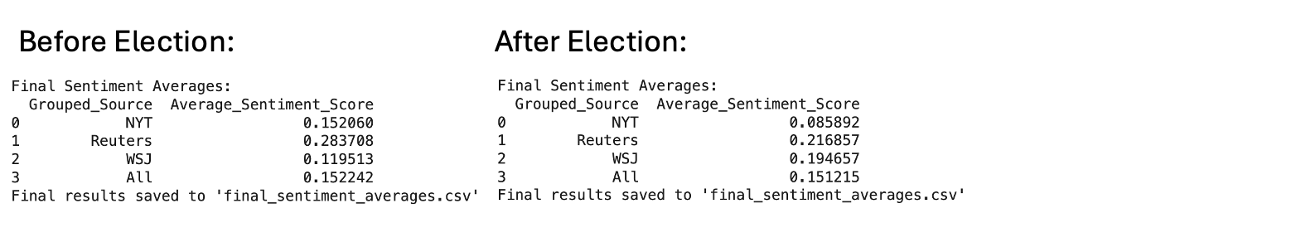

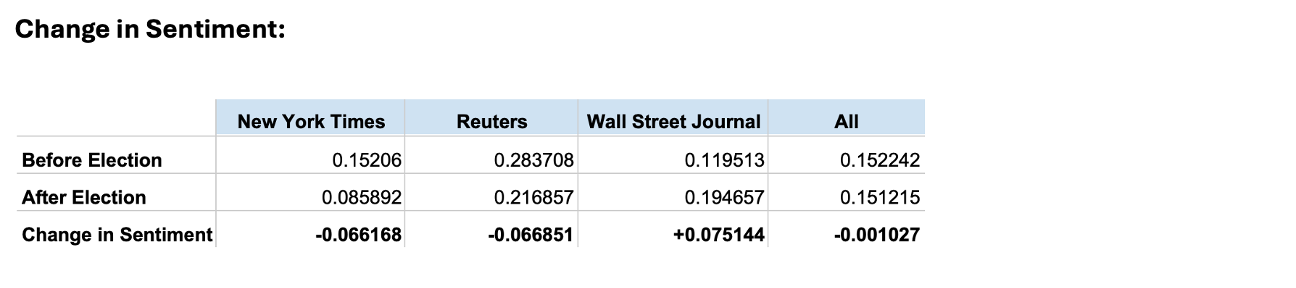

Reuters and the New York Times saw a drop in positivity for headlines related to ESG and Sustainability of about the same degree (-0.07) whereas the Wall Street Journal had an increase in positive sentiment of about 0.08. The overall change in sentiment for all three sources stayed almost exactly the same dropping by only 0.001. This outcome is not particularly surprising; conservative media is feeling more positive after national elections that went strongly in favor of Republicans and left-leaning reporting is conveying a more pessimistic tone. However, it is notable that Reuters, a centrist source considered to be relatively unbiased, showed the largest decrease in positivity among the articles sampled. This could imply that projections about the future of sustainability and ESG were more negative in the weeks following the elections. Given that centrist journalism is less vulnerable to partisan panic after an election loss, this may be a more credible indicator of expectations for the future of ESG and Sustainability under a Republican government. More investigation would be required to determine whether this negative shift was indeed a result of the election outcomes by controlling for other events during this time frame that may have led to a more negative sentiment around these issues. Moreover, in all of these cases it is difficult to say if sentiment is directed towards ESG and Sustainability as a concept or if levels of negativity and positivity are related to the future projections regarding the aims of these movements. For example, a headline may be negative about ESG in the sense that the author disagrees with people who are in favor of ESG or, conversely, a headline may be negative about ESG because they believe the goals of climate mitigation and social wellbeing are not being met. This is one obstacle in evaluating sentiment pertaining to particular topics, making it difficult to separate out whether an article is gloomy because ESG is being discarded or because the writer is antagonistic towards ESG efforts.



For the similar words analysis looking at words related to ESG, Sustainability and Climate the results were somewhat inconclusive. Some words identified were not particularly relevant and reflected current events for the time frame such as "york" and "wildfire" which likely referenced wildfires that were spreading across the Northeast at the time. However, the overall number of words associated with ESG and Sustainability declined between the 2 periods. The reduction in similar words may be associated with an overall decline in the usage of "ESG" and "Sustainability" in these articles, possibly indicating a retreat from language that the new administration may be hostile towards. Future research should include word frequency analysis for key phrases to determine if this is the case. Furthermore, in both periods words referencing moral responsibility and government appeared including; inequality, responsibility, administration, department, policy, trade, secretary, mandate and poverty. However, after the election, there appear to be closer associations between climate and government and a specific connection between "climate" and "administration". This may imply that discussions around climate were more focused on the impact of the new administration on climate policy. There is a slight shift detected between the two datasets from private sector words related to "climate" and "sustainability" towards public sector words. For example, before the election some similar words for "sustainability" were, "executive", "operating" and "procurement" that did not appear after the election. The similar word search for "climate" before the election included, "investment", "business" and "industrial" which were replaced by more public policy terms after the election such as "administration", "department", "policy", "trade" and so on. It is possible that articles were more interested in private-sector efforts before, then switched topics to public sector decisionmaking after the election. Overall, further interpretation beyond this would require more conclusive and divergent results to make generalizations. The full similarity analysis can be found below:

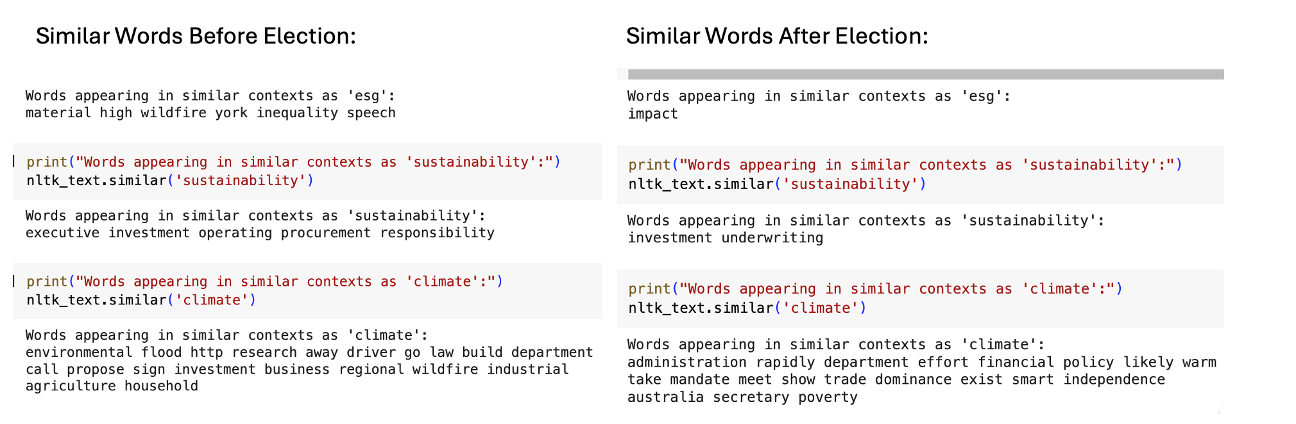

The final piece of analysis conducted on this data was creating word clouds across all articles for each of the two time periods and comparing before and after the election. The word "Trump" was the most notable change between the two, having been quite small before the election and then the largest word after the election. This shows that Trump was a primary topic in ESG and Sustainability articles after the election, but less so in the run-up to the vote. "Policy" was another word that became much more prominent after the election, suggesting again that journalists pivoted to discussing ESG in the context of public policy. While "state" had been the most common word prior, it is significantly smaller afterwards and "country" has appeared as a top word, potentially implying that national-level concerns had replaced state-level discussions. The words "billion", "global" and "world" have become more prominent as well, again implying that the scope of sustainability discourse had expanded. Additionally, "Biden" does not appear at all in the pre-election word cloud, showing that comparisons between Biden and Trump's approach to these issues may have entered the conversation after Trump was elected or perhaps addressing changes to Biden's sustainability policies that the Trump administration is likely to make. Finally, the word "clean" had been fairly prominent prior to the election and the words "oil", "gas" and "fossil fuel" became common words post-election. This may indicate a shift in the conversation around energy sources from renewables to fossil fuels in the weeks following the vote.

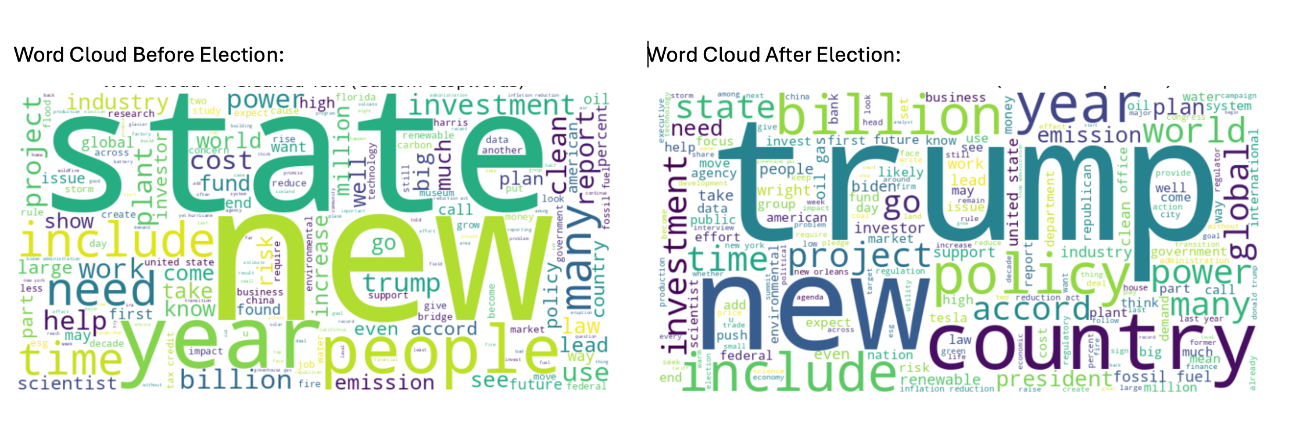

## Conclusion

Overall, there do appear to be significant differences between ESG and Sustainability reporting before and after the 2024 general elections. However, the meaning and causes of these changes over time are difficult to derive and the data is not very conclusive in answering the initial research questions posed by this project. While there is some evidence that conservative perspectives on ESG topics became more positive and centrist/progressive sentiment became more negative we cannot ascertain whether this may have been a general shift in mood (regardless of an article's topic) that may have also been true for non-ESG related articles. Additionally, the change in similar words could imply that a greater emphasis was placed on sustainability and its relationship to government after the election, but this would likely be true of any post-election period when all topics tend to be linked to the incoming administration. Finally, while the word clouds show a change in the most prominent words featured in ESG articles, some of these changes are small or ambiguous and require deep assumptions and logical leaps to draw conslusions.

Therefore, the only broad conclusion that may be drawn is that the discourse across these 3 sources does appear to have changed from the pre to post election time period and in opposite directions for left/centrist versus right leaning sources. The nuance, relevance, driving forces and implications of these developments are unclear. I would therefore recommend several alternative paths for future research:
1. Include more sources than the 3 examined here
2. Study these topics across a longer time period
3. Apply additional text analysis tools

Including a greater number of sources may allow for saturation that will proffer more clarity of outcomes and relationships. Examining these trends over a longer period of time will illuminate how ESG and Sustainability discourse has changed over the years as opposed to just a few months. Shifts in sentiment around ESG topics may ocurr more slowly than could be captured in this research which only covers a brief period. To that end, once more data is available in the future, the relationship between Sustainability and the incoming administration may become more clear. Finally, there are numerous other text analysis tools that were not applied in this research that may be useful, for example Named Entity Recognition may reveal particular individuals, agencies, programs, etc. that could be affected in different ways as a result of the election.

In conclusion, although this research does not present conclusive evidence to answer our questions about the future of Sustainability and ESG, it is a jumping off point for future research to continue developing tools for understanding this important and complex issue.

# Full Code Below

In [ ]:
import glob
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/Python_Final"

In [ ]:
mkdir $path/factivabef

In [ ]:
html_bef= """
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
	<title>Factiva</title>
<script>window.ddjskey='D428D51E28968797BC27FB9153435D';window.ddoptions={};</script><script type='text/javascript' src='/datadome/tags.js' async></script>
<link rel="stylesheet" type="text/css" media="all" href="/css/ui.dotcom1390700ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/DotComHeadlines1390700ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/fcp/print1390700ui4sr.ashx" />

<script type="text/javascript" src="/gen/modernizr.underscore0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/jquery/jquery.bundle0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/xlib/x_combined0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/RecordGenericOD0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/ui.dotcom0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/controls/search/jquery.overlay.1.30390700ui4sr.ashx"></script>

</head>
<body class=''><a id="skip-main" class="skip-main"  href="#PageBaseForm">Skip to main content</a>
<form name="LinkForm" id="LinkForm" method="post"><input type="hidden" id="_XFORMSTATE" name="_XFORMSTATE" value="" /><input type="hidden" id="_XFORMSESSSTATE" name="_XFORMSESSSTATE" value="" /><div id="LinkFormExElem"></div></form>
<script type="text/javascript" src="../gen/funcTwo.js"></script>
<div id="navcontainer" class="fcpNavContainer">
<table cellpadding="0" cellspacing="0" border="0" width="100%">
<tr>
<td class="factivalogo"><h1>Dow Jones Factiva</h1></td>
<td class="djrlogo" align="right"><span>Dow Jones</span></td>
</tr>
</table>
</div>
<form name="PageBaseForm" method="post" action="/hp/printsavews.aspx?ppstype=Article&amp;pp=Print&amp;hc=All" id="PageBaseForm">
<div>
<input type="hidden" name="PageScriptManager_HiddenField" id="PageScriptManager_HiddenField" value="" />
<input type="hidden" name="_XFORMSESSSTATE" id="_XFORMSESSSTATE" value="H4sIAAAAAAAEAHWS2XLaMBSGXyWjazk5R5YsWb2pAZOlE5ahkJJlGBbTkAFMwYYk2O/eI0NnclPL9khn/z/7CPbYt+zqdXO12S7W2W68Tw67y/Fu8844Gm2PaNk0HM/0XAlPT7X05Fxoz2g59eZJIJQaKynmmvHAsmTNeJWC7oRBdaIOygIH584Ou7cNF1Taslm2StccvtXi27tfnAJcNAMwASudX8ugoerKxLVmDUEEOlIGTFiL4rqIBcQ++BKaGIJuAnlqEQBCIehRBXxZqlBQ/G+5UAHSFAjUVZLWfOmtk+33abrMV5PF+DKZ5Ywry+Kg3RY3g3r3ZtBpXnfvenL4qNvDRr/LuKlUIoktuQjd4ekoLAuZUz1Ls2m6cpJF+VLykFggVkAoDsmMJFdaDLlQzgQnk7RUArhfRTobUO2gyqGNdl7k5wKCLMYywnnhAcGGAvlFSh9D+OcEJHcrzXrZeJslMxrGtyxaLilC/usJZYXdj0EGABATbKJOUI0xBRBXEPD1QnSv897deGLKnEZW8cuXiwm1oCGpHfZ7kQMCFeeeg/rEUEr2QvzA5awmK/oJiAU7Xscte+z9tM9s2KlDJ8wfcIivsBuJ5h7W+4/wR7x5bP35zN/uF6vJZjrErpncj0RND6JGO30w28YhTAYKfn/evu+7kOStJGxvO4eR3yjEMytLagSnlh6cxirLvyI+I/UOAwAA" />
<input type="hidden" name="_XFORMSTATE" id="_XFORMSTATE" value="H4sIAAAAAAAEAM1d63LiSLJ+lQrH7PZuDLiFuBn6xwbGwmbGBhbh9nZs7I9CKqBs3VolGdPTEzEPsT/OiTjn5eZJTmZKYAljDCNvxJmY7uEisjKzqjK/vFTNL5X2L/BvtdaulCq1tlY6a594cyV4aC34UgUnpVb7pHd7PT4p6ZX2yeS7UHM2+a5iFXHp8al0ZLSCD6Q3c3gkfQ9eh8KOLXo9/H4K77kVpa8sR7o8Evhqwb25SD+2hcXDqe/Jb2sSG/qOIOKPQkXSm6fP57+dwSvPEpshBEcKwhPhfJV+GMK7Zfp47ot5KMTW08PvpTf/ZCUJfEdaa3qusCXIgsyU6cnB94UDL9qohjCSFrEQisAPI2Kd3i/FNOBzfDV1fFSvGzuRRFr8leEDaUUxDYNDzFxUsIWamXmriP67VPfps86Up8+Fav3c84hZSun4eaKJJD/Sn8l3j7vfkJJIv/uRlAefODzzybOoJGFCO5U6ebNm4KU4rzDxI7wLbHbxXdf0mtbSKunLSkWrwdc2PgJrtA5LuAp/Kk1c0PCi0a7AJ3V8V223SpV6+5+/JJ+fMNZLl86f2Q0PH0Sk2mwEPCo25vBp5DNTWMjXuXQcWJiK9T3WxQVWNpIFcxlyL2I3vidWrFwuM2PUYVy6Cn+L69KR3wRzfdA7X/LQVsyfsZmwRcgdpuKAFDIVs9PT05MSclxvn9ih18bdJx/FKaxalery9Cct+WcttHiY1uBtpUZb9P6kVKmgkDrIprdPhHcCevhFa590kt+f/FqCN68T+bX0rBbDEcn+veEr1nEiEbJOaCHv0UIkCmCpAs5930XW9X2sD75MeplRqzBqFd42msQ6rNjZYdy/TifLvem7gvXAgrEeWB4/TJhkXT92bGbGsxmIc+vBHLBJGLvBJ9bzQxfeBaFQ0hYwn7ZUAQ9heSp2e2qessSmJDaixEC+gDlgHJkFlk5GwmZLGS3YLBYO2qjEWrlAKJ3W6j7d3Jk/DTMy6SCTDm+fbNIN7GL/MN28Tierm6FHUyiVigUs9ruFgNV9xcNQKsY9O9EIA+sKr2H+11YusdYkTO2tiTaMiy0m9PtgM9FC2IfP9W5SWXlGDl8pmEArVoI47qYcd4njEgl15QcCWa8fsUbX+qu1iq3RDJ0s390FGAe2AMZgiZmwfhyHWb4HPi4WW1qHzx2HT/0w8Y3LhS8eYbUuJZgjkW7UEuzNmbQkWhVQCArb2Cfs9XknawYqwCT8PY8jEhYcxmGyvk4mN0ehfARxysbXGLFCT4ZgH00g88B6MUxPn/aLHyp2h9vIMC/J3qpP7Dxe+XEEhhR/EaAnscCUkhFVuMmVjyI7KwY7NwDzLNHDP4MF6clIgtbgPS4NWPjphmzu083YnIzGw5FBQmlVEIo/opAV0g240CCk9XSIgl6n9f9bQWdHWKx6KtS0XsxiZejklPPsjztzAH3gStGCjQB1AS1Y8F3uCM8Ga//srn+orj02iLjDYYPmJkBj2xFb5CGmArVlSfAQ8GbFOAPhU720DtbLZrJropAlz9HJ6uV2dNGZGKxaZtfIKouDqeBRYrSfvRU4Nf8ebARYd8UkqC5EcDKLwdys0EPC6nF8/4HAh3awxVgzVVk6iwIWI0cmhz+8uST4Bdw/gktmNyLiiZPVGxq7ucMF/ozpU1FnIXh5MKbKd0CywIGJJrn2oqqdDOmt4Os7yEVkclY/55wIXd3wB3DAsFf9JUihEFpwds5tdi4S7g8HVs/2pSqKOK0cnT3s9xVyj3bkQiquACUqdiG47UgRnrIrQBa///bfCoRbspvYWiQIdy8Wyvn8ZzYCvSB8yJHKQcVMILmOBQbAkCMiBL1lNvCnvr1iGNLBFpqisQWLG7KuMfwA7tezwSoLhHoANFZLviIZ90KkrZWiAWOxVj3zK4UWXIZMVr7J0t+etQQx/SxEQHa053BXkMNAlARgH/glId4ESxntJqNrDeEUnqgMqawgHQilVkqq8gR0TR6LJaF7uvfVwvfRyEUMkOzDxhQ8+iB4DLMa4jRHyfQcjow27Hydtt5heohMfkNlIinYThinJH6Z5oZiD3RUm3gsiWHSmZwseJRsqr14ZreCdVV7r7lCUjnPZAJ4EcJZ+hBSg02IPWQd3QyFxTn3BO9DAaYa9t29P4WHlBI0jb504BsIoUUoBQHayl5Qkle43gLWIk1/4IXmLUsmN2/D8djoToyLMrsyz7vMBkSo2FZODHgUs2QliifAJbRoLd91JdiWZI/thRM7WakELecdJCIyuf3FRhI2C8KphS8t0U4jwUd1ug4PXwRXFPbvBQ359aKfwdgKwG8aZhRYellSWTFufFvOVuSSBh1cXFfCCcCyzxfRLub3IoO8T1yPqOnLQr41SyfL+TXgVoKbQ8KisGeiVQnwfcSGswjs3BBiPtxCKNuWRR+DxaMdoh+BFZ75iN5JnvxMmEIQrzAHr6r/TSyQz/XwEN9/K5wzWtPJsTsyuv3ONRsbo+F4UgZbvBWEOygECsQBPSt0KphA6lsCYKYNUODRdyzu+UL9jUQ7AgLoDWDpq6Yt/HqhnZ0hk4MA4D/gZ+zOD8F1GE+B4yOW6fqeFQqQ7w7hwL5ZOgII6BjDBegRKoV3eIZUVpzUGJkRWtwJd2iRdQiY5Xn/xDqKvOgCBHsOixPUQDl78CvwZVSCuAgmcCqsxPly9EKijH8leTI280P6RYQZFk+ledA0JNT3wol8LKfXQCgf0I0W5GNC7XXlYMgPQWuwkBZs8kr7n7/AUxAXTe83A178ZAzHV2u9VbVGQz89OzuttrRK7TvoZC5O7wMx/45pTfmE9E/ouxPkHLA7+N8Vkj6hZz/is6jzg8aptuD1abOinWVHijwuHRoIv6FxJovYnQ7o4zdH+rhjpI+1hl7RPuqNRvXjHq3CkPgIDTnzdg33rx1BdpbEjiC7UkZQMwkFV3G4Ytxx/KViLoIT2jvcsoRSeWTjci+ecSxr4KJS8VRJm/CnvhetbW3qhK9qwyuSmcuR2Sneeci/SQd2wRW3bQg+MYnIXBIXNgmu/5lUmGwJY0e8QDqgganApLkVK7XOhl/HDidxj4FtaJ09CGMqxcTNkDkq2jv3n1jfszC6Y9fiUQqYxQeQdxormGucYa4Sc/Azd7nDU2tEYh6D5VL+mrxQ0JclkxXzPziZ1SNyRGv2apZ8DymRTFbK3AyQVB0XYgWLg+ADSpWDhJQPBKk+MZOqHhv8baOcKgp9NPiOI3EtqBILwtgWuCywbMAp5vIYT9OOW8WQFCFL5X1IwrDqXji5ZXB0kMoFgzONCmUHs3RyGbTuOejhs3QcEfqrNutC2Iypzin3HnAZA88QM4fxHAsH21gnqQ6RSHsR5dZEJaxULdsuNN8ZMltR5Zxyt+yHmn4GxjfJ724HlJt8J8TQONkIpNHRRwvMDQhHJmUiy+cOCbgXg+7kTG8umu8gIJHJCvjFj2ExjoQfOIjYBCK2ENndhW5+/+3fVK4DqWCeO7MZJgjg54D2ZMh6MVXTR4BN1ScwcTx0Vqyp/SlBLghswBY8ipUg4wCqe5SwEzCNxZ11zXIvgk3qGuZ5IlGlCRItUMJsjURNj6mR7KKVKwMscMIB8zUaOOddgmfXPsgO2kAzNk6SBSuc+J4fh2C1/h4Dv2DYQWogXv8EoNcNuLcCoaVN2BBXB+jPATNQhiddd9saSvWcPiK17EXD+b1ZQUQ+h71ZXRTa41k6xyUvY9waIWbKOexpesCFH4Hhw3qj8p3HxJupADOYWL8mGY9IkKW86V6sF9kTWTKviWiCJ7IW7c1GSI2VigOBvUrhnHBW5IcuGHIF6N6LJIJ+lWRlq0fArgoGHzOtsqw9FpIqQ+b1PHqJ3YL6bQqWKSHrh9Lm7ALQJnVWVPcCqHw0no6ogbssFNVn6eSirzhEF+uhr9zKQqA5ijK5SmJ9LyjaGhLNooVDusVYz9DJoaJx3+iVuzyQlOXKZl67iCEQynf9MIB905NoUHqwMW7kE9hIc+GIGRti4wj1oM1gxtjEZz/UNQ0eIUdUZqbRxV/CE9QmcQRSqmB1Yqrpq0deaLllyOxabumGcbktnicS+Y+wrQALGbv2Te2I8tmaA7tRqHyWJZMDNbdsycEG2P488fs8lLMV1cNnWCf3OAXwCazlMzSCU249OFwtSJIjwMyahapWzK5lyOTacEIxB6VfcsVuo8TTdGysN09e1Guu+VLFkmqBtcMTZuuRYRv4xbZThk5Wgjv0IFusTgCfKfAn7ktDRlmx2uG9Q1oFiwtc0860p6KppCyp3HKCdTMG0GXHQTvt/6OMErF6hJ/XMKfeAg3dF8PyWTpH+fmfYN0LdiFdWFJfY+ztwFbFIJ460qKdoT4ALqYek0xzGgH82hG+PuVPF1YhgJ8lky/xYZ4STA9AuWghMU7ZWl+A7AAT20mn2ihpGQV8e4kiM0OtDdZeR98fXE0yvJwlKte0OYkkvUV0mEyv08klX8edXv/ydtxhxj+M7u3EMFmvD4CXjW7H3auOCe+HPTY2BsZd5/zaYPBifPmF9QdsMBxPrljnxhj3ux0S64g8CrFzplWmzlOhmcqQ2V3+GvZ6fcybl18V9K4/uGCj4Z0x3sjMOpdjw7gxBhOT/WUwnByikr/u1skRSZe1ME/zQkmXLJlcfMKDmOO2hOUIcQgvsf5ND5A3txbYTjmblR3xKBxmC0AfVPUEBAIhzA96o85cxyMcno/DqWXxCBiRslYV94UKCVkyh5rL+hGpj5S+Vq0WahjL0dmZ1DTjIBSuwKJ5CDGPEA/Ua/kogTXMAYxFYiIBCHYuFSrdcQTaGcIW+RZMmCqyl/UjMISGoWxT09VTMXuZIZOzLRIi2VHIJRbI2bmT9g5Qi6C5FcUm/QRXEAxGWK8iSY4AEykL8DYuBCaydHJTho0O6NLa7FwCwJYO6wQB7BTKrid5NkBG4Be4fK5CAzKinvtzbNr+gL356yMo480BlI4VYQwf+BHCWmqFBKQLGpquO/phAAlrWkUheY/6XoySa59/Fqfa/MM9+DkiuXglVcRtiG3oiQ4GfoT8XsbRRuiMMj7R8xblOCjlFVI2F8JjFSPmT2ig71xIlV39mACF572EukK8nHTeKdQQ7JU0J1Q/BhRhRN94XjLvU+rKFYa0ZrVSa9U+np191KuN1sc9DGBVCB7ZUxV6o9yVjnWq1+rN02Zd11+pdsE3R1e7dg7UajVbp/Wzmq69UsGj7/ZW8HYVurJayQX2/vJl27kb4PqIRFJHvfeniiVneJLVsBc65iE4HjThNVjjql4UzWdJbXfUCyXS7ukRNullTu3grsHK77oN+Pff/muiYgwYP3xKDoxw6jBL4l5si52iq8vAZcDTsC3wmAS23pO73jq2VmI+6ClU691yQJf5OutJbQnVJOtZNIOapXVUGPEiT4ClLxmxBQ+x1wElBveJFgV8CFMLQQeDqMEJ10eSeiPJj4GqmK6Bl/fFGiCzZPJQ9fr2ZlB+F9HaAH8Utk6GUxGSnMfAz5RBq1qotJklk5Xz99/+Z4JWHbwCT2odydJkwpWKzDizQ+rzB2OPCfGtzf77b/9msBCoYfeeUsSwC5AOfRKFsSgln6OqSCXYtwx0eDiP6ajT77/9Lx07OaIhLBVG0+zCMX6WVA60PqUCnotoiZ0fn/m6vHfHnW/MXGAl/zJ2Zi/729hnRIok1JuNYi85qYjCPTBZUvlIOZJlhOPr7BYCPFi/2KT3CAYoAhnsEvtpdOOHcyyNPQnr+VzQMQgWkz8VrbpInfgfXbQZMjmI078wBszsfDHZ5MpgV7djDOwGBuubrHNuwtadGNdfWAeiQfP2eoJxYfe6f4PoHiLFwaVB8hxcwdNa2LHairXqw1Pwx+XJk8kttn8kbBEqzZ06MSNgKA7wQCL2XuGUdcPYg9gQH73xPewuwkAxjOdzzF6CKXIFBFjwu7kAp+TBEhI27b4fKmvwyuY43VS3Y47PKeXeOBi/ai3s3Wup5xzh/Tv0Io1GoxTLAP1aFbNu2IukNxqtxitIhr47thdp1zh6o3lWO202Gq/1IsE3x/ci7RjpY7VWq+sf4V3r4x6VomzwyJu9SK+T2G7kw+PFZgzr424BtqwfwVLCSv5YzGMIfURyrAnIe9YKYoMbGck5j3a0jD4f/NqcVhYeLC5rc/iwnNrNuY9RWNf35iE2wCz4Gt40Dg4GQCRAna2vAD7dpwIhf57Oy9qOafkgFHY4sD51MMBWOdXrm6NgW0ExBFNJTN84OAe64aCm1wvkWPJkcl3A/c8Gu+mMfzYmZnldvg38JYCR57gODAL4YjcoK7QqL0582cJF9zYVSYa3cXDdc8OW/hgXyBvmyew8xDEiiaKFxAsJsnEGOjW5Pu34AYwaLtDZjMsw6UOKBKXTfCtpeG4cDDQ3TFWCVYEG+jyZHeXFbFlx4rPzWDo2hiQgZ3rKE5uTYmzFweJPLz0ybkZJ4gJrjlc+rFM8ey+i0CcpD4aZz+zFskDTVZ5MVsr+LAmjMmdWqNRD/SYldh4mDbQgMNiqJ7Q8sQQ0TWi5uRcZbtnAdKNrmv9HMyt5IvmzDjaGeLN1kxsqPjnahbJEi1DwpFd4x+n35sFIEMavw/gBBKyqVQwJ5knl6oibhM+KmhYtQPcvWtch1uXMCiXsPEDzhH1tMROerdZBgsUDahjKFIcSad88UPCSxelDwcP+eVJHRbDpcUScxpctm1Mfgr0Qb4KwJaJkmRwHax6BH1PGih0rypPJLcw+u0iMtxnEoaIU4AQtnmmF3CWpQY6sjSEBjkF8qWY1Tf7nEF+Nus9rml5/DfHRd4URH4xT0wCJnQJ+rO9GfPjNOyC+mv6x1tQA7OnVem0b8WVVSnnGeu1YxJchsY34AODZ0ibniAvj5fmM5sG3WmQGqhdpD8rTyTUFYOJBzpgB+2vle1iTtim7hvVc6tkwHX+5JQS1BjQPTiY+j16ZvptdrWwdzExrSHo5OTUDO87G/iA0r2RLMmlB6W1dD2Njnc8PUGCPJ6V4rD2xhXACEvUYQFYD/nyt6ooC5+zzZHIGNYptvG8CXcFWhHDhx2BwbHYtHwCiLHzfRo84FhbKbMR4BQbI3HPgC4JizTe71F5qXQsLHgTMk8ofP4PNcquwqTZkf9/0ROxqpSXu32xUywyZKFNrrgrmsvOkcscYufU15mFyB0KEmTZXej42smMt+YE6IS5OjVNmLvgSAr3cUWgeurRG4wB/DSFQs8qmDiUHzg6uJm94091l+A5Lj8jk8DJHn72i1CrHJsh5KO1NngMYtwUeRQ/Z7YBiUNJEKLE3evvihxLrG51Nfuvs4H61Z/3PvxWL5jJkctFcajb49tkByu2AgaAudewZ+OKHD2zJQy85ouYv0Xq4EvNBCi8IS3KXqTkhKQ/O4gF7OrDnatqyIQpJmSHzMvKhW8K8WOU7Kzue52P/tAIcE8IaTqKc4QyCG3eaXnfR9+CX2MEzirGPF9BaBxEQxzRYB1c2mdm/3MhA8b8SAsIrYWY+xPRIyaTbPkY8TELCsyPgXKUFEt1r1Yd6oXA3S+alYthwdLnJR1SxYdTx8Bq5cx+tbnIP2S5g2wPIJ/AIPUl18HlSYAfzR1LTvW9uIakyZI4C4Z9hhYPxsgGCOw5Ef5igAHz1tKLbGNSmguBylTZVnO2FMLvZWiwLbdksmXxsuOUHO9gyAGHu32NpPcBLvOoEWxPCtM/37E3gkhm0CYPi2YZakRbnPJ0c/LrqA2i5Gt6axgcTll+nP+iML5IEO+Xa4dNJZ3xpTIwLfNHv9dhV/2fsuBqw7lV/YJgGuxwOL0zWGRsQjtzAc50J61xfD+/6g8v0QoohuzA+G9fDEeteG53BumntpjPo3Xa6k9sxPLq+R+oIrINnAFpzmJJWsd2YIfO2ctpp7wn4ZBMlMwbmLYg+uQKxJ1fGmGoROTH7g964Y07GtyipwXrDMcVtiUawqY3kPiIxtWZ43ixQAc2Tycp9edNmV19uBxfA5Z/hHTP7lwN2Y9wMx53Bxe0NVlXgW2NsTuA9zjKq4R+j6yFI1x1eX3fO4clJH5YI/PvZuOqDOswSM29Ho+svWIjpDxj8MtFSOdXSxOheDYbXw8u+YZJCjshhrSXx9EJRdpbM1jkrdoe3dl5TFtJYF0j/xiaARzpRxC2KViR1w4w44AsTT1DecHDlWznkLt7xkV4mxl3prMp4jRPWaQAvzyWMgi065hDgTgjE0UuBx18fP1pfKrYXlWWL+yBUFYSyUciijQJ5Wjv8FkwvGXi8whQ8MV5fSt43PfvQ1NdHH9Cb9dKr1PC+OlRejy7gwa11IQIQhXw4eOsEF4BShnhfocCPcoDhQrgwFVH4jHRaR+A5PPvRsiBQbxYKl7JkctlP7CQRgMyTg7Iw6T8LarFKbkXNx09iCu8otm0dkUVLh9bOWoVj2yyp7azCWKqkCN5L2wF4vj0G65XE+l40lc9irMfTqmfvlVvKZWK0KtbeKtjuVWk0ttMwudGr7RN85Lh2rx1jnVaadf1Ur7Zalddql/hdkUzWeiS93qxVT2u1s9ruTBZ+80Yma1dqKauWN/q9JPZ5pAc4cAsvNme9aCUcfHYDBq3AoFNNm1YeCi/iDKnjUsFmt8/Ugu5to9tV1QJExo06Sw7HwqI3zEsS7Rj4mfCj+3aBk4F5MjvalQ7l/kVHUuuIUmbKQ2VpF0PSGTJbB4TsGdaBTMEV5l6Mp4AnzqHjyl2ZzNab15i9GLXgQcc8na1+KrxxiVTucOp7ikO6MlOV2FKwBX9cl0vA3f9QwdzE5sJRni/ICsv3fHe17pBqHZEpW7NXjQt2SOVJbbsDaiYup1cpjGNn3SvcCQJfQngOq9Bc0NVzY4Ft2UlF81PmYlqJtwlxBbMLMRLdjZTcIU0FXTxDvYCfRQvAUtO0zobHJSHaZ1P+ABqU67uyWwdfsQoiYR8O17RGSy/UVpClk9uNxjC9W5pdYynpZQ8Bdu90+iVK2USLEnv+vyCg8HPhp9cGwS7Gi7bR2d7H9hwEdn2st7nYTcuTLHJyJD+5ifWIUumaea368MdLpVkiv/6rpONV9Pg/g6i04K9qA1812hVdL+n4qa7hp3pbL1XO8CsNXun4kI5jAufmOQxSqdRwWP3XX3/9P+dyfXdlYgAA" />
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="" />
</div>

<script type="text/javascript">
<!--
if((typeof RootNewWindowDirectory == 'undefined') && (!RootNewWindowDirectory)){RootNewWindowDirectory = 'https://global-factiva-com.ezproxy.cul.columbia.edu/en';}
isPostProcessing = true;
languageCode = 'en';
logOmniture = true;
// -->
</script><script type="text/javascript">
<!--
function translate(t) {
var r={"yes":"Yes","no":"No","ok":"OK","djheaderaWNPLikeLink":"${djheaderaWNPLikeLink}","djheaderDontShowMe":"Don\'t show me this again","djheaderFirstView":"${djheaderFirstView}","djheaderLoremipsum":"Factiva is powered by the most comprehensive collection of business information in the world.","djheaderGetStarted":"Get Started","djheaderTryitlater":"Try it later","snapShotPrd":"Homepage","snapShotNavBeta":"${snapShotNavBeta}","nameIsRequired":"Please enter a 1-25 character name.","snapShotBeta":"Homepage","tryItNow":"Try It Now!","whatsNewPopUpTitle":"What\'s New","invalidEmail":"You have entered an invalid e-mail address.","profValidEmail":"Please enter a valid e-mail address.","sSun":"Sun","sMon":"Mon","sTue":"Tue","sWed":"Wed","sThu":"Thu","sFri":"Fri","sSat":"Sat","sunday":"Sunday","monday":"Monday","tuesday":"Tuesday","wednesday":"Wednesday","thursday":"Thursday","friday":"Friday","saturday":"Saturday","sJan":"Jan","sFeb":"Feb","sMar":"Mar","sApr":"Apr","sMay":"May","sJun":"Jun","sJul":"Jul","sAug":"Aug","sSep":"Sep","sOct":"Oct","sNov":"Nov","sDec":"Dec","january":"January","february":"February","march":"March","april":"April","may":"May","june":"June","july":"July","august":"August","september":"September","october":"October","november":"November","december":"December","smallAm":"${smallAm}","smallPm":"${smallPm}","capitalAm":"${capitalAm}","capitalPm":"${capitalPm}"};
return (r && t && r[t] || r[t] === '')? r[t] : t || null;
}
// -->
</script>
<script src="/ScriptResource.axd?d=na9ThF35vypYMd7Jk_rxYO38HjXffKotc0wvG_70TpcLVKfZBZPIM8kH05SebEymwP8VMdB5A4PWnvSTWMpmgkzkPMRWw3LUebC7IY1-RzB_CjMRRSx8x83UUIIagDyIsgi9fBsYewhw-mD8wu8dSyqNoNY1&amp;t=7a0cc936" type="text/javascript"></script><link href="/WebResource.axd?d=NhJjFR_XCMs18rNVWoDInluTIB_uBACnN1nBI-8xV6GiPce6R6t2x0Iz5ENz8Px7hAME9tFr3xqyYeeLelCj5XdG2swm5QVvr04cmRtyfAQYQSvyeyzPxiKMkscYlRJ3KlT37g2&amp;t=638484482820000000" type="text/css" rel="stylesheet" /><div id="contentWrapper"><div id="contentLeft" class="carryOverOpen"><span></span><div id="article-J000000020241104ekb400014" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Finance & Markets: Ports Race to Secure Billions In Clean-Energy Grant Money --- EPA aims to finalize most awards of federal support before year-end</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Paul Berger </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>623 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>B9</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Ports around the U.S. are rushing to nail down green-energy projects to ensure they receive their portions of $3 billion in new federal grants, funding that faces tight government deadlines and potential disruption from the presidential election.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Environmental Protection Agency</span> awarded the money last week to dozens of ports for investments such as new solar arrays, upgrades to electric shore power and purchases of thousands of new electric- and hydrogen-powered heavy-duty lifting equipment and trucks.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The agency aims to finalize most of the 55 awards by the end of December so that the federal government is legally bound to make the payouts, said Ian Gansler, director of government relations at the <span class="companylink">American Association of Port Authorities</span>.</p>
<p class="articleParagraph enarticleParagraph" >The process is playing out against the backdrop of an election that will usher in a new administration and amid Democratic concerns that a Republican White House might roll back green spending.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">EPA</span> process to finalize the grant agreements is complicated and depends on a federal bureaucracy that isn't known for speed. "Our ports have had complicated and difficult experiences with grant obligations on just about every grant program at federal level," the <span class="companylink">AAPA</span>'s Gansler said. "It's not a given."</p>
<p class="articleParagraph enarticleParagraph" >President Biden announced the grants last week at the Port of Baltimore, which is getting $147 million for new handling equipment and trucks.</p>
<p class="articleParagraph enarticleParagraph" >The awards range from $412 million for the <span class="companylink">Port of Los Angeles</span> and $380 million for the Port of Virginia to the little Port of Hueneme, in Southern California, which was awarded more than $41 million to convert almost all its cargo-handling equipment to zero-emission technologies.</p>
<p class="articleParagraph enarticleParagraph" >The awards aren't guaranteed until the <span class="companylink">EPA</span> formally obligates the money for each project, a senior <span class="companylink">EPA</span> official said.</p>
<p class="articleParagraph enarticleParagraph" >To reach that stage, the ports and the <span class="companylink">EPA</span> must sign off on a work plan, a budget and compliance with federal rules and regulations. Several ports that secured less funding than they sought are now drawing up revised plans.</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">EPA</span> spokesman said the agency will fund the projects over the next several years "regardless of a change in administration."</p>
<p class="articleParagraph enarticleParagraph" >The program funding is available through the Inflation Reduction Act of 2022, which among other things aims to boost the renewable energy sector.</p>
<p class="articleParagraph enarticleParagraph" >Republican presidential nominee Donald Trump has said that if elected he would rescind all of the law's "unspent funds." Billionaire investor John Paulson recently told The Wall Street Journal that if he were to become Treasury secretary in a Trump administration he would reduce federal spending, "particularly by getting rid of the subsidies for green energy in the Inflation Reduction Act."</p>
<p class="articleParagraph enarticleParagraph" >Bethann Rooney, director of the Port of New York and New Jersey, which received $347 million in grants, said any change in administration brings a wave of new leaders across agencies that can disrupt plans and delay funding that often has time limits on how soon it must be spent.</p>
<p class="articleParagraph enarticleParagraph" >Rooney said the <span class="companylink">EPA</span>'s push to commit funding by the end of this year is part of a push to "obligate the money and get it out the door."</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration and states such as California have spent the past few years stepping up green incentives and imposing penalties on polluting sectors of the logistics industry.</p>
<p class="articleParagraph enarticleParagraph" >California is moving to mandate the purchase of heavy-duty trucks powered by batteries or hydrogen. But adoption of the new technologies has been slow. Clean-technology trucks can cost three times as much as conventional diesel vehicles and access to charging and refueling infrastructure is scarce.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>aprtau : American Association of Port Authorities | epagy : Environmental Protection Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i763 : Port/Harbor Operations | iship : Water Transport/Shipping | itsp : Transportation/Logistics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c33 : Contracts/Orders | c332 : Government Contracts/Orders | c341 : Government Aid/Grants | ccat : Corporate/Industrial News | e21 : Government Finance | e211 : Government Budget/Taxation | ecat : Economic News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>BAF | EPA | NND | TRSH | USG</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020241104ekb400014</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241103ekb300067" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>National Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Election May Alter Arc of the Clean Energy Boom</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Brad Plumer </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2011 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>25</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Trump has suggested he would dismantle the Inflation Reduction Act, which has reshaped America's energy landscape. It won't be easy.</p>
<p class="articleParagraph enarticleParagraph" >Over the last two years, a surge in clean energy manufacturing has helped push U.S. factory construction to the highest level in half a century. Solar power installations and electric car sales are breaking records. Even Republican-led states like Montana and Utah are writing climate plans to secure federal cash.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Yet the law driving this dizzying transformation of America's energy landscape, the 2022 Inflation Reduction Act, is facing a highly uncertain future as next week's election looms.</p>
<p class="articleParagraph enarticleParagraph" >If he returns to the White House, former President Donald J. Trump has suggested he would gut the law, which is expected to pour as much as $1.2 trillion over the next decade into technologies to fight climate change such as wind turbines, solar panels, nuclear reactors, carbon capture and E.V.s, as well as the factories to supply them.</p>
<p class="articleParagraph enarticleParagraph" >''My plan will terminate the Green New Deal, which I call the Green New Scam,'' Mr. Trump said in September, using his catchall phrase for climate policies. ''We will rescind all unspent funds under the misnamed Inflation Reduction Act.''</p>
<p class="articleParagraph enarticleParagraph" >By contrast, Vice President Kamala Harris, who cast the law's tiebreaking vote in the Senate, hopes to accelerate the growth of clean energy to slash greenhouse gas emissions, though that would require speeding up federal permits while overcoming local opposition and electric grid constraints.</p>
<p class="articleParagraph enarticleParagraph" >While the Inflation Reduction Act is billed as the biggest climate law in United States history, analysts say it is too early to judge its impact.</p>
<p class="articleParagraph enarticleParagraph" >''The law has a ten-year window and we're only two years in,'' said Andrew Reagan, executive director of <span class="companylink">Clean Energy</span> for America, an advocacy group. ''A big question for this election is whether we'll continue to see a rapid acceleration of clean energy that helps us meet our climate targets and catch up with adversaries like China.''</p>
<p class="articleParagraph enarticleParagraph" >Since the law passed, companies have announced $154 billion in investments for U.S. factories to make clean energy technologies, spurred on by tax credits. But only about half of that, or $86.7 billion, represents factories that are currently operating or under construction, according to data from Atlas Public Policy, a research firm.</p>
<p class="articleParagraph enarticleParagraph" >Some companies may be waiting to see how the election shakes out. ''There is uncertainty,'' Mr. Reagan said. ''People are holding onto projects.''</p>
<p class="articleParagraph enarticleParagraph" >One recent survey of 900 companies in the clean energy industry found that 53 percent said they would lose business if the Inflation Reduction Act were repealed, and 21 percent said they would have to shed workers.</p>
<p class="articleParagraph enarticleParagraph" >It could prove difficult for Mr. Trump to dismantle the law entirely. Roughly 80 percent of new manufacturing investments has so far flowed to Republican congressional districts, including electric-vehicle plants in Georgia and battery factories in South Carolina, according to Atlas Public Policy. In August, 18 House Republicans wrote a letter to Speaker Mike Johnson asking him to retain key clean-energy tax credits.</p>
<p class="articleParagraph enarticleParagraph" >But Mr. Trump could push Congressional Republicans to repeal portions, such as tax breaks for electric vehicles and charging stations, or make certain credits hard to get. Some conservative groups have recommended that Mr. Trump freeze activity at the Energy Department's Loan Programs Office. As of September, that office had roughly $210 billion in loan authority to help promote novel technologies.</p>
<p class="articleParagraph enarticleParagraph" >The Trump campaign did not respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >Many companies hope the law will stay largely intact no matter who wins next week.</p>
<p class="articleParagraph enarticleParagraph" >KORE Power, a battery cell developer, recently received a conditional commitment for an $850 million loan from the Energy Department to help construct an enormous factory in Buckeye, Ariz., that could produce enough lithium ion cells for more than 28,000 electric cars annually. The loan has yet to be finalized, but Jay Bellows, the company's president, is optimistic it will move forward even under a Trump administration. Most lithium ion cells today are made in China and moving supply chains to the United States is something both parties can support, he said.</p>
<p class="articleParagraph enarticleParagraph" >''This is about energy independence, right? It's about energy security,'' Mr. Bellows said. ''This is one topic that both sides can get behind.''</p>
<p class="articleParagraph enarticleParagraph" >'It's going to take a little more time'</p>
<p class="articleParagraph enarticleParagraph" >Perhaps the most visible impact of the Inflation Reduction Act so far has been a surge of domestic manufacturing. Four years ago, the United States had hardly any capacity to build solar panels, wind turbines or lithium ion batteries. Most of that happened in China and elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >That's quickly changing.</p>
<p class="articleParagraph enarticleParagraph" >The law gave hefty tax breaks to wind and solar developers if they used components made in the United States. It also doled out additional tax credits for domestic clean-energy factories. In addition, billions of dollars in funding from the 2021 bipartisan infrastructure law have allowed the Biden administration to nurture domestic supply chains.</p>
<p class="articleParagraph enarticleParagraph" >In West Branch, Iowa, a factory that made nacelles for wind turbines but halted production in 2013 will restart next year. Nordex Group, the European company that owns the plant, had largely imported turbine parts into the United States in recent years. The law's manufacturing tax credits shifted that calculus.</p>
<p class="articleParagraph enarticleParagraph" >''It's a big change,'' said Manav Sharma, chief executive of Nordex Group's North American division.</p>
<p class="articleParagraph enarticleParagraph" >Those tax credits have been so popular that the law is now expected to cost more than originally estimated, maybe as much as $1.2 trillion over 10 years. Critics point out that the law might no longer cut the deficit, as Democrats initially promised.</p>
<p class="articleParagraph enarticleParagraph" >The law has also poured money into uncertain technologies that might one day help tackle climate change. In South Dakota, the biofuels company <span class="companylink">Gevo</span> is preparing to build a first-of-its-kind plant that will turn cornstarch into 60 million gallons of jet fuel each year to cut airplane emissions. The company plans to take advantage of new federal tax credits for sustainable aviation fuel as well as a $1.46 billion loan guarantee from the Energy Department.</p>
<p class="articleParagraph enarticleParagraph" >''I think the economics work, but project costs are going to be higher on the first plant,'' said Patrick Gruber, <span class="companylink">Gevo</span>'s chief executive. The federal funding was important, he said, ''so we can go build it and prove it can be done.''</p>
<p class="articleParagraph enarticleParagraph" >Despite all the activity, polls suggest that few Americans know much about the Inflation Reduction Act or think it has improved their lives. It can take years for planned factories to get built and staff up.</p>
<p class="articleParagraph enarticleParagraph" >''We're starting to see more members of Congress aware that there are lots of jobs at stake,'' said Jeff Navin, a co-founder of Boundary Stone Partners, an energy lobbying firm. ''But to really get into the consciousness, it's going to take a little more time.''</p>
<p class="articleParagraph enarticleParagraph" >A race to get money out</p>
<p class="articleParagraph enarticleParagraph" >Most of the money in the Inflation Reduction Act flows through tax credits that are effectively uncapped for ten years. But both the law and the 2021 bipartisan infrastructure bill also authorized roughly $182 billion in grants and spending for energy and climate programs over several years.</p>
<p class="articleParagraph enarticleParagraph" >As the election approaches, the Biden administration has been trying to get as much of that money out the door as possible, making it harder for a future Trump administration to claw back spending.</p>
<p class="articleParagraph enarticleParagraph" >In August, the <span class="companylink">Environmental Protection Agency</span> announced $4.3 billion in awards to states and local governments that had competed to devise ideas for reducing emissions. Utah won $75 million for a plan to deploy electric vehicles in low-income areas and reduce leaks of methane, a potent greenhouse gas, from oil and gas operations. Pennsylvania won $396 million to cut pollution from steel mills and other industrial facilities.</p>
<p class="articleParagraph enarticleParagraph" >The E.P.A. is now racing to finalize those awards by year's end, so that the funding is fully obligated and can't easily be rescinded.</p>
<p class="articleParagraph enarticleParagraph" >In mid-October, the Denver Regional Council of Governments finalized its $200 million award from the agency to help cut emissions from buildings by switching from gas to electricity. ''Getting that done was important,'' said Robert Spotts, a program manger at the council. ''I wouldn't say the funds are invincible now, but it would take some pretty aggressive legislation to pull them back.''</p>
<p class="articleParagraph enarticleParagraph" >Other awards over the past year include $6 billion to help cut carbon from heavy industries like steel and cement, $7.6 billion to upgrade electric grids, and more than $8 billion to help rural electric providers switch from burning coal and gas to cleaner alternatives like wind, solar and nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >All told, the White House estimates that more than $98 billion of climate and clean energy grant awards in the Inflation Reduction Act have now been announced, or about 88 percent of funding available through the fiscal year that ended in September.</p>
<p class="articleParagraph enarticleParagraph" >''The administration is working to implement the Investing in America agenda as quickly, effectively, responsibly, and equitably as possible, and has been since President Biden signed each bill into law,'' said Angelo Fernández Hernández, a White House spokesman.</p>
<p class="articleParagraph enarticleParagraph" >That still leaves billions of dollars unspent, including funds to build new transmission lines and money for agricultural conservation. Many states still haven't finalized programs to use federal dollars to give consumers rebates for heat pumps and other efficient appliances.</p>
<p class="articleParagraph enarticleParagraph" >If elected, Mr. Trump, who has railed against subsidies for electric cars, could try to scrap the law's $7,500 tax credit for consumers to purchase E.V.s built in the United States. He could try to repeal a provision that charges oil and gas companies up to $1,500 for every ton of methane that leaks from their systems. Or he could revise guidelines around certain energy tax credits, making them harder to obtain.</p>
<p class="articleParagraph enarticleParagraph" >''They might not be able to kill the entire thing, but there's a lot that could be changed,'' said Kevin Book, managing director of ClearView Energy Partners, a Washington-based research firm. ''And it doesn't take a lot of uncertainty to quash investment.''</p>
<p class="articleParagraph enarticleParagraph" >Climate goals in question</p>
<p class="articleParagraph enarticleParagraph" >Analysts generally expect that America's planet-warming emissions would be higher under Mr. Trump, who has also promised to increase oil and gas drilling, than under Ms. Harris. But figuring out the exact impact is difficult.</p>
<p class="articleParagraph enarticleParagraph" >One recent analysis by BloombergNEF estimated that America's wind, solar and battery capacity could triple over the next decade if the Inflation Reduction Act stayed in place and interest rates kept declining. But repealing the law could jeopardize about 17 percent of those expected projects, particularly wind power. Higher inflation or new trade disputes with other countries could further roil the industry.</p>
<p class="articleParagraph enarticleParagraph" >Solar power and batteries have become cheap enough that installations would quite likely keep growing no matter what, although maybe at a slower pace, said Gregg Felton, chief executive of <span class="companylink">Altus</span>, the largest owner of commercial-scale solar projects in the United States. ''We have a business that is going to grow regardless,'' he said. ''The question is, how fast?''</p>
<p class="articleParagraph enarticleParagraph" >The pace matters when it comes to climate change. The Biden administration has pledged to cut U.S. emissions 50 percent below 2005 levels by 2030 to help limit global warming to tolerable levels. Early analyses suggested that the Inflation Reduction Act could help achieve a 40 percent cut.</p>
<p class="articleParagraph enarticleParagraph" >But the law could struggle to achieve its full potential, even in a Harris administration, without major reforms to reduce the yearslong waits that energy projects and transmission lines face in obtaining government permits.</p>
<p class="articleParagraph enarticleParagraph" >''About half the emissions reductions in the bill depend on us being able to build solar, wind and transmission much faster than we're doing today,'' said Ryan Jones, a co-founder of Evolved Energy Research, an energy modeling firm. ''A lot of things have to go right for that to happen.''</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | gcat : Political/General News | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrau : Suggested Reading – Automobiles</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usdc : Washington DC | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>National Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241103ekb300067</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241102ekb2000xd" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Economy</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Economy</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Some Fear Factory Boom Could Suffer Under Trump; Former president disparages U.S. clean energy, chip laws credited with fueling investment in manufacturing</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Paul Kiernan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1206 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:12 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>CX</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Corrections & Amplifications</p>
<p class="articleParagraph enarticleParagraph" >Private fixed investment in manufacturing structures reached an annual pace of $236 billion in the third quarter. An earlier version of this article, as well as a photo caption, incorrectly said it happened in the second quarter. (Corrected on Nov. 2)</p>
<p class="articleParagraph enarticleParagraph" >Write to Paul Kiernan at <span class="colorLinks">paul.kiernan@wsj.com [mailto:paul.kiernan@wsj.com]</span>
                     </p>
<p class="articleParagraph enarticleParagraph" >
                        <span class="colorLinks">https://asset-wsj-net.ezproxy.cul.columbia.edu/wsjnewsgraphics/projects/narrator/3cee9729-32bf-4f82-8c20-c4a2f6b5a20f.json [https://asset-wsj-net.ezproxy.cul.columbia.edu/wsjnewsgraphics/projects/narrator/3cee9729-32bf-4f82-8c20-c4a2f6b5a20f.json]</span>
                     </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON—In the past few years, the U.S. has experienced an epic factory building boom. That could be at risk, some analysts and Democrats say. The reason: former President Donald Trump's opposition to the laws that helped make it possible.</p>
<p class="articleParagraph enarticleParagraph" >Private fixed investment in manufacturing structures reached an annual pace of $236 billion in the third quarter, more than double the rate at the height of Trump's presidency after accounting for inflation. The last period in which factory investment grew this fast was at the height of the space race in the 1960s.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Some of that boom appears to be linked to the Chips and Science Act, funneling $53 billion in subsidies and tax credits toward semiconductor manufacturing facilities, and the Inflation Reduction Act, authorizing hundreds of billion dollars in tax credits and loans toward low-carbon technologies. President Biden signed both into law in 2022.</p>
<p class="articleParagraph enarticleParagraph" >"The charts for this metric are kind of crazy when you look at them," said Oren Cass, founder of American Compass, a think tank that advocates for Republicans to <span class="colorLinks">take up populist economic policies [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/jd-vance-new-right-politics-election-2024-08943ce8]</span>. He said this shows industrial policy, whereby the government encourages strategic or favored economic sectors, can boost the supply side of the economy.</p>
<p class="articleParagraph enarticleParagraph" >"The IRA and the Chips Act have been wildly successful, I think beyond even the Biden administration's initial expectations," said Ernie Tedeschi, an economist at the Yale Budget Lab who served as chief economist on Biden's Council of Economic Advisers.</p>
<p class="articleParagraph enarticleParagraph" >The Chips law aims to expand the U.S. base for producing semiconductors vital to countless products from cars to artificial intelligence systems and military hardware while reducing dependence on geopolitically sensitive Taiwan, South Korea and China. The IRA is meant to hasten the transition to low-carbon energy while bolstering domestic manufacturing of the supporting equipment such as electric vehicles and batteries.</p>
<p class="articleParagraph enarticleParagraph" >But Trump has criticized the laws as giveaways.</p>
<p class="articleParagraph enarticleParagraph" >"We put up billions of dollars for rich companies to come in and borrow the money and build chip companies here, and they're not going to give us the good companies anyway," Trump said on Joe Rogan's podcast on Oct. 26. "When I see us paying a lot of money to have people build chips, that's not the way…You could have done it with a series of tariffs."</p>
<p class="articleParagraph enarticleParagraph" >In a September speech to the Economic Club of New York, he vowed to "rescind all unspent funds under the misnamed Inflation Reduction Act." In a <span class="colorLinks">recent interview [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/john-paulson-trump-treasury-secretary-elon-musk-c619ef9f]</span>, John Paulson, a potential candidate for Treasury secretary in a Trump administration, said he would work with Elon Musk to scrap the IRA's green-energy subsidies.</p>
<p class="articleParagraph enarticleParagraph" >Trump has promised to deliver his own "manufacturing renaissance," via lower taxes, regulations, and most of all, <span class="colorLinks">tariffs [https://www-wsj-com.ezproxy.cul.columbia.edu/economy/trade/donald-trump-election-trade-tariffs-aed6c281]</span> of 60% on imports from China and 10% to 20% on imports from everywhere else.</p>
<p class="articleParagraph enarticleParagraph" >But <span class="colorLinks">economists surveyed [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/economists-say-inflation-deficits-will-be-higher-under-trump-than-harris-0365588e]</span> by The Wall Street Journal predicted that if he is elected, Trump's policies would lead to lower manufacturing employment than otherwise.</p>
<p class="articleParagraph enarticleParagraph" >Democrats say Trump is putting manufacturing at risk. "Donald Trump is threatening to defund and dismantle thousands of manufacturing jobs across the country," said Matt Corridoni, a spokesman for the Harris campaign.</p>
<p class="articleParagraph enarticleParagraph" >A spokeswoman for the Trump campaign didn't respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >Whether Trump could or would cut funding is unclear. It is unlikely a future Trump administration could claw back grants or loans already paid out. Denying IRA tax credits would require a change to the law that could be difficult for Trump to secure even if Republicans control both Senate and the House of Representatives.</p>
<p class="articleParagraph enarticleParagraph" >Industry leaders note the Chips Act received bipartisan support, while the IRA has led to so many projects in red states that 18 House Republicans signed a <span class="colorLinks">letter [https://garbarino.house.gov/sites/evo-subsites/garbarino.house.gov/files/evo-media-document/FINAL%20Credits%20Letter%202024.08.06.pdf]</span>to Speaker Mike Johnson (R., La.) urging him not to repeal it. Cass said a future Trump administration is more likely to curb IRA spending than Chips grants, given the latter's bipartisan support.</p>
<p class="articleParagraph enarticleParagraph" >Johnson on Friday told a reporter that Republicans "probably will" try to repeal the Chips Act if they control Congress and the White House, in a video the Harris campaign promptly shared. He later clarified that the Chips Act was "not on the agenda for repeal" but that Republicans might seek to "further streamline and improve the primary purpose" of the legislation by eliminating regulatory and environmental provisions.</p>
<p class="articleParagraph enarticleParagraph" >But Trump could potentially stop or delay money that has yet to be disbursed, Tedeschi said. Some administration officials and the Harris campaign warn this could disrupt planned projects.</p>
<p class="articleParagraph enarticleParagraph" >The Commerce Department has announced preliminary terms totaling $36 billion toward chip facilities being built by companies including <span class="companylink">Samsung</span>, Intel, <span class="companylink">Taiwan Semiconductor Manufacturing Co.</span>, <span class="companylink">GlobalFoundries</span>, and <span class="companylink">Micron Technology</span>. Only $123 million has reached the step of being awarded—a grant to Polar Semiconductor last month. Disbursement of funds is contingent on the recipients meeting certain benchmarks.</p>
<p class="articleParagraph enarticleParagraph" >Intel Chief Executive Pat Gelsinger on Thursday <span class="colorLinks">expressed disappointment [https://www-wsj-com.ezproxy.cul.columbia.edu/tech/intel-intc-q3-earnings-report-2024-3ced609a]</span> with the pace of negotiations to obtain billions of dollars <span class="colorLinks">Commerce has pledged [https://www-wsj-com.ezproxy.cul.columbia.edu/tech/intel-gets-8-5-billion-award-for-u-s-chip-plant-construction-4b3c42ec]</span> to the chip maker's factories. "We've taken that out of our financials this year" as a result, he said. "We're anxious for that to be finished."</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration didn't provide a figure on how much had been spent under the IRA.</p>
<p class="articleParagraph enarticleParagraph" >At the Thursday announcement of a new Chips-funded R&D center at the Albany Nanotech Complex in New York's capital region, Senate Majority Leader Chuck Schumer (D., N.Y.), said the contract for the money "will be signed before December 31st. So, it'll be done before whomever becomes president."</p>
<p class="articleParagraph enarticleParagraph" >At the same event New York's Democratic Gov. Kathy Hochul, said, "This is important to our national security." Undoing Chips is "basically saying, I want this to be done by our foreign adversaries. So, I believe that [Trump] will be persuaded that the right thing to do is to keep this in place."</p>
<p class="articleParagraph enarticleParagraph" >James Lewis, a technology expert at the Center for Strategic and International Studies, said Trump may not be able to undo the Chips Act, but could stop a hoped-for second round of funding. "That would be really damaging," Lewis said, citing other countries' competing incentives for semiconductor plants. "If we stop now, it's a one-off and it won't have a long-term effect."</p>
<p class="articleParagraph enarticleParagraph" >While Trump's planned tariffs may help some domestic manufacturers compete against imports, economists say they will also drive up the cost of inputs that U.S. factories need to manufacture finished products, and spark retaliation from trading partners.</p>
<p class="articleParagraph enarticleParagraph" >One such input is the advanced chip-making machines that the U.S. imports from Netherlands' <span class="companylink">ASML Holding</span>, considered essential to making the most advanced chips.</p>
<p class="articleParagraph enarticleParagraph" >"A 20% tariff on that is definitely going to be noticeable to the semiconductor fab that wants to get up and running," said Peter Harrell, a nonresident fellow at the <span class="companylink">Carnegie Endowment for International Peace</span> who served in the White House in 2021 and 2022.</p>
<p class="articleParagraph enarticleParagraph" >Asa Fitch and Jimmy Vielkind contributed to this article.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | icnp : Consumer Goods</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ecat : Economic News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | ncolu : Columns | ncor : Corrections | ncrx : Corrected Items</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>2330.TW | ASML.AE | LLM | M/ENE | N/CMR | N/DJN | N/GEN | N/PLT | N/WER | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Biden, Joe | ECN | Economy | Gelsinger, Pat | Hochul, Kathy | Johnson, Mike | Musk, Elon | NWREGULAR | Paulson, John | Policy | Politics/Policy | Rogan, Joe | Schumer, Chuck | SYND | Tedeschi, Ernie | Trump, Donald | Wires | WPWSJ00021670074 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | wsjfinance | wsjfinance-econ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241102ekb2000xd</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241102ekb2002jp" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>U.S.; Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>On the issues: Where Harris and Trump stand on climate change.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Maggie Astor </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>118 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>09:36 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        Kamala Harris: Ms. Harris supports the Biden administration’s general approach to climate policies, including subsidies for renewable energy and electric vehicles, and she would keep the United States in the Paris climate agreement. She has promoted environmental justice programs, which focus on the impact of climate change on marginalized communities.</p>
<p class="articleParagraph enarticleParagraph" >
                        Donald Trump: Mr. Trump denies established climate science, disparages renewable energy and champions unlimited production of fossil fuels. His administration rolled back more than 100 environmental regulations, and he wants to act similarly if elected again, reversing President Biden’s rules and funding incentives and withdrawing from the Paris agreement.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Live Blog Post</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241102ekb2002jp</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241102ekb200049" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>THEATER REVIEWS</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>The Arts/Cultural Desk; SECTC</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Plays Focused on Climate Change, and Hope</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Laura Collins-Hughes and Elisabeth Vincentelli </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1226 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>3</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >''Hothouse,'' at <span class="companylink">Irish Arts Center</span>, fends off despair with loopiness; ''In the Amazon Warehouse Parking Lot,'' at <span class="companylink">Playwrights Horizons</span>, is a fuzzy world lacking depth.</p>
<p class="articleParagraph enarticleParagraph" >'Hothouse'</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Through Nov. 17 at <span class="companylink">Irish Arts Center</span>, Manhattan; irishartscenter.org. Running time: 1 hour 30 minutes.</p>
<p class="articleParagraph enarticleParagraph" >Humans have a habit of averting their gaze from danger, even when it's upon them. Even when it's chronic, with one emergency piling atop another.</p>
<p class="articleParagraph enarticleParagraph" >That's what Barbara did for years and years, staying with her violent husband.</p>
<p class="articleParagraph enarticleParagraph" >''Because you want to think it's -- I don't know,'' she says to her daughter, who grew up in that terrifying home. ''A blip on the radar. That things'll go back to being normal. That all this isn't normal.''</p>
<p class="articleParagraph enarticleParagraph" >Domestic violence is not a theme you might expect from ''Hothouse,'' a climate change play from the Dublin-based Malaprop Theater. It's principally set aboard a cruise ship taking passengers to the North Pole ''to say goodbye to the ice.''</p>
<p class="articleParagraph enarticleParagraph" >But this alluringly strange and spangly show, at <span class="companylink">Irish Arts Center</span> in Manhattan, is not solely or simplistically about ecological catastrophe. It's about self-destruction as learned behavior through generations of safeguarding failures: the harm that parents do to children, who pass that on to their own, and the harm that humans do to the planet, abdicating their duty of care.</p>
<p class="articleParagraph enarticleParagraph" >It's like a riff on Philip Larkin's enduring poem ''This Be the Verse'' -- you know the one, about man handing on misery to man -- except that it takes cleareyed exception to Larkin's grim final lines: ''Get out as early as you can, / And don't have any kids yourself.''</p>
<p class="articleParagraph enarticleParagraph" >Written by Carys D. Coburn with Malaprop and directed by Claire O'Reilly, ''Hothouse'' is a lament for the present and an elegy for the past that keeps alight a flame of hope for the future. It's also yet another bit of smart programming from <span class="companylink">Irish Arts Center</span> at a time when New York's theater scene is somewhat starved for contemporary European work.</p>
<p class="articleParagraph enarticleParagraph" >With its bright colors and retro design (set and costumes are by Molly O'Cathain), ''Hothouse'' brandishes loopiness and wisecracks to fend off despair, without being afraid of emotion. It's all there -- love, grief, fear, anger, alienation -- inside the frame of that cruise, piloted by a captain (Peter Corboy) who functions as both narrator and emcee.</p>
<p class="articleParagraph enarticleParagraph" >But this play is rooted in the family story it tells: about the young, precocious Ruth (Ebby O'Toole Acheampong); her brutal, alcoholic father, Richard (Blaithin Mac Gabhann); and her frightened, colluding mother, Barbara (Thommas Kane Byrne). Ruth is 9 when her father, in a moment of excellent parenting, gives her a copy of Rachel Carson's landmark book, ''Silent Spring.''</p>
<p class="articleParagraph enarticleParagraph" >Decades later, sometime around now, Ruth's furious grown daughter, Ali (Maeve O'Mahony), ends up on that North Pole cruise. When the ship abruptly meets with calamity, evoked by mesmerizing use of an upstage curtain, the captain announces that a piece of equipment that might have helped saved them all is out of order.</p>
<p class="articleParagraph enarticleParagraph" >''We never fixed something that was so easy to fix,'' he says, ''because we thought the end was in sight. The only reason it matters is because we thought it didn't.'' LAURA COLLINS-HUGHES</p>
<p class="articleParagraph enarticleParagraph" >'In the Amazon Warehouse Parking Lot'</p>
<p class="articleParagraph enarticleParagraph" >Through Nov. 17 at <span class="companylink">Playwrights Horizons</span>, Manhattan; playwrightshorizons.org. Running time: 1 hour 30 minutes.</p>
<p class="articleParagraph enarticleParagraph" >In the near-ish future of ''In the Amazon Warehouse Parking Lot,'' the United States has been irrevocably transformed by an unspecified event that made the seas rise. My sci-fi nerd's money is on a meteorite hitting a polar cap, but who knows? What's important is that as waters keep going up, the coastlines move farther and farther inland.</p>
<p class="articleParagraph enarticleParagraph" >Echoing this instability, the characters of Sarah Mantell's play -- which won the 2023 Susan Smith Blackburn Prize and is running at <span class="companylink">Playwrights Horizons</span> -- roam what is left of the country in vans, cars and RVs, finding employment at a certain tentacular mega-corporation. (It's hard to not think of a postapocalyptic version of the film ''Nomadland,'' in which Frances McDormand's character lives in her vehicle and wanders from job to job, some of them in Amazon warehouses.)</p>
<p class="articleParagraph enarticleParagraph" >In this world, what Mantell evasively describes as ''access'' is not only severely limited but also appears to be controlled by the title company. Scrutinizing the shipping labels on boxes has become ''the only way to know what still exists,'' Jen (Donnetta Lavinia Grays) tells her new co-worker, Ani (Deirdre Lovejoy), at a warehouse in Wyoming.</p>
<p class="articleParagraph enarticleParagraph" >''That's just across the border from Florida,'' El (Sandra Caldwell) says, recognizing a town's name. ''That's a good one. Wasn't sure I'd see that one again.''</p>
<p class="articleParagraph enarticleParagraph" >Checking out labels is also a way to look for missing people, as when Jen spots the name of mother of Sara (Ianne Fields Stewart) on one.</p>
<p class="articleParagraph enarticleParagraph" >Mantell's fuzzy world-building does not bear close scrutiny and poetic license only goes so far. Questions keep arising, like pesky burrs that prevent a full immersion into the story. I couldn't stop wondering what it would mean for Amazon to control access, both metaphorical and literal, to the entire world, but the show is not interested in this type of inquiry.</p>
<p class="articleParagraph enarticleParagraph" >Mantell fares better with the central band of outcasts, whose advancing years made them invisible or who fall outside the boundaries of traditional sexual and gender roles. (The production is presented in association with Breaking the Binary Theater.)</p>
<p class="articleParagraph enarticleParagraph" >Some scenes take place on the warehouse floor as the characters scan outbound boxes and place them on large carts -- Emmie Finckel's scenic design, which economically suggests industry thanks to suspended belts ferrying packages, is an asset in Sivan Battat's often confusing production. This is a place of soulless, mechanical work, yet it is also one where friendships can flourish. They are further cemented in the parking lot where our merry travelers congregate between shifts, with folding chairs and coolers. They chitchat about work and snacks, and play a game, led by Maribel (Pooya Mohseni), in which they must spot the werewolf in their midst.</p>
<p class="articleParagraph enarticleParagraph" >Progressively, we also hear of plans to undermine the corporation, with the characters engaging in sneaky resistance against a nightmarish dystopia.</p>
<p class="articleParagraph enarticleParagraph" >This defiance is one of several intriguing setups but the play feels like a patchwork of tantalizing leads left to fizzle out. Each person, for example, is given a short monologue about life on the road, the freedom it allows and the caution it requires. ''Darker is better for sleeping, better for being unnoticed,'' Ani says of parking under the lights for her first night in a lot. ''But I was afraid to sleep in my truck in the dark.''</p>
<p class="articleParagraph enarticleParagraph" >Yet we don't really get to know these people, who are more like outlines that need to be filled in. The two exceptions are Jen and Ani, who not only have more back story but actually have things to talk about, and desires to pursue. You can almost imagine the other characters grumbling, ''We want preposterous coincidences, too -- it's better than nothing.'' ELISABETH VINCENTELLI</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>irarct : Irish Arts Center | plwhrz : Playwrights Horizons</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gent : Arts/Entertainment | gtheat : Theater | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nrvw : Reviews</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | nyc : New York City | usa : United States | use : Northeast U.S. | usny : New York State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Review | The Arts/Cultural Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241102ekb200049</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241101ekb101gut" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>China hopes US will continue climate change collaboration whoever wins election, official says</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>455 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:20 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >BEIJING/SINGAPORE (Reuters) - China hopes the United States will be able to continue to cooperate with other countries on climate change, whatever the outcome of the presidential election next week, a senior government official said on Friday.</p>
<p class="articleParagraph enarticleParagraph" >Cooperation between China and the United States, the world's top two emitters of climate warming greenhouse gases, has helped seal major climate deals, including the 2015 Paris Agreement. </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But the re-election of former President Donald Trump could end bilateral climate engagement between the two sides, with Trump likely to pull the United States out of the Paris Agreement for a second time.   </p>
<p class="articleParagraph enarticleParagraph" >"We expect the U.S. can maintain the stability and consistency of its climate policy, and we hope it can continue to work with other countries globally," said Xia Yingxian, director general of the climate office at <span class="companylink">China's environment ministry</span>, during a briefing.</p>
<p class="articleParagraph enarticleParagraph" >With COP29 climate talks set to get underway in Baku, Azerbaijan in 10 days, Xia told reporters he hoped the meeting would send a positive signal that "multilateralism cannot be reversed and international cooperation is indispensable." </p>
<p class="articleParagraph enarticleParagraph" >As part of their obligations under the Paris Agreement, countries must submit new and more ambitious "nationally determined contributions" (NDCs) to the United Nations by February next year.</p>
<p class="articleParagraph enarticleParagraph" >Washington has been pushing Beijing to commit to an emissions cut of 30% by 2035, but experts have warned that U.S. clout in climate diplomacy would be eroded significantly if Trump wins next week.   </p>
<p class="articleParagraph enarticleParagraph" >Xia told reporters China will "firmly implement its NDCs" and said new targets for 2035 had already been proposed, but he didn't give any further details.</p>
<p class="articleParagraph enarticleParagraph" >While China has pledged to bring carbon dioxide emissions to a peak "before 2030" and become carbon neutral by 2060, researchers say it is capable of greater ambition, with CO2 possibly already in decline.</p>
<p class="articleParagraph enarticleParagraph" >But though China has "made significant progress", energy demand is still on the rise and green trade barriers are holding back progress, warned Wen Hua, vice-director of the environmental protection office at the <span class="companylink">National Development and Reform Commission</span>, China's planning agency.</p>
<p class="articleParagraph enarticleParagraph" >"It has to be pointed out that the carbon peaking and carbon neutrality goals require arduous efforts," he told the Friday briefing.</p>
<p class="articleParagraph enarticleParagraph" >Last month, an influential Chinese state think tank called on the government to set a target to cut absolute levels of carbon emissions by 2035. </p>
<p class="articleParagraph enarticleParagraph" >The China Council for International Cooperation on Environment and Development (CCICED) also recommended the government to double total wind and solar capacity to 2,400 gigawatts (GW) by 2030.    </p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Colleen Howe and David Stanway; Editing by Sharon Singleton) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-1T19:20:27.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>mevppc : China Ministry of Ecology and Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gnatcn : Environmental Protection | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | i | LANG:en-US | SERVICE:LITA | SERVICE:OENV | SERVICE:ORTAEM | SERVICE:ORTAGM | SERVICE:OUSTPM | SERVICE:OUSWDM | SERVICE:RCOM_BUSINESS_ENVIRONMENT | SERVICE:SEATP</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Asia / Pacific | Carbon / Emissions Markets | CHANGE | CHINA | China (PRC) | CLIMATE | Climate Adaptation and Solutions | Climate Change | Climate Policy and Regulation | Climate Politics | CLIMATE-CHANGE-CHINA-USA | Diplomacy / Foreign Policy | Emerging Market Countries | Energy | Energy (TRBC level 1) | Environment | Fossil Fuels (TRBC level 2) | General News | Government / Politics | Greenhouse Gas Emissions | North America | Picture Available | Pictures | Pollution | Presidential Elections | Renewable Energy | United States | US Government News | US President | USA</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241101ekb101gut</td></tr></table><br/></div></div><br/><span></span><div id="article-RSTPROPE20241031ekav00001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/rstpropeLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Pro PE Commentary Analysis</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>WSJ Pro</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Private-Equity Firms Stick Fund Investors With ESG Bills; Buyout firms pile costs of some socially responsible investing initiatives on the backs of investors, experts say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Chris Cumming </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>929 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>WSJ Pro Private Equity</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>RSTPROPE</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright © 2024, Dow Jones & Company, Inc. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Private-equity firms and their fund investors are sparring over who should bear the expense of responsible-investing initiatives, part of the growing tension on Wall Street over the costs of complying with new environmental, social and governance standards.</p>
<p class="articleParagraph enarticleParagraph" >Under pressure from governments and investors, private-equity managers have in recent years been forced, sometimes reluctantly, to invest in a range of ESG programs, such as tracking carbon emissions, monitoring workforce diversity and assessing climate-change risks—all requiring mountains of legal and compliance paperwork.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Buyout firms used to pay these expenses themselves, lawyers and advisers to the industry say. But as costs mount, firms now often want investors to foot the bill, creating friction over responsibility for specific expenses.</p>
<p class="articleParagraph enarticleParagraph" >"Anytime you have a fast pace of change, you will see cracks emerging, and the issue of who's paying the bill is one of those natural cracks," said Kathryn Saklatvala, a senior director at consulting firm Bfinance.</p>
<p class="articleParagraph enarticleParagraph" >Often, advisers say, private-equity managers don't clearly state who pays for what ESG initiative—echoing age-old investor concerns about <span class="colorLinks">the industry's opaque cost structures [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/private-equitys-hidden-fees-totaled-20-billion-1450051201]</span>.</p>
<p class="articleParagraph enarticleParagraph" >"There is still so little real visibility and real transparency" into ESG-related costs, Saklatvala said.</p>
<p class="articleParagraph enarticleParagraph" >The popularity of ESG investing surged from roughly 2019 through 2022, but <span class="colorLinks">has since hit an air pocket [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/investing/why-esg-investing-might-never-recover-7aa9e7c9]</span>. Investor demand for ESG-themed vehicles—often also called "impact" investment strategies—has waned as these funds have often failed to generate performance to match their typically higher costs.</p>
<p class="articleParagraph enarticleParagraph" >While the wave of ESG-focused vehicles appears to be receding, governments and regulators worldwide are raising ESG compliance standards across the board for investment funds.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Securities and Exchange Commission</span>'s <span class="colorLinks">effort to compel new ESG reporting  [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/sec-accepts-pause-on-its-climate-rule-b2afe8d9]</span>was stymied, but private-equity firms must still grapple with <span class="colorLinks">California's climate-disclosure regulations [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/regulation/business-groups-sue-california-to-block-climate-disclosures-ed1400c5]</span>, the <span class="colorLinks">U.K.'s climate-risk mandate [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/u-k-requires-companies-to-report-on-climate-change-by-2025-11604964183]</span> and the <span class="companylink">European Union</span>'s <span class="colorLinks">Corporate Sustainability Reporting Directive [https://deloitte-wsj-com.ezproxy.cul.columbia.edu/sustainable-business/new-eu-sustainability-reporting-rules-how-impacted-us-companies-can-prepare-01675110236]</span>, among other recently codified rules.</p>
<p class="articleParagraph enarticleParagraph" >Many private-equity fund investors—state pensions and university endowments, for instance—also have ESG requirements that add to asset managers' compliance costs.</p>
<p class="articleParagraph enarticleParagraph" >In a June survey by Bfinance, 89% of asset managers said ESG costs have risen materially over the past three years.</p>
<p class="articleParagraph enarticleParagraph" >Investors and fund managers sometimes disagree over who is responsible for this growing expense burden. More than 90% of investors say all ESG costs should be included in the baseline management fee they pay, but 57% percent of asset managers say additional investor charges for ESG are sometimes appropriate, the Bfinance report said.</p>
<p class="articleParagraph enarticleParagraph" >In private equity, one major friction point is the cost of ESG consultants. Buyout firms often hire them because they don't want the fixed expense of in-house ESG experts.</p>
<p class="articleParagraph enarticleParagraph" >More and more, private-equity firms are shifting these costs to their investors, a recent survey of asset managers published by the Private Funds CFO publication and the law firm Troutman Pepper Hamilton Sanders suggests. Nearly 60% of respondents said <span class="companylink">ESG</span> consultant costs are either charged to the fund—that is, paid by investors in the fund rather than the manager—or split between the fund and firm, a higher percentage than in past years.</p>
<p class="articleParagraph enarticleParagraph" >The Institutional Limited Partners Association, a trade group for investors in private equity, said in its fee guidelines that investors should be charged for ESG consultant fees only if they request specialized services, and otherwise the costs should be covered by the baseline management fee. A spokesperson for the group declined to provide more details.</p>
<p class="articleParagraph enarticleParagraph" >Consultants are just one of various ESG costs private-equity investors ultimately bear, said Garen Markarian, a professor of accounting in the Faculty of Business at the <span class="companylink">University of Lausanne</span> in Switzerland, who has researched private equity and ESG.</p>
<p class="articleParagraph enarticleParagraph" >A pair of employees to oversee ESG may have salaries of $500,000 or more combined, a substantial sum particularly for smaller firms, and specialized software for tracking emissions can also require annual costs in the six figures, he said.</p>
<p class="articleParagraph enarticleParagraph" >Such expenses put firms in a tricky situation, said Markarian, as some investors want better ESG practices, but others view it as wasted money.</p>
<p class="articleParagraph enarticleParagraph" >"So far the middle ground has been to do ESG only when it is good business practice…and to do a lot of publicity around trivial ESG practices that look really good on paper," he said.</p>
<p class="articleParagraph enarticleParagraph" >Regardless of what firms do, "there is always a subset of investors who will be unhappy," Markarian said.</p>
<p class="articleParagraph enarticleParagraph" >Some, however, are unhappy precisely because they don't know what firms are doing. Based on public disclosures, most managers—including publicly traded giants Blackstone, <span class="companylink">KKR & Co.</span>, <span class="companylink">Apollo Global Management</span> and <span class="companylink">TPG</span>—say their fund investors might bear ESG-related costs on top of baseline fees. None of the firms would comment further on how they allocate ESG costs.</p>
<p class="articleParagraph enarticleParagraph" >Because there is no industry-standard consensus on this question, it is negotiated by fund investors and managers during the due diligence investment process, said Faraz Shooshani, managing director and senior private-markets consultant at <span class="companylink">Verus Investments</span>. These negotiations aren't public and each investor's specific agreement is typically kept close to the vest.</p>
<p class="articleParagraph enarticleParagraph" >"We're in the very first innings of codifying ESG-related practices, and there are years and years of more work to be done," Shooshani said. "But we like managers who pick up all those costs."</p>
<p class="articleParagraph enarticleParagraph" >Write to Chris Cumming at <span class="colorLinks">chris.cumming@wsj.com [mailto:chris.cumming@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81502 : Trusts/Funds/Financial Vehicles | i8150203 : Private Equity | i8150211 : Mutual Funds | i831 : Financial Investment Services | ialtinv : Alternative Investments | ibnk : Banking/Credit | ifinal : Financial Services | iinv : Investing/Securities | iresinv : Sustainable Investment | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c18 : Ownership Changes | c181 : Acquisitions/Mergers/Shareholdings | c42 : Staff/Personnel | cacqu : Acquisitions/Mergers | cactio : Corporate Actions | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | cwkdiv : Workplace Diversity | gcat : Political/General News | gjob : Labor Issues | nanl : Analyses | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>DCC.AU | G/SEC | I/AMG | I/FDS | I/FIS | I/IAV | LLM | M/FCL | N/CAC | N/CNW | N/FND | N/GEN | N/LAB | N/PBP | N/TNM | P/ESG | R/NME | R/US | TPM.AU</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>PRO | Pro PE Commentary Analysis | SYND | WSJ-PRO-PE | WSJ-PRO-WSJ.com | WSJ.com</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc. - Enterprise WSJ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document RSTPROPE20241031ekav00001</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241105ekav000b5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Pro PE Commentary Analysis</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>WSJ Pro</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Private-Equity Firms Stick Fund Investors With ESG Bills; Buyout firms pile costs of some socially responsible investing initiatives on the backs of investors, experts say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Chris Cumming </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>928 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Private-equity firms and their fund investors are sparring over who should bear the expense of responsible-investing initiatives, part of the growing tension on Wall Street over the costs of complying with new environmental, social and governance standards.</p>
<p class="articleParagraph enarticleParagraph" >Under pressure from governments and investors, private-equity managers have in recent years been forced, sometimes reluctantly, to invest in a range of ESG programs, such as tracking carbon emissions, monitoring workforce diversity and assessing climate-change risks—all requiring mountains of legal and compliance paperwork.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Buyout firms used to pay these expenses themselves, lawyers and advisers to the industry say. But as costs mount, firms now often want investors to foot the bill, creating friction over responsibility for specific expenses.</p>
<p class="articleParagraph enarticleParagraph" >"Anytime you have a fast pace of change, you will see cracks emerging, and the issue of who's paying the bill is one of those natural cracks," said Kathryn Saklatvala, a senior director at consulting firm Bfinance.</p>
<p class="articleParagraph enarticleParagraph" >Often, advisers say, private-equity managers don't clearly state who pays for what ESG initiative—echoing age-old investor concerns about <span class="colorLinks">the industry's opaque cost structures [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/private-equitys-hidden-fees-totaled-20-billion-1450051201]</span>.</p>
<p class="articleParagraph enarticleParagraph" >"There is still so little real visibility and real transparency" into ESG-related costs, Saklatvala said.</p>
<p class="articleParagraph enarticleParagraph" >The popularity of ESG investing surged from roughly 2019 through 2022, but <span class="colorLinks">has since hit an air pocket [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/investing/why-esg-investing-might-never-recover-7aa9e7c9]</span>. Investor demand for ESG-themed vehicles—often also called "impact" investment strategies—has waned as these funds have often failed to generate performance to match their typically higher costs.</p>
<p class="articleParagraph enarticleParagraph" >While the wave of ESG-focused vehicles appears to be receding, governments and regulators worldwide are raising ESG compliance standards across the board for investment funds.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Securities and Exchange Commission</span>'s <span class="colorLinks">effort to compel new ESG reporting [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/sec-accepts-pause-on-its-climate-rule-b2afe8d9]</span>was stymied, but private-equity firms must still grapple with <span class="colorLinks">California's climate-disclosure regulations [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/regulation/business-groups-sue-california-to-block-climate-disclosures-ed1400c5]</span>, the <span class="colorLinks">U.K.'s climate-risk mandate [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/u-k-requires-companies-to-report-on-climate-change-by-2025-11604964183]</span> and the <span class="companylink">European Union</span>'s <span class="colorLinks">Corporate Sustainability Reporting Directive [https://deloitte-wsj-com.ezproxy.cul.columbia.edu/sustainable-business/new-eu-sustainability-reporting-rules-how-impacted-us-companies-can-prepare-01675110236]</span>, among other recently codified rules.</p>
<p class="articleParagraph enarticleParagraph" >Many private-equity fund investors—state pensions and university endowments, for instance—also have ESG requirements that add to asset managers' compliance costs.</p>
<p class="articleParagraph enarticleParagraph" >In a June survey by Bfinance, 89% of asset managers said ESG costs have risen materially over the past three years.</p>
<p class="articleParagraph enarticleParagraph" >Investors and fund managers sometimes disagree over who is responsible for this growing expense burden. More than 90% of investors say all ESG costs should be included in the baseline management fee they pay, but 57% percent of asset managers say additional investor charges for ESG are sometimes appropriate, the Bfinance report said.</p>
<p class="articleParagraph enarticleParagraph" >In private equity, one major friction point is the cost of ESG consultants. Buyout firms often hire them because they don't want the fixed expense of in-house ESG experts.</p>
<p class="articleParagraph enarticleParagraph" >More and more, private-equity firms are shifting these costs to their investors, a recent survey of asset managers published by the Private Funds CFO publication and the law firm Troutman Pepper Hamilton Sanders suggests. Nearly 60% of respondents said <span class="companylink">ESG</span> consultant costs are either charged to the fund—that is, paid by investors in the fund rather than the manager—or split between the fund and firm, a higher percentage than in past years.</p>
<p class="articleParagraph enarticleParagraph" >The Institutional Limited Partners Association, a trade group for investors in private equity, said in its fee guidelines that investors should be charged for ESG consultant fees only if they request specialized services, and otherwise the costs should be covered by the baseline management fee. A spokesperson for the group declined to provide more details.</p>
<p class="articleParagraph enarticleParagraph" >Consultants are just one of various ESG costs private-equity investors ultimately bear, said Garen Markarian, a professor of accounting in the Faculty of Business at the <span class="companylink">University of Lausanne</span> in Switzerland, who has researched private equity and ESG.</p>
<p class="articleParagraph enarticleParagraph" >A pair of employees to oversee ESG may have salaries of $500,000 or more combined, a substantial sum particularly for smaller firms, and specialized software for tracking emissions can also require annual costs in the six figures, he said.</p>
<p class="articleParagraph enarticleParagraph" >Such expenses put firms in a tricky situation, said Markarian, as some investors want better ESG practices, but others view it as wasted money.</p>
<p class="articleParagraph enarticleParagraph" >"So far the middle ground has been to do ESG only when it is good business practice…and to do a lot of publicity around trivial ESG practices that look really good on paper," he said.</p>
<p class="articleParagraph enarticleParagraph" >Regardless of what firms do, "there is always a subset of investors who will be unhappy," Markarian said.</p>
<p class="articleParagraph enarticleParagraph" >Some, however, are unhappy precisely because they don't know what firms are doing. Based on public disclosures, most managers—including publicly traded giants Blackstone, <span class="companylink">KKR & Co.</span>, <span class="companylink">Apollo Global Management</span> and <span class="companylink">TPG</span>—say their fund investors might bear ESG-related costs on top of baseline fees. None of the firms would comment further on how they allocate ESG costs.</p>
<p class="articleParagraph enarticleParagraph" >Because there is no industry-standard consensus on this question, it is negotiated by fund investors and managers during the due diligence investment process, said Faraz Shooshani, managing director and senior private-markets consultant at <span class="companylink">Verus Investments</span>. These negotiations aren't public and each investor's specific agreement is typically kept close to the vest.</p>
<p class="articleParagraph enarticleParagraph" >"We're in the very first innings of codifying ESG-related practices, and there are years and years of more work to be done," Shooshani said. "But we like managers who pick up all those costs."</p>
<p class="articleParagraph enarticleParagraph" >Write to Chris Cumming at <span class="colorLinks">chris.cumming@wsj.com [mailto:chris.cumming@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81502 : Trusts/Funds/Financial Vehicles | i8150203 : Private Equity | i8150211 : Mutual Funds | i831 : Financial Investment Services | ialtinv : Alternative Investments | ibnk : Banking/Credit | ifinal : Financial Services | iinv : Investing/Securities | iresinv : Sustainable Investment | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c18 : Ownership Changes | c181 : Acquisitions/Mergers/Shareholdings | c42 : Staff/Personnel | cacqu : Acquisitions/Mergers | cactio : Corporate Actions | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | cwkdiv : Workplace Diversity | gcat : Political/General News | gjob : Labor Issues | nanl : Analyses | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>DCC.AU | G/SEC | I/AMG | I/FDS | I/FIS | I/IAV | LLM | M/FCL | N/CAC | N/CNW | N/FND | N/GEN | N/LAB | N/PBP | N/TNM | P/ESG | R/NME | R/US | TPM.AU</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>DISABLEUSERCOMMENTS | Investing | PRO | Pro PE Commentary Analysis | SYND | WPWSJ00021594062 | WSJ | WSJ Japanese | WSJ-PRO-PE | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday | Yes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241105ekav000b5</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241031ekav004ed" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Logistics Report</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>C Suite</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Ports Race Against the Political Calendar to Secure $3 Billion in Clean-Energy Grants; The federal support could be rescinded by a new administration if projects aren't finalized soon</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Paul Berger </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>718 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:06 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Ports around the U.S. are rushing to nail down green-energy projects to ensure they receive their portions of $3 billion in new federal grants, funding that faces tight government deadlines and potential disruption from the presidential election.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Environmental Protection Agency</span> awarded the money this week to dozens of ports for investments such as new solar arrays, upgrades to electric shore power and purchases of thousands of new electric- and hydrogen-powered heavy-duty lifting equipment and trucks.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The agency aims to finalize most of the 55 awards by the end of December so that the federal government is legally bound to make the payouts, said Ian Gansler, director of government relations at the <span class="companylink">American Association of Port Authorities</span>.</p>
<p class="articleParagraph enarticleParagraph" >The process is playing out against the backdrop of an election next week that will usher in a new administration and amid Democratic concerns that a Republican White House might roll back green spending.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">EPA</span> process to finalize the grant agreements is complicated and depends upon a federal bureaucracy that isn't renowned for speed. "Our ports have had complicated and difficult experiences with grant obligations on just about every grant program at federal level," the <span class="companylink">AAPA</span>'s Gansler said. "It's not a given."</p>
<p class="articleParagraph enarticleParagraph" >President Biden announced the grants this week at the Port of Baltimore, which is getting $147 million for new handling equipment and trucks. "Ports are the linchpin to America's supply chain," Biden said on Tuesday.</p>
<p class="articleParagraph enarticleParagraph" >The awards range from $412 million for the <span class="companylink">Port of Los Angeles</span> and $380 million for the Port of Virginia to the little Port of Hueneme, in Southern California, which was awarded more than $41 million to convert almost all of its cargo-handling equipment to zero-emission technologies.</p>
<p class="articleParagraph enarticleParagraph" >The awards aren't guaranteed until the <span class="companylink">EPA</span> formally obligates the money for each project, a senior <span class="companylink">EPA</span> official said.</p>
<p class="articleParagraph enarticleParagraph" >To reach that stage, the ports and the <span class="companylink">EPA</span> must sign off on a work plan, a budget and compliance with federal rules and regulations. Several ports that secured less funding than they sought are now drawing up revised plans.</p>
<p class="articleParagraph enarticleParagraph" >"We wouldn't set a deadline that we weren't confident we could meet," the <span class="companylink">EPA</span> official said.</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">EPA</span> spokesman said the agency will fund the projects over the next several years "regardless of a change in administration."</p>
<p class="articleParagraph enarticleParagraph" >The program funding is available through the Inflation Reduction Act of 2022, which among other things aims to boost the <span class="colorLinks">renewable energy sector [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/joe-biden-to-sign-bill-aimed-at-lowering-drug-costs-boosting-renewable-energy-11660642202]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Republican presidential nominee Donald Trump has said that if elected he would rescind all of the law's "unspent funds." Billionaire investor John Paulson recently told The Wall Street Journal that if he were to become Treasury secretary in a Trump administration he <span class="colorLinks">would reduce federal spending [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/john-paulson-trump-treasury-secretary-elon-musk-c619ef9f]</span>, "particularly by getting rid of the subsidies for green energy in the Inflation Reduction Act."</p>
<p class="articleParagraph enarticleParagraph" >Bethann Rooney, director of the Port of New York and New Jersey, which received $347 million in grants, said any change in administration brings a wave of new leaders across government agencies that can disrupt plans and delay funding that often has time limits on how soon it must be spent.</p>
<p class="articleParagraph enarticleParagraph" >Rooney said the <span class="companylink">EPA</span>'s push to commit funding by the end of this year is part of a push to "obligate the money and get it out the door."</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration and states such as California have spent the past few years stepping up green incentives and imposing penalties on polluting sectors of the logistics industry.</p>
<p class="articleParagraph enarticleParagraph" >California is moving to mandate the purchase of heavy-duty trucks powered by batteries or hydrogen. But adoption of the new technologies <span class="colorLinks">has been slow [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/companies-are-balking-at-the-high-costs-of-running-electric-trucks-fed0ce6e]</span>. Clean technology trucks can cost three times more than conventional diesel vehicles and access to charging and refueling <span class="colorLinks">infrastructure is scarce [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/big-rig-charging-plan-leaves-big-question-who-will-pay-d9991b86]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Some of the <span class="companylink">EPA</span> grants have been awarded to programs that would scrap some diesel-powered trucks at ports and would back the installation of plug-in electric shore power systems that allow ships at berth to turn off auxiliary diesel engines.</p>
<p class="articleParagraph enarticleParagraph" >Write to Paul Berger at <span class="colorLinks">paul.berger@wsj.com [mailto:paul.berger@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>aprtau : American Association of Port Authorities | epagy : Environmental Protection Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i32 : Machinery | i502 : Heavy Construction | i5020017 : Harbor Construction | i763 : Port/Harbor Operations | iconst : Construction | icre : Real Estate/Construction | iindele : Industrial Electronics | iindstrls : Industrial Goods | irenewee : Renewable Energy Equipment | iship : Water Transport/Shipping | itech : Technology | itsp : Transportation/Logistics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c33 : Contracts/Orders | c332 : Government Contracts/Orders | c341 : Government Aid/Grants | ccat : Corporate/Industrial News | e21 : Government Finance | e211 : Government Budget/Taxation | ecat : Economic News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncal : Calendar of Events | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nfcpin : C&E Industry News Filter | niwe : IWE Filter | nrgn : Routine General News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>G/EPA | I/CON | I/ELQ | I/MAR | I/MCH | M/IDU | M/RECN | M/TRSH | N/CAL | N/CNW | N/CTC | N/DJN | N/ELX | N/GEN | N/GENI | N/GVC | N/IEN | N/PBP | N/PLT | N/TAX | N/WER | R/CA | R/NME | R/US | R/USW</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>DISABLEUSERCOMMENTS | Gansler, Ian | Logistics | Logistics Report | NWREGULAR | Paulson, John | Rooney, Bethann | SYND | Trump, Donald | Wires | WPWSJ00021622391 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday | Yes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241031ekav004ed</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241031ekav01wlh" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 3-Linde upbeat on clean energy projects as it trims full year outlook</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>312 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:01 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Recasts with CEO comments from conference call)
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >By Bartosz Dabrowski
              </p>
<p class="articleParagraph enarticleParagraph" >Oct 31 (Reuters) - <span class="companylink">Linde</span>, the world's largest
industrial gases company,  said on Thursday it was confident
about its clean energy projects after trimming its full-year
forecast due to a slowdown  in its end markets including mining,
metals and healthcare.
              </p>
<p class="articleParagraph enarticleParagraph" >"I feel pretty confident that the $8-10 billion number for
hydrogen investments over the next few years looks pretty much
intact," CEO Sanjiv Lamba said on a conference call.
              </p>
<p class="articleParagraph enarticleParagraph" >In August, <span class="companylink">Linde</span> said it would invest more than $2 billion
to build a clean hydrogen facility to supply Dow's
Path2Zero production complex in Canada, the latest of such
projects for the gases group as countries look to cut back on
carbon dioxide emissions.
              </p>
<p class="articleParagraph enarticleParagraph" >"I think it's important to note the size and scope we are
undertaking... the clean energy transition will draw upon
several different <span class="companylink">Linde</span> capabilities, expertise, and product
offerings since integrated gas management solutions are in
greater demand," Lamba said.
              </p>
<p class="articleParagraph enarticleParagraph" >The U.S.-German company, which supplies gases such as
oxygen, nitrogen and hydrogen to factories and hospitals,
lowered the upper end of its 2024 earnings guidance, saying its
end markets had slowed down amid a tougher economy, especially
in the Americas region.
              </p>
<p class="articleParagraph enarticleParagraph" >It now expects adjusted earnings per share (EPS) to increase
by 8-9% this year, after previously guiding for 8-10% growth.
              </p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Linde</span> said it expected its adjusted EPS to grow by 8% to 10%
in the fourth quarter, with mid-point of the range assuming an
economic contraction.
              </p>
<p class="articleParagraph enarticleParagraph" >The group reported a 9% rise in its adjusted EPS to $3.94 in
the July-September quarter. That came ahead of analysts' mean
estimate of $3.89 per share in an <span class="companylink">LSEG</span> poll.
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-31T16:01:13.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>dowch : Dow Inc. | lnde : Linde PLC</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i25 : Chemicals | i2567 : Industrial Gases | ibasicm : Basic Materials/Resources</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>(UPDATE 3, PIX) | Americas | Basic Materials (TRBC level 1) | Chemicals (TRBC level 3) | Commodity Chemicals (TRBC level 4) | Company News | Construction & Engineering (NEC) (TRBC level 5) | Content produced in Gdynia | Corporate Events | Dow Inc | Energy | Energy (TRBC level 1) | Europe | Europe, Middle East and Africa | Fossil Fuels (TRBC level 2) | Hydrogen Fuel (TRBC level 5) | Industrial & Commercial Services (TRBC level 2) | Industrial Gases (TRBC level 5) | LEGACY: Basic Materials (TRBC) | LEGACY: Construction & Engineering (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LINDE | Linde PLC | LINDE-RESULTS/ (UPDATE 3, PIX) | Media type Pictures | North America | Performance / Results / Earnings | Private Company News | Public Company News | Renewable Energy (TRBC level 3) | Renewable Fuels (TRBC level 4) | RESULTS | Results Forecasts / Warnings | Reuters Top News | Top News | United Kingdom | United States | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241031ekav01wlh</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241031ekav029pq" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Engie to provide Meta with 260 MW of renewable energy from US solar plant</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>113 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>07:23 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 31 (Reuters) - Engie has signed a deal with <span class="companylink">Facebook</span> owner <span class="companylink">Meta Platforms</span> for the U.S. social media group to buy 100% of the output from its U.S. Sypert solar power plant, the French utility said on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >The plant is expected to start operating in late 2025, Engie said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Once operational, it will add to the existing Engie portfolio of around 8 GW of renewable projects including solar, wind and battery storage in operation or construction across North America," the company added. (Reporting by Alban Kacher Editing by David Goodman) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-31T12:23:49.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>gazfr : Engie SA | onlnfr : Meta Platforms Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iint : Online Service Providers | imed : Media/Entertainment | imulti : Multiutilities | isocial : Social Media Platforms/Tools | isolar : Solar Energy | itech : Technology | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | c33 : Contracts/Orders | c333 : Non-Government Contracts/Orders | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:ELN | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PCU | SERVICE:PEN | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Company News | Corporate Events | Deals | DEALS | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Energy | Energy (TRBC level 1) | ENGIE | Engie SA | Euro Zone | Europe | Europe, Middle East and Africa | Fossil Fuels (TRBC level 2) | France | IT Services & Consulting (TRBC level 4) | LEGACY: IT Services & Consulting (TRBC) | LEGACY: Technology (TRBC) | META | Meta Platforms Inc | META-ENGIE/DEALS | Multiline Utilities (TRBC level 4) | Multiline Utilities (TRBC level 5) | North America | Online Services (TRBC level 4) | Private Company News | Products / Services | Public Company News | Social Media & Networking (TRBC level 5) | Software & IT Services (TRBC level 3) | Technology (TRBC level 1) | Technology / Media / Telecoms | United States | Utilities (TRBC level 2) | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241031ekav029pq</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241031ekav0003e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>GUEST ESSAY</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Editorial Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change May Make Homeownership a Bad Bet</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Benjamin Keys </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1093 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>26</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As the Southeast begins to recover from back-to-back hurricanes, potential home buyers across the country should take notice of the billions of dollars in property damage from the storms, some of it uninsured. The tremendous loss in places such as Swannanoa, N.C., and Keaton Beach, Fla., shows that homeownership in a world of growing disaster risk is less of an asset than it once was.</p>
<p class="articleParagraph enarticleParagraph" >Homeownership is not simply a financial decision but also a deeply emotional one. It's core to the American dream, representing financial permanence and a sense of stability for young and old families alike. But climate change is most likely making homeownership more expensive and less predictable in large areas of the country, and it's only getting worse.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As insurance premiums and property taxes rise and future home values grow more uncertain, it's time for some prospective buyers set on living in areas with high risk of hurricanes, floods, wildfires and tornadoes to reconsider homeownership as a financial goal. Renting is quickly becoming a better way for many people to enjoy these places with much less financial baggage.</p>
<p class="articleParagraph enarticleParagraph" >One of the biggest reasons homeownership is not what it used to be is the turmoil in property insurance markets. According to a recent report by <span class="companylink">Intercontinental Exchange Inc.</span>, a data and technology firm, the average property insurance payment for a mortgaged single-family home has increased by 52 percent around the country since 2019.</p>
<p class="articleParagraph enarticleParagraph" >My research with Philip Mulder at the <span class="companylink">University of Wisconsin</span>, Madison, shows a sharp increase in property insurance in the most disaster-prone parts of the country. In Florida, for example, average premiums have increased by $1,450 between 2020 and 2023. In essence, the insurance industry has decided that the risk of living in certain areas is now greater than before.</p>
<p class="articleParagraph enarticleParagraph" >For many wealthier homeowners, paying more in insurance premiums isn't a deal breaker. Other homeowners may adjust to growing insurance costs by bearing more of the risk themselves: raising their deductibles, reducing their coverage or dropping insurance policies altogether. But without coverage, families will face crushing losses in the event of a disaster.</p>
<p class="articleParagraph enarticleParagraph" >A second cost borne by homeowners in a warming world is higher property taxes, in part because towns and cities must pay for resiliency and repair efforts. Those taxes have increased on average by 18 percent for single-family homes since 2019, <span class="companylink">Intercontinental Exchange Inc.</span> found, and growth has been stronger in areas more prone to climate risk. If communities want to protect themselves against future disaster risks, the costs of large infrastructure investments -- like sea walls and improved storm water drainage -- are going to be felt by local taxpayers.</p>
<p class="articleParagraph enarticleParagraph" >These two costs -- insurance and property taxes -- usually adjust on an annual basis, so they can change quickly, and uncertainty about them is making it harder to budget for the expected costs of homeownership. Historically, buying a house with cash or a fixed-rate mortgage was thought to broadly lock in housing expenses. This is no longer true, with important consequences for retirees on a fixed income or low-income home buyers looking for predictability.</p>
<p class="articleParagraph enarticleParagraph" >There is also greater uncertainty around the value of the house itself. To date, we've seen little evidence that house prices truly capture the cost of climate change. But the prices of houses in places with growing climate risk should reflect that risk and eventually decline. That means some homes won't end up being the good investments they now appear to be.</p>
<p class="articleParagraph enarticleParagraph" >All of those issues with owning are making renting a safer, lower-risk option for many people who want to avoid those costs, maintain flexibility and put their wealth in assets that aren't exposed to weather risk. While landlords still have to take on the risk, they may have more resources for and experience in shopping for insurance, giving them better coverage in the long run.</p>
<p class="articleParagraph enarticleParagraph" >There are very real downsides to renting. Renters may find themselves needing to move if the property is destroyed, unsafe or redeveloped or if rent increases are too large. Landlords may not maintain the property well, or they may be slow to invest in ways to make it more resilient to extreme weather. In some rental markets, landlords may pass along much of these costs of climate change to their tenants. Many households have also enjoyed the freedom and stability of homeownership for years and don't want to go back to dealing with a landlord.</p>
<p class="articleParagraph enarticleParagraph" >But at a minimum, the choice between renting and owning should be made with clear information about risks. Unfortunately, since disclosure laws are determined by states, the risk information buyers receive depends on where they live. It was only this past spring that Florida passed a law that requires disclosing certain details about prior flooding to potential home buyers.</p>
<p class="articleParagraph enarticleParagraph" >Stepping into this information void, <span class="companylink">Zillow</span> has followed other property listing websites and is collaborating with First Street, a research firm that studies climate threats to housing, to provide guidance to potential home buyers on risk and insurance needs. The early evidence on whether that kind of information is shaping decisions is encouraging: When <span class="companylink">Redfin</span> experimentally rolled out flood risk information, a team of researchers showed that home shoppers significantly changed how they searched, bid on and eventually bought properties. Timely information helped those buyers make smarter choices that reflected their risk tolerance.</p>
<p class="articleParagraph enarticleParagraph" >For many Americans, homeownership has felt increasingly out of reach in recent years as higher mortgage interest rates and high home prices have made owning relatively unaffordable. By raising the costs and the uncertainty around being an owner, climate change is only swinging the pendulum farther from the dream of homeownership.</p>
<p class="articleParagraph enarticleParagraph" >Being a renter might sound like a step backward to some -- a return to your 20s and 30s -- but in this case, it may be worth trading some control for reduced exposure and greater flexibility. A new American dream of renting property near the water -- imagine that.</p>
<p class="articleParagraph enarticleParagraph" >Benjamin Keys is an economist and a professor of real estate and finance at the <span class="companylink">Wharton School at the University of Pennsylvania</span>.</p>
<p class="articleParagraph enarticleParagraph" >The Times is committed to publishing a diversity of letters to the editor. We'd like to hear what you think about this or any of our articles. Here are some tips . And here's our email: letters@nytimes.com .</p>
<p class="articleParagraph enarticleParagraph" >Follow the <span class="companylink">New York Times</span> Opinion section on <span class="companylink">Facebook</span> , <span class="companylink">Instagram</span> , TikTok , WhatsApp , X and Threads .</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i82 : Insurance | ifinal : Financial Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nedi : Editorials | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrin : Suggested Reading – Insurance</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Editorial Desk | Op-Ed</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241031ekav0003e</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241031ekav000p2" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change Is Making Disasters Deadlier. Here’s How Much.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Austyn Gaffney </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1047 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >More than half a million people were killed in 10 disasters that climate change worsened, according to a new report.</p>
<p class="articleParagraph enarticleParagraph" >Two weeks before world leaders meet to debate the climate crisis, a report released on Thursday shows the 10 deadliest extreme weather events in the past two decades were made worse by burning fossil fuels.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >More than half a million people around the world were killed in those disasters since 2004.</p>
<p class="articleParagraph enarticleParagraph" >“Many people now understand that climate change is already making life more dangerous,” said Friederike Otto, a senior lecturer at <span class="companylink">Imperial College London</span> and co-founder of World Weather Attribution, the group that published the <span class="colorLinks">report [https://mcusercontent.com/854a9a3e09405d4ab19a4a9d5/files/c32f05d8-01d3-6fda-1fef-1411a887f4ba/WWA_press_release_10_deadliest_events.pdf]</span>. “What did not work yet is turning knowledge into action on a large-enough scale.”</p>
<p class="articleParagraph enarticleParagraph" >Even with the abundance of evidence on how a warming world is endangering human life, the world keeps burning fossil fuels: 2023, the hottest year on record, also set a <span class="colorLinks">record for greenhouse gas emissions [https://www-iea-org.ezproxy.cul.columbia.edu/reports/co2-emissions-in-2023/emissions-grew-in-2023-but-clean-energy-is-limiting-the-growth]</span>.</p>
<p class="articleParagraph enarticleParagraph" >The stakes are high for how the world will respond in November, with a pivotal U.S. election and an annual climate summit of world leaders, known as COP29, hosted in Azerbaijan. Developing countries, hit hard by climate disasters, are pressing for rich countries to make good on their pledges to curb emissions and fund climate adaptation projects.</p>
<p class="articleParagraph enarticleParagraph" >“The U.S. and really the world face a very sharp fork in the road,” said Michael Gerrard, a professor of environmental law at Columbia Law School.</p>
<p class="articleParagraph enarticleParagraph" >Next week, the United States, the highest per-capita emitter of greenhouse gas emissions in the world, will vote on its climate future. A Kamala Harris presidency <span class="colorLinks">could continue the work of the Biden administration [https://www.nytimes.com/2024/10/30/climate/clean-energy-us-2024-election.html]</span> in transitioning to renewable energy, largely through tax credits and increased American manufacturing on clean energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >If returned to office, Donald J. Trump <span class="colorLinks">could roll back environmental regulations [https://www.nytimes.com/2024/10/29/climate/epa-trump-election.html]</span>, including those that limit greenhouse gases, and continue development of fossil fuels. He could also pull out of international agreements to fight climate change, as he did in his first term as president.</p>
<p class="articleParagraph enarticleParagraph" >“It will be extremely difficult for the world to take on the climate crisis if Trump is president of the United States,” said Lena Moffitt, executive director for Evergreen Action, a climate nonprofit.</p>
<p class="articleParagraph enarticleParagraph" >A week after the Election Day, the world’s leaders will meet at COP29. In Azerbaijan, <span class="colorLinks">a tiny petrostate [https://www.nytimes.com/2024/08/02/climate/azerbaijan-cop29-babayev.html]</span> on the borders of Russia and Iran they will seek to agree on how to lower global emissions fast enough that temperatures remain below 1.5 degrees Celsius, or 2.7 degrees Fahrenheit, above preindustrial levels.</p>
<p class="articleParagraph enarticleParagraph" >But the planet has already warmed 1.3 degrees Celsius, or 2.3 degrees Fahrenheit, since rich countries began burning fossil fuels like coal, oil and gas on an enormous scale. The world may now be on track to reach 3 degrees Celsius of warming by the end of the century, according to Dr. Otto and other climate scientists.</p>
<p class="articleParagraph enarticleParagraph" >Last year<span class="colorLinks">, [https://www.nytimes.com/2023/12/13/climate/cop28-climate-agreement.html]</span>
                     <span class="colorLinks">summit attendees pledged to transition away from fossil fuels [https://www.nytimes.com/2023/12/13/climate/cop28-climate-agreement.html]</span>, but the pact came with heavy caveats. Dr. Otto said she hoped this year’s conference would create a stricter timeline for that transition that could hold countries accountable.</p>
<p class="articleParagraph enarticleParagraph" >The group of nations also set up a damages fund to help poorer countries with historically low emissions adapt to climate change. The fund, <span class="colorLinks">which currently has about $700 million pledged [https://unfccc.int/sites/default/files/resource/PILL-HAMMERSLEY-Climate-loss-and-damage-fund.pdf]</span>, is dwarfed by the <span class="colorLinks">hundreds of billions of dollars in climate-related damages [https://www.nytimes.com/2023/11/30/climate/cop28-loss-and-damage.html]</span> developing countries may incur by 2030.</p>
<p class="articleParagraph enarticleParagraph" >“It’s a ridiculously and insultingly low sum of money to help the most vulnerable countries with dealing with the losses and damages,” Dr. Otto said. “That needs to be orders of magnitude bigger.”</p>
<p class="articleParagraph enarticleParagraph" >The new study showed that death tolls from extreme weather events are often higher in poor countries. Researchers culled the list of weather episodes from the International Disaster Database, and included three tropical cyclones, four heat waves, two floods and a drought. They noted that the high death toll was “a major underestimate,” with potentially millions of unreported heat-related deaths not included.</p>
<p class="articleParagraph enarticleParagraph" >Europe faced well-documented heat waves in 2015, 2022 and 2023 that led to almost 94,000 deaths. Another <span class="colorLinks">report released this week [https://www-nature-com.ezproxy.cul.columbia.edu/articles/s41612-024-00783-2#:~:text=The%20record%2Dbreaking%20temperatures%20in,77%25%5D)%20to%20anthropogenic%20warming.]</span> shows that during a 2022 heat wave in Europe that caused 68,000 deaths, more than half of those deaths could be traced back to human-induced climate change.</p>
<p class="articleParagraph enarticleParagraph" >But poor countries suffered more in extreme weather. In Somalia, a 2011 drought made worse by rising temperatures that sucked water vapor from plants led to 258,000 deaths; in Myanmar, Cyclone Nargis formed in 2008 over warmer seas and most likely had higher wind speeds and more intense precipitation as a result of climate change. It killed more than 138,000 people.</p>
<p class="articleParagraph enarticleParagraph" >Climate attribution studies are now 20 years old, and more than <span class="colorLinks">500 have been published by researchers [https://www.carbonbrief.org/mapped-how-climate-change-affects-extreme-weather-around-the-world/]</span>. The first was <span class="colorLinks">published in 2004 [https://www-nature-com.ezproxy.cul.columbia.edu/articles/nature03089]</span>, according to World Weather Attribution; it showed that the likelihood of Europe’s 2003 summer, the hottest the continent had seen since 1500, was doubled by climate change.</p>
<p class="articleParagraph enarticleParagraph" >To make such assessments, scientists pair weather observations with climate models and work with local experts and meteorological agencies.</p>
<p class="articleParagraph enarticleParagraph" >Attribution studies can help raise awareness of climate change, but researchers have a hard time finding funding, said Michael Wehner, a senior scientist in applied mathematics at the Lawrence Berkeley National Laboratory.</p>
<p class="articleParagraph enarticleParagraph" >“We have the technology and we have the methodology and the machines, the data and the experts,” Dr. Wehner said. “But they’ve got to be paid to do this, and they’re not.”</p>
<p class="articleParagraph enarticleParagraph" >In its report, World Weather Attribution highlighted the need for protecting vulnerable people, improving early warning systems, and strengthening infrastructure like homes from flooding events, before the world reaches its limit for resilience.</p>
<p class="articleParagraph enarticleParagraph" >But some events are now so extreme, experts warned, that governments could reach the limits of adaptation, underscoring the need to try to curb global warming as quickly as possible.</p>
<p class="articleParagraph enarticleParagraph" >“Climate change has already made life incredibly hard and really dangerous, and we’re only at 1.3 degrees of warming,” said Joyce Kimutai, a researcher at <span class="companylink">Imperial College London</span>. “We’re likely to see an escalation of impacts and the continual suffering of vulnerable people.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>imcoln : Imperial College London</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gdip : International Relations | gdis : Disasters/Accidents | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | gntdis : Natural Disasters | gpir : Politics/International Relations | gpol : Domestic Politics | grisk : Risk News | gvote : Elections | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Deaths (Fatalities) | Developing Countries | Floods | Global Warming | Greenhouse Gas Emissions | Heat and Heat Waves | News | Oil (Petroleum) and Gasoline | Presidential Election of 2024 | Research | United States International Relations | Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241031ekav000p2</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241030ekau038o1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Nobody cares about your CEO's endorsement anyway</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>501 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>30 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:07 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 30 (Reuters) - Next week's U.S. presidential election has tested the reflexes of business leaders like none in my memory. Companies have faced direct threats from former Republican President Donald Trump but worry about alienating stakeholders if they speak out, let alone endorse his Democratic rival, Vice President Kamala Harris.</p>
<p class="articleParagraph enarticleParagraph" >Celebrity backers of both parties' candidates seem bolder than many top CEOs. Maybe that's because the celebrities are better known, according to a review by a market research firm. You can read up below.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >I'm also including in this week's newsletter links to a story about strikes in Germany and to some news from a "hardware destruction company."</p>
<p class="articleParagraph enarticleParagraph" >Go ahead and connect with me on <span class="companylink">LinkedIn</span>. Or you can email me at</p>
<p class="articleParagraph enarticleParagraph" >Nobody cares about your CEO's endorsement anyway Few top business leaders have taken official stances on next week's U.S. elections, causing heartburn especially among Democrats who have hoped for more explicit backing.</p>
<p class="articleParagraph enarticleParagraph" >On Monday, for instance, <span class="companylink">Amazon.com</span> founder and <span class="companylink">Washington Post</span> owner Jeff Bezos defended the decision of the newspaper not to endorse a presidential candidate, leading some 200,000 readers to cancel their subscriptions.</p>
<p class="articleParagraph enarticleParagraph" >Explanations include that business leaders fear former President Donald Trump's direct threats against individual companies, or that they don't want to alienate their customers.</p>
<p class="articleParagraph enarticleParagraph" >Here is an alternative idea: don't worry, nobody cares what your CEO thinks anyway. You can read the data in support of this view by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News <span class="companylink">Pfizer</span> CEO Albert Bourla, under pressure from activist hedge fund <span class="companylink">Starboard Value</span>, made his case to Wall Street that the drugmaker's turnaround is succeeding after it reported a higher-than-expected profit due to strong sales of COVID-19 treatment Paxlovid.</p>
<p class="articleParagraph enarticleParagraph" >Thousands of German workers launched nationwide strikes to press for higher wages, compounding problems for companies worried about staying globally competitive as high costs, weak exports and foreign rivals chip away at their strengths.</p>
<p class="articleParagraph enarticleParagraph" >The world's largest sovereign wealth fund is falling short on its own climate expectations by failing to vote in support of key shareholder resolutions, a non-governmental organization said on Monday.</p>
<p class="articleParagraph enarticleParagraph" >On my radar Net withdrawals from U.S. sustainable funds were $2.3 billion in the third quarter, a new report from <span class="companylink">Morningstar</span> showed, half of the $4.7 billion that clients withdrew in the second quarter of 2024.</p>
<p class="articleParagraph enarticleParagraph" >ERI, which calls itself the top U.S. "IT and electronics asset disposition provider and cybersecurity-focused hardware destruction company," announced a new trade-in program for customers of retailer <span class="companylink">Staples</span> to receive a gift card for the value of certain electronic devices.</p>
<p class="articleParagraph enarticleParagraph" >American companies and government agencies should adopt "second chance" hiring policies for veterans with criminal convictions, according to recommendations of the Veterans Justice Commission of the nonpartisan Council on Criminal Justice. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-30T17:07:17.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>amzcom : Amazon.com, Inc. | mosta : Morningstar, Inc. | pfiz : Pfizer Inc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i257 : Pharmaceuticals | i64 : Retail/Wholesale | i656000301 : Etailing | i814 : Banking | i831 : Financial Investment Services | i83952 : Market Research/Public Relations | i8395201 : Market Research/Opinion Polling | i8395461 : News Syndicates | i951 : Healthcare/Life Sciences | iadv : Advertising/Marketing/Public Relations | ibcs : Business/Consumer Services | ibnk : Banking/Credit | idistr : Media Content Distribution | iecom : E-commerce | ifinal : Financial Services | iint : Online Service Providers | iinv : Investing/Securities | imed : Media/Entertainment | iretail : Retail | itech : Technology | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c31 : Marketing | c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cdom : Markets/Marketing | cesg : Environmental/Social/Governance | cmarkr : Market Research | cslmc : Senior Level Management | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>All Retail | Amazon.com Inc | Americas | Banking & Investment Services (TRBC level 2) | Company News | Consumer Cyclicals (TRBC level 1) | Corporate Events | Department Stores (TRBC level 4) | Diversified Retail (TRBC level 3) | Elections / Voting | ESG | Financial Information Providers (TRBC level 5) | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | Government / Politics | Healthcare (TRBC level 1) | Industrial & Commercial Services (TRBC level 2) | Internet & Mail Order Department Stores (TRBC level 5) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Generic & Specialty Pharmaceuticals (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Wealth Management | Management Issues / Policies | Morningstar Inc | Nobody cares about your CEO's e | North America | Pfizer Inc | Pharmaceuticals & Medical Research (TRBC level 2) | Pharmaceuticals (NEC) (TRBC level 5) | Pharmaceuticals (TRBC level 3) | Pharmaceuticals (TRBC level 4) | Presidential Elections | Professional & Commercial Services (TRBC level 3) | Professional Information Services (TRBC level 4) | Public Company News | Retailers (Legacy) | Retailers (TRBC level 2) | Shareholder Activism | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Nobody cares about your CEO's e | United States | US Government News | US President | Wealth Management (TRBC level 5) | Workforce</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241030ekau038o1</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241030ekau006el" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Theater Reviews</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Theater</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Two Climate Change Plays Keep the Flames of Hope Alive</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Laura Collins-Hughes and Elisabeth Vincentelli </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1225 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>30 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:03 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >“Hothouse,” at <span class="companylink">Irish Arts Center</span>, fends off despair with loopiness; “In the Amazon Warehouse Parking Lot,” at <span class="companylink">Playwrights Horizons</span>, is a fuzzy world lacking depth.</p>
<p class="articleParagraph enarticleParagraph" >‘Hothouse’</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Through Nov. 17 at <span class="companylink">Irish Arts Center</span>, Manhattan; <span class="colorLinks">irishartscenter.org [https://irishartscenter.org/event/malaprop-hothouse]</span>. Running time: 1 hour 30 minutes.</p>
<p class="articleParagraph enarticleParagraph" >Humans have a habit of averting their gaze from danger, even when it’s upon them. Even when it’s chronic, with one emergency piling atop another.</p>
<p class="articleParagraph enarticleParagraph" >That’s what Barbara did for years and years, staying with her violent husband.</p>
<p class="articleParagraph enarticleParagraph" >“Because you want to think it’s — I don’t know,” she says to her daughter, who grew up in that terrifying home. “A blip on the radar. That things’ll go back to being normal. That all this isn’t normal.”</p>
<p class="articleParagraph enarticleParagraph" >Domestic violence is not a theme you might expect from “<span class="colorLinks">Hothouse [https://irishartscenter.org/event/malaprop-hothouse]</span>,” a climate change play from the Dublin-based <span class="colorLinks">Malaprop Theater [https://www.malaproptheatre.com/]</span>. It’s principally set aboard a cruise ship taking passengers to the North Pole “to say goodbye to the ice.”</p>
<p class="articleParagraph enarticleParagraph" >But this alluringly strange and spangly show, at <span class="colorLinks">Irish Arts Center [https://irishartscenter.org/]</span> in Manhattan, is not solely or simplistically about ecological catastrophe. It’s about self-destruction as learned behavior through generations of safeguarding failures: the harm that parents do to children, who pass that on to their own, and the harm that humans do to the planet, abdicating their duty of care.</p>
<p class="articleParagraph enarticleParagraph" >It’s like a riff on Philip Larkin’s enduring poem “<span class="colorLinks">This Be the Verse [https://www.poetryfoundation.org/poems/48419/this-be-the-verse]</span>” — you know the one, about man handing on misery to man — except that it takes cleareyed exception to Larkin’s grim final lines: “Get out as early as you can, / And don’t have any kids yourself.”</p>
<p class="articleParagraph enarticleParagraph" >Written by Carys D. Coburn with Malaprop and directed by Claire O’Reilly, “Hothouse” is a lament for the present and an elegy for the past that keeps alight a flame of hope for the future. It’s also yet another bit of smart programming from <span class="companylink">Irish Arts Center</span> at a time when New York’s theater scene is somewhat starved for contemporary European work.</p>
<p class="articleParagraph enarticleParagraph" >With its bright colors and retro design (set and costumes are by Molly O’Cathain), “Hothouse” brandishes loopiness and wisecracks to fend off despair, without being afraid of emotion. It’s all there — love, grief, fear, anger, alienation — inside the frame of that cruise, piloted by a captain (Peter Corboy) who functions as both narrator and emcee.</p>
<p class="articleParagraph enarticleParagraph" >But this play is rooted in the family story it tells: about the young, precocious Ruth (Ebby O’Toole Acheampong); her brutal, alcoholic father, Richard (Blaithin Mac Gabhann); and her frightened, colluding mother, Barbara (Thommas Kane Byrne). Ruth is 9 when her father, in a moment of excellent parenting, gives her a copy of Rachel Carson’s landmark book, <span class="colorLinks">“Silent Spring.” [https://www.nytimes.com/2012/09/23/magazine/how-silent-spring-ignited-the-environmental-movement.html]</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >Decades later, sometime around now, Ruth’s furious grown daughter, Ali (Maeve O’Mahony), ends up on that North Pole cruise. When the ship abruptly meets with calamity, evoked by mesmerizing use of an upstage curtain, the captain announces that a piece of equipment that might have helped saved them all is out of order.</p>
<p class="articleParagraph enarticleParagraph" >“We never fixed something that was so easy to fix,” he says, “because we thought the end was in sight. The only reason it matters is because we thought it didn’t.” LAURA COLLINS-HUGHES</p>
<p class="articleParagraph enarticleParagraph" >‘In the Amazon Warehouse Parking Lot’</p>
<p class="articleParagraph enarticleParagraph" >Through Nov. 17 at <span class="companylink">Playwrights Horizons</span>, Manhattan; <span class="colorLinks">playwrightshorizons.org [https://www.playwrightshorizons.org/about/production-history/2020s/2425-season/in-the-amazon-warehouse-parking-lot]</span>. Running time: 1 hour 30 minutes.</p>
<p class="articleParagraph enarticleParagraph" >In the near-ish future of “In the Amazon Warehouse Parking Lot,” the United States has been irrevocably transformed by an unspecified event that made the seas rise. My sci-fi nerd’s money is on a meteorite hitting a polar cap, but who knows? What’s important is that as waters keep going up, the coastlines move farther and farther inland.</p>
<p class="articleParagraph enarticleParagraph" >Echoing this instability, the characters of Sarah Mantell’s play — which won the <span class="colorLinks">2023 Susan Smith Blackburn Prize [https://www.blackburnprize.org/year/2023_/in-the-amazon-warehouse-parking-lot/]</span> and is running at <span class="colorLinks">Playwrights Horizons [https://www.playwrightshorizons.org/about/production-history/2020s/2425-season/in-the-amazon-warehouse-parking-lot]</span> — roam what is left of the country in vans, cars and RVs, finding employment at a certain tentacular mega-corporation. (It’s hard to not think of a postapocalyptic version of the film <span class="colorLinks">“Nomadland, [https://www.nytimes.com/2021/02/18/movies/nomadland-review.html]</span>” in which Frances McDormand’s character lives in her vehicle and wanders from job to job, some of them in Amazon warehouses.)</p>
<p class="articleParagraph enarticleParagraph" >In this world, what Mantell evasively describes as “access” is not only severely limited but also appears to be controlled by the title company. Scrutinizing the shipping labels on boxes has become “the only way to know what still exists,” Jen (Donnetta Lavinia Grays) tells her new co-worker, Ani (Deirdre Lovejoy), at a warehouse in Wyoming.</p>
<p class="articleParagraph enarticleParagraph" >“That’s just across the border from Florida,” El (Sandra Caldwell) says, recognizing a town’s name. “That’s a good one. Wasn’t sure I’d see that one again.”</p>
<p class="articleParagraph enarticleParagraph" >Checking out labels is also a way to look for missing people, as when Jen spots the name of mother of Sara (Ianne Fields Stewart) on one.</p>
<p class="articleParagraph enarticleParagraph" >Mantell’s fuzzy world-building does not bear close scrutiny and poetic license only goes so far. Questions keep arising, like pesky burrs that prevent a full immersion into the story. I couldn’t stop wondering what it would mean for Amazon to control access, both metaphorical and literal, to the entire world, but the show is not interested in this type of inquiry.</p>
<p class="articleParagraph enarticleParagraph" >Mantell fares better with the central band of outcasts, whose advancing years made them invisible or who fall outside the boundaries of traditional sexual and gender roles. (The production is presented in association with <span class="colorLinks">Breaking the Binary Theater [https://www.btb-nyc.com/]</span>.)</p>
<p class="articleParagraph enarticleParagraph" >Some scenes take place on the warehouse floor as the characters scan outbound boxes and place them on large carts — Emmie Finckel’s scenic design, which economically suggests industry thanks to suspended belts ferrying packages, is an asset in Sivan Battat’s often confusing production. This is a place of soulless, mechanical work, yet it is also one where friendships can flourish. They are further cemented in the parking lot where our merry travelers congregate between shifts, with folding chairs and coolers. They chitchat about work and snacks, and play a game, led by Maribel (Pooya Mohseni), in which they must spot the werewolf in their midst.</p>
<p class="articleParagraph enarticleParagraph" >Progressively, we also hear of plans to undermine the corporation, with the characters engaging in sneaky resistance against a nightmarish dystopia.</p>
<p class="articleParagraph enarticleParagraph" >This defiance is one of several intriguing setups but the play feels like a patchwork of tantalizing leads left to fizzle out. Each person, for example, is given a short monologue about life on the road, the freedom it allows and the caution it requires. “Darker is better for sleeping, better for being unnoticed,” Ani says of parking under the lights for her first night in a lot. “But I was afraid to sleep in my truck in the dark.”</p>
<p class="articleParagraph enarticleParagraph" >Yet we don’t really get to know these people, who are more like outlines that need to be filled in. The two exceptions are Jen and Ani, who not only have more back story but actually have things to talk about, and desires to pursue. You can almost imagine the other characters grumbling, “We want preposterous coincidences, too — it’s better than nothing.” ELISABETH VINCENTELLI</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>irarct : Irish Arts Center | plwhrz : Playwrights Horizons</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gent : Arts/Entertainment | gtheat : Theater | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nrvw : Reviews</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | nyc : New York City | usa : United States | use : Northeast U.S. | usny : New York State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Claire OReilly | Hothouse (Play) | In the Amazon Warehouse Parking Lot (Play) | Irish Arts Center | Playwrights Horizons | Review | Theater | Theater (Off Broadway)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241030ekau006el</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241030ekau00qb9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Analysis-Tentative green energy shoots at risk from US vote uncertainty</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>835 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>30 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:14 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >MILAN (Reuters) - Renewable energy shares, reeling from an investor retreat, face extended uncertainty as the U.S. election has added to wariness, leaving only selected stocks poised to benefit from any boost lower interest rates could provide to funding.</p>
<p class="articleParagraph enarticleParagraph" >The sector achieved bubble-like valuations in 2020-21, as major funds piled in, attracted by falling development costs.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Since then, the gains have been reversed by factors including renewable competition from China, a resurgence in the returns on conventional energy, and structural issues for renewable sources linked to supply chain disruption, a shortage of grid connections and planning issues.</p>
<p class="articleParagraph enarticleParagraph" >For the United States, the Inflation Reduction Act (IRA) has proved a spur to renewable investment, including in some Republican states, which leads some analysts to say its benefits will continue.</p>
<p class="articleParagraph enarticleParagraph" >Others say the prospect of former Republican President Donald Trump returning to the White House will channel funding into fossil fuels as he has promised more oil drilling. They say a win by Democrat Kamala Harris would be needed to restore confidence in renewables.</p>
<p class="articleParagraph enarticleParagraph" >Even then, a recovery would not be of the scale of the 2020-21 boom, they say.</p>
<p class="articleParagraph enarticleParagraph" >"Rates are coming down, fine, but that actually doesn't solve competition issues or end-market demand, which is still there, but on a lower growth trajectory than before," said Will McIntosh-Whyte, fund manager at Rathbones Asset Management in the UK, which manages both sustainable and traditional investment mandates.</p>
<p class="articleParagraph enarticleParagraph" >Alternative energy funds have recorded net outflows for 17 straight months, the longest losing streak on <span class="companylink">Lipper</span> data going back to September 2019. So far in 2024, investors have withdrawn more than $11 billion, bringing assets to $54.2 billion. During the boom of 2021 at this point in the year, net inflows topped $29 billion.</p>
<p class="articleParagraph enarticleParagraph" >In 12 months, the retreat has meant a 28% drop in the number of outstanding units in the <span class="companylink">iShares Global Clean Energy ETF</span>, whose biggest holdings include U.S. solar tech company First Solar along with British utility SSE and China's <span class="companylink">Yangtze Power</span>.</p>
<p class="articleParagraph enarticleParagraph" >The MSCI Global Alternative Index is set for its fourth year of declines, down 18% year-to-date, whereas global stocks have gained 17%. The index is trading at a 2.7% discount to world stocks, on a forward price-to-earnings metric, compared with peak premium of 25-50% in 2020-22.</p>
<p class="articleParagraph enarticleParagraph" >SHORT SHIFT</p>
<p class="articleParagraph enarticleParagraph" >The outbreak of the Ukraine war in 2022 led to record returns for major energy companies and in some cases to a rethink on strategies to shift to renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Rathbones</span>' McIntosh-Whyte and other fund managers said the renewables sector was still worthy of investment but through companies where that is not the only driver of growth.</p>
<p class="articleParagraph enarticleParagraph" >Analysts have said one way to gain exposure is through grid operators, such as Italy's Terna and Spain's <span class="companylink">Iberdrola</span>, whose regulated business is less volatile than pure renewable plays.</p>
<p class="articleParagraph enarticleParagraph" >Some fund managers have shifted from being long to short on the green energy transition.</p>
<p class="articleParagraph enarticleParagraph" >Offshore wind developer Orsted is among the STOXX's top-40 shorted stocks, according to Mediobanca Research. Investors are waiting for Orsted to sell more assets to help it repair its finances and have voiced concern that a Trump win could put some of its U.S. projects at risk of not getting permits.</p>
<p class="articleParagraph enarticleParagraph" >Swiss wealth manager LFG+ZEST has opened a short position on Danish wind turbine maker Vestas and Portugal's <span class="companylink">EDP Renovaveis</span> on the view that, regardless of the U.S. election, sector profits will remain under pressure.</p>
<p class="articleParagraph enarticleParagraph" >"Most of these firms are highly indebted, profitability is low, and, while growing, margins are getting incrementally worse," said Alberto Conca, chief investment officer at LFG+ZEST.</p>
<p class="articleParagraph enarticleParagraph" >Vestas, the fifth-worst performer on the region-wide FTSE Eurofirst 300 index this year, experienced a 39% drop. It reports quarterly results on U.S. Election Day, along with Orsted.</p>
<p class="articleParagraph enarticleParagraph" >Vestas and Orsted declined to comment to Reuters, while <span class="companylink">EDP Renovaveis</span> did not respond immediately.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Nordea</span> strategist Hertta Alava in Helsinki said Chinese competition, which she says has been aggressive in solar panels and intensifying in wind turbines was a major concern for Western investors.</p>
<p class="articleParagraph enarticleParagraph" >Rate cuts so far have not been enough to stimulate clean energy investments, she said, and many decisions had been put on hold pending clarity on the outcome of the U.S. vote.</p>
<p class="articleParagraph enarticleParagraph" >Saying clean energy had become "a stock-pickers' market," she said some actively managed renewables funds have outperformed indices by a wide margin.</p>
<p class="articleParagraph enarticleParagraph" >She did not give examples.</p>
<p class="articleParagraph enarticleParagraph" >Those that have bucked the trend include Robeco Smart Energy, an actively managed $3.2 billion fund, which is up around 10% this year.Other outperformers are India's <span class="companylink">Suzlon Energy</span>, which has installed wind energy farms in 17 countries, is up over 80%. First Solar is up 19%.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Danilo Masoni; Editing by Amanda Cooper and Barbara Lewis) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-30T15:14:28.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gsust : Sustainable Development/Sustainability | nanl : Analyses | ncat : Content Types | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>eecz : European Union Countries | eurz : Europe | italy : Italy | lombar : Lombardy | medz : Mediterranean Countries | milan : Milan | namz : North America | usa : United States | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | LANG:en-US | OEC | SERVICE:LITA | SERVICE:OCABSM | SERVICE:OENR | SERVICE:OENV | SERVICE:OUKBSM | SERVICE:OUSBSM | SERVICE:OUSESG | SERVICE:OUSNRG | SERVICE:OUSTPM | SERVICE:RCOM_BUSINESS_ENERGY</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Analyses | Energy (TRBC level 1) | Enterprise Reporting | Equities Markets | Europe | EUROPE | EUROPE-STOCKS-RENEWABLES | Financials (Legacy) | Funds | Graphic | Graphics | Investment Banking & Investment Services (TRBC level 3) | Major News | North America | Pictures | Renewable Energy | RENEWABLES | Reuters Top News | STOCKS | United States | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241030ekau00qb9</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241030ekau002s4" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           Clean Energy Is Booming in the U.S. The Election Could Change That.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Brad Plumer </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2011 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>30 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:02 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Trump has suggested he would dismantle the Inflation Reduction Act, which has reshaped America’s energy landscape. It won’t be easy.</p>
<p class="articleParagraph enarticleParagraph" >Over the last two years, a surge in clean energy manufacturing has helped push U.S. factory construction to the highest level in half a century. Solar power installations and electric car sales are breaking records. Even Republican-led states like Montana and Utah are writing climate plans to secure federal cash.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Yet the law driving this dizzying transformation of America’s energy landscape, the 2022 <span class="colorLinks">Inflation Reduction Act [https://www.nytimes.com/interactive/2022/08/13/upshot/whats-in-the-democrats-climate-health-bill.html]</span>, is facing a highly uncertain future as next week’s election looms.</p>
<p class="articleParagraph enarticleParagraph" >If he returns to the White House, former President Donald J. Trump has suggested he would gut the law, which is expected to pour <span class="colorLinks">as much as $1.2 trillion [https://home.treasury.gov/news/featured-stories/the-inflation-reduction-acts-benefits-and-costs#:~:text=In%20March%20of%202023%2C%20researchers,fiscal%20cost%20at%20%241.2%20trillion.]</span> over the next decade into technologies to fight climate change such as wind turbines, solar panels, nuclear reactors, carbon capture and E.V.s, as well as the factories to supply them.</p>
<p class="articleParagraph enarticleParagraph" >“My plan will terminate the Green New Deal, which I call the Green New Scam,” <span class="colorLinks">Mr. Trump said in September [https://www.c-span.org/video/?538141-1/president-trump-remarks-economic-club-york#]</span>, using his catchall phrase for climate policies. “We will rescind all unspent funds under the misnamed Inflation Reduction Act.”</p>
<p class="articleParagraph enarticleParagraph" >By contrast, Vice President Kamala Harris, who cast the law’s tiebreaking vote in the Senate, <span class="colorLinks">hopes to accelerate the growth of clean energy [https://kamalaharris.com/wp-content/uploads/2024/09/Policy_Book_Economic-Opportunity.pdf]</span> to slash greenhouse gas emissions, though that would require speeding up federal permits while overcoming local opposition and electric grid constraints.</p>
<p class="articleParagraph enarticleParagraph" >While the Inflation Reduction Act is billed as the biggest climate law in United States history, analysts say it is too early to judge its impact.</p>
<p class="articleParagraph enarticleParagraph" >“The law has a ten-year window and we’re only two years in,” said Andrew Reagan, executive director of <span class="companylink">Clean Energy</span> for America, an advocacy group. “A big question for this election is whether we’ll continue to see a rapid acceleration of clean energy that helps us meet our climate targets and catch up with adversaries like China.”</p>
<p class="articleParagraph enarticleParagraph" >Since the law passed, companies have announced $154 billion in investments for U.S. factories to make clean energy technologies, spurred on by tax credits. But only about half of that, or $86.7 billion, represents factories that are currently operating or under construction, <span class="colorLinks">according to data [https://cleaneconomytracker.org/]</span> from Atlas Public Policy, a research firm.</p>
<p class="articleParagraph enarticleParagraph" >Some companies may be waiting to see how the election shakes out. “There is uncertainty,” Mr. Reagan said. “People are holding onto projects.”</p>
<p class="articleParagraph enarticleParagraph" >One <span class="colorLinks">recent survey [https://e2.org/releases/ira-repeal-would-result-in-layoffs-losses-closures-new-projects-to-add-238b-600k-to-us-economy/]</span> of 900 companies in the clean energy industry found that 53 percent said they would lose business if the Inflation Reduction Act were repealed, and 21 percent said they would have to shed workers.</p>
<p class="articleParagraph enarticleParagraph" >It could prove difficult for Mr. Trump to dismantle the law entirely. Roughly 80 percent of new manufacturing investments has so far flowed to Republican congressional districts, including electric-vehicle plants in Georgia and battery factories in South Carolina, according to Atlas Public Policy. In August, 18 House Republicans <span class="colorLinks">wrote a letter [https://garbarino.house.gov/sites/evo-subsites/garbarino.house.gov/files/evo-media-document/FINAL%20Credits%20Letter%202024.08.06.pdf]</span> to Speaker Mike Johnson asking him to retain key clean-energy tax credits.</p>
<p class="articleParagraph enarticleParagraph" >But Mr. Trump could push Congressional Republicans to repeal portions, such as tax breaks for electric vehicles and charging stations, or make certain credits hard to get. Some conservative groups <span class="colorLinks">have recommended [https://static.project2025.org/2025_MandateForLeadership_CHAPTER-12.pdf]</span> that Mr. Trump freeze activity at the Energy Department’s Loan Programs Office. As of September, that office had <span class="colorLinks">roughly $210 billion in loan authority [https://www.energy.gov/lpo/monthly-application-activity-report]</span> to help promote novel technologies.</p>
<p class="articleParagraph enarticleParagraph" >The Trump campaign did not respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >Many companies hope the law will stay largely intact no matter who wins next week.</p>
<p class="articleParagraph enarticleParagraph" >KORE Power, a battery cell developer, <span class="colorLinks">recently received a conditional commitment for an $850 million loan [https://www.energy.gov/lpo/articles/lpo-announces-conditional-commitment-loan-kore-power-inc-increase-domestic-battery]</span> from the Energy Department to help construct an enormous factory in Buckeye, Ariz., that could produce enough lithium ion cells for more than 28,000 electric cars annually. The loan has yet to be finalized, but Jay Bellows, the company’s president, is optimistic it will move forward even under a Trump administration. Most lithium ion cells today are made in China and moving supply chains to the United States is something both parties can support, he said.</p>
<p class="articleParagraph enarticleParagraph" >“This is about energy independence, right? It’s about energy security,” Mr. Bellows said. “This is one topic that both sides can get behind.”</p>
<p class="articleParagraph enarticleParagraph" >‘It’s going to take a little more time’</p>
<p class="articleParagraph enarticleParagraph" >Perhaps the most visible impact of the Inflation Reduction Act so far has been a surge of domestic manufacturing. Four years ago, the United States had hardly any capacity to build solar panels, wind turbines or lithium ion batteries. Most of that happened in China and elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >That’s quickly changing.</p>
<p class="articleParagraph enarticleParagraph" >The law gave hefty tax breaks to wind and solar developers if they used components made in the United States. It also doled out additional tax credits for domestic clean-energy factories. In addition, billions of dollars in funding from the 2021 bipartisan infrastructure law <span class="colorLinks">have allowed the Biden administration [https://www.energy.gov/articles/biden-harris-administration-announces-over-3-billion-support-americas-battery]</span> to nurture domestic supply chains.</p>
<p class="articleParagraph enarticleParagraph" >In West Branch, Iowa, a factory that made nacelles for wind turbines but halted production in 2013 <span class="colorLinks">will restart next year [https://www.nordex-online.com/en/2024/06/nordex-group-to-restart-production-in-its-manufacturing-facility-in-iowa-us/]</span>. Nordex Group, the European company that owns the plant, had largely imported turbine parts into the United States in recent years. The law’s manufacturing tax credits shifted that calculus.</p>
<p class="articleParagraph enarticleParagraph" >“It’s a big change,” said Manav Sharma, chief executive of Nordex Group’s North American division.</p>
<p class="articleParagraph enarticleParagraph" >Those tax credits have been so popular that the law <span class="colorLinks">is now expected to cost more [https://www.nytimes.com/2023/05/03/business/ira-climate-tax-breaks-biden.html]</span> than originally estimated, maybe as much as $1.2 trillion over 10 years. Critics point out that the law might no longer cut the deficit, as Democrats initially promised.</p>
<p class="articleParagraph enarticleParagraph" >The law has also poured money into uncertain technologies that might one day help tackle climate change. In South Dakota, the biofuels company <span class="companylink">Gevo</span> is preparing to build a first-of-its-kind plant that will turn cornstarch into 60 million gallons of jet fuel each year to cut airplane emissions. The company plans to take advantage of new federal tax credits for sustainable aviation fuel as well as <span class="colorLinks">a $1.46 billion loan guarantee [https://www.energy.gov/lpo/articles/lpo-announces-conditional-commitment-gevo-net-zero-corn-starch-sustainable-aviation]</span> from the Energy Department.</p>
<p class="articleParagraph enarticleParagraph" >“I think the economics work, but project costs are going to be higher on the first plant,” said Patrick Gruber, <span class="companylink">Gevo</span>’s chief executive. The federal funding was important, he said, “so we can go build it and prove it can be done.”</p>
<p class="articleParagraph enarticleParagraph" >Despite all the activity, <span class="colorLinks">polls suggest [https://www.politico.com/news/2024/10/28/poll-biden-harris-ira-spending-00185515]</span> that few Americans know much about the Inflation Reduction Act or think it has improved their lives. It can take years for planned factories to get built and staff up.</p>
<p class="articleParagraph enarticleParagraph" >“We’re starting to see more members of Congress aware that there are lots of jobs at stake,” said Jeff Navin, a co-founder of Boundary Stone Partners, an energy lobbying firm. “But to really get into the consciousness, it’s going to take a little more time.”</p>
<p class="articleParagraph enarticleParagraph" >A race to get money out</p>
<p class="articleParagraph enarticleParagraph" >Most of the money in the Inflation Reduction Act flows through tax credits that are effectively uncapped for ten years. But both the law and the 2021 bipartisan infrastructure bill also authorized roughly $182 billion in grants and spending for energy and climate programs over several years.</p>
<p class="articleParagraph enarticleParagraph" >As the election approaches, the Biden administration has been trying to get as much of that money out the door as possible, making it harder for a future Trump administration to claw back spending.</p>
<p class="articleParagraph enarticleParagraph" >In August, the <span class="companylink">Environmental Protection Agency</span>
                     <span class="colorLinks">announced $4.3 billion in awards [https://www.epa.gov/inflation-reduction-act/cprg-implementation-grants-general-competition-selections]</span> to states and local governments that had competed to devise ideas for reducing emissions. Utah won $75 million for a plan to deploy electric vehicles in low-income areas and reduce leaks of methane, a potent greenhouse gas, from oil and gas operations. Pennsylvania won $396 million to cut pollution from steel mills and other industrial facilities.</p>
<p class="articleParagraph enarticleParagraph" >The E.P.A. is now racing to finalize those awards by year’s end, so that the funding is fully obligated and can’t easily be rescinded.</p>
<p class="articleParagraph enarticleParagraph" >In mid-October, the Denver Regional Council of Governments finalized its $200 million award from the agency to help cut emissions from buildings by switching from gas to electricity. “Getting that done was important,” said Robert Spotts, a program manger at the council. “I wouldn’t say the funds are invincible now, but it would take some pretty aggressive legislation to pull them back.”</p>
<p class="articleParagraph enarticleParagraph" >Other awards over the past year include <span class="colorLinks">$6 billion to help cut carbon from heavy industries [https://www.nytimes.com/2024/03/25/climate/energy-department-grants-decarbonize-industry.html]</span> like steel and cement, <span class="colorLinks">$7.6 billion to upgrade electric grids [https://www.energy.gov/gdo/grid-resilience-and-innovation-partnerships-grip-program]</span>, and <span class="colorLinks">more than $8 billion to help rural electric providers [https://www.rd.usda.gov/empowering-rural-america-program-project-announcements]</span> switch from burning coal and gas to cleaner alternatives like wind, solar and nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >All told, the White House estimates that more than $98 billion of climate and clean energy grant awards in the Inflation Reduction Act have now been announced, or about 88 percent of funding available through the fiscal year that ended in September.</p>
<p class="articleParagraph enarticleParagraph" >“The administration is working to implement the Investing in America agenda as quickly, effectively, responsibly, and equitably as possible, and has been since President Biden signed each bill into law,” said Angelo Fernández Hernández, a White House spokesman.</p>
<p class="articleParagraph enarticleParagraph" >That still leaves billions of dollars unspent, including funds to build new transmission lines and money for agricultural conservation. Many states <span class="colorLinks">still haven’t finalized programs [https://www.energy.gov/save/rebates]</span> to use federal dollars to give consumers rebates for heat pumps and other efficient appliances.</p>
<p class="articleParagraph enarticleParagraph" >If elected, Mr. Trump, who has railed against subsidies for electric cars, could try to scrap the law’s $7,500 tax credit for consumers to purchase E.V.s built in the United States. He could try to repeal a provision that charges oil and gas companies <span class="colorLinks">up to $1,500 for every ton of methane [https://www.nytimes.com/2024/01/12/climate/methane-biden-oil-gas-fee.html]</span> that leaks from their systems. Or he could <span class="colorLinks">revise guidelines around certain energy tax credits [https://scholarship.law.columbia.edu/cgi/viewcontent.cgi?article=1233&context=sabin_climate_change]</span>, making them harder to obtain.</p>
<p class="articleParagraph enarticleParagraph" >“They might not be able to kill the entire thing, but there’s a lot that could be changed,” said Kevin Book, managing director of ClearView Energy Partners, a Washington-based research firm. “And it doesn’t take a lot of uncertainty to quash investment.”</p>
<p class="articleParagraph enarticleParagraph" >Climate goals in question</p>
<p class="articleParagraph enarticleParagraph" >Analysts generally expect that America’s planet-warming emissions <span class="colorLinks">would be higher [https://www.woodmac.com/press-releases/2024-press-releases/us-november-election-results-could-decelerate-energy-transition-with-$1-trillion-in-energy-investment-on-the-line/]</span> under Mr. Trump, who has also promised to increase oil and gas drilling, than under Ms. Harris. But figuring out the exact impact is difficult.</p>
<p class="articleParagraph enarticleParagraph" >One recent analysis by BloombergNEF estimated that America’s wind, solar and battery capacity could triple over the next decade if the Inflation Reduction Act stayed in place and interest rates kept declining. But repealing the law could jeopardize about 17 percent of those expected projects, particularly wind power. Higher inflation or new trade disputes with other countries could further roil the industry.</p>
<p class="articleParagraph enarticleParagraph" >Solar power and batteries have become cheap enough that installations would quite likely keep growing no matter what, although maybe at a slower pace, said Gregg Felton, chief executive of <span class="companylink">Altus</span>, the largest owner of commercial-scale solar projects in the United States. “We have a business that is going to grow regardless,” he said. “The question is, how fast?”</p>
<p class="articleParagraph enarticleParagraph" >The pace matters when it comes to climate change. The Biden administration has pledged to cut U.S. emissions 50 percent below 2005 levels by 2030 to help limit global warming to tolerable levels. Early analyses <span class="colorLinks">suggested that the Inflation Reduction Act could help [https://rhg.com/research/inflation-reduction-act/]</span> achieve a 40 percent cut.</p>
<p class="articleParagraph enarticleParagraph" >But the law <span class="colorLinks">could struggle to achieve its full potential [https://www.evolved.energy/post/siting-renewables-transmission]</span>, even in a Harris administration, without major reforms to reduce the yearslong waits that energy projects and transmission lines face in obtaining government permits.</p>
<p class="articleParagraph enarticleParagraph" >“About half the emissions reductions in the bill depend on us being able to build solar, wind and transmission much faster than we’re doing today,” said Ryan Jones, a co-founder of Evolved Energy Research, an energy modeling firm. “A lot of things have to go right for that to happen.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usdc : Washington DC | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Biden, Joseph R Jr | Environment | Factories and Manufacturing | Global Warming | Greenhouse Gas Emissions | Harris, Kamala D | Inflation Reduction Act of 2022 | Infrastructure Investment and Jobs Act (2021) | News | Presidential Election of 2024 | Tax Credits, Deductions and Exemptions | Trump, Donald J</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241030ekau002s4</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241029ekat02ka9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US Steelworkers union looks to clean energy to replace job losses at oil refineries</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>414 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>29 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:41 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >GONZALES, Louisiana (Reuters) - The <span class="companylink">United Steelworkers</span> union is counting on clean energy projects to spur membership growth, offsetting losses at oil refining and petrochemical plants, a union official said, even if Donald Trump wins the presidential election on Nov. 5.</p>
<p class="articleParagraph enarticleParagraph" >The USW, which represents about 30,000 crude oil refinery and petrochemical chemical plant workers in North America, said major growth may be coming as projects backed by the Biden administration's Inflation Reduction Act are built and provisions supporting union-jobs deployed.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We anticipate it being a time of growth," said Larry Burchfield, director of USW District 13, which includes four U.S. oil rich states, at a regional meeting in Louisiana last Friday.</p>
<p class="articleParagraph enarticleParagraph" >He said there is a potential for 17,000 new union jobs through projects backed by the Inflation Reduction Act (IRA).</p>
<p class="articleParagraph enarticleParagraph" >Republican candidate Trump has vowed to gut the Biden administration's signature climate law that provides tax breaks for clean energy projects, but Burchfield said he is confident that will not happen as it was backed by both Democrats and Republicans. Any changes would need Congressional approval.</p>
<p class="articleParagraph enarticleParagraph" >"The Inflation Reduction Act was a bipartisan bill," Burchfield said. "There's a lot all sewed up in the IRA. It would take a lot to undo it."</p>
<p class="articleParagraph enarticleParagraph" >He remained optimistic about building membership even though there have been no union wins at fast-growing gas processing or wind projects while 1,400 jobs have been lost with refineries closing.</p>
<p class="articleParagraph enarticleParagraph" >At least 300 more USW jobs are expected to be lost in early 2025 as Lyondell Basell Industries’ Houston refinery halts processing in early 2025.</p>
<p class="articleParagraph enarticleParagraph" >And refiner <span class="companylink">Phillips 66</span>'s plan to shut its Los Angeles refinery complex in late 2025 will cost up to 900 total jobs, mostly USW members.</p>
<p class="articleParagraph enarticleParagraph" >At least five U.S. oil refineries have closed in the last four years as rising costs and forecasts for weaker fuel demand.</p>
<p class="articleParagraph enarticleParagraph" >Companies receiving U.S. support promise to be neutral in union campaigns or to allow card check agreements, where workers can approve union representation by signing a card, Burchfield said.</p>
<p class="articleParagraph enarticleParagraph" >So far 30 companies in District 13 have pledged to be neutral and two companies have agreed to card check campaigns, he said.</p>
<p class="articleParagraph enarticleParagraph" >(This story has been corrected to remove the name of a company in paragraph 12)</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Erwin Seba; Editing by Sonali Paul) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-29T15:41:39.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>unstwo : United Steelworkers</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i14 : Oil/Gas Downstream Operations | i14001 : Petroleum Refining | ifosfl : Fossil Fuels | iindstrls : Industrial Goods | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | c42 : Staff/Personnel | ccat : Corporate/Industrial News | credun : Lay-offs/Redundancies | gcat : Political/General News | gjob : Labor Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | LANG:en-US | SERVICE:EF-BUSINESS-WORLD-AT-WORK | SERVICE:LITA | SERVICE:OEBEC | SERVICE:OEMP | SERVICE:OENR | SERVICE:OLGRB | SERVICE:ORTAEM | SERVICE:OUS11 | SERVICE:OUSDNM | SERVICE:OUSNRG | SERVICE:OUSTPM | SERVICE:RCOM_WORLD_US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Climate Adaptation and Solutions | Climate Change | Climate Policy and Regulation | Commodities Markets | Commodity Chemicals (NEC) (TRBC level 5) | Commodity Chemicals (TRBC level 4) | Company News | Energy Markets | Environment | Europe | Gasoline | General News | Government / Politics | Labor Disputes | Oil Refineries | Pictures | Public Company News | Refined Products | REFINERIES | Renewable Energy (TRBC level 3) | Renewable Fuels (TRBC level 4) | Reuters Top News | UNION | United Kingdom | US Government News | US President | USA | USA-REFINERIES-UNION</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241029ekat02ka9</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241029ekat01p9l" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>CORRECTED-HSBC drops sustainability chief from executive committee</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>507 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>29 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>07:03 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Corrects investor name to Andrew from Adam in paragraph 6)</p>
<p class="articleParagraph enarticleParagraph" >*</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Herweijer dropped from top decision-making body</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >New CEO Elhedery says still committed to energy transition</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Investor Epworth says bank putting profits at any cost</p>
<p class="articleParagraph enarticleParagraph" >By Virginia Furness, Lawrence White and Sinead Cruise</p>
<p class="articleParagraph enarticleParagraph" >LONDON, Oct 28 (Reuters) - <span class="companylink">HSBC</span> has dropped its chief sustainability officer from its decision-making executive board, the bank confirmed on Tuesday as it released quarterly earnings, sparking concern it could become the latest bank to row back on its climate commitments.</p>
<p class="articleParagraph enarticleParagraph" >As part of a strategic overhaul announced last week, <span class="companylink">HSBC</span> downsized its 16-person executive committee, with Celine Herweijer, group chief sustainability officer, not named on its new 12-person operating committee, according to the bank's statements at the time.</p>
<p class="articleParagraph enarticleParagraph" >New Chief Executive Georges Elhedery declined to comment on the implications of Herweijer's removal from the bank's senior decision making body when asked directly by Reuters on Tuesday, but said the lender "remains committed to supporting the transition to net zero".</p>
<p class="articleParagraph enarticleParagraph" >Elhedery's comments on the decision came as <span class="companylink">HSBC</span> reported better than expected third quarter profit and its new CEO embarks on a sweeping overhaul of the business aimed at reducing layers of management and stripping out costs.</p>
<p class="articleParagraph enarticleParagraph" >Herweijer did not respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >However, Andrew Harper, chief responsibility officer at Epworth Investment Management, a specialist investment firm serving UK charities and a shareholder in the bank, said he was concerned it could suggest a weakening of the bank's commitments.</p>
<p class="articleParagraph enarticleParagraph" >"Commitment without action remains cheap talk at <span class="companylink">HSBC</span>," he said. "Time and time again, we've seen the bank make bold climate claims and then water them down. Removing Celine from the operating committee is just the latest signal of the bank's true intentions - profits at any cost."</p>
<p class="articleParagraph enarticleParagraph" >Climate campaigners argue having a chief sustainability officer on a company's executive committees is essential to ensure decision-making reflects the urgency of the climate crisis and holds institutions to account on their pledges.</p>
<p class="articleParagraph enarticleParagraph" >It is not the first time <span class="companylink">HSBC</span>'s climate credentials have been called into question by investors. After a campaign by non-profit ShareAction and institutional investors, <span class="companylink">HSBC</span> committed in 2022 to stop financing new oil and gas fields.</p>
<p class="articleParagraph enarticleParagraph" >In January, <span class="companylink">HSBC</span> unveiled its first net-zero transition plan as part of its commitment to reach the target by 2050, laying out its plans to help the bank's heaviest-emitting clients decarbonise their businesses.</p>
<p class="articleParagraph enarticleParagraph" >Banks have pledged to spend trillions of dollars in an effort to help cap global warming but some of the biggest are saying that without clear policy direction from governments, it will be challenging to meet the goal.</p>
<p class="articleParagraph enarticleParagraph" >Wall Street lender <span class="companylink">Morgan Stanley</span> last week said it had lowered its expectations for cutting emissions from its corporate lending portfolio as the world is moving too slowly to a greener economy. (Reporting by Virginia Furness; Editing by Simon Jessop and Susan Fenton) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-29T12:03:34.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>hksbc : HSBC Holdings PLC</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81402 : Commercial Banking | i831 : Financial Investment Services | ibnk : Banking/Credit | ifinal : Financial Services | iibnk : International Banks | iinv : Investing/Securities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | ncrx : Corrected Items | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:BNX | SERVICE:C | SERVICE:DNP | SERVICE:E | SERVICE:ELE | SERVICE:GRO | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PEN | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | BOARD | Carbon / Emissions Markets | CHANGE (CORRECTED, PIX) | Change of Board Member | China (PRC) | CLIMATE | Climate Change | Climate Finance | Commodities Markets | Company News | Corporate Events | East Asia | Emerging Market Countries | Energy Markets | Environment | ESG | ESG Governance | Europe | Europe, Middle East and Africa | Financials (Legacy) | Financials (TRBC level 1) | General News | Government / Politics | Hong Kong | HSBC HLDG | HSBC HLDG-BOARD/CLIMATE-CHANGE (CORRECTED, PIX) | HSBC Holdings PLC | Investment Banking & Brokerage Services (NEC) (TRBC level 5) | Investment Banking & Brokerage Services (TRBC level 4) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | Key Personnel Changes | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Wealth Management | Management Issues / Policies | Morgan Stanley | North America | People Moves | Public Company News | Reuters Top News | United Kingdom | United States | Wealth Management (TRBC level 5) | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241029ekat01p9l</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241028ekas001ut" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>A Pivotal Choice: Trump vs. Harris on Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Lisa Friedman </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1483 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:03 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        Kamala Harris calls global warming an “existential threat.” Donald Trump dismisses it as a “scam.”</p>
<p class="articleParagraph enarticleParagraph" >The window is closing for nations to <span class="colorLinks">reduce enough [https://www.nytimes.com/2024/10/24/climate/un-climate-change-global-emissions-report.html?searchResultPosition=1]</span> of the pollution that is heating the planet to avoid the most dangerous levels of climate change, according to scientists across the world. And the outcome of next week’s presidential election could determine whether the United States and other countries meet that challenge.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >If he returns to the White House, former President Donald J. Trump, who last month called climate change “one of the greatest scams of all time,” plans to build on his first-term attacks on the environment when he pulled the United States out of the Paris climate agreement and <span class="colorLinks">rolled back [https://www.nytimes.com/2024/07/16/climate/trump-epa-regulation.html]</span> more than 100 environmental regulations.</p>
<p class="articleParagraph enarticleParagraph" >In a second term, he has promised to end federal support for a clean energy transition and hamstring wind and solar development while expanding oil and gas production — including drilling in the fragile Arctic wilderness. He has said he would again withdraw the country from the Paris accord and potentially go further, blocking the United States from negotiating future global climate agreements.</p>
<p class="articleParagraph enarticleParagraph" >Vice President Kamala Harris, who has called climate change an “existential threat,” has not laid out a detailed plan regarding climate and the environment.</p>
<p class="articleParagraph enarticleParagraph" >But Ms. Harris is widely expected to continue federal support for wind, solar and other forms of clean energy, along with electric vehicles, in an effort to bring clean energy manufacturing onto American shores while shifting the economy away from fossil fuels. In 2022, she cast the tiebreaking vote on the biggest climate law in U.S. history, the Inflation Reduction Act, and has pledged to fully implement it.</p>
<p class="articleParagraph enarticleParagraph" >Although congressional Republicans may block new laws and the conservative supermajority on the Supreme Court has hemmed in the authority of the <span class="companylink">Environmental Protection Agency</span>, a President Harris would be likely to try to use regulatory power to cut the emissions that are driving climate change. She is also expected to try to reduce the air and water pollution that is prevalent in marginalized communities.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump, on the other hand, plans a full-scale repeal of what he calls the Biden administration’s “kamikazee climate regulations.” His immediate <span class="colorLinks">agenda [https://www.donaldjtrump.com/agenda47/agenda47-america-must-have-the-1-lowest-cost-energy-and-electricity-on-earth]</span> includes rescinding limits on greenhouse gas emissions from power plants and automobiles.</p>
<p class="articleParagraph enarticleParagraph" >“Energy will be front and center in terms of a Day 1, early agenda,” said Thomas J. Pyle, president of the American Energy Alliance, a conservative research group that promotes fossil fuels. “It’s an issue that unites Republicans nearly unanimously, and President Trump has been absolutely clear in terms of how he views these issues.”</p>
<p class="articleParagraph enarticleParagraph" >After beating Mr. Trump in 2020, President Biden quickly rejoined the Paris agreement, a voluntary pact among nearly 200 nations to curb climate change. At global climate talks last year, those nations <span class="colorLinks">agreed to transition away from fossil fuels [https://www.nytimes.com/2023/12/13/climate/cop28-climate-agreement.html]</span>. Mr. Trump considers the Paris accord “a rip-off” and recently <span class="colorLinks">told [https://www.youtube.com/watch?v=lQcZZbCFL2I]</span> an NBC News reporter, “We’ll take ’em out so fast your head will spin.”</p>
<p class="articleParagraph enarticleParagraph" >Several people close to the Trump campaign said there is also an effort brewing to convince Mr. Trump to withdraw from the underlying treaty, the United Framework Convention on Climate Change. The move could be challenged: While the Constitution gives the Senate the power to enter into treaties, it is silent on the question of termination. If successful, such a move could prevent the United States from participating in future global negotiations on climate change.</p>
<p class="articleParagraph enarticleParagraph" >Allies of Mr. Trump have promised that this time around, the former president would be <span class="colorLinks">better positioned [https://www.nytimes.com/2024/07/16/climate/trump-epa-regulation.html]</span> to dismantle environmental and climate rules, aided by conservative judges he appointed and loyalists he intends to install throughout the government.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has promised to grant virtually all permits to drill oil — which he calls “liquid gold under our feet” — on public lands and waters, keep coal plants burning and make it easier to build gas pipelines. That would result in additional greenhouse gas emissions equivalent to another bill ion cars on the road, <span class="colorLinks">according to a study by Carbon Brief [https://www.carbonbrief.org/analysis-trump-election-win-could-add-4bn-tonnes-to-us-emissions-by-2030/]</span>, a climate analysis site.</p>
<p class="articleParagraph enarticleParagraph" >Scientists have called this a pivotal decade in setting policies to avoid the most catastrophic impacts of climate change. As the world’s sole superpower and the country that has pumped the most carbon dioxide into the atmosphere since the Industrial Revolution, the actions of the United States can influence the pace of progress at home and abroad.</p>
<p class="articleParagraph enarticleParagraph" >But Mr. Trump does not consider climate change a problem, or even a scientific reality. As Hurricanes Helene and Milton battered the Southeast, Mr. Trump ridiculed projections about climate-fueled sea level rise and assured people that if anything they will enjoy more beachfront property.</p>
<p class="articleParagraph enarticleParagraph" >“The stakes when it comes to climate change literally could not be higher,” said Peter Maysmith, the senior vice president of campaigns for the <span class="companylink">League of Conservation Voters</span>, an environmental advocacy group that has spent $150 million on ads in the 2024 election cycle.</p>
<p class="articleParagraph enarticleParagraph" >“We have one candidate who has been a climate champion, sued big oil and cast the deciding vote on the Inflation Reduction Act, running against somebody who calls climate change a hoax, makes fun of wind and solar, and denies the role that climate change plays in worsening extreme storms,” Mr. Maysmith said.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris has moderated her positions since she served as a U.S. senator from California and ran for president in 2019. At the time <span class="colorLinks">she cosponsored a nonbinding resolution [https://www.nytimes.com/2024/07/26/climate/kamala-harris-green-new-deal.html]</span> calling for a Green New Deal, which <span class="colorLinks">called for [https://www.congress.gov/bill/116th-congress/senate-resolution/59/text]</span> converting the electric grid to 100 percent clean energy this decade, declared clean air, clean water and healthy food to be basic human rights and endorsed free health care and affordable housing for all Americans. The resolution did not pass.</p>
<p class="articleParagraph enarticleParagraph" >She also favored a ban on hydraulic fracturing, also known as fracking, which is the process of extracting oil or gas from shale by injecting water, sand and sometimes chemicals at high pressure. The process uses large amounts of fresh water, and raises concerns about groundwater contamination.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris says she no longer wants to end fracking and as she campaigns now, she sometimes points out that domestic oil and <span class="colorLinks">gas production is at record levels [https://www.nytimes.com/interactive/2024/02/03/climate/us-lng-natural-gas-leader.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris has said she wants to <span class="colorLinks">improve electrical transmission [https://www.nytimes.com/2024/04/25/climate/energy-dept-speed-transmission.html]</span> to better connect remote sources of wind and solar power with population centers. Improving the nation’s electric grids could determine whether the United States can increase enough clean energy to meet its climate targets. The Biden administration has pledged to cut emissions roughly in half by the end of this decade. But it’s largely up to Congress to address the problem.</p>
<p class="articleParagraph enarticleParagraph" >Without legislation, a Harris administration would have limited tools to cut emissions further. The E.P.A., which imposed limits on pollution from power plants and vehicles under President Biden, could set new controls on big industrial polluters — steel and cement plants, factories, oil refineries and others. Ms. Harris could also use executive authority to limit new gas exports or drilling on federal lands, a prospect that fossil fuel executives said they fear.</p>
<p class="articleParagraph enarticleParagraph" >“American energy is on the ballot,” said Amanda Eversole, the executive vice president of the <span class="companylink">American Petroleum Institute</span>, which represents the oil and gas industry.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Eversole said the industry association has been heartened to hear Ms. Harris drop her opposition to fracking. But, she said, Ms. Harris has been largely silent on whether she would make it more difficult for oil and gas companies to continue to lease land and waters for drilling.</p>
<p class="articleParagraph enarticleParagraph" >“When you look at Donald Trump, he has a record on energy,” she said. “The Harris campaign and the vice president herself has yet to really provide a substantive point of view on energy.”</p>
<p class="articleParagraph enarticleParagraph" >Earlier this year, Mr. Trump told oil executives dining at Mar-a-Lago that they should <span class="colorLinks">contribute $1 billion to help him win the White House [https://www.nytimes.com/2024/05/09/climate/trump-oil-gas-mar-a-lago.html]</span> because they will realize that much in savings after he kills regulations that affect their industry, according to several of those in attendance.</p>
<p class="articleParagraph enarticleParagraph" >Prof. Michael Oppenheimer, a climate scientist at <span class="companylink">Princeton University</span>, said it’s unlikely that Mr. Trump could halt the country’s transition away from fossil fuels because federal subsidies for wind, solar and other clean energy are now part of federal law, making them more difficult to erase than regulations. Yet Mr. Trump would certainly slow progress, and he called that dangerous.</p>
<p class="articleParagraph enarticleParagraph" >“We’re a bit in the soup,” Professor Oppenheimer said. “If we started 30 years ago when a lot of scientists were telling us the fact that the Earth was warming and that human beings appeared to be responsible, we’d be in a lot better position than we are today.”</p>
<p class="articleParagraph enarticleParagraph" >Now, he said, “we can’t afford to slow down at all, we have to speed up.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | i1300005 : Support Activities for Oil/Gas | i14 : Oil/Gas Downstream Operations | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i162 : Gas Utilities | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | ifrack : Fracking Services | igasin : Natural Gas | iindstrls : Industrial Goods | ioilgas : Oil/Gas | ioilin : Oil | iutil : Utilities | iwind : Wind Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Environment | Global Warming | Greenhouse Gas Emissions | News | Oil (Petroleum) and Gasoline | Paris climate accord | Presidential Election of 2024 | Solar Energy | United States Politics and Government | Water Pollution | Wind Power</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241028ekas001ut</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241028ekas0002w" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>BUYING TIME</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>National Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Modifying DNA to Help Fight Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Eric Lipton and Amir Hamja </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2224 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >With the push of a red button, a milky-colored liquid sprayed onto a load of corn seed at a warehouse in central Missouri. It was a hint of a revolution underway in American agriculture, driven by a desire to combat climate change while still feeding and fueling the world.</p>
<p class="articleParagraph enarticleParagraph" >Inside that liquid were bacteria whose DNA had been altered so that once the corn seeds are in the ground, the bacteria create extra nutrients for the plants. That could greatly reduce the need for the chemical fertilizers that dominate modern agriculture and are a source of the pollution that is heating the planet.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As the dangers of climate change become more apparent, scientists and entrepreneurs are exploring ways to engineer natural systems to reduce greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >A $200 billion industry dominated by a few global giants like <span class="companylink">Koch Industries</span>, chemical fertilizer is made by mixing nitrogen from the air with hydrogen from natural gas at high temperatures and pressure to create ammonia. The ammonia is turned into ammonium nitrate, which is injected into the soil or spread onto corn, wheat and rice fields to help them grow.</p>
<p class="articleParagraph enarticleParagraph" >Chemical fertilizer is credited with helping to produce enough food for a world population that has ballooned from about 1.6 billion in 1900, when the process was created, to about 8 billion today.</p>
<p class="articleParagraph enarticleParagraph" >But it has also added to the climate crisis in two ways.</p>
<p class="articleParagraph enarticleParagraph" >Making fertilizer produces carbon dioxide, which traps heat from the sun. When it's spread on soil, a portion of that fertilizer is released into the air as nitrous oxide, a greenhouse gas many times more potent than carbon dioxide.</p>
<p class="articleParagraph enarticleParagraph" >Globally, the manufacture, transportation and use of chemical fertilizer is responsible for pollution with the equivalent planet-warming power of about 1 billion metric tons of carbon dioxide each year. That's more than the combined releases from all the coal-burning power plants in the United States.</p>
<p class="articleParagraph enarticleParagraph" >That's why corn seeds in Illinois, Iowa and other corn-belt states are being sprayed with genetically modified bacteria manufactured by <span class="companylink">Pivot Bio</span>, a California-based company. Pivot, whose investors include groups led by Bill Gates and Al Gore, has been embraced by farmers looking to spend less on fertilizer. Just five years after they were introduced, the seeds are being used on 5 percent of American corn crops.</p>
<p class="articleParagraph enarticleParagraph" >The company has faced barriers to selling its product in Europe but after aggressive lobbying in Washington, Pivot successfully has argued along with other industry players that its products do not require a safety review by American regulators.</p>
<p class="articleParagraph enarticleParagraph" >Pivot estimates that last year, its treated seeds prevented the release of an estimated 706,000 metric tons of carbon dioxide equivalent -- comparable to the greenhouse gases from burning 1.5 million barrels of oil.</p>
<p class="articleParagraph enarticleParagraph" >''This has been a holy grail for the farming industry,'' said Cooper Rinzler, a partner at Breakthrough Energy Ventures, the investment fund backed by Mr. Gates that was an early investor in Pivot.</p>
<p class="articleParagraph enarticleParagraph" >But it's also producing intense pushback.</p>
<p class="articleParagraph enarticleParagraph" >An unusual coalition of interests that includes an organic farming group, the environmental organization Friends of the Earth and the conspiracy theorist Alex Jones argues that supercharging nature by rewriting the genetic code could have unintended consequences. Manufacturers of chemical fertilizer are also raising doubts about the new industry player.</p>
<p class="articleParagraph enarticleParagraph" >Pivot's own advisers concede there are unanswered questions.</p>
<p class="articleParagraph enarticleParagraph" >''We have rarely created a solution to an environmental problem that doesn't create other unforeseen consequences down the line,'' said David Kanter, a Pivot adviser who teaches environmental studies at <span class="companylink">New York University</span> and chairs the International Nitrogen Initiative, an effort to reduce global emissions from fertilizer. ''One of the big concerns around any kind of genetic engineering is what happens when it leaves its intended site. How long do these microbes stay active?''</p>
<p class="articleParagraph enarticleParagraph" >Scientists at Pivot said the genetically modified bacteria die when the corn plant dies, limiting the risk of unintended spread. But they did not provide evidence that all of it dies each year. And they insist that their effort to manipulate nature is a win for farmers, the growing global population and the environment.</p>
<p class="articleParagraph enarticleParagraph" >''Farmers, by using our products, we will get cleaner air, cleaner water, healthier soil and the ability to feed the planet,'' said Karsten Temme, Pivot's co-founder. ''That's always been my dream.''</p>
<p class="articleParagraph enarticleParagraph" >âˆ´</p>
<p class="articleParagraph enarticleParagraph" >Voigt Lab at the <span class="companylink">Massachusetts Institute of Technology</span> looks like any other laboratory: petri dishes, incubators and hundreds of small bottles. But a radical effort to engineer nature to fight climate change is underway there.</p>
<p class="articleParagraph enarticleParagraph" >The work has its origins about two decades ago, when Christopher Voigt, a biologist and engineer, took apart a <span class="companylink">Texas Instruments</span> calculator.</p>
<p class="articleParagraph enarticleParagraph" >He deconstructed its computer chip and figured out a way to enter the computer code into a DNA sequencing program. Instead of designing a new chip, he emerged with a DNA sequence that could be edited into bacteria cells and program them to line up in petri dish in a predetermined sequence of colors, lighting up like a calculator's display.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Voigt became a rock star of sorts in the fast-growing field of biological engineering -- changing biological processes to create living systems that function in ways that do not already exist in nature.</p>
<p class="articleParagraph enarticleParagraph" >Fertilizer was a natural target for this transformative technology.</p>
<p class="articleParagraph enarticleParagraph" >As far back as 1975, scientists had been trying to revamp the way crops are grown to produce more food with less chemical fertilizer.</p>
<p class="articleParagraph enarticleParagraph" >Nature, on its own, already does some of this work. Microbes in soil feed off sugars expelled by corn roots and then turn nitrogen in the air into food for the corn crop. But once factory-made fertilizer is spread on a field, the microbes detect its presence and turn off.</p>
<p class="articleParagraph enarticleParagraph" >Pivot's product, with a series of tweaks to its DNA, effectively hijacks the microbe and forces it to keep producing nitrogen, and at a much faster rate.</p>
<p class="articleParagraph enarticleParagraph" >Still, it's not enough.</p>
<p class="articleParagraph enarticleParagraph" >Pivot's altered bacteria can replace about 20 percent of the fertilizer needed on a cornfield; the goal is to supplant as much as half the fertilizer used today. Other companies, including <span class="companylink">Ginkgo Bioworks</span> and <span class="companylink">BioConsortia</span>, are developing their own versions. Academics at M.I.T. and other universities are trying to make further advances. At this point, scientists don't believe they can completely eliminate the need for chemical fertilizer.</p>
<p class="articleParagraph enarticleParagraph" >One recent afternoon, Phillip Clauer, 27, one of Dr. Voigt's doctoral students, was dropping liquids with different genetic modifications into test tubes, in the quest to improve Pivot's product.</p>
<p class="articleParagraph enarticleParagraph" >''Design, build, test, repeat,'' Mr. Clauer said.</p>
<p class="articleParagraph enarticleParagraph" >At Pivot's laboratories in California, scientists are using artificial intelligence to run through thousands of possible DNA configurations for the bacteria, before choosing candidates to test in cornfields.</p>
<p class="articleParagraph enarticleParagraph" >A.I. allows them to dramatically speed up the work, said Dr. Temme, whose company has raised nearly $700 million in venture capital, and now has an estimated valuation of $1.7 billion, according to PitchBook, a database of startups.</p>
<p class="articleParagraph enarticleParagraph" >âˆ´</p>
<p class="articleParagraph enarticleParagraph" >In the southeast corner of Iowa, near the Mississippi River, a factory rises out of the cornfields. It's a behemoth, a 320-acre industrial site that consumes so much natural gas, it connects directly to a pipeline carrying fuel from Texas and Louisiana.</p>
<p class="articleParagraph enarticleParagraph" >The Iowa Fertilizer Company, owned by <span class="companylink">Koch Industries</span>, runs 24 hours a day, seven days a week, annually pumping out 2 million tons of fertilizer each year.</p>
<p class="articleParagraph enarticleParagraph" >Everything about the factory is super sized. It consumes enough natural gas to heat an estimated 380,000 homes. It sucks up 1.6 billion gallons of water each year -- the amount used by Ames, Iowa, population 60,000.</p>
<p class="articleParagraph enarticleParagraph" >On a recent tour, a reporter looked inside a gas furnace that heats up to 2,000 degrees Fahrenheit to break the bonds of the atmospheric nitrogen, as the plant starts the process of creating ammonia, which continues through a maze of pipes and tanks.</p>
<p class="articleParagraph enarticleParagraph" >It is dangerous work; ammonium nitrate is explosive and has been used in bombs and weapons. Fritz Haber, the Nobel Prize-winning German scientist who figured out the chemistry needed to make synthetic fertilizer, is credited with both feeding billions and killing tens of millions, as munitions and chemical weapons since at least World War I also relied on his inventions.</p>
<p class="articleParagraph enarticleParagraph" >''It's one of the most incredible, important inventions in the history of humanity because it feeds the planet,'' said Dr. Rinzler of Breakthrough Energy Ventures, of the 111-year-old process of manufacturing fertilizer. ''But it is also a giant emissions challenge.''</p>
<p class="articleParagraph enarticleParagraph" >âˆ´</p>
<p class="articleParagraph enarticleParagraph" >Like most farmers, Jim Purlee is always in search of greener, taller and plumper plants to produce bigger cobs of corn. That's why, with the exception of those following organic practices, almost all farmers for decades have used enormous amounts of chemical fertilizer.</p>
<p class="articleParagraph enarticleParagraph" >''You must have nitrogen to make more bushels of corn,'' Mr. Purlee, 74, whose family owns about 3,000 acres in western Illinois, where his family has been farming since 1835.</p>
<p class="articleParagraph enarticleParagraph" >Two years ago, he started to use Pivot's treated seeds that are coated with the genetically modified bacteria. The result, he said, has been more robust plants grown with less fertilizer. An acre of corn typically uses about 180 pounds of chemical fertilizer; Mr. Purlee was able to shave off 40 pounds by using Pivot's product.</p>
<p class="articleParagraph enarticleParagraph" >Like many other Illinois farmers, he is growing corn to make ethanol, which is blended into gasoline.</p>
<p class="articleParagraph enarticleParagraph" >The biological revolution taking place in Mr. Purlee's cornfields is not easy to see. The microbes are silently working in the soil, little biological engines that have been reprogrammed to keep producing ammonia even after he had treated his fields last fall with chemical fertilizer.</p>
<p class="articleParagraph enarticleParagraph" >In an experimental field nearby, Pivot has created a kind of before and after display. In one section, plants are grown with only chemical fertilizer. Next to it are corn stalks planted with the treated seeds, and less fertilizer. The difference is visible. The plants from treated seeds are greener, fuller and their cobs are larger.</p>
<p class="articleParagraph enarticleParagraph" >Farmers have been crossbreeding plants for centuries, a form of genetic modification, to improve results.</p>
<p class="articleParagraph enarticleParagraph" >But changing the genetics of bacteria in the soil raises new concerns. Kendra Klein, deputy director for science at <span class="companylink">Friends of the Earth</span>, noted that there could be trillions of altered bacteria in one acre of corn, making containment impossible.</p>
<p class="articleParagraph enarticleParagraph" >''We are engineering organisms to do things that nature has not designed them to do and releasing them, in the billions, into incredibly complex ecosystems,'' she said. ''It is more scientifically reasonable to assume that there will be unintended consequences than to assume that everything will go well.''</p>
<p class="articleParagraph enarticleParagraph" >Conservative and religious groups have piled on. Alex Jones has suggested that the ''modified soil microbes could trigger a genetically engineered doomsday.''</p>
<p class="articleParagraph enarticleParagraph" >Some researchers, with support from trade associations funded by <span class="companylink">Koch Industries</span> and other companies that make fertilizer, have also questioned Pivot's work. They say the treated seeds are not increasing crop yields, although that was never one of Pivot's goals.</p>
<p class="articleParagraph enarticleParagraph" >Emerson Nafziger, a retired <span class="companylink">University of Illinois</span> professor whose continuing research is often sponsored by the industry-funded Illinois Fertilizer & Chemical Association, said Pivot's product seems more hype than substance.</p>
<p class="articleParagraph enarticleParagraph" >Dave Franzen, an agronomist at <span class="companylink">North Dakota State University</span>, who has worked with Dr. Nafziger, said he wonders whether the <span class="companylink">Pivot Bio</span> microbes would produce excess nitrogen, which can run off fields into nearby rivers and lakes to create fish-killing algae blooms and contaminate drinking water. ''I have a little bit of misgiving about biotech and bioengineered microbes,'' he said. ''You can't really turn them off.''</p>
<p class="articleParagraph enarticleParagraph" >Pivot wants to expand to other markets, including Canada and Brazil. Regulators in the <span class="companylink">European Union</span>, which is conservative when it comes to genetic manipulation, have withheld approval and sought more data on the safety of modified microbes.</p>
<p class="articleParagraph enarticleParagraph" >The company has worked aggressively in Washington to avoid a similar situation in the United States. In 2020, the company sent a letter to the Agriculture Department, arguing that it was exempt from regulatory review. Federal rules require a review when a genetic modification is the result of transferring DNA from one organism to another. In Pivot's case, changes were made to DNA already found in the bacteria. The department accepted that rationale less than two weeks later, agency documents show.</p>
<p class="articleParagraph enarticleParagraph" >The company also lobbied the White House, the <span class="companylink">Environmental Protection Agency</span> and members of Congress, as it attempted to avoid additional regulation of its products and sought federal incentives for farmers to buy it, records obtained by <span class="companylink">The New York Times</span> show.</p>
<p class="articleParagraph enarticleParagraph" >Back at M.I.T., research continues. In a greenhouse hidden on the seventh floor of an academic building, members of Dr. Voigt's team are modifying the genetics of potato and tobacco plants so they might someday feed themselves by directly converting nitrogen in the air into nutrients.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Voigt said opposition to the work makes little sense.</p>
<p class="articleParagraph enarticleParagraph" >''Basically you have to pick here,'' he said. ''Greenhouse gas emissions or the use of a genetically modified organism. You have to make a choice. You can't address the challenge without technology.''</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>kochin : Koch Industries Inc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i0 : Agriculture | i01001 : Farming | i0100132 : Oilseed/Grain Farming | i010013205 : Corn Farming | i25 : Chemicals | i2513 : Fertilizers | i8396 : Diversified Holding Companies | iagro : Agrochemicals | ibasicm : Basic Materials/Resources | ibcs : Business/Consumer Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | ncolu : Columns | npag : Page One Stories | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrch : Suggested Reading – Chemicals</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usc : Midwest U.S. | usmo : Missouri</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>National Desk | Series</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241028ekas0002w</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241028ekas0002t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>National Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Lured by Opportunity, But Often Overlooking Climate Change Risks</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Nadja Popovich and Mira Rojanasakul </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2559 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>12</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As Americans have flocked south and west, more people have been exposed to the risk of hazards like hurricanes, floods, wildfires and dangerous heat.</p>
<p class="articleParagraph enarticleParagraph" >For decades, Americans have flocked South and West in search of job opportunities, a cheaper cost of living and warmer weather. This vast population shift has also left more people exposed to the risk of natural hazards like hurricanes, floods, wildfires and dangerous heat at a time when climate change is amplifying many weather extremes.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A <span class="companylink">New York Times</span> analysis shows the dynamic in new detail:</p>
<p class="articleParagraph enarticleParagraph" >Florida, which regularly gets raked by Atlantic hurricanes, gained millions of new residents between 2000 and 2023.</p>
<p class="articleParagraph enarticleParagraph" >Phoenix has been one of the country's fastest-growing large cities for years. It's also one of the hottest, registering 100 straight days with temperatures above 100 degrees Fahrenheit this year.</p>
<p class="articleParagraph enarticleParagraph" >The fire-prone foothills of California's Sierra Nevada have seen an influx of people even as wildfires in the region become more frequent and severe.</p>
<p class="articleParagraph enarticleParagraph" >East Texas metro areas, like Houston, Austin and Dallas-Fort Worth, have ballooned in recent decades despite each being at high risk for multiple hazards, a fact brought into stark relief this year when Hurricane Beryl knocked out power in Houston during a heat wave.</p>
<p class="articleParagraph enarticleParagraph" >''The more that people are moving into areas exposed to hazards,'' said Jeffrey Schlegelmilch, director of the National Center for Disaster Preparedness at Columbia's Climate School, ''the more that these hazards can turn into disasters of larger and larger scale.''</p>
<p class="articleParagraph enarticleParagraph" >In some places, population growth and development have already made disasters worse and more costly, leading to widespread damage and destruction, major stress on infrastructure and soaring losses for insurers and individuals alike. Yet studies show people continue to flock to many ''hazard hotspots.''</p>
<p class="articleParagraph enarticleParagraph" >Americans' decisions about where to move are largely motivated by economic concerns and lifestyle preferences, experts said, rather than potential for catastrophe. Some move seeking better job prospects and a cheaper cost of living; others are lured by sunnier climates and scenic views.</p>
<p class="articleParagraph enarticleParagraph" >''There are 20 different factors in weighing where people want to move,'' said Mahalia Clark, a graduate fellow at the <span class="companylink">University of Vermont</span> who has studied the links between natural hazards and migration in the United States. ''Higher up on the list is where friends and family live, where I can afford to move. Much lower down is what is the risk of hurricane or wildfire.''</p>
<p class="articleParagraph enarticleParagraph" >Widespread use of air conditioners has also supported Americans' long-term southward shift, making places with hot summers but mild winters more attractive.</p>
<p class="articleParagraph enarticleParagraph" >Yet even in booming southern metro areas, growth has not been evenly spread. Nor have departures from places like the Northeast. In many parts of the country, suburbs and exurbs have seen the biggest population gains in the last decade, while inner cities have often lost residents. The coronavirus pandemic turbocharged this trend.</p>
<p class="articleParagraph enarticleParagraph" >This outward growth of population and development has increased many Americans' exposure to natural hazards too, bringing more people into wildfire zones and giving tornadoes and hurricanes more chances to hit populated areas, a trend scientists call ''the expanding bull's-eye effect.''</p>
<p class="articleParagraph enarticleParagraph" >To be sure, few places are completely safe. Much of Vermont, which is not highlighted as high risk in the maps above, saw devastating flooding last year following a record-breaking storm. But the Times's maps focus on places with the highest risk, according to hazard data from <span class="companylink">CoreLogic</span>, a property and risk analytics firm.</p>
<p class="articleParagraph enarticleParagraph" >Other forces, including improvements to early warning technologies and stricter building codes, have helped reduce disaster risk and losses even as rapid population growth and development in high-hazard areas and climate change have increased the potential for harm.</p>
<p class="articleParagraph enarticleParagraph" >''In a way, I see it as a race,'' said Virginia Iglesias, a research scientist at the University of Colorado, Boulder's Earth Lab. ''We are trying to mitigate,'' she said, even as hazards multiply and more people move into harm's way, ''increasing the probability of disaster.''</p>
<p class="articleParagraph enarticleParagraph" >The Carolinas and Florida: More People in Hurricanes' Path</p>
<p class="articleParagraph enarticleParagraph" >Between 2000 and 2023, Florida added more than 3 million people through domestic migration. North and South Carolina added another 2.5 million.</p>
<p class="articleParagraph enarticleParagraph" >Many of these new residents have settled in coastal communities that are at high risk for hurricanes. A storm-prone stretch of the Carolina coast that includes Myrtle Beach, S.C., has been a particularly popular destination for many retirees. So has much of Florida.</p>
<p class="articleParagraph enarticleParagraph" >The influx of people into coastal areas with high hurricane risk -- and the development that comes with a population boom -- has increased the scope of disasters and the cost, studies show.</p>
<p class="articleParagraph enarticleParagraph" >When Hurricane Ian hit the Cape-Coral-Fort Myers area in 2022, it killed nearly 150 people and caused more than $100 billion in damage, making it the third-costliest hurricane in U.S. history. Scientists found the storm bore the fingerprints of climate change, which most likely increased the amount of rain Ian delivered across Florida. But rapid population growth and development also changed the shape of the disaster.</p>
<p class="articleParagraph enarticleParagraph" >In a detailed report published the following year, <span class="companylink">Swiss Re</span>, a reinsurance company, found that the same storm would have been far less catastrophic -- and expensive -- if it had struck decades earlier. The biggest reason: Many more people, homes, businesses and other assets were now in the hurricane's path.</p>
<p class="articleParagraph enarticleParagraph" >While stricter building codes put in place by the state over the prior 30 years helped avert an even-worse disaster, the report found they were not enough. ''Put simply,'' Matt Junge, the U.S. head of property underwriting at <span class="companylink">Swiss Re</span>, wrote in a blog post, ''the benefits that Florida has reaped from strengthening its building codes over the last half-century have been overwhelmed by population growth.''</p>
<p class="articleParagraph enarticleParagraph" >Some parts of Florida have lost residents in recent years: Surging housing prices have driven many locals from the Miami area, for example. But most of those leaving have resettled elsewhere in the state.</p>
<p class="articleParagraph enarticleParagraph" >The Tampa Bay area has been one of the most popular destinations for people from across the country, despite facing a number of destructive hurricanes in recent years. Just last week, Hurricane Helene brought record-setting flooding to the region before tearing across the Southeast.</p>
<p class="articleParagraph enarticleParagraph" >Repeat disasters have started to take a toll on many local residents. So has the soaring cost of home insurance in the state. High insurance prices have pushed some Florida homeowners to drop their coverage altogether. At the same time, several insurers have stopped offering new policies, citing mounting storm-related losses among other issues that have plagued Florida's insurance market.</p>
<p class="articleParagraph enarticleParagraph" >Insurers in other states, including parts of California and Texas, have also stopped offering home insurance policies or hiked premiums as losses from extreme weather events have increased.</p>
<p class="articleParagraph enarticleParagraph" >Texas: Rapid Growth, Compounding Hazards</p>
<p class="articleParagraph enarticleParagraph" >Metropolitan areas in East Texas have grown rapidly over the past two decades. The region has attracted millions of people from across the country, especially from more expensive cities in states like California and New York. Among the area's attractions: a booming job market, especially for energy and tech workers, and cheaper housing compared to many coastal superstar cities.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, the region faces multiple extreme weather threats. Houston is regularly pummeled by hurricanes. <span class="companylink">Dallas-Fort Worth</span> sits in an area at high risk for serious thunderstorms, hailstorms and tornadoes. Austin's fringes have been pushing into more fire-prone territory. And each metro area is vulnerable to extreme summer heat.</p>
<p class="articleParagraph enarticleParagraph" >Suburbs and exurbs have been the biggest magnets for domestic migration, drawing people from other states as well as nearby urban centers -- a trend that accelerated across the country during the pandemic.</p>
<p class="articleParagraph enarticleParagraph" >''We've seen these suburban ring and exurb areas just growing very rapidly,'' said Lloyd Potter, Texas' state demographer, noting that many businesses, especially new factories and data centers, have settled outside of city cores. Residents with families have also been drawn by the promise of ''more space, good schools and affordable housing,'' he said.</p>
<p class="articleParagraph enarticleParagraph" >But rapid growth ''creates a lot of challenges for these places too,'' he added, including ''a lot of demand for infrastructure; you need housing units, cars, roads, schools.''</p>
<p class="articleParagraph enarticleParagraph" >The region's breakneck growth and development have often worsened the impacts of natural hazards too.</p>
<p class="articleParagraph enarticleParagraph" >When Hurricane Harvey, a slow-moving Category 4 storm, dumped more than four feet of rain on Houston in 2017, floodwaters displaced thousands, killed more than 30 and caused billions of dollars in damage. Several studies found that human-driven climate change intensified the storm's torrential rains. But decades of sprawling urbanization also drove up Houston's risk of flooding as absorbent wetlands were paved over and more homes were built in flood zones.</p>
<p class="articleParagraph enarticleParagraph" >This summer, Hurricane Beryl ended in a different kind of disaster. As the destructive Category 1 storm swept across Houston, it ripped out trees by the root, felled power lines and caused more than two dozen deaths -- many not from wind or flooding, but from what followed. The storm knocked out power for more than 2 million Houston residents, many of whom remained without electricity -- and air conditioning -- for weeks as temperatures soared. The situation became dangerous for vulnerable groups, especially the elderly: Houston-area hospitals reported a spike in heat-related illnesses, and Harris County's medical examiner reported at least eight deaths from overheating.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">CenterPoint</span>, the region's power provider, was intensely criticized for its response to the hurricane, with commentators pointing out that the company could have done more to prepare, including trimming trees and hardening more of the region's electric infrastructure. Later reporting found that the utility had struggled to make necessary investments in system reliability while also working to accommodate population growth and respond to extreme weather.</p>
<p class="articleParagraph enarticleParagraph" >The situation in the Houston region is a stark example of how expanding population and development can combine with rising hazard risk to severely strain critical infrastructure, said Michael Webber, a professor of mechanical engineering at the <span class="companylink">University of Texas at Austin</span>.</p>
<p class="articleParagraph enarticleParagraph" >''The geographic area is growing,'' he said. ''The number of meters is growing. The number of people is growing. The temperatures are increasing, so the peak demand for air conditioning is going up. And the industrial activity is growing.''</p>
<p class="articleParagraph enarticleParagraph" >All of that is putting pressure on the power system, Dr. Webber said, adding: ''It's hard to expand and improve the system at the same time.''</p>
<p class="articleParagraph enarticleParagraph" >California: Affordable Housing Crisis Meets Growing Wildfire Risk</p>
<p class="articleParagraph enarticleParagraph" >Like many urban centers along California's coast, San Francisco and the rest of the Bay Area saw large population losses in recent years. The region's high housing costs have made it difficult for many people to stay, while the rise of remote work has allowed tech and information workers to live further away from their jobs.</p>
<p class="articleParagraph enarticleParagraph" >Many former Bay Area residents left the state entirely, moving to cheaper metros in Texas, Idaho and other Western states. Others moved further inland in search of affordable housing and more space, often to California's hot Central Valley or to the fire-prone foothills of the Sierra Nevada.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, wildfires have become more common and more powerful across the state, fueled by rising temperatures, drought and the long-term oversuppression of natural fire.</p>
<p class="articleParagraph enarticleParagraph" >A 2022 study from the <span class="companylink">University of Wisconsin</span>, Madison, and the <span class="companylink">U.S. Forest Service</span> found that the two trends -- more frequent, larger fires and the rapid growth of housing in flammable areas -- have both contributed to the growing destructiveness of Western wildfires.</p>
<p class="articleParagraph enarticleParagraph" >As people have moved deeper into wildfire zones, they have also increased the chance that fires will start in the first place.</p>
<p class="articleParagraph enarticleParagraph" >''People bring ignitions with them,'' said Dr. Iglesias, the climate scientist at the <span class="companylink">University of Colorado, Boulder</span>, noting that a stray cigarette thrown out of a car window or a downed power line can each spark a devastating blaze. By moving into fire-prone areas, people ''are not only putting themselves and their homes in harm's way,'' she said,''but they're increasing the probability of fire too.''</p>
<p class="articleParagraph enarticleParagraph" >To reduce risk, in 2008 California put in place a strict building code for high-risk areas designed to make new homes less likely to burn. Studies have shown that homes built to that code are more likely to survive when catastrophe strikes. But many older homes remain highly vulnerable to fire.</p>
<p class="articleParagraph enarticleParagraph" >While some risk-reducing home upgrades are cheap and easy, said Emily Schlickman, an assistant professor of landscape architecture at the <span class="companylink">University of California, Davis</span>, who studies wildfire risk to homes and landscapes, others can be a much bigger strain on budgets. ''There's low-hanging fruit,'' she said, like putting metal mesh over vents to prevent embers from getting into the home. ''But that's very different from redoing your entire roof in metal,'' she said.</p>
<p class="articleParagraph enarticleParagraph" >Population growth and development in wildfire-prone areas have driven up other costs as well, including the price tag of firefighting services. A growing number of home insurers have now paused or stopped writing policies in California's high-risk fire zones, pointing to growing wildfire-related losses, the impacts of inflation and state policies.</p>
<p class="articleParagraph enarticleParagraph" >Although it's too soon to say for certain, Dr. Schlickman said that the state's insurance crisis has, anecdotally, been ''a big eye-opener'' for many residents.</p>
<p class="articleParagraph enarticleParagraph" >''When you go to buy a house and can't get a mortgage because of lack of insurance,'' she said, disaster risk ''goes from a No. 10 issue on your list to much higher.''</p>
<p class="articleParagraph enarticleParagraph" >Methodology Risk data was provided by <span class="companylink">CoreLogic</span>, a property information and analytics company.Physical risk: For hazards including hurricanes, wildfires, floods, severe convective storms, earthquakes and winter storms, <span class="companylink">CoreLogic</span> calculated average annual loss to structures at the individual property level and provided The Times with average risk at the county level and, for select states, zip code level. Heat risk: Because heat does not pose the same kind of damage to property, <span class="companylink">CoreLogic</span> defines heat risk as consecutive days exceeding 95 degrees Fahrenheit or temperatures exceeding the 98th percentile of local temperatures, as well as the frequency of extreme heat index days. The national maps highlight counties <span class="companylink">CoreLogic</span> identified as high risk for either composite natural hazards or heat risk. The company's composite natural hazard score adds average annual loss rates of individual threats and ranks all U.S. counties according to their risk. The regional maps take a similar approach with individual hazard layers. The composite risk score for acute natural hazards is weighted by financial consequences: toward hazards with the highest potential for loss, such as hurricanes and wildfires, and with less weight on hazards that are less financially impactful, like winter storms, or are less frequent, like earthquakes. County population change data comes from the <span class="companylink">U.S. Census Bureau</span> and covers the years 2000 to 2023. Each year of net migration estimates runs from July 1 of the prior year to June 30. All migration estimates reflect net domestic migration, and do not include international immigration or births and deaths. Zip code moves data comes from Melissa, an address analytics company. Net moves data is based on change of address information from 2020 to 2023.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i82 : Insurance | i82003 : Non-life Insurance | i8200304 : Buildings/Contents Insurance | icaslty : Property/Casualty Insurance | ifinal : Financial Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gafho : Affordable/Social Housing | gbush : Wildfires | gcat : Political/General News | gclimt : Climate Change | gcom : Society/Community | gdis : Disasters/Accidents | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | ghouse : Housing Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gsoc : Social Issues | gwea : Weather | gwelf : Welfare/Social Services | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrin : Suggested Reading – Insurance</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>austin : Austin | houst : Houston | namz : North America | usa : United States | uss : Southern U.S. | ustx : Texas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>National Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241028ekas0002t</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241103ekar0000z" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>SpecialSections; SECTF</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Seeking to Fight Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Alina Tugend </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1450 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>34</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Museums, galleries and other art institutions are looking for measures to reduce their environmental footprints.</p>
<p class="articleParagraph enarticleParagraph" >This article is part of the Fine Arts & Exhibits special section on the art world stretching boundaries with new artists, new audiences and new technology.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Visitors to the Hammer Museum's show ''Breath(e) Toward Climate and Social Justice'' will be greeted by powerful works portraying the widespread impact of ecological degradation: photos of citizens in Flint, Mich., waiting for clean water, a painting of a fish created out of spilled crude oil and contaminated sediment.</p>
<p class="articleParagraph enarticleParagraph" >But increasingly, museums are realizing that presenting artwork that addresses the climate crisis is not enough -- they also must consider their own impact on the environment.</p>
<p class="articleParagraph enarticleParagraph" >So, Hammer visitors won't know that most of the art items were shipped by ground or sea, rather than air, resulting in far less carbon dioxide emissions. Or that the exhibition catalog was printed using <span class="companylink">FSC</span> paper, which comes from forests managed in sustainable ways, and wrapped in translucent paper rather than the typical plastic shrink wrap.</p>
<p class="articleParagraph enarticleParagraph" >''It would absolutely be hypocritical for us to put on a show about climate change without questioning our implication in climate change,'' said Glenn Kaino, a Los-Angeles-based conceptual artist and co-curator of the show, which runs through Jan 5.</p>
<p class="articleParagraph enarticleParagraph" >The Hammer exhibition is part of ''PST Art: Art and Science Collide,'' a series of events taking place through mid-February 2025 at about 70 museums, science institutions and other spaces across Southern California.</p>
<p class="articleParagraph enarticleParagraph" >Museums and galleries have long shown artworks related to the climate crisis, but in recent years, there has been more of an urgency for directors and curators to look at the environmental cost of heating, cooling and lighting their buildings and packing, shipping and exhibiting their shows. That also includes examining the ecological toll of using imported materials or artists from distant shores rather than local artwork and artists.</p>
<p class="articleParagraph enarticleParagraph" >In part, the pandemic jump-started the process; people had time to think about issues that were pressing but difficult to focus on during the busyness of everyday life. Within the art community, discussions arose about collaborative actions geared toward the climate crisis.</p>
<p class="articleParagraph enarticleParagraph" >What would it ''look like to actually be able to come together and feel like we are empowered to do something -- and imagine a future we can live in, rather than feeling this kind of existential dread?'' said Laura Lupton, an art and climate consultant, who helped develop and coleads the Climate Impact Program that is part of the PST Art event. She co-founded the nonprofit Artists Commit in 2020.</p>
<p class="articleParagraph enarticleParagraph" >As an industry, the art sector is far from the largest carbon emitter but it has an outsize impact because of how it operates: typically in large buildings with strict climate and humidity requirements.</p>
<p class="articleParagraph enarticleParagraph" >Museums and other buildings devoted to art, ''are some of the most energy-consuming buildings in a city,'' said Caitlin Southwick, the founder of Ki Culture, a company that works on coaching, training and providing services linked to culture and sustainability,</p>
<p class="articleParagraph enarticleParagraph" >Some changes can happen at the individual facility level -- as one example, many museums are replacing incandescent lightbulbs with LED lighting, which uses far less energy and lasts much longer.</p>
<p class="articleParagraph enarticleParagraph" >The Nevada Museum of Art in Reno -- the most rapidly warming city in the country -- has been focused on sustainability. It estimates that its carbon emissions will be reduced by 19 percent when solar panels are installed in a few months, said Apsara DiQuinzio, the museum's senior curator for contemporary Art.</p>
<p class="articleParagraph enarticleParagraph" >In addition, a major exhibition opening in March 2026 on the environment will include 190 artists. To reduce transportation and other environmental and financial costs connected to shipping art works, more than half of the 250 items to be displayed will be from the museum's permanent collection, DiQuinzio added.</p>
<p class="articleParagraph enarticleParagraph" >But broader transformation necessitates an industrywide approach.</p>
<p class="articleParagraph enarticleParagraph" >The Gallery Climate Coalition, based in London, started in 2020 as a group of 1,500 arts-related organizations worldwide seeking to reduce the industry's greenhouse gas emissions by 50 percent by 2030. It is primarily funded by individual donations.</p>
<p class="articleParagraph enarticleParagraph" >When the coalition was founded it introduced a carbon calculator, which was updated this fall, to help museums and galleries track and reduce their carbon emissions.</p>
<p class="articleParagraph enarticleParagraph" >Alex Klein, head curator and director of curatorial affairs at the Contemporary Austin, said her museum tested the updated calculator, along with other museums, and found it useful.</p>
<p class="articleParagraph enarticleParagraph" >''It helped us to start to think through what does it mean to track carbon?'' she said. ''Our ambitions in the future would be to have a carbon budget for our shows.''</p>
<p class="articleParagraph enarticleParagraph" >The Contemporary Austin was one of six museums awarded a pilot Climate Action grant in 2023 from the Teiger Foundation, which supports contemporary arts curators. The Climate Action program, included up to $20,000 per recipient -- now $25,000 -- and a year of working with a climate consultant.</p>
<p class="articleParagraph enarticleParagraph" >''Curators are so desperate to engage on climate change,'' said Larissa Harris, the foundation's executive director.</p>
<p class="articleParagraph enarticleParagraph" >The Contemporary Austin used some of its grant to track carbon for its exhibition ''Carl Cheng: Nature Never Loses,'' showing through Dec. 8. The exhibition of the California artist, among other things, examines the impact humans have on their ecosystem and the impermanence of both the built environment and nature.</p>
<p class="articleParagraph enarticleParagraph" >It will travel to four other museums in the United States and Europe through 2027; they have all agreed to track certain lines of carbon emissions ''so that at the end, we will have a base line for the field at large,'' Klein said. ''Because you can't really know how to change things unless you know what needs to be changed.''</p>
<p class="articleParagraph enarticleParagraph" >For most museums, the energy used to control the building's temperature and humidity to preserve artworks is the largest part of their climate footprint, Southwick said.</p>
<p class="articleParagraph enarticleParagraph" >Since the 1960s and 1970s, when HVAC systems became widely used, museums have largely held to a strict standard on the best climate for artworks: 65 degrees plus or minus two degrees and 55 percent relative humidity plus or minus 5, Southwick said.</p>
<p class="articleParagraph enarticleParagraph" >Those numbers became ''the holy grail,'' she said, and if museums wanted to borrow items from other museums, they had to typically agree to those climate controls 24 hours a day.</p>
<p class="articleParagraph enarticleParagraph" >But all that is being questioned now and many other museums in Europe and the United States and their insurers are re-examining the issue. The Bizot Group, an organization of the directors of the world's largest museums, last year issued new green guidelines noting that it is now known that ''museum collections survive exceptionally well under much wider climatic conditions than traditionally assumed.''</p>
<p class="articleParagraph enarticleParagraph" >Other ideas to lower carbon emissions include extending the time traveling exhibitions stay at one museum from a typical 12 weeks to no less than six months, so there is less packing, shipping, travel and building of new installations, said Anne Kraybill, chief executive of the Art Bridges Foundation.</p>
<p class="articleParagraph enarticleParagraph" >Museums also need to work with artists to discuss sustainability, said Alexa Steiner, co-founder of Rute Collaborative consulting, and the climate consultant used by the Teiger Foundation. That can include discussing the types of materials an artist uses and the potential effect on the environment, how the work will be installed, and even the number of times the artist, if not local, will need to visit.</p>
<p class="articleParagraph enarticleParagraph" >Increasingly, artists are aware that they don't want to just depict climate change but to use their creativity to combat it. Haley Mellin, a New Jersey-based artist and founder of the nonprofit conservation organization Art into Acres, said she shifted to painting outdoors about five years ago.</p>
<p class="articleParagraph enarticleParagraph" >''This creates a seasonal studio without utility bills, climate control or studio rent, and my art is less of a large physical production,'' she said. ''I can paint outdoors and clean up easily, then put the paintings in my carrier and walk to work.''</p>
<p class="articleParagraph enarticleParagraph" >Lan Tuazon, a Chicago-based artist, has a sculpture installation in the Hammer exhibition called ''Over Your Head and Under the Weather.''</p>
<p class="articleParagraph enarticleParagraph" >It is built with different types of reconfigured plastic and other materials and includes an industrial shredder. Visitors will have the opportunity to bring their own plastic to the Hammer and watch as it is shredded to be turned into future works by Tuazon.</p>
<p class="articleParagraph enarticleParagraph" >The climate crisis has to be addressed by artists and museums, she says. But with her work, she wants to give people the power to realize they can make a difference.</p>
<p class="articleParagraph enarticleParagraph" >''I think that there are accessible, everyday, small things that absolutely impact climate change, '' she said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gart : Art | gcat : Political/General News | gclimt : Climate Change | gent : Arts/Entertainment | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | ncor : Corrections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Correction | SpecialSections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241103ekar0000z</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241026ekaq00ho5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>SPECIAL REPORT-Is climate change lighting a fuse under Iceland's volcanoes?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>3864 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:02 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(For more Reuters Special Reports, click on)</p>
<p class="articleParagraph enarticleParagraph" >By Gloria Dickie</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >VATNAJOKULL NATIONAL PARK, Iceland, Oct 26 (Reuters) - T oxic sulphurous gas, carrying the telltale reek of rotten eggs, wafted through vents in the steep walls of Iceland’s Viti crater, while carbon dioxide bubbled to the surface of the milky blue crater lake. Veils of steam wreathed the landscape of loose rock in eerie half-light.</p>
<p class="articleParagraph enarticleParagraph" >Through this forbidding terrain – “Viti” is derived from the Icelandic for “hell” – Michelle Parks, a volcanologist with the Icelandic Meteorological Office, picked her way toward the water’s edge one day last August. With a monitor strapped to her hip to warn her if the gases reached dangerous levels, she stooped to submerge a temperature probe in the lake – 26.4 degrees Celsius (79.5 degrees Fahrenheit), consistent with recent readings.</p>
<p class="articleParagraph enarticleParagraph" >That was reassuring, at least for the time being. The crater was formed when Askja, a volcano in Vatnajokull National Park in Iceland’s central highlands, uncorked in an explosive eruption in 1875. Askja’s last eruption, in 1961, was milder, and for decades after, the volcano was quiet. But in 2021, Parks and other scientists keeping tabs on it were shocked to find that in just a few months, the volcano had rapidly expanded, uplifting by 11 centimetres (4.3 inches). This phenomenon, called inflation, occurs when magma or pressurised gases accumulate under a volcano, pushing the ground upwards and outwards.</p>
<p class="articleParagraph enarticleParagraph" >In the three years since, Askja’s bloat has reached about 80 cm (32 inches). That uplift, scientists estimate, is the result of 44 million cubic metres (1.6 billion cubic feet) of magma flowing into the existing reservoir around three km (two miles) beneath the surface.</p>
<p class="articleParagraph enarticleParagraph" >Volcanologists have established a correlation between magma buildup under a volcano and subsequent eruption. But they don’t know exactly how much magma is needed to help trip an eruption. That is why Parks and her colleagues are closely monitoring the temperature and acidity of Viti’s crater lake. A jump in either, indicating that more gases are pushing in from below, would suggest the volcano is moving closer to an eruption. So far, those metrics have remained stable, but the scientists watching Askja don’t take that for granted.</p>
<p class="articleParagraph enarticleParagraph" >An eruption could be catastrophic, though smaller ones are much more likely. On the scale volcanologists use to measure the size of explosive eruptions, Askja is capable of one equivalent to that of Mount St. Helens in the U.S. state of Washington in 1980, although its eruptive style would differ. That eruption, which sparked the Australia-born Parks’ lifelong passion for volcanoes, unleashed a force equivalent to 25,000 Hiroshima-type atomic bombs.</p>
<p class="articleParagraph enarticleParagraph" >The aim of the volcano observatory at the Icelandic Meteorological Office is to monitor the country’s volcanoes for changes in activity, like those now observed at Askja, helping to protect the nation’s nearly 400,000 citizens and the hordes of foreign tourists who visit every year to enjoy Iceland’s world-renowned geothermal attractions.</p>
<p class="articleParagraph enarticleParagraph" >However, the team’s work has taken on broader significance. Last year, Parks and colleagues with the University of Iceland received government funding for a pioneering research project across 12 institutions to test a theory that could have dire implications not just for Iceland, but for every person on the planet: Whether the rapid retreat of glaciers as a result of human-caused climate change will trigger increased volcanic activity.</p>
<p class="articleParagraph enarticleParagraph" >The basic process underpinning the idea is simple. The tremendous weight of glaciers and ice sheets can tamp down volcanoes. When the ice retreats, the downward pressure on the planet’s thin outer crust and much thicker underlying mantle eases, allowing the ground to rebound. This change in pressure spurs dynamic forces beneath volcanoes to produce more magma and alter its movement, influencing eruptions.</p>
<p class="articleParagraph enarticleParagraph" >“Iceland is essentially one of the best places in the world to study this … because we have both volcanism and glaciers,” Parks said. “At the end of the day, what we’re aiming for with this project is a much bigger picture. It’s the future of volcanic eruptions. How large can they be? … And what’s in store for us in the future, not only in Iceland but for the rest of Europe and potentially farther afield.”</p>
<p class="articleParagraph enarticleParagraph" >UNCORKING CATACLYSM</p>
<p class="articleParagraph enarticleParagraph" >What scientists already know of Iceland’s eruptive history supports the theory.</p>
<p class="articleParagraph enarticleParagraph" >When the thick glaciers and ice caps that had covered the North Atlantic island during the last major Ice Age receded between about 15,000 and 10,000 years ago, underlying volcanoes responded with fury. In 2002, scientists calculated changes in Iceland’s volcanic activity over time by analysing the chemical composition of lava rock samples. They found that eruption rates surged an estimated 30 to 50 times during and shortly after the ice loss compared to the preceding Ice Age and recent times.</p>
<p class="articleParagraph enarticleParagraph" >It was likely a cataclysmic scenario, with a “ridiculous amount of eruptions,” Parks said, as rivers of lava reshaped the island and ash rained into surrounding seas. Askja, too, registered a major explosive eruption during this time.</p>
<p class="articleParagraph enarticleParagraph" >Once again, scientists say, the elements needed to set off another surge in eruptions are converging. Glaciers now cover just 10% of Iceland, but that ice still weighs on more than half the nation’s 34 active volcanic systems, and it is rapidly melting as global temperatures climb. In the past 130 years, Iceland’s glaciers have lost about 16% of their volume, with half of that in just the past three decades. Scientists predict roughly half of the remaining volume will be gone by this century’s end.</p>
<p class="articleParagraph enarticleParagraph" >Already, the magma chambers beneath Iceland may be responding to the loss of ice, and not just those directly under glaciers. Askja, which has been free of ice for 10,000 years, and much of Iceland are rebounding because pressure changes from glacial retreat affects large parts of the Earth’s crust and mantle.</p>
<p class="articleParagraph enarticleParagraph" >Over the last three decades, magma has been produced beneath Iceland at a rate 2 to 3 times what it would have been without the ice loss, according to preliminary modelling results from Parks’ project shared exclusively with Reuters. “More magma is coming in underneath Iceland, and we just don’t need it,” Parks said. “We’ve got enough.”</p>
<p class="articleParagraph enarticleParagraph" >Scientists first theorised in the 1970s that melting ice might impact volcanic eruptions. But only recently have they begun to understand the scale of the potential threat. Four years ago, volcanologists compiled the first comprehensive global database of volcanoes under ice or within five km (three miles) of it, publishing their findings in the journal Global and Planetary Change. They found that some 245 active or potentially active volcanoes around the world met the criteria, from the Andes to North America’s Cascade Mountains and Alaska, to Russia’s Kamchatka Peninsula and Antarctica.</p>
<p class="articleParagraph enarticleParagraph" >The same study also found that about 160 million people live within 100 km (62 miles) of at least one of those volcanoes and that 20,000 people are within the immediate vicinity. Numbers like that underscore the threat if glacial melt were to push more volcanoes to pop off, unleashing deadly floods and mud flows and spewing vast clouds of ash and deadly gases into the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >The effects wouldn’t end there. Eruptions rich in carbon dioxide, a greenhouse gas, could exacerbate global warming, outlasting the sulphur aerosols in the atmosphere that can cause initial periods of cooling. And the volcanoes now known to sit under the West Antarctic Ice Sheet could help speed ice melt into the ocean, raising sea levels.</p>
<p class="articleParagraph enarticleParagraph" >Evidence suggests that what happened in Iceland after the last Ice Age was duplicated to a lesser extent around the world. Eruptions were between 2 and 6 times higher globally between 12,000 and 7,000 years ago owing to more frequent eruptions in areas that were losing their ice cover, according to a 2009 study in the journal Earth and Planetary Science Letters.</p>
<p class="articleParagraph enarticleParagraph" >A VIOLENT HISTORY</p>
<p class="articleParagraph enarticleParagraph" >Iceland is uniquely primed for frequent volcanic eruptions because of its location at the juncture of two tectonic plates that are pulling apart over an upwelling of anomalously hot material in the Earth’s mantle. Many smaller eruptions have little impact beyond their immediate vicinity, though they are still able to put on spectacular shows. Others can have lethal effects far beyond Iceland.</p>
<p class="articleParagraph enarticleParagraph" >When Laki, southwest of Askja, erupted in 1783-84, the fluorine it expelled contaminated the island’s plants and water sources, killing more than half of Iceland’s livestock. This agricultural collapse led to a famine that killed around a fifth of the island’s human population, while the resulting haze of sulphurous fog that later reached Europe may have contributed to the deaths of thousands more people. And as far away as Africa and Asia, the eruption’s effects weakened monsoons, initiating more famines.</p>
<p class="articleParagraph enarticleParagraph" >Near the southern coast under a small ice cap lies Katla, considered one of the world’s most dangerous volcanoes under ice. Katla has racked up more than 20 eruptions since the Middle Ages, averaging one every 60 years, and it is past due for another, having last erupted in 1918. During that eruption, heat pouring from Katla’s caldera rapidly melted the ice atop the volcano, releasing a torrent of water greater than the combined discharges of the Amazon, Mississippi, and Yangtze rivers at its peak. And, like Laki, Katla has explosive potential.</p>
<p class="articleParagraph enarticleParagraph" >“The time for Katla to erupt is coming close... It is high time for European governments and airline authorities all over Europe and the world to start planning for the eventual Katla eruption," then-Icelandic President Olafur Ragnar Grimsson told <span class="companylink">BBC News</span> in 2010, following the eruption of Eyjafjallajökull. The ash cloud from that eruption caused €1.3 billion (US$1.4 billion) in losses from cancelled flights during a six-day European airspace ban, making it the world’s costliest eruption in the last century.</p>
<p class="articleParagraph enarticleParagraph" >The Icelandic government has emergency plans in place for a Katla-style eruption and works with local police districts to create near-term risk assessments for other volcanoes.</p>
<p class="articleParagraph enarticleParagraph" >But the government has also tapped its fiery foundation to its benefit, using it to heat homes and businesses and draw big-spending tourists to rejuvenating geothermal baths. After the Eyjafjallajökull eruption, the Icelandic government made volcanoes a pillar of a now multibillion-dollar tourism industry. Souvenir shops in the capital, Reykjavik, sell lava rocks from a recent eruption on the Reykjanes Peninsula for 2,000 Icelandic krona (US$14) apiece.</p>
<p class="articleParagraph enarticleParagraph" >“WATCHING YOUR FRIENDS DISAPPEAR”</p>
<p class="articleParagraph enarticleParagraph" >Like many Icelanders, 29-year-old Iris Ragnarsdottir Pedersen and her father, 62-year-old Ragnar Frank Kristjansson, have an intimate knowledge of the extremes of their land of ice and fire. Along the south coast in Svinafell, Ragnarsdottir Pedersen, a mountain guide, lives with her husband and their Icelandic sheepdog, Blika. Her father, a retired national park manager, has a small turf-roofed summer house next door. Towering over them is a large cliff, beyond which lies Vatnajokull ice cap and, under it, the volcano Oraefajokull. After Oraefajokull erupted in 1362, sailors reported seaborne pumice floating “in such masses that ships could hardly make their way through it.”</p>
<p class="articleParagraph enarticleParagraph" >Father and daughter both recall joining fellow Icelanders over the years to marvel at the glowing fountains and rivers of lava produced by eruptions. They also are familiar with the impact of climate change.</p>
<p class="articleParagraph enarticleParagraph" >For 25 years, Kristjansson has volunteered as a glacier monitor with the Icelandic Glaciological Society, tracking the retreat of two glaciers that flow out of the Vatnajokull ice cap, the nation’s largest. Every autumn, he treks for hours to one of the glaciers, Skeidararjokull, to take measurements that he sends to the Icelandic Meteorological Office. “It's a lonely walk toward the glacier — 15 km in the black sand,” he said.</p>
<p class="articleParagraph enarticleParagraph" >Kristjansson used to be able to stride right up to the edge of Skeidararjokull. But as it has rapidly shrunk over the past decade, a lake has formed at the foot of the glacier, blocking his way. He now has to use special binoculars to measure the distance. This year, he said, one point along the glacier’s edge showed a retreat of 300 metres (984 feet), which is the greatest he has recorded.</p>
<p class="articleParagraph enarticleParagraph" >Ragnarsdottir Pedersen has witnessed the retreat from year to year on treks to the glaciers with her father and by simply looking out her windows. “It’s just devastating to see,” she said. “I’ve sometimes said to people, ‘It’s like watching your friends disappear.’ ”</p>
<p class="articleParagraph enarticleParagraph" >As a child, she knew Oraefajokull lurked under the Vatnajokull ice cap. But it only became a concern when the volcano started rumbling in 2017, just as she and her husband began planning to build their home near it. When she felt the earthquakes and caught the smell of sulphur from the rivers, she said, “You’re like, ‘Oh yeah, we actually have this powerful, quite dangerous volcano right above our home.’ ”</p>
<p class="articleParagraph enarticleParagraph" >Ultimately, she and her husband weren’t concerned enough to cancel the move, having faith that scientists would closely monitor the volcano for any danger. “People have lived in Svinafell since the settlement of Iceland,” she said.</p>
<p class="articleParagraph enarticleParagraph" >A SCIENTIFIC MECCA</p>
<p class="articleParagraph enarticleParagraph" >Oraefajokull is one of six active volcanoes covered by the Vatnajokull ice cap. As Vatnajokull has thinned and retreated, some of the volcanoes beneath it, as well as nearby Askja, have become agitated. Oraefajokull has calmed since its 2017 awakening. Grimsvotn and Bardarbunga, two volcanoes under the ice cap that are being assessed in Parks’ project, have together notched five eruptions in the past 30 years, compared with just one under the ice cap in the preceding 40 years.</p>
<p class="articleParagraph enarticleParagraph" >Parks and her scientific colleagues said it’s too early to conclude that the increased activity under Vatnajokull is linked to rapid loss of ice cover. Other scientists have established that clusters of eruptions can occur in natural cycles under the ice cap. But to determine whether climate change may also be playing a part, they will have to collect more data on ice retreat and magma generation and feed it into complex computer models.</p>
<p class="articleParagraph enarticleParagraph" >Because of its continuing unrest, Askja is the main draw for scientists, who flock to its enormous calderas when Iceland’s brief summer allows for field research. Like most of Iceland’s volcanoes, Askja does not conform to the stereotypical cone shape of volcanoes such as Japan’s iconic Mount Fuji. Instead, fissures snake across a sprawling Mars-like landscape carpeted with lava rocks and pockmarked with craters from past eruptions.</p>
<p class="articleParagraph enarticleParagraph" >To reach the centrepiece of the Askja system, an 11-square-km (four sq miles) caldera lake called Oskjuvatn, scientists journey hours across the highlands in Super Jeeps and Land Rovers balanced on 35-inch tires. Oskjuvatn was formed in an explosive 1875 eruption that shot out huge volumes of airy pumice, much of it still covering the area around Askja, with fist-sized chunks tossed about by strong winds.</p>
<p class="articleParagraph enarticleParagraph" >Above the magma reservoir near the western side of the lake is where Askja has been inflating fastest, a lure for researchers. On a visit in August, Reuters encountered a team of three scientists from the <span class="companylink">University of Geneva</span> at the lake’s edge, loading equipment into an inflatable dinghy. Their aim: to measure carbon dioxide concentrations in the lake and collect water samples from its deepest points.</p>
<p class="articleParagraph enarticleParagraph" >The data is not easy to get. The numbingly cold and often tempestuous waters are dangerous. Landslides on the caldera’s steep scarp can launch tsunamis big enough to swamp neighbouring Viti crater. In 1907, two German scientists set off onto the lake and were never seen again. The Geneva team’s boat would be the first on the lake in nearly a decade. The <span class="companylink">University of Geneva</span> researchers suited up in thick thermal gear, just in case.</p>
<p class="articleParagraph enarticleParagraph" >One of them, geologist Nicolas Oestreicher, said the work was important given both Askja’s explosive capabilities and the increased activity around the lake. “If it’s a big explosion, then it’s really dangerous for the people around here, the tourists,” Oestreicher said.</p>
<p class="articleParagraph enarticleParagraph" >His team, which later returned safely from their boat trip, was one of several from Iceland and abroad that day racing to figure out what was going on at Askja. University of Iceland geophysicist Freysteinn Sigmundsson, co-head with Parks of the government-funded project, was there, too. “Today may be the richest day in all of Askja’s history in terms of the number of scientists here,” he said.</p>
<p class="articleParagraph enarticleParagraph" >Sigmundsson has been coming to the volcano almost every year since 1990 and he knows the terrain well. Shouldering a surveying tripod, he clambered with sure-footed expertise across beds of jagged, crunchy lava, searching for round metal markers that scientists anchored in the area in the 1960s and 1970s. These would tell him where to set up his equipment to check how much Askja had grown or shifted over the past year.</p>
<p class="articleParagraph enarticleParagraph" >The measurements Sigmundsson and his colleagues took in August showed 12 cm (five inches) of uplift at Askja since the previous year, confirming that the volcano was still in a state of unrest and could erupt at any time.</p>
<p class="articleParagraph enarticleParagraph" >FROM THE ANDES TO ANTARCTICA</p>
<p class="articleParagraph enarticleParagraph" >Regardless of what they ultimately find, the interplay between volcanoes and ice will remain a chief worry among volcanologists. The most deadly eruption in the last 100 years was that of Nevado del Ruiz in the Colombian Andes in 1985. Some 23,000 people were killed after a superheated amalgam of ash, lava fragments and gases known as a pyroclastic flow melted snow and ice near the volcano’s summit, sending massive rivers of mud and debris rushing down the volcano’s flanks.</p>
<p class="articleParagraph enarticleParagraph" >“Any eruption where there is a possibility of (snow or ice) interacting with the hot stuff adds to the elements of danger,” said Ben Edwards, a volcanologist at Dickinson College in Pennsylvania and lead author of the 2020 study that produced the database of ice-clad volcanoes.</p>
<p class="articleParagraph enarticleParagraph" >Edwards and his fellow researchers drew up a list of the world’s most dangerous volcanoes that lie under glaciers, based on the volume of ice on or near each one, the frequency of past eruptions, and the population living within 30 km (19 miles). Seven of the top 10, they found, are in the Andes. The most dangerous is Villarrica in Chile, with more than 35,000 people living in its shadow. Edwards is in the middle of a five-year study seeking to understand how Villarrica responded to glacial retreat at the end of the last Ice Age.</p>
<p class="articleParagraph enarticleParagraph" >The small number of studies to date of the interaction between retreating ice and volcanoes in other parts of the world, scientists said, mean the research underway in Iceland will help create a template for what could happen elsewhere. It’s not a perfect comparison: The underlying plate tectonics in Iceland differ from those in the Andes. Magma reservoirs also lie much deeper in the crust in the Andes than in Iceland, Edwards said.</p>
<p class="articleParagraph enarticleParagraph" >“We don’t have a very good physical understanding of all the processes that control melting (of rock into magma) deeper in the mantle,” said David Pyle, a volcanologist at the <span class="companylink">University of Oxford</span> who studies Chilean volcanoes. “Whereas in Iceland, the conceptual model is much better developed because in a way it’s geologically simpler.”</p>
<p class="articleParagraph enarticleParagraph" >Antarctica, where both ice and volcanoes are abundant, has become an area of concern in recent years. While a handful of volcanoes were known to reside under the vast West Antarctic Ice Sheet, in 2017 scientists reported detecting another 91 possible volcanoes hidden there.</p>
<p class="articleParagraph enarticleParagraph" >How many of them are active or have the potential to awaken is difficult to ascertain. “There are probably two or three which are certainly active. But there may be as many as 100 or 150,” said John Smellie, a former senior volcanologist with the <span class="companylink">British Antarctic Survey</span> who has completed 27 field seasons on the continent and won two Polar Medals from the British royals.</p>
<p class="articleParagraph enarticleParagraph" >If climate change kicks off a new era of eruptions in the coming decades, Smellie said, it would hasten the already rapid loss of the continent’s ice cover due to climate change, adding to rising sea levels and swamping the world’s big coastal cities. Antarctica is shedding more than 150 billion metric tons of ice a year, according to satellite measurements, and scientists believe that as oceans continue to warm, the West Antarctic Ice Sheet is fast approaching a tipping point beyond which the melt cannot be stopped.</p>
<p class="articleParagraph enarticleParagraph" >“If an eruption adds even a small amount to global sea level, it will exacerbate effects already happening due to climate change,” Smellie said.</p>
<p class="articleParagraph enarticleParagraph" >Under the worst-case scenario, rapid melting of the West Antarctic Ice Sheet would ease the pressure on buried volcanoes, triggering eruptions. This in turn would speed up ice loss, awakening even more volcanoes that melt more ice, and so on, leading to global catastrophe. However, Smellie said, that is unlikely to happen because thousands of nearly simultaneous eruptions would be needed to melt even a small proportion of the ice sheet.</p>
<p class="articleParagraph enarticleParagraph" >IN THE DANGER ZONE</p>
<p class="articleParagraph enarticleParagraph" >Few people make their home near Askja. The closest village lies about 60 km (37 miles) away. But some 13,000 people visit the volcano during the summer months, when Askja is more accessible, according to data from the national park authority. Often, tourists climb down into Viti crater to swim in the <span class="companylink">Instagram</span>-worthy lake, despite signs that warn them about acidic water, which can irritate skin, and falling rock.</p>
<p class="articleParagraph enarticleParagraph" >After a week of field work at and around Askja last August, the volcanologists gathered park rangers and local police and lodging staff in a nearby ranger hut one evening for a safety briefing on the state of the volcano.</p>
<p class="articleParagraph enarticleParagraph" >Parks hovered over her laptop displaying a series of charts and graphs on her most recent findings that showed Askja was still inflating. Sigmundsson, standing in the doorway, explained to the rangers and police that predicting eruptions is an imprecise science; they may not necessarily have weeks of seismic activity as a warning of an imminent eruption. “The time scale can be quite short,” he said. “Hours, maybe … You would want to have a plan if something happens to quickly evacuate the caldera.”</p>
<p class="articleParagraph enarticleParagraph" >One of the greatest risks to tourists is a phreatic explosion — a blast of hot steam, ash and rocks that comes with little warning. That’s what formed Viti crater nearly 150 years ago. In 2019, a phreatic explosion at New Zealand’s White Island volcano killed 22 people who were visiting the island at the time.</p>
<p class="articleParagraph enarticleParagraph" >At Sigmundsson’s words, the room fell quiet. One of the police officers then piped up with a plan: “We just have to hope that it blows up in the middle of the winter.”</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Gloria Dickie. Editing by Katy Daigle and John Blanton.) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-26T11:02:44.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | gearth : Geological Disasters | genv : Natural Environment | gglobe : Global/World Issues | gntdis : Natural Disasters | grisk : Risk News | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | ausnz : Australia/Oceania | dvpcoz : Developing Economies | eurz : Europe | fiji : Fiji | icel : Iceland | namz : North America | nordz : Nordic Countries | pacisz : Pacific Islands | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OVR | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Analysis / Insight | CHANGE | CLIMATE | Climate Change | CLIMATE-CHANGE/GLACIER-VOLCANOES (SPECIAL REPORT) | Enterprise reporting | Environment | Europe | Europe, Middle East and Africa | General News | GLACIER | Iceland | Major News | Nordic States | Reuters Top News | Science / Technology | Special Reports | Top News | VOLCANOES (SPECIAL REPORT) | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241026ekaq00ho5</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241025ekap002s1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Arts</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The Art World Explores Concrete Ways to Fight Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Alina Tugend </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1454 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:04 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Museums, galleries and other art institutions are looking for measures to reduce their environmental footprints.</p>
<p class="articleParagraph enarticleParagraph" >This article is part of the <span class="colorLinks">Fine Arts & Exhibits [https://www.nytimes.com/spotlight/fine-arts-special-section]</span> special section on the art world stretching boundaries with new artists, new audiences and new technology.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Visitors to the Hammer Museum’s show “<span class="colorLinks">Breath(e) Toward Climate and Social Justice [https://hammer.ucla.edu/]</span>” will be greeted by powerful works portraying the widespread impact of ecological degradation: photos of citizens in Flint, Mich., waiting for clean water, a painting of a fish created out of spilled crude oil and contaminated sediment.</p>
<p class="articleParagraph enarticleParagraph" >But increasingly, museums are realizing that presenting artwork that addresses the climate crisis is not enough — they also must consider their own impact on the environment.</p>
<p class="articleParagraph enarticleParagraph" >So, Hammer visitors won’t know that most of the art items were shipped by ground or sea, rather than air, resulting in far less carbon dioxide emissions. Or that the exhibition catalog was printed using <span class="colorLinks">FSC paper, [https://fsc.org/en/businesses/paper-packaging]</span> which comes from forests managed in sustainable ways, and wrapped in translucent paper rather than the typical plastic shrink wrap.</p>
<p class="articleParagraph enarticleParagraph" >“It would absolutely be hypocritical for us to put on a show about climate change without questioning our implication in climate change,” said Glenn Kaino, a Los-Angeles-based conceptual artist and co-curator of the show, which runs through Jan 5.</p>
<p class="articleParagraph enarticleParagraph" >The Hammer exhibition is part of “<span class="colorLinks">PST Art: Art and Science Collid [https://www.getty.edu/projects/pacific-standard-time-2024/]</span>e,” a series of events taking place through mid-February 2025 at about 70 museums, science institutions and other spaces across Southern California.</p>
<p class="articleParagraph enarticleParagraph" >Museums and galleries have long shown artworks related to the climate crisis, but in recent years, there has been more of an urgency for directors and curators to look at the environmental cost of heating, cooling and lighting their buildings and packing, shipping and exhibiting their shows. That also includes examining the ecological toll of using imported materials or artists from distant shores rather than local artwork and artists.</p>
<p class="articleParagraph enarticleParagraph" >In part, the pandemic jump-started the process; people had time to think about issues that were pressing but difficult to focus on during the busyness of everyday life. Within the art community, discussions arose about collaborative actions geared toward the climate crisis.</p>
<p class="articleParagraph enarticleParagraph" >What would it “look like to actually be able to come together and feel like we are empowered to do something — and imagine a future we can live in, rather than feeling this kind of existential dread?” said <span class="colorLinks">Laura Lupton [https://climateconsulting.art/about]</span>, an art and climate consultant, who helped develop and coleads th<span class="colorLinks">e Climate Impact Program [https://pst.art/en/press/getty-inaugurates-pst-art-climate-impact-program-a-groundbreaking-collaboration-for-climate-action-within-the-museum-field]</span> that is part of the PST Art event. She co-founded the nonprofit <span class="colorLinks">Artists Commit [https://www.artistscommit.com/]</span> in 2020.</p>
<p class="articleParagraph enarticleParagraph" >As an industry, the art sector is far from the largest carbon emitter but it has an outsize impact because of how it operates: typically in large buildings with strict climate and humidity requirements.</p>
<p class="articleParagraph enarticleParagraph" >Museums and other buildings devoted to art, “are some of the most energy-consuming buildings in a city,” said <span class="colorLinks">Caitlin Southwick [https://www.kiculture.org/caitlin-southwick-core/]</span>, the founder of Ki Culture, a company that works on coaching, training and providing services linked to culture and sustainability,</p>
<p class="articleParagraph enarticleParagraph" >Some changes can happen at the individual facility level — as one example, many museums are replacing incandescent lightbulbs with LED lighting, which uses far less energy and lasts much longer.</p>
<p class="articleParagraph enarticleParagraph" >The Nevada Museum of Art in Reno — the most rapidly warming city in the country — has been focused on sustainability. It estimates that its carbon emissions will be reduced by 19 percent when solar panels are installed in a few months, said Apsara DiQuinzio, the museum’s senior curator for contemporary Art.</p>
<p class="articleParagraph enarticleParagraph" >In addition, a major exhibition opening in March 2026 on the environment will include 190 artists. To reduce transportation and other environmental and financial costs connected to shipping art works, more than half of the 250 items to be displayed will be from the museum’s permanent collection, DiQuinzio added.</p>
<p class="articleParagraph enarticleParagraph" >But broader transformation necessitates an industrywide approach.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="colorLinks">Gallery Climate Coalition [https://galleryclimatecoalition.org/]</span>, based in London, started in 2020 as a group of 1,500 arts-related organizations worldwide seeking to reduce the industry’s greenhouse gas emissions by 50 percent by 2030. It is primarily funded by individual donations.</p>
<p class="articleParagraph enarticleParagraph" >When the coalition was founded it introduced a carbon calculator, which was updated this fall, to help museums and galleries track and reduce their carbon emissions.</p>
<p class="articleParagraph enarticleParagraph" >Alex Klein, head curator and director of curatorial affairs at the Contemporary Austin, said her museum tested the updated calculator, along with other museums, and found it useful.</p>
<p class="articleParagraph enarticleParagraph" >“It helped us to start to think through what does it mean to track carbon?” she said. “Our ambitions in the future would be to have a carbon budget for our shows.”</p>
<p class="articleParagraph enarticleParagraph" >The Contemporary Austin was one of six museums awarded a pilot Climate Action grant in 2023 from the Teiger Foundation, which supports contemporary arts curators. The Climate Action program, included up to $20,000 per recipient — now $25,000 — and a year of working with a climate consultant.</p>
<p class="articleParagraph enarticleParagraph" >“Curators are so desperate to engage on climate change,” said Larissa Harris, the foundation’s executive director.</p>
<p class="articleParagraph enarticleParagraph" >The Contemporary Austin used some of its grant to track carbon for its exhibition “<span class="colorLinks">Carl Cheng: Nature Never Loses [https://thecontemporaryaustin.org/exhibitions/carl-cheng-nature-never-loses/]</span>,” showing through Dec. 8. The exhibition of the California artist, among other things, examines the impact humans have on their ecosystem and the impermanence of both the built environment and nature.</p>
<p class="articleParagraph enarticleParagraph" >It will travel to four other museums in the United States and Europe through 2027; they have all agreed to track certain lines of carbon emissions “so that at the end, we will have a base line for the field at large,” Klein said. “Because you can’t really know how to change things unless you know what needs to be changed.”</p>
<p class="articleParagraph enarticleParagraph" >For most museums, the energy used to control the building’s temperature and humidity to preserve artworks is the largest part of their climate footprint, Southwick said.</p>
<p class="articleParagraph enarticleParagraph" >Since the 1960s and 1970s, when HVAC systems became widely used, museums have largely held to a strict standard on the best climate for artworks: 65 degrees plus or minus two degrees and 55 percent relative humidity plus or minus 5, Southwick said.</p>
<p class="articleParagraph enarticleParagraph" >Those numbers became “the holy grail,” she said, and if museums wanted to borrow items from other museums, they had to typically agree to those climate controls 24 hours a day.</p>
<p class="articleParagraph enarticleParagraph" >But all that is being questioned now and many other museums in Europe and the United States and their insurers are re-examining the issue. The Bizot Group, an organization of the directors of the world’s largest museums, last year issued new <span class="colorLinks">green guidelines [https://www.cimam.org/sustainability-and-ecology-museum-practice/bizot-green-protocol/]</span> noting that it is now known that “museum collections survive exceptionally well under much wider climatic conditions than traditionally assumed.”</p>
<p class="articleParagraph enarticleParagraph" >Other ideas to lower carbon emissions include extending the time traveling exhibitions stay at one museum from a typical 12 weeks to no less than six months, so there is less packing, shipping, travel and building of new installations, said Anne Kraybill, chief executive of the <span class="colorLinks">Art Bridges Foundation [https://artbridgesfoundation.org/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Museums also need to work with artists to discuss sustainability, said Alexa Steiner, co-founder of Rute Collaborative consulting, and the climate consultant used by the Teiger Foundation. That can include discussing the types of materials an artist uses and the potential effect on the environment, how the work will be installed, and even the number of times the artist, if not local, will need to visit.</p>
<p class="articleParagraph enarticleParagraph" >Increasingly, artists are aware that they don’t want to just depict climate change but to use their creativity to combat it. Haley Mellin, a New Jersey-based artist and founder of the nonprofit conservation organization <span class="colorLinks">Art into Acres, [https://www.arttoacres.org/]</span> said she shifted to painting outdoors about five years ago.</p>
<p class="articleParagraph enarticleParagraph" >“This creates a seasonal studio without utility bills, climate control or studio rent, and my art is less of a large physical production,” she said. “I can paint outdoors and clean up easily, then put the paintings in my carrier and walk to work.”</p>
<p class="articleParagraph enarticleParagraph" >Lan Tuazon, a Chicago-based artist, has a sculpture installation in the Hammer exhibition called “Over Your Head and Under the Weather.”</p>
<p class="articleParagraph enarticleParagraph" >It is built with different types of reconfigured plastic and other materials and includes an industrial shredder. Visitors will have the <span class="colorLinks">opportunity [https://hammer.ucla.edu/programs-events/2024/eco-hardware-building-better-tomorrow-one-recycle-time-lan-tuazon-precious]</span> to bring their own plastic to the Hammer and watch as it is shredded to be turned into future works by Tuazon.</p>
<p class="articleParagraph enarticleParagraph" >The climate crisis has to be addressed by artists and museums, she says. But with her work, she wants to give people the power to realize they can make a difference.</p>
<p class="articleParagraph enarticleParagraph" >“I think that there are accessible, everyday, small things that absolutely impact climate change, “ she said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gart : Art | gcat : Political/General News | gclimt : Climate Change | gent : Arts/Entertainment | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnv : Nevada | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Art | Contemporary Austin | Global Warming | Museums | Nevada Museum of Art | News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241025ekap002s1</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241024ekao0060p" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Commentary (U.S.)</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Harris Stops Talking About Climate Change; As the high costs of green policies hit, it's becoming a lose-lose issue for politicians of the left.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Bjorn Lomborg </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>882 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:48 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LvQ6CMBRG36Vz09z%2bWOHOmBgWEh2cK9xgQaEpRk2g724H45ecM51vlbhKKLMQuEXWxQldbG%2f%2bRWKi9%2bLi07d3Epdz3UCeAmVkhkY3A1gIjO%2bRhThfh%2f%2bvqg%2fN6fgrdxqsVaIohC5Bms0%2fXE9iCNRvnV%2bC%2fzBuUHGFrGJcI6SUvshK0ZWUAAAA"/>

                     </p>
<p class="articleParagraph enarticleParagraph" >PHOTO: Martin Kozlowski</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In an election characterized by bitter clashes, it's notable that one typically divisive topic has gone almost unmentioned: climate change. President Trump doesn't have much to say on the subject. But Vice President Harris's silence is revealing—not only about American voters, but also the fundamental problem of climate policy today.</p>
<p class="articleParagraph enarticleParagraph" >You might think Ms. Harris could use the partisan divide on climate policy to her advantage. If she hammered Mr. Trump's frequent recitations of "drill baby, drill," it could drive turnout from liberal voters who fear the Republican would increase fossil fuel production. She has hardly been neutral on this issue in the past. The vice president personally made the most expensive U.S. climate policy in history into law when she cast the deciding vote for President Biden's Inflation Reduction Act in 2022.</p>
<p class="articleParagraph enarticleParagraph" >Yet Ms. Harris mentioned climate <span class="colorLinks">just once [https://d3i6fh83elv35t.cloudfront.net/static/2024/08/REMARKS-AS-PREPARED-FOR-DELIVERY-Vice-President-Harris-Acceptance-Speech.pdf]</span> in her acceptance speech. The environment hardly figured in her debate with Mr. Trump. Ms. Harris <span class="colorLinks">used her time [https://abcnews.go.com/US/presidential-debate-proved-climate-change-center-2024-election/story?id=113585193]</span> to champion domestic gas production and make it "very clear" she won't ban fracking.</p>
<p class="articleParagraph enarticleParagraph" >One reason for her silence is that, despite a media and elite fixation on climate, the issue can easily become a vote loser. Cutting emissions is a particular problem in swing states like Pennsylvania where such policies would lead to sweeping layoffs of energy workers. Across the country, Americans <span class="colorLinks">rank climate change [https://news.gallup.com/poll/643850/seven-key-gallup-findings-environment-earth-day.aspx]</span> far down among their priorities—below the availability and cost of energy.</p>
<p class="articleParagraph enarticleParagraph" >As climate policy turns from distant, grandiose promises of future carbon cuts into the very real prospect of present-day energy price hikes, U.S. voters are asking whether it's worth it. This is the first presidential election in which the economic consequences of green ideals have become real with less reliable power and higher total energy costs. A new <span class="companylink">YouGov</span> survey shows that <span class="colorLinks">less than a quarter [https://rogerpielkejr.substack.com/p/the-clean-energy-transitions-voter]</span> of the electorate supports a rapid transition to renewables. Among Democrats, the idea only gets about a third of respondents' support. Only 47% of voters said they would support spending even $1 more each month on their electricity bill to fight climate change.</p>
<p class="articleParagraph enarticleParagraph" >Underlying this electoral problem for Ms. Harris is a tricky policy one: The climate policies she would offer promise huge costs for negligible benefits. It'd be one thing to ask for sacrifices that could save the planet. But even at a whopping official price tag of $369 billion over 10 years, the Inflation Reduction Act's climate measures as written were likely to <span class="colorLinks">lower the projected global temperature [https://x.com/BjornLomborg/status/1554502074687229953]</span> in 2100 by less than 0.03 degree Fahrenheit. In reality, the IRA has turned out to be an even rawer deal. The cost has rapidly ballooned to <span class="colorLinks">somewhere north of $3 trillion [https://www-cato-org.ezproxy.cul.columbia.edu/blog/new-irs-guidance-makes-inflation-reduction-acts-energy-subsidies-harder-eliminate]</span> over 30 to 40 years, even as <span class="colorLinks">emission cuts [https://thebreakthrough.org/issues/energy/will-the-inflation-reduction-act-beat-business-as-usual]</span> have been slower and smaller than predicted. No wonder Ms. Harris isn't trumpeting it.</p>
<p class="articleParagraph enarticleParagraph" >The truth of the matter is that nothing Ms. Harris does to cut carbon can stop climate change. It's developing nations that are driving emissions in this century. Even if the U.S. achieved net-zero carbon emissions overnight and stayed that way for the rest of the century—basically destroying its economy and much of American quality of life—the 2100 projected global temperature <span class="colorLinks">would only drop 0.3 degree [https://x.com/BjornLomborg/status/1449733800649429004]</span> Fahrenheit based on the United Nations' climate model.</p>
<p class="articleParagraph enarticleParagraph" >Climate policy has increasingly become a lose-lose for progressive politicians. Mentioning climate policies alienates moderate voters who worry about their tremendous cost. But acknowledging these downsides alienates the young voters who are enthusiastic about green ideals. If you admit net zero could be a bit unrealistic, they feel betrayed.</p>
<p class="articleParagraph enarticleParagraph" >Cynically though, the same green activist groups that urged the Biden administration to spend trillions of dollars on climate policies have <span class="colorLinks">publicly supported [https://www.nytimes.com/2024/08/21/climate/climate-policy-harris.html]</span> Ms. Harris's decision to stay quiet about climate. They worry that being too green in the campaign could turn off voters. But if Ms. Harris wins, they'll be right back at the White House, lobbying for even more expensive policies.</p>
<p class="articleParagraph enarticleParagraph" >A far more honest approach from advocates and politicians would be to abandon unrealistically expensive carbon cuts for cheap investments in green energy research and development. American ingenuity could hasten the day the world finds a clean energy source that is genuinely cheaper than current fossil fuels—whether that be much cheaper solar and wind energy with massive storage, fourth generation nuclear, or another technology altogether. Countries would then voluntarily transition to green energy because it is cheaper. Not only would American voters get on board, but so would this century's biggest emitters, India, China and Africa.</p>
<p class="articleParagraph enarticleParagraph" >For politicians, climate policy was much easier to sell when it involved far-off, monumental promises. This is the first U.S. election in which it has become evident that though benefits remain distant, the costs are increasingly large and immediate. Voters see that—and by staying silent, it's clear that Ms. Harris does too.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Lomborg is president of the Copenhagen Consensus and author of "False Alarm" and "Best Things First."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>N/CNW | N/ELX | N/ENV | N/GEN | N/PLT | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>2024 | AC:OPN | Business/Energy-&-Oil | campaign | carbon | Climate & Environment | climate change | CODES_REVIEWED | Commentary (U.S.) | contest | donald trump | election | Elections | emission | energy | Energy & Oil | ev | fracking | global warming | green | inflation reduction act | ira | kamala harris | net zero | neutral | Online | Opinion | | Policy | Politics/Elections | Politics/Policy | presidential | r&D | race | renewable | SB120315485040535537096045913623329157369121 | SOG:OPN | SYND | U.S./Climate-&-Environment | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241024ekao0060p</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241024ekao036nt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 1-US Treasury allows miners to access clean energy manufacturing subsidy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>662 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:51 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Final 45X tax credit rules can now apply to mining</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Change comes after pressure from industry, politicians</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Rule change applies to miners that also process</p>
<p class="articleParagraph enarticleParagraph" >(Adds statement from senator who had sought rule change in paragraph 12)</p>
<p class="articleParagraph enarticleParagraph" >By Nichola Groom and Ernest Scheyder</p>
<p class="articleParagraph enarticleParagraph" >Oct 24 (Reuters) - The <span class="companylink">U.S. Treasury Department</span> said on Thursday it would allow some mining companies to access a tax credit aimed at boosting American production of solar panels, lithium-ion batteries and other clean energy components, a shift in position after industry pressure.</p>
<p class="articleParagraph enarticleParagraph" >The move reflects the growing realization in Washington that efforts to combat climate change will be moot unless the U.S. boosts its production of lithium, cobalt, and other critical minerals and curbs reliance on China and other overseas rivals.</p>
<p class="articleParagraph enarticleParagraph" >Washington last December issued proposed rules for manufacturers to access the so-called 45X tax credit, created by President Joe Biden's 2022 climate change law, the Inflation Reduction Act, which offers a 10% production credit for U.S.-made products.</p>
<p class="articleParagraph enarticleParagraph" >Those draft rules excluded raw materials from the production costs in favor of processing. For example, the mining of lithium would not have received the credit, but the processing of that lithium into a form usable to build a battery would.</p>
<p class="articleParagraph enarticleParagraph" >The mining industry cried foul, noting that processing is impossible without first extracting a mineral.</p>
<p class="articleParagraph enarticleParagraph" >Citing "feedback from stakeholders," the Treasury Department on Thursday reversed itself, saying that the "material costs and extraction costs" would be eligible for the tax credit under the final 45X rules, "provided certain conditions are met."</p>
<p class="articleParagraph enarticleParagraph" >"The Biden-Harris administration understands how important onshoring the production of critical minerals is to developing secure, clean energy supply chains," Wally Adeyemo, the deputy Treasury secretary, told reporters on a call.</p>
<p class="articleParagraph enarticleParagraph" >"This will not only help incentivize additional mining, but will mean that mining that already exists is more profitable and they can make greater investments in those mines," he said.</p>
<p class="articleParagraph enarticleParagraph" >The final rules stipulate that the credit can only be obtained once an "eligible component" is created, essentially favoring mining companies that own processing facilities. The mining would have to take place in the United States, officials said.</p>
<p class="articleParagraph enarticleParagraph" >"The action of extraction alone does not produce an eligible component," the Treasury Department said in the final rule, which ran to 177 pages.</p>
<p class="articleParagraph enarticleParagraph" >That may help <span class="companylink">Sibanye Stillwater</span>, which mines and processes palladium in Montana and had pushed for the 45X expansion to offset cutthroat Russian competition. But several proposed U.S. nickel mines, for example, would not be eligible because the U.S. does not yet have a nickel smelter.</p>
<p class="articleParagraph enarticleParagraph" >Senator Jon Tester, a Montana Democrat who pressured the Treasury Department for months to change the rule, said the move will help Sibanye's operations in his state and "strengthen our supply chains and our national security."</p>
<p class="articleParagraph enarticleParagraph" >Ali Zaidi, the White House national climate adviser, gave the hypothetical example of a lithium hydroxide processor that also runs a lithium mine. That company would be eligible for a 10% per metric ton credit for the mining and another 10% per metric ton credit for the processing, he said.</p>
<p class="articleParagraph enarticleParagraph" >"This is absolutely a game changer for our ability to lean into mineral security," said Zaidi.</p>
<p class="articleParagraph enarticleParagraph" >The credits would begin phasing out in 2030 and end after 2032 for clean energy components. Critical mineral credits will not phase out.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">National Mining Association</span>, whose members include mining companies that do not process metals, said it appreciated the updated rules but was disappointed they were linked to processing.</p>
<p class="articleParagraph enarticleParagraph" >"Treasury's decision to limit the credit to those producers who also refine materials will prevent many important projects from benefiting from the credit as Congress intended," said Rich Nolan, the trade group's CEO. (Reporting by Nichola Groom and Ernest Scheyder; additional reporting by Timothy Gardner; writing by Ernest Scheyder; editing by Leslie Adler and Marguerita Choy) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-24T16:51:50.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>albml : Albemarle Corporation | norfp : Talon Metals Corp | sbygld : Sibanye-Stillwater Ltd. | usdtr : United States Department of the Treasury</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i211 : Metal Ore Mining | i2114 : Copper Ore/Nickel Ore Mining | i22 : Primary Metals | i224 : Non-ferrous Metals | i22472 : Precious Metals | i25 : Chemicals | ibasicm : Basic Materials/Resources | imet : Mining/Quarrying | infmore : Non-ferrous Metal Ore Mining</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c21 : Output/Production | c341 : Government Aid/Grants | ccat : Corporate/Industrial News | cexpro : Products/Services | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AQ | SERVICE:C | SERVICE:CANT | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GRO | SERVICE:M | SERVICE:MTL | SERVICE:NAT | SERVICE:O | SERVICE:OIL | SERVICE:PSC | SERVICE:RBN | SERVICE:REUFF | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Africa | Albemarle Corp | All Precious Metals and Minerals | Americas | Auto, Truck & Motorcycle Parts (TRBC level 4) | Automobiles & Auto Parts (TRBC level 3) | Automobiles / Auto Parts (Legacy) | Automotive Batteries (TRBC level 5) | Base Metals | Basic Materials (TRBC level 1) | Batteries & Uninterruptable Power Supplies (TRBC level 5) | Climate Adaptation and Solutions | Climate Change | Climate Finance | Climate Policy and Regulation | Climate Politics | Cobalt | Commodities Markets | Company News | Consumer Cyclicals (TRBC level 1) | Copper | Diversified Mining (TRBC level 5) | Economic News | Electrical Components & Equipment (TRBC level 4) | Electrical Components / Equipment (Legacy) | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Storage / Battery Technology | Environment | Europe, Middle East and Africa | Fossil Fuels (TRBC level 2) | General News | Gold Precious Metals & Minerals (NEC) (TRBC level 5) | Gold Precious Metals & Minerals (TRBC level 4) | Government / Politics | Industrial Goods (TRBC level 2) | International Trade | LEGACY: Basic Materials (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Electrical Components & Equipment (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Machinery, Equipment & Components (TRBC) | LEGACY: Metals & Mining (TRBC) | LEGACY: Mineral Resources (TRBC) | LEGACY: Precious Metals & Minerals (TRBC) | Lithium | Machinery, Tools, Heavy Vehicles, Trains & Ships (TRBC level 3) | Media type Pictures | Metals & Mining (TRBC level 3) | Metals Markets | Mineral Resources (TRBC level 2) | Mining | MINING | Minor Metals / Minerals | Monetary / Fiscal Policy / Policy Makers | Nickel | Nickel Ore Mining (TRBC level 5) | Non | North America | Palladium | Photovoltaic Solar Systems & Equipment (TRBC level 5) | Platinum Group Metals | Precious Metals | Public Company News | Renewable Energy (TRBC level 3) | Renewable Energy Equipment & Services (TRBC level 4) | Reuters Top News | Science / Technology | Sibanye Stillwater Ltd | South Africa | Southern Africa | Specialty Mining & Metals (TRBC level 4) | Subsidies | Talon Metals Corp | Taxation | TAXCREDIT (UPDATE 1, PIX) | Top News | United States | US Government News | USA | USA-MINING/TAXCREDIT (UPDATE 1, PIX)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241024ekao036nt</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241023ekan0381t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 1-Brazil's Haddad says measures for fiscal rules sustainability to be discussed with Lula</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>387 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:23 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Adds further comments, context)</p>
<p class="articleParagraph enarticleParagraph" >By Marcela Ayres</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, Oct 23 (Reuters) - Brazil's Finance Minister Fernando Haddad said on Wednesday that a "remedy" to ensure the sustainability of the country's fiscal framework will be discussed with President Luiz Inacio Lula da Silva upon Haddad's return from Washington.</p>
<p class="articleParagraph enarticleParagraph" >Speaking to reporters in Washington, where he is attending <span class="companylink">IMF</span>/<span class="companylink">World Bank</span> and G20 meetings, Haddad said he is more concerned about the international scenario, amid the volatility caused by the U.S. elections affecting markets, than the domestic situation. He emphasized the positive momentum of Brazil's economy.</p>
<p class="articleParagraph enarticleParagraph" >Asked about the high level of future interest rates, Haddad recalled that last year there was also a period of stress reflected in the yield curve, which later eased.</p>
<p class="articleParagraph enarticleParagraph" >"These things tend to go like this. There’s a cloud of uncertainty, you explain yourself, make decisions, move forward with the agenda, and that cloud dissipates, bringing things back to normal," he said.</p>
<p class="articleParagraph enarticleParagraph" >"We have a challenge to meet, and I'm quite calm about it. I'm more concerned about the international outlook than the domestic one at this moment."</p>
<p class="articleParagraph enarticleParagraph" >Haddad said his ministry is working to strengthen the fiscal framework adopted last year by Lula's administration, which sets a maximum cap for spending growth tied to primary budget outcome targets.</p>
<p class="articleParagraph enarticleParagraph" >The market has raised concerns about the sustainability of the framework due to the rapid growth of mandatory spending, such as pensions and certain social programs, which limits space for other expenditures within the cap, casting doubt on the framework's long-term viability.</p>
<p class="articleParagraph enarticleParagraph" >Haddad said there is an overreaction in the assessment that the government is neglecting public finances.</p>
<p class="articleParagraph enarticleParagraph" >"All early-year projections for the primary deficit were much worse than what is actually going to happen, much worse, and this is not being recognized," he said, stressing that the government will deliver a deficit within the official target band this year.</p>
<p class="articleParagraph enarticleParagraph" >The official goal is to eliminate the primary shortfall, with a tolerance margin of 0.25% of GDP, meaning the government could run a primary deficit of up to 29 billion reais. (Reporting by Marcela Ayres; Editing by Chizu Nomiyama) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-23T17:23:15.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>braz : Brazil | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | lamz : Latin America | namz : North America | samz : South America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:D | SERVICE:E | SERVICE:G | SERVICE:M | SERVICE:PGE | SERVICE:PSC | SERVICE:PTD | SERVICE:RBN | SERVICE:RNP | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Brazil | BRAZILFISCAL (UPDATE 1) | Central Bank Interest Rates / Policy | Central Banks / Central Bank Events | Economic News | Emerging Market Countries | Environment | G20 | General News | Government / Politics | Government Finances | IMF | IMF-WORLDBANK/BRAZILFISCAL (UPDATE 1) | International Agencies / Treaty Groups | Monetary / Fiscal Policy / Policy Makers | South America | South America / Central America | WORLDBANK</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241023ekan0381t</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241023ekan037a1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Box Inc CEO Levie makes business case for Kamala Harris
                        </span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>774 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:15 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 23 (Reuters) - Generally CEOs hate talking politics for fear of alienating customers, investors or employees with different views.</p>
<p class="articleParagraph enarticleParagraph" >This year various business executives are backing U.S. Vice President Kamala Harris, the Democratic party's candidate for the White House against former President Donald Trump. Business leaders have traditionally leaned Republican and Trump, the Republican nominee, does have some CEOs in his camp.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >So far the largest industry trade groups have stayed neutral at least in their public rhetoric. To get a sense of things I spoke with Box CEO Aaron Levie, a Harris supporter. You can find my interview from Monday linked below.</p>
<p class="articleParagraph enarticleParagraph" >You will also find links to stories like one by my colleague who visited the Three Mile Island nuclear plant ahead of its planned revival, and another about a plan by New York City's comptroller to end certain fund investments in pipelines and LNG terminals over climate concerns.</p>
<p class="articleParagraph enarticleParagraph" >Please send news tips, comments, etc via <span class="companylink">LinkedIn</span>. You can also reach me at</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Box Inc</span> CEO Levie makes the business case for Kamala Harris U.S. Vice President Kamala Harris has won support from business leaders including <span class="companylink">Yelp</span> CEO Jeremy Stoppelman, <span class="companylink">Evercore</span> founder Roger Altman, and kind of, probably, maybe <span class="companylink">JPMorgan</span> CEO Jamie Dimon.</p>
<p class="articleParagraph enarticleParagraph" >Yet it's still hard to parse out exactly where the largest company CEOs stand from their public statements and those of top trade groups, which avoid picking sides.</p>
<p class="articleParagraph enarticleParagraph" >To make sense of things I spoke with Harris supporter Aaron Levie, CEO of cloud content management platform <span class="companylink">Box Inc</span>, on Monday. You can read the interview in this week's column here.</p>
<p class="articleParagraph enarticleParagraph" >Chamber of Commerce urges patience for election results</p>
<p class="articleParagraph enarticleParagraph" >After I locked up the Levie interview, the <span class="companylink">U.S. Chamber of Commerce</span> late on Tuesday counseled Americans to have</p>
<p class="articleParagraph enarticleParagraph" >patience while votes are counted</p>
<p class="articleParagraph enarticleParagraph" >in the Nov. 5 election, citing the likely closeness of the contest and the variety of voting and vote-counting procedures.</p>
<p class="articleParagraph enarticleParagraph" >In a message on its website the top U.S. business trade group said that "we may not know the outcome as quickly as we would like. That’s cause for preparation and patience – but not concern."</p>
<p class="articleParagraph enarticleParagraph" >Separately a Chamber spokesperson told me it would continue its tradition of not endorsing a presidential candidate. "Our role is to help the election winner in implementing policies that will grow the economy and create opportunities for all Americans," said the spokesperson.</p>
<p class="articleParagraph enarticleParagraph" >The Chamber's comments didn't fulfill the wishes of some Harris supporters who have called on business leaders to endorse her or</p>
<p class="articleParagraph enarticleParagraph" >oppose Trump</p>
<p class="articleParagraph enarticleParagraph" >.</p>
<p class="articleParagraph enarticleParagraph" >But the Chamber did warn of the risks of online disinformation such as reports of ballot fraud. In an "election primer" document accompanying the statement, the Chamber noted various delays in finalizing the results of prior U.S. elections.</p>
<p class="articleParagraph enarticleParagraph" >It warned that "Those wishing to undermine our nation and our electoral system, including foreign governments, often attempt to spread disinformation online. This can include reports of voter suppression, cyber breaches of voting systems, ballot fraud, and other problems."</p>
<p class="articleParagraph enarticleParagraph" >"These disinformation campaigns are designed to undermine trust in our election system and the final election results," the primer states.</p>
<p class="articleParagraph enarticleParagraph" >Company News Mike Jeffries, the former longtime chief executive of <span class="companylink">Abercrombie & Fitch</span>, has been criminally charged with sex trafficking and prostitution involving dozens of men.</p>
<p class="articleParagraph enarticleParagraph" >The top U.S. consumer finance watchdog on Tuesday unveiled long-awaited rules that would make it easier for consumers to switch between financial services providers, a move the agency said was aimed at boosting competition.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">HSBC</span>, merged some operations and split its geographic footprint into East and West in a sweeping restructuring under new CEO Georges Elhedery that also included the appointment of the bank's first female finance chief.</p>
<p class="articleParagraph enarticleParagraph" >On my radar As a followup to last week's look at nuclear waste, don't miss this story by my colleague Laila Kearney about her visit to <span class="companylink">Constellation Energy</span>'s Three Mile Island nuclear plant in Pennsylvania.</p>
<p class="articleParagraph enarticleParagraph" >A new annual survey by nonprofit researcher Just Capital found growing numbers of respondents, across political ideologies, agreed that CEOs should speak out on social issues if the matter relates to their business - 52% overall this year, up from 32% in 2020. In contrast, 48% said CEOs should take a stand on all social issues, down from 68% in 2020.</p>
<p class="articleParagraph enarticleParagraph" >Citing climate concerns, New York City Comptroller Brad Lander outlined plans to end future private market investments by pension funds in things like pipelines and LNG terminals. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-23T17:15:37.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>aberft : Abercrombie & Fitch Co | balgs : Constellation Energy Corp. | boxni : Box Inc. | cnyc : JPMorgan Chase & Co. | evcorp : Evercore Inc. | hksbc : HSBC Holdings PLC | yelpu : Yelp Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i3302 : Computers/Consumer Electronics | i330202 : Software | i64 : Retail/Wholesale | i645 : Clothing Retail | i654 : Specialty Retailing | i814 : Banking | i81402 : Commercial Banking | i831 : Financial Investment Services | i83108 : Investment Advice/Research Services | i8395463 : Digital Content Services | i8395465 : Multimedia Content Services | i98205 : Professional Bodies | ibcs : Business/Consumer Services | ibnk : Banking/Credit | icomp : Computing | idistr : Media Content Distribution | ieutil : Electric Utilities | ifinal : Financial Services | iibnk : International Banks | iint : Online Service Providers | iinv : Investing/Securities | imed : Media/Entertainment | iretail : Retail | itech : Technology | iutil : Utilities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | cslmc : Senior Level Management | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | redit : Selection of Top Stories/Trends/Analysis | reqbcs : Suggested Reading – Business/Consumer Services | reqr : Suggested Reading – Industry News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Abercrombie & Fitch Co | All Retail | Americas | Apparel & Accessories Retailers (NEC) (TRBC level 5) | Apparel & Accessories Retailers (TRBC level 4) | Application Software (TRBC level 5) | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | Box Inc | Box Inc CEO Levie makes busines | China (PRC) | Company News | Constellation Energy Corp | Consumer Cyclicals (TRBC level 1) | Corporate Events | East Asia | Elections / Voting | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Emerging Market Countries | ESG | Europe | Europe, Middle East and Africa | Evercore Inc | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | Government / Politics | Hong Kong | HSBC Holdings PLC | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | IT Services & Consulting (TRBC level 4) | JPMorgan Chase & Co | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: IT Services & Consulting (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Wealth Management | Management Issues / Policies | North America | Online Services (NEC) (TRBC level 5) | Online Services (TRBC level 4) | Presidential Elections | Public Company News | Retailers (Legacy) | Retailers (TRBC level 2) | Software & IT Services (TRBC level 3) | Software (TRBC level 4) | Specialty Retailers (TRBC level 3) | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Box Inc CEO Levie makes busines | Technology (TRBC level 1) | Technology / Media / Telecoms | United Kingdom | United States | US Government News | US President | Utilities (TRBC level 2) | Wealth Management (TRBC level 5) | Western Europe | Yelp Inc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241023ekan037a1</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241023ekan034ci" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Brazil's Haddad says measures for fiscal rules sustainability to be discussed with Lula</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>109 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:42 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, Oct 23 (Reuters) - Brazil's Finance Minister Fernando Haddad said on Wednesday that a "remedy" to ensure the sustainability of the country’s fiscal framework will be discussed with President Lula upon his return from Washington, where the minister is attending <span class="companylink">IMF</span>, <span class="companylink">World Bank</span>, and G20 meetings.</p>
<p class="articleParagraph enarticleParagraph" >Speaking to reporters, Haddad said he is more concerned about the international scenario, amid the volatility caused by the U.S. elections affecting markets, than the domestic situation, emphasizing the positive momentum of Brazil's economy. (Reporting by Marcela Ayres) </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-23T16:42:38.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>braz : Brazil | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | lamz : Latin America | namz : North America | samz : South America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:D | SERVICE:E | SERVICE:G | SERVICE:M | SERVICE:PGE | SERVICE:PSC | SERVICE:PTD | SERVICE:RBN | SERVICE:RNP | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Brazil | BRAZILFISCAL (URGENT) | Economic News | Emerging Market Countries | Environment | G20 | General News | Government / Politics | Government Finances | IMF | IMF-WORLDBANK/BRAZILFISCAL (URGENT) | International Agencies / Treaty Groups | Monetary / Fiscal Policy / Policy Makers | South America | South America / Central America | WORLDBANK</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241023ekan034ci</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241022ekam006bt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Commentary (U.S.)</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           Kamala Harris for America's National Security; She is committed to strong alliances, prudence and action against climate change. Trump isn't.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By William S. Cohen </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1034 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:51 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Foreign-policy issues rarely rank high with voters, but they have an enormous effect on domestic prosperity as well as on the global landscape. Vice President Kamala Harris is an internationalist who believes in the rule of law and in a rules-based system that strives for global order and stability.</p>
<p class="articleParagraph enarticleParagraph" >She believes in securing alliances with nations that share America's ideals and interests as we deal with competitors or adversaries. She is dedicated to preserving the <span class="companylink">North Atlantic Treaty Organization</span>, the most successful military-political alliance in history, which over the past quarter-century has added nations once forced to live under Soviet domination. She has expressed her commitment to help Ukraine defend its freedom and independence from Vladimir Putin's criminal onslaught.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                     Donald Trump's approach is rooted in isolationism, xenophobia and white nationalism under the banner of "America first," with fascist historical overtones.</p>
<p class="articleParagraph enarticleParagraph" >As president, Mr. Trump demonstrated a reckless disregard for political norms. He made clear that he disdains formal alliances, as they require time-consuming agreements and at times a broad consensus before taking action. He prefers to take unilateral action, certain that our superior economic and military power can bend other nations to our will. Mr. Trump is unburdened by ethical dilemmas or moral ambiguities in dealing with others, be they friend or foe.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has called into question the value of <span class="companylink">NATO</span>, promising not to defend any <span class="companylink">NATO</span> member that fails to pay its "dues" by spending 2% of gross domestic product on defense. He has hinted that he might pull the U.S. out of <span class="companylink">NATO</span> and let European members fend for themselves. His isolationist sentiments aren't confined to Europe. He has publicly questioned the need for U.S. military forces in South Korea and Japan. That could cause our Asian allies to consider developing nuclear weapons, which would lead to further global instability. It evokes Churchill's warning that we could one day "return to the Stone Age on the gleaming wings of science."</p>
<p class="articleParagraph enarticleParagraph" >It may be that Mr. Trump's blunderbuss rhetoric is designed to bully and badger those he can't otherwise persuade to take action. That approach had some success in inducing <span class="companylink">NATO</span> members to increase their financial commitment. But Mr. Trump's flirtations with the benefits of authoritarianism and his admiration of Mr. Putin, who jails and poisons political opponents, should be fair warning of the direction he could take our country.</p>
<p class="articleParagraph enarticleParagraph" >If America abandons the Ukrainian people or dismisses the value of <span class="companylink">NATO</span>, it will send a strong signal to Beijing that the U.S. may not send forces to help defend Taiwan from provocative actions by China. That lack of resolve would likely cause our Indo-Pacific allies to recalibrate their security relationships. China is their biggest trading partner, and they would be reluctant to risk antagonizing the most heavily armed power in their neighborhood. At the very least, China would expand its sphere of influence beyond the South and East China seas.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris believes that climate change poses a significant international-security threat requiring collective action. Massive storms are capable of sending entire communities into watery graves while the sun can turn water-depleted farms into deserts. Survivors of such disasters could join mass-migration lines in search of safety, only to face the hostile resistance of those who see the hungry and dispossessed as threats to their nations' security.</p>
<p class="articleParagraph enarticleParagraph" >A Harris administration would likely pursue multilateral measures designed to ameliorate nature's fury. A Trump administration would continue to dismiss climate change as a hoax perpetuated by environmentalists to discourage the continuing extraction of fossil fuels, thereby threatening the oil and gas industries.</p>
<p class="articleParagraph enarticleParagraph" >Turning to the Middle East, both Mr. Trump and Ms. Harris, after the Oct. 7 attack on Israel, pledged unqualified support for Israel's right to defend itself against Iran and its proxy forces throughout the region. But the Biden-Harris administration has cautioned the Israelis to do everything in their power to minimize the killing of innocent Palestinians. This caution not only stems from humanitarian concerns and opposition to the notion of collective punishment; it also reflects concern that when innocent people die at the hands of others, the drive for revenge is likely to last for generations.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has shown little interest in humanitarian concerns, and has simply urged Prime Minister Benjamin Netanyahu to "finish the job." In other words, show no restraint or mercy.</p>
<p class="articleParagraph enarticleParagraph" >The problem for the U.S. is that Israel may take action that risks setting the region in flames, with catastrophic global consequences. It is for this reason that Ms. Harris, following Israel's killing of Yahya Sinwar and <span class="companylink">Hezbollah</span>'s leadership in Lebanon, believes that a small window of opportunity has opened for a cease-fire, the return of <span class="companylink">Hamas</span>'s hostages, and the outline of a plan for a state in which the Palestinian people can live in peace with Israel. This approach has the chance to "finish the job" without sending untold thousands into war's hell.</p>
<p class="articleParagraph enarticleParagraph" >These policy differences pale in comparison with the contrast between the two candidates' character and emotional stability. Ms. Harris has promised to try to bridge America's racial, ethnic, economic and cultural divides. That is a message that should be welcomed abroad and at home.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has declared that his mission isn't reconciliation but vengeance and retribution against those he considers "enemies of the American people." That is a designation normally reserved for foreign adversaries. But for Mr. Trump it includes members of our military, journalists, political officeholders and judges.</p>
<p class="articleParagraph enarticleParagraph" >Many prominent officials who served in Mr. Trump's administration have declared that he poses a clear and present danger to the foundations of our democracy and that he is unfit to serve as our commander in chief. Those who know him best respect him least. They have given us fair warning.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Cohen served as a Republican representative (1973-79) and senator (1979-97) from Maine and as U.S. defense secretary (1997-2001).</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nato : North Atlantic Treaty Organization</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>N/ELX | N/ENV | N/GEN | N/NTO | N/PLT | R/ASI | R/CH | R/FE | R/FEO | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:OPN | alliance | allies | ally | authoritarian | china | China | Climate & Environment | climate change | CODES_REVIEWED | Commentary (U.S.) | democratic | dictator | disaster | Elections | Europe | extreme | Harris, Kamala | hostage | invasion | israel | lebonon | Middle East | National Security | Netanyahu, Benjamin | norm | Online | Opinion | | palestine | political | Politics/Elections | Politics/National-Security | Putin, Vladimir | russia | Russia | SB107917165219907643896045913688721074318081 | Sinwar, Yahya | SOG:OPN | stability | SYND | taiwan | Trump, Donald | U.S./Climate-&-Environment | ukraine | war | weather | World/China | World/Europe | World/Middle-East | World/Russia | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241022ekam006bt</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241022ekam03cdd" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           ECB's Villeroy: Central banks can't shrug off climate change issues</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>108 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:08 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >NEW YORK, Oct 22 (Reuters) - A top <span class="companylink">European Central Bank</span> officials said Tuesday climate change issues can't be removed from central bank decision-making.</p>
<p class="articleParagraph enarticleParagraph" >The impact of climate change is "already so powerful" that its impact is weighing on how central banks view their economies and pursue their mandates, said <span class="companylink">French central bank</span> chief Francois Villeroy de Galhau. "We cannot separate our primary mandate" from climate change related factors, he said as part of an appearance at an event held at <span class="companylink">New York University</span>. (Reporting by Michael S. Derby) </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-22T19:08:15.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>banqf : Banque de France | eurcb : European Central Bank | newyuv : New York University</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>ibnk : Banking/Credit | ifinal : Financial Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AQ | SERVICE:C | SERVICE:D | SERVICE:DNP | SERVICE:E | SERVICE:GRO | SERVICE:M | SERVICE:MTL | SERVICE:NAT | SERVICE:O | SERVICE:OIL | SERVICE:PCM | SERVICE:PEN | SERVICE:PSC | SERVICE:PTD | SERVICE:RBN | SERVICE:RNP | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Carbon / Emissions Markets | Central Banks / Central Bank Events | CLIMATE (URGENT) | Commodities Markets | ECB | ECB-VILLEROY/CLIMATE (URGENT) | Economic Indicators | Economic News | Energy Markets | Environment | Euro Zone as a Whole | European Central Bank | European Union | General News | Government / Politics | Inflation Data | International Agencies / Treaty Groups | Monetary / Fiscal Policy / Policy Makers | VILLEROY</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241022ekam03cdd</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241022ekam027h7" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US grants $428 million to clean energy projects in communities that relied on coal</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>319 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:47 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON (Reuters) - The U.S. on Tuesday announced $428 million in grants to build or expand battery manufacturing and recycling plants and other clean energy manufacturing in communities that have been hit hard by recent closures of coal mines and power plants. </p>
<p class="articleParagraph enarticleParagraph" >WHY IT'S IMPORTANT</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The administration of President Joe Biden and Vice President Kamala Harris, the Democratic candidate in the Nov. 5 election, has pledged to support communities that are struggling as the country reduces the burning of coal to generate power in an attempt to curb climate change. Many of the projects are in states that have leaned Republican in recent elections or are battleground states. </p>
<p class="articleParagraph enarticleParagraph" >KEY QUOTE</p>
<p class="articleParagraph enarticleParagraph" >"These are communities that powered America for literally decades, and this administration, the Biden-Harris administration, believes they're exactly the right folks in the right communities to lead the clean energy transition for decades to come," Deputy <span class="companylink">U.S. Energy</span> Secretary David Turk told reporters in a call. </p>
<p class="articleParagraph enarticleParagraph" >BY THE NUMBERS</p>
<p class="articleParagraph enarticleParagraph" >The 14 projects span 12 states including, Kentucky, Utah, West Virginia, Texas and Pennsylvania. Turk said the grants, funded by the 2021 bipartisan infrastructure law, will bring in about another $500 million from the private sector and create more than 1,900 high paying jobs. </p>
<p class="articleParagraph enarticleParagraph" >PROJECT EXAMPLES</p>
<p class="articleParagraph enarticleParagraph" >One project in Coraopolis, Pennsylvania will get more than $87 million to Mainspring energy for the production of 1,000 linear generators per year. The technology, designed to support utilities, data centers and micro-grids, can generate power from burning natural gas, hydrogen and biogas, or gas generated from livestock manure.</p>
<p class="articleParagraph enarticleParagraph" >Another project called Sparkz Inc in Bridgeport, West Virginia got $9.8 million to create the first-of-its-kind battery-grade iron phosphate plant in the United States. </p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Timothy Gardner; Editing by Chris Reese) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-22T16:47:32.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | LANG:en-US | SERVICE:LITA | SERVICE:OENR | SERVICE:OENV | SERVICE:ORTAGM | SERVICE:OUSTPM | SERVICE:RCOM_SUSTAINABILITY_SUSTAINABLE_FINANCE</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BATTERIES | Batteries & Uninterruptable Power Supplies (TRBC level 5) | Climate Adaptation and Solutions | Climate Change | Coal | COAL | Elections / Voting | Energy (TRBC level 1) | Environment | General News | Natural Gas Utilities (TRBC level 4) | North America | Subsidies | United States | US Government News | USA | USA-BATTERIES-COAL</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241022ekam027h7</td></tr></table><br/></div></div><br/><span></span><div id="article-RSTPROSB20241017ekah00001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/rstprosbLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>WSJ Pro</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Young People Are Worried About Climate Change—and That's Affecting Their Future Plans; Nearly 70% of those surveyed say environmental concerns may affect career choice, while others say it's a factor in decisions about having children</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By H. Claire Brown </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>628 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:30 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>WSJ Pro Sustainable Business</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>RSTPROSB</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright © 2024 Dow Jones & Company, Inc. All Rights Reserved </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >More than four in five young Americans are worried about the impact of climate change on people and the planet, according to a survey of nearly 16,000 youths published in Lancet Planetary Health on Thursday. Most respondents do not believe governments are doing enough to reduce emissions, and a majority are looking to the corporate sector to make big changes.</p>
<p class="articleParagraph enarticleParagraph" >As this group of 16- to 25-year-olds enters the workforce, there's some indication those feelings will affect big life decisions such as where to live, whether to have kids and what to do for work: 64% of respondents said they "strongly agree," "agree" or "somewhat agree" that climate change will impact their plans for the future.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We certainly can see that climate is causing a lot of distress," said Eric Lewandowski, associate professor at <span class="companylink">New York University</span>'s medical school and lead researcher on the study. He said this is the first survey of its kind that focuses on the U.S., and the largest his team is aware of. A global survey conducted in 2021 found similar levels of climate-related stress among youths around the world.</p>
<p class="articleParagraph enarticleParagraph" >The study also examined links between experience of severe weather events and attitudes about climate change. The researchers found that regardless of political affiliation, people who said they had experienced severe weather events were more likely to report feeling worried about climate change. Just under half of respondents said they were "very sure" climate change is happening, and a further 20% were "moderately sure."</p>
<p class="articleParagraph enarticleParagraph" >"Being anxious about climate disruption is a legitimate response to a real threat," said Lise Van Susteren, associate professor at <span class="companylink">George Washington University</span> and researcher on the study. A co-founder of the Climate Psychiatry Alliance, a group that helps therapists support patients with environment-related anxiety, Van Susteren said the survey results confirmed what she has seen on the ground, but the numbers were more severe than she expected.</p>
<p class="articleParagraph enarticleParagraph" >It's still not clear whether feelings about climate change transfer into broader labor force trends. While 67% of respondents said they may choose to work for employers who show commitments to sustainability and reducing their climate impact, recruiters who work on hiring entry-level candidates for oil and gas jobs say they haven't heard much about climate concerns, said Keith Wolf, Houston-based managing partner of staffing firm <span class="companylink">Murray Resources</span>.</p>
<p class="articleParagraph enarticleParagraph" >Wolf informally polled recruiters on his team, and they said entry-level candidates who expressed hesitancy to work for fossil-fuel companies were outnumbered by those who wanted to break into the field. Some job candidates expressed concerns about other factors affecting the industry, like volatility.</p>
<p class="articleParagraph enarticleParagraph" >In 2017, <span class="companylink">Ernst & Young</span> published a survey that found college students were reluctant to pursue jobs in the oil-and-gas industry because they viewed it as "dirty and dangerous," said Tim Haskell, managing director at the accounting firm.</p>
<p class="articleParagraph enarticleParagraph" >Since then, he said, employers have updated their talking points. "I think companies saw that message as well as some of their own internal research and have really tried to shift the employee value proposition to say, hey, come here and change the industry from the inside out," Haskell said.</p>
<p class="articleParagraph enarticleParagraph" >The Lancet survey found that climate-related concerns about the future extend beyond career choice. More than three-quarters of respondents said the future is frightening, and more than half of respondents agreed that they were hesitant to have children.</p>
<p class="articleParagraph enarticleParagraph" >Write to H. Claire Brown at <span class="colorLinks">claire.brown@wsj.com [mailto:claire.brown@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>newyuv : New York University</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gsci : Sciences/Humanities | ncat : Content Types | nsur : Surveys/Polls</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LLM | N/DJN | N/ENV | N/GEN | N/WER | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>PRO | Sustainable Business | SYND | WSJ-PRO-SB | WSJPRO</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document RSTPROSB20241017ekah00001</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241016ekag0063h" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Business</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           Phillips 66 to Close Los Angeles Refinery in Fourth Quarter of 2025; Company said the unit's long-term sustainability is uncertain</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Connor Hart </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>453 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>07:48 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">Phillips 66</span> will close a refinery near Los Angeles in the fourth quarter of 2025, citing that its long-term sustainability is uncertain and affected by market dynamics.</p>
<p class="articleParagraph enarticleParagraph" >
                        Mark Lashier, chief executive of the Houston-based oil refiner, on Wednesday said the company is working with land-development firms Catellus Development and Deca to evaluate the future use of the sites, which encompass about 650 acres in Wilmington, Calif., and Carson, Calif.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >About 600 employees and 300 contractors currently operate the Los Angeles-area refinery. <span class="companylink">Phillips 66</span> said it would work to support these workers through the transition.</p>
<p class="articleParagraph enarticleParagraph" >Moving forward, <span class="companylink">Phillips 66</span> will work with the state of California to supply fuel markets and meet ongoing consumer demand.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Phillips 66</span> said it would supply the state's fuel market with gasoline from sources inside and outside its refining network, as well as with renewable diesel and aviation fuels from its Rodeo Renewable Energy Complex in the San Francisco Bay Area.</p>
<p class="articleParagraph enarticleParagraph" >The closure comes after California Gov. Gavin Newsom on Monday signed a bill aimed at combating rising gas prices, as well as after the oil refiner received pressure from an activist investor to focus operations and limit costs.</p>
<p class="articleParagraph enarticleParagraph" >The bill Newsome signed into law, Assembly Bill X2-1, gives a state regulatory agency, the <span class="companylink">California Energy Commission</span>, the authority to set inventory levels for refiners, in addition to authorizing the regulator to approve scheduled maintenance times.</p>
<p class="articleParagraph enarticleParagraph" >Oil refiners and trade groups opposed the bill.</p>
<p class="articleParagraph enarticleParagraph" >After issuing a letter in opposition to lawmakers, Andy Walz, <span class="companylink">Chevron</span> president of Downstream, Midstream and Chemicals last week told Sacramento, Calif.-based KCRA 3 TV that the oil company may stop investing in the state if the bill was passed. Several labor groups representing refinery workers also issued a letter in opposition to the bill, claiming the proposal dismisses "the workforce with direct knowledge and insight into refinery operations and maintenance" in favor of "lawyers and market economists who lack refinery experience."</p>
<p class="articleParagraph enarticleParagraph" >The closure also follows <span class="companylink">Elliott Investment Management</span>'s roughly $1 billion investment in <span class="companylink">Phillips 66</span> late last year, at which time the activist investor pushed the company to sell noncore assets, focus more on its main refining business and fix its track record of relatively high operating costs.</p>
<p class="articleParagraph enarticleParagraph" >Phillips has also made several divestitures since the push, having announced the sale of the remaining interest in its Swiss joint venture Coop Mineraloel on Monday, as well as its non-operated common equity interest in natural-gas pipeline Rockies Express Pipeline in June.</p>
<p class="articleParagraph enarticleParagraph" >Write to Connor Hart at <span class="colorLinks">Connor.Hart@wsj.com [mailto:Connor.Hart@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>phlcap : Phillips 66 Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300006 : Pipeline Transportation | i14 : Oil/Gas Downstream Operations | i14001 : Petroleum Refining | i502 : Heavy Construction | i5020022 : Oil/Gas Platform Construction | iconst : Construction | icre : Real Estate/Construction | ifosfl : Fossil Fuels | iindstrls : Industrial Goods | imidstr : Oil/Gas Midstream Operations | iofsho : Offshore Drilling | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>lax : Los Angeles | namz : North America | usa : United States | usca : California | usla : Louisiana | uss : Southern U.S. | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ELLA.XX | I/EQS | I/FSL | I/OIL | I/PIP | I/XFFX | M/ENE | M/IDU | N/CNW | N/PBP | P/ESG | R/CA | R/LAX | R/NME | R/US | R/USW</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Business | DISABLEUSERCOMMENTS | Energy and Oil | Finance | Fortune 500 | Lashier, Mark | Newsom, Gavin | newsplus | SYND | WPWSJ00021268861 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday | xf500 | Yes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241016ekag0063h</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241016ekag02nu2" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Nuclear renaissance must still solve for spent fuel</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>596 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:22 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 16 (Reuters) - Thirteen years ago, after the disaster at Japan's Fukushima nuclear power plant, a colleague and I wrote up the problem vexing the U.S. nuclear power industry: how to handle thousands of tons of spent fuel rods.</p>
<p class="articleParagraph enarticleParagraph" >I recently learned that only a little has changed in the years since, throwing some cold water on all the excitement about new nuclear power deals. You can read more in this week's column via the link below.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This week I have also included links to stories about training problems at <span class="companylink">Citigroup</span> and <span class="companylink">Nvidia</span>'s share run-up, plus a milestone for a go-to retirement expert at Boston College.</p>
<p class="articleParagraph enarticleParagraph" >A reminder that you can send along news tips, comments, etc via <span class="companylink">LinkedIn</span>. You can also reach me at</p>
<p class="articleParagraph enarticleParagraph" >Nuclear renaissance must still solve for spent fuel A U.S. nuclear-power renaissance is plunging ahead without a long-term solution for some 92,500 metric tons of spent fuel piled up at power plant sites around the country. Another 2,000 metric tons of it is added every year, according to trade group <span class="companylink">Nuclear Energy Institute</span>. That's even before recent deals for new nuclear capacity built on the voracious power needs of AI foreseen by <span class="companylink">Microsoft</span> in its recent deal with <span class="companylink">Constellation Energy</span>, and a deal between <span class="companylink">Alphabet</span>'s <span class="companylink">Google</span> and <span class="companylink">Kairos Power</span>. And just this morning <span class="companylink">Amazon.com</span> said it signed three agreements on developing small modular reactors, while the <span class="companylink">International Energy Agency</span> said the world is on the brink of a new age of electricity with fossil fuel demand set to peak by the end of the decade.</p>
<p class="articleParagraph enarticleParagraph" >Click here to read my column this week on the challenges facing the industry and how a long-term solution won't happen quickly.</p>
<p class="articleParagraph enarticleParagraph" >Company News Grappling with a production slump and a union strike, <span class="companylink">Boeing</span> announced plans to raise up to $25 billion through stock and debt offerings and a $10 billion credit agreement with major lenders.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Citigroup</span> has struggled to adequately train employees in risk, compliance and data roles, according to the bank's own assessment, shedding light on why it is taking it years to fix regulatory issues even as billions are spent on an overhaul.</p>
<p class="articleParagraph enarticleParagraph" >European airlines urged Brussels to do more</p>
<p class="articleParagraph enarticleParagraph" >to secure a level playing field</p>
<p class="articleParagraph enarticleParagraph" >in the industry, complaining that Chinese rivals enjoy a huge cost advantage because they can fly over Russia and do not face extra environmental costs.</p>
<p class="articleParagraph enarticleParagraph" >On my radar Brown University's governing body voted on Oct 8 against a proposal it divest from 10 companies that some students described as facilitating "the Israeli occupation of Palestinian territory." Leaders cited an advisory analysis that it had no direct investment in any of 10 companies targeted for divestment, according to the school in Providence, Rhode Island.</p>
<p class="articleParagraph enarticleParagraph" >
                     Alicia Munnell, founding director of Boston College's Center for Retirement Research, will step down after more than 20 years. A onetime Fed official and White House economic advisor, Munnell built the center into a go-to data source for analysts, economists and journalists, yours truly included.</p>
<p class="articleParagraph enarticleParagraph" >Soaring demand for certain minerals for electric vehicles has led to more mining tied to human rights abuses, says <span class="companylink">Amnesty International</span> in a new report. It found most of 13 global brands "are not sufficiently demonstrating that they are meeting international human rights standards or even putting their policies into action." (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-16T16:22:24.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>amzcom : Amazon.com, Inc. | balgs : Constellation Energy Corp. | boeing : The Boeing Company | goog : Alphabet Inc. | mcrost : Microsoft Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i3302 : Computers/Consumer Electronics | i330202 : Software | i3302021 : Applications Software | i364 : Aerospace Products/Parts | i3640010 : Civil Aircraft | i64 : Retail/Wholesale | i656000301 : Etailing | i814 : Banking | i831 : Financial Investment Services | i8395464 : Internet Search Engines | iaer : Aerospace/Defense | ibnk : Banking/Credit | icomp : Computing | iecom : E-commerce | ieutil : Electric Utilities | ifinal : Financial Services | iindstrls : Industrial Goods | iint : Online Service Providers | iinv : Investing/Securities | iretail : Retail | itech : Technology | iutil : Utilities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | boston : Boston | easiaz : East Asia | jap : Japan | namz : North America | usa : United States | use : Northeast U.S. | usma : Massachusetts | usnew : New England</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Aerospace & Defense (TRBC level 4) | Aerospace / Defense (Legacy) | Alphabet Inc | Amazon.com Inc | Americas | Banking & Investment Services (TRBC level 2) | Boeing Co | Citigroup Inc | Climate Change | Climate Politics | Commercial Aircraft Manufacturing (TRBC level 5) | Company News | Constellation Energy Corp | Corporate / Market Regulation | Corporate Events | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Environment | ESG | ESG Environment | ESG Governance | ESG Regulation | ESG Social | Financial Information Providers (TRBC level 5) | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | Government / Politics | Heavy Electrical Equipment (TRBC level 4) | Industrial & Commercial Services (TRBC level 2) | Industrial Goods (TRBC level 2) | Investment Banking & Brokerage Services (NEC) (TRBC level 5) | Investment Banking & Brokerage Services (TRBC level 4) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Machinery, Equipment & Components (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Wealth Management | Machinery, Tools, Heavy Vehicles, Trains & Ships (TRBC level 3) | Management Issues / Policies | Microsoft Corp | North America | Nuclear Generators & Components (TRBC level 5) | Nuclear renaissance must still | Nuclear Utilities (TRBC level 5) | Professional & Commercial Services (TRBC level 3) | Professional Information Services (TRBC level 4) | Public Company News | Software & IT Services (TRBC level 3) | Software (NEC) (TRBC level 5) | Software (TRBC level 4) | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Nuclear renaissance must still | Technology (TRBC level 1) | Technology / Media / Telecoms | United States | US Government News | Utilities (TRBC level 2) | Wealth Management (TRBC level 5)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241016ekag02nu2</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241015ekaf01w4v" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Switch: Climate change supercharging storms, scientists say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1307 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:11 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 15 - By Sharon Kimathi Energy and ESG Editor, Reuters Digital</p>
<p class="articleParagraph enarticleParagraph" >Hello, After the past week’s extreme downpours in the United States and around the Sahara, climate scientists reveal their findings on climate change’s role in the devastation and tech experts consider how to use artificial intelligence for flood defense.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The brutal wind and torrential rainfall of Hurricane Milton that killed 16 people in Florida this week were worsened by human-caused climate change, according to an analysis by World Weather Attribution. The team of international scientists said that global warming made wind speeds around 10% stronger and increased rainfall by between 20% and 30%. The group of climate scientists studies the role of climate change in fueling extreme weather. “This study has confirmed what should already be abundantly clear: climate change is supercharging storms, and burning fossil fuels is to blame," said Ian Duff, a campaigner at environmental nonprofit Greenpeace. "Millions of people across Florida – many of whom lack insurance – now face astronomical costs to rebuild shattered homes and communities."</p>
<p class="articleParagraph enarticleParagraph" >Finding solutions The research comes as the <span class="companylink">United Nation's Office for the Coordination of Humanitarian Affairs</span> (OCHA) found that rising temperatures have led to heavy and more frequent rainfall in Africa. Over the last few months, heavy rains have flooded every one of Chad's 23 provinces, burst a dam in northern Nigeria, damaged ancient buildings in Niger's desert town of Agadez, and killed more than 1,460 people in the countries on the fringes of the Sahara, according to OCHA.</p>
<p class="articleParagraph enarticleParagraph" >"If only the authorities could find a solution in advance, so that every year it wasn't just water, water, water and floods," said Dah Toubada Kadapia, a father of seven in Chad's capital N'Djamena, whose home was ruined by flood waters.</p>
<p class="articleParagraph enarticleParagraph" >Some of the inundations were not so predictable. Images by <span class="companylink">NASA</span> showed flooding in the Sahara Desertfrom last month – the first in over 50 years.</p>
<p class="articleParagraph enarticleParagraph" >Rains fell further north than usual, flooding desert areas that usually see little rainfall in Chad and elsewhere, exposing gaping holes in infrastructure and official preparedness plans.</p>
<p class="articleParagraph enarticleParagraph" >This season, intense heat over the Sahara and other factors pulled the monsoon belt further north than usual, causing downpours in usually arid desert areas, said Wassila Thiaw, deputy director of the <span class="companylink">U.S. National Oceanic and Atmospheric Administration</span>'s Climate Prediction Centre.</p>
<p class="articleParagraph enarticleParagraph" >Can AI help? Some tech experts believe that utilizing artificial intelligence can help lessen the scale of destruction after a flood. AI technology can create more specific predictions ahead of events such as urban flooding or in complex terrain such as mountainous areas. "In some cases and for some variables, AI models can beat physics-based models, but in other cases vice versa," said Andrew Charlton-Perez, professor of meteorology at the <span class="companylink">University of Reading</span> in the UK. One issue is that the effectiveness of an AI model is only as good as the information it is fed. If there is little input data, or extreme events happen more frequently at different times of the year or in different regions, weather disasters become more challenging to predict.</p>
<p class="articleParagraph enarticleParagraph" >Solutions exacerbating problems But what if some of these predictive tools are causing the problem? Data processing is also a challenge because these complex AI models need to run updates every hour as forecasts change. That requires both a lot of computing power, and a lot of time – especially at more minute scales. High computing power also means huge amounts of energy and water are needed, which makes AI models part of the problem because they are adding to the planet-heating emissions driving the climate emergency, some scientists say. Other scientists stress that beyond refining their forecasting abilities, authorities need to invest in physical solutions, like developing areas where floodwater can safely be stored, and early warning systems. They also need to minimize development in flood-prone areas, given the likelihood of more intense climate change-driven floods, and meet their commitments to limit emissions.</p>
<p class="articleParagraph enarticleParagraph" >Talking Points</p>
<p class="articleParagraph enarticleParagraph" >* An Argentine claim that European contact brought civilization to the Americas has provoked rebukes from across Latin America, where heated debates often flare up over the era's contested historical legacy. "For many years, they told us that they came from over there to civilize us. No! There were already great cultures here," said Mexico's new President Claudia Sheinbaum. Click here for the full Reuters report.</p>
<p class="articleParagraph enarticleParagraph" >* Human rights: The <span class="companylink">U.N.</span> human rights office reported that most of the 22 victims of an Israeli airstrike on a building in northern Lebanon were women and children. <span class="companylink">U.N.</span> spokesperson Jeremy Laurence expressed concerns about possible violations of International Humanitarian Law, citing issues with distinction and proportionality in the attack.</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">Boeing</span> saga: <span class="companylink">Boeing</span> will cut 17,000 jobs – 10% of its global workforce – delay first deliveries of its 777X jet by a year and record $5 billion in losses in the third quarter, as the U.S. planemaker continues to struggle during a month-long strike.</p>
<p class="articleParagraph enarticleParagraph" >* Hundreds of people marched through Ghana's capital Accra on Friday in a peaceful protest against unlicensed gold mining, calling on authorities to act against the dangerous and environmentally damaging practice.</p>
<p class="articleParagraph enarticleParagraph" >* EU rules: The <span class="companylink">European Union</span>'s securities watchdog is considering changes or clarification to incoming rules on the naming of sustainable investment funds, after investors warned they could make it harder for polluters to access cash they want to decarbonise.</p>
<p class="articleParagraph enarticleParagraph" >* Three U.S.-based academics won the 2024 Nobel economics prize for research that explored the aftermath of colonization to understand why global inequality persists today, especially in countries dogged by corruption and dictatorship.</p>
<p class="articleParagraph enarticleParagraph" >In Conversation</p>
<p class="articleParagraph enarticleParagraph" >Joan Carling, executive director of Indigenous Peoples Rights International, shares her thoughts on a just transition in light of Indigenous Peoples’ Day on 14 Oct: “The global energy transition poses both opportunities and risks for Indigenous Peoples, as our lands and resources are key targets for this shift. “Respecting and protecting our rights is non-negotiable. “Indigenous Peoples are leading the fight against the climate crisis and must be recognised as invaluable and equal partners in the transition to renewable energy, with our rights and perspectives fully respected”. “To date, investment in our territories has been largely predatory, harmful and extractive. “Examples included in our recent report co-authored by the Business & Human Rights Resource Centre, demonstrate that there is another way, through true commitment by the private sector to benefit sharing, premised on the right of Indigenous Peoples to free, prior and informed consent and our self-determined development goals.”</p>
<p class="articleParagraph enarticleParagraph" >ESG Lens</p>
<p class="articleParagraph enarticleParagraph" >A record number of fires tore through Peru over the past few weeks, wreaking havoc across the country’s ecosystems as grasslands, dry forests, coastal areas, and the Amazon were set ablaze.</p>
<p class="articleParagraph enarticleParagraph" >Record fires have been recorded this year, with Bolivia, Brazil, Argentina and Paraguay registering the largest numbers. “This year there’s been more regions, more ecosystems, and more species affected,” said Luis Zari, a legal specialist for the Peruvian Society of Environmental Law (SPDA), adding that both human and environmental factors led to such widespread fires. Click here for the full Reuters report.</p>
<p class="articleParagraph enarticleParagraph" >ESG Spotlight</p>
<p class="articleParagraph enarticleParagraph" >Rural communities in the Andes of Colombia and Ecuador are fighting to protect fragile high-altitude wetlands that regulate the area's water cycles, as sharp water and energy rationing hit both nations.</p>
<p class="articleParagraph enarticleParagraph" >Colombia and Ecuador – both largely dependent on hydroelectric dams for energy – have been battered by a strong El Nino weather pattern that has caused drought conditions, which scientists say were further exacerbated by climate change and damaging human activity.</p>
<p class="articleParagraph enarticleParagraph" >Today’s Sustainable Switch was edited by Alexandra Hudson</p>
<p class="articleParagraph enarticleParagraph" >Think your friend or colleague should know about us? Forward this newsletter to them. They can also subscribe</p>
<p class="articleParagraph enarticleParagraph" >here. </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-15T13:11:36.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gaiml : Artificial Intelligence/Machine Learning | gcat : Political/General News | gclimt : Climate Change | gcsci : Computer Science | gdis : Disasters/Accidents | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gsci : Sciences/Humanities | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OVR | SERVICE:ABN | SERVICE:C | SERVICE:D | SERVICE:E | SERVICE:ELE | SERVICE:GRO | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Africa | Americas | Climate Change | Disasters / Accidents | Environment | Europe, Middle East and Africa | European Union | Floods | General News | Government / Politics | International Agencies / Treaty Groups | North America | Science / Technology | Sustainable Switch: Climate change supercharging storms, scienti | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241015ekaf01w4v</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241015ekaf00034" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Science Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change, Upending the Florida Dream</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By David Gelles </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1765 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>2</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Millions of Americans have moved to the Sunshine State over the last several decades, only to see Florida's future collide with climate change.</p>
<p class="articleParagraph enarticleParagraph" >In 1957, my grandparents moved from Provincetown, Mass., to Stuart, Fla., bringing with them my mother, who was 11 at the time, and her three brothers. For the next half-century, my family lived the Florida dream.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >My grandfather helped develop Sailfish Point, an upscale housing community on a spit of land in Stuart jutting into the Atlantic Ocean. My grandmother ran a small store and tended to a growing congregation at the local church. Their children grew up playing on the beach and picking oranges off trees in the yard.</p>
<p class="articleParagraph enarticleParagraph" >My mother left Florida as an adult, but two of her brothers remained in Stuart. And for most of my childhood, I spent summers there, playing in the waves and fishing near Lake Okeechobee.</p>
<p class="articleParagraph enarticleParagraph" >Families like ours transformed Florida over the past 70 years or so. When my grandparents moved there, the state's population was just over four million. Florida is now the third-most-populous state in the union, after California and Texas, with more than 22 million residents.</p>
<p class="articleParagraph enarticleParagraph" >Now, on this October day, almost the entire state is feeling the effects of Hurricane Milton, which roared ashore Wednesday with catastrophic consequences. More than three million people are without power. At least five are dead. And ''this was not the worst-case scenario,'' as Gov. Ron DeSantis said.</p>
<p class="articleParagraph enarticleParagraph" >Climate change in the Sunshine State</p>
<p class="articleParagraph enarticleParagraph" >Milton is the second major hurricane to hit Florida in two weeks, and climate change is creating new risks across the state.</p>
<p class="articleParagraph enarticleParagraph" >Warm oceans are making storms more powerful, sea level rise is leading to flooding and erosion, and overdevelopment is putting more people in jeopardy. All of which is raising new questions about the future of Florida.</p>
<p class="articleParagraph enarticleParagraph" >Around midnight last night, as Milton was thrashing Orlando, I called the novelist and journalist Carl Hiaasen, a Florida legend and longtime chronicler of the state's grifters and glories in books like ''Hoot,'' ''Strip Tease'' and ''Bad Monkey.'' Hiaasen, who often writes about environmental issues, told me that global warming had forever changed a state he loves.</p>
<p class="articleParagraph enarticleParagraph" >''When I was a kid in the '50s and '60s, hurricanes were always thought of as a South Florida phenomena,'' he said. ''Now, there's no place in Florida that's safe.''</p>
<p class="articleParagraph enarticleParagraph" >Hiaasen lives near Fort Pierce, more than 120 miles north of Miami. Yesterday, a tornado hit one of his neighbor's apartment buildings. His home was spared.</p>
<p class="articleParagraph enarticleParagraph" >There is every indication that the natural threats will continue to get worse. The rapid intensification that made Milton so powerful is expected to become more common as oceans get warmer.</p>
<p class="articleParagraph enarticleParagraph" >Scientists expect sea levels to rise several feet in some parts of Florida by the end of the century, according to a report by <span class="companylink">Resources for the Future</span>, a nonprofit research group. That could lead to the displacement of millions of people and untold billions of dollars in damages, and it is prompting Miami to consider building a 20-foot sea wall to keep the rising tides at bay.</p>
<p class="articleParagraph enarticleParagraph" >This year's hurricane season isn't over yet. Scientists predict that as the oceans keep heating up, more powerful storms will take aim at Florida more often.</p>
<p class="articleParagraph enarticleParagraph" >''The future is what you're watching tonight on the <span class="companylink">Weather Channel</span>,'' Hiaasen told me.</p>
<p class="articleParagraph enarticleParagraph" >The lure of development</p>
<p class="articleParagraph enarticleParagraph" >Beyond the weather, Florida faces other challenges that are compounding the threats posed by climate change.</p>
<p class="articleParagraph enarticleParagraph" >Two weeks ago, Hurricane Helene killed at least 11 people in Florida and inflicted widespread damage. Last year, Hurricane Idalia was not as bad as feared. But the year before that, Hurricane Ian cut a path of wreckage across the Gulf Coast, the same densely populated area now reeling from Helene and Milton.</p>
<p class="articleParagraph enarticleParagraph" >Unrelenting development is placing ever more people, homes, businesses and infrastructure in the path of increasingly ferocious storms. That combination will inevitably lead to more damage, and more costly disasters.</p>
<p class="articleParagraph enarticleParagraph" >''When you're talking about selling every square inch of waterfront property for as much as you can sell it for, with only a cursory glance at what's happening with the climate and hurricanes, it's irresponsible,'' Hiaasen said. ''They built so many houses in the worst possible places, and they get wiped out, and they just put them back in the same place.''</p>
<p class="articleParagraph enarticleParagraph" >Another problem: It's getting harder to insure homes and businesses. Florida is now the most expensive state for homeowners insurance, and some insurers, including Farmers, are pulling out of the state. When the insurance companies can't make money, Hiaasen said, you know things have gotten bad.</p>
<p class="articleParagraph enarticleParagraph" >An additional complication is that many of Florida's elected officials are unwilling to acknowledge the risks posed by man-made climate change. DeSantis this year signed a law barring state agencies from considering climate change when writing energy policy.</p>
<p class="articleParagraph enarticleParagraph" >Florida's disaster cycle</p>
<p class="articleParagraph enarticleParagraph" >Despite all this, Hiaasen believes Florida will endure.</p>
<p class="articleParagraph enarticleParagraph" >The numbers bear this out. Even with storms getting worse and insurance premiums rising, people keep flocking south. In 2022, Florida was the fastest-growing state in the union, attracting almost half a million new residents.</p>
<p class="articleParagraph enarticleParagraph" >''The nature of overdevelopment is that you always find someone else who wants to get out of the tough winters and come to Florida and is willing to take the risk until one storm, two storm, three storms hit, and then they bail,'' Hiaasen said. ''But there will be someone else that's willing to buy that piece of property that's under six feet of water tonight. There will be someone else willing to fall for that dream.''</p>
<p class="articleParagraph enarticleParagraph" >Stuart was mostly spared from Milton's wrath, but has been hit before. In 2004, two hurricanes, Frances and Jeanne, thrashed the city in the course of just three weeks. My family didn't leave then, and they won't be leaving now.</p>
<p class="articleParagraph enarticleParagraph" >Hiaasen is also staying put.</p>
<p class="articleParagraph enarticleParagraph" >''I don't know where else I could live,'' he said. ''I mean, where else could I get this kind of material?''</p>
<p class="articleParagraph enarticleParagraph" >THE CLIMATE FIX</p>
<p class="articleParagraph enarticleParagraph" >How to reopen a closed nuclear plant</p>
<p class="articleParagraph enarticleParagraph" >The problem: The U.S. aims to reach net-zero emissions by 2050. But to do that, it'll need cleaner sources of energy. In 2023, about 60 percent of U.S. electricity generation came from fossil fuels, according to the <span class="companylink">Energy Information Administration</span>.</p>
<p class="articleParagraph enarticleParagraph" >The fix: Two companies, <span class="companylink">Constellation Energy</span> and <span class="companylink">Holtec International</span>, are currently working on restarting shuttered plants that could be test cases for the somewhat retro future of nuclear power in the U.S.</p>
<p class="articleParagraph enarticleParagraph" >Constellation recently announced plans to restart one of two nuclear reactors at Three Mile Island, the Pennsylvania nuclear plant that it shut down in 2019. Three Mile Island partly melted down in 1979, in the worst nuclear reactor accident in U.S. history.</p>
<p class="articleParagraph enarticleParagraph" >And in Michigan, <span class="companylink">Holtec</span> is working on restarting the Palisades nuclear plant, which shut down in 2022.</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration is working ''in a very concrete way'' to restart nuclear plants, Ali Zaidi, the White House climate adviser, told Reuters this week. The White House did not respond to a request for comment about what this might entail.</p>
<p class="articleParagraph enarticleParagraph" >How it might work: Restarting a nuclear plant takes more than just flipping a switch. First, there's hiring. <span class="companylink">Holtec</span>'s work force fell from 600 to 220 when it shut down, but Nick Culp, <span class="companylink">Holtec</span>'s senior manager of government affairs and communications, said the company intended to be fully staffed by spring. <span class="companylink">Holtec</span> requalified more than two dozen workers to operate the Palisades plant who will also need to be licensed by the <span class="companylink">Nuclear Regulatory Commission</span>, he said.</p>
<p class="articleParagraph enarticleParagraph" >Then, there's inspection work. <span class="companylink">Holtec</span> said in August that the plant's primary coolant system had been cleaned. The company is working on inspecting the plant's main turbine and transformers, among other parts, and on moving some of its spent fuel to an on-site storage facility, it said. <span class="companylink">Holtec</span> aims to have the plant up and running again by the fourth quarter of 2025.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Constellation</span> spent more than a year and a half inspecting the reactor it's working to restart at Three Mile Island, which will be renamed the Crane Clean Energy Center. The company said it planned to spend $1.6 billion to get the reactor operating again and hoped it would reopen in 2028.</p>
<p class="articleParagraph enarticleParagraph" >Last month, the Biden administration approved a $1.52 billion loan guarantee to help <span class="companylink">Holtec</span> reopen the plant. <span class="companylink">Constellation</span> is also reportedly seeking a federal loan guarantee.</p>
<p class="articleParagraph enarticleParagraph" >The obstacles: Restarting mothballed nuclear reactors takes a lot of time, investment and regulatory approvals. And it would reverse a trend: More than a dozen reactors shut down in the U.S. between 2012 and 2022.</p>
<p class="articleParagraph enarticleParagraph" >''A lot of people are watching to see how this goes for us,'' said <span class="companylink">Culp</span>, the <span class="companylink">Holtec</span> senior manager. ''When we restart, I think it's going to change the conversation a bit.''</p>
<p class="articleParagraph enarticleParagraph" >Public opinion on nuclear energy has also been changing. More than half of Americans in 2023 said they were either strongly or somewhat in favor of nuclear energy -- the highest level of public support for the industry in a decade, according to Gallup.</p>
<p class="articleParagraph enarticleParagraph" >What's next: The Energy Department said, the country will need 200 gigawatts of added nuclear capacity by midcentury to meet increasing electricity demand while reaching net-zero emissions.</p>
<p class="articleParagraph enarticleParagraph" >But, as Brad Plumer reported, only one other dormant nuclear plant in the U.S. could plausibly be restarted: the Duane Arnold plant in Iowa. Other reactors that have recently shut down are already being dismantled. -- Allison Prang</p>
<p class="articleParagraph enarticleParagraph" >More climate news:</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Zillow</span> will now show climate risk data on all home listings, <span class="companylink">The Washington Post</span> reports.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Tesla</span> is scheduled to introduce a prototype of its self-driving taxi on Thursday, but many experts are doubtful it will hit the road anytime soon, <span class="companylink">The New York Times</span> reports.</p>
<p class="articleParagraph enarticleParagraph" >Some Republicans in Congress pushed back against hurricane-related misinformation coming from members of their own party, CNN reports.</p>
<p class="articleParagraph enarticleParagraph" >Thanks for being a subscriber.</p>
<p class="articleParagraph enarticleParagraph" >Read past editions of the newsletter here.</p>
<p class="articleParagraph enarticleParagraph" >If you're enjoying what you're reading, please consider recommending it to others. They can sign up here. Browse all of our subscriber-only newsletters here. And follow <span class="companylink">The New York Times</span> on <span class="companylink">Instagram</span>, Threads, <span class="companylink">Facebook</span> and TikTok at @nytimes.</p>
<p class="articleParagraph enarticleParagraph" >Reach us at climateforward@nytimes.com. We read every message, and reply to many!</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gsci : Sciences/Humanities | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usfl : Florida | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Science Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241015ekaf00034</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241012ekac0003m" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>LETTERS</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Editorial Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Hurricanes, Climate Change and the Election</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1159 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>21</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >To the Editor:</p>
<p class="articleParagraph enarticleParagraph" >The destruction from Hurricane Helene and Hurricane Milton is horrific. Many climatologists and meteorologists, such as John Morales (''When a Television Meteorologist Breaks Down on Air and Admits Fear,'' nytimes.com, Oct. 8), have rightly identified global climate change as a driver of increasingly violent weather.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It's also horrific that there has been little discussion about the role that Donald Trump has played as one of the most important climate deniers, hindering the world's attempts to mitigate global warming.</p>
<p class="articleParagraph enarticleParagraph" >Repeatedly calling climate change a hoax, he withdrew the U.S. from the Paris Agreement, rolled back regulations designed to limit greenhouse emissions, and dismissed the role of temperature and drought in the proliferation of forest fires. Mr. Trump repeatedly used the power of the presidency to favor the gas and oil industries at the expense of the environment.</p>
<p class="articleParagraph enarticleParagraph" >Now we must contend with catastrophic hurricanes, with a high cost to human well-being and the economy. The last few weeks have shown us that no one is safe from the effects of climate change, and we need to elect officials to our national and state governments who recognize that we must stop kicking the can down the road and address climate change now.</p>
<p class="articleParagraph enarticleParagraph" >Mardi Klevs</p>
<p class="articleParagraph enarticleParagraph" >Evanston, Ill.</p>
<p class="articleParagraph enarticleParagraph" >To the Editor:</p>
<p class="articleParagraph enarticleParagraph" >Re ''Getting People to Pitch In'' (Climate Forward special section, Sept. 25):</p>
<p class="articleParagraph enarticleParagraph" >Thanks for highlighting that individual climate actions do, in fact, matter. Big corporations and billionaires have oversized environmental footprints, but the footprints of eight billion and counting ''normal people'' also add up to a huge impact.</p>
<p class="articleParagraph enarticleParagraph" >According to Project Drawdown, the most impactful climate solutions in line with limiting global temperature rise to 2 degrees Celsius are reducing food waste, slashing meat consumption and slowing population growth by removing barriers to family planning and education.</p>
<p class="articleParagraph enarticleParagraph" >This third solution has an individual action component as well: A widely cited 2017 study found that having one fewer child is by far the most powerful climate action that individuals can take.</p>
<p class="articleParagraph enarticleParagraph" >No one is off the hook. We need top-down regulation that holds the biggest polluters accountable, as well as voluntary behavior change and efforts to stabilize our global population at a more sustainable level.</p>
<p class="articleParagraph enarticleParagraph" >Olivia Nater</p>
<p class="articleParagraph enarticleParagraph" >Washington</p>
<p class="articleParagraph enarticleParagraph" >The writer is communications manager for Population Connection.</p>
<p class="articleParagraph enarticleParagraph" >To the Editor:</p>
<p class="articleParagraph enarticleParagraph" >Re ''Taking On Meat'' (Climate Forward special section, Sept. 25):</p>
<p class="articleParagraph enarticleParagraph" >
                     Bruce Friedrich and Will Harris are leading conversations about new ways of reducing the effects of animal agriculture on climate change. But they may underestimate the power of an old tool: knowledge.</p>
<p class="articleParagraph enarticleParagraph" >The public is still largely unaware of the extent to which industrial animal farms promote global warming. As people learn more, they very well might consume fewer meat and dairy products, shifting to plant-based alternatives.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, it's important to keep informing people about the effects of industrial farming on animal suffering. At our farm sanctuary, visitors often tell us that this knowledge altered their food choices.</p>
<p class="articleParagraph enarticleParagraph" >Bill Crain</p>
<p class="articleParagraph enarticleParagraph" >Ellen Crain</p>
<p class="articleParagraph enarticleParagraph" >Poughquag, N.Y.</p>
<p class="articleParagraph enarticleParagraph" >The writers are the co-owners of the Safe Haven Farm Sanctuary.</p>
<p class="articleParagraph enarticleParagraph" >Jack Smith's Timing</p>
<p class="articleParagraph enarticleParagraph" >To the Editor:</p>
<p class="articleParagraph enarticleParagraph" >Re ''Jack Smith Owes Us an Explanation,'' by Jack Goldsmith (Opinion guest essay, Oct. 10):</p>
<p class="articleParagraph enarticleParagraph" >Mr. Goldsmith takes issue with the timing of the unsealing of Mr. Smith's legal brief so close to the election.</p>
<p class="articleParagraph enarticleParagraph" >Give me a break! Clearly, this is the proverbial case of a man killing his parents and then asking for clemency because he was an orphan.</p>
<p class="articleParagraph enarticleParagraph" >Had it not been for a number of outrageous procrastinations on the part of the defendant, Donald Trump, the case would have been tried and decided long ago.</p>
<p class="articleParagraph enarticleParagraph" >We have many more important things to worry about now than the timing of the brief's release.</p>
<p class="articleParagraph enarticleParagraph" >Robert H. Palmer</p>
<p class="articleParagraph enarticleParagraph" >New York</p>
<p class="articleParagraph enarticleParagraph" >The Supreme Court Should Be a Campaign Issue</p>
<p class="articleParagraph enarticleParagraph" >To the Editor:</p>
<p class="articleParagraph enarticleParagraph" >Re ''For Now, Term Is Shaping Up as a Mild One'' (front page, Oct. 7):</p>
<p class="articleParagraph enarticleParagraph" >With the Supreme Court starting a new term and the presidential election a month away, the importance of the court in this race should be a bigger issue.</p>
<p class="articleParagraph enarticleParagraph" >Through <span class="companylink">Citizens United</span>, Dobbs, the presidential immunity decision and the overturning of <span class="companylink">Chevron</span>, among other decisions, the conservative majority has continued to make rulings that negatively affect most people. This is all on top of the serious ethical issues that have plagued some justices.</p>
<p class="articleParagraph enarticleParagraph" >On the campaign trail Vice President Kamala Harris barely mentions the court. This needs to change. In every one of her speeches she should talk about the important power of the president to nominate justices, and pose this simple question to voters: Who do you want to be appointing Supreme Court justices over the next four years, me or Donald Trump? The choice could not be more clear for a majority of the electorate.</p>
<p class="articleParagraph enarticleParagraph" >William F. Bauer</p>
<p class="articleParagraph enarticleParagraph" >Madison, Wis.</p>
<p class="articleParagraph enarticleParagraph" >Therapy Is Health Care</p>
<p class="articleParagraph enarticleParagraph" >To the Editor:</p>
<p class="articleParagraph enarticleParagraph" >Re ''The Cost of Therapy Can Add More Stress to Patients' Burdens'' (Business, Oct. 3):</p>
<p class="articleParagraph enarticleParagraph" >The high cost of health care overall, not just for mental health issues, creates stress and financial pressure for many Americans, causing many to forgo care and forcing them into debt. And the rising costs of premiums, deductibles and co-pays are making even company-provided plans unaffordable for their employees.</p>
<p class="articleParagraph enarticleParagraph" >Putting Medicare for All in place would provide coverage for all American citizens, including those living outside the United States, with no premiums, deductibles or co-pays. That would also eliminate the financial burden and resulting stress caused by the high cost of health care, including mental health therapy.</p>
<p class="articleParagraph enarticleParagraph" >And it could directly address the issue of high costs through leveraging its national negotiating strength with drug companies, doctors and other health care providers while eliminating the redundant and wasteful costs of the private insurance marketplace.</p>
<p class="articleParagraph enarticleParagraph" >A University of California survey of 22 studies showed that Medicare for All would save $600 billion per year and more.</p>
<p class="articleParagraph enarticleParagraph" >Ken Lefkowitz</p>
<p class="articleParagraph enarticleParagraph" >Medford, N.J.</p>
<p class="articleParagraph enarticleParagraph" >The writer is the author of ''Medicare for All: An Economic Rationale'' and a member of Physicians for a National Health Program and the New Jersey Universal Healthcare Coalition.</p>
<p class="articleParagraph enarticleParagraph" >A Movie's Trumpian Candidate</p>
<p class="articleParagraph enarticleParagraph" >To the Editor:</p>
<p class="articleParagraph enarticleParagraph" >Re ''As Trump Says, Over and Over, You're Doomed'' (front page, Oct. 2):</p>
<p class="articleParagraph enarticleParagraph" >In the movie ''The American President,'' the president, played by Michael Douglas, blasted his opponent, Bob Rumson: ''We have serious problems to solve, and we need serious people to solve them. And whatever your particular problem is, I promise you Bob Rumson is not the least bit interested in solving it. He is interested in two things, and two things only: making you afraid of it and telling you who's to blame for it. That, ladies and gentlemen, is how you win elections.''</p>
<p class="articleParagraph enarticleParagraph" >Substitute the name Donald Trump for Bob Rumson and you get the picture.</p>
<p class="articleParagraph enarticleParagraph" >Ira D. Cohen</p>
<p class="articleParagraph enarticleParagraph" >North Bergen, N.J.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nlet : Letters | nrgn : Routine General News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Editorial Desk | Letter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241012ekac0003m</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241011ekab02yva" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Capital Clean Energy Carriers Corp - Files For Mixed Shlef Offering Of Up To $500 Million- SEC Filing</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>49 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:23 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">Capital Clean Energy Carriers Corp</span>:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">CAPITAL CLEAN ENERGY CARRIERS CORP</span> - FILES FOR MIXED SHLEF OFFERING OF UP TO $500 MILLION- SEC FILING Source text for Eikon: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-11T21:23:42.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cpplp : Capital Clean Energy Carriers Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i74 : Marine Transport | icargo : Freight Transport/Logistics | imarfr : Marine Freight | iship : Water Transport/Shipping | itsp : Transportation/Logistics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cgvfil : Securities Filings | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:E | SERVICE:PCO | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Borne Tankers (TRBC level 5) | BRIEF | BRIEF-Capital Clean Energy Carriers Corp - Files For Mixed Shlef | Briefs | Capital Clean Energy Carriers Corp | Company News | Eastern Europe | Energy | Energy (TRBC level 1) | Euro Zone | Europe | Europe, Middle East and Africa | Files For Mixed Shlef | Fossil Fuels (TRBC level 2) | Greece | Oil & Gas Related Equipment and Services (TRBC level 3) | Oil & Gas Transportation Services (TRBC level 4) | Public Company News | Sea | South</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241011ekab02yva</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241011ekab02d6q" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate change made Hurricane Milton worse, scientists say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>398 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:02 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Global warming increased wind speeds by 10% and rainfall by 20-30%</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Milton intensified to Category 5 in less than 24 hours</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Milton is the third-fastest intensifying Atlantic hurricane on record</p>
<p class="articleParagraph enarticleParagraph" >By Gloria Dickie</p>
<p class="articleParagraph enarticleParagraph" >Oct 11 (Reuters) -</p>
<p class="articleParagraph enarticleParagraph" >The brutal wind and torrential rainfall of Hurricane Milton that killed 16 people in Florida this week were worsened by human-caused climate change, a team of international scientists said on Friday. Global warming made wind speeds around 10% stronger and rainfall greater by between 20% and 30%, according to an analysis by World Weather Attribution. The group of climate scientists studies the role of climate change in fueling extreme weather. Milton intensified from a Category 1 storm into a tempestuous Category 5 in less than 24 hours, feeding off record- and near-record-warm waters in the Gulf of Mexico. It made landfall in Florida as a Category 3 hurricane.</p>
<p class="articleParagraph enarticleParagraph" >Previous scientific analyses have shown climate change has made such temperatures in the Gulf between 400 and 800 times more likely. This extra heat made Milton the third-fastest intensifying Atlantic hurricane on record, the U.S. National Hurricane Center said, with maximum sustained wind speeds reaching 180 mph (290 kph).</p>
<p class="articleParagraph enarticleParagraph" >The scientist group noted that rainfall storms similar to Milton are now about twice as likely as they would be without human-induced warming.</p>
<p class="articleParagraph enarticleParagraph" >“This study has confirmed what should already be abundantly clear: climate change is supercharging storms, and burning fossil fuels is to blame," said Ian Duff, a campaigner at environmental nonprofit Greenpeace. "Millions of people across Florida - many of whom lack insurance - now face astronomical costs to rebuild shattered homes and communities." Scientists have previously identified a concerning trend of rapid hurricane intensification in the Atlantic over the past 50 years, which they said may be tied to climate change. In light of extremely warm surface-water temperatures around Florida and the Caribbean, forecasters had expected a supercharged Atlantic hurricane season, with between four and seven major storms.</p>
<p class="articleParagraph enarticleParagraph" >Milton is the second Category 5 hurricane this season, which runs from June through November. There have only been five other years since 1950 that registered more than one Category 5 hurricane in one season, the <span class="companylink">U.S. National Oceanic and Atmospheric Administration</span> said. (Reporting by Gloria Dickie; Editing by Rod Nickel) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-11T16:02:52.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usfl : Florida | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:AFA | SERVICE:CSA | SERVICE:FCA | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | ATTRIBUTION (PIX) | CLIMATE | Climate Change | Climate Politics | Commodities Markets | Environment | Florida | General News | Government / Politics | Media type Pictures | MILTON | North America | Pollution | Precipitation | STORM | STORM-MILTON/CLIMATE-ATTRIBUTION (PIX) | United States | Weather Markets / Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241011ekab02d6q</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241011ekab02302" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>EU watchdog to clarify ESG fund naming rules after backlash</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>520 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>09:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >New ESMA sustainable fund naming rules to apply Nov. 21</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Investors say exclusions will limit energy transition finance</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Regulator says it is considering further guidance</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Unclear if exclusions will be reversed</p>
<p class="articleParagraph enarticleParagraph" >By Virginia Furness</p>
<p class="articleParagraph enarticleParagraph" >LONDON, Oct 11 (Reuters) - The <span class="companylink">European Union</span>'s securities watchdog is considering changes or clarification to incoming rules on the naming of sustainable investment funds, after investors warned they could make it harder for polluters to access cash they want to decarbonise.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">European Securities and Markets Authority</span> (<span class="companylink">ESMA</span>)'s new rules, which will apply from Nov. 21, set out how funds can label themselves as 'sustainable' or 'green', the latest regulatory effort to root out greenwashing - exaggerated claims about environmental credentials.</p>
<p class="articleParagraph enarticleParagraph" >Under the rules, funds using words including 'green', 'environmental' or 'impact' in their names will be barred from investing in oil and gas, coal and the most polluting electricity companies.</p>
<p class="articleParagraph enarticleParagraph" >Fund managers must change their fund names or sell assets that breach the criteria. Research firm <span class="companylink">Clarity AI</span>'s analysis shows that around 55% of in-scope funds have at least one investment in breach.</p>
<p class="articleParagraph enarticleParagraph" >Some industry trade bodies and fund managers say the new rules could restrict sustainable investment by preventing companies in high-emitting sectors from financing ringfenced projects like renewable energy. Others argue that changes could undermine confidence among issuers and investors more broadly.</p>
<p class="articleParagraph enarticleParagraph" >"Our main concern is not so much the impact on a given company or fund, it is the signalling to green bond issuers and investors that regulators could disrupt the market with new rules," said Agnes Gourc, <span class="companylink">BNP Paribas</span>' head of sustainable capital markets.</p>
<p class="articleParagraph enarticleParagraph" >She also said the <span class="companylink">ESMA</span>'s guidelines' focus on companies contradicts other EU rules like the EU Green Bond Standard or the Sustainable Finance Disclosure Regulation (SFDR), which allow investors to assess the sustainability credentials of a bond on a purely project basis.</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">ESMA</span> spokesperson declined to comment directly on criticism the rules could disrupt the green bond market but said: "<span class="companylink">ESMA</span> is considering certain specific issues related to the practical application of the guidelines on funds' names using ESG (environmental, social and governance)- or sustainability-related terms, including whether there is a need to provide further guidance."</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">ESMA</span> official told trade publication Responsible Investor this week it was looking at how the rules applied to green bonds specifically. It was unclear whether <span class="companylink">ESMA</span> was considering dropping the exclusions and the spokesperson declined further comment.</p>
<p class="articleParagraph enarticleParagraph" >While supporters of green bonds say they incentivise businesses and governments to invest in greener schemes, critics say they do little to encourage fundamental change to polluting business models.</p>
<p class="articleParagraph enarticleParagraph" >Energy and power companies represent a fifth of the global green bond market and have issued more than $70 billion-worth this year, according to <span class="companylink">LSEG</span> data.</p>
<p class="articleParagraph enarticleParagraph" >Excluding them from funds calling themselves sustainable could raise their cost of capital, hinder key projects and slow the energy transition, the <span class="companylink">European Fund and Asset Management Association</span> warned this week. (Reporting by Virginia Furness Editing by Tommy Reggiori Wilkes and Philippa Fletcher) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-11T14:30:42.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cfeusr : European Securities and Markets Authority</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i81502 : Trusts/Funds/Financial Vehicles | ialtinv : Alternative Investments | ifinal : Financial Services | iinv : Investing/Securities | iresinv : Sustainable Investment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c34 : Anti-Competition Issues | ccat : Corporate/Industrial News | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | genv : Natural Environment | gsust : Sustainable Development/Sustainability | m12 : Debt/Bond Markets | mcat : Commodity/Financial Market News | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PGE | SERVICE:PSC | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Antitrust Regulation | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | BNP Paribas SA | Carbon / Emissions Markets | Climate Change | CLIMATE CHANGE | Climate Finance | Climate Politics | Commodities Markets | Company News | Corporate / Market Regulation | Corporate Debt / Corporate Debt Financing | Corporate Events | Credit Markets | Debt / Fixed Income Markets | Energy Markets | Environment | ESG | ESG Disclosure and Transparency | ESG Governance | ESG Regulation | EU | EU-CLIMATE CHANGE/REGULATOR (PIX) | Euro Zone | Europe | Europe, Middle East and Africa | European Union | Financial Regulation | Financials (Legacy) | Financials (TRBC level 1) | France | Funds | General News | Government / Politics | International Agencies / Treaty Groups | International Trade | Investment Banking & Investment Services (TRBC level 3) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | Management Issues / Policies | Media type Pictures | Mining | Pollution | Public Company News | REGULATOR (PIX) | Sustainability Reporting | Utilities (TRBC level 2) | Utilities Regulation | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241011ekab02302</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241011ekab0003o" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business/Financial Desk; SECTB</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Oregon Gas Utility Added To Climate Change Lawsuit</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Karen Zraick </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>920 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Oregon lawsuit alleges that the utility knew of the dangers of burning fossil fuels and misled its customers.</p>
<p class="articleParagraph enarticleParagraph" >Oregon officials have added the state's largest natural gas utility as a defendant in their $50 billion lawsuit against fossil fuel companies over their contribution to climate change.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The suit -- the first to make climate-related deception claims against a utility, experts said -- alleges that the company, <span class="companylink">NW Natural</span>, knew that the burning of natural gas contributed to global warming, but misled its customers about the consequences. It is an expansion of a lawsuit that was first filed last year by Multnomah County, which includes Portland.</p>
<p class="articleParagraph enarticleParagraph" >The complaint alleges that <span class="companylink">Exxon</span>, <span class="companylink">Shell</span> and other companies, now including <span class="companylink">NW Natural</span>, had schemed to ''rapaciously'' sell fossil fuel products and cover up what they knew about the risks to the planet, and that the companies bear responsibility for the effects of climate change including a deadly heat wave in 2021 that killed at least 69 county residents.</p>
<p class="articleParagraph enarticleParagraph" >Experts said the addition of <span class="companylink">NW Natural</span> to the amended lawsuit on Monday was the first instance of a gas utility being named as a plaintiff in a case like this. Overall there are about two dozen lawsuits by state and local governments alleging that oil companies covered up the dangers of climate change.</p>
<p class="articleParagraph enarticleParagraph" >Alyssa Johl, vice president of legal and general counsel at the nonprofit advocacy group the Center for Climate Integrity, said that gas utilities had been ''significant players in the historic and ongoing deception campaigns to mislead the public about the dangers of fossil fuels.''</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">NW Natural</span> said Wednesday that it had not received the complaint, though it was aware of reports that it had been added to the lawsuit. ''We believe adding the company to the suit now is an attempt to divert attention from legal and factual flaws in the case. <span class="companylink">NW Natural</span> will vigorously contest the County's claims should they come to court,'' the company said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >The original suit also named other companies and industry trade groups as defendants, including the consulting giant <span class="companylink">McKinsey & Company</span>. In a statement, <span class="companylink">Exxon Mobil</span> vigorously disputed the claims and said it was investing more than $20 billion in ''lower-emission initiatives'' through 2027.</p>
<p class="articleParagraph enarticleParagraph" >''The baseless claims made in these politically motivated lawsuits do not advance any real solutions to address climate change,'' <span class="companylink">Exxon Mobil</span> said. ''We'll continue to fight these lawsuits and claims, and, more importantly, continue to be a leader in the energy transition.''</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Shell</span> declined to comment. McKinsey did not immediately respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >The lawsuit alleges that the defendants had known about the risks of global warming since the 1950s because of their own internal forecasting, and covered up that information. The county said it had incurred more than $50 million in damages from wildfires and extreme heat and other disasters, and that future economic damage would amount to at least $1.5 billion. The suit seeks a much greater sum, ''at least $50 billion,'' for adaptation projects to forestall harms related to climate change.</p>
<p class="articleParagraph enarticleParagraph" >The amended complaint also added the <span class="companylink">Oregon Institute of Science and Medicine</span>, a nonprofit research group, as a defendant, alleging that it ran a misinformation campaign with funding from <span class="companylink">Exxon Mobil</span>, among others. An email to the address listed on the organization's website on Wednesday bounced back.</p>
<p class="articleParagraph enarticleParagraph" >The chair of Multnomah County, Jessica Vega Pederson, cited the lawsuits against tobacco companies in the 1990s that led to extraordinary payouts. Lawyers have looked to those cases, as well as litigation over the opioid crisis, as blueprints for action against oil companies over climate change.</p>
<p class="articleParagraph enarticleParagraph" >''We're already paying dearly in Multnomah County for our climate crisis with our tax dollars, with our health and with our lives,'' Ms. Vega Pederson said.</p>
<p class="articleParagraph enarticleParagraph" >The attorneys general of 10 states or territories have sued oil companies over what they say is deception about the dangers of climate change. Municipal and tribal governments have filed similar suits. None has gone to trial yet, amid years of wrangling over whether they belong in state court (where they were filed, and where legal experts think the plaintiffs will fare better) or federal courts (where fossil fuel companies argue they belong).</p>
<p class="articleParagraph enarticleParagraph" >In June a federal judge rejected the defendants' attempts to get the Multnomah County case moved to federal court.</p>
<p class="articleParagraph enarticleParagraph" >Legal experts say the case in Massachusetts is likely to be the first to make it to trial, as early as next year. That case was filed in 2019 by then-Attorney General Maura Healey against <span class="companylink">Exxon Mobil</span>, alleging that the company had violated consumer protection laws by misleading customers and investors.</p>
<p class="articleParagraph enarticleParagraph" >The climate change lawsuits, which have mostly come from Democratic-led states, are also being challenged by the governments of Republican-led states. In May, Alabama and 18 other states asked the Supreme Court to block climate-related lawsuits by California, Connecticut, Minnesota, New Jersey and Rhode Island against oil and gas companies.</p>
<p class="articleParagraph enarticleParagraph" >The plaintiffs argued that the defendants were trying to ''dictate the future of the American energy industry'' by imposing ''ruinous liability and coercive remedies'' on companies. They also argued that disputes over emissions that cross state lines fall under federal, not state law.</p>
<p class="articleParagraph enarticleParagraph" >On Monday, the Supreme Court justices asked the U.S. solicitor general, Elizabeth Prelogar, for her input on the case, in a sign that they could decide to hear the case.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nwng : Northwest Natural Holding Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usor : Oregon | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Business/Financial Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241011ekab0003o</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241010ekaa0080x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>The Climate Fix</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Will Climate Change Transform the Florida Dream?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By David Gelles </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1763 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:15 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Millions of Americans have moved to the Sunshine State over the last several decades, only to see Florida’s future collide with climate change.</p>
<p class="articleParagraph enarticleParagraph" >In 1957, my grandparents moved from Provincetown, Mass., to Stuart, Fla., bringing with them my mother, who was 11 at the time, and her three brothers. For the next half-century, my family lived the Florida dream.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >My grandfather helped develop Sailfish Point, an upscale housing community on a spit of land in Stuart jutting into the Atlantic Ocean. My grandmother ran a small store and tended to a growing congregation at the local church. Their children grew up playing on the beach and picking oranges off trees in the yard.</p>
<p class="articleParagraph enarticleParagraph" >My mother left Florida as an adult, but two of her brothers remained in Stuart. And for most of my childhood, I spent summers there, playing in the waves and fishing near Lake Okeechobee.</p>
<p class="articleParagraph enarticleParagraph" >Families like ours transformed Florida over the past 70 years or so. When my grandparents moved there, the state’s population was just over four million. Florida is now the third-most-populous state in the union, after California and Texas, with more than 22 million residents.</p>
<p class="articleParagraph enarticleParagraph" >Now, on this October day, almost the entire state is feeling the effects of Hurricane Milton, which roared ashore Wednesday with catastrophic consequences. More than three million people are without power. At least five are dead. And “this was not the worst-case scenario,” as Gov. Ron DeSantis said.</p>
<p class="articleParagraph enarticleParagraph" >Climate change in the Sunshine State</p>
<p class="articleParagraph enarticleParagraph" >Milton is the second major hurricane to hit Florida in two weeks, and climate change is creating new risks across the state.</p>
<p class="articleParagraph enarticleParagraph" >Warm oceans are making storms more powerful, sea level rise is leading to flooding and erosion, and overdevelopment is putting more people in jeopardy. All of which is raising new questions about the future of Florida.</p>
<p class="articleParagraph enarticleParagraph" >Around midnight last night, as Milton was thrashing Orlando, I called the novelist and journalist Carl Hiaasen, a Florida legend and longtime chronicler of the state’s grifters and glories in books like “Hoot,” “Strip Tease” and “Bad Monkey.” Hiaasen, who often writes about environmental issues, told me that global warming had forever changed a state he loves.</p>
<p class="articleParagraph enarticleParagraph" >“When I was a kid in the ’50s and ’60s, hurricanes were always thought of as a South Florida phenomena,” he said. “Now, there’s no place in Florida that’s safe.”</p>
<p class="articleParagraph enarticleParagraph" >Hiaasen lives near Fort Pierce, more than 120 miles north of Miami. Yesterday, a tornado hit one of his neighbor’s apartment buildings. His home was spared.</p>
<p class="articleParagraph enarticleParagraph" >There is every indication that the natural threats will continue to get worse. The rapid intensification that made Milton so powerful is expected to become more common as oceans get warmer.</p>
<p class="articleParagraph enarticleParagraph" >Scientists expect sea levels to rise several feet in some parts of Florida by the end of the century, according to <span class="colorLinks">a report by Resources for the Future [https://www.rff.org/publications/reports/florida-climate-outlook/]</span>, a nonprofit research group. That could lead to the displacement of millions of people and untold billions of dollars in damages, and it is <span class="colorLinks">prompting Miami to consider building a 20-foot sea wall [https://www.nytimes.com/2021/06/02/us/miami-fl-seawall-hurricanes.html]</span> to keep the rising tides at bay.</p>
<p class="articleParagraph enarticleParagraph" >This year’s hurricane season isn’t over yet. Scientists predict that as the oceans keep heating up, more powerful storms will take aim at Florida more often.</p>
<p class="articleParagraph enarticleParagraph" >“Thefuture is what you’re watching tonight on the <span class="companylink">Weather Channel</span>,” Hiaasen told me.</p>
<p class="articleParagraph enarticleParagraph" >The lure of development</p>
<p class="articleParagraph enarticleParagraph" >Beyond the weather, Florida faces other challenges that are compounding the threats posed by climate change.</p>
<p class="articleParagraph enarticleParagraph" >Two weeks ago, Hurricane Helene killed at least 11 people in Florida and inflicted widespread damage. Last year, Hurricane Idalia was not as bad as feared. But the year before that, Hurricane Ian cut <span class="colorLinks">a path of wreckage [https://www.nytimes.com/2022/09/29/us/hurricane-ian-florida-damage.html]</span> across the Gulf Coast, the same densely populated area now reeling from Helene and Milton.</p>
<p class="articleParagraph enarticleParagraph" >Unrelenting development is placing ever more people, homes, businesses and infrastructure in the path of increasingly ferocious storms. That combination will inevitably lead to more damage, and more costly disasters.</p>
<p class="articleParagraph enarticleParagraph" >“When you’re talking about selling every square inch of waterfront property for as much as you can sell it for, with only a cursory glance at what’s happening with the climate and hurricanes, it’s irresponsible,” Hiaasen said. “They built so many houses in the worst possible places, and they get wiped out, and they just put them back in the same place.”</p>
<p class="articleParagraph enarticleParagraph" >Another problem: It’s getting harder to insure homes and businesses. Florida is now the <span class="colorLinks">most expensive state for homeowners insurance [https://www.nytimes.com/interactive/2024/07/08/climate/home-insurance-climate-change.html]</span>, and some insurers, including Farmers, are <span class="colorLinks">pulling out of the state [https://www.nytimes.com/2023/07/14/business/farmers-homeowners-insurance-florida.html]</span>. When the insurance companies can’t make money, Hiaasen said, you know things have gotten bad.</p>
<p class="articleParagraph enarticleParagraph" >An additional complication is that many of Florida’s elected officials are unwilling to acknowledge the risks posed by man-made climate change. DeSantis this year <span class="colorLinks">signed a law barring [https://www.nytimes.com/2024/05/15/climate/desantis-climate-change-florida.html]</span> state agencies from considering climate change when writing energy policy.</p>
<p class="articleParagraph enarticleParagraph" >Florida’s disaster cycle</p>
<p class="articleParagraph enarticleParagraph" >Despite all this, Hiaasen believes Florida will endure.</p>
<p class="articleParagraph enarticleParagraph" >The numbers bear this out. Even with storms getting worse and insurance premiums rising, people keep flocking south. In 2022, Florida was the fastest-growing state in the union, attracting almost half a million new residents.</p>
<p class="articleParagraph enarticleParagraph" >“The nature of overdevelopment is that you always find someone else who wants to get out of the tough winters and come to Florida and is willing to take the risk until one storm, two storm, three storms hit, and then they bail,” Hiaasen said. “But there will be someone else that’s willing to buy that piece of property that’s under six feet of water tonight. There will be someone else willing to fall for that dream.”</p>
<p class="articleParagraph enarticleParagraph" >Stuart was mostly spared from Milton’s wrath, but has been hit before. In 2004, two hurricanes, Frances and Jeanne, thrashed the city in the course of just three weeks. My family didn’t leave then, and they won’t be leaving now.</p>
<p class="articleParagraph enarticleParagraph" >Hiaasen is also staying put.</p>
<p class="articleParagraph enarticleParagraph" >“I don’t know where else I could live,” he said. “I mean, where else could I get this kind of material?”</p>
<p class="articleParagraph enarticleParagraph" >THE CLIMATE FIX</p>
<p class="articleParagraph enarticleParagraph" >How to reopen a closed nuclear plant</p>
<p class="articleParagraph enarticleParagraph" >The problem: The U.S. aims to reach net-zero emissions by 2050. But to do that, it’ll need cleaner sources of energy. In 2023, about 60 percent of U.S. electricity generation came from fossil fuels, according to the <span class="companylink">Energy Information Administration</span>.</p>
<p class="articleParagraph enarticleParagraph" >The fix: Two companies, <span class="companylink">Constellation Energy</span> and <span class="companylink">Holtec International</span>, are currently working on restarting shuttered plants that could be test cases for the somewhat retro future of nuclear power in the U.S.</p>
<p class="articleParagraph enarticleParagraph" >Constellation <span class="colorLinks">recently announced [https://www.nytimes.com/2024/09/20/climate/three-mile-island-reopening.html]</span> plans to restart one of two nuclear reactors at Three Mile Island, the Pennsylvania nuclear plant that it shut down in 2019. Three Mile Island partly melted down in 1979, in the worst nuclear reactor accident in U.S. history.</p>
<p class="articleParagraph enarticleParagraph" >And in Michigan, <span class="companylink">Holtec</span> is working on <span class="colorLinks">restarting the Palisades nuclear plant [https://www.nytimes.com/2024/09/30/climate/michigan-nuclear-plant-palisades.html]</span>, which shut down in 2022.</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration is working “in a very concrete way” to restart nuclear plants, Ali Zaidi, the White House climate adviser, told <span class="colorLinks">Reuters this week [https://www.reuters.com/sustainability/climate-energy/us-looks-resurrect-more-nuclear-reactors-white-house-adviser-says-2024-10-07/]</span>. The White House did not respond to a request for comment about what this might entail.</p>
<p class="articleParagraph enarticleParagraph" >How it might work: Restarting a nuclear plant takes more than just flipping a switch. First, there’s hiring. <span class="companylink">Holtec</span>’s work force fell from 600 to 220 when it shut down, but Nick Culp, <span class="companylink">Holtec</span>’s senior manager of government affairs and communications, said the company intended to be fully staffed by spring. <span class="companylink">Holtec</span> requalified more than two dozen workers to operate the Palisades plant who will also need to be licensed by the <span class="companylink">Nuclear Regulatory Commission</span>, he said.</p>
<p class="articleParagraph enarticleParagraph" >Then, there’s inspection work. <span class="companylink">Holtec</span>
                     <span class="colorLinks">said in August [https://holtecinternational.com/2024/09/18/hh-39-16/]</span> that the plant’s primary coolant system had been cleaned. The company is working on inspecting the plant’s main turbine and transformers, among other parts, and on moving some of its spent fuel to an on-site storage facility, it said. <span class="companylink">Holtec</span> aims to have the plant up and running again by the fourth quarter of 2025.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Constellation</span> spent more than a year and a half inspecting the reactor it’s working to restart at Three Mile Island, which will be renamed the Crane Clean Energy Center. The company <span class="colorLinks">said [https://www.nytimes.com/2024/09/20/climate/three-mile-island-reopening.html]</span> it planned to spend $1.6 billion to get the reactor operating again and hoped it would reopen in 2028.</p>
<p class="articleParagraph enarticleParagraph" >Last month, the Biden administration approved <span class="colorLinks">a $1.52 billion loan guarantee [https://www.nytimes.com/2024/09/30/climate/michigan-nuclear-plant-palisades.html]</span> to help <span class="companylink">Holtec</span> reopen the plant. <span class="companylink">Constellation</span> is also reportedly <span class="colorLinks">seeking [https://www.washingtonpost.com/business/2024/10/03/nuclear-microsoft-ai-constellation/]</span> a federal loan guarantee.</p>
<p class="articleParagraph enarticleParagraph" >The obstacles: Restarting mothballed nuclear reactors takes a lot of time, investment and regulatory approvals. And it would reverse a trend: <span class="colorLinks">More than a dozen reactors shut down [https://www.nytimes.com/2024/09/20/climate/three-mile-island-reopening.html]</span> in the U.S. between 2012 and 2022.</p>
<p class="articleParagraph enarticleParagraph" >“A lot of people are watching to see how this goes for us,” said <span class="companylink">Culp</span>, the <span class="companylink">Holtec</span> senior manager. “When we restart, I think it’s going to change the conversation a bit.”</p>
<p class="articleParagraph enarticleParagraph" >Public opinion on nuclear energy has also been changing. More than half of Americans in 2023 said they were either strongly or somewhat in favor of nuclear energy — the highest level of public support for the industry in a decade, <span class="colorLinks">according to Gallup [https://news.gallup.com/poll/474650/americans-support-nuclear-energy-highest-decade.aspx]</span>.</p>
<p class="articleParagraph enarticleParagraph" >What’s next: The <span class="colorLinks">Energy Department said [https://www.energy.gov/ne/articles/could-nations-nuclear-power-plant-sites-support-new-reactor-builds]</span>, the country will need 200 gigawatts of added nuclear capacity by midcentury to meet increasing electricity demand while reaching net-zero emissions.</p>
<p class="articleParagraph enarticleParagraph" >But, as <span class="colorLinks">Brad Plumer reported [https://www.nytimes.com/2024/09/30/climate/michigan-nuclear-plant-palisades.html]</span>, only one other dormant nuclear plant in the U.S. could plausibly be restarted: <span class="colorLinks">the Duane Arnold plant in Iowa [https://www-ans-org.ezproxy.cul.columbia.edu/news/article-6248/nextera-energy-considering-duane-arnold-plant-restart/]</span>. Other reactors that have recently shut down are already being dismantled. — Allison Prang</p>
<p class="articleParagraph enarticleParagraph" >More climate news:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">Zillow</span> will now show climate risk data on all home listings, <span class="colorLinks">The Washington Post reports [https://www.washingtonpost.com/business/2024/10/10/zillow-climate-risk-listings/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">Tesla</span> is scheduled to introduce a prototype of its self-driving taxi on Thursday, but many experts are doubtful it will hit the road anytime soon, <span class="colorLinks">The New York Times reports [https://www.nytimes.com/2024/10/10/business/tesla-robotaxi-elon-musk.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* Some Republicans in Congress pushed back against hurricane-related misinformation coming from members of their own party, <span class="colorLinks">CNN reports [https://www.cnn.com/2024/10/09/politics/republicans-congress-hurricane-misinformation/index.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Thanks for being a subscriber.</p>
<p class="articleParagraph enarticleParagraph" >Read <span class="colorLinks">past editions of the newsletter here [https://www.nytimes.com/column/climate-fwd]</span>.</p>
<p class="articleParagraph enarticleParagraph" >If you’re enjoying what you’re reading, please consider recommending it to others. They can <span class="colorLinks">sign up here [https://www.nytimes.com/newsletters/climate-change]</span>. Browse all of our <span class="colorLinks">subscriber-only newsletters here [https://www.nytimes.com/newsletters/subscriber-only]</span>. And follow <span class="companylink">The New York Times</span> on <span class="colorLinks">Instagram [https://www.instagram.com/nytimes/?hl=en]</span>, <span class="colorLinks">Threads [https://www.threads.net/@nytimes?hl=en]</span>, <span class="colorLinks">Facebook [https://www.facebook.com/nytimes]</span> and <span class="colorLinks">TikTok [https://www.tiktok.com/@nytimes?lang=en]</span> at @nytimes.</p>
<p class="articleParagraph enarticleParagraph" >Reach us at <span class="colorLinks">climateforward@nytimes.com [mailto:climateforward@nytimes.com]</span>. We read every message, and reply to many!</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usfl : Florida | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Global Warming | Hiaasen, Carl | Holtec International | Hurricane Milton (2024) | Hurricanes and Tropical Storms | News | Nuclear Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241010ekaa0080x</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241009eka9003jt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>NewsPlus</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>NewsPlus</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ESG Roundup: Market Talk</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>629 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:03 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The latest Market Talks covering ESG Impact Investing. Published exclusively on Dow Jones Newswires at 10:00 ET and 17:00 ET.</p>
<p class="articleParagraph enarticleParagraph" >1103 ET – <span class="companylink">General Motors</span> is keeping electric vehicles at the forefront of its focus, with upcoming releases expected to fuel growth going forward, <span class="companylink">Wedbush</span> analysts say in a research note. The company's current EV portfolio is doing well, and it has numerous vehicles slated for 2025 that should push the GM's market share further, particularly its Cadillac Escalade IQ, next-generation Chevy Bolt and GMC Sierra EV Denali, the analysts say. EVs have increased their market share in the U.S. by 3% year-over-year, the analysts say. Shares rise 2% to $46.91. (dean.seal@wsj.com)</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >0709 ET – Countries representing over half of global emissions go to the ballot box in 2024 and 2025 and the outcomes of those elections will impact climate policies and Canadian exports, a report by Scotiabank suggests. Analysts John McNally and Neha Sarraf note that countries representing 80% of Canada's export destinations, including the U.S., are implementing or considering tariffs or charges for emissions intensive goods at the border. If Canada repeals its own carbon-pricing system without a suitable replacement, they say goods representing two thirds of total export revenue could see higher costs. And with all top export destinations having or planning mandatory ESG reporting requirements in the next decade, reporting requirements for Canadians could increase. (<span class="colorLinks">robb.stewart@wsj.com [mailto:robb.stewart@wsj.com]</span>; @RobbMStewart)</p>
<p class="articleParagraph enarticleParagraph" >0641 ET – Gucci's appointment of Stefano Cantino as CEO comes as no surprise, as the brand continues with its turnaround journey, Equita SIM analyst Paola Carboni writes in a research note. French luxury giant Kering has been trying to revamp its flagship brand with a management reshuffle. Last year, the group announced the departure of former Gucci CEO Marco Bizzarri, with Jean-Francois Palus replacing him on an interim basis. The French company also named Sabato de Sarno as Gucci's creative chief in January last year. The appointment of Cantino and the exit of Palus signals that Gucci's managerial reorganization in view of the relaunch is now complete, the analyst says. Shares are up 1.2% at 239.20 euros. (<span class="colorLinks">andrea.figueras@wsj.com [mailto:andrea.figueras@wsj.com]</span>)</p>
<p class="articleParagraph enarticleParagraph" >0608 ET – Gucci's new CEO Stefano Cantino looks like a suitable choice, <span class="companylink">Morningstar</span> senior equity analyst Jelena Sokolova says in a note. The star label of French luxury giant Kering said Cantino, who served as Gucci's deputy CEO since May, will assume the position from Jean-Francois Palus in the new year. For a brand like Gucci, successful marketing might be just as important or even more important than a strong creative vision, Sokolova says. "In that sense, Cantino's profile fits the bill," she adds, citing Cantino's prior experiences at <span class="companylink">LVMH</span>'s Louis Vuitton and Prada. The situation at Gucci isn't easy to fix, but patience with this stock could pay off for long-term investors, Sokolova says. Shares are up 1.2% at 239.20 euros. (<span class="colorLinks">andrea.figueras@wsj.com [mailto:andrea.figueras@wsj.com]</span>)</p>
<p class="articleParagraph enarticleParagraph" >1055 ET – The <span class="companylink">Canadian government</span> plans to reopen its second Canadian dollar-denominated green bond this week. That would follow the issuance of a 10-year, C$4 billion green bond in February that Ottawa says saw strong investor demand, demonstrated by a final order book hitting C$7.4 billion. That was the government's second such bond after the first 7.5-year, C$5 billion bond in March 2022. <span class="companylink">Finance Canada</span> says the plan is for two transactions in fiscal 2024-25, this reopening and a separate offering at another date. Any move will be subject to market conditions. (<span class="colorLinks">robb.stewart@wsj.com [mailto:robb.stewart@wsj.com]</span>; @RobbMStewart)</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35101 : Passenger Cars | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c313 : Market Share | ccat : Corporate/Industrial News | cdom : Markets/Marketing | cesg : Environmental/Social/Governance | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>cana : Canada | namz : North America</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>G/CNGV | I/AUT | I/VEH | I/XFFX | M/AUTO | MC.FR | N/CNW | N/MSH | P/ESG | R/CN | R/NME</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Business | Cantino, Stefano | DISABLEUSERCOMMENTS | Fortune 500 | Investing | newsplus | NewsPlus | Palus, Jean-Francois | Retail | SYND | WPWSJ00021086041 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday | xf500 | Yes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241009eka9003jt</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241009eka902ecd" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Jamie Dimon questions public funds' private investments</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>509 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:49 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 9 (Reuters) - <span class="companylink">JPMorgan Chase & Co</span> CEO Jamie Dimon recently laid into public fund managers over their love affair with private assets, but don't expect a breakup soon.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >You can read what he said in my column this week, below, which also reviews trends in the private investing space. It has also been a big week for labor stories and I have highlighted our coverage of union deals by workers at U.S. docks and at a French refinery, plus a court ruling against the two leading rideshare companies. A reminder that you can send along news tips, comments, etc via <span class="companylink">LinkedIn</span>. You can also reach me at Jamie Dimon questions public funds' private investments <span class="companylink">JPMorgan Chase & Co</span> CEO Jamie Dimon recently confronted public pension fund managers about channeling more of their investments into private assets, a trend he said could be at odds with their stated policy concerns. "You call me up and talk to us about all the issues you're interested in. But when you make huge investments in the private side, you don't get that kind of transparency," he told a meeting of the <span class="companylink">Council of Institutional Investors</span> in New York last month.</p>
<p class="articleParagraph enarticleParagraph" >Click here for my column this week which puts some context around his remarks. Spoiler alert: He's right at least as far as the investment trends.</p>
<p class="articleParagraph enarticleParagraph" >Company News - labor edition The <span class="companylink">U.S. Supreme Court</span> declined to hear a challenge by <span class="companylink">Uber</span> and <span class="companylink">Lyft</span> to lawsuits by the state of California on behalf of drivers who signed agreements to keep legal disputes with the ride-hailing companies out of court.</p>
<p class="articleParagraph enarticleParagraph" >A strike by dockworkers on the U.S. East Coast and Gulf Coast ended on Thursday after disrupting much of the nation's ocean shipping. Left unresolved was a key issue driving labor unrest - the growing use of automation.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Exxon Mobil</span> can move ahead with a plan to cut jobs at its Port Jerome refinery in northern France after obtaining a majority agreement this week with unions.</p>
<p class="articleParagraph enarticleParagraph" >On my radar The outlook doesn't look good for an NYSE proposal to end annual meeting requirements for closed-end funds. The <span class="companylink">U.S. Securities and Exchange Commission</span> said on Oct. 4 its concerns include whether the proposal would protect investors. The regulator is now taking comments.</p>
<p class="articleParagraph enarticleParagraph" >California Governor Gavin Newsom signed a bill amending two state climate laws that contain new reporting requirements on companies. The new bill gives California's air resources board an extra six months, until next July 1, to create regulations for emissions disclosures, and allows some consolidated reporting.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">World Bank</span> President Ajay Banga will appear on a Reuters NEXT Newsmaker event on Tuesday Oct. 15 at 2:30 pm ET. He will speak with Reuters White House Correspondent Andrea Shalal a week before his institution and the <span class="companylink">International Monetary Fund</span> hold their annual meetings in Washington. You can register here. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-9T16:49:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cnyc : JPMorgan Chase & Co. | ubrib : Uber International B.V. | ubrti : Uber Technologies Inc. | zimriu : Lyft, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i722 : Taxi/Limousine Services | i814 : Banking | i81402 : Commercial Banking | i81502 : Trusts/Funds/Financial Vehicles | i831 : Financial Investment Services | ibnk : Banking/Credit | iecom : E-commerce | ifinal : Financial Services | iibnk : International Banks | iint : Online Service Providers | iinv : Investing/Securities | irailtr : Land Transport | iridhps : Ride-Hailing Platforms/Services | itech : Technology | itnsv : Sharing/On-demand Economy Services | itsp : Transportation/Logistics | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | c13 : Regulation/Government Policy | c41 : Management | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gcrim : Crime/Legal Action | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usdc : Washington DC | uss : Southern U.S. | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | California | Climate Change | Climate Politics | Closed End Funds (TRBC level 5) | Collective Investments (TRBC level 3) | Company News | Corporate / Market Regulation | Corporate Events | Energy | Energy (TRBC level 1) | Environment | ESG | ESG Environment | ESG Governance | ESG Regulation | ESG Social | Exxon Mobil Corp | Financial Information Providers (TRBC level 5) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Funds | General News | Government / Politics | Industrial & Commercial Services (TRBC level 2) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | IT Services & Consulting (TRBC level 4) | Jamie Dimon questions public fu | JPMorgan Chase & Co | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Investment Trusts (TRBC) | LEGACY: IT Services & Consulting (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Wealth Management | Lyft Inc | Management Issues / Policies | North America | North Carolina | Oil & Gas (TRBC level 3) | Online Services (NEC) (TRBC level 5) | Online Services (TRBC level 4) | Private Equity (TRBC level 5) | Professional & Commercial Services (TRBC level 3) | Professional Information Services (TRBC level 4) | Public Company News | Software & IT Services (TRBC level 3) | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Jamie Dimon questions public fu | Technology (TRBC level 1) | Technology / Media / Telecoms | Uber Technologies Inc | United States | US Government News | US Supreme Court | Wealth Management (TRBC level 5) | Workforce</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241009eka902ecd</td></tr></table><br/></div></div><br/><span></span><div id="article-INHT000020241008eka90000g" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/inhtLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>An Artist Rethinks Climate Change in Words and Pictures; Guest Essay</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Oliver Jeffers </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1107 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>International New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>INHT</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >All we are as people is a collection of stories — those we are told, those told about us, those we tell to ourselves and others. They explain our identity and express our values, and they’ve long shaped societies — Sparta as a culture of warriors, America as the land of the free and so on. But when several conflicting stories are being told, they can also limit us, delude us and divide us. Too often they suit only the teller, not the audience.</p>
<p class="articleParagraph enarticleParagraph" >I am a professional storyteller, and the stories I’m particularly concerned about are the ones that distract us and divide us about climate change — the fierce I’m-right-and-you’re-wrong of it all — given the stakes.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >I grew up in Belfast, in Northern Ireland, a land of natural-born storytellers — both the kind who entertain and the kind that break our hearts. An invisible line cuts Ireland, my island home, in two. North of that line, the particular story around which we’ve built our divided identity is the perception of an enemy who lives just across the street — Catholic nationalists who identify as Irish, and Protestant loyalists who identify as British — whom we must constantly resist. If our enemy believes that something is right, it must, by definition, be wrong.</p>
<p class="articleParagraph enarticleParagraph" >For years now, and not just since Oct. 7, 2023, Catholic areas of Northern Ireland have flown the flag of Palestine in solidarity with what was once a similar plight of occupation and oppression. And whenever they do, Protestant areas inevitably respond by flying the star of David, not so much out of any particular alignment with Zionism as with the idea that your enemy’s enemy is your friend.</p>
<p class="articleParagraph enarticleParagraph" >In government, this has (for most of the past century) been represented at the extremes by Sinn Fein, the political party of Irish nationalism, and the D.U.P., the Protestant political party that stands for British loyalism. The fact that they continue to get voted in as the two majority parties, even though neither has much track record of workable solutions for the broader population, shows that we remain as divided as ever.</p>
<p class="articleParagraph enarticleParagraph" >To anyone who is not from Northern Ireland, the stories we tell about one another must surely seem absurd. (They probably seem that way to most people who are from Northern Ireland, as well.) Which is why it saddens and alarms me to witness that the same reductive ideas about one’s neighbors have taken hold in the United States. And what particularly unnerves me is the way these worsening divisions in the United States have poisoned our ability to act as a single unified force to find ways to strike a lasting balance with our natural world.</p>
<p class="articleParagraph enarticleParagraph" >In Northern Ireland, we are the only ones who suffer from our small-mindedness. Our circumstance is often compared to that of the Middle East — but unlike Palestine and Israel, we are not a pawn in an international game of chess. We are what happens when you stick people on an island and let them fight it out. The world will hardly notice.</p>
<p class="articleParagraph enarticleParagraph" >In the United States, though, where I am partly based and have a studio, the divisions cripple efforts to curb emissions from one of the world’s biggest climate polluters. At the same time, it is one of the nations best positioned to lead the way on fixing climate change, both politically and economically.</p>
<p class="articleParagraph enarticleParagraph" >My recent book, “Begin Again,” looks at what happens if we zoom out and look at ourselves from space. What you see from up there is land, water, clouds. You see how little we are. How rare we are. It suddenly makes no difference who on earth is right or wrong. It becomes brutally obvious that our climate doesn’t care about us, and that the stories we tell are only for (and against) one another.</p>
<p class="articleParagraph enarticleParagraph" >A shared enemy can be a galvanizing force, but I can tell you from the experience of where I grew up that it won’t succeed in creating a better future for anyone who gets swept up in it. Think about the debates you’ve had in your life. Have you ever changed people’s minds simply by insisting to them that they’re wrong?</p>
<p class="articleParagraph enarticleParagraph" >Those of us worried about climate change are too often guilty of belittling the other side because we’re preoccupied with being right about the existential threat we face. We don’t see that losing your livelihood to, say, a fracking ban or a shuttered coal plant is a kind of existential threat, as well. And so protecting it — protecting that livelihood, and the families and towns that it sustains, is the noblest of things to defend.</p>
<p class="articleParagraph enarticleParagraph" >In my work as an author, I’ve noticed that we have this subconscious habit of underestimating the power of stories. We know, but we forget. If we can recognize that our stories about climate change, and about fools on the other side who don’t agree with us, are what got us into this state of paralysis, then perhaps we can start working together on a new story that could liberate us from it.</p>
<p class="articleParagraph enarticleParagraph" >For starters, what if we replaced the words “right” and “wrong” with “better” and “worse”? Who could argue with wanting things to be better? A simple reframing makes the storyabout the future we want. Now imagine we were able to do so in a way that made everyone feel included in the outcome, rather than excluded, overlooked or left behind.</p>
<p class="articleParagraph enarticleParagraph" >Does this sound too naïve? A little simplistic? Creating new, climate-friendly jobs, after all, is not so simple. But in order to escape our inaction, we have got to find a place where we can begin to stand on the same side.</p>
<p class="articleParagraph enarticleParagraph" >Whichever version of our single future story we pick is down to us. Down to all of us to tell. But will it be a story in which half of us are right and half of us are wrong? Or will it be a story that leaves us all better off?</p>
<p class="articleParagraph enarticleParagraph" >Oliver Jeffers is an artist and an author.</p>
<p class="articleParagraph enarticleParagraph" >The Times is committed to publishing<span class="colorLinks">a diversity of letters [https://www.nytimes.com/2019/01/31/opinion/letters/letters-to-editor-new-york-times-women.html]</span>to the editor. We’d like to hear what you think about this or any of our articles. Here are some<span class="colorLinks">tips [https://help.nytimes.com/hc/en-us/articles/115014925288-How-to-submit-a-letter-to-the-editor]</span>. And here’s our email:<span class="colorLinks">letters@nytimes.com [mailto:letters@nytimes.com]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Follow the <span class="companylink">New York Times</span> Opinion section on<span class="colorLinks">Facebook [https://www.facebook.com/nytopinion]</span>,<span class="colorLinks">Instagram [https://www.instagram.com/nytopinion/]</span>,<span class="colorLinks">TikTok [https://www.tiktok.com/@nytopinion]</span>,<span class="colorLinks">WhatsApp [https://www.whatsapp.com/channel/0029VaN8tdZ5vKAGNwXaED0M]</span>,<span class="colorLinks">X [http://twitter.com/NYTOpinion]</span>and<span class="colorLinks">Threads [https://www.threads.net/@nytopinion]</span>.</p>
<p class="articleParagraph enarticleParagraph" >PHOTO: (PHOTOGRAPH BY Oliver Jeffers FOR THE NEW YORK TIMES)</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gart : Art | gcat : Political/General News | gclimt : Climate Change | gent : Arts/Entertainment | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>eurz : Europe | namz : North America | nirel : Northern Ireland | uk : United Kingdom | usa : United States | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>International Herald Tribune</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document INHT000020241008eka90000g</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241008eka801blx" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>TRAFIGURA EXECUTES FIRST PURCHASES OF RENEWABLE ENERGY IN NORTH AMERICA</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>27 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:25 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >TRAFIGURA EXECUTES FIRST PURCHASES OF RENEWABLE ENERGY IN NORTH AMERICA </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-8T10:25:19.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>trfig : Trafigura Beheer BV</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i61 : Wholesalers | i64 : Retail/Wholesale | ichmws : Chemical Wholesalers</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABX | SERVICE:BNX | SERVICE:FUN | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Africa | Americas | Angola | ASEAN Countries | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Basic Materials (TRBC level 1) | Brazil | BULLETIN | Central / Eastern Europe | Central Africa | Commodities Markets | Company News | Content produced in Bangalore | Corporate Events | Corruption / Bribery / Embezzlement | Crime | Crime / Law / Justice | Crude Oil | East Asia | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Markets | ESG | ESG Social | Europe | Europe, Middle East and Africa | Financial & Commodity Market Operators & Service Providers (NEC) (TRBC level 5) | Financial & Commodity Market Operators & Service Providers (TRBC level 4) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | General News | Investment Banking & Investment Services (TRBC level 3) | Judicial Process / Court Cases / Court Decisions | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Basic Materials (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Metals & Mining (TRBC) | LEGACY: Mineral Resources (TRBC) | Liquefied Natural Gas | Management Issues / Policies | Metals & Mining (TRBC level 3) | Mineral Resources (TRBC level 2) | Mining | Natural Gas | North America | Oil & Gas (TRBC level 3) | Oil & Gas Exploration and Production (TRBC level 4) | Oil Exploration & Production | Onshore (TRBC level 5) | Private Company News | Public Company News | Reuters Top News | Singapore | South | South America | South America / Central America | Switzerland | Top News | TRAFIGURA EXECUTES FIRST PURCHASES OF RENEWABLE ENERGY IN NORTH | United States | Western Europe | White Collar Crime / Fraud / Corporate Crime</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241008eka801blx</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241008eka801xg1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>CORRECTED-OFFICIAL-TRAFIGURA EXECUTES FIRST WIND POWER PURCHASE AGREEMENTS (NOT FIRST PURCHASES OF RENEWABLE ENERGY) IN NORTH AMERICA</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>43 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:14 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >CORRECTED-OFFICIAL-TRAFIGURA EXECUTES FIRST WIND POWER PURCHASE AGREEMENTS (NOT FIRST PURCHASES OF RENEWABLE ENERGY) IN NORTH AMERICA </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-8T13:14:25.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>trfig : Trafigura Beheer BV</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i61 : Wholesalers | i64 : Retail/Wholesale | ichmws : Chemical Wholesalers | ieutil : Electric Utilities | iutil : Utilities | iwind : Wind Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | ncat : Content Types | ncrx : Corrected Items | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFN | SERVICE:BNX | SERVICE:E | SERVICE:FUN | SERVICE:O | SERVICE:OIL | SERVICE:RBN | SERVICE:SI | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Africa | Americas | Angola | ASEAN Countries | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Basic Materials (TRBC level 1) | Brazil | BULLETIN | Central / Eastern Europe | Central Africa | Commodities Markets | Company News | Content produced in Bangalore | Corporate Events | CORRECTED | CORRECTED-OFFICIAL-TRAFIGURA EXECUTES FIRST WIND POWER PURCHASE | Corruption / Bribery / Embezzlement | Crime | Crime / Law / Justice | Crude Oil | East Asia | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Markets | ESG | ESG Social | Europe | Europe, Middle East and Africa | Financial & Commodity Market Operators & Service Providers (NEC) (TRBC level 5) | Financial & Commodity Market Operators & Service Providers (TRBC level 4) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | General News | Investment Banking & Investment Services (TRBC level 3) | Judicial Process / Court Cases / Court Decisions | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Basic Materials (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Metals & Mining (TRBC) | LEGACY: Mineral Resources (TRBC) | Liquefied Natural Gas | Management Issues / Policies | Metals & Mining (TRBC level 3) | Mineral Resources (TRBC level 2) | Mining | Natural Gas | North America | OFFICIAL | Oil & Gas (TRBC level 3) | Oil & Gas Exploration and Production (TRBC level 4) | Oil Exploration & Production | Onshore (TRBC level 5) | Private Company News | Public Company News | Singapore | South | South America | South America / Central America | Switzerland | Top News | TRAFIGURA EXECUTES FIRST WIND POWER PURCHASE | United States | Western Europe | White Collar Crime / Fraud / Corporate Crime</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241008eka801xg1</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241008eka803ej5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Papua New Guinea, IMF reach staff-level deal to release $265 mln for climate change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>85 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:32 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, Oct 8 (Reuters) - Papua New Guinea authorities and the <span class="companylink">International Monetary Fund</span> team have reached a staff-level agreement for access of about $265 million to improve resilience to climate change, the <span class="companylink">IMF</span> said in a statement on Tuesday.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">IMF</span> said its executive board will consider the request in the coming weeks.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Reporting by Kanishka Singh in Washington; Editing by Leslie Adler) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-8T22:32:33.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>imonf : International Monetary Fund</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | ausnz : Australia/Oceania | dvpcoz : Developing Economies | namz : North America | pacisz : Pacific Islands | papng : Papua New Guinea | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:AUF | SERVICE:CSA | SERVICE:D | SERVICE:DNP | SERVICE:E | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:M | SERVICE:PGE | SERVICE:PSC | SERVICE:PTD | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>(URGENT) | Asia / Pacific | Climate Change | Climate Finance | Climate Politics | Debt / Fixed Income Markets | Environment | General News | Government / Politics | Government Finances | IMF | IMF-PAPUA/ (URGENT) | International Agencies / Treaty Groups | International Monetary Fund | Major News | National Government Debt | Pacific Islands | PAPUA | Papua New Guinea</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241008eka803ej5</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241008eka800335" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>NewsPlus</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>NewsPlus</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ESG Roundup: Market Talk</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>638 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:09 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The latest Market Talks covering ESG Impact Investing. Published exclusively on Dow Jones Newswires at 10:00 ET and 17:00 ET.</p>
<p class="articleParagraph enarticleParagraph" >1055 ET – The <span class="companylink">Canadian government</span> plans to reopen its second Canadian dollar-denominated green bond this week. That would follow the issuance of a 10-year, C$4 billion green bond in February that Ottawa says saw strong investor demand, demonstrated by a final order book hitting C$7.4 billion. That was the government's second such bond after the first 7.5-year, C$5 billion bond in March 2022. <span class="companylink">Finance Canada</span> says the plan is for two transactions in fiscal 2024-25, this reopening and a separate offering at another date. Any move will be subject to market conditions. (<span class="colorLinks">robb.stewart@wsj.com [mailto:robb.stewart@wsj.com]</span>; @RobbMStewart)</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >0913 ET – <span class="companylink">Equinor</span>'s decision to become a significant shareholder in Orsted is an important signal from the perspective of Orsted's equity story, <span class="companylink">Bank of America Securities</span> analysts write. "In our view, it demonstrates that <span class="companylink">Equinor</span> not only believes in the long-term outlook for offshore wind as an industry but also has faith in Orsted's current management team and execution capability." The latter is particularly meaningful in the context of the challenges Orsted has experienced over the last two years, they say. Following the acquisition and reflecting <span class="companylink">Equinor</span>'s third quarter trading statement, the bank revises its estimates, with its net income estimates now 4% below Visible Alpha consensus in 2024, over 5% ahead of consensus for 2025 and over 18% ahead for 2026. (<span class="colorLinks">dominic.chopping@wsj.com [mailto:dominic.chopping@wsj.com]</span>)</p>
<p class="articleParagraph enarticleParagraph" >0851 ET – <span class="companylink">Equinor</span>'s acquisition of a 9.8% stake in wind power developer Orsted seems consistent with <span class="companylink">Citi</span>'s view that the increasing maturity of the Norwegian oil and gas business will incentivize the company to diversify, analysts Jenny Ping and Alastair R Syme write. However, <span class="companylink">Equinor</span> investors may question the use of $2.5 billion of shareholder capital towards what they may regard as a low profitability acquisition, <span class="companylink">Citi</span> says. Attempts to accelerate a build-out in offshore wind have seen <span class="companylink">Equinor</span> face stiff competition in license auctions and transactions, but even so, <span class="companylink">Citi</span> questions the logic behind the Orsted deal as it will not provide synergies. "At this stage at least, it is little more than a financial investment and, in our view, a low return one." (<span class="colorLinks">dominic.chopping@wsj.com [mailto:dominic.chopping@wsj.com]</span>)</p>
<p class="articleParagraph enarticleParagraph" >0241 ET – India's power sector is poised for robust growth, thanks to strong energy demand growth and a substantial opportunity driven by conversion of "grey energy" to "green energy," <span class="companylink">Nomura</span> analyst Hemang Khanna says in a note. The brokerage sees significant opportunities across the entire energy value chain, ranging from solar-module manufacturing to renewable-energy generation and transmission and distribution. India's energy demand is likely to post 7% CAGR over FY 2024-FY 2030, says <span class="companylink">Nomura</span>, which expects upside to its estimate, underpinned by developments in data centers, electric-vehicle penetration and green hydrogen. <span class="companylink">Nomura</span> initiates coverage of <span class="companylink">Tata Power</span> and <span class="companylink">JSW Energy</span> with buy ratings and target prices of INR560.00 and INR885.00, respectively. <span class="companylink">Tata Power</span> shares are 3.1% higher at INR454.90; <span class="companylink">JSW Energy</span> shares are 4.2% higher at INR700.75. (<span class="colorLinks">ronnie.harui@wsj.com [mailto:ronnie.harui@wsj.com]</span>)</p>
<p class="articleParagraph enarticleParagraph" >1158 ET – Activist investor <span class="companylink">Starboard Value</span>'s reported-$1 billion stake in <span class="companylink">Pfizer</span> seems like the ideal story for an activist, <span class="companylink">BMO Capital Markets</span> Evan David Seigerman says in a research note. The $1 billion stake in the healthcare giant can help right the ship, Seigerman says. However, solving the many woes of <span class="companylink">Pfizer</span> will likely take time. There isn't an easy path forward for the company, so <span class="companylink">Pfizer</span> won't be a quick fix, Seigerman adds. Shares rise 3% to $29.43. (<span class="colorLinks">sabela.ojea@wsj.com [mailto:sabela.ojea@wsj.com]</span>; @sabelaojeaguix)</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cndfin : Department of Finance Canada</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c18 : Ownership Changes | c181 : Acquisitions/Mergers/Shareholdings | cacqu : Acquisitions/Mergers | cactio : Corporate Actions | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | e21 : Government Finance | e212 : Government Borrowing | ecat : Economic News | gcat : Political/General News | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>cana : Canada | namz : North America</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>500400.BY | 533148.BY | 8604.TO | EQNR.OS | G/CNGV | I/XFFX | N/CAC | N/CNW | N/GENI | N/IEN | N/TNM | P/ESG | R/CN | R/NME | SBV.XX</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>DISABLEUSERCOMMENTS | Fortune 500 | Investing | newsplus | NewsPlus | SYND | WPWSJ00021051581 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday | xf500 | Yes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241008eka800335</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241007eka702sxd" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 1-Supreme Court seeks US views on Republican AGs challenge to climate change cases</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>614 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:19 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Adds comment from Alabama attorney general's office in paragraphs 3, 6)</p>
<p class="articleParagraph enarticleParagraph" >By Nate Raymond</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 7 (Reuters) - The <span class="companylink">U.S. Supreme Court</span> on Monday asked President Joe Biden's administration to weigh in on whether the justices should allow 19 Republican-led states to try to block five Democratic-led states from pursuing lawsuits over climate change against major oil and gas companies in state courts.</p>
<p class="articleParagraph enarticleParagraph" >The request for input from U.S. Solicitor General Elizabeth Prelogar on the first day of the Supreme Court's new term came in a case Republican state attorneys general filed in May that experts had previously called a long shot.</p>
<p class="articleParagraph enarticleParagraph" >A spokesperson for Republican Alabama Attorney General Steve Marshall, who is leading the lawsuit, in a statement called the Supreme Court's request "an encouraging sign that the justices are taking seriously the complaint of 19 states."</p>
<p class="articleParagraph enarticleParagraph" >The Democratic-led states have noted that the Supreme Court has previously rejected bids by oil companies to move several such lawsuits to federal court, after numerous U.S. appeals courts said the claims are not preempted by federal law.</p>
<p class="articleParagraph enarticleParagraph" >Prelogar had weighed in on that issue as well and had successfully urged the justices to reject the oil companies' appeals.</p>
<p class="articleParagraph enarticleParagraph" >The Republican state attorneys general took aim at lawsuits that Democratic-led California, Connecticut, Minnesota, New Jersey and Rhode Island had filed against companies, including <span class="companylink">Exxon</span>, <span class="companylink">ConocoPhillips</span>, <span class="companylink">Shell</span> and <span class="companylink">BP</span> .</p>
<p class="articleParagraph enarticleParagraph" >The state court lawsuits generally accuse the energy companies of creating a public nuisance or violating state laws by concealing from the public for decades the fact that burning fossil fuels would lead to climate change.</p>
<p class="articleParagraph enarticleParagraph" >The Republican-led states argued that by suing major energy companies in state court seeking damages for the harms of climate change, the Democratic-led states are essentially trying to regulate global emissions and the U.S. energy system.</p>
<p class="articleParagraph enarticleParagraph" >Only the federal government can regulate interstate gas emissions and Democratic-led states have exceeded their authority by seeking "sweeping injunctive relief or a catastrophic damages award that could restructure the national energy system," the Republican-led states argued.</p>
<p class="articleParagraph enarticleParagraph" >The case was filed directly with the <span class="companylink">U.S. Supreme Court</span>, which has a 6-3 conservative majority. Under the U.S. Constitution, the high court has "original jurisdiction" in a small set of cases pitting states against states.</p>
<p class="articleParagraph enarticleParagraph" >The Democratic-led states led by California Attorney General Rob Bonta in a brief filed in August called their Republican counterparts' case "novel and meritless" and said it rested on a misunderstanding of their climate change lawsuits.</p>
<p class="articleParagraph enarticleParagraph" >They argued the lawsuits did not seek to impose liability on oil companies based on their fossil fuel production generally but instead sought to "address local harms resulting from unlawful deceptive conduct by private defendants."</p>
<p class="articleParagraph enarticleParagraph" >The Supreme Court in June separately asked Prelogar to weigh in on whether to hear an appeal by <span class="companylink">Exxon</span>, <span class="companylink">Chevron</span> and <span class="companylink">Sunoco</span> of a Hawaii Supreme Court ruling allowing Honolulu's lawsuit alleging the companies to proceed to trial. Her office has yet to file a brief in that case, which remains pending.</p>
<p class="articleParagraph enarticleParagraph" >The case is Alabama v. California, <span class="companylink">U.S. Supreme Court</span>, No. 22O158.</p>
<p class="articleParagraph enarticleParagraph" >For the challengers: Edmund LaCour of the Alabama Attorney General's Office</p>
<p class="articleParagraph enarticleParagraph" >For the defendants: Julie Veroff of the <span class="companylink">California Department of Justice</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >Read more:</p>
<p class="articleParagraph enarticleParagraph" >Republican-led states ask Supreme Court to quash Big Oil climate lawsuits</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Exxon</span>, <span class="companylink">Chevron</span> ask <span class="companylink">US Supreme Court</span> to toss ruling in Honolulu climate change suit</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">US Supreme Court</span> rebuffs <span class="companylink">Exxon</span>, <span class="companylink">Chevron</span> appeals in climate cases (Reporting by Nate Raymond in Boston) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-7T21:19:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>bp : BP PLC | supus : Supreme Court of the United States | susspz : Sunoco LP</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i61 : Wholesalers | i64 : Retail/Wholesale | ifosfl : Fossil Fuels | iioil : Integrated Oil/Gas | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gcrim : Crime/Legal Action | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usal : Alabama | usca : California | uss : Southern U.S. | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:LITC | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | BP PLC | Chevron Corp | Climate Change | CLIMATE CHANGE | Climate Policy and Regulation | Climate Politics | Company News | Conocophillips | Corporate Events | Corporate Litigation | COURT | Crime / Law / Justice | Energy | Energy (TRBC level 1) | Environment | Europe | Europe, Middle East and Africa | Exxon Mobil Corp | Fossil Fuels (TRBC level 2) | General News | Government / Politics | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Judicial Process / Court Cases / Court Decisions | LAWSUITS (UPDATE 1) | Management Issues / Policies | North America | Oil & Gas (TRBC level 3) | Oil & Gas Drilling (TRBC level 4) | Oil & Gas Exploration and Production (NEC) (TRBC level 5) | Oil & Gas Exploration and Production (TRBC level 4) | Oil & Gas Refining and Marketing (NEC) (TRBC level 5) | Oil & Gas Refining and Marketing (TRBC level 4) | Oil & Gas Related Equipment and Services (TRBC level 3) | Public Company News | Reuters Top News | Shell PLC | Sunoco LP | Top News | United Kingdom | United States | US Government News | US Supreme Court | USA | USA-COURT/CLIMATE CHANGE-LAWSUITS (UPDATE 1) | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241007eka702sxd</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241007eka70002u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>National Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Tiny Prairies Blooming With Sustainability in the Heartland</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Cara Buckley </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1722 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>10</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The little tracts of wilderness grow on Maple Edge Farm in southwest Iowa, where the Bakehouse family cultivates 700 acres of corn, soybeans and alfalfa. Set against uniform rows of cropland, the scraps of land look like tiny Edens, colorful and frowzy. Purple bergamot and yellow coneflowers sway alongside big bluestem and other grasses, alive with birdsong and bees.</p>
<p class="articleParagraph enarticleParagraph" >The Bakehouses planted the strips of wild land after floodwaters reduced many fields to moonscapes three years ago, prompting the family to embark on a once-unthinkable path.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >They took nearly 11 acres of their fields out of crop production, fragments of farmland that ran alongside fields and in gullies. Instead of crops, they sowed native flowering plants and grasses, all species that once filled the prairie.</p>
<p class="articleParagraph enarticleParagraph" >The restored swaths of land are called prairie strips, and they are part of a growing movement to reduce the environmental harms of farming and help draw down greenhouse gas emissions, while giving fauna a much-needed boost and helping to restore the land.</p>
<p class="articleParagraph enarticleParagraph" >As the little wildernesses grew, more and more meadowlarks, dickcissels, pheasants and quail showed up, along with beneficial insects. Underground, root networks formed to quietly perform heroic feats, filtering dangerous nutrient runoff from crops, keeping soil in place and bringing new health to the land.</p>
<p class="articleParagraph enarticleParagraph" >''We're thinking about our farm as a small piece of the overall good puzzle,'' said Jon Bakehouse, on a visit to the family's fields one sunny morning earlier this summer. ''On a larger scale, we're all in this together.''</p>
<p class="articleParagraph enarticleParagraph" >The fertile soils of America's vast prairies made the heartland ideal for growing crops. But today in Iowa, less than 0.1 percent of original prairie remains, scattered in fragments around the state.</p>
<p class="articleParagraph enarticleParagraph" >Prairie strips are helping to reverse that loss, and are being adopted at an increasing clip. Researchers counted 586 acres of prairie strips on farmland across seven states in 2019. As of last year, they had spread to 14 states, filling 22,972 acres.</p>
<p class="articleParagraph enarticleParagraph" >While the acreage accounts for a tiny fraction of the Midwest's farm fields -- Iowa alone has roughly 30 million acres of cropland -- researchers said the strips had disproportionately positive impacts.</p>
<p class="articleParagraph enarticleParagraph" >''There are a whole suite of dramatic environmental benefits that come with this small intervention,'' said Lisa Schulte Moore, a professor of natural resource ecology and management at <span class="companylink">Iowa State University</span>, and a founder of its prairie strips project. ''If you put a bit of prairie back, it makes a big difference.''</p>
<p class="articleParagraph enarticleParagraph" >To be classified as a prairie strip, restored land must adjoin active cropland, reach a width of at least 30 feet and be sown with dozens of native plant species.</p>
<p class="articleParagraph enarticleParagraph" >Researchers at Iowa State found that when prairie strips were planted in and around soy and corn fields, they acted as both ''speed bumps and diapers,'' Professor Schulte Moore said.</p>
<p class="articleParagraph enarticleParagraph" >Soil erosion and surface runoff plummeted, as the prairie plants held soil in place and transpired water. Levels of nitrogen and phosphorus carried in surface runoff from adjacent cropland decreased by as much as 70 percent, absorbed instead by the prairie strips, resulting in less water contamination. The prairie strips created better conditions for helpful bacteria, resulting in dramatically lower levels of nitrous oxide, a powerful greenhouse gas generated by chemical fertilizer, compared to cropland without prairie strips. The strips also drew twice as many native grassland birds and three times as many beneficial insects, compared to fields that had not been rewilded.</p>
<p class="articleParagraph enarticleParagraph" >While the research did not show that prairie strips affected yields in adjacent cropland, tests found that the strips boosted the health and fertility of the soil where they were sown. ''When people buy farms, they're buying the soil,'' Professor Schulte Moore said.</p>
<p class="articleParagraph enarticleParagraph" >The restored land also brought unexpected benefits for humans. Farmers who sowed prairie strips found themselves visiting them to decompress when they were having a bad day, the professor said. Children clamored to play or hunt in them and people stopped by to snip bouquets.</p>
<p class="articleParagraph enarticleParagraph" >''The serenity that you get standing right in the middle of something like this that has so many diverse plants, animals and insects, that moment of calm and away from the busy world, for even just a few minutes, is so important,'' said Jeanne-Marie Bakehouse, who farms along with her brother Jon.</p>
<p class="articleParagraph enarticleParagraph" >Iowa has the most industrialized livestock farms in the country, and tens of millions of pounds of untreated manure that they produce end up fertilizing crops, along with synthetic fertilizer made from fossil fuels. The nitrogen-heavy runoff from agricultural fields threatens drinking water, and is a leading cause of an oxygen-starved dead zone in the Gulf of Mexico that kills marine plant and animal life.</p>
<p class="articleParagraph enarticleParagraph" >In 2007, Professor Schulte Moore was part of a team at <span class="companylink">Iowa State University</span> that began researching the ways in which restoring parts of the prairie could enrich soil, help insects and wildlife, and stanch emissions and fertilizer runoff. They went on to plant prairie strips on commercial farms and at some of the university's test sites, and found that benefits were consistently achieved when 10 percent of a farm's cropland is converted into prairie strips, with lower amounts still providing some boons.</p>
<p class="articleParagraph enarticleParagraph" >The findings might have sat on a shelf, Professor Schulte Moore said, were it not for her department chair, who rewrote the professor's job description so she could promote the idea to farmers.</p>
<p class="articleParagraph enarticleParagraph" >In late 2018, the prairie strips initiative got perhaps its biggest boost when it was included in the federal Conservation Reserve Program. That meant that farmland owners who converted some of their acreage to prairie strips could collect money from the federal government. According to the Agriculture Department, the average payout for prairie strips is $209 per acre each year.</p>
<p class="articleParagraph enarticleParagraph" >''That was monumental,'' Professor Schulte Moore said. ''It helped align hearts, heads and pocketbooks.''</p>
<p class="articleParagraph enarticleParagraph" >Still, federal payments for prairie strips can end up being less than revenue from livestock or crops. An analysis from <span class="companylink">Iowa State University</span> found that even with government help, prairie strips generally cost farmers around $64 an acre a year, because of factors such as cost of conversion and taxes.</p>
<p class="articleParagraph enarticleParagraph" >Professor Schulte Moore said prairie strips often offered better options than farming poor-quality land. At the Bakehouse farm in southwest Iowa, much of the acreage they converted into prairie strips had flooded earlier, making it difficult to farm. While prairie strips require maintenance such as mowing and weeding in the early years, and, later on, controlled burns, they need far less work and attention than soy or corn.</p>
<p class="articleParagraph enarticleParagraph" >''I was a little worried; I thought, do we need the income from our row crops?'' said Nancy Bakehouse, Jon and Jeanne-Marie's mother. ''The more I looked into it, I thought this is absolutely the thing to do for encouraging the insects and the wildlife, and for saving the water.''</p>
<p class="articleParagraph enarticleParagraph" >Still, prairie strips alone cannot solve all the environmental and economic challenges facing Midwestern farmers. Professor Schulte Moore and her team are looking into ways the strips might generate income through honey production, harvesting prairie grasses for bioenergy or livestock bedding and carbon credits. Other possibilities include paying farmers for keeping nitrogen and phosphorus out of the water through the strips, reducing the need for expensive wastewater treatment facilities to filter nutrients downstream.</p>
<p class="articleParagraph enarticleParagraph" >Another option is underway at Resilient Farms near Red Oak, Iowa, in the southwest corner of the state. The farm has been in Maggie McQuown's family for more than a century. She and her husband, Steve Turman, returned there from Dallas in 2012. To offset the impacts of soy and corn grown by the farmer who rented their land, they planted a dozen prairie strips that are teeming with life today.</p>
<p class="articleParagraph enarticleParagraph" >While the farmer employed environmentally friendlier no-till and cover crop techniques, Ms. McQuown still worried about the toll of soy and corn, how rising carbon dioxide levels would decrease their nutritional value, and how climate change would lead to dry, lifeless soil.</p>
<p class="articleParagraph enarticleParagraph" >''The traditional agricultural system is extracting from the soil, killing it, turning it into dirt,'' she said during a recent visit to the farm, as a crop duster roared over a neighbor's fields, dousing them with fungicide. ''We want a living soil, filled with microbes, a whole ecosystem under the ground.''</p>
<p class="articleParagraph enarticleParagraph" >Over the last year, Ms. McQuown arranged for another farmer to lease her land, and, in mid-August, he moved his herd of Scottish highland cows to graze. Grass-fed beef is better for the land than annual row crops, mimicking the beneficial impacts that bison once had across the prairies, while also producing food and generating income, she said. She wants her farm to be 40 percent prairie and 60 percent pasture.</p>
<p class="articleParagraph enarticleParagraph" >Resilient Farms represents what Professor Schulte Moore sees as the logical next step for land conservation and a viable path forward for some Midwestern farmers. While past studies have shown that industrialized cattle farms emit fewer greenhouse gasses than grass-fed beef, which require larger amounts of pasture, the professor said much of that research fails to fully account for negative impacts of concentrated animal feeding operations.</p>
<p class="articleParagraph enarticleParagraph" >Such operations, also known as factory farms, have numerous effects on waterways, biodiversity, local communities and the land. Cows spew methane, a greenhouse gas that is 28 times as warming as carbon dioxide, but fertilizers used on crops emit nitrous oxide, which is 10 times more potent than methane. The easiest way to restore grassland while creating local jobs, Professor Schulte Moore said, was by raising grass-fed livestock.</p>
<p class="articleParagraph enarticleParagraph" >''We want people in rural communities, and the easiest way to get young farmers back is through cattle livestock production,'' she said.</p>
<p class="articleParagraph enarticleParagraph" >Professor Schulte Moore has a prairie strip of her own that fills four and a half acres of her family's farm in Wisconsin. It catches runoff from their neighbors' soy and corn fields, and is filled with dozens of species of blooming native plants and grasses, including stretches of lupine, planted specially for the endangered Karner Blue butterfly, that form riotous splashes of purple across the fields every June.</p>
<p class="articleParagraph enarticleParagraph" >''We love it,'' she said. ''This is my attempt to rewild the Midwest.''</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gnatcn : Environmental Protection</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usc : Midwest U.S. | usia : Iowa</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>National Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241007eka70002u</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020241007eka700037" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>U.S. News: Big Oil Appeals to Trump To Retain Climate Law --- Biden's Inflation Reduction Act is potentially worth billions to industry</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Collin Eaton and Benoit Morenne </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>763 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>A5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oil companies are conveying an unlikely message to the GOP and its presidential candidate: Spare President Biden's signature climate law. At least the parts that benefit the oil industry.</p>
<p class="articleParagraph enarticleParagraph" >In discussions with former President Trump's campaign and his allies in Congress, oil giants including <span class="companylink">Exxon Mobil</span>, <span class="companylink">Phillips 66</span> and <span class="companylink">Occidental Petroleum</span> have extolled the benefits of the Inflation Reduction Act. Many in the fossil-fuel industry opposed the law when it passed in 2022 but have come to love provisions that earmark billions of dollars for low-carbon energy projects they are betting on.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Some executives in the largely pro-Trump oil industry are worried the former president, if re-elected, would side with conservative lawmakers who want to gut the IRA. They fear losing tax credits vital for their investments in renewable fuel, carbon capture and hydrogen, costly technologies requiring U.S. support to survive their early years.</p>
<p class="articleParagraph enarticleParagraph" >At a Houston fundraiser for Trump in May, <span class="companylink">Occidental</span> CEO Vicki Hollub took her case directly to the candidate, saying tax credits propping up the company's huge investments in technology to collect carbon directly from the air should be preserved, people familiar with the matter said. The company is building its first $1.3 billion direct-air capture plant in West Texas.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Exxon</span> has also told the Trump campaign it wants to preserve portions of the IRA. It and <span class="companylink">Chevron</span>, the two largest U.S. oil companies, have promised to pump more than $30 billion combined into carbon capture, hydrogen, biofuels and other low-carbon technologies, virtually all of which rely on tax credits in the IRA to be viable.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, company officials at <span class="companylink">Phillips 66</span> have told members of Congress the IRA's tax credits are important for its business, people familiar with the matter said. Instead of crude oil, the company's renewable fuels are made from used cooking oil, vegetable oil, fats and the like, which qualify it for large tax credits.</p>
<p class="articleParagraph enarticleParagraph" >"There are elements of the IRA that the general industry says would be bad to unwind," Mark Lashier, CEO of <span class="companylink">Phillips 66</span>, said last month. "Everybody is working out their contingency plans for either administration."</p>
<p class="articleParagraph enarticleParagraph" >Trump has called Biden's climate efforts the "Green New Scam" and last month promised to cut unspent IRA funds. Republicans in Congress have tried to repeal the law and provisions in it dozens of times and are expected to push for cuts again next year during the legislature's budget reconciliation.</p>
<p class="articleParagraph enarticleParagraph" >Oil billionaires are some of Trump's biggest backers, and the candidate has privately promised to deliver on many of the policies on their wish lists if elected.</p>
<p class="articleParagraph enarticleParagraph" >Trump hasn't fleshed out his plans for the climate law.</p>
<p class="articleParagraph enarticleParagraph" >Energy policy has emerged as a key campaign issue. Trump has attacked Vice President Kamala Harris's support for a fracking ban when she was a presidential candidate in 2019, a policy she has since backtracked on.</p>
<p class="articleParagraph enarticleParagraph" >During the presidential debate in September, Harris touted her support for the IRA, which she said had kindled clean energy investment but also spurred the record oil production levels reached during the Biden administration. If elected, she promised to back investment in diverse energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Some oil lobbyists have told Trump's campaign the industry's IRA-backed projects will be a boon to U.S. jobs and manufacturing as major oil companies invest billions.</p>
<p class="articleParagraph enarticleParagraph" >Karoline Leavitt, a spokeswoman for the Trump campaign, said Trump's policies turned the U.S. into a net exporter of energy.</p>
<p class="articleParagraph enarticleParagraph" >"He cut red tape and gave the industry more freedom to do what they do best -- utilize the liquid gold under our feet to produce clean energy for America and the world," she said.</p>
<p class="articleParagraph enarticleParagraph" >Political strategists said Trump may try to rebrand the law, given the support for it among officials and companies in some Republican-leaning states, such as Oklahoma and South Carolina, who see it as a draw for new investments and jobs. "If we win, we need to take a scalpel, not an ax, to the IRA," said Sen. Kevin Cramer (R., N.D.).</p>
<p class="articleParagraph enarticleParagraph" >The industry's support for the IRA only extends so far. Many oppose tax credits for renewable energy and purchasing electric vehicles, saying those incentives undermine competition with gas- and diesel-powered vehicles. Smaller frackers, which aren't investing in low-carbon technologies, mostly dislike the entirety of the law.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>exxn : Exxon Mobil Corporation | occid : Occidental Petroleum Corp | phlcap : Phillips 66 Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | i1300006 : Pipeline Transportation | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | iioil : Integrated Oil/Gas | imidstr : Oil/Gas Midstream Operations | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ENE | EXE | MEN | NND | NRG | USG | USN</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020241007eka700037</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241006eka60002u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Business</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Big Oil Urges Trump Not to Gut Biden's Climate Law; Oil companies try to persuade Trump and his Republican allies not to slash provisions of the Inflation Reduction Act potentially worth billions</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Collin Eaton and Benoît Morenne </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1290 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:22 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oil companies are conveying an unlikely message to the GOP and its presidential candidate: Spare President Biden's <span class="colorLinks">signature climate law [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/the-biggest-winners-in-americas-climate-law-foreign-companies-c672e09d]</span>. At least the parts that <span class="colorLinks">benefit the oil industry [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/democrats-call-for-the-elimination-of-billions-in-oil-and-gas-subsidies-2e0c3e49]</span>.</p>
<p class="articleParagraph enarticleParagraph" >In discussions with former President Trump's campaign and his allies in Congress, oil giants including <span class="companylink">Exxon Mobil</span>, <span class="companylink">Phillips 66</span> and <span class="companylink">Occidental Petroleum</span> have extolled the benefits of the Inflation Reduction Act. Many in the fossil-fuel industry opposed the law when it passed in 2022 but have come to love provisions that earmark billions of dollars for low-carbon energy projects they are betting on.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Some executives in</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">the largely pro-Trump oil industry [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/donald-trump-energy-policy-oil-gas-donors-1cbc98f6]</span> are worried the former president, if re-elected, would side with conservative lawmakers who want to gut the IRA. They fear losing tax credits vital for their investments in renewable fuel, carbon capture and hydrogen, costly technologies requiring U.S. support to survive their early years.</p>
<p class="articleParagraph enarticleParagraph" >At a Houston fundraiser for Trump in May, <span class="companylink">Occidental</span> CEO Vicki Hollub took her case directly to the candidate, saying tax credits propping up the company's huge investments in technology to collect carbon directly from the air should be preserved, people familiar with the matter said. The company is building its first $1.3 billion direct-air capture plant in West Texas and aims to erect dozens more in the coming years.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Exxon</span> has also told the Trump campaign it wants to preserve portions of the IRA. It and <span class="companylink">Chevron</span>, the two largest U.S. oil companies, have promised to pump more than $30 billion combined into carbon capture, hydrogen, biofuels and other low-carbon technologies, virtually all of which rely on tax credits in the IRA to be viable.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, company officials at <span class="companylink">Phillips 66</span>, a $58 billion U.S. oil refiner, have told members of Congress the IRA's tax credits are important for its business, people familiar with the matter said. Instead of crude oil, the company's renewable fuels are made from used cooking oil, vegetable oil, fats and the like, which qualify it for large tax credits.</p>
<p class="articleParagraph enarticleParagraph" >"There are elements of the IRA that the general industry says would be bad to unwind," Mark Lashier, CEO of <span class="companylink">Phillips 66</span>, said in an interview last month. "Everybody is working out their contingency plans for either administration."</p>
<p class="articleParagraph enarticleParagraph" >Green politics</p>
<p class="articleParagraph enarticleParagraph" >Trump has called Biden's climate efforts the "Green New Scam" and last month promised to cut unspent IRA funds. With the backing of influential conservative think tanks, Republicans in Congress have tried to repeal the law and provisions in it dozens of times and are expected to push for cuts again next year during the legislature's budget reconciliation.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Oil billionaires [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/donald-trump-energy-policy-oil-gas-donors-1cbc98f6]</span> are some of Trump's biggest backers, and the candidate has privately promised to deliver on many of the policies on their wish lists if elected.</p>
<p class="articleParagraph enarticleParagraph" >Trump hasn't fleshed out his plans for the climate law.</p>
<p class="articleParagraph enarticleParagraph" >Energy policy has emerged as a key campaign issue. Trump has attacked Vice President Kamala Harris's support for a fracking ban when she was a presidential candidate in 2019, a policy she has since backtracked on.</p>
<p class="articleParagraph enarticleParagraph" >During the presidential debate in September, Harris touted her support for the IRA, which she said had kindled clean-energy investment but also spurred the record oil production levels reached during the Biden administration. If elected, she has promised to back investment in diverse energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Some oil lobbyists have told Trump's campaign the industry's IRA-backed projects will be a boon to U.S. jobs and manufacturing as major oil companies invest billions.</p>
<p class="articleParagraph enarticleParagraph" >Karoline Leavitt, a spokeswoman for the Trump campaign, said Trump's policies turned the U.S. into a net exporter of energy.</p>
<p class="articleParagraph enarticleParagraph" >"He cut red tape and gave the industry more freedom to do what they do best—utilize the liquid gold under our feet to produce clean energy for America and the world," she said.</p>
<p class="articleParagraph enarticleParagraph" >Political strategists said Trump may try to rebrand the law, given the support for it among officials and companies in some Republican-leaning states, such as Oklahoma and South Carolina, who see it as <span class="colorLinks">a draw for new investments and jobs [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/climate-legislation-inflation-reduction-act-small-towns-eb0ce798]</span>.</p>
<p class="articleParagraph enarticleParagraph" >"If we win, we need to take a scalpel, not an ax, to the IRA," said Sen. Kevin Cramer (R., N.D.). North Dakota is well-known for its booming oil fields in the Bakken Shale. Oil companies there aim to inject industrial carbon dioxide into the ground to recover more crude, which would also make them eligible for carbon-capture subsidies.</p>
<p class="articleParagraph enarticleParagraph" >The industry's support for the IRA only extends so far. Many oppose tax credits for renewable energy and purchasing electric vehicles, saying those incentives undermine competition with gas- and diesel-powered vehicles. Smaller frackers, which aren't investing in low-carbon technologies, mostly dislike the entirety of the law.</p>
<p class="articleParagraph enarticleParagraph" >SHARE YOUR THOUGHTS</p>
<p class="articleParagraph enarticleParagraph" >How do you think the GOP will respond to big oil's request to spare President Biden's climate law? Join the conversation below.</p>
<p class="articleParagraph enarticleParagraph" >In recent months, Biden's administration has signaled it is rushing <span class="colorLinks">to fund clean-energy projects from a $400 billion lending program [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/white-house-races-to-lend-billions-in-climate-funds-before-election-9c5dce7a]</span> created by the IRA. A second Trump administration might slow-walk spending by federal agencies meant to support those projects, said Gordon Huddleston, president of investment firm and natural-gas producer <span class="companylink">Aethon Energy Management</span>.</p>
<p class="articleParagraph enarticleParagraph" >"The DOE would just slow down giving out money in a Trump administration," he said.</p>
<p class="articleParagraph enarticleParagraph" >A small, vocal faction of GOP budget hard-liners could make it difficult for Trump to preserve even parts of the IRA. The law would make for a tempting target to offset fiscal deficits as the party pushes to <span class="colorLinks">renew its 2017 tax cuts next year [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/trump-tax-cuts-expire-56d850d5]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Big bets</p>
<p class="articleParagraph enarticleParagraph" >The oil industry has fought Biden's administration for years on restricting fracking, rules for drilling in the Gulf of Mexico and other environmental regulations. But companies that are investing in low-carbon projects stand to lose much if Biden's climate law is repealed or watered down.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Occidental</span>, one of America's largest oil producers, is betting big on a largely unproven technology—at a large scale—to suck carbon dioxide from the atmosphere and store it underground. </p>
<p class="articleParagraph enarticleParagraph" >
                     <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LywrCMBBF%2fyXrECZpTMysK0g3BV24ju1QU7WG1Be0%2bXcriHdx4MC5k8RJgluAwA2yNg3oU3MKTxIDvUaf7qG5kDjsqxqWKVBaAhg6e%2fPVB%2bMWWUy3Y%2f%2f%2fldWm3m1%2fpS2kdlo4Z51YrbWCOVx9R6KP1M1tGGN4M65RcYWsZLxAyDl%2fAAAOYH6WAAAA"/>

                  </p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Occidental</span> plans to build dozens of direct-air-capture facilities in coming years. PHOTO: Jackie Dives for WSJ</p>
<p class="articleParagraph enarticleParagraph" >The process is costly and <span class="companylink">Occidental</span> has said benefits from federal subsidies of $180 per metric ton of CO2 captured that way and stored permanently will boost the endeavor. Its CEO has for years personally lobbied in Washington to increase the value of the credits.</p>
<p class="articleParagraph enarticleParagraph" >Bolstered by the IRA, <span class="companylink">Phillips 66</span> has transformed a 128-year-old Rodeo, Calif., oil refinery into one that can pump 50,000 barrel-per-day of renewable diesel and aviation fuel.</p>
<p class="articleParagraph enarticleParagraph" >But the economics of producing renewable fuels are challenging and some of the refiner's competitors, including <span class="companylink">Chevron</span>, <span class="companylink">BP</span> and <span class="companylink">Shell</span>, have <span class="colorLinks">scaled back [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/clean-fuel-startups-were-supposed-to-be-the-next-big-thing-now-they-are-collapsing-b6f0f07d]</span> on similar plans this year. Losing IRA credits would make the business even more difficult.</p>
<p class="articleParagraph enarticleParagraph" >Oil-and-gas companies are stressing that the IRA is valuable to the country's economy now in hopes of avoiding tougher conversations after the election, lobbyists said.</p>
<p class="articleParagraph enarticleParagraph" >"It's really striking the degree of commitment the industry has made to low-carbon businesses like carbon capture, biofuels and hydrogen," said Daniel Yergin, the vice chairman of <span class="companylink">S&P Global</span> and a veteran chronicler of energy trends.</p>
<p class="articleParagraph enarticleParagraph" >Write to Collin Eaton at <span class="colorLinks">collin.eaton@wsj.com [mailto:collin.eaton@wsj.com]</span> and Benoît Morenne at <span class="colorLinks">benoit.morenne@wsj.com [mailto:benoit.morenne@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>exxn : Exxon Mobil Corporation | occid : Occidental Petroleum Corp | phlcap : Phillips 66 Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | i1300006 : Pipeline Transportation | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | iioil : Integrated Oil/Gas | imidstr : Oil/Gas Midstream Operations | ioilgas : Oil/Gas | ioilin : Oil | itsp : Transportation/Logistics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | ncolu : Columns | nimage : Images | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrts : Suggested Reading – Transportation/Shipping</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>I/FSL | I/OIL | I/OIS | I/PIP | I/XFFX | LLM | M/ENE | N/CNW | N/DJN | N/GEN | N/PLT | N/WER | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:WSJXCL | Biden, Joe | Business | Cramer, Kevin | election2024 | Energy and Oil | EXCLUSIVE | Exclusive | | Fortune 500 | Harris, Kamala | Hollub, Vicki | Huddleston, Gordon | kwexclusive | Lashier, Mark | Leavitt, Karoline | NWREGULAR | Policy | Politics | SEO:WSJXCL | SOG:WSJXCL | SYND | Wires | WPWSJ00020990732 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | wsjcorp | wsjcorp-energy | WSJEurope | WSJSunday | xf500 | Yergin, Daniel</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241006eka60002u</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241004eka4003s5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business; Economy</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>How climate change complicates the jobs report.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Lydia DePillis </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>276 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>07:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It’s been a wild few years in the world of labor market forecasting.</p>
<p class="articleParagraph enarticleParagraph" >During and after the pandemic, typical adjustments for what should be happening throughout the seasons — like retailers gearing up for the holidays — were thrown out of whack. And at the same time, climate change is making it even harder to figure out labor market trends amid major heat waves, hurricanes, wildfires and deep freezes.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >“There is no effective way to seasonally adjust for volatility,” said Aaron Terrazas, an independent economist who has worked for <span class="companylink">Glassdoor</span> and Zillow. “So when California has drought one year and flooding the next year, any aggregation of data is not going to be very good at capturing that.”</p>
<p class="articleParagraph enarticleParagraph" >Sometimes, the impact of weather events is hard to interpret even after the fact. When the unemployment rate jumped to 4.3 percent in July, for example, many analysts assumed it was the result of a spike in temporary layoffs caused by Hurricane Beryl in Texas. But deeper analysis showed that most of those layoffs came in California — which had experienced its <span class="colorLinks">hottest month on record [https://www.newsweek.com/california-heatwave-record-breaking-temperatures-1937111]</span>, potentially slowing work at construction sites and outdoor recreation businesses.</p>
<p class="articleParagraph enarticleParagraph" >Another hallmark of recent years has been fairly large revisions to data over the previous months. The Labor Department has been struggling with lower response rates to its surveys, and extreme weather may delay data coming in from firms that have let people go, leading to bigger-than-usual updates.</p>
<p class="articleParagraph enarticleParagraph" >“Companies that are in turmoil are probably going to be slower to respond and require more follow up,” Mr. Terrazas noted.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c42 : Staff/Personnel | ccat : Corporate/Industrial News | credun : Lay-offs/Redundancies | e11 : Economic Performance/Indicators | e1116 : Employment/Unemployment Figures | ecat : Economic News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gjob : Labor Issues | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Disasters and Emergencies | Global Warming | Heat and Heat Waves | Hiring and Promotion | Hurricanes and Tropical Storms | Labor and Jobs | Layoffs and Job Reductions | Live Blog Post | United States Economy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241004eka4003s5</td></tr></table><br/></div></div><br/><span></span><div id="article-RSTPROSB20241003eka300001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/rstprosbLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>WSJ Pro</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Chinese Firms Pour Billions Into Green-Energy ‘Tsunami'; Some analysts say outbound investment push is a win for decarbonization, others fear it is simply flooding the West</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Fabiana Negrin Ochoa </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1248 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:54 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>WSJ Pro Sustainable Business</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>RSTPROSB</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright © 2024 Dow Jones & Company, Inc. All Rights Reserved </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Chinese companies are pouring billions into clean-energy technology in an investment push some analysts say is a win for decarbonization. But the "green tsunami" also faces geopolitical barriers as China's trade tensions with the West mount.</p>
<p class="articleParagraph enarticleParagraph" >The political reality of having Chinese companies take the lead in the climate-change fight seems daunting, but the environmental benefits could outweigh political concerns, the analysts say.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"China's growing domination of cleantech manufacturing and export supply chains is clearly a geopolitical issue the U.S. and the Western world can't continue to ignore," said Tim Buckley and Annemarie Jonson at Sydney-based think tank Climate Energy Finance.</p>
<p class="articleParagraph enarticleParagraph" >"It is far from a secure, sustainable position for any country to dominate 80% to 90% of global market supply of anything," they told The Wall Street Journal after CEF released a report on the surge in China's outbound foreign direct investment into clean energy.</p>
<p class="articleParagraph enarticleParagraph" >However the reality, according to Buckley, director and founder of CEF, is that China's leadership in research and development, innovation, manufacturing and export in almost every sector of decarbonization technology means it is now in that dominant position in battery materials and solar manufacturing.</p>
<p class="articleParagraph enarticleParagraph" >And it is quickly moving into pole position in other clean-technology spaces as well, including electric vehicles.</p>
<p class="articleParagraph enarticleParagraph" >The report comes at a time of growing tensions between China and the West as the U.S. imposes sweeping trade tariffs on Beijing in a bid to protect its local industries from what it views as unfair competition.</p>
<p class="articleParagraph enarticleParagraph" >CEF estimates that Chinese companies have committed more than $100 billion in outbound foreign direct investment since 2023, marking what it says is a pivot in how the country directs its green funds.</p>
<p class="articleParagraph enarticleParagraph" >Chinese corporations are taking their traditionally domestically focused investment and deployment of energy-transition technologies global, the think tank said <span class="colorLinks">in the report published this week [https://climateenergyfinance.org/wp-content/uploads/2024/10/final-_-CEF-Report-China-Outbound-FDI-2-October-2024-2.pdf]</span>
                     <span class="colorLinks">. [https://docs.google.com/document/d/1LjJHkaL3zCfXTAqMPs-HFd87C4YvZTNdwdAwazflrk0/edit]</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >However, these cleantech initiatives face increasingly unfriendly reception abroad.</p>
<p class="articleParagraph enarticleParagraph" >"Rising anti-China sentiment fanned by domestic political rivalries in the U.S. is undermining the willingness of Chinese firms to build new factories in the U.S., and their ability to deliver those investments they do propose," Buckley and Jonson said.</p>
<p class="articleParagraph enarticleParagraph" >They pointed as an example to battery maker Gotion High Tech, which has been trying to build a multibillion-dollar lithium battery-components manufacturing plant in Michigan. The effort has faced stiff <span class="colorLinks">resistance  [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/the-green-energy-factory-facing-a-storm-of-china-backlash-57847a64]</span>from locals and <span class="colorLinks">lawmakers [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/chinese-battery-suppliers-tied-to-ford-vw-should-be-banned-gop-lawmakers-say-bb12d98f]</span>.</p>
<p class="articleParagraph enarticleParagraph" >China's development model has tended to create overcapacity in fields policymakers deem to be strategically important, drawing criticism from those who say the practice has given it an unfair advantage in industries like electric vehicles. The clean-energy industry has been a top priority for Beijing, forming part of the economic growth drivers dubbed the "new productive forces" as it looks to pivot away from traditional engines of growth like the property sector to revitalize its economy.</p>
<p class="articleParagraph enarticleParagraph" >Global clean-energy investments surged from $248 billion in 2014 to $745 billion in 2023, research firm and consultancy <span class="companylink">Rystad Energy</span> calculates. During that time, China has deployed more clean-energy technologies than all other countries combined,<span class="colorLinks"> it said in a recent analysis. [https://www.rystadenergy.com/news/china-pressure-global-clean-energy-transition]</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >"In most fields of clean energy, China is now either at or near the technology frontier," said Anders Hove, senior research fellow at the Oxford Institute for Energy Studies, an independent research institute based in the U.K.</p>
<p class="articleParagraph enarticleParagraph" >The push has drawn criticism from the West. The U.S., Canada and the <span class="companylink">European Union</span> have been raising tariffs on China-made goods like electric vehicles, in a bid to protect against what officials see as unfair competition. Beijing has defended its industrial policies, saying they are in line with the principles of a market economy.</p>
<p class="articleParagraph enarticleParagraph" >Concerns about China's dominance in renewables could have a silver lining, analysts say, and there are lessons to be learned for those who want to catch up.</p>
<p class="articleParagraph enarticleParagraph" >While China's success in clean energy is indeed due in part to state support, narratives fixated on an uneven playing field created by government subsidies are simplistic,<span class="colorLinks"> Hove wrote in a research paper published in July [https://www.oxfordenergy.org/wpcms/wp-content/uploads/2024/07/CE14-Clean-energy-innovation-in-China-Final.pdf]</span>. Such views overlook factors like the role of entrepreneurship and the importance of industrial clusters, he said. These Silicon Valley-like concentrations of businesses played a key role in scaling up China's clean-energy manufacturing, spurring innovation and lower costs.</p>
<p class="articleParagraph enarticleParagraph" >"While policy and subsidies encouraged entrepreneurs, risk-taking and business innovation fed back into the design of such policy, rather than just following the government's lead," Hove said. Talent, human capital and entrepreneurs were instrumental, he said.</p>
<p class="articleParagraph enarticleParagraph" >China's leadership in the renewable equipment manufacturing scene highlights more of an operational risk than a geopolitical risk, said David Thoo, a senior analyst at BMI, a unit of <span class="companylink">Fitch Solutions</span>. Since the bulk of such equipment is made there—for example over 80% of all solar-manufacturing equipment—there is potential for delays in renewable power projects worldwide if supply chains are disrupted.</p>
<p class="articleParagraph enarticleParagraph" >From what BMI has observed, the expansion plans of Chinese clean-energy firms, mainly solar equipment makers, in Western markets are limited. They are mostly setting up in Southeast Asia, Thoo said. However, if the main goal of such facilities is to manufacture equipment for export to the U.S. or markets with high tariffs, they will face challenges, he said.</p>
<p class="articleParagraph enarticleParagraph" >"With the rise of protectionist policies and funding schemes to encourage domestic manufacturing of renewable equipment, we may see some sorts of ‘trade alliances' that aim to reduce China's dominance," he said.</p>
<p class="articleParagraph enarticleParagraph" >From a decarbonization point of view, China's aggressiveness in clean energy seems to have a silver lining.</p>
<p class="articleParagraph enarticleParagraph" >The scale of China's investment has had a profound impact on the global energy transition, creating a ripple effect by pressuring other countries to develop their own cleantech manufacturing capacity, said Lars Nitter Havro, head of energy macro at <span class="companylink">Rystad Energy</span>.</p>
<p class="articleParagraph enarticleParagraph" >"The results are clear: As China ramped up its cleantech investments, the rest of the world followed in quick succession," he wrote in a commentary.</p>
<p class="articleParagraph enarticleParagraph" >As other regions catch up, China's investment lead could narrow and may fade entirely by 2027, Havro said.</p>
<p class="articleParagraph enarticleParagraph" >Until then, tackling the climate crisis may need to take precedence over trade concerns, some analysts say.</p>
<p class="articleParagraph enarticleParagraph" >China's progress in reducing the costs of producing batteries and solar panels supports more rapid decarbonization globally, and should also help competitors make faster progress as well, said Albert Park, chief economist at the <span class="companylink">Asian Development Bank</span>.</p>
<p class="articleParagraph enarticleParagraph" >"Supply chain diversification does not require tariffs," he said. While recognizing the need to maintain fair competition in trade, given the global urgency of meeting the climate challenge, ADB encourages all countries to reduce barriers to trade in environmental goods and services as much as possible.</p>
<p class="articleParagraph enarticleParagraph" >China has delivered the goods, but trade barriers are making cost-competitive, cutting-edge clean technologies less accessible, said Buckley and Jonson at Climate Energy Finance, calling for a market-driven, pragmatic approach to the global energy transition that goes beyond geopolitical rivalries.</p>
<p class="articleParagraph enarticleParagraph" >"In our view, China's cleantech overcapacity—the ‘flooding' of the market the U.S. has criticized—is more appropriately framed as under-deployment. It is the world's great decarbonization opportunity," they said.</p>
<p class="articleParagraph enarticleParagraph" >Write to Fabiana Negrin Ochoa at <span class="colorLinks">fabiana.negrinochoa@wsj.com [mailto:fabiana.negrinochoa@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35101 : Passenger Cars | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | e51 : Trade/External Payments | ecat : Economic News | gairp : Air Pollution | gcat : Political/General News | gclimt : Climate Change | gcoseq : Carbon Sequestration | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gqual : Environmental Pollution | gsci : Sciences/Humanities | gtrade : Trade Barriers/Restrictions | mcat : Commodity/Financial Market News | memiss : Emission Markets | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>I/AUT | I/VEH | LLM | M/AUTO | N/ADB | N/CO2 | N/DJN | N/ENV | N/GEN | N/GENI | N/IEN | N/PLT | N/TRD | N/WER | R/ASI | R/CH | R/FE | R/FEO | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Buckley, Tim | PRO | Sustainable Business | SYND | WSJ-PRO-SB | WSJPRO</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document RSTPROSB20241003eka300001</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241002eka202jo1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Climate change makes it harder for US to plan shelter from the storms</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>582 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:27 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 2 (Reuters) - Even as rescue workers scour the mountains of North Carolina for survivors of Hurricane Helene, public planners face the longer-term challenge of deciding how best to spend future resources for flood prevention and adaptation.</p>
<p class="articleParagraph enarticleParagraph" >You can read about a new report on the matter below, which nods to the challenges of protecting one small and noteworthy town in North Carolina that remains exposed to flooding eight years after it took a hit from Hurricane Matthew.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >You will also see links to stories about big payments that U.S. oil majors make to foreign governments, and the "Jamie premium" on <span class="companylink">JPMorgan</span> shares. Please know I appreciate news tips, comments, etc when you connect with me on <span class="companylink">LinkedIn</span>. You can also reach me via Climate change complicates US plans for shelter from the storms When Princeville, North Carolina was allocated $39.6 million for an improved levee to hold back the Tar River in 2020, it came four years after rising waters forced residents out of the oldest U.S. town chartered by freed slaves.</p>
<p class="articleParagraph enarticleParagraph" >A <span class="companylink">U.S. Army Corps of Engineers</span> adaptation project had been authorized before flooding caused by Hurricane Matthew put much of the community underwater. But poor local property values led to a low priority for the project according to a new report by the nonpartisan <span class="companylink">Congressional Budget Office</span>.</p>
<p class="articleParagraph enarticleParagraph" >Even today things are not under way, frustrating town leaders who are committed to staying put and not leaving for higher ground. You can read more about how U.S. agencies decide where to spend money on climate adaptation measures in my column this week, by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News U.S. East Coast and Gulf Coast dockworkers began their first large-scale strike in nearly 50 years, halting the flow of about half the country's ocean shipping, after negotiations for a new labor contract broke down over wages.</p>
<p class="articleParagraph enarticleParagraph" >Shares of Wall Street bank <span class="companylink">JPMorgan Chase</span> are due to slump when its CEO Jamie Dimon eventually departs, say analysts and investors who estimate the shares carry a "Jamie premium" of around 10-15%.</p>
<p class="articleParagraph enarticleParagraph" >Federal regulators allowed <span class="companylink">Chevron</span>'s $53 billion purchase of <span class="companylink">Hess Corp</span> but barred Hess CEO John Hess from joining <span class="companylink">Chevron</span>'s board. The agency cited concerns about communications that Hess, the son of the company's founder, had with members of OPEC.</p>
<p class="articleParagraph enarticleParagraph" >On my radar The top three U.S. energy exploration companies including <span class="companylink">Exxon</span> and <span class="companylink">Chevron</span> paid more than $42 billion for taxes, royalties and other items to foreign governments last year, about eight times what they paid in the U.S., according to new regulatory filings required by the <span class="companylink">Securities and Exchange Commission</span>.</p>
<p class="articleParagraph enarticleParagraph" >The largest 100 U.S. university endowments would miss out on $33.2 billion of returns over 10 years if they adopted public equity asset allocation strategies aligned with the "Boycott, Divestment and Sanctions" movement meant to isolate Israel, according to a report by JLens, a Jewish values investment organization affiliated with the <span class="companylink">Anti-Defamation League</span>.</p>
<p class="articleParagraph enarticleParagraph" >Moving money from coal assets to a new responsible-investment exchange-traded vehicle provided the sort of quick win the New York State Insurance Fund wanted when evaluating the climate and social impacts of its holdings, a top executive said at a Reuters NEXT Newsmaker event in New York. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-2T17:27:28.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>amdhes : Hess Corporation | cnyc : JPMorgan Chase & Co.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i814 : Banking | i81402 : Commercial Banking | i831 : Financial Investment Services | i85 : Real Estate Services/Transactions | ibnk : Banking/Credit | icre : Real Estate/Construction | ifinal : Financial Services | ifosfl : Fossil Fuels | iibnk : International Banks | iinv : Investing/Securities | iioil : Integrated Oil/Gas | ioilgas : Oil/Gas | ireest : Real Estate | irreal : Residential Real Estate | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cesg : Environmental/Social/Governance | gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | Carbon / Emissions Markets | Chevron Corp | Climate Change | Climate change makes it harder | Climate Politics | Commodities Markets | Communications & Networking (TRBC level 4) | Company News | Computers, Phones & Household Electronics (TRBC level 3) | Corporate Events | Electrical Components & Equipment (TRBC level 4) | Electrical Components / Equipment (Legacy) | Energy | Energy (TRBC level 1) | Energy Markets | Enterprise Software (TRBC level 5) | Environment | ESG | ESG Environment | ESG Governance | ESG Regulation | ESG Social | Exxon Mobil Corp | Financial Information Providers (TRBC level 5) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Funds | General News | Government / Politics | Hess Corp | Industrial & Commercial Services (TRBC level 2) | Industrial Goods (TRBC level 2) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | JPMorgan Chase & Co | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Communications Equipment (TRBC) | LEGACY: Electrical Components & Equipment (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Machinery, Equipment & Components (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Technology Equipment (TRBC) | LEGACY: Wealth Management | Machinery, Tools, Heavy Vehicles, Trains & Ships (TRBC level 3) | Management Issues / Policies | North America | North Carolina | Oil & Gas (TRBC level 3) | Oil & Gas Exploration and Production (NEC) (TRBC level 5) | Oil & Gas Exploration and Production (TRBC level 4) | Phones & Handheld Devices (NEC) (TRBC level 5) | Phones & Handheld Devices (TRBC level 4) | Private Equity (TRBC level 5) | Professional & Commercial Services (TRBC level 3) | Professional Information Services (TRBC level 4) | Public Company News | Race Relations / Ethnic Issues | Real Estate (Legacy) | Real Estate (TRBC level 2) | Real Estate Operations (TRBC level 3) | Real Estate Rental, Development & Operations (TRBC level 4) | Residential Real Estate Rental & Development (TRBC level 5) | Shareholder Activism | Society / Social Issues | Software & IT Services (TRBC level 3) | Software (TRBC level 4) | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Climate change makes it harder | Technology (TRBC level 1) | Technology / Media / Telecoms | Technology Equipment (TRBC level 2) | United States | Wealth Management (TRBC level 5)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241002eka202jo1</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241002eka202c3t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>COLUMN-Climate change makes it harder for US to plan shelter from the storms: Ross Kerber</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>775 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:22 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(The opinions expressed here are those of the author, a columnist for Reuters. This column is part of the weekly Reuters Sustainable Finance newsletter, which you can sign up for here)</p>
<p class="articleParagraph enarticleParagraph" >By Ross Kerber</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Oct 2 (Reuters) - When Princeville, North Carolina was allocated $39.6 million for an improved levee to hold back the Tar River in 2020, it came four years after rising waters forced residents out of the oldest U.S. town chartered by freed slaves.</p>
<p class="articleParagraph enarticleParagraph" >A <span class="companylink">U.S. Army Corps of Engineers</span> adaptation project had been authorized before flooding caused by Hurricane Matthew struck the community, which had a low per capita income of $12,024, according to a new congressional report.</p>
<p class="articleParagraph enarticleParagraph" >"Because the average value of structures in the town was 41 percent of the national average, the Corps’ benefit-cost analysis was not favorable, which resulted in a lower prioritization of the project," states the Sept 30 report by the nonpartisan <span class="companylink">Congressional Budget Office</span>.</p>
<p class="articleParagraph enarticleParagraph" >The report doesn't judge the decision but cites it as an example of how economically disadvantaged communities can have trouble obtaining money for flood adaptation measures.</p>
<p class="articleParagraph enarticleParagraph" >Questions about such resources will only get sharper as rising global temperatures bring more extreme weather. So far more than 100 deaths have been reported after Hurricane Helene moved through a half-dozen U.S. states, leaving millions without power and damage estimates soaring. President Joe Biden attributed the storm's devastation to climate change.</p>
<p class="articleParagraph enarticleParagraph" >Warming global temperatures have fueled increasingly strong hurricanes in recent years, along with more heat waves and worsening droughts.</p>
<p class="articleParagraph enarticleParagraph" >Talk of preparing for a hotter planet with measures like levees and dams, relocating houses or dredging rivers used to be seen as a defeatist's path, an alternative to pressing for emission cuts.</p>
<p class="articleParagraph enarticleParagraph" >Priorities changed as global warming scenarios pushed all options onto the table, analysts tell me. Suddenly climate change concerns didn't seem so far away.</p>
<p class="articleParagraph enarticleParagraph" >"It used to be all about the polar bears and don't let the glaciers melt," said Stefanie Tye, a research associate at the <span class="companylink">World Resources Institute</span>. Now discussions have shifted to be "about people and communities," Tye said.</p>
<p class="articleParagraph enarticleParagraph" >Monday's report by the CBO reviews how flooding in the U.S. has caused an average of $46 billion of damages a year over the past decade, with damage expected to be up to a third greater in 2050 taking climate conditions into account.</p>
<p class="articleParagraph enarticleParagraph" >Federal spending to reduce the risk comes mainly via the <span class="companylink">Army Corps of Engineers</span> and the <span class="companylink">Federal Emergency Management Agency</span>. The report found programs by the two offices were expected to reduce flood damage around $2 to $3 for every $1 spent.</p>
<p class="articleParagraph enarticleParagraph" >That's significant to show the work pays off but also that the benefits can be modest compared to some other estimates.</p>
<p class="articleParagraph enarticleParagraph" >For instance Tye, the analyst, cited a 2019 report backed by the United Nations, the <span class="companylink">World Bank</span> and others that showed benefit-to-cost ratios around 5:1 and higher. Also, any program will likely face diminishing returns after the best projects are done, the CBO said.</p>
<p class="articleParagraph enarticleParagraph" >Unintended consequences also can result. Large dams and levees can encourage development in flood-prone areas, and "The resulting sense of safety may undermine incentives for local governments and people to take risk-reducing measures," the report states. It cites the devastation when Hurricane Katrina hit New Orleans in 2005.</p>
<p class="articleParagraph enarticleParagraph" >While the <span class="companylink">Army Corps of Engineers</span> performs a benefit-cost analysis of its projects, lawmakers ultimately decide which projects to fund.</p>
<p class="articleParagraph enarticleParagraph" >Using benefit-cost analysis "can make projects in communities with low property values less likely to be eligible," the report states, the context for Princeville's situation.</p>
<p class="articleParagraph enarticleParagraph" >Princeville Mayor Bobbie Jones said in an interview the town's residents rejected moving to higher ground. "This is where our forefathers shed their blood, sweat and tears, so we wouldn't leave," he said.</p>
<p class="articleParagraph enarticleParagraph" >The levee still hasn't been built, however. Jones said the <span class="companylink">Army Corps of Engineers</span> worries it could divert flood waters to surrounding towns. Instead it is weighing options like a new reservoir.</p>
<p class="articleParagraph enarticleParagraph" >"We're frustrated again," Jones said.</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">Army Corps of Engineers</span> representative said it couldn't immediately comment on Tuesday with many staff busy with the aftermath of Helene.</p>
<p class="articleParagraph enarticleParagraph" >Princeville wasn't harmed by the latest storm and has started a relief effort for people in the hurricane's path, Jones said.</p>
<p class="articleParagraph enarticleParagraph" >"We'll let them know it's possible to rebuild," he said.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Ross Kerber; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-2T16:22:35.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:RCOM | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>(COLUMN, GRAPHIC) | Americas | Analysis / Insight | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | Climate Change | Climate Policy and Regulation | Climate Politics | Columns | Commodities Markets | Corporate Events | Debt / Fixed Income Markets | Environment | ESG | ESG Governance | ESG Social | European Union | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | Government / Politics | International Agencies / Treaty Groups | INVESTMENT | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | INVESTMENT-SUSTAINABLE FINANCE/ (COLUMN, GRAPHIC) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Wealth Management | Management Issues / Policies | Media type Graphics | North America | North Carolina | Pollution | Precipitation | Race Relations / Ethnic Issues | Real Estate (Legacy) | Real Estate (TRBC level 2) | Real Estate Operations (TRBC level 3) | Real Estate Services (NEC) (TRBC level 5) | Real Estate Services (TRBC level 4) | Society / Social Issues | SUSTAINABLE FINANCE | United States | US Government News | Wealth Management (TRBC level 5) | Weather Markets / Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241002eka202c3t</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241002eka2000dx" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>U.S.; Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>“This idea that carbon emissions drives all of climate change — let’s just say that’s true, just for the sake of argument.”</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Lisa Friedman </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>131 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>09:33 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >— Senator JD Vance</p>
<p class="articleParagraph enarticleParagraph" >This is misleading.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As he took issue with Vice President Kamala Harris’s climate agenda, Mr. Vance was implying that the notion that carbon emissions were the main cause of climate change was false. In fact, carbon emissions are driving climate change. That is an established scientific fact, backed up by the world’s top scientists in multiple United Nations-led reports, as well as an <span class="colorLinks">exhaustive scientific report [https://science2017.globalchange.gov/]</span> the Trump administration issued in 2017. The finding: That humans are the dominant cause of the global temperature rise that has created the warmest period in the history of civilization.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Live Blog Post</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241002eka2000dx</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241002eka2001e1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>U.S.; Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Exchange Between Vance and Walz Shows Gulf on Climate Change Views</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Nick Corasaniti </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>390 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>10:11 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As Hurricane Helene made climate change an early focus of the vice-presidential debate, the running mates quickly demonstrated the stark differences between the parties on the issue.</p>
<p class="articleParagraph enarticleParagraph" >The devastation that Hurricane Helene wreaked across the South last week thrust the issue of climate change to the forefront of the vice-presidential debate early in its first hour, quickly demonstrating how the two major parties diverge when it comes to the threat posed by climate change.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Senator JD Vance of Ohio, former President Donald J. Trump’s running mate, said that people were “justifiably worried about all these crazy weather patterns,” a position that might seem at odds with his running mate, who <span class="colorLinks">recently called [https://x.com/Acyn/status/1840472519431917955?s=19]</span> the focus on the environment “one of the greatest scams.” But Mr. Vance dismissed as “weird science” those who say that carbon emissions are causing climate change.</p>
<p class="articleParagraph enarticleParagraph" >He added that he and Mr. Trump wanted “the environment to be cleaner and safer.” And he said the climate crisis would be solved by growing American manufacturing.</p>
<p class="articleParagraph enarticleParagraph" >“You’d want to reassure as much American manufacturing as possible, and you’d want to produce as much energy as possible in the United States of America, because we’re the cleanest economy in the entire world,” Mr. Vance said, asserting that overseas manufacturing and energy production had a greater carbon footprint.</p>
<p class="articleParagraph enarticleParagraph" >The United Nations <span class="colorLinks">has said that [https://www.un.org/en/climatechange/science/causes-effects-climate-change#:~:text=Manufacturing%20and%20industry%20produce%20emissions,as%20does%20the%20construction%20industry.]</span> “the manufacturing industry is one of the largest contributors to greenhouse gas emissions worldwide.”</p>
<p class="articleParagraph enarticleParagraph" >Gov. Tim Walz of Minnesota, Vice President Kamala Harris’s running mate, responded by noting that in the past Mr. Trump had called climate change a “hoax,” before pivoting to policies passed by the Biden administration.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Walz called Mr. Vance’s depiction of manufacturing a “false choice” and pointed to the Inflation Reduction Act, saying that investments in electric vehicles and solar energy had resulted in new U.S. jobs.</p>
<p class="articleParagraph enarticleParagraph" >“We are seeing us becoming an energy superpower for the future, not just the current,” Mr. Walz said. “And that’s what absolutely makes sense.”</p>
<p class="articleParagraph enarticleParagraph" >At the end of the exchange, Norah O’Donnell, one of the moderators, offered a closing comment: “The overwhelming consensus among scientists is that the Earth’s climate is warming at an unprecedented rate.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Debates (Political) | Global Warming | News | Presidential Election of 2024 | United States Politics and Government | Vance, J D | Vice Presidents and Vice Presidency (US) | Walz, Tim</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241002eka2001e1</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241001eka103h2u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Anti-ESG backlash in US is overstated, JPMorgan exec says</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>387 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:04 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Sees US firms investing in similar way to European peers</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Comes amid political pressure over ESG investing</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Cites limited support for anti-ESG shareholder votes</p>
<p class="articleParagraph enarticleParagraph" >By Virginia Furness</p>
<p class="articleParagraph enarticleParagraph" >LONDON, Oct 1 (Reuters) - The impact of a political backlash against environmental, social and governance-related (ESG) issues in the United States is overstated and having little bearing on the country's burgeoning green economy, a <span class="companylink">JPMorgan</span> executive said on Tuesday.</p>
<p class="articleParagraph enarticleParagraph" >While some companies and investors were saying less about sustainability, they were still moving money in a similar way to peers in Europe, Chuka Umunna, <span class="companylink">JPMorgan</span>'s global head of sustainable solutions, told the Reuters Energy Transition conference in London.</p>
<p class="articleParagraph enarticleParagraph" >"If you peel away all the noise and look at what investors are doing, it isn't so different, albeit they may not be using the labels quite in the way that we do in Europe," Umunna, who is also the bank's regional head of green economy investment banking, said.</p>
<p class="articleParagraph enarticleParagraph" >"The U.S. is not so much pulling back because of the weaponisation of the term ESG, the reality in the States is more complex than that."</p>
<p class="articleParagraph enarticleParagraph" >A host of U.S.-based investors, including the fund arm of <span class="companylink">JPMorgan</span>, have pulled back from global climate coalitions this year amid a tense political backdrop as some U.S. Republican politicians said membership could breach antitrust rules.</p>
<p class="articleParagraph enarticleParagraph" >Despite that, Umunna noted while more anti-ESG resolutions were proposed during the most recent proxy-voting season, less than 2% actually passed. At the state level, meanwhile, less than 10% of anti-ESG bills actually passed.</p>
<p class="articleParagraph enarticleParagraph" >While those funds trying to raise investment dollars in Republican states might tailor their pitch accordingly, the large global clients of the bank's fund arm tended to stick to a single investment stewardship policy across the globe.</p>
<p class="articleParagraph enarticleParagraph" >For companies in the real economy of the United States seeking investment or bank loan support, arguably the greater challenges came from inflation, supply-chain issues and high interest rates, he added.</p>
<p class="articleParagraph enarticleParagraph" >"Is all the noise depressing the valuations? I'm not sure it necessarily is," he said. "I think there are more fundamental issues at play." (Reporting by Virginia Furness in London; Editing by Simon Jessop and Matthew Lewis) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-10-1T21:04:38.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cnyc : JPMorgan Chase & Co.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81402 : Commercial Banking | ibnk : Banking/Credit | ifinal : Financial Services | iibnk : International Banks</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:O | SERVICE:OIL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | Central Bank Interest Rates / Policy | Central Banks / Central Bank Events | Climate Change | Climate Finance | Company News | Corporate Events | Economic News | ENERGY | ENERGY-RENEWABLES/JP MORGAN (PIX) | Environment | ESG | ESG Environment | ESG Social | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | JP MORGAN (PIX) | JPMorgan Chase & Co | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | Management Issues / Policies | Media type Pictures | North America | Private Equity (TRBC level 5) | Public Company News | RENEWABLES | Reuters Summit | Socially Responsible Investing | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241001eka103h2u</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240930ek9u03kxp" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BIDEN SAYS THE HURRICANE IS ABSOLUTELY A RESULT OF CLIMATE CHANGE</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>29 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>30 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:18 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >BIDEN SAYS THE HURRICANE IS ABSOLUTELY A RESULT OF CLIMATE CHANGE </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-30T22:18:30.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gdis : Disasters/Accidents | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usfl : Florida | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:E | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MNI | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:RAST | SERVICE:RBN | SERVICE:REUEB | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alabama | Americas | BIDEN SAYS THE HURRICANE IS ABSOLUTELY A RESULT OF CLIMATE CHANG | BULLETIN | Company News | Disasters / Accidents | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Environment | Financials (Legacy) | Financials (TRBC level 1) | Floods | Florida | General News | Georgia (US State) | Government / Politics | Infrastructure | Insurance (TRBC level 3) | LEGACY: Financials (TRBC) | Major News | North America | North Carolina | Property & Casualty Insurance (TRBC level 4) | Property Insurance (TRBC level 5) | Public Company News | Reuters Top News | South Carolina | Tennessee | Top News | United States | US Government News | US President | Utilities (TRBC level 2) | Virginia | Water & Related Utilities (NEC) (TRBC level 5) | Water & Related Utilities (TRBC level 4)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240930ek9u03kxp</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020240928ek9s0003o" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>EXCHANGE --- Clean-Energy Startup Faces Cash Crunch --- Monolith struggles to meet targets needed for $1 billion government loan</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Amrith Ramkumar and Scott Patterson </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>812 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>B9</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A clean-energy startup with big Wall Street backers and a deal for a $1 billion government loan is running short on cash and facing project delays, potentially jeopardizing its long-promised expansion.</p>
<p class="articleParagraph enarticleParagraph" >Monolith uses a low-emissions process to make two products: a material called carbon black that strengthens tires and ammonia for fertilizer. The company's planned expansion has suffered from delays and rising costs. Monolith was in danger of burning through its cash by the end of the year, company documents show.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A group of existing investors is expected to give Monolith some breathing room with a cash infusion of more than $100 million, the company said. But Monolith needs at least several hundred million more to get the full government funding and to enlarge an existing production facility near Lincoln, Neb.</p>
<p class="articleParagraph enarticleParagraph" >The expansion is key to the company's future. If it can't quickly iron out the kinks at its existing facility, then it could struggle to raise the money it needs. Despite that, the government can still fund the loan, potentially only in part or under different conditions.</p>
<p class="articleParagraph enarticleParagraph" >"When you scale up, everything becomes complicated," said Edgar Lara-Curzio, an energy expert at <span class="companylink">Oak Ridge National Laboratory</span>. "Once you start going from milligrams of materials to hundreds of tons, everything changes."</p>
<p class="articleParagraph enarticleParagraph" >Monolith Chief Executive Rob Hanson said he anticipates starting to raise the private-sector cash needed for the expansion early next year. He declined to comment on the government loan process. A Loan Programs Office spokeswoman said the company is making progress on the milestones needed to get the money.</p>
<p class="articleParagraph enarticleParagraph" >The government loan deal with Monolith was announced in December 2021. It was the first commitment made by the Energy Department's Loan Programs Office under its director, Jigar Shah, a former clean-energy entrepreneur.</p>
<p class="articleParagraph enarticleParagraph" >The $1 billion loan agreement was seen as a stamp of approval. Monolith raised more than $300 million the next summer from investors including <span class="companylink">TPG</span> and Decarbonization Partners, a joint venture between <span class="companylink">BlackRock</span> and Singapore's <span class="companylink">Temasek</span>. They valued the company at more than $1 billion.</p>
<p class="articleParagraph enarticleParagraph" >Monolith has raised a total of at least $725 million in equity, according to PitchBook. Investors include private-equity firms <span class="companylink">Warburg Pincus</span>, <span class="companylink">Cornell Capital</span> and Azimuth Capital Management, plus renewable energy titan <span class="companylink">NextEra Energy</span> and South Korean conglomerate SK. The investors either declined to comment or didn't respond to requests for comment. They have deep pockets and could fund the expansion if the government loan falls through.</p>
<p class="articleParagraph enarticleParagraph" >Hanson blames the delayed expansion on natural bumps that occur when building a new chemical production plant. "Any project like that is going to be hard to get across the finish line," Hanson said.</p>
<p class="articleParagraph enarticleParagraph" >The Loan Programs Office is designed to help companies overcome the types of problems Monolith is facing. It requires companies to raise funds from the private sector and meet operational milestones before disbursing cash. A win by Donald Trump in November could put Monolith and other companies that haven't started receiving their loans in limbo. The office was largely dormant during the first Trump administration.</p>
<p class="articleParagraph enarticleParagraph" >Founded in 2012, Monolith uses a plasma process run on clean power to heat up natural gas so it splits into carbon and hydrogen. The carbon comes out in the form of carbon black, a powder that goes into everyday products like tires and paints. <span class="companylink">Goodyear Tire & Rubber</span> is among Monolith's customers.</p>
<p class="articleParagraph enarticleParagraph" >Hydrogen from the process can be used to make low-carbon ammonia, a main ingredient in fertilizer and potential source of clean burning fuel. Monolith's plan has been to demonstrate the carbon-black process, then use the government loan to expand the plant and install the equipment needed to turn hydrogen into ammonia.</p>
<p class="articleParagraph enarticleParagraph" >The company has struggled to increase production of carbon black, causing numerous delays in the expansion, the documents show. Hanson said rising carbon-black sales from current production proves the company's process works and just needs to be expanded to make the company successful.</p>
<p class="articleParagraph enarticleParagraph" >Monolith's process needs scalding temperatures roughly comparable to what is needed to make steel. At that high heat, other carbon materials can build up inside the reactor, clogging it up and disrupting operations. Frequently turning the system off to cool it down and clean it can make it impractical for large-scale production.</p>
<p class="articleParagraph enarticleParagraph" >A main challenge is running the system frequently enough to produce large quantities of material. "Easy to make something work intermittently, much harder to do it 24/7/365," Hanson said in an October 2023 email to The Wall Street Journal. Offices located in Overland Park, Kan., Denver and San Carlos, Calif., are another drain on Monolith's cash. Hanson declined to comment on the offices.</p>
<p class="articleParagraph enarticleParagraph" >
                     <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LwQrCMBAF%2f2XPIWyTEJM9e5BeDP5BbENN1TYkokKbf7eg%2bA4DA%2fOWhpYG7QZCpgn6PJHP3SU%2bA5%2fCq%2fj8iN0t8Ba%2fEygUWmHC1ZZN5QxsR5DyfB7%2fP%2bfc8XT4lUoiGuTGcKG11Wu8%2byHwMYVh7WNJ8Q1MkWCCYA9MEtZaP%2bs%2bR6GUAAAA"/>

                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c17 : Corporate Funding | c173 : Financing Agreements | c18 : Ownership Changes | c181 : Acquisitions/Mergers/Shareholdings | cactio : Corporate Actions | ccat : Corporate/Industrial News | ccfd : Corporate Financial Difficulty | centrp : Entrepreneurs/Startups | csble : Small Business Lending | csmlbs : Small/Medium Businesses | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usc : Midwest U.S. | usne : Nebraska</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>BAF | ERG | MEN | NND | PIC | TPT | USG</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020240928ek9s0003o</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020240926ek9q006mx" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Commentary (U.S.)</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The EPA Sues When It Can't Regulate; The agency's Mitigating Climate Change initiative aims to enforce climate-change goals Congress hasn't authorized.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Michael Buschbacher </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>579 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:05 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >We've so far been spared from the worst Green New Deal schemes of Kamala Harris and other progressive politicians. But that hasn't stopped the Biden-Harris administration from trying to deindustrialize the U.S. by fiat.</p>
<p class="articleParagraph enarticleParagraph" >Consider the <span class="companylink">Environmental Protection Agency</span>'s Mitigating Climate Change enforcement initiative. This program set its sights on the oil and gas industry, launching hundreds of investigations of production facilities.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The plan bore fruit in July when <span class="companylink">Marathon Oil Co.</span> and the <span class="companylink">EPA</span> announced a landmark settlement. The Justice Department trumpeted it as a "first of its kind" consent decree, levying a hefty $64.5 million penalty. More interesting than the money were the "mitigation projects," which require Marathon to reduce greenhouse-gas emissions. But the <span class="companylink">EPA</span> lawsuit predominantly alleged only run-of-the-mill violations for conventional pollutants that don't affect the climate.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">EPA</span> tried to explain away this inconsistency by claiming that the greenhouse-gas reductions are an incidental "co-benefit" from cutting conventional pollution. The idea of a mere coincidence is hard to take seriously. The <span class="companylink">EPA</span> itself claimed that its focus was "mitigating climate change." And Marathon agreed to implement a number of greenhouse-gas controls that the <span class="companylink">EPA</span> lacks legal authority to impose on existing facilities.</p>
<p class="articleParagraph enarticleParagraph" >So, why did Marathon go along? The court proceedings give a clue. The agreement compels Marathon to take various actions to atone for its past emissions. Marathon must now route a significant amount of oil through its new low-emissions technology instead of "traditional facilities." But Marathon had already said it was committed to doing so.</p>
<p class="articleParagraph enarticleParagraph" >The law doesn't allow this: Consent decrees can't rely on mitigation projects a company was already planning to pursue. The <span class="companylink">EPA</span> claims that its settlement follows that law because Marathon's commitment remained "aspirational" until it was embodied in a consent decree.</p>
<p class="articleParagraph enarticleParagraph" >This fudge appears to be the price the <span class="companylink">EPA</span> pays for getting novel climate-focused relief that it can then use to bully others in settlement negotiations. The <span class="companylink">EPA</span> has a long and dubious history of using such regulation-by-litigation tactics to accomplish what it can't do through rulemaking. As one scholar <span class="colorLinks">has noted [https://scholarship.law.missouri.edu/cgi/viewcontent.cgi?params=/context/mlr/article/4480/&path_info=6._20Hester.pdf]</span>, the <span class="companylink">EPA</span> will often "offer more favorable terms to the first industry members who settle" to get the ball rolling. Then the <span class="companylink">EPA</span> goes to the next target and asks, in the words of one <span class="companylink">EPA</span> bureaucrat, "What's your exposure" under the first consent decree? You're free to object to this, of course, much as one is free to decline the services of a mafia protection racket.</p>
<p class="articleParagraph enarticleParagraph" >Power-tripping bureaucrats know that judges have little incentive to scrutinize settlement agreements signed by both the prosecutor and the defendant. A judge quickly approved Marathon's consent decree in a boilerplate order.</p>
<p class="articleParagraph enarticleParagraph" >It shouldn't be this way. Congress, private industry, watchdogs and judges should scrutinize the <span class="companylink">EPA</span>'s consent decrees to ensure that the agency isn't stretching its authority to reach agreements that set the stage for yet more overreach. If that doesn't happen, expect the Biden-Harris EPA to pull a lot more fast ones in coming months.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Buschbacher is a partner at the law firm Boyden Gray PLLC. He served in the Justice Department's Environment Division, 2020-21.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>epagy : Environmental Protection Agency | usstel : Marathon Oil Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | ifosfl : Fossil Fuels | iioil : Integrated Oil/Gas | ioilgas : Oil/Gas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gclimt : Climate Change | gcrim : Crime/Legal Action | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gsci : Sciences/Humanities | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>G/EPA | I/FSL | I/OIL | M/ENE | MRO | N/CNW | N/CRM | N/ENV | N/GEN | N/PBP | N/PLT | P/ESG | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:OPN | Business/Energy-&-Oil | climate | Climate & Environment | climate change | CODES_REVIEWED | Commentary (U.S.) | doj | Energy & Oil | enforcement initiative | Environment | environmental protection agency | epa | gas | green | green new deal | greenhouse gas | justice department | Law | lawsuit | litigation | lng | mitigating | Mitigating Climate Change | oil | Online | Opinion | | Policy | Politics/Policy | pollutant | pollution | production | regulation | rulemaking | SB118742151195123843234045913118710288034881 | Science/Environment | settlement | SOG:OPN | SYND | trial | U.S./Climate-&-Environment | U.S./Law | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020240926ek9q006mx</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240926ek9q04255" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Scotiabank Issues $1.25 Billion Sustainability Notes</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>36 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:52 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 26 (Reuters) - <span class="companylink">Bank of Nova Scotia</span>:</p>
<p class="articleParagraph enarticleParagraph" >* SCOTIABANK ISSUES $1.25 BILLION SUSTAINABILITY NOTES Source text for Eikon: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-26T22:52:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>banos : The Bank of Nova Scotia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81402 : Commercial Banking | ibnk : Banking/Credit | ifinal : Financial Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c17 : Corporate Funding | c172 : Corporate Debt Instruments | cactio : Corporate Actions | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | ncdig : Corporate Digests | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>cana : Canada | namz : North America</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:CANT | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Bank of Nova Scotia | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | BRIEF | BRIEF-Scotiabank Issues $1.25 Billion Sustainability Notes | Briefs | Canada | Company News | Content produced in Bangalore | Financials (Legacy) | Financials (TRBC level 1) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | North America | Public Company News | Scotiabank Issues $1.25 Billion Sustainability Notes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240926ek9q04255</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240926ek9q02vux" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>LIVE MARKETS-Nuclear power companies get jump-start on clean energy demand bets</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>445 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>10:47 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >U.S. indexes up, but off highs: Nasdaq leads with ~0.7% gain</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Materials lead S&P 500 sectors gainers; Energy falls most</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Euro STOXX 600 index up ~1.2%</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Dollar down; crude off &gt;2%; gold up; bitcoin up &gt;2%</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >U.S. 10-Year Treasury yield edges up to ~3.80%</p>
<p class="articleParagraph enarticleParagraph" >Welcome to the home for real-time coverage of markets brought to you by Reuters reporters. You can share your thoughts with us at</p>
<p class="articleParagraph enarticleParagraph" >NUCLEAR POWER COMPANIES GET JUMP-START ON CLEAN ENERGY DEMAND BETS</p>
<p class="articleParagraph enarticleParagraph" >Nuclear power companies have been having a great month. <span class="companylink">Constellation Energy</span> and <span class="companylink">Vistra</span> are in the top three performers of the S&P 500 index, with <span class="companylink">Vistra</span> shooting past <span class="companylink">Nvidia</span> to top the list on Tuesday in terms of year-to-date gains.</p>
<p class="articleParagraph enarticleParagraph" >As of Thursday, <span class="companylink">Vistra</span> is up 209% while <span class="companylink">Constellation</span> is up nearly 125%. The SPX is up 20.6%.</p>
<p class="articleParagraph enarticleParagraph" >While the uranium market overall has received increasing interest as a form of alternate energy amid a supply crunch, utilities with nuclear power plants are being coveted as a greener solution for power-hungry data centers needed to expand technologies like artificial intelligence and cloud computing.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Constellation Energy</span> has jumped nearly 26% since it inked a 20-year power purchase deal with <span class="companylink">Microsoft</span> last week to help resurrect a unit of its shut nuclear plant in Pennsylvania, the first-ever restart of its kind, despite no key regulatory permits having being filed yet.</p>
<p class="articleParagraph enarticleParagraph" >A similar supply deal was signed earlier this year between <span class="companylink">Talen Energy</span>'s Susquehanna nuclear power plant and <span class="companylink">Amazon</span>, and since the day of the deal, <span class="companylink">Talen</span> has jumped about 149%.</p>
<p class="articleParagraph enarticleParagraph" >While three of <span class="companylink">Vistra</span>'s four nuclear plants are good candidates for data center deals and in the same region as Susquehanna and Three Mile Island, "the market is overly optimistic about <span class="companylink">Vistra</span>'s upside," said <span class="companylink">Morningstar</span> analyst Travis Miller in a note on Thursday, highlighting that the <span class="companylink">Amazon</span>-Talen deal still faces regulatory opposition from other utilities.</p>
<p class="articleParagraph enarticleParagraph" >(Seher Dareen)</p>
<p class="articleParagraph enarticleParagraph" >*****</p>
<p class="articleParagraph enarticleParagraph" >FOR THURSDAY'S EARLIER LIVE MARKETS POSTS:</p>
<p class="articleParagraph enarticleParagraph" >WALL STREET INDEXES RISE WITH CHIP BOOST - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >CRUDE FUTURES: NOT LOOKING SO WELL ON THE CHARTS - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >WHEN WILL CHINA UNLEASH ITS 'BIG BAZOOKA'? - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >LUXURY BENEFITING FROM CHINA STIMULUS, HEADWINDS REMAIN - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">UBS</span> SEES ROOM FOR STRONGER NORWEGIAN CROWN - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >ECB OCTOBER CUT HANGS IN THE BALANCE - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >EUROPE'S CHINA-EXPOSED STOCKS TURBOCHARGED ON STIMULUS HOPES - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >CHINA GIVES MARKETS ANOTHER REASON TO CHEER - CLICK HERE</p>
<p class="articleParagraph enarticleParagraph" >EUROPEAN FUTURES BOUNCE AS CHINA STIMULUS OPTIMISM PERSISTS - CLICK HERE </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-26T15:47:13.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>amzcom : Amazon.com, Inc. | balgs : Constellation Energy Corp. | mcrost : Microsoft Corporation | nvdcrp : NVIDIA Corporation | pesllc : Talen Energy Corp | rvshol : Riverstone Holdings LLC | smpegy : Sempra | txuecl : Vistra Corp. | txutl : Energy Future Holdings Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i3302 : Computers/Consumer Electronics | i330202 : Software | i3302021 : Applications Software | i34531 : Semiconductors | i64 : Retail/Wholesale | i656000301 : Etailing | icomp : Computing | icph : Computer Hardware | iecom : E-commerce | ieutil : Electric Utilities | iindele : Industrial Electronics | iindstrls : Industrial Goods | iint : Online Service Providers | iintcir : Integrated Circuits | iretail : Retail | itech : Technology | iutil : Utilities | ividbd : Graphics Processing Units</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:BUZ | SERVICE:C | SERVICE:D | SERVICE:E | SERVICE:GRO | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:SOF | SERVICE:STXBZ | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI | SERVICE:Z | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>All Retail | Amazon.com Inc | Americas | Commodities Markets | Company News | Constellation Energy Corp | Consumer Cyclicals (TRBC level 1) | Department Stores (TRBC level 4) | Diversified Retail (TRBC level 3) | Economic News | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Energy Markets | Equities Markets | Europe | Europe, Middle East and Africa | Exclude story from RNP | GLOBAL | GLOBAL-STOCKS/ | Independent Power Producers (NEC) (TRBC level 5) | Independent Power Producers (TRBC level 4) | Internet & Mail Order Department Stores (TRBC level 5) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Technology Equipment (TRBC) | Media type Graphics | Metals Markets | Microsoft Corp | Minor Metals / Minerals | North America | Nuclear Power Stations | NVIDIA Corp | Power Generation | Power Markets | Public Company News | Reports | Retailers (Legacy) | Retailers (TRBC level 2) | Semiconductors & Semiconductor Equipment (TRBC level 3) | Semiconductors (NEC) (TRBC level 5) | Semiconductors (TRBC level 4) | Software & IT Services (TRBC level 3) | Software (NEC) (TRBC level 5) | Software (TRBC level 4) | STOCKS | Talen Energy Corp | Technology (TRBC level 1) | Technology / Media / Telecoms | Technology Equipment (TRBC level 2) | United States | Uranium | Utilities (TRBC level 2) | Vistra Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240926ek9q02vux</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240926ek9q01pyl" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Analysis-Power thirst complicates ESG investors' love affair with tech stocks</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>992 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:37 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >NEW YORK (Reuters) - Investors who manage hundreds of billions of dollars are pressing <span class="companylink">Microsoft</span>, <span class="companylink">Alphabet</span> and others for more information on the power needed for artificial intelligence and advanced computing, to help decide whether the sector should stay heavily represented in sustainable funds, investors said.  </p>
<p class="articleParagraph enarticleParagraph" >While these conversations are at an early stage, six fund industry executives in Europe and the United States said they are looking more closely at the environmental impact of the AI boom, which <span class="companylink">Goldman Sachs</span> estimates will boost data center power demand 160% by 2030.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >None of the investors contacted by Reuters said they were considering divesting.  </p>
<p class="articleParagraph enarticleParagraph" >Some of the biggest tech companies leading the AI race that requires building and powering data centers have started reporting increased greenhouse gas emissions, raising questions from asset managers who want to show their portfolios do well not only financially but also by the environment. Tech's thirst for power is likely to go unabated because AI and cloud computing are important drivers of growth, although many expect data center efficiency to increase greatly.</p>
<p class="articleParagraph enarticleParagraph" >Tech stocks became go-to picks for many such funds, because they made outsized market gains while producing fewer greenhouse gases than stocks in other sectors like manufacturing and energy.</p>
<p class="articleParagraph enarticleParagraph" >Investments marketed with environmental, social and governance concerns in mind have lost some favour since a pandemic era boom. But there are still some $2.24 trillion in equity in one of the strictest ESG categories: funds that come under Article 8 and 9 funds under the <span class="companylink">European Union</span>'s financial law, according to data firm Morningstar Direct. There was almost $30 trillion in global equity funds held as of last year.</p>
<p class="articleParagraph enarticleParagraph" >A review of the top holdings of the largest such funds shows they are now heavily invested in tech giants, including <span class="companylink">Apple</span>, <span class="companylink">Amazon</span>, <span class="companylink">Alphabet</span>, <span class="companylink">Microsoft</span>, <span class="companylink">Meta</span> and <span class="companylink">Nvidia</span>. </p>
<p class="articleParagraph enarticleParagraph" >Some of those investments could be affected if the concerns are not addressed, the investors and analysts said. </p>
<p class="articleParagraph enarticleParagraph" >"What we will do is make the AI angle a central part of our climate-related engagement with tech companies," said Eric Pedersen, head of responsible investments at <span class="companylink">Nordea Asset Management</span>.</p>
<p class="articleParagraph enarticleParagraph" >If the companies were to loosen current commitments to source renewable energy now and in the future, managers may choose to exclude them from some of the more strictly-defined funds.</p>
<p class="articleParagraph enarticleParagraph" >This would count against them achieving "sustainable investment" status, he said.</p>
<p class="articleParagraph enarticleParagraph" >An Article 8 fund is meant to "promote...environmental or social characteristics" while an Article 9 fund "has sustainable investment as its objective," <span class="companylink">EU</span> rules say.</p>
<p class="articleParagraph enarticleParagraph" >BIG SHIFT</p>
<p class="articleParagraph enarticleParagraph" >Pedersen called AI "one of the biggest potential shifts in the standard composition" of a sustainable fund.    </p>
<p class="articleParagraph enarticleParagraph" >"Where we have committed a proportion to sustainable investments in our internal ESG scoring, you might see it becoming harder for those companies to fulfil that," he said.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Nordea</span>'s 265 billion euros ($291.7 billion) under management includes a total investment of about 17 billion euros in <span class="companylink">Microsoft</span>, <span class="companylink">Amazon</span>, <span class="companylink">Alphabet</span>, <span class="companylink">Apple</span>, <span class="companylink">NVIDIA</span> and <span class="companylink">Meta</span> shares. </p>
<p class="articleParagraph enarticleParagraph" >Jason Qi, senior ESG research analyst for Morgan Stanley's Calvert Research and Management, said he had been asking the firms for more information about current energy use. Qi cited <span class="companylink">Microsoft</span> as a leader in disclosing data like power supply deals (PPAs), but said no company was sharing as much as he wants.</p>
<p class="articleParagraph enarticleParagraph" >"We are waiting for more details about their AI-related power consumption, the volume of their PPAs, the geographic distribution, the duration," Qi said.</p>
<p class="articleParagraph enarticleParagraph" >Investors are also starting to ask more questions about so-called Scope 3 emissions which emerge from the supply chain.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Microsoft</span>, <span class="companylink">Amazon</span> and <span class="companylink">Nvidia</span> declined to comment. <span class="companylink">Meta</span>, <span class="companylink">Alphabet</span>, <span class="companylink">Apple</span> and <span class="companylink">Tesla</span> did not respond to requests for comment.</p>
<p class="articleParagraph enarticleParagraph" >A CHALLENGE</p>
<p class="articleParagraph enarticleParagraph" >The challenge of increased demand for computing power and data centres is not lost on tech companies. </p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Microsoft</span>, for example, said its supply chain emissions increased 30.9% in 2023, and <span class="companylink">Alphabet</span> reported a 13% rise in total emissions, citing power and materials needs for data centers. Both said they were treating rising emissions as a challenge. </p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Meta</span> said this year it has been fully offsetting emissions from its operations since 2020 but the resources needed for AI will make it much harder to attain a goal of emitting no more greenhouse gas from its value chain in 2030 than can be offset. </p>
<p class="articleParagraph enarticleParagraph" >In their most recent environmental reports, <span class="companylink">Amazon</span> and <span class="companylink">Apple</span> said their emissions were falling. Calvert's Qi said the power needs would be concentrated at different parts of the supply chain at different stages in AI development, so while data centers need a lot of power now, other companies could bear more of the load in future. AI proponents say the technology could eventually help make other sectors more energy efficient.</p>
<p class="articleParagraph enarticleParagraph" >One sign the companies are trying to power the boom with low-carbon energy is increasing investment in nuclear.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Amazon</span> said this year it was starting to buy nuclear power to supplement renewables. And <span class="companylink">Microsoft</span> said last week it had signed a deal to help resurrect a mothballed nuclear plant in Pennsylvania in the first restart of its kind in history.</p>
<p class="articleParagraph enarticleParagraph" >A spokesperson for Swedish bank Handelsbanken, which offers two Article 9 funds that track indexes with <span class="companylink">Google</span> and <span class="companylink">Microsoft</span> among their top five holdings, said improving sustainability data is making it easier to identify where portfolios need adjusting.</p>
<p class="articleParagraph enarticleParagraph" >The Article 9 funds are built with the aim of showing a 7% average reduction in carbon emissions from all the constituent stocks combined every year, "which means that over time companies that increase their carbon emissions will likely receive a lower weight in the fund," said Aurora Samuelsson, head of sustainability at Handelsbanken Asset Management.</p>
<p class="articleParagraph enarticleParagraph" >"We raise and will raise the relevant and material issues in our dialogue with the companies," Samuelsson said.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Isla Binnie; Editing by Paritosh Bansal and Anna Driver) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-26T15:37:02.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>mcrost : Microsoft Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i3302 : Computers/Consumer Electronics | i330202 : Software | i3302021 : Applications Software | i3302022 : Artificial Intelligence Technologies | i81502 : Trusts/Funds/Financial Vehicles | ialtinv : Alternative Investments | icomp : Computing | ifinal : Financial Services | iinv : Investing/Securities | iresinv : Sustainable Investment | itech : Technology</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gcsci : Computer Science | gsci : Sciences/Humanities | nanl : Analyses | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nrmf : Routine Market/Financial News | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrcm : Suggested Reading – Computers</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | i | LANG:en-US | OEC | SERVICE:LITA | SERVICE:OCABSM | SERVICE:OCAP | SERVICE:OCATPM | SERVICE:OCOG | SERVICE:OCOR | SERVICE:OENR | SERVICE:OENV | SERVICE:OSEC | SERVICE:OUKBSM | SERVICE:OUSBSM | SERVICE:OUSESG | SERVICE:OUSTCM | SERVICE:OUSTPM | SERVICE:RCOM_SUSTAINABILITY_SUSTAINABLE_FINANCE</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Analyses | Banking & Investment Services (TRBC level 2) | Carbon / Emissions Markets | CLIMATE | Climate Change | Climate Finance | CLIMATE-TECH-INVESTING | Enterprise Reporting | Environment | European Union | Financials (Legacy) | Funds | General News | INVESTING | Major News | North America | Pictures | TECH | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240926ek9q01pyl</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240926ek9q01uii" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Clean Energy To Build First Private Natural Gas Fueling Station For Houston Metro</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>48 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:31 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 26 (Reuters) - <span class="companylink">Clean Energy Fuels Corp</span>:</p>
<p class="articleParagraph enarticleParagraph" >* CLEAN ENERGY TO BUILD FIRST PRIVATE NATURAL GAS FUELING STATION FOR HOUSTON <span class="companylink">METRO</span> Source text for Eikon: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-26T11:31:47.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cleefc : Clean Energy Fuels Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i64 : Retail/Wholesale | i652 : Gasoline/Service Stations | i654 : Specialty Retailing | iretail : Retail</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>houst : Houston | namz : North America | usa : United States | uss : Southern U.S. | ustx : Texas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | BRIEF | BRIEF-Clean Energy To Build First Private Natural Gas Fueling St | Briefs | Clean Energy Fuels Corp | Clean Energy To Build First Private Natural Gas Fueling St | Company News | Content produced in Bangalore | Energy | Energy (TRBC level 1) | Fossil Fuels (TRBC level 2) | North America | Oil & Gas (TRBC level 3) | Oil & Gas Refining and Marketing (NEC) (TRBC level 5) | Oil & Gas Refining and Marketing (TRBC level 4) | Public Company News | Renewable Energy (TRBC level 3) | Renewable Fuels (TRBC level 4) | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240926ek9q01uii</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020240926ek9q0000o" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>If Green Energy Is the Future, Bring a Fire Extinguisher</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Steve Goreham </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>865 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>A17</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Alternative energy is exploding -- literally. Lithium battery fires are breaking out on highways and in factories, home garages and storage rooms. The rise in these fires is caused by government efforts to force the adoption of "green" energy.</p>
<p class="articleParagraph enarticleParagraph" >Lithium batteries have high energy density, making them valuable for phones and portable appliances. But when they catch fire, they burn with high heat and can even blow up. That's why airlines prohibit lithium batteries in checked baggage.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >On June 24 a battery factory in Hwaseong, South Korea, caught fire, triggering explosions and killing 22 workers. Experts estimate that most were killed by toxic gases emitted by the burning batteries.</p>
<p class="articleParagraph enarticleParagraph" >Scotland has suffered two major fires in battery-recycling centers this year. On April 8 a large fire broke out at Fenix Battery Recycling in Kilwinning. More than 40 firefighters and personnel from six different stations responded to the blaze, which burned for several days. The Scottish Fire and Rescue Service urged nearby residents to remain indoors with windows closed as long as two days after the fire started.</p>
<p class="articleParagraph enarticleParagraph" >On June 23 a large fire broke out at the battery-recycling facility of WEEE Solutions in Glasgow. Eyewitnesses reported explosions, noises like gunshots, "steel flying everywhere" and a huge plume of black smoke. Ten fire trucks were needed, and the blaze lasted four days.</p>
<p class="articleParagraph enarticleParagraph" >E-bike battery fires are a leading cause of fires in New York City, causing 270 blazes last year and killing 18 people. These have become a serious problem in Australia, Canada and other nations as well. E-bicyclists often store their bikes in first-floor storerooms, where they can self-ignite and destroy the buildings. Even high-quality batteries are prone to self-ignition after damage or when connected to a faulty charging system.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Lithium</span> batteries have been used for the past 30 years in phones and small appliances. But the introduction of electric cars led to a massive increase in battery size -- and potential destructiveness. On Aug. 19 a <span class="companylink">Tesla</span> semi truck crashed into trees along Interstate 80 in California. The crash ignited the truck's large lithium battery. Firefighters required 50,000 gallons of water to extinguish the flames, and the highway was closed for 15 hours. The California Advanced Clean Fleets regulation passed last year requires all new semi trucks to be zero-emissions vehicles by 2036, which in practice means electric trucks with batteries prone to fire.</p>
<p class="articleParagraph enarticleParagraph" >Automakers have contended with lithium-battery fires for more than a decade. Alfa Romeo, <span class="companylink">BMW</span>, Ford, <span class="companylink">General Motors</span>, Hyundai, <span class="companylink">Porsche</span>, <span class="companylink">Tesla</span> and other manufacturers have recalled millions of EVs because of battery-fire problems. Batteries can self-ignite while the vehicle is in motion, when connected to a charger, or even when sitting in a parking lot. EVs prone to self-ignition have been banned from parking lots in China, South Korea and across the U.S.</p>
<p class="articleParagraph enarticleParagraph" >On Aug. 24 a fire broke out in the parking lot of EV manufacturer <span class="companylink">Rivian</span> in Normal, Ill. More than 50 vehicles were destroyed. The same plant also reportedly suffered three other battery fires in the last year and three more in 2021-22.</p>
<p class="articleParagraph enarticleParagraph" >On July 26 a truck containing several large lithium batteries ignited after a crash on Interstate 15 near Baker, Calif. The road was shut down for 44 hours as firefighters worked to put out the blaze. Hundreds of motorists were stranded in the desert in 100-degree heat. Ambulances and medical teams with fuel and water were dispatched to the site to help stranded motorists.</p>
<p class="articleParagraph enarticleParagraph" >How are governments responding to the rash of battery fires? They are doubling down, promoting the use of even larger high-density lithium batteries as part of their efforts to phase out coal, oil and natural gas in favor of wind and solar energy.</p>
<p class="articleParagraph enarticleParagraph" >Grid-scale batteries are viewed as the solution to wind and solar intermittency. They store excess electricity when wind and solar output is high and release it when wind and solar output is low. The number of grid battery fires is growing, and grid batteries are hundreds of times the size of EV batteries.</p>
<p class="articleParagraph enarticleParagraph" >On May 15 a Gateway Energy Storage facility using lithium-battery storage caught fire near San Diego. Firefighters managed to get the blaze under control in 24 hours, but it reignited twice more and burned for a total of 11 days. Evacuation orders to residents were issued and reissued. The Gateway facility was the largest of its kind when constructed in 2020. As a result of the fire, San Diego County residents called for a moratorium on new battery storage facilities. But the county's Board of Supervisors voted the proposal down.</p>
<p class="articleParagraph enarticleParagraph" >Vice President Kamala Harris in 2022 announced $1 billion in grants for electric school buses. If a diesel bus engine catches fire, the driver can usually put it out with a fire extinguisher. But this isn't possible with electric buses, which explode when they catch fire. Policymakers need to pay more attention to the dangers of the green-energy transition.</p>
<p class="articleParagraph enarticleParagraph" >---</p>
<p class="articleParagraph enarticleParagraph" >Mr. Goreham is author of "Green Breakdown: The Coming Renewable Energy Failure."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i3432 : Batteries | i351 : Motor Vehicles | i35101 : Passenger Cars | i35104 : Alternative Fuel Vehicles | i353 : Motor Vehicle Parts | iaut : Automotive | ieutil : Electric Utilities | iindele : Industrial Electronics | iindstrls : Industrial Goods | itech : Technology | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | gcat : Political/General News | gdis : Disasters/Accidents | genv : Natural Environment | gexplo : Building Fires/Explosions/Collapses | gsust : Sustainable Development/Sustainability | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrau : Suggested Reading – Automobiles</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>eurz : Europe | namz : North America | scot : Scotland | uk : United Kingdom | usa : United States | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>AUTO | BSC | EDP | NND</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020240926ek9q0000o</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240925ek9p004s9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>A day of discussion about the threats of climate change.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Ryan McCarthy </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>861 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:11 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">The New York Times</span> on Wednesday brought together innovators, activists, scientists and policymakers for an all-day event of live journalism examining the actions needed to confront climate change.</p>
<p class="articleParagraph enarticleParagraph" >The event, Climate Forward, included frank discussions of the political and policy challenges surrounding climate change. And it featured some of the world’s leading newsmakers — including Jane Goodall, Muhammad Yunus and R.J. Scaringe — to share ideas, work through problems and answer tough questions about the threats presented by a rapidly warming planet.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Speakers represented the diversity of opinions surrounding climate change — and the contention that comes with it. The event’s lineup was truncated when protesters briefly disrupted the program, taking the stage and heckling Vicki Hollub, the president and chief executive of <span class="companylink">Occidental Petroleum</span>.</p>
<p class="articleParagraph enarticleParagraph" >After a recess, Ms. Hollub returned to discuss whether oil companies could lower their emissions. She said that climate change was “the greatest crisis the world has ever faced,” but argued that it was not the fossil fuels her company produced that were causing climate change, but rather their carbon emissions. <span class="companylink">Occidental</span> has invested more than $1 billion to in carbon capture technology to cut its emissions.</p>
<p class="articleParagraph enarticleParagraph" >Earlier in the day, Muhammad Yunus, the chief adviser of the government of Bangladesh and a Nobel laureate, spoke about the challenges of leading a country experiencing some of the worst effects of climate change.</p>
<p class="articleParagraph enarticleParagraph" >Asked what rich countries owe to countries like his, Mr. Yunus said the global framework for climate action needed radical change, with a focus on net-zero emissions and the elimination of extreme wealth inequality.</p>
<p class="articleParagraph enarticleParagraph" >“Why should we carry the burden of all the destruction that you put on us?” Mr. Yunus said. “You are the cause. We are the result.”</p>
<p class="articleParagraph enarticleParagraph" >
                     Jane Goodall, founder of the <span class="companylink">Jane Goodall Institute</span> and a United Nations messenger of peace, <span class="colorLinks">headlined the event and looked back on her life’s work [https://www.nytimes.com/live/2024/09/25/climate/goodall-weather-change/at-90-jane-goodall-still-finds-hope-in-the-indomitable-human-spirit?smid=url-share]</span> in conservation and activism. “We’re already beginning to run out of natural resources,” she said when asked about the growing pressure that larger global populations are putting on the planet. Still, Ms. Goodall, 90, added that she found hope in the “indomitable human spirit.”</p>
<p class="articleParagraph enarticleParagraph" >The program began with two guests who represented sharply different positions on climate policy: Ali Zaidi, President Biden’s national climate adviser; and Kevin D. Roberts, president of the Heritage Foundation and Heritage Action for America, which assembled the environmental policy rollbacks outlined in Project 2025.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Zaidi said that the United States was <span class="colorLinks">on track to meet its climate goals by 2030 [https://www.nytimes.com/live/2024/09/25/climate/goodall-weather-change/president-bidens-climate-adviser-the-us-will-meet-its-2030-goals?smid=url-share]</span>, thanks in part to the Biden administration’s policies. When asked about the risk that some of President Biden’s work would be overturned in a potential Republican administration under former President Donald J. Trump, Mr. Zaidi pointed to what he said was a changing political landscape.</p>
<p class="articleParagraph enarticleParagraph" >“The politics of climate inaction I think are unambiguously deteriorating in the United States,” he said, pointing to failed attempts by House Republicans to repeal the Inflation Reduction Act.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Roberts, in contrast, blasted the Biden administration’s climate policies and downplayed record temperatures around the world. He also addressed Project 2025’s relationship with Mr. Trump, who <span class="colorLinks">has disavowed the proposal [https://www.nytimes.com/article/project-2025.html]</span>, and with vice-presidential candidate JD Vance. Portions of the 2025 plan were driven by former top advisers to Mr. Trump during his first term, who would most likely serve in prominent roles if he were to win in November.</p>
<p class="articleParagraph enarticleParagraph" >When asked why Mr. Trump disavowed Project 2025, Mr. Roberts said it was “because they exist in a political lane in a political season and we exist in a policy lane.” He also said that his organization “allowed the radical left to define the brand Project 2025.” He added: “We should have, figuratively speaking, punched back. Lesson learned.”</p>
<p class="articleParagraph enarticleParagraph" >Here’s what else to know:</p>
<p class="articleParagraph enarticleParagraph" >* R.J. Scaringe, the founder and chief executive of the electric vehicle manufacturer <span class="companylink">Rivian</span>, <span class="colorLinks">addressed the future of his industry [https://www.nytimes.com/live/2024/09/25/climate/goodall-weather-change/rivians-ceo-says-electric-vehicles-shouldnt-be-a-partisan-issue?smid=url-share]</span>. Acknowledging the partisan split on electric vehicle purchases, and the <span class="colorLinks">attacks by some Republicans [https://www.nytimes.com/2024/03/21/climate/republican-attacks-electric-vehicles.html]</span> on E.V.s, he said, “There’s no reason electrification should be a partisan issue.”</p>
<p class="articleParagraph enarticleParagraph" >* Wopke Hoekstra, theEuropean commissioner for climate action, said he did not believe Europe should back away from its commitment to ban the sale of new internal combustion engine vehicles beginning in 2035, despite declining electric vehicle sales across the continent. “What is important for me is there is a level playing field, that we are making sure we stick to these targets,” Mr. Hoekstra said. He added that automakers had told him not to change the target.</p>
<p class="articleParagraph enarticleParagraph" >* Al Roker, the weather and feature anchor of “Today,” discussed how, over the course of his career, he began to see covering climate change as an essential part of his job. Despite <span class="colorLinks">concerns from some quarters [https://www.nytimes.com/2024/06/20/climate/weather-forecaster-iowa-climate-change.html]</span>, Mr. Roker said he had never received any directive from his bosses to avoid covering climate change and had not heard much pushback from viewers. “You know, part of that job is not just what is happening today,” he said, “but what is going to be happening tomorrow.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Live Blog Post</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240925ek9p004s9</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240925ek9p00bkp" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Oil company CEO calls climate change ‘a crisis’ and defends carbon capture investments.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Manuela Andreoni </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>431 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:41 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        Vicki Hollub, the president and chief executive of <span class="companylink">Occidental Petroleum</span>, an oil giant developing carbon capture technology, said that climate change is “the greatest crisis the world has ever faced.”</p>
<p class="articleParagraph enarticleParagraph" >She argued, however, that the fossil fuels her company produces were not the cause of climate change, but rather its carbon emissions.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >“If we can deal with the emissions, we can continue to produce oil and gas,” she said. “What we are developing at <span class="companylink">Occidental</span> are technologies that will deal with the emissions.”</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Occidental</span> has leaned on carbon capture, saying it wants to transform into a “carbon management company.” In <span class="colorLinks">recent years [https://www.nytimes.com/2024/03/31/climate/climate-change-carbon-capture-ccs.html]</span>, <span class="companylink">Occidental</span> has invested more than $1 billion in carbon capture technology, to develop ways to soak up carbon dioxide from the air and locking it away underground, where it can’t continue to warm the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >Some <span class="colorLinks">recent studies [https://www.nytimes.com/2023/12/06/climate/cop28-carbon-capture.html]</span> have found that while carbon capture can be a valuable tool for curbing emissions from certain activities like cement manufacturing, its use is likely to be limited. It would be nearly impossible for countries to keep burning fossil fuels at current rates and capture or offset every last bit of carbon dioxide that goes into the air.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Hollub pushed back against the argument that her company is “greenwashing,” arguing that the “math does work” and that her company can produce “net-zero carbon oil.” <span class="companylink">Occidental</span>’s plants currently capture only a fraction of the carbon dioxide its products emit, and some of the captured carbon is used to extract more oil.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Occidental</span> has a market capitalization of nearly $48 billion and has helped bring U.S. oil production to record highs in recent years. The company said it planned to build 100 carbon capture facilities, each capable of capturing 1 million metric tons of carbon dioxide a year. Dozens of its plants in South Texas will be funded in part by $1.2 billion the Biden administration last year awarded to direct air capture projects.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Hollub acknowledged that wind, solar and other clean energy sources are key parts of the solution to climate change, and that “some of the oil and gas companies still deny that climate change is real.” Still, asked when countries should stop producing fossil fuels, Ms. Hollub said that “the day that should happen is the day we run out of oil and gas.”</p>
<p class="articleParagraph enarticleParagraph" >The interview with Ms. Hollub was briefly interrupted by <span class="colorLinks">climate protesters [https://www.nytimes.com/live/2024/09/25/climate/goodall-weather-change/protesters-briefly-disrupt-a-discussion-with-an-oil-company-executive?smid=url-share]</span> who walked onstage carrying signs and called Ms. Hollub a climate criminal.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>occid : Occidental Petroleum Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610108 : Fossil Fuel Power Generation | ibcs : Business/Consumer Services | icarbon : Carbon Capture/Storage | ieutil : Electric Utilities | iewm : Environment/Waste Management | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | ioilgas : Oil/Gas | ioilin : Oil | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c23 : Research/Development | c41 : Management | ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | cslmc : Senior Level Management | gairp : Air Pollution | gcat : Political/General News | gclimt : Climate Change | gcoseq : Carbon Sequestration | genv : Natural Environment | gglobe : Global/World Issues | gqual : Environmental Pollution | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Live Blog Post</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240925ek9p00bkp</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240925ek9p02ka9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Making the business case for boardroom diversity</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>537 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:18 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 25 (Reuters) - You'll hear a lot of theory about corporate diversity efforts but if you want to know what's actually happening, San Francisco-based investment consultant Barry Lawson Williams always has an informed take. So I was interested to hear about Williams' latest project, interviews with 100 Black directors, at a time when various corporate diversity efforts are under pressure. You can read about his takeaways in this week's main column via the link below. This newsletter also contains links to stories about the end of a "blue hydrogen" export plan, a plan to restart the Three Mile Island nuclear power plant, and my (unrealistic but awesome) plan for a U.S. presidential debate. As always I welcome news tips, comments, etc by connecting with me on <span class="companylink">LinkedIn</span>. You can also reach out via Making the business case for boardroom diversity</p>
<p class="articleParagraph enarticleParagraph" >Some U.S. corporate diversity efforts are</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >losing steam, including in boardrooms where fewer minorities are among new S&P 500 directors. Among those troubled by the trend is investment consultant Barry Lawson Williams.</p>
<p class="articleParagraph enarticleParagraph" >Williams staged a series of interviews with Black directors he plans to post soon on his website. A big takeaway, he told me, is that nearly all his subjects felt the case for diversity is best made on business grounds rather than on appeals to justice or equity.</p>
<p class="articleParagraph enarticleParagraph" >"Sure it's a moral issue, but there's a business case for diversity. Diversity improves decision-making and performance," Williams said.</p>
<p class="articleParagraph enarticleParagraph" >You can read more about my conservation with Williams by clicking here. Company News Norway's <span class="companylink">Equinor</span> has scrapped plans to export blue hydrogen to Germany because it is too expensive and there is insufficient demand, ending its effort to build a hydrogen supply chain with Germany's RWE. Blue hydrogen is produced mainly from natural gas, with carbon capture technology used to cut emissions.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Constellation Energy</span> and <span class="companylink">Microsoft</span> plan to restart the Three Mile Island nuclear power plant, hoping they have scored a quick source of enough climate-friendly energy to power rapidly expanding data centers for artificial intelligence.</p>
<p class="articleParagraph enarticleParagraph" >India is investigating the business practices of U.S. streaming giant <span class="companylink">Netflix</span>'s local operations, including allegations of visa violations and racial discrimination, according to a government email sent to a former executive.</p>
<p class="articleParagraph enarticleParagraph" >On my radar Political polarization is bad for U.S. fiscal health, according to a new report from ratings agency <span class="companylink">Moody's</span>, with the next president facing "declining debt affordability" and partisan gridlock potentially limiting policy options. How about a presidential debate moderated by analysts from the top ratings agencies?</p>
<p class="articleParagraph enarticleParagraph" >Fox News Media parent Fox scored a win as the top U.S. securities regulator said it could avoid a shareholder vote seeking different labels on its opinion shows. Another proposal would have Fox stage a vote calling for an end to its dual share classes.</p>
<p class="articleParagraph enarticleParagraph" >Software analytics platform Datamaran said it completed a $33 million financing round from Morgan Stanley Expansion Capital. Datamaran says regulations such as the EU's Corporate Sustainability Reporting Directive are driving demand.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-25T16:18:10.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>balgs : Constellation Energy Corp. | foxnqw : Fox Corporation | mcrost : Microsoft Corporation | rwe : RWE AG | shrwnw : The Sherwin-Williams Company | statl : Equinor ASA</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i3302 : Computers/Consumer Electronics | i330202 : Software | i3302021 : Applications Software | i64 : Retail/Wholesale | i648 : Household Goods Retailing | i6483 : Decorating/DIY/Hardware Retailing | i654 : Specialty Retailing | i814 : Banking | i831 : Financial Investment Services | i85 : Real Estate Services/Transactions | i97411 : Broadcasting | i9741102 : Television Broadcasting | ibnk : Banking/Credit | icomp : Computing | icre : Real Estate/Construction | ieutil : Electric Utilities | ifinal : Financial Services | ifosfl : Fossil Fuels | iinv : Investing/Securities | iioil : Integrated Oil/Gas | imed : Media/Entertainment | imulti : Multiutilities | ioilgas : Oil/Gas | ireest : Real Estate | iretail : Retail | irreal : Residential Real Estate | itech : Technology | iutil : Utilities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:Z</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Basic Materials (TRBC level 1) | Carbon / Emissions Markets | Central / Eastern Europe | Chemicals (TRBC level 3) | China (PRC) | Climate Change | Climate Politics | Commodities Markets | Commodity Chemicals (TRBC level 4) | Communications & Networking (TRBC level 4) | Company News | Computers, Phones & Household Electronics (TRBC level 3) | Constellation Energy Corp | Consumer Cyclicals (TRBC level 1) | Corporate Events | Cyclical Consumer Services (TRBC level 2) | East Asia | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Electrical Components & Equipment (TRBC level 4) | Electrical Components / Equipment (Legacy) | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Markets | Enterprise Software (TRBC level 5) | Entertainment Production (TRBC level 4) | Environment | Equinor ASA | ESG | ESG Environment | ESG Governance | ESG Regulation | ESG Social | Euro Zone | Europe | Europe, Middle East and Africa | Financial Information Providers (TRBC level 5) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Fox Corp | Funds | General News | Germany | Government / Politics | Industrial & Commercial Services (TRBC level 2) | Industrial Goods (TRBC level 2) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | IT Services & Consulting (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Basic Materials (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Communications Equipment (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Electrical Components & Equipment (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: IT Services & Consulting (TRBC) | LEGACY: Machinery, Equipment & Components (TRBC) | LEGACY: Media & Publishing (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Technology Equipment (TRBC) | LEGACY: Wealth Management | Machinery, Tools, Heavy Vehicles, Trains & Ships (TRBC level 3) | Making the business case for bo | Management Issues / Policies | Media & Publishing (TRBC level 3) | Media / Publishing (Legacy) | Microsoft Corp | Morgan Stanley | Multiline Utilities (TRBC level 4) | Multiline Utilities (TRBC level 5) | Netflix Inc | Nordic States | North America | Norway | Oil & Gas (TRBC level 3) | Oil & Gas Exploration and Production (NEC) (TRBC level 5) | Oil & Gas Exploration and Production (TRBC level 4) | Online Services (NEC) (TRBC level 5) | Online Services (TRBC level 4) | Paints & Coatings (TRBC level 5) | Phones & Handheld Devices (NEC) (TRBC level 5) | Phones & Handheld Devices (TRBC level 4) | Private Equity (TRBC level 5) | Professional & Commercial Services (TRBC level 3) | Professional Information Services (TRBC level 4) | Public Company News | Race Relations / Ethnic Issues | Real Estate (Legacy) | Real Estate (TRBC level 2) | Real Estate Operations (TRBC level 3) | Real Estate Rental, Development & Operations (TRBC level 4) | Reports | Residential Real Estate Rental & Development (TRBC level 5) | RWE AG | Scandinavia | Shareholder Activism | Sherwin | Society / Social Issues | Software & IT Services (TRBC level 3) | Software (NEC) (TRBC level 5) | Software (TRBC level 4) | South Korea | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Making the business case for bo | Technology (TRBC level 1) | Technology / Media / Telecoms | Technology Equipment (TRBC level 2) | United States | Utilities (TRBC level 2) | Wealth Management (TRBC level 5) | Western Europe | Williams Co | Women's Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240925ek9p02ka9</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020240925ek9p0000i" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>AI Demand Spurs Big Tech Scramble For Clean Energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Jennifer Hiller and Amrith Ramkumar </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>892 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>B1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Tech giants swore just a few years ago that they would slash their carbon emissions. Then they got swept up in artificial-intelligence mania.</p>
<p class="articleParagraph enarticleParagraph" >The scramble to build AI data centers that require massive amounts of energy is upending the industry's climate pledges and spurring it to work with power producers to speed development of new clean-energy sources.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In Nevada, <span class="companylink">Google</span> is teaming up with a utility to buy power generated from heat beneath the earth's surface. In the Carolinas, <span class="companylink">Google</span>, <span class="companylink">Amazon.com</span> and <span class="companylink">Microsoft</span> are joining with <span class="companylink">Duke Energy</span> on similar arrangements that could boost technologies such as smaller nuclear reactors.</p>
<p class="articleParagraph enarticleParagraph" >Another early-stage technology that could get tech industry backing are batteries that store clean power for days, instead of hours.</p>
<p class="articleParagraph enarticleParagraph" >"In the past, utilities and states maybe had to go it alone," said Lon Huber, <span class="companylink">Duke Energy</span>'s senior vice president of pricing and customer solutions. "Now this is sort of like the big, 'Aha!' We've got a new pillar of support."</p>
<p class="articleParagraph enarticleParagraph" >The agreements reflect the tech industry's desperation for green energy, which is bringing together two starkly different sectors. Tech companies rely on software and the virtual world for rapid growth. Slow-growing utilities aim to keep rates low and the lights on while dealing with the physical limitations of an outdated power grid.</p>
<p class="articleParagraph enarticleParagraph" >Tech companies are already the biggest purchasers of wind and solar power, but it isn't enough to meet the round-the-clock needs of data centers. A search on a generative AI platform like ChatGPT uses at least 10 times the energy as a standard one on <span class="companylink">Google</span>. Emissions from the global build-out of data centers between now and 2030 could equal about 40% of the entire U.S. economy's annual emissions, <span class="companylink">Morgan Stanley</span> estimates.</p>
<p class="articleParagraph enarticleParagraph" >The demand is already extending the lives of fossil-fuel power plants and setting back U.S. climate progress and optimism. <span class="companylink">Meta Platforms</span> recently said its emissions last year were about 70% above 2019 levels. <span class="companylink">Microsoft</span>'s jumped 40% in the three-year period through June 2023. <span class="companylink">Google</span>'s surged nearly 50% in the four years through December.</p>
<p class="articleParagraph enarticleParagraph" >The increases come a few years after the companies pledged to slash emissions and show how hard it will be for businesses to make progress on their climate goals.</p>
<p class="articleParagraph enarticleParagraph" >One potential solution is taking shape in Nevada. Under a proposed new rate structure, a utility owned by <span class="companylink">Warren Buffett's Berkshire Hathaway</span> would buy electricity from geothermal startup <span class="companylink">Fervo Energy</span>, which drills wells to generate power using heat from under the earth's surface.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Google</span> then would pay a set rate that would cover the difference between the cost of the power and the lower-cost source the utility would have used otherwise. The company would get green energy to help power nearby data centers, as well as more certainty about electricity costs. "We're hoping to replicate it throughout the U.S.," said Amanda Peterson Corio, global head of data center energy at <span class="companylink">Google</span>.</p>
<p class="articleParagraph enarticleParagraph" >A similar rate structure is being proposed in the Carolinas. Tech companies and steelmaker <span class="companylink">Nucor</span> would pay higher rates that would help lower <span class="companylink">Duke Energy</span>'s long-term costs and accelerate the development of technologies such as small nuclear reactors, as well as efforts on long-duration power storage. Getting regulatory approval to pay for such projects only with ratepayer money is difficult.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Meta</span> recently announced a partnership with a startup to develop geothermal power projects, which are largely in the West and Hawaii, in the eastern half of the U.S.</p>
<p class="articleParagraph enarticleParagraph" >New power sources are starting to be included in utility planning but aren't expected to start producing power on a large scale for many years.</p>
<p class="articleParagraph enarticleParagraph" >Tech companies are increasingly looking to nuclear to meet their huge clean-power needs. <span class="companylink">Microsoft</span> has agreed to buy power for 20 years after <span class="companylink">Constellation Energy</span> spends about $1.6 billion to restart Pennsylvania's Three Mile Island, the site of the country's worst nuclear power accident. Earlier this year, <span class="companylink">Amazon</span> paid $650 million for a nuclear-powered data center.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Oracle</span> is designing a data center that would be powered by three small modular reactors, Executive Chairman Larry Ellison said on a recent earnings call.</p>
<p class="articleParagraph enarticleParagraph" >The companies also are striking deals for new carbon-removal efforts, which could help them neutralize unavoidable emissions. <span class="companylink">Google</span> recently agreed to pay for 100,000 metric tons of carbon removal to be delivered by the early 2030s by Holocene, a startup that uses chemistry to reduce the cost of trapping carbon in the open air. That is roughly equivalent to the annual emissions of about 22,000 gas-powered cars.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Microsoft</span> has struck recent deals with companies such as oil giant <span class="companylink">Occidental Petroleum</span> and a startup founded by former <span class="companylink">SpaceX</span> engineers called Arbor. It is by far the biggest buyer of carbon removal credits.</p>
<p class="articleParagraph enarticleParagraph" >Over time, tech companies say AI could help them limit emissions by, for example, helping utilities more efficiently deploy renewable power. But it isn't clear such benefits would come close to making up for the soaring emissions.</p>
<p class="articleParagraph enarticleParagraph" >"It's a massive increase that may not be justified by the productivity gains from AI," said Gernot Wagner, a climate economist at <span class="companylink">Columbia Business School</span>.</p>
<p class="articleParagraph enarticleParagraph" >
                     <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LQQrCMBBF75J1CNNpWptZuxA3Bm8Q26FO1RpSUaHN3VUU%2f%2bLBg%2ffnguYC3BsEuibVpZFCao9yZzPyYwrpJu2ZzRa%2bQ0ALDis%2bufhxUXpFKqbrYfj%2fvPe7%2feZX2hLAomkaYwGrepFL6NkMkfulkynKU2lLqJHUWumSIOf8AlDrrgGUAAAA"/>

                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>gognew : Google LLC | goog : Alphabet Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i64 : Retail/Wholesale | i656 : Mixed Retailing | i8394 : Computer Services | i8395464 : Internet Search Engines | ibcs : Business/Consumer Services | idcent : Data Centers/Colocation Services | idserv : Data Services | ieutil : Electric Utilities | igeothe : Geothermal Energy | iint : Online Service Providers | imulti : Multiutilities | iretail : Retail | itech : Technology | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c15 : Financial Performance | c151 : Earnings | c24 : Capacity/Facilities | ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | cprdop : Facility Openings | gcat : Political/General News | genv : Natural Environment | gqual : Environmental Pollution | ncat : Content Types | neqac : Equities Asset Class News | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | nimage : Images | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrre : Suggested Reading – Retail</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnv : Nevada | uss : Southern U.S. | ussc : South Carolina | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ABO | AEQI | BAF | EWR | MEN | NND | NRG | PIC | RTWS | SFR | SGN | TEC | UTI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020240925ek9p0000i</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020240925ek9p00054" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>SpecialSections; SECTF</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The Candidates and Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Maggie Astor </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1448 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>10</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The next president of the United States will lead just one country, but his or her actions will have profound effects on the world. The actions the <span class="companylink">U.S. government</span> takes, or doesn't take, in the next four years will play a substantial role in determining how bad the effects of climate change will be in the next four decades and far beyond.</p>
<p class="articleParagraph enarticleParagraph" >The candidates' records and plans could hardly be more different.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >REGULATIONS</p>
<p class="articleParagraph enarticleParagraph" >Vice President Kamala Harris broadly supports the Biden administration's environmental policies, but her campaign did not confirm her positions on individual regulations.</p>
<p class="articleParagraph enarticleParagraph" >Those regulations include new <span class="companylink">Environmental Protection Agency</span> rules that are designed to encourage electric and hybrid vehicles to account for a majority of newly sold cars by 2032. They are not a mandate, but the E.P.A. used its authority under the Clean Air Act to set limits on emissions that automakers could meet by making more electric vehicles. Ms. Harris's campaign said in August that she did not support an electric vehicle mandate.</p>
<p class="articleParagraph enarticleParagraph" >Another Biden rule says coal plants must eliminate about 90 percent of their emissions by 2039 or shut down. A third requires oil and gas producers to fix leaks of methane, a potent greenhouse gas; the administration also announced a fee on methane emissions.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris has not confirmed additional regulations she would enact.</p>
<p class="articleParagraph enarticleParagraph" >Former President Donald J. Trump rolled back more than 100 environmental regulations, including many aimed at reducing planet-warming emissions.</p>
<p class="articleParagraph enarticleParagraph" >He has pledged to rescind ''every one'' of the Biden administration's electricity regulations and to end its rules promoting electric vehicles. In April, he promised oil executives and lobbyists that he would reverse regulations that hurt their businesses.</p>
<p class="articleParagraph enarticleParagraph" >Among the rules he ended or replaced were some enacted by President Barack Obama that had limited emissions from power plants and from cars and trucks. He did away with a requirement that state and regional officials track tailpipe emissions on federal highways; with methane emission standards; with reporting requirements for oil and gas companies; and with regulations meant to reduce emissions of hydrofluorocarbons.</p>
<p class="articleParagraph enarticleParagraph" >RENEWABLE ENERGY</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris cast the tiebreaking vote to pass the Inflation Reduction Act, which provided the largest-ever federal investment in climate change mitigation -- largely through tax credits that helped manufacturers increase production of electric vehicles as well as wind, solar and other renewable power projects. It also provided rebates to help consumers buy clean-energy products.</p>
<p class="articleParagraph enarticleParagraph" >She also supported the bipartisan infrastructure bill Mr. Biden signed (which included $7.5 billion for electric-vehicle charging equipment) and the CHIPS and Science Act (which provided $39 billion in incentives to manufacture semiconductors used in electric vehicles, among other applications).</p>
<p class="articleParagraph enarticleParagraph" >Her campaign has indicated that continuing to implement these laws and distribute their funding would be a priority for her administration, but it has not specified additional steps she would take to encourage renewable energy development.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump wants to roll back the Inflation Reduction Act's renewable energy and electric-vehicle incentives. Eliminating them would require congressional action, but his administration would have significant power over how to implement tax breaks, and it could make them harder to get.</p>
<p class="articleParagraph enarticleParagraph" >At the Republican National Convention, referring to funding allocated for climate programs but not yet spent, he said, ''We will redirect that money for important projects like roads, bridges, dams, and we will not allow it to be spent on the meaningless Green New Scam ideas.'' (Presidents are obligated to spend money as Congress allocates it, but Mr. Trump has suggested he would try to claim the authority not to.)</p>
<p class="articleParagraph enarticleParagraph" >He has repeatedly attacked and spread misinformation about renewable energy, including claiming falsely that wind turbines cause cancer and are ''driving whales crazy'' and that relying on solar power would leave Americans without air-conditioning. He said at a rally in May that, if elected again, he would end offshore wind projects by executive order.</p>
<p class="articleParagraph enarticleParagraph" >The one carbon-free option he has praised is nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >FOSSIL FUELS</p>
<p class="articleParagraph enarticleParagraph" >During her first presidential campaign in 2019, Ms. Harris endorsed a ban on hydraulic fracturing, or fracking, a process used to extract oil and natural gas from bedrock. However, she says she no longer supports a fracking ban.</p>
<p class="articleParagraph enarticleParagraph" >''My values have not changed,'' she told CNN in August. Pointing to the Inflation Reduction Act, she said she had concluded since 2019 that ''we can increase a thriving clean energy economy without banning fracking.''</p>
<p class="articleParagraph enarticleParagraph" >In the debate in September, she said she supported investing in ''diverse sources of energy so we reduce our reliance on foreign oil'' and noted approvingly that U.S. oil production reached record levels under the Biden administration.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has called for unlimited oil and gas drilling, pledging to ''end Biden's delays in federal drilling permits and leases'' and ''remove all red tape that is leaving oil and natural gas projects stranded.'' He has also called for building more coal plants and eliminating a Biden regulation that would force many existing plants to close.</p>
<p class="articleParagraph enarticleParagraph" >In his first term, his administration approved the <span class="companylink">Keystone</span> pipeline -- which the Obama administration had blocked -- and expedited the Dakota Access pipeline. Soon after that, he issued an executive order to expand offshore drilling.</p>
<p class="articleParagraph enarticleParagraph" >He reduced protections for wetlands and endangered species, enabling oil and gas development in locations and circumstances where it would previously have been barred, and allowed development in the Arctic National Wildlife Refuge.</p>
<p class="articleParagraph enarticleParagraph" >He says if elected again, he would end the Biden administration's pause on permits for new liquefied natural gas export facilities.</p>
<p class="articleParagraph enarticleParagraph" >ADAPTATION</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris has embraced a framework known as environmental justice, which emphasizes that climate change and pollution disproportionately affect low-income people and people of color and argues that environmental programs should focus on those communities.</p>
<p class="articleParagraph enarticleParagraph" >In 2019, Ms. Harris, then a senator, and Representative Alexandria Ocasio-Cortez of New York introduced legislation that would have evaluated environmental rules and laws by how they affected low-income communities.</p>
<p class="articleParagraph enarticleParagraph" >The Inflation Reduction Act and the bipartisan infrastructure law include billions of dollars in funding to reduce the effects of drought, help low-income Americans weatherize their homes and strengthen electric grids on Native American reservations.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris has also expressed support for the Labor Department's proposed rules to protect workers during heat waves, including requirements that employers provide breaks and access to water and shade.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has not called for policies to help communities prepare for extreme-weather events that are becoming more frequent and intense because of climate change.</p>
<p class="articleParagraph enarticleParagraph" >In both 2018 and 2020, he inaccurately blamed poor forest management for historically severe wildfires in California. ''I said, 'You've got to clean your floors, you got to clean your forests,''' he said in 2020. ''Maybe we're just going to have to make them pay for it because they don't listen to us.''</p>
<p class="articleParagraph enarticleParagraph" >His administration froze hiring at the <span class="companylink">Occupational Safety and Health Administration</span>, resulting in fewer inspections of workplaces for conditions including dangerous heat, and he reduced funding for the <span class="companylink">Federal Emergency Management Agency</span>.</p>
<p class="articleParagraph enarticleParagraph" >EMISSION REDUCTIONS</p>
<p class="articleParagraph enarticleParagraph" >Ms. Harris would keep the United States in the Paris climate agreement, which committed almost every country to try to limit global warming to no more than two degrees Celsius above preindustrial levels.</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration has pledged to cut U.S. emissions at least 50 percent below 2005 levels by 2030 and to reach net-zero emissions by 2050. Under the Paris agreement, nations are expected to announce targets for 2035 next year. Ms. Harris's campaign did not say what targets she supported.</p>
<p class="articleParagraph enarticleParagraph" >The actions Mr. Biden has taken, many but not all of which Ms. Harris has confirmed she supports, are expected to lower emissions about 40 percent.</p>
<p class="articleParagraph enarticleParagraph" >In withdrawing the United States from the Paris agreement, Mr. Trump formally disavowed emission reductions as a goal. His campaign says he would withdraw again if re-elected.</p>
<p class="articleParagraph enarticleParagraph" >While Mr. Biden undid many of Mr. Trump's climate policies, their damage may not be fully reversible.</p>
<p class="articleParagraph enarticleParagraph" >A report in 2022 from researchers at Yale and Columbia found that the United States' environmental performance had plummeted as a result of the Trump administration's actions. A separate analysis in 2020 projected 1.8 billion more metric tons of greenhouse gases in the atmosphere by 2035 than there would have been without his dismantling of regulations.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>(PHOTOGRAPHS BY KENDRICK BRINSON FOR THE NEW YORK TIMES; RANDI BAIRD FOR THE NEW YORK TIMES; ERIN SCHAFF/THE NEW YORK TIMES; MAX WHITTAKER FOR THE NEW YORK TIMES; NICK HAGEN FOR THE NEW YORK TIMES) This article appeared in print on page F10. </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>usagov : United States Federal Government</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300005 : Support Activities for Oil/Gas | i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive | ifosfl : Fossil Fuels | ifrack : Fracking Services | ioilgas : Oil/Gas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gnatcn : Environmental Protection | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrau : Suggested Reading – Automobiles</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>SpecialSections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020240925ek9p00054</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240925ek9p001b9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>What if Everyone Did Something to Slow Climate Change?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Alina Tugend </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1354 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Researchers are looking at the impact that individuals’ actions can have on reducing carbon emissions — and the best ways to get people to adopt them.</p>
<p class="articleParagraph enarticleParagraph" >This article is part of a <span class="colorLinks">special section [https://www.nytimes.com/spotlight/climate-solutions]</span> on the <span class="colorLinks">Climate Forward conference [https://www.nytimes.com/events/climate-forward-2024]</span> hosted by <span class="companylink">The New York Times</span>.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Make more beef-free meals. Compost food scraps. Replace a natural gas stove with an electric one.</p>
<p class="articleParagraph enarticleParagraph" >These are all fairly simple ways people can help combat climate change in their own kitchens. Still, most Americans don’t do it. Why?</p>
<p class="articleParagraph enarticleParagraph" >Because it means changing lifelong habits. Because they believe it won’t make a difference. Because they think their friends and neighbors aren’t doing it.</p>
<p class="articleParagraph enarticleParagraph" >Research shows that it is not easy to motivate people to curb their emissions, but some strategies do work, and experts are trying to identify the best ones.</p>
<p class="articleParagraph enarticleParagraph" >Magnus Bergquist, an associate professor of psychology at the <span class="companylink">University of Gothenburg</span> in Sweden, said widespread behavior transformation is difficult, as people often have contradictory goals. For example, changing habits or buying energy-efficient products, “can conflict with people’s goals of seeking comfort, saving money and gaining social acceptance,” he said in a video interview.</p>
<p class="articleParagraph enarticleParagraph" >Even those with the best intentions can run up against such conflicts. Leah Murphy, 63, of New Paltz, N.Y., said she recycles, has reduced her use of plastic, shops with canvas bags and has installed energy-efficient lightbulbs, among other efforts.</p>
<p class="articleParagraph enarticleParagraph" >Nonetheless, “over 30 years ago, when my first child was born, I arranged for a diaper service because it was supposed to be better for the environment,” Ms. Murphy said in an interview. Yet there were still a lot of diapers to wash, and after six weeks, she switched to disposable diapers.</p>
<p class="articleParagraph enarticleParagraph" >“I told myself that the energy used to wash cloth diapers was probably just as bad for the environment as disposables,” she said. “That experience represents the start of a long series of rationalizations between convenience and conscience -- more often than not, with convenience prevailing.”</p>
<p class="articleParagraph enarticleParagraph" >At the same time, there is concern that promoting personal solutions to address global climate change lets corporations and governments off the hook and even plays into their hands. For example, a <span class="colorLinks">carbon footprint calculator [https://www.nytimes.com/2021/08/31/opinion/climate-change-carbon-neutral.html]</span> was created by the oil and gas company BP in 2004 as part of an advertising campaign to help people measure their impact on the environment. Critics said it was simply a way to shift the responsibility from big companies to everyday consumers.</p>
<p class="articleParagraph enarticleParagraph" >But it’s wrong to look at solutions to the vast issue of climate change as solely good or bad, said Anthony Leiserowitz, director of the <span class="colorLinks">Yale Program on Climate Change Communication [https://climatecommunication-yale-edu.ezproxy.cul.columbia.edu/?gad_source=1&gclid=Cj0KCQjwt4a2BhD6ARIsALgH7Dq7fggOKQJghmchT4SR5qECRQM-f7jJJXY3lgujaHj5f4nQL5Wyp2AaAifUEALw_wcB]</span>, which researches the public’s knowledge, attitudes, behavior and policy preferences on climate change.</p>
<p class="articleParagraph enarticleParagraph" >BP did create the calculator “as a way to put the onus on individual consumers, but it’s still valuable as a basic concept to say, ‘well, if you really do want to reduce your own emissions, shouldn’t you probably start with an estimate of how much you’re emitting?’” he said in a video interview. “Both can be true.”</p>
<p class="articleParagraph enarticleParagraph" >According to the organization <span class="colorLinks">Project Drawdown, [https://drawdown.org/]</span> which advances climate solutions, <span class="colorLinks">individual and household actions [https://drawdown.org/insights/the-powerful-role-of-household-actions-in-solving-climate-change]</span> taken together — from reducing food waste to installing LED lighting — have the potential to produce about 25 percent to 30 percent of the reductions in greenhouse emissions needed to avoid the extremely dangerous aspects of climate change.</p>
<p class="articleParagraph enarticleParagraph" >Take eating beef. Cows, and to a lesser extent goats and sheep, are <span class="colorLinks">significant contributor [https://www.wri.org/insights/6-pressing-questions-about-beef-and-climate-change-answered]</span>s to greenhouse gases through the methane they emit from gas and manure. And cows’ pastures are typically created by cutting down forests, which releases the carbon dioxide stored in trees.</p>
<p class="articleParagraph enarticleParagraph" >But a<span class="colorLinks">ccording [https://www.wri.org/insights/6-pressing-questions-about-beef-and-climate-change-answered]</span> to the <span class="colorLinks">World Resource Institute [https://www.wri.org/]</span>, a research organization, if each person living in high beef-consuming countries — like the United States — ate 1.5 fewer burgers a week, the need for agricultural expansion and deforestation would be eliminated and greenhouse gases significantly reduced.</p>
<p class="articleParagraph enarticleParagraph" >Still, modifying even such seemingly minor behavior is difficult. Since the 1970s, overall beef consumption in the U.S. has <span class="colorLinks">dropped [https://aei.ag/overview/article/meat-consumption-trends-2023]</span> considerably, because of the climate, as well as health and animal welfare concerns. But it needs to decrease substantially <span class="colorLinks">more t [https://www.thelancet.com/journals/lanplh/article/PIIS2542-5196(19)30245-1/fulltext]</span>o address climate change. Instead, it slightly increased in 2022 to the highest in more than a decade.</p>
<p class="articleParagraph enarticleParagraph" >It’s not clear why, but it’s an example of how hard it is to induce change.</p>
<p class="articleParagraph enarticleParagraph" >“Some people have the naïve idea that if we just educate people, change will follow,” Professor Bergquist said. “But it doesn’t take much to understand that we know we should exercise more; we know that we should eat more healthy; but we don’t do it. So, knowledge is a necessary but insufficient factor. On top of that, we need motivation.”</p>
<p class="articleParagraph enarticleParagraph" >He coauthored an <span class="colorLinks">analysis [https://www-pnas-org.ezproxy.cul.columbia.edu/doi/10.1073/pnas.2214851120?]</span> of data from 430 primary studies of strategies to improve environmental-related behavior, such as recycling or biking or walking instead of driving.</p>
<p class="articleParagraph enarticleParagraph" >Of six interventions to change people’s behaviors, the study found, providing data or information was the least successful, while financial incentives like rebates, coupons and fines can make a difference.</p>
<p class="articleParagraph enarticleParagraph" >But research has also found that social comparisons — what are my friends and neighbors doing? — had the biggest effect: When customers were told how their utility use compared to their neighbors’, the higher users often <span class="colorLinks">decreased their consumption [https://www-nber-org.ezproxy.cul.columbia.edu/digest/feb10/peer-comparisons-reduce-residential-energy-use]</span> by one to two percent. And <span class="colorLinks">with solar panels [https://www.vox.com/2014/10/24/7059995/solar-power-is-contagious-neighbor-effects-panels-installation]</span>, people are persuaded to install them if they see them on their neighbors’ rooftops.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Leiserowitz said he witnessed that in his own neighborhood. “We were the first to put solar panels on a roof 10 years ago, and now there are dozens that have solar panels on the roof,” he said. “It’s not because I went out talking to people about it — it’s because people can see that somebody else who’s much like them has adopted this new technology.”</p>
<p class="articleParagraph enarticleParagraph" >But collective changes, from reducing littering to wearing seatbelts to drinking less alcohol, often evolve gradually. It took many years and numerous initiatives to reduce <span class="colorLinks">smoking [https://www.heart.org/en/news/2018/08/29/smoking-in-america-why-more-americans-are-kicking-the-habit]</span>, for example. That included more education about the dangers, restrictions on smoking in public areas, prohibitive taxes on cigarettes, public stigma and greater access to programs that helped people quit.</p>
<p class="articleParagraph enarticleParagraph" >“Changes are slow and hard to see — but when you look backward you see that things that seemed outlandish are increasingly commonplace,” said Jason Mark, the editor in chief of Sierra Magazine, in a video interview.</p>
<p class="articleParagraph enarticleParagraph" >A 2019 <span class="colorLinks">report [https://behavior.rare.org/wp-content/uploads/2019/10/Changing-behaviors-to-reduce-U.S.-emissions-digital-1.pdf]</span> by <span class="colorLinks">Rare [https://rare.org/]</span>, a 50-year-old global nonprofit that uses behavioral insights to encourage action to protect the environment, examined seven personal choices and their impact on climate change: switching to an electric vehicle, reducing air travel, eating a plant-rich diet, offsetting carbon, reducing food waste, tending carbon-sequestering soil and purchasing green energy.</p>
<p class="articleParagraph enarticleParagraph" >The report found that if one in 10 people in each category adopted a reduction behavior, total U.S. global greenhouse emissions would decrease by eight percent. That would shrink by 80 percent the projected gap between what the U.S. has promised in the <span class="colorLinks">Paris Agreement [https://unfccc.int/process-and-meetings/the-paris-agreement]</span> — the international treaty on climate that took effect in 2016 — and where it is now, the report stated.</p>
<p class="articleParagraph enarticleParagraph" >Genevieve Guenther, the author of “<span class="colorLinks">The Language of Climate Politics [https://genevieveguenther.com/]</span>,” emphasized that not all people are equally responsible for climate change. According to a <span class="colorLinks">report [https://makerichpolluterspay.org/climate-equality-report/]</span> by the nongovernmental organization <span class="companylink">Oxfam International</span>, the top 1 percent in income worldwide account for more carbon emissions than the poorest 66 percent. In the United States, a <span class="colorLinks">study [https://journals.plos.org/climate/article?id=10.1371/journal.pclm.0000190]</span> by PLOS Climate found, 10 percent of the richest Americans account for about 40 percent of greenhouse gas emissions.</p>
<p class="articleParagraph enarticleParagraph" >Political actions, such as voting and pressuring elected officials, can help, Ms. Guenther said in a video interview.</p>
<p class="articleParagraph enarticleParagraph" >“Our true responsibility is to use our choices as political agents in the world to try to shift power, take power away from the people who are blocking the transition away from fossil fuels and give it to people who will lead into a livable future,” she said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>swuogo : University of Gothenburg</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Global Warming | Greenhouse Gas Emissions | News | Sustainable Living</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240925ek9p001b9</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240924ek9o03meh" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 2-World leaders call for investment in clean energy, developing nations seek help</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>620 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>10:15 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Kenya says Africa receives insufficient funds despite solar opportunities</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Azerbaijan wants global pledge to boost electricity storage sixfold</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >AI can be part of the problem and part of the solution, <span class="companylink">AES</span> says</p>
<p class="articleParagraph enarticleParagraph" >(Recasts and writes through with comments from Biden, <span class="companylink">AES</span>, Azerbaijan plan for COP29 pledge)</p>
<p class="articleParagraph enarticleParagraph" >By Valerie Volcovici and Simon Jessop</p>
<p class="articleParagraph enarticleParagraph" >NEW YORK, Sept 24 (Reuters) - World leaders on Tuesday called for far more investment in renewable energy to tackle climate change, with developing nations saying they need financial support to make the transition.</p>
<p class="articleParagraph enarticleParagraph" >Speaking at a Global Renewables Summit, Kenyan President William Ruto made the case for investing in renewables in Africa as part of the global pledge made at last year's COP28 summit to triple clean energy capacity by 2030.</p>
<p class="articleParagraph enarticleParagraph" >"Africa receives less than 50% of global investment in renewable energy despite being home to 60% of the world's best solar opportunities," Ruto told the summit, which is being held on the sidelines of the <span class="companylink">U.N. General Assembly</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >The continent is rich in resources needed for development, he said, but can't always access those resources due to the current mix of "unreliable or expensive energy."</p>
<p class="articleParagraph enarticleParagraph" >Barbados Prime Minister Mia Mottley said that fossil fuel subsidies outnumber renewable energy subsidies, which makes it more expensive for small states to develop clean energy projects.</p>
<p class="articleParagraph enarticleParagraph" >"Small states face the reality that the cost of renewable energy... will probably be higher than traditionally fossil fuels," she said.</p>
<p class="articleParagraph enarticleParagraph" >Recent reports, including one by the <span class="companylink">International Energy Agency</span>, suggest that tripling the world's renewable capacity is feasible within this decade. But the effort will require robust regulation including strong rules for issuing project permits as well as investments in building out transmission and battery storage.</p>
<p class="articleParagraph enarticleParagraph" >Azerbaijan, which is hosting this year's COP29 climate summit in November, said it was planning to rally governments to make a new global pledge to increase electricity storage sixfold.</p>
<p class="articleParagraph enarticleParagraph" >Earlier in the day, a coalition of some of the world's biggest companies, finance houses and cities called Mission 2025 urged governments to adopt policies that they said could unleash up to $1 trillion in clean energy investments by 2030. The policies include setting new capacity targets and offering tax credits or long-term electricity contracts that would encourage investment.</p>
<p class="articleParagraph enarticleParagraph" >"WE DID IT"</p>
<p class="articleParagraph enarticleParagraph" >Giving his final major speech on climate change at a forum attended by clean energy business leaders, U.S. President Joe Biden celebrated his $369 billion signature climate law.</p>
<p class="articleParagraph enarticleParagraph" >"We were told it couldn't get done and we did it," he said of passing the Inflation Reduction Act in 2022, adding that the legislation has since encouraged innovation and created hundreds of thousands of jobs.</p>
<p class="articleParagraph enarticleParagraph" >"Private companies have announced investments of over $1 trillion in clean manufacturing," he told the event. "We are just getting started."</p>
<p class="articleParagraph enarticleParagraph" >Some companies and investors are looking at artificial intelligence technologies with excitement for the solutions they might bring but there is also concern about the energy-intensive data centers that are needed to power them.</p>
<p class="articleParagraph enarticleParagraph" >AI is "a problem, and it's part of the solution," Andres Gluski, the chief executive officer of U.S. power firm <span class="companylink">AES Corporation</span> told Reuters in an interview.</p>
<p class="articleParagraph enarticleParagraph" >"With AI, we could come up with new materials that are better for batteries, that are better than copper," he said.</p>
<p class="articleParagraph enarticleParagraph" >"If we have labor shortages, AI will help us. If we have to do demand management, AI will help us." (Reporting by Valerie Volcovici and Simon Jessop in New York; Additional reporting by Laila Kearney. Editing by Katy Daigle, David Evans, Aurora Ellis and Edwina Gibbs) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-25T03:15:13.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>aescor : The AES Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i3302022 : Artificial Intelligence Technologies | ieutil : Electric Utilities | itech : Technology | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>africaz : Africa | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:C | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PCU | SERVICE:PEN | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AES Corp | Africa | Americas | Artificial Intelligence | ASSEMBLY | Barbados | Carbon / Emissions Markets | Caribbean | CLIMATE (UPDATE 2, PIX) | Climate Adaptation and Solutions | Climate Change | Climate Politics | Commodities Markets | Company News | Corporate / Market Regulation | Corporate Events | Diplomacy / Foreign Policy | East Africa | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Markets | Environment | ESG | ESG Environment | Europe, Middle East and Africa | European Union | Fossil Fuels (TRBC level 2) | General News | Government / Politics | International Agencies / Treaty Groups | Kenya | Major News | Management Issues / Policies | Media type Pictures | North America | Picture Available | Public Company News | Reuters Top News | Science / Technology | South America / Central America | Top News | UN | UN-ASSEMBLY/CLIMATE (UPDATE 2, PIX) | United Nations | United States | Utilities (TRBC level 2) | Utilities Regulation | West Indies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240924ek9o03meh</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240925ek9p000rt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Study Finds Climate Change Doubled Likelihood of Recent European Floods</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Austyn Gaffney </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>600 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:00 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Storm Boris dumped record amounts of rain over Central and Eastern Europe this month. A new study found climate change made the deluge more likely.</p>
<p class="articleParagraph enarticleParagraph" >Europe faced catastrophic floodwaters that affected two million people earlier this month and transformed neighborhoods and urban centers into <span class="colorLinks">muddy rivers [https://www.nytimes.com/video/weather/100000009693860/poland-heavy-rain-flooding.html]</span>. At least 24 people died, and some were reported missing.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >That lethal deluge, known as Storm Boris, was made twice as likely by human-induced climate change, according to a new analysis by World Weather Attribution, an international group of scientists and meteorologists who study the role of climate change in extreme weather events.</p>
<p class="articleParagraph enarticleParagraph" >The storm dropped 7 to 20 percent more rain than a similar one would have in a preindustrial world, before humans started burning fossil fuels and releasing greenhouse gases that have increased global temperatures.</p>
<p class="articleParagraph enarticleParagraph" >The world is heating up quickly: 2023 was the warmest year on record, and 2024 could still surpass it, according to the <span class="companylink">National Oceanic and Atmospheric Administration</span>. In the simplest terms, warmer air holds more moisture that contributes to more intense and frequent rainfall.</p>
<p class="articleParagraph enarticleParagraph" >More than a half-dozen countries in Europe — including Poland, the Czech Republic, Austria, Romania, Hungary, Germany and Slovakia — saw record-breaking amounts of rain between Sept. 12 and Sept 15. The slow-moving, low-pressure system <span class="colorLinks">dumped up to five times September’s average rainfall [https://www.theguardian.com/world/2024/sep/17/central-europe-flooding-rivers-storm-boris]</span> over those four days. The floodwaters led to power cuts and the closure of schools, factories and hospitals.</p>
<p class="articleParagraph enarticleParagraph" >But it was only one of many flooding events that have wreaked havoc across the world in recent months.</p>
<p class="articleParagraph enarticleParagraph" >Extreme rainfall that led to flooding and landslides <span class="colorLinks">has killed thousands across four continents [https://www.nytimes.com/2024/09/18/climate/global-flooding-climate-change.html]</span>: a downpour that caused a landslide in India that killed more than 230 people was <span class="colorLinks">10 percent heavier because of climate change [https://www.nytimes.com/2024/09/18/climate/global-flooding-climate-change.html?unlocked_article_code=1.Lk4.CP3H.ZO690b0R4d2F&smid=em-share]</span>; flooding in <span class="colorLinks">West and Central Africa caused the deaths of more than 1,000 people [https://www.nytimes.com/2024/09/15/world/africa/floods-africa.html]</span> and destroyed hundreds of thousands of homes.</p>
<p class="articleParagraph enarticleParagraph" >Adaptation measures may have helped lower death tolls in Europe, according to World Weather Attribution, especially when compared with intense regional floods in 1997 and 2002 when hundreds died. The continent has invested in forecasting and early warning systems as well as more flood defenses, like levees and bank reinforcements and put in place measures like early water reservoir releases to try to minimize damages.</p>
<p class="articleParagraph enarticleParagraph" >After pressure from the United Nations, <span class="colorLinks">101 countries now have early-warning protocols [https://www.un.org/en/climatechange/early-warnings-for-all#:~:text=The%202023%20Global%20Status%20of,doubling%20of%20coverage%20since%202015.]</span>, at least on paper, which is double the number that reported having them in 2015.</p>
<p class="articleParagraph enarticleParagraph" >Those early warnings led to mass evacuations like the one this month in Nysa, Poland, when 44,000 residents fled their town after officials warned an embankment with high water might breach.</p>
<p class="articleParagraph enarticleParagraph" >But flooding in a warming world <span class="colorLinks">will only get worse [https://www.nytimes.com/2024/09/18/climate/global-flooding-climate-change.html]</span>, according to experts, requiring even more adaptation and mitigation. The mechanisms created so far are not enough, said Maja Vahlberg, a climate risk consultant at the Red Cross Red Crescent Climate Center in the Netherlands.</p>
<p class="articleParagraph enarticleParagraph" >“We must make flood preparedness and spatial planning a top priority,” Ms. Vahlberg said. “It is critical that we rethink how and where we build to reduce the high exposure to flood risk. Future-proofing our cities demands continuous adaptation.”</p>
<p class="articleParagraph enarticleParagraph" >The destruction caused by Storm Boris led the <span class="companylink">European Union</span> to pledge 10 billion euros ($11 billion) in emergency repairs after the extreme rainfall overwhelmed previous efforts to mitigate the worst impacts of climate change.</p>
<p class="articleParagraph enarticleParagraph" >“As climate change accelerates, we must continue to invest in making our community defense and response systems more resilient,” Ms. Vahlberg said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>euruno : European Union</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | gearth : Geological Disasters | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Central Europe | Deaths (Fatalities) | Disasters and Emergencies | Floods | Global Warming | Greenhouse Gas Emissions | News | Rain | Weather | World Weather Attribution</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240925ek9p000rt</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240924ek9o007y5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Send Us Your Questions About Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>757 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:01 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >What should The Times ask change experts, world leaders and policymakers at its Climate Forward conference on Sept. 25?</p>
<p class="articleParagraph enarticleParagraph" >Your most pressing climate questions</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >What should we ask some of the world’s leading experts on climate change, electric vehicles, energy and environmental policy?</p>
<p class="articleParagraph enarticleParagraph" >On Sept. 25, <span class="companylink">The New York Times</span> will bring together innovators, scientists, executives and policymakers for an all-day event of live journalism examining the actions needed to confront climate change. (<span class="colorLinks">Sign up here to watch the event. [https://nyt.swoogo.com/climateforward2024/livestream-registration]</span>)</p>
<p class="articleParagraph enarticleParagraph" >If you have a question about climate issues, please email us at climateforward@nytimes.com, and we’ll do our best to ask it onstage.</p>
<p class="articleParagraph enarticleParagraph" >The interviews will include conversations with:</p>
<p class="articleParagraph enarticleParagraph" >Al Roker, feature and weather anchor of “Today” and a co-host of “3rd Hour of Today,” will talk about meteorology and TV journalism in the age of climate change.</p>
<p class="articleParagraph enarticleParagraph" >Ali Zaidi, President Biden’s national climate adviser, will discuss the administration’s approach and the future of climate policy.</p>
<p class="articleParagraph enarticleParagraph" >
                     Jane Goodall, founder of the <span class="companylink">Jane Goodall Institute</span> and a United Nations Messenger of Peace, will look back on her life’s work in conservation and activism.</p>
<p class="articleParagraph enarticleParagraph" >Kevin D. Roberts, president of the Heritage Foundation and Heritage Action for America, will discuss what the organization proposes for the next Republican administration, including the environmental policy rollbacks outlined in Project 2025.</p>
<p class="articleParagraph enarticleParagraph" >Muhammad Yunus, chief adviser of the government of Bangladesh and Nobel laureate, will talk about the challenges of leading a country experiencing some of the worst effects of climate change.</p>
<p class="articleParagraph enarticleParagraph" >RJ Scaringe, founder and chief executive of <span class="companylink">Rivian</span>, an electric vehicle manufacturer, will speak about the future of his industry.</p>
<p class="articleParagraph enarticleParagraph" >Roy Cooper, governor of North Carolina, will talk about what states can do to fight climate change.</p>
<p class="articleParagraph enarticleParagraph" >
                     Vicki Hollub, president and chief executive of <span class="companylink">Occidental Petroleum</span>, will discuss the energy transition, the growth of fossil fuel production in the U.S. and her company’s efforts to decarbonize. (<span class="colorLinks">See the full list of interviews here [https://www.nytimes.com/2024/09/16/climate/join-the-timess-climate-event-with-jane-goodall-al-roker-and-others.html]</span>.)</p>
<p class="articleParagraph enarticleParagraph" >The <span class="colorLinks">livestream is available for Times subscribers [https://nyt.swoogo.com/climateforward2024/livestream-registration]</span>. Those who sign up will receive an email link on the morning of the event. The livestream will begin at 8:55 a.m., and the day will conclude at 5:10 p.m.</p>
<p class="articleParagraph enarticleParagraph" >They’ve Got a Plan to Fight Global Warming. It Could Alter the Oceans.</p>
<p class="articleParagraph enarticleParagraph" >In a quiet patch of forest in Nova Scotia, a company is <span class="colorLinks">building a machine [https://www.nytimes.com/2024/09/23/climate/oceans-rivers-carbon-removal.html]</span> designed to help slow global warming by transforming Earth’s rivers and oceans into giant sponges that absorb carbon dioxide from the air.</p>
<p class="articleParagraph enarticleParagraph" >When switched on later this year, the machine will grind up limestone inside a tall green silo and release the powder into the nearby West River Pictou, creating a chalky plume that should dissolve within minutes.</p>
<p class="articleParagraph enarticleParagraph" >The effect could be potent, scientists say. Rivers contain carbon dioxide that is constantly escaping into the air, where it traps heat and warms the planet. But adding limestone converts some of that carbon dioxide into a stable molecule that instead stays underwater and washes into the sea, where it should remain trapped for thousands of years. — Brad Plumer and Raymond Zhong</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Read the full article [https://www.nytimes.com/2024/09/23/climate/oceans-rivers-carbon-removal.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Should you buy a hybrid or an E.V.?</p>
<p class="articleParagraph enarticleParagraph" >For many car buyers, hybrids seem like a great compromise between gasoline and electric vehicles. Hybrids, which combine internal combustion engines and electric motors, produce less pollution and use less fuel than conventional automobiles. And, owners never need to worry about running out of battery power on a lonely highway.</p>
<p class="articleParagraph enarticleParagraph" >While hybrids do save money for some people, that’s not always the case. And many experts and environmental groups are critical of hybrids, saying that the fuel savings are exaggerated and that they don’t cut greenhouse gas emissions as much as needed to slow global warming. Here’s what to know if you’re in the market. — Jack Ewing</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Read more here [https://www.nytimes.com/2024/09/23/climate/hybrid-electric-vehicles.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >More climate news:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="colorLinks">The Atlantic examines [https://www-theatlantic-com.ezproxy.cul.columbia.edu/ideas/archive/2024/09/michael-regan-epa-environmental-justice-lawsuit/679941/]</span> the <span class="companylink">Environmental Protection Agency</span>’s uneven efforts on environmental justice initiatives under its administrator, Michael Regan.</p>
<p class="articleParagraph enarticleParagraph" >* A goal to triple global renewable energy capacity by 2030 is within reach, with some big caveats, the <span class="colorLinks">International Energy Agency reported [https://www.reuters.com/business/energy/embargoed-climate-goal-triple-global-renewable-energy-by-2030-within-reach-iea-2024-09-24/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* <span class="colorLinks">The Washington Post reports [https://www.washingtonpost.com/climate-environment/2024/09/10/methane-emissions-increase-climate/?utm_source=substack&utm_medium=email]</span> that emissions from methane, one of the most powerful greenhouse gases, are rising at a record rate, and that food systems are a larger culprit than fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >* Underground fires, both in the Arctic and in warmer locales like Brazil, are becoming more common, <span class="colorLinks">Bloomberg reports [https://www-bloomberg-com.ezproxy.cul.columbia.edu/graphics/2024-underground-wildfires/?srnd=green]</span>, and they have a big effect on emissions.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | i14 : Oil/Gas Downstream Operations | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | igasin : Natural Gas | iindstrls : Industrial Goods | ioilgas : Oil/Gas | ioilin : Oil | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c315 : Conferences/Exhibitions | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Cooper, Roy A | Electric and Hybrid Vehicles | Global Warming | Goodall, Jane | Greenhouse Gas Emissions | Heritage Foundation | News | Occidental Petroleum Corporation | Rivian Automotive LLC | Roberts, Kevin D (1974- ) | Roker, Al | Yunus, Muhammad | Zaidi, Ali (1987- )</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240924ek9o007y5</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240924ek9o02mwr" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Macquarie to take minority stake in D.E. Shaw's green energy arm for up to $1.73 bln</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>242 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 24 (Reuters) - <span class="companylink">Macquarie Group</span>'s asset management division is taking a minority stake in the green-energy arm of U.S. investor D.E. Shaw for an equity investment of as much as $1.73 billion, the Australian company said on Tuesday.</p>
<p class="articleParagraph enarticleParagraph" >The deal, subject to regulatory approvals, is being struck between funds managed by Macquarie Asset Management and D.E. Shaw Renewable Investments (DESRI), which according to Macquarie has a development pipeline of over 25 gigawatts.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Macquarie's investment comes at a time when global firms are facing the brunt of rising geopolitical turbulence, high borrowing costs and sticky inflation.</p>
<p class="articleParagraph enarticleParagraph" >The investment shows strong demand from corporations and governments to adopt cleaner sources of power and combat climate change.</p>
<p class="articleParagraph enarticleParagraph" >"We believe that this partnership with DESRI well-positions Macquarie Asset Management to capture this opportunity and help accelerate the transition to net zero," said William Demas, head of Macquarie Asset Management Green Investments for the Americas.</p>
<p class="articleParagraph enarticleParagraph" >"With the growth of the renewable energy market, suppliers and customers are seeking trusted partners that can scale and consolidate the market."</p>
<p class="articleParagraph enarticleParagraph" >DESRI operates across 24 states with over 10 gigawatts of generation capacity, according to its website.</p>
<p class="articleParagraph enarticleParagraph" >Bloomberg News first reported on the investment earlier on Tuesday. (Reporting by Rishav Chatterjee in Bengaluru; Editing by Shailesh Kuber) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-24T16:00:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>mcqbnk : Macquarie Group Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i831 : Financial Investment Services | i83101 : Investment Banking | i83107 : Asset Management | ibnk : Banking/Credit | ifinal : Financial Services | iinv : Investing/Securities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c18 : Ownership Changes | c181 : Acquisitions/Mergers/Shareholdings | cactio : Corporate Actions | ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment | gsust : Sustainable Development/Sustainability | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | ausnz : Australia/Oceania | austr : Australia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:ABX | SERVICE:AUF | SERVICE:BNX | SERVICE:D | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:M | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia / Pacific | Australia | Australia / New Zealand | Banking & Investment Services (TRBC level 2) | Commodities Markets | Company News | Corporate Events | D.E. SHAW RENEWABLE INVESTMENTS | D.E. SHAW RENEWABLE INVESTMENTS-STAKE/MACQUARIE | Deals | Dealtalk | Diversified Investment Services (TRBC level 4) | Diversified Investment Services (TRBC level 5) | Energy | Energy (TRBC level 1) | Energy Markets | Equity Stakes | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Funds | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | MACQUARIE | Macquarie Group Ltd | North America | Private Equity (TRBC level 5) | Public Company News | Renewable Energy | Renewable Energy (TRBC level 3) | STAKE | Strategic Combinations | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240924ek9o02mwr</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240924ek9o00gz5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Battery storage, grids needed to deliver UN goal to triple renewable energy, IEA says</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>277 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >NEW YORK, Sept 24 (Reuters) - Delivering on a goal set at last year's COP28 climate summit to triple renewable energy capacity by 2030 is feasible, but countries need to move quickly to deploy more electric grid connections and battery storage, according to the <span class="companylink">International Energy Agency</span>.</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">IEA</span> report released on Tuesday said favorable economics, "ample" manufacturing potential and policies make the goal achievable. But in order to fully execute, it said countries need to build 25 million km (15.5 million miles) of transmission lines and add 1,500 gigawatts (GW) of energy storage capacity by 2030, a 15-fold increase on today's level.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WHY IT'S IMPORTANT</p>
<p class="articleParagraph enarticleParagraph" >The report is the first to outline the specific actions that need to be taken to meet the COP28 goal and comes as world leaders convene in New York for the <span class="companylink">U.N. General Assembly</span> as well the business-focused Climate Week series of events.</p>
<p class="articleParagraph enarticleParagraph" >On Tuesday, world leaders will speak at a Global Renewables Energy summit about meeting the goal of tripling renewable energy capacity.</p>
<p class="articleParagraph enarticleParagraph" >KEY QUOTE</p>
<p class="articleParagraph enarticleParagraph" >"Further international cooperation is vital to deliver fit-for-purpose grids, sufficient energy storage and faster electrification, which are integral to move clean energy transitions quickly and securely," <span class="companylink">IEA</span> Executive Director Fatih Birol said.</p>
<p class="articleParagraph enarticleParagraph" >KEY FIGURES</p>
<p class="articleParagraph enarticleParagraph" >The report said if done correctly, tripling renewable energy capacity by the end of the decade would reduce the world’s greenhouse gas emissions by 10 billion metric tons compared with what is otherwise projected. (Reporting by Valerie Volcovici; Editing by Jamie Freed) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-24T05:00:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>inenag : International Energy Agency | ungass : General Assembly of the United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16102 : Electric Power Transmission | i502 : Heavy Construction | i5020042 : Transmission Line Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:E | SERVICE:FUN | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PEN | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Carbon / Emissions Markets | CLIMATE | Climate Adaptation and Solutions | Climate Change | CLIMATE-UN/IEA-RENEWABLES (PIX) | Commodities Markets | Energy | Energy (TRBC level 1) | Energy Markets | Energy Storage / Battery Technology | Environment | Fossil Fuels (TRBC level 2) | General News | IEA | Media type Pictures | Power Markets | RENEWABLES (PIX) | Science / Technology | UN | Utilities (TRBC level 2)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240924ek9o00gz5</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240922ek9m00w6e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Leaders at climate change meetings in New York warn of growing mistrust between nations</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>349 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:30 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >NEW YORK, Sept 22 (Reuters) - A marathon week of climate change meetings opened in New York on Sunday, with celebrities and world leaders mingling with corporate leaders over talks on how to drive climate action forward.</p>
<p class="articleParagraph enarticleParagraph" >On Sunday, <span class="companylink">U.N.</span> Secretary General António Guterres launched a two-day, climate-themed "Summit for the Future" as part of the <span class="companylink">U.N. General Assembly</span>. National leaders addressed the group after adopting a "Pact for the Future" aimed at ensuring and increasing cooperation between nations.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Many underlined the urgent need for more access to climate finance, and some warned that mistrust was growing between nations as climate-fueled disasters mount.</p>
<p class="articleParagraph enarticleParagraph" >"International challenges are moving faster than our ability to solve them," Guterres told leaders at the summit. "Crises are interacting and feeding off each other – for example, as digital technologies spread climate disinformation, that deepens distrust and fuels polarization."</p>
<p class="articleParagraph enarticleParagraph" >Prime Minister Mia Mottley of Barbados echoed Guterres' warning and urged a "reset" in how global institutions are governed so they can better respond to crises and serve those most in need.</p>
<p class="articleParagraph enarticleParagraph" >"The distress in our institutions of governance, the mistrust between the governors and the governed, will continue to foster social alienation the world over at the very time that we need to find as many people as possible to shape a new world," Mottley said.</p>
<p class="articleParagraph enarticleParagraph" >On Monday, the <span class="companylink">U.N.</span> climate summit continues with speeches from China, India, and the United States.</p>
<p class="articleParagraph enarticleParagraph" >Elsewhere, U.S. President Joe Biden is expected to deliver a speech at an event also attended by actress and climate activist Jane Fonda and <span class="companylink">World Bank</span> President Ajay Banga, among others.</p>
<p class="articleParagraph enarticleParagraph" >With the <span class="companylink">U.N. General Assembly</span> marking the last all-country gathering before the COP29 climate summit in Baku, Azerbaijan, this week offers an opportunity to advance global negotiations on setting a new annual global finance target. (Reporting by Simon Jessop and Valerie Volcovici; Additional reporting by Michelle Nichols; Editing by Katy Daigle and Chris Reese) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-22T22:30:18.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>ungass : General Assembly of the United Nations | utdnat : United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | use : Northeast U.S. | usny : New York State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:PCO | SERVICE:PCU | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | ASSEMBLY | Barbados | Caribbean | CLIMATE (TV, PIX) | Climate Adaptation and Solutions | Climate Change | Climate Finance | Climate Policy and Regulation | Climate Politics | Diplomacy / Foreign Policy | Environment | General News | Government / Politics | International Agencies / Treaty Groups | Media type Video | North America | Picture Available | South America / Central America | UN | UN-ASSEMBLY/CLIMATE (TV, PIX) | United Nations | United States | West Indies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240922ek9m00w6e</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240919ek9j03k5x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Alternus Clean Energy Announces Termination Of Membership Interest Purchase And Sales Agreement (Mipsa) For Portfolio Of Solar Parks</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>75 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:27 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">Alternus Clean Energy Inc</span>:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">ALTERNUS CLEAN ENERGY</span> ANNOUNCES TERMINATION OF MEMBERSHIP INTEREST PURCHASE AND SALES AGREEMENT (MIPSA) FOR PORTFOLIO OF SOLAR PARKS</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >* <span class="companylink">ALTERNUS CLEAN ENERGY</span> - TERMINATED ITS MIPSA WITH C2 TAIYO FUND I, LLP TO ACQUIRE ABOUT 80MWP SOLAR INSTALLATIONS ACROSS 8 U.S. STATES Source text for Eikon: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-19T22:27:21.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>ermbjb : Alternus Clean Energy Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | isolar : Solar Energy | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c15 : Financial Performance | c151 : Earnings | c1513 : Sales Figures | c18 : Ownership Changes | c182 : Physical Asset Transactions | cactio : Corporate Actions | ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative Electric Utilities (TRBC level 5) | Alternus Clean Energy Announces Termination Of Membership | Alternus Clean Energy Inc | Americas | Biomass & Waste to Energy Electric Utilities (TRBC level 5) | BRIEF | BRIEF-Alternus Clean Energy Announces Termination Of Membership | Briefs | Company News | Content produced in Bangalore | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (TRBC level 4) | Geothermal Electric Utilities (TRBC level 5) | Hydroelectric & Tidal Utilities (TRBC level 5) | LEGACY: Renewable Utilities (TRBC level 5) | North America | Public Company News | Solar Electric Utilities (TRBC level 5) | United States | Utilities (TRBC level 2) | Wind Electric Utilities (TRBC level 5)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240919ek9j03k5x</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240918ek9i02nzm" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-OPG Issues $300 Mln In Bonds Under Sustainable Finance Framework</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>33 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:05 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 18 (Reuters) - <span class="companylink">Ontario Power Generation</span>:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">OPG</span> ISSUES $300 MILLION IN BONDS UNDER SUSTAINABLE FINANCE FRAMEWORK </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-18T18:05:03.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>opgi : Ontario Power Generation Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c17 : Corporate Funding | c172 : Corporate Debt Instruments | cactio : Corporate Actions | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | ncdig : Corporate Digests | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>cana : Canada | caon : Ontario | namz : North America</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:CANT | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | BRIEF | BRIEF-OPG Issues $300 Mln In Bonds Under Sustainable Finance Fra | Briefs | Canada | Company News | Content produced in Bangalore | North America | OPG Issues $300 Mln In Bonds Under Sustainable Finance Fra</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240918ek9i02nzm</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240918ek9i02hw5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Vanguard bullish on proxy votes for the masses</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>512 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:00 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 18 (Reuters) - Everybody likes to pick on top mutual fund firms about their proxy votes, but asset managers may have a good answer with new programs meant to allow individual investors to influence how the votes are cast.</p>
<p class="articleParagraph enarticleParagraph" >Pennsylvania-based <span class="companylink">Vanguard</span> has had a pilot of such a program under way and offered a rundown this week about the results so far. You can read about how it's working out in my column linked below.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >You'll also find links this week to stories about criticism from <span class="companylink">Chevron</span>'s CEO of the energy policies of President Joe Biden's administration, and about a record fine for PwC's mainland China unit over its work for failed property developer <span class="companylink">China Evergrande Group</span>.</p>
<p class="articleParagraph enarticleParagraph" >Please send news tips, comments, etc by connecting with me on <span class="companylink">LinkedIn</span>. You can also reach out via <span class="companylink">Vanguard</span> bullish on proxy votes for the masses Only 2% of <span class="companylink">Vanguard</span> investors opted in to a pilot program to influence their funds' proxy votes this year, the Pennsylvania-based asset manager said, a low rate I thought might suggest its clients don't care about corporate elections. Not so, said John Galloway, <span class="companylink">Vanguard</span>'s global head of investment stewardship. The paltry rate reflected the challenges of reaching a vast customer base through intermediaries like brokerage firms, Galloway told me and a group of other business journalists on Monday. "We're committed to bringing this to scale," Galloway said on a video call. You can read more about <span class="companylink">Vanguard</span>'s work and ambitions in my column this week, by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News <span class="companylink">Chevron</span> CEO Michael Wirth criticized the Biden administration for what he described as "attacks on the natural gas” industry and emphasized the crucial role of Permian natural gas in powering the rapid growth of artificial intelligence.</p>
<p class="articleParagraph enarticleParagraph" >Chinese regulators hit PwC's mainland China unit with a six-month suspension and a record fine over the firm's audit of failed property developer <span class="companylink">China Evergrande Group</span>.</p>
<p class="articleParagraph enarticleParagraph" >Indian police released most of the 104 striking workers at a <span class="companylink">Samsung Electronics</span> plant who were detained for planning a protest march without permission. The dispute disrupted output at the factory.</p>
<p class="articleParagraph enarticleParagraph" >On my radar</p>
<p class="articleParagraph enarticleParagraph" >U.S. sustainable funds finished August with $350 billion in assets, near their peak of $360 billion in 2021,</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Morningstar</span> said</p>
<p class="articleParagraph enarticleParagraph" >. But after 14 consecutive months of net outflows, the funds owe the comeback to investment gains rather than client demand. Global oil demand will rise less than previously thought this year, led by weakness in China, the <span class="companylink">International Energy Agency</span> said on Thursday, bolstering its view that consumption is heading towards a plateau this decade.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Workiva</span>, a provider of software for financial, environmental and risk reporting, found in a new survey of auditors, accountants and other professionals that 74% agreed ESG initiatives contribute to business performance. But only 20% felt ESG data is held to the same standard as financial data.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-18T17:00:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>evgran : China Evergrande Group | mosta : Morningstar, Inc. | sansel : Samsung Electronics Co Ltd | vngd : The Vanguard Group Inc | wbflnl : Workiva Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i3302 : Computers/Consumer Electronics | i34542 : Audio/Video Equipment | i814 : Banking | i831 : Financial Investment Services | i83108 : Investment Advice/Research Services | i8394 : Computer Services | i8395461 : News Syndicates | i85 : Real Estate Services/Transactions | iappsp : Cloud Computing | ibcs : Business/Consumer Services | ibnk : Banking/Credit | icnp : Consumer Goods | icre : Real Estate/Construction | idistr : Media Content Distribution | idserv : Data Services | idurhg : Durable Household Products | ielec : Consumer Electronics | ifinal : Financial Services | ihome : Home Electronics/Appliances | iint : Online Service Providers | iinv : Investing/Securities | imed : Media/Entertainment | ireest : Real Estate | irreal : Residential Real Estate | itech : Technology | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | ccsr : Corporate Social Responsibility | cesg : Environmental/Social/Governance | cprox : Proxy Fight | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:Z</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Carbon / Emissions Markets | Chevron Corp | China (PRC) | China Evergrande Group | Climate Change | Climate Politics | Commodities Markets | Communications & Networking (TRBC level 4) | Company News | Computers, Phones & Household Electronics (TRBC level 3) | Corporate Events | East Asia | Electrical Components & Equipment (TRBC level 4) | Electrical Components / Equipment (Legacy) | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Markets | Enterprise Software (TRBC level 5) | Environment | ESG | ESG Environment | ESG Governance | ESG Regulation | ESG Social | Exclude story from DNP | Financial Information Providers (TRBC level 5) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Funds | General News | Government / Politics | Industrial & Commercial Services (TRBC level 2) | Industrial Goods (TRBC level 2) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Communications Equipment (TRBC) | LEGACY: Electrical Components & Equipment (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Machinery, Equipment & Components (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Technology Equipment (TRBC) | LEGACY: Wealth Management | Machinery, Tools, Heavy Vehicles, Trains & Ships (TRBC level 3) | Management Issues / Policies | Morningstar Inc | North America | Oil & Gas (TRBC level 3) | Oil & Gas Exploration and Production (NEC) (TRBC level 5) | Oil & Gas Exploration and Production (TRBC level 4) | Phones & Handheld Devices (NEC) (TRBC level 5) | Phones & Handheld Devices (TRBC level 4) | Professional & Commercial Services (TRBC level 3) | Professional Information Services (TRBC level 4) | Public Company News | Real Estate (Legacy) | Real Estate (TRBC level 2) | Real Estate Operations (TRBC level 3) | Real Estate Rental, Development & Operations (TRBC level 4) | Reports | Residential Real Estate Rental & Development (TRBC level 5) | Samsung Electronics Co Ltd | Shareholder Activism | Software & IT Services (TRBC level 3) | Software (TRBC level 4) | South Korea | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Vanguard bullish on proxy votes | Technology (TRBC level 1) | Technology / Media / Telecoms | Technology Equipment (TRBC level 2) | United States | Vanguard bullish on proxy votes | Wealth Management (TRBC level 5) | Workiva Inc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240918ek9i02hw5</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020240917ek9h0004m" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Science Desk; SECTD</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>A Climate Change Ally Is Quickly Disappearing</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Murray Carpenter </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1044 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>8</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A light wind kicks up sparkling wavelets while lobster boats weave among granite islets, with ospreys and a bald eagle soaring overhead.</p>
<p class="articleParagraph enarticleParagraph" >Cheyenne Adams ignores those surroundings, motoring along slowly on a 21-foot boat. She stares intently at a video screen that reveals a patch of deep-green grass waving in the current just eight feet below the hull.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >''There's eelgrass,'' Ms. Adams said. ''There's another little patch of grass, and now we're getting into the bed. This is a healthy bed.''</p>
<p class="articleParagraph enarticleParagraph" >Eelgrass, or Zostera marina, is widely distributed in the Northern Hemisphere. Along the Atlantic coast of the United States, eelgrass primarily thrives from Chesapeake Bay to Maine, but it is declining quickly.</p>
<p class="articleParagraph enarticleParagraph" >Often overlooked because it is underwater, out of sight, the flowering plant plays an important role in coastal environments that is increasingly capturing the attention of researchers.</p>
<p class="articleParagraph enarticleParagraph" >Physically, eelgrass clarifies water by trapping sediment and protecting shorelines from erosion. Chemically, it buffers ocean acidification through respiration and removes nitrogen that can fuel excess algae growth. And, ecologically, eelgrass meadows provide habitats for dozens of species, including striped bass, lobsters, blue crabs, bay scallops and blue mussels. Other species, including brant, forage on the grass.</p>
<p class="articleParagraph enarticleParagraph" >Its abilities to sequester and store carbon -- part of the blue carbon system in vegetative coastal environments -- are increasingly catching the attention of climate researchers.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Adams and her team at the <span class="companylink">Maine Department of Environmental Protection</span> are surveying eelgrass along the entire coast of Maine, working west to east, covering a fifth of the coast each year. First, a spotter plane flies over the coast to identify possible meadows. Then the boat runs hundreds of transects, using an underwater video camera to validate the patches viewed from the air.</p>
<p class="articleParagraph enarticleParagraph" >The survey conducted in midcoast Maine in 2023 showed a 60 percent decline in eelgrass since 2005. In one stark example, eelgrass in the Medomak River estuary dropped from 533 acres to none. And one day this summer in northern Penobscot Bay, Ms. Adams and her team couldn't find a single blade of eelgrass.</p>
<p class="articleParagraph enarticleParagraph" >About half of the transects the team checks have eelgrass. At some others, Ms. Adams sees kelp and other seaweed, but no eelgrass.</p>
<p class="articleParagraph enarticleParagraph" >''It's the nature of the work that we don't see grass at every transect,'' she said.</p>
<p class="articleParagraph enarticleParagraph" >On another day in August, Angela Brewer, who also studies eelgrass for the state's environmental protection department, and Phil Colarusso, a marine biologist with the <span class="companylink">U.S. Environmental Protection Agency</span>, wriggle out of their wet suits after diving in Portland Harbor to assess experimental moorings designed to coexist with eelgrass.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Colarusso keeps a busy schedule. The week after diving in Portland Harbor, he was diving near Woods Hole, Mass., one day and then near Groton, Conn. the next. He organizes an annual conference called Zosterapalooza.</p>
<p class="articleParagraph enarticleParagraph" >Last year, Dr. Colarusso was a co-author of an E.P.A. report on blue carbon that cited findings that eelgrass meadows, along with adjacent salt marshes, sequester four to 10 times as much carbon as an equivalent area of forest. The report found that the Northeast coast, from New York to Maine, had more than 200,000 acres of eelgrass meadows and salt marshes. They are estimated to store 7,523,568 megagrams of blue carbon, which roughly equals the annual carbon emissions from six million passenger vehicles.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Colarusso said that while eelgrass is clearly a carbon-sequestration superstar, there are gaps in data. He would like to have a better understanding of the amount of carbon that eelgrass sequesters, both through primary production and through capturing organic matter. Another big question: What happens to the sequestered carbon in eelgrass beds when the eelgrass dies?</p>
<p class="articleParagraph enarticleParagraph" >A changing climate poses other obstacles to maintaining healthy eelgrass.</p>
<p class="articleParagraph enarticleParagraph" >''Stress is cumulative,'' Dr. Colarusso said, ''including decreased water clarity and increased temperatures.''</p>
<p class="articleParagraph enarticleParagraph" >Over 14 years of studying Maine's coast, Ms. Brewer has witnessed significant declines. A report last year found that eelgrass meadows in Casco Bay, near Portland, had diminished by more than half in just five years. The greatest loss is occurring in the upper reaches of estuaries, where decreased water clarity prevents sunlight from reaching the grass, Ms. Brewer said.</p>
<p class="articleParagraph enarticleParagraph" >Also harmful are invasive green crabs, Ms. Brewer said, because they shear off the grass, and undermine the rhizomes by burrowing for shelter.</p>
<p class="articleParagraph enarticleParagraph" >Other factors include the increasing severity of coastal storms that can batter the grass beds. Last winter, erosion from storms smothered a Casco Bay eelgrass bed with sediment.</p>
<p class="articleParagraph enarticleParagraph" >The grass is also susceptible to a wasting disease. In the 1930s, damage from the disease was so extensive that it caused the extinction of a snail known as the eelgrass limpet.</p>
<p class="articleParagraph enarticleParagraph" >Jamie Carter, a physical scientist with the coastal management office of the <span class="companylink">National Oceanic and Atmospheric Administration</span>, has been using lidar to map coastal features, including eelgrass.</p>
<p class="articleParagraph enarticleParagraph" >''Sea level rise is occurring -- it's going to accelerate in the future,'' Mr. Carter said, adding that researchers want to understand how that will affect the health of habitats for species like eelgrass.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Adams hopes that mapping will lead to eelgrass conservation and restoration, along with a better understanding of its roles in carbon sequestration and storage.</p>
<p class="articleParagraph enarticleParagraph" >''There are so many things that are important about eelgrass, but you can't see it unless you're scuba diving, snorkeling or have an underwater camera,'' Ms. Adams said. ''I would say it's undervalued in Maine, and probably globally as well.''</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>Cheyenne Adams, top, a biologist with the state of Maine, examining eelgrass beds off Pemaquid Beach in Bristol. The plant, above, prevents shoreline erosion and provides a habitat for marine life but is declining quickly. (PHOTOGRAPHS BY TRISTAN SPINSKI FOR THE NEW YORK TIMES; MARINE VEGETATION MAPPING PROGRAM, MAINE DEPARTMENT OF ENVIRONMENTAL PROTECTION); Ms. Adams, above, works to map eelgrass beds in Maine's coastal waters. At right she holds strands of eelgrass washed up on shore. A survey last year showed a 60 percent decline in eelgrass in midcoast Maine over about two decades. (PHOTOGRAPHS BY TRISTAN SPINSKI FOR THE NEW YORK TIMES) This article appeared in print on page D8. </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gsci : Sciences/Humanities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | use : Northeast U.S. | usme : Maine | usnew : New England</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Science Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020240917ek9h0004m</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240916ek9g02h9x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>WHITE HOUSE'S BRAINARD SAYS BIDEN'S TARGETED TARIFF HIKES ON CHINESE GOODS ARE AIMED AT ALLOWING U.S. TO DEVELOP CLEAN ENERGY MANFUACTURING, PROTECT STRATEGIC INDUSTRIES</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>61 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:15 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WHITE HOUSE'S BRAINARD SAYS BIDEN'S TARGETED TARIFF HIKES ON CHINESE GOODS ARE AIMED AT ALLOWING U.S. TO DEVELOP CLEAN ENERGY MANFUACTURING, PROTECT STRATEGIC INDUSTRIES</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-19T17:15:35.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:C | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GRO | SERVICE:M | SERVICE:MNI | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:RAST | SERVICE:RBN | SERVICE:REUEB | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Z | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia | Asia / Pacific | BULLETIN | China (PRC) | Debt / Fixed Income Markets | Diplomacy / Foreign Policy | East Asia | Economic News | Emerging Market Countries | G20 | General News | Government / Politics | International Agencies / Treaty Groups | International Trade | Major News | National Government Debt | North America | Picture Available | Tariffs | United States | US Government News | WHITE HOUSE'S BRAINARD SAYS BIDEN'S TARGETED TARIFF HIKES ON CHI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240916ek9g02h9x</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240916ek9g02g71" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>WHITE HOUSE'S BRAINARD: U.S. NEEDS TO ENSURE THAT THERE IS CLEAN ENERGY INFRASTRUCTURE FOR AI DEVELOPMENT</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>43 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:01 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WHITE HOUSE'S BRAINARD: U.S. NEEDS TO ENSURE THAT THERE IS CLEAN ENERGY INFRASTRUCTURE FOR AI DEVELOPMENT</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-19T17:01:40.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gaiml : Artificial Intelligence/Machine Learning | gcat : Political/General News | gcsci : Computer Science | gsci : Sciences/Humanities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:C | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GRO | SERVICE:J | SERVICE:M | SERVICE:MNI | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:RAST | SERVICE:RBN | SERVICE:REUEB | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Z | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | BULLETIN | Central Bank Interest Rates / Policy | Central Banks / Central Bank Events | Economic Indicators | Economic News | European Union | G20 | General News | Government / Politics | Government Finances | International Agencies / Treaty Groups | International Trade | Major News | Monetary / Fiscal Policy / Policy Makers | North America | Tariffs | United Nations | United States | US Federal Reserve | US Government News | WHITE HOUSE'S BRAINARD: U.S. NEEDS TO ENSURE THAT THERE IS CLEAN | Workforce</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240916ek9g02g71</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240916ek9g02n29" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>GM: HYUNDAI & GM SIGN MEMORANDUM OF UNDERSTANDING TO EXPLORE COLLABORATION ON VEHICLES, SUPPLY CHAIN AND CLEAN-ENERGY TECHNOLOGIES</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>43 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:31 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >GM: HYUNDAI & GM SIGN MEMORANDUM OF UNDERSTANDING TO EXPLORE COLLABORATION ON VEHICLES, SUPPLY CHAIN AND CLEAN-ENERGY TECHNOLOGIES </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-16T19:31:01.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>hmotor : Hyundai Motor Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35101 : Passenger Cars | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c33 : Contracts/Orders | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:CSA | SERVICE:FUN | SERVICE:GNS | SERVICE:LBY | SERVICE:RAST | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia | Asia / Pacific | Auto & Truck Manufacturers (NEC) (TRBC level 5) | Auto & Truck Manufacturers (TRBC level 4) | Automobiles & Auto Parts (TRBC level 3) | Automobiles / Auto Parts (Legacy) | Autonomous Vehicles | BULLETIN | California | Company News | Consumer Cyclicals (TRBC level 1) | Content produced in Bangalore | Corporate / Market Regulation | Corporate Events | Deals | East Asia | Electric (Alternative) Vehicles (TRBC level 5) | Emerging Market Countries | General News | GM: HYUNDAI & GM SIGN MEMORANDUM OF UNDERSTANDING TO EXPLORE COL | LEGACY: Cyclical Consumer Goods & Services (TRBC) | North America | Public Company News | Science / Technology | South Korea | Strategic Combinations | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240916ek9g02n29</td></tr></table><br/></div></div><br/><span></span><div id="article-RSTPROSB20240913ek9d00001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/rstprosbLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>WSJ Pro</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>You Want Lower Emissions? Try Attaching it to Pay, Says Mars Sustainability Chief; The family-owned food giant's CSO Barry Parkin said the company is on target to meet its goal of a 50% cut in emissions by 2030, thanks in part to linking its sustainability objectives to executive remuneration.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Perry Cleveland-Peck </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1465 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>13 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:03 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>WSJ Pro Sustainable Business</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>RSTPROSB</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright © 2024 Dow Jones & Company, Inc. All Rights Reserved </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Mars Chief Sustainability Officer Barry Parkin says the company has made its sustainability goals as important to its executives as its financial goals. And it has done so by linking performance objectives to executive pay.</p>
<p class="articleParagraph enarticleParagraph" >The candy company, one of the largest privately held firms in the U.S., revealed in its sustainability report this summer it had reduced its carbon footprint by 8% in 2023. That's no mean feat when most businesses are seeing only increases in their emissions numbers.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But when compared with Mars's 2015 baseline, the achievement seems even more striking. The company, which has a goal of cutting emissions by 50% by 2030, has reduced its total emissions by 16%, or 5.7 million metric tons, in that time. And it has done so while growing the business 60% to more than $50 billion annually, according to the report.</p>
<p class="articleParagraph enarticleParagraph" >Mars has also worked closely with its suppliers in an effort to lower their emissions – what Mars reports as its Scope 3 emissions. The company estimates that 96% of its total carbon footprint in 2023, or around 29 million metric tons, came from its indirect operations, including suppliers, 65% of which were related to agriculture and changing land use. "So we have to change something," said Parkin.</p>
<p class="articleParagraph enarticleParagraph" >WSJ Pro Sustainable Business interviewed Parkin last month shortly after Mars released its sustainability report. The conversation has been edited for clarity and brevity.</p>
<p class="articleParagraph enarticleParagraph" >WSJ Pro: Mars has just released its latest sustainability report. What are the biggest challenges that the company faces in this area?</p>
<p class="articleParagraph enarticleParagraph" >Barry Parkin: We're making strong progress on GHG reduction. We delivered an 8% reduction last year, which is a stellar move forward on our path to minus 50% in 2030. We're now at minus 16% [against a 2015 baseline]. At the same time we've continued to grow the business strongly—more than 60% since 2015. So we've decoupled our growth from our carbon footprint, which is of course what we need to do and what the world needs to do.</p>
<p class="articleParagraph enarticleParagraph" >But we're having to completely redesign and reimagine our supply chains. To get to net zero we've got to transform every single part of it. We have a big supply chain. Our carbon footprint is the size of a small country and we have more than a million farmers in more than a hundred countries around the world. So this is an all-in effort across the whole organization.</p>
<p class="articleParagraph enarticleParagraph" >WSJ Pro: Your progress on emissions is in contrast with a lot of companies, whose Scope 3 figures have for the most part been up. How have you done it?</p>
<p class="articleParagraph enarticleParagraph" >BP: We've made our sustainability goals as important as our financial goals. And 20% of our overall executive remuneration is attached to our sustainability goals. When you make it that amount of money—and it's a significant amount of money for senior executives—they move from ‘I don't know what to do about that. I wasn't trained on how to reduce greenhouse gas. They didn't teach me about that at business school,' to ‘That's serious. That's significant. What do I need to know? What do I need to do?'</p>
<p class="articleParagraph enarticleParagraph" >We've made this as important as the financial goals and that sounds simple but that's what matters. We're investing more than a billion dollars over the next few years on climate, more than two billion dollars on our overall sustainability. These are serious amounts of money—just as much as we'd be investing in building factories or acquiring businesses. So we have made it as important. Unless you do that, you haven't got much chance of achieving these goals.</p>
<p class="articleParagraph enarticleParagraph" >WSJ Pro: Would you part company with a supplier if they weren't coming up to scratch or weren't aligning with your net zero goals?</p>
<p class="articleParagraph enarticleParagraph" >BP: Absolutely. I have the title of Chief Sustainability Officer and Chief Procurement Officer for a reason. We have to transform our supply chains and that means we have to change what we buy, or where we buy it, or how we buy it, or who we buy it from. If we don't change any of those things, we're not going to transform our supply chain and our greenhouse gas footprint. So suppliers have to be on board and we need to see them have the same serious ambition, set the same goals, but also get on with it.</p>
<p class="articleParagraph enarticleParagraph" >One of the things we talk about a lot is moving from promises to performance. It's very easy to promise a net-zero goal for 2050. But how many CEOs, how many chairmen are going to be around in 2050? How many chief sustainability officers? None of us. So if we set a goal, it will happen. We need to hold ourselves to account on our performance. Full scope. This isn't about Scope 1 and 2. This is everything in. Absolutely nothing left out.</p>
<p class="articleParagraph enarticleParagraph" >WSJ Pro: Are you confident that Mars will meet its 2050 net zero goal?</p>
<p class="articleParagraph enarticleParagraph" >BP: I am increasingly confident, yes. We have a very detailed road map to minus 50% in 2030. We know what to do and we know we can do that with existing technology. We don't need any massive breakthroughs to halve our footprint by 2030. And we know it's affordable. We've costed it. Post 2030, it will get harder and we do need some breakthroughs in terms of transport and technology. We're going to need ships that have completely different fuel. We're going to need breakthroughs in some packaging materials and in raw materials.</p>
<p class="articleParagraph enarticleParagraph" >And of course, it's net zero for a reason. The science says that agricultural commodities will probably not get to zero and there will need to be some high-quality carbon credits at the end. So the last 10%-20% will probably have to get there through high quality carbon credits. That's the ‘net' of net zero. It doesn't say zero. It says net zero. But that'll be at the end of the journey.</p>
<p class="articleParagraph enarticleParagraph" >WSJ Pro: You have a goal of 100% renewable electricity in your operations by 2040. How's that coming along?</p>
<p class="articleParagraph enarticleParagraph" >BP: You start with putting up a wind turbine at a factory or putting some solar on the roof of your offices and you quickly realize you're never going to get to scale like that. So these last eight, nine years we've been putting in place large-scale off-site renewable projects—wind or solar—at a national scale. We're putting up offtake agreements, typically 20 years. The developer builds a wind or solar farm for us. And we put renewable energy on the grid at large scale and offset our electricity usage in our factories and operations. It's roughly cost parity with fossil fuels. So this is a no-brainer. Everybody could and should be electrifying their business. It's pretty straightforward. I'd say it's at the top of the list of things we know how to do.</p>
<p class="articleParagraph enarticleParagraph" >WSJ Pro: Mars is invested in a number of coral-reef restoration programs. Why the sea? You don't immediately associate Mars with the oceans.</p>
<p class="articleParagraph enarticleParagraph" >BP: It's not obvious, is it? In fact, our pet-food business is reliant on fish—cats like fish-flavored recipes. So we buy fish from all over the world. And a lot of the fish is spawned on coral reefs. So they are critically important in our supply chain. More than 10 years ago, we developed a process for rebuilding reefs that have been destroyed—often by fishing with explosives, particularly in Southeast Asia. We've got a system where we construct interlocking "hexapods" to rebuild reef infrastructure. Within three years, you get a completely new reef. Then the fish come back and you start to see the ecosystem working again.</p>
<p class="articleParagraph enarticleParagraph" >We've done the biggest coral reef restoration project in the world in Indonesia. We're now trying to scale it. What we need is serious money. I think something in the order of 200 times the amount of money that's being invested in coral reef restoration globally is needed. So this is a pitch, we need funders to work alongside us on coral reefs.</p>
<p class="articleParagraph enarticleParagraph" >Write to Perry Cleveland-Peck at <span class="colorLinks">perry.cleveland-peck@dowjones.com [mailto:perry.cleveland-peck@dowjones.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i41 : Food/Beverages | i421 : Sugar Products | icnp : Consumer Goods | iconf : Chocolate/Confectionery | ifood : Food Products</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | cesgr : ESG Reports | cexecp : Executive Pay | gairp : Air Pollution | gcat : Political/General News | genv : Natural Environment | gqual : Environmental Pollution | gsci : Sciences/Humanities | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>I/FBT | I/OFP | LLM | M/NCY | N/CNW | N/COMP | N/DJCS | N/DJN | N/ENV | N/GEN | N/MNT | N/NRG | N/WER | P/ESG | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>PRO | Sustainable Business | WSJ-PRO-SB | WSJPRO</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document RSTPROSB20240913ek9d00001</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240912ek9c0397h" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-PPL Finalizes Award For Up To $72 Million In Federal Funding From U.S. Department Of Energy's Office Of Clean Energy Demonstrations</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>65 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:53 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 12 (Reuters) - <span class="companylink">PPL Corp</span>:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">PPL</span> FINALIZES AWARD FOR UP TO $72 MILLION IN FEDERAL FUNDING FROM U.S. DEPARTMENT OF ENERGY'S OFFICE OF CLEAN ENERGY DEMONSTRATIONS Source text for Eikon: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-12T20:53:20.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>pplres : PPL Corp | usddoe : United States Department of Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16103 : Electric Power Distribution | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e21 : Government Finance | e211 : Government Budget/Taxation | ecat : Economic News | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | BRIEF | BRIEF-PPL Finalizes Award For Up To $72 Million In Federal Fundi | Briefs | Commercial Contract Wins / Terminations | Company News | Content produced in Bangalore | Corporate Events | Multiline Utilities (TRBC level 4) | Multiline Utilities (TRBC level 5) | North America | PPL Corp | PPL Finalizes Award For Up To $72 Million In Federal Fundi | Products / Services | Public Company News | United States | Utilities (TRBC level 2)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240912ek9c0397h</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240912ek9c00899" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Is Inequality the Key to the Climate Change Debate?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Manuela Andreoni </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1471 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:15 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In his new book, the economist Thomas Piketty argues that the world can’t stop climate change without addressing issues of inequality.</p>
<p class="articleParagraph enarticleParagraph" >Climate change wasn’t a big topic in the debate between Vice President Kamala Harris and Donald Trump on Tuesday night. Trump all but ignored the ABC News moderators when they asked what he would do about climate change, and Harris mostly <span class="colorLinks">talked about it in economic terms [https://www.nytimes.com/2024/09/11/climate/trump-harris-climate-change-debate.html]</span>, talking up the Biden administration’s investments in clean energy and the new jobs they created.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But there is another economic lens through which we can look at climate change: Inequality, an issue that has been a concern <span class="colorLinks">for many voters [https://www.pewresearch.org/social-trends/2020/01/09/views-of-economic-inequality/]</span> in the past.</p>
<p class="articleParagraph enarticleParagraph" >At least that’s what the French economist Thomas Piketty argues in his new book, “<span class="colorLinks">Nature, Culture and Inequality: A Comparative Historical Perspective [https://www.amazon.com/Nature-Culture-Inequality-Comparative-Perspective/dp/1635424569]</span>,” which came out this week.</p>
<p class="articleParagraph enarticleParagraph" >Piketty’s groundbreaking 2014 book on wealth and economic growth, “Capital in the Twenty-First Century,” <span class="colorLinks">captured the world’s attention [https://www.nytimes.com/2014/04/19/books/thomas-piketty-tours-us-for-his-new-book.html]</span> and helped push the issue of inequality into the mainstream.</p>
<p class="articleParagraph enarticleParagraph" >Now, in his new work, Piketty has turned his attention, in part, to climate change and the ways in which inequality could help both explain the issue and help point to solutions.</p>
<p class="articleParagraph enarticleParagraph" >When we spoke last week, he highlighted figures that showed it isn’t just that the richest countries are the most responsible for the greenhouse gas emissions that cause climate change; it’s that the richest people in the world emit many times the amount the poorest do.</p>
<p class="articleParagraph enarticleParagraph" >The top 10 percent of the richest people in the world account for almost half of global emissions, according to 2019 data Piketty drew from the <span class="colorLinks">last World Inequality Report [https://wir2022.wid.world/chapter-6/]</span>. The top 1 percent account for just under 17 percent of global emissions, he found. (The report is worth a read, especially for a deeper dive into the immense carbon inequalities in North America.)</p>
<p class="articleParagraph enarticleParagraph" >“There’s no way we can preserve the planetary habitability in the long run if we don’t address our inequality challenge at the same time,” Piketty told me.</p>
<p class="articleParagraph enarticleParagraph" >In the 20th century, many countries, Piketty argues, were largely successful in expanding access to health care and education by taking these parts of the economy out of purely capitalist frameworks. A similar shift could help the world curb climate change and stop biodiversity loss, too, he told me.</p>
<p class="articleParagraph enarticleParagraph" >What follows are excerpts from our conversation, edited for length and clarity.</p>
<p class="articleParagraph enarticleParagraph" >Why did you decide to include nature in a book about inequality?</p>
<p class="articleParagraph enarticleParagraph" >In order to preserve planetary habitability, it is clear that we’re going to have to change our production and consumption regime throughout the world, not only for the rich, but also for the middle class. And, like, everybody. But there’s simply no way that the middle class and lower income groups are going to accept the kind of transformation that is needed if you don’t ask for a much bigger effort from the people at the top who are typically giving lessons to the rest of the world about what we should be doing, while they themselves are taking private jets.</p>
<p class="articleParagraph enarticleParagraph" >That sort of change sounds very difficult.</p>
<p class="articleParagraph enarticleParagraph" >When I hear skeptics saying nothing is going to change, you know, and that attitudes toward inequality and billionaires and the current capitalist system are going to stay like that forever, I’m not very impressed. Because the magnitude of the catastrophes that we will have is going to make all of this very absurd and is going to change attitudes.</p>
<p class="articleParagraph enarticleParagraph" >But still we should not feel that this is a unique historical challenge. We’ve had enormous social inequality challenges in the past, which we were able collectively to address.</p>
<p class="articleParagraph enarticleParagraph" >Are you comparing environmental catastrophes to the economic crises and wars that helped increase pressure for change in the 20th century?</p>
<p class="articleParagraph enarticleParagraph" >I think catastrophes like war and environmental catastrophe obviously can play a role, have played a role and will play a role.</p>
<p class="articleParagraph enarticleParagraph" >But what I want to stress is that catastrophes are not necessary and sufficient. If you look in detail at what happened in terms of inequality reduction in the past, I think constructive collective mobilization was more important in the end than the extreme catastrophes.</p>
<p class="articleParagraph enarticleParagraph" >If you look at the driver for change in Sweden, it was really more of a collective mobilization. And it’s actually quite impressive to see that Sweden until 1910 or 1920 was one of the most unequal countries in Europe, and in the world, including a very elitist political system where only the top 20 percent richest male individuals had the right to vote. There was a collective mobilization by the trade unions and social democrats to put the state capacity of Sweden to the service of a completely different political project.</p>
<p class="articleParagraph enarticleParagraph" >So instead of registering income and wealth to distribute voting rights in proportion to income and wealth, they would register income and wealth to make people pay higher taxes to pay for health and education. The case of Sweden is the kind of episode which makes me optimistic for the future.</p>
<p class="articleParagraph enarticleParagraph" >What has worked in the past?</p>
<p class="articleParagraph enarticleParagraph" >You had a reduction of inequality during the last part of the 20th century. But this comes also with the partial decommodification of the economic system, in the sense that you have new economic sectors, in particular education, health and, to a lesser extent, transportation and housing, which were developed outside the capitalist logic.</p>
<p class="articleParagraph enarticleParagraph" >I think, generally speaking, the lesson is that the building of not-for-profit systems — either straight public or through nonprofit organizations — in education, and to a lesser extent, transport, housing and energy, has been an enormous success. And it’s been part of the success of what I call social democratic societies of the 20th century. So if we look at the future, basically we have to continue in this direction.</p>
<p class="articleParagraph enarticleParagraph" >We want to use this as a leverage to develop new sectors of economic activity outside of the profit logic.</p>
<p class="articleParagraph enarticleParagraph" >That’s interesting. The economic argument for clean energy is that it’s sometimes cheaper than fossil fuels. But other things, like conserving forests, are always a struggle because it’s harder to make them profitable. Is that the sort of thing you’re saying we should be taking out of the profit logic system because it’s a public good?</p>
<p class="articleParagraph enarticleParagraph" >Yes, exactly. At some point we have to replace market valuation by a sort of political valuation and democratic valuation in the sense that, at some point, we have to trust democratic deliberation, at the local, national and federal level to try to decide what’s valuable for us.</p>
<p class="articleParagraph enarticleParagraph" >So I know some people get crazy when you say that and they say, ‘Oh, but how are we going to be able to do that?’</p>
<p class="articleParagraph enarticleParagraph" >Well, you know, that’s what we did for education and health. We just decided that it was important for all children at age 6 and then at age 10, and then at age 15 and then at age 18 to learn about this, and that. And we didn’t let the market system decide this. And now nobody wants to go back to the previous situation. So we just have to win this sort of intellectual battle.</p>
<p class="articleParagraph enarticleParagraph" >Youth group tries to bring a landmark climate case to the Supreme Court</p>
<p class="articleParagraph enarticleParagraph" >Young people who filed a landmark climate change lawsuit in 2015 against the federal government, only to have their suit thrown out, <span class="colorLinks">are turning to the Supreme Court [https://www.nytimes.com/2024/09/12/climate/juliana-lawsuit-supreme-court.html]</span> in an attempt to revive the case and get their day in court.</p>
<p class="articleParagraph enarticleParagraph" >This kind of request to the Supreme Court is unusual, but the plaintiffs supported their position by arguing that the federal government had stymied the process with courtroom maneuvers over the years.</p>
<p class="articleParagraph enarticleParagraph" >“The Department of Justice has entirely blocked our path to trial,” one of the plaintiffs, Sahara Valentine, 20, said in an interview. “It’s really important to us that we get a fair say in court.”</p>
<p class="articleParagraph enarticleParagraph" >The case, Juliana v. U.S., accused the federal government of violating the constitutional rights of the plaintiffs by failing to curb the use of fossil fuels despite voluminous evidence of the dangers of climate change. — Karen Zraick</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Read more here [https://www.nytimes.com/2024/09/12/climate/juliana-lawsuit-supreme-court.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >More climate news:</p>
<p class="articleParagraph enarticleParagraph" >* Human activity is putting eight of the planet’s critical life-support systems at risk, according to new research detailed by <span class="colorLinks">Bloomberg [https://www-bloomberg-com.ezproxy.cul.columbia.edu/news/articles/2024-09-11/earth-has-overshot-key-planetary-boundaries-scientists-warn?srnd=green]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* More than half of Brazil is suffering from drought, <span class="colorLinks">The Washington Post reports [https://www.washingtonpost.com/world/2024/09/12/brazil-drought/]</span>. It’s the country’s worst drought on record.</p>
<p class="articleParagraph enarticleParagraph" >* <span class="colorLinks">The Guardian [https://www.theguardian.com/us-news/2024/sep/12/us-firefighters-forest-service-labor-disputes]</span> reports that firefighters in California are locked in a dispute with the <span class="companylink">U.S. Forest Service</span> over low pay, short staffing and escalating risks on the job.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gbook : Books | gcat : Political/General News | gclimt : Climate Change | gent : Arts/Entertainment | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Books and Literature | Global Warming | Income Inequality | News | Piketty, Thomas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240912ek9c00899</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020240912ek9c00038" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The Rise and Fall of a Green-Energy Star</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Ryan Dezember </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1904 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>B1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >EPES, Ala. -- When <span class="companylink">Enviva</span> began construction here on the world's largest wood-pellet plant, it had contracts worth more than $20 billion to supply overseas power plants with an alternative to coal. The company's shares were near an all-time high.</p>
<p class="articleParagraph enarticleParagraph" >That was two years ago. The Epes facility is still under construction, but <span class="companylink">Enviva</span> is in bankruptcy court.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Demand hasn't been an issue. Renewable-energy subsidies in Europe and Asia encourage electricity generators to burn wood instead of fossil fuels. U.S. pellet exports are on pace to exceed last year's record.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span>'s problem is that it promised buyers more pellets than it could make, and for cheaper than it ended up costing to produce them. Then it made a disastrous trade to try to cover the shortfall.</p>
<p class="articleParagraph enarticleParagraph" >The roughly $350 million trading debt that ensued -- owed to a German power producer that is one of its best customers -- forced <span class="companylink">Enviva</span> to file for bankruptcy protection in March so that it could shed debt and try to renegotiate supply deals it says are no longer profitable.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span>'s financial collapse has jolted some of the nation's largest clean-energy investors, adding to the list of financial disappointments for the ESG investment sector, which raised trillions of dollars for funds that promise to invest with environmental, social and corporate-governance goals in mind. Some firms, such as startup electric-vehicle makers, have gone bankrupt, while high interest rates have hammered even businesses with proven technologies, such as solar-power producers.</p>
<p class="articleParagraph enarticleParagraph" >Scientists and environmental groups have raised questions about the climate claims put forth by the wood-pellet industry. Burning wood, many scientists and environmentalists say, is less efficient than burning fossil fuels, emitting more carbon to generate equivalent energy. Demand for pellets, they say, causes trees to be cut down that would otherwise remain standing -- and removing carbon dioxide from the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >The rise of coal in the 1800s saved Western Europe's forests from being wiped out for firewood, "but the solution to replacing coal is not to go back to burning forests," said a 2018 letter to the <span class="companylink">European Parliament</span> signed by 772 scientists.</p>
<p class="articleParagraph enarticleParagraph" >Pellet proponents say the climate math is more complicated -- that carbon dioxide emitted burning wood from Southern pineries is reabsorbed over time by the next crop of trees that is planted. That makes pellets not just renewable, they say, but a carbon-neutral source of energy. Plus, they say, many pellets are made from mill waste and the scraps left behind at logging sites, which would emit carbon if left to rot.</p>
<p class="articleParagraph enarticleParagraph" >Investors in the pellet industry wagered on wood qualifying for renewable-energy subsidies and displacing coal at power plants.</p>
<p class="articleParagraph enarticleParagraph" >A few years back, private-equity investor <span class="companylink">Riverstone Holdings</span> characterized <span class="companylink">Enviva</span> as a big winner among its otherwise struggling renewable-energy bets. Then the value of its 43% stake in <span class="companylink">Enviva</span> shriveled from roughly $3 billion in 2022 to less than $20 million.</p>
<p class="articleParagraph enarticleParagraph" >Activist investor Jeff Ubben's Inclusive Capital Partners, once <span class="companylink">Enviva</span>'s second-largest shareholder, lost more than $200 million liquidating its biggest position after the bad trade was disclosed, according to securities filings. Ubben's social-impact investing firm has stopped making new investments and is returning cash to investors.</p>
<p class="articleParagraph enarticleParagraph" >Power producers from Germany to Japan are counting on shipments from <span class="companylink">Enviva</span> to keep their customers' lights on, as well as to meet renewable-energy mandates. <span class="companylink">Enviva</span> has continued to operate while it sheds debt and reworks long-term deals with customers.</p>
<p class="articleParagraph enarticleParagraph" >The plant in Epes is scheduled to open next year. It was financed with tax-free bonds for green-energy projects and public money meant to boost employment along a desolate stretch of the Tennessee-Tombigbee Waterway. Another plant, planned for Bond, Miss., is on hold.</p>
<p class="articleParagraph enarticleParagraph" >One of <span class="companylink">Enviva</span>'s biggest customers, U.K. power producer <span class="companylink">Drax</span>, says it is owed more than $75 million for missed deliveries. <span class="companylink">Drax</span>'s power station in the English countryside consumes about 7 million metric tons of pellets annually. It has been increasing its own pellet production, including a recent $50 million expansion of its Aliceville, Ala., mill upriver from Epes. But <span class="companylink">Drax</span> still needs to buy pellets from <span class="companylink">Enviva</span>.</p>
<p class="articleParagraph enarticleParagraph" >"We've been very focused on making sure that our supply chain is intact," <span class="companylink">Drax</span> Chief Executive Will Gardiner said in an interview. "We can manage the risk regardless of what happens to them."</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span> declined to comment. When the company sought bankruptcy protection, interim CEO Glenn Nunziata said the filing would allow <span class="companylink">Enviva</span> to trim debt, cut costs and get its mills running more efficiently. That process, he said, would leave <span class="companylink">Enviva</span> "a stronger company with a solid financial foundation and better positioned to be a leader in the future growth of the wood-based biomass industry."</p>
<p class="articleParagraph enarticleParagraph" >The race to reduce greenhouse-gas emissions has expanded the market for pellets -- dried sawdust pressed into cylinder form -- from wood-stove enthusiasts to giant utilities eager to shift away from fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span> was founded by <span class="companylink">University of Virginia</span> business-school classmates and bankrolled primarily by <span class="companylink">Riverstone</span>. <span class="companylink">Enviva</span> bought its first pellet plant in 2010, in Amory, Miss.</p>
<p class="articleParagraph enarticleParagraph" >Corey Glenn, now Amory's mayor, worked for the original owners, who were private investors with local ties. The original plan had been to produce pellets for use in grills and wood stoves from the sawdust and shavings from nearby sawmills. The introduction of <span class="companylink">European Union</span> renewable-energy subsidies afforded pellet producers the opportunity to sell by the boatload rather than the bag.</p>
<p class="articleParagraph enarticleParagraph" >The Amory plant processes only sawdust and wood chips. After <span class="companylink">Enviva</span> bought it, Glenn helped the company identify places for new facilities, which now also consume whole trees.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span> looked for places where pulp mills had closed and left voids in the market for trees too small or otherwise unfit for lumber. "With the secular decline in paper and pulp, that hasn't been hard," co-founder and then-CEO John Keppler told The Wall Street Journal in 2022.</p>
<p class="articleParagraph enarticleParagraph" >By 2022, <span class="companylink">Enviva</span> had 10 plants near six ocean ports in the Southeast, and had plans to build six more, beginning in Epes.</p>
<p class="articleParagraph enarticleParagraph" >Most pellets are sold under long-term contacts at set prices, but there is a small market of on-the-spot deliveries. As with coal and natural gas, spot prices for pellets surged after Russia invaded Ukraine in February 2022 and Russian fuel exports were banned in Western Europe.</p>
<p class="articleParagraph enarticleParagraph" >To meet the growing demand, <span class="companylink">Enviva</span> was trucking more tree trunks to its mills, raising questions about its claims that it used mostly waste from someone else's logging jobs.</p>
<p class="articleParagraph enarticleParagraph" >In October 2022, short seller Blue Orca Capital circulated a report challenging <span class="companylink">Enviva</span>'s procurement and sustainability claims. It argued the company wasn't earning enough to continue paying its dividend without borrowing more or selling new shares that would dilute existing investors' stakes. Blue Orca wagered that <span class="companylink">Enviva</span>'s stock would fall.</p>
<p class="articleParagraph enarticleParagraph" >"<span class="companylink">Enviva</span> is the latest ESG farce, a product of deranged European climate subsidies," Blue Orca wrote, arguing that the company was overstating the environmental benefits of its pellets. "Evidence of greenwashing in the company's procurement processes undermines not only <span class="companylink">Enviva</span>'s suitability as an ESG investment, but future demand for its product."</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span> responded that the report "contains numerous errors, repeats previous unsupported speculation and gross mischaracterizations, and draws specious, misleading conclusions."</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span>'s facilities were racking up air-quality violations and drawing complaints from neighbors about noise and sawdust. Some plants were plagued by mechanical problems that reduced output.</p>
<p class="articleParagraph enarticleParagraph" >When <span class="companylink">Enviva</span> couldn't produce enough pellets to fulfill its contracts, it bought them in the spot market for shipment to customers, said the interim CEO, Nunziata, in a filing in the bankruptcy case. When spot prices surged, that was no longer an option, he said, describing events before he joined the company.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span> disclosed in its 2022 financial report that it had agreed to pay $141 million to customers to reschedule or cancel deliveries.</p>
<p class="articleParagraph enarticleParagraph" >It didn't disclose at the time a deal with German power producer RWE that was shaping up to be a big money loser. <span class="companylink">Enviva</span> had agreed to buy pellets from RWE, intending to resell them for even more. But mild winter weather eroded demand and tanked spot prices, meaning <span class="companylink">Enviva</span> would have to resell the pellets for much less than it agreed to pay RWE.</p>
<p class="articleParagraph enarticleParagraph" >Another blow came in March 2023 when a tornado wrecked <span class="companylink">Enviva</span>'s plant in Amory.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span> executives tried to allay investors' concerns the following month in a meeting at the New York Stock Exchange. They said the company would maintain its quarterly dividend and continue to build plants, according to a transcript.</p>
<p class="articleParagraph enarticleParagraph" >A few weeks later, <span class="companylink">Enviva</span> said it expected to lose about five times as much in 2023 as it previously forecast, and that it would stop paying a dividend. Its stock fell 67% that day.</p>
<p class="articleParagraph enarticleParagraph" >
                     Soren Aandahl, founder and chief investment officer at the short seller Blue Orca, said in an interview that <span class="companylink">Enviva</span> was "bleeding cash, and they were doing it in an environment that was pretty much the most favorable environment for them as possible."</p>
<p class="articleParagraph enarticleParagraph" >Last November, <span class="companylink">Enviva</span> revealed the money-losing RWE trade, which hadn't been disclosed to its board when it was made. A special board committee enlisted law firm <span class="companylink">Baker Botts</span> to investigate, Nunziata said in a bankruptcy-court filing.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Riverstone</span>, whose founders and two other appointees hold four of <span class="companylink">Enviva</span>'s 13 board seats, has become a creditor, claiming unspecified "damages caused by violations of the federal securities law." <span class="companylink">Riverstone</span> cited shareholder litigation alleging that <span class="companylink">Enviva</span> misrepresented its procurement and environmental record and made misleading statements about plant equipment failures.</p>
<p class="articleParagraph enarticleParagraph" >Last month, <span class="companylink">Enviva</span> proposed a plan to exit bankruptcy that would leave existing shareholders with just 5% of the stock in a restructured company.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span>'s storm-damaged plant in Amory is running again, but the company has left unpaid bills around town. Contractors, two hardware stores and the municipal utility, which says <span class="companylink">Enviva</span> owes it $161,000 for water and power, have filed claims in the bankruptcy court.</p>
<p class="articleParagraph enarticleParagraph" >Downriver in Epes, which counts fewer than 300 residents, hopes remain high about the plant under construction. Census data show that only about 30% of residents have jobs, half the national rate.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Enviva</span>'s decision to build where a wood-flooring plant closed in 2019, and to hire more than 80 people, was celebrated as a big win for one of the poorest parts of the U.S.</p>
<p class="articleParagraph enarticleParagraph" >To pay for the construction, <span class="companylink">Enviva</span> tapped Alabama and federal economic-development funds and sold $250 million in tax-free green bonds through the Industrial Development Authority of Sumter County.</p>
<p class="articleParagraph enarticleParagraph" >Economic development officials are now working to draw a dollar store to Epes to give mill workers a place to spend money, said the industrial development authority's Allison Brantley.</p>
<p class="articleParagraph enarticleParagraph" >After filing for bankruptcy protection, <span class="companylink">Enviva</span> executives assured local officials that construction remained on pace and that it would meet its financial obligations, Brantley said.</p>
<p class="articleParagraph enarticleParagraph" >In bankruptcy court, though, creditors from western Alabama have lined up. The Sumter County Tax Collector seeks nearly $97,000. The industrial development authority wants more than $1.1 million that it says is <span class="companylink">Enviva</span>'s share of the cost of dredging the port, which has been dormant since the 1990s.</p>
<p class="articleParagraph enarticleParagraph" >
                     <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LQQrCMBBF7zLrECaTaptZuxA3Bm8Q01BTbQ2pqNDm7hYK%2fsWDB%2b%2fPimeFZgWj2DO0eWSX%2fS2%2bgxzDZ3L5Ff0jyBNuI6QKjaJwN35V3YCoGVJ%2bXvv%2fz1p7vhy3ErVGbJRU9Y4kaWPUEgfXBdmn0C1tnFL8gqiYBDEcQGjGUsoPMw1RlZYAAAA%3d"/>

                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c16 : Bankruptcy | c24 : Capacity/Facilities | c41 : Management | cactio : Corporate Actions | ccat : Corporate/Industrial News | ccfd : Corporate Financial Difficulty | ccpgvn : Corporate Governance | cesg : Environmental/Social/Governance | ncat : Content Types | neqac : Equities Asset Class News | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usal : Alabama | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ABO | AEQI | BAF | ENE | MEN | MMR | NND | NRG | PIC | SFR | SGN</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020240912ek9c00038</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240911ek9b00b1k" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>How climate change is transforming hurricanes</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Austyn Gaffney </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>438 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:06 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Scientists are confident that the warming of the planet is affecting how storms behave.</p>
<p class="articleParagraph enarticleParagraph" >Jill Trepanier was home near Baton Rouge, La., on Wednesday morning waiting out Hurricane Francine, the sixth named Atlantic storm of 2024.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Dr. Trepanier, a professor and department chair in geography and anthropology at <span class="companylink">Louisiana State University</span>, watched as rain from Francine’s outer bands collected in Mason jars in her backyard. By the time Francine was predicted to pass over Baton Rouge on Thursday, she expected it to bring up to seven inches of rain.</p>
<p class="articleParagraph enarticleParagraph" >“It’s an incredible amount in such a short period of time,” Dr. Trepanier said. “One of the major components we expect to see in a changing climate is a higher intensity of rainfall.”</p>
<p class="articleParagraph enarticleParagraph" >The effects of climate change, largely caused by the burning of fossil fuels, can be seen in rainier hurricanes and storms that are more likely to intensify quickly. In August, the <span class="companylink">National Oceanic Atmospheric Administration</span> predicted this year’s season <span class="colorLinks">could rank among the busiest on record [https://www.nytimes.com/2024/08/08/climate/noaa-hurricane-forecast.html]</span>, with up to 24 named storms that might form between June 1 and Nov. 30. At least four of those could develop into major hurricanes, the agency said.</p>
<p class="articleParagraph enarticleParagraph" >Two major factors contributed to the prediction: the potential start of the hurricane-friendly climate phenomenon known as La Niña this summer, and Atlantic Ocean temperatures that shattered marine heat records.</p>
<p class="articleParagraph enarticleParagraph" >Feverish sea-surface temperatures contributed to this year’s record storm activity. Hurricane Beryl became the earliest observed hurricane to <span class="colorLinks">reach Category 4, and then Category 5 [https://www.nytimes.com/2024/07/03/climate/hurricane-beryl-wind-speeds.html]</span>, in the Atlantic Basin. During that storm, wind speeds increased by 35 miles per hour over a 24-hour period. Such rapid intensification is now <span class="colorLinks">twice as likely [https://www.nytimes.com/2023/10/19/climate/hurricane-intensity-stronger-faster.html]</span> for Atlantic hurricanes.</p>
<p class="articleParagraph enarticleParagraph" >But hurricane activity calmed down after Beryl. La Niña conditions, the counterpoint pattern to El Niño, have yet to develop in the equatorial Pacific, though the <span class="companylink">World Meteorological Organization</span> said Tuesday that there’s a 60 percent chance <span class="colorLinks">it will before the end of the year [https://wmo.int/news/media-centre/wmo-update-predicts-60-chance-of-la-nina]</span>.</p>
<p class="articleParagraph enarticleParagraph" >And atmospheric conditions in North Africa also play a role. <span class="colorLinks">Dry and dusty conditions from the Saharan Desert [https://weather.com/storms/hurricane/news/2024-07-15-saharan-dust-atlantic-hurricane-season]</span> choked out moisture that feeds tropical storms. Instead of pushing storms to the west, many early storms have moved north, creating what Dr. Trepanier called “fish storms” that largely affect marine life instead of people.</p>
<p class="articleParagraph enarticleParagraph" >But she said the predicted hurricanes in the Atlantic could still stir through November. “I keep telling people the season isn’t over yet,” Dr. Trepanier said. “Keeping eyes on the tropics for the next few months is a good idea.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usla : Louisiana | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Atlantic Ocean | Baton Rouge (La) | Global Warming | Hurricane Francine (2024) | Hurricanes and Tropical Storms | Live Blog Post | Louisiana State University | Rain | Weather | World Meteorological Organization</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240911ek9b00b1k</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240911ek9b02odv" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - MSCI shares will show the future of ESG</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>547 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:01 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 11 (Reuters) - If you want to forecast the future of an industry, start with the market leader. For ESG data that's MSCI, whose shares are flat this year even though the S&P 500 is up about 15%.</p>
<p class="articleParagraph enarticleParagraph" >Fear not, is the message from MSCI leaders, who sound confident when they outline their plans for further growth in the ESG space.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >You can read more in my column this week, link below. I've also flagged stories about a key deal approval for <span class="companylink">BlackRock</span> and a followup on what <span class="companylink">Exxon</span> CEO Darren Woods had to say at a New York investment conference this week. Please send news tips, comments, etc by connecting with me on <span class="companylink">LinkedIn</span>. You can also reach out via MSCI shares will show the future of ESG For those with a strong view on whether or environmental, social and governance factors will remain a major investment trend, buying or shorting shares of MSCI looks like a good way to express your conviction.</p>
<p class="articleParagraph enarticleParagraph" >The New York company known for its big index business also operates a major "ESG and Climate" segment that provides things like ratings on key issues companies face and research to help investors pick holdings within their guidelines.</p>
<p class="articleParagraph enarticleParagraph" >Growth of the segment's operating revenue has fallen, leading to analyst concerns about its outlook. The company is still enthusiastic about the ESG space, however. You can read more about the case for and against in my column this week by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Boeing</span>'s chief operating officer said it bargained in good faith for a new labor contract.</p>
<p class="articleParagraph enarticleParagraph" >A tentative deal has upset many workers</p>
<p class="articleParagraph enarticleParagraph" >who had hoped for higher wage hikes and better pensions.</p>
<p class="articleParagraph enarticleParagraph" >European oil majors <span class="companylink">Shell</span> and <span class="companylink">Eni</span> have led an early stage funding round for climate technology start-up Mantel Capture, which aims to use molten salts to capture carbon dioxide emissions at refineries, factories and other industrial sites.</p>
<p class="articleParagraph enarticleParagraph" >Massachusetts securities regulators fined <span class="companylink">Morgan Stanley</span> $2 million for failing to properly monitor trades by a <span class="companylink">First Republic Bank</span> insider before the bank failed. <span class="companylink">Morgan Stanley</span> failed to affirm the individual was not trading based on material nonpublic information at the time, officials said. <span class="companylink">Morgan Stanley</span> did not admit or deny wrongdoing.</p>
<p class="articleParagraph enarticleParagraph" >On my radar <span class="companylink">Exxon</span> CEO Darren Woods had warning words for activist shareholders thinking to emulate those who filed a climate-related shareholder proposal at the largest U.S. oil company: follow the rules. "If we find people continue to abuse the process, we’re going to hold them to the rules," Woods said at a <span class="companylink">Council of Institutional Investors</span> conference.</p>
<p class="articleParagraph enarticleParagraph" >The top U.S. energy regulator approved <span class="companylink">BlackRock</span>'s roughly $13 billion deal to buy <span class="companylink">Global Infrastructure Partners</span>, saying among other things that concerns about how to treat the growing power of massive index funds belong in a separate review under way. Environmental watchdogs approve countless wood products that get touted as responsibly produced. But in a Reuters Special Report my colleagues found the timber firms these groups certify harvest large swaths of Canada’s older forests, which are critical to containing global warming. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-11T17:01:18.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>blaman : BlackRock Inc. | boeing : The Boeing Company | eni : ENI S.p.A.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i364 : Aerospace Products/Parts | i3640010 : Civil Aircraft | i814 : Banking | i81502 : Trusts/Funds/Financial Vehicles | i831 : Financial Investment Services | i83107 : Asset Management | iaer : Aerospace/Defense | ibnk : Banking/Credit | ifinal : Financial Services | ifosfl : Fossil Fuels | iindstrls : Industrial Goods | iinv : Investing/Securities | iioil : Integrated Oil/Gas | ioilgas : Oil/Gas | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI | SERVICE:Y | SERVICE:YQ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Aerospace & Defense (TRBC level 4) | Aerospace / Defense (Legacy) | Agricultural Markets | Americas | Banking & Investment Services (TRBC level 2) | BlackRock Inc | Boeing Co | Carbon / Emissions Markets | Climate Change | Climate Politics | Closed End Funds (TRBC level 5) | Cloud Computing Services (TRBC level 5) | Collective Investments (TRBC level 3) | Commercial Aircraft Manufacturing (TRBC level 5) | Commodities Markets | Company News | Corporate Events | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Energy | Energy (TRBC level 1) | Energy Markets | Eni SpA | Environment | ESG | ESG Environment | ESG Governance | ESG Regulation | ESG Social | Euro Zone | Europe | Europe, Middle East and Africa | Exclude story from DNP | Exxon Mobil Corp | Financial & Commodity Market Operators & Service Providers (NEC) (TRBC level 5) | Financial & Commodity Market Operators & Service Providers (TRBC level 4) | Financial Technology (Fintech) & Infrastructure (TRBC level 3) | Financial Technology (Fintech) (NEC) (TRBC level 5) | Financial Technology (Fintech) (TRBC level 4) | Financials (Legacy) | Financials (TRBC level 1) | Forestry / Fibre | Fossil Fuels (TRBC level 2) | General News | Government / Politics | Industrial & Commercial Services (TRBC level 2) | Industrial Goods (TRBC level 2) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Investment Banking & Brokerage Services (NEC) (TRBC level 5) | Investment Banking & Brokerage Services (TRBC level 4) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | Investment Management (TRBC level 5) | IT Services & Consulting (TRBC level 4) | Italy | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Investment Trusts (TRBC) | LEGACY: IT Services & Consulting (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Wealth Management | Management Issues / Policies | Morgan Stanley | MSCI Inc | MSCI shares will show the futur | North America | Oil & Gas (TRBC level 3) | Private Company News | Professional & Commercial Services (TRBC level 3) | Professional Information Services (NEC) (TRBC level 5) | Professional Information Services (TRBC level 4) | Public Company News | Shareholder Activism | Shell PLC | Software & IT Services (TRBC level 3) | Sustainable Finance Newsletter | Sustainable Finance Newsletter - MSCI shares will show the futur | Technology (TRBC level 1) | Technology / Media / Telecoms | Timber / Lumber | United Kingdom | United States | Utilities (TRBC level 2) | Wealth Management (TRBC level 5) | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240911ek9b02odv</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240911ek9b01wd5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>COLUMN-MSCI shares will show the future of ESG: Ross Kerber</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>676 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(The opinions expressed here are those of the author, a columnist for Reuters. This column is part of the weekly Reuters Sustainable Finance newsletter, which you can sign up for here.)</p>
<p class="articleParagraph enarticleParagraph" >By Ross Kerber</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 11 (Reuters) - For those with a strong view on whether environmental, social and governance factors will remain a major investment trend, buying or shorting shares of <span class="companylink">MSCI</span> looks like a good way to express your conviction.</p>
<p class="articleParagraph enarticleParagraph" >The New York company known for its big index business also operates a major "ESG and Climate" segment that provides things like ratings on key issues companies face and research to help investors pick holdings within their guidelines.</p>
<p class="articleParagraph enarticleParagraph" >But growth of the segment's operating revenue fell to 12% in the second quarter, down steadily from 50% in the first quarter of 2022.</p>
<p class="articleParagraph enarticleParagraph" >Analysts attribute the slowdown to the broader challenges facing sustainable finance including pushback from U.S. Republican politicians, and questions about whether new regulations will come into force.</p>
<p class="articleParagraph enarticleParagraph" >The lesser revenue growth has dampened enthusiasm for <span class="companylink">MSCI</span> shares, said analyst Craig Huber of Huber Research Services. "Investors used to give a big multiple to that business," he said of the segment. "Now that it's decelerated to around the growth rates of the rest of <span class="companylink">MSCI</span>'s business, there's less excitement about it," Huber told me.</p>
<p class="articleParagraph enarticleParagraph" >Cost pressures on companies are also rising, squeezing their research budgets, said analyst Keith Housum of Northcoast Research. And, he noted, many ESG-related investments have underperformed. "I think the bloom is coming off the rose for ESG-related investments, as investors are looking at performance first," he said.</p>
<p class="articleParagraph enarticleParagraph" >Shares in <span class="companylink">MSCI</span> are basically unchanged so far in 2024, while the S&P 500 Index of which it is part is about up 15%.</p>
<p class="articleParagraph enarticleParagraph" >Yet <span class="companylink">MSCI</span> isn't pulling back from ESG. Speaking at the Barclays Global Financial Services Conference on Monday, <span class="companylink">MSCI</span> CFO Andrew Wiechmann said big opportunities remain.</p>
<p class="articleParagraph enarticleParagraph" >Markets, he said, "need common frameworks to think about sustainable investing. They need the underlying data to understand where those risks are and how they navigate them. And then they need the tools and ultimately, the products that allow them to put money to work to take advantage either to manage risk or capitalize on opportunities."</p>
<p class="articleParagraph enarticleParagraph" >"We think there's a long way to go," although quarter-by-quarter growth will not be linear, he said.</p>
<p class="articleParagraph enarticleParagraph" >For instance he cited a partnership that <span class="companylink">MSCI</span> struck in July that gives <span class="companylink">Moody's</span> access to MSCI data for products aimed at banking, insurance and corporate customers. <span class="companylink">Moody's</span> will replace some of its own proprietary content with <span class="companylink">MSCI</span>'s ESG content, Wiechmann said.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">European Union</span> regulations have pressed companies for more precision about their ESG claims, heightening the need for good data. But U.S. regulators have stayed a long-awaited rule on corporate climate disclosures pending a court challenge, and have yet to finalize ESG disclosure rules for funds and financial advisors.</p>
<p class="articleParagraph enarticleParagraph" >It's fitting for <span class="companylink">MSCI</span> to serve as a proxy for the future of ESG investing. A March report from researcher Opimas found <span class="companylink">MSCI</span> had 25% of the $1.9 billion market for ESG data providers last year, the largest share in the space where it competes with the likes of S&P Global and <span class="companylink">ISS</span>.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">MSCI</span> says it has 6,059 employees serving some 7,000 clients globally as of June 30. Asset manager <span class="companylink">BlackRock</span> alone accounting for 10% of <span class="companylink">MSCI</span>'s operating revenue mostly through fees on ETFs and other products based on MSCI indexes.</p>
<p class="articleParagraph enarticleParagraph" >At Monday's conference, <span class="companylink">Barclays</span> analyst Manav Patnaik told Wiechmann that many people are skeptical <span class="companylink">MSCI</span> can boost its ESG growth rate to 25% or more.</p>
<p class="articleParagraph enarticleParagraph" >Wiechmann was unbowed. "We can't lose sight of how big the opportunity is in sustainable investing and climate investing, and climate considerations across broader financial services. And we're early in that journey," he said. (Reporting by Ross Kerber; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-11T13:00:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>blaman : BlackRock Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i81502 : Trusts/Funds/Financial Vehicles | i831 : Financial Investment Services | i83107 : Asset Management | ialtinv : Alternative Investments | ifinal : Financial Services | iinv : Investing/Securities | iresinv : Sustainable Investment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:RCOM | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>(COLUMN) | Americas | Analysis / Insight | Banking & Investment Services (TRBC level 2) | BlackRock Inc | Climate Change | Climate Finance | Climate Policy and Regulation | Columns | Company News | Corporate Events | Debt / Fixed Income Markets | Environment | ESG | ESG Disclosure and Transparency | ESG Governance | European Union | Financials (Legacy) | Financials (TRBC level 1) | General News | Government / Politics | Industrial & Commercial Services (TRBC level 2) | International Agencies / Treaty Groups | INVESTMENT | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | INVESTMENT-SUSTAINABLE FINANCE/ (COLUMN) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Specialty Investment Services (TRBC) | Management Issues / Policies | Moody's Corp | MSCI Inc | North America | Professional & Commercial Services (TRBC level 3) | Professional Information Services (NEC) (TRBC level 5) | Professional Information Services (TRBC level 4) | Public Company News | Rating Agencies (TRBC level 5) | Reports | SUSTAINABLE FINANCE | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240911ek9b01wd5</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020240911ek9b00034" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>National Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Wildfire Seasons Expanding Amid Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Austyn Gaffney </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>917 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>16</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >While the Line fire burns in Southern California, what can we learn from how a changing climate has affected an expanding fire season?</p>
<p class="articleParagraph enarticleParagraph" >The Line fire had burned through more than 21,000 acres of Southern California when officials announced Monday morning that it was only 3 percent contained. Amid record temperatures, the blaze quickly ate through dry vegetation, injuring three firefighters and leading to evacuation orders for more than 6,000 people across San Bernardino County.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It's just one of 67 large wildfires currently burning across more than two million acres of the country. While the end of summer has typically meant a slowdown of major wildfires, climate change has upended that seasonal pattern.</p>
<p class="articleParagraph enarticleParagraph" >So what's different about today's wildfire weather?</p>
<p class="articleParagraph enarticleParagraph" >'Whiplash' Weather Feeds the Fires</p>
<p class="articleParagraph enarticleParagraph" >The Line fire and others feed on a ''whiplash'' between very wet conditions and extremely hot conditions.</p>
<p class="articleParagraph enarticleParagraph" >''It's arguably the worst climate sequence for the wildfire in Southern California,'' said Daniel Swain, a climate scientist at the <span class="companylink">University of California, Los Angeles</span>. For the past two years, wet conditions have caused vegetative growth that quickly dried out during the coastal heat wave that began last week. Fire intensity and behavior is a function of how much fuel is available to burn, so a rapid loss in moisture can create a feast for wildfires.</p>
<p class="articleParagraph enarticleParagraph" >The phenomenon is so new, Dr. Swain said, science could require a new term to articulate. That's because climate change makes it increasingly likely there will be back-to-back seasons like these of extreme rain, followed by extreme heat, that could worsen fire conditions.</p>
<p class="articleParagraph enarticleParagraph" >The Heat Is Hotter Than Ever</p>
<p class="articleParagraph enarticleParagraph" >A heat wave descended on the West Coast last week. Seven communities in Southern California experienced record heat on Sunday.</p>
<p class="articleParagraph enarticleParagraph" >Excessive-heat warnings remain in effect across the region until Monday night. The temperatures come at the tail end of the hottest summer on record, according to Copernicus, a <span class="companylink">European Union</span> agency that tracks climate change. The world as a whole also remains well on its way to the hottest year on record.</p>
<p class="articleParagraph enarticleParagraph" >Nights Don't Offer Relief</p>
<p class="articleParagraph enarticleParagraph" >Another danger to record-setting temperatures is they are now less likely to let up at night. Overnight hours typically lower temperatures and increase relative humidity, or how much water vapor is in the air, which together can help limit a fire's spread.</p>
<p class="articleParagraph enarticleParagraph" >But climate change has accelerated nighttime warming, and now fires can burn more often overnight, a phenomenon that continued across the country this month, according to the National Interagency Fire Center, making it tougher to contain wildfires.</p>
<p class="articleParagraph enarticleParagraph" >Fires Spawn Their Own Weather</p>
<p class="articleParagraph enarticleParagraph" >When wildfires become big and intense enough they can generate their own weather.</p>
<p class="articleParagraph enarticleParagraph" >Pyrocumulonimbus clouds are huge, smoke-filled thunderstorms that can create hail, wind, lightning and even tornadoes. Such storms can make a fire extremely difficult to put out.</p>
<p class="articleParagraph enarticleParagraph" >''It can be this whole apocalyptic scene, which makes it more hazardous,'' said David Peterson, a meteorologist at the United States Naval Research Laboratory in Monterey, Calif.</p>
<p class="articleParagraph enarticleParagraph" >This weekend, five of these anvil-looking clouds formed across Oregon, Wyoming, Idaho and California. A pyrocumulonimbus cloud, or pyroCb to those in the know, grew 40,000 feet tall above the Line fire and caused the fire to rain on itself.</p>
<p class="articleParagraph enarticleParagraph" >''Yesterday there was a veritable conga line of pyroCbs up in Idaho,'' Dr. Swain said. The conditions created fire-generated storms 60 miles north of Boise.</p>
<p class="articleParagraph enarticleParagraph" >Reliable data on these cloud formations goes back only to 2013 but it shows that as the number of extreme wildfires increase, so too do pyroCbs. Between Canada and the Western United States, 82 have formed so far this year, with at least 10 of those happening in the U.S. over the past two weeks, Dr. Peterson said.</p>
<p class="articleParagraph enarticleParagraph" >The Smoke Is a Health Risk</p>
<p class="articleParagraph enarticleParagraph" >More wildfires mean more smoke. And more extreme fires that burn bigger and hotter, burrowing deeper into the soil, can spread that smoke farther afield. Last summer, Canada's record wildfires blanketed North America with a haze as far south as Florida.</p>
<p class="articleParagraph enarticleParagraph" >When people breathe wildfire smoke the tiny particles lodge in their lungs and bloodstream, potentially affecting organs throughout the body. Studies have linked smoke exposure to some cancers, higher risks of heart attacks, childbirth and pregnancy complications, and mental health issues.</p>
<p class="articleParagraph enarticleParagraph" >Fire Seasons Are Shifting</p>
<p class="articleParagraph enarticleParagraph" >''Fire season is lengthening and expanding,'' said Dr. Swain, who wrote that the Western United States this month was heading into a ''second season'' for wildfires. After a surge in extreme wildfires in July that helped produce the Park Fire, California's fourth-largest to date, Dr. Swain said there may be another surge in September and October in some regions.</p>
<p class="articleParagraph enarticleParagraph" >What Can We Do?</p>
<p class="articleParagraph enarticleParagraph" >Lowering the risk of wildfires requires better maintenance of flammable matter, which can be controlled by ''prescribed'' burns, which is the intentional and controlled burning of brush and grasses to minimize the chance they can fuel much larger wildfires.</p>
<p class="articleParagraph enarticleParagraph" >It also requires limiting greenhouse gas emissions. Climate change is caused by emissions of carbon dioxide and other planet-warming gases into the air, mainly from the burning of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >''We know those are primary contributors to heat-trapping emissions super-charging the dryness of the ecosystems that are part of these fires,'' said Carly Phillips, a research scientist with the <span class="companylink">Union of Concerned Scientists</span>.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>This article appeared in print on page A16. </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>uvclla : University of California Los Angeles</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gbush : Wildfires | gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>National Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020240911ek9b00034</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240911ek9b003ux" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>U.S.; Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>“Over the last four years, we have invested $1 trillion in a clean energy economy.”</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Andrew Duehren </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>91 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>10:48 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >— Vice President Kamala Harris</p>
<p class="articleParagraph enarticleParagraph" >This is misleading.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The current administration has facilitated a burst of private investment because of tax credits and other incentives included in the Inflation Reduction Act passed in 2022. According to the Clean Investment Monitor, which tracks investments, clean energy investment since 2021 has totaled roughly $700 billion. Some experts expect the clean energy incentives to eventually help drive more than $1 trillion in private investment.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Live Blog Post</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240911ek9b003ux</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020240910ek9a00692" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Best of the Web Today</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The Biden-Harris Rule Trump Appointees Should Repeal First; Investors increasingly understand ESG is unhealthy, but the SEC has baked it into financial regulation.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By James Freeman </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1354 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:44 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        Donald Trump is promising that if elected to another presidential term he will enforce even more restraint in federal regulation than he did in his first term. He's also promised to sic Elon Musk on the bureaucracy to target inefficiencies in need of termination, which may be reason enough to back the former president. Meanwhile, as if one couldn't tell from the Biden-Harris term that Vice President Kamala Harris favors heavy regulation, she has lately been threatening to build a government so oppressive that it <span class="colorLinks">dictates the price of individual food items [https://www-wsj-com.ezproxy.cul.columbia.edu/opinion/and-you-thought-she-did-a-poor-job-as-border-czar-87b8f2ac]</span>.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >If Mr. Trump turns out to be the winner in November, his most important appointment could be the new chair of the <span class="companylink">Securities and Exchange Commission</span>. Joe Biden's regulators of the capital markets, who have no particular expertise in climate science, recently embedded in federal regulation the heart of the environmental, social and governance (ESG) mania that is lately losing favor among investors.</p>
<p class="articleParagraph enarticleParagraph" >Paul Tice writes in a <span class="colorLinks">new paper [https://energyanalytics.org/wp-content/uploads/2024/09/NationalCenterforEnergyAnalytics-PaulTice-Report-v6.pdf]</span> for the National Center for Energy Analytics:</p>
<p class="articleParagraph enarticleParagraph" >Climate change is the highest-priority ESG issue, and decarbonization is the overriding sustainability goal, even though there is no empirical data showing that reducing greenhouse gas emissions will lead to better financial performance for individual companies or investors. Despite this glaring fiduciary problem, there are now Wall Street investors who regularly engage with the companies they invest in to ensure that these businesses are toeing the ESG line, particularly regarding climate change.</p>
<p class="articleParagraph enarticleParagraph" >Moral pressure has been very effective in spreading sustainability doctrine throughout the financial system, but climate change concerns still do not affect financial asset prices or relative value relationships in the markets. While clean energy investment flows continue to rise, the capital spigot for the fossil fuels industry has not been turned off—yet… Indeed, over the past two years, several major banks and investment firms have withdrawn from net-zero alliances and adopted a lower public profile regarding ESG. For most companies, climate and other ESG-related shareholder resolutions are regularly voted down during the annual general meeting season.</p>
<p class="articleParagraph enarticleParagraph" >Since investors have been making free choices to reject this costly political fad, Biden appointees at the SEC have acted to force it upon them. It seems that a part of the strategy is simply to bury the U.S. economy in paperwork. Mr. Tice writes:</p>
<p class="articleParagraph enarticleParagraph" >The SEC's climate disclosure rules will force the management of all registered companies to act as meteorologists and report every conceivable weather impact to their businesses over exceedingly long investment horizons. These companies will be required to describe any climate-related physical risks that "have materially impacted or are reasonably likely to have a material impact" on the company's business strategy, results of its operations, or financial condition. The SEC defines physical risks as the actual or potential negative impacts of extreme weather events and changes in long-term weather patterns on a registrant, which is more accurately described as weather risks, both short-term (acute) and long-term (chronic).</p>
<p class="articleParagraph enarticleParagraph" >Yet weather events such as hurricanes, tornadoes, floods, droughts, and even wildfires are all natural phenomena that move in both seasonal and longer-dated cycles over a span of decades. There is no credible science to distinguish between naturally occurring weather events and so-called climate-related natural disasters, or to attribute the severity of individual storms to the effects of man-made climate change.</p>
<p class="articleParagraph enarticleParagraph" >Slight changes in temperatures and sea levels are imperceptible and have no impact on business decision-making. By conflating weather risk with climate risk, the SEC will ensure that U.S. businesses default to a very detailed level of weather-related disclosure—both historical results and hypothetical forward projections—so as to not run afoul of the Commission. Companies subject to the SEC rules will need to report all capitalized costs, expenditures expensed, charges, and losses incurred (net of insurance recoveries) due to "severe weather events or other natural conditions," subject to very low minimum disclosure thresholds set at the greater of 1% or $100,000 for the income statement and $500,000 for the balance sheet. For perspective, the mean equity market value of the S&P 500 index of companies was $96.9 billion as of July 31, 2024.</p>
<p class="articleParagraph enarticleParagraph" >Of course the production and use of fossil fuels are the main targets and regulators intend to stigmatize these companies as allegedly risky if they are not transitioning at full speed away from efficient energy sources. Mr. Tice writes:</p>
<p class="articleParagraph enarticleParagraph" >By adopting carbon emissions as the "central measure and indicator of the registrant's exposure to transition risk" and the gauge for how companies are managing such risk, the SEC's goal is plain. The only way for issuers to reduce their transition risk is by shrinking their carbon footprint. For traditional energy companies, the only way to do this is by ceasing operations or going into a whole new line of business (green or otherwise). The Commission's rules spell out the various threats posed by transition risks, all of which directly relate to the traditional energy industry.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Tice explains why the ends are even worse than the means, and what will happen if only economies like ours are forced to decarbonize while developing countries continue rationally to use efficient fuel:</p>
<p class="articleParagraph enarticleParagraph" >… there is a direct correlation between per-capita fossil fuel consumption and per-capita income levels… The fact that there are no energy-poor, high-income countries demonstrates how energy poverty and economic poverty go hand in hand…</p>
<p class="articleParagraph enarticleParagraph" >Not surprisingly, developing economies have constituted the lion's share of the incremental growth in global fossil fuel demand and emissions levels over the past four decades. In fact, since 1990, roughly 67% of the aggregate increase in worldwide fossil fuel primary energy consumption has been driven by the six low- and middle-income countries commonly referred to as the BRIICS nations: Brazil, Russia, India, Indonesia, China, and South Africa. This same BRIICS sovereign grouping accounted for 74% of the total increase in global greenhouse gas emissions over the 1990–2022 period. In 2022, the six BRIICS nations accounted for approximately 47% of worldwide emissions, with China and India alone generating 82% more emissions than the U.S., Canada, U.K., and E.U. combined.</p>
<p class="articleParagraph enarticleParagraph" >***</p>
<p class="articleParagraph enarticleParagraph" >A $2 Trillion Year for Deficit Spending</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Congressional Budget Office</span>
                     <span class="colorLinks">reports today [https://www.cbo.gov/publication/60592]</span> the latest news on this era of reckless governance:</p>
<p class="articleParagraph enarticleParagraph" >The federal budget deficit was $1.9 trillion in the first 11 months of fiscal year 2024, the <span class="companylink">Congressional Budget Office</span> estimates—$373 billion more than the deficit recorded during the same period last fiscal year. Revenues were $420 billion (or 11 percent) higher and outlays were $793 billion (or 14 percent) higher from October through August than they were during the same period in fiscal year 2023.</p>
<p class="articleParagraph enarticleParagraph" >Once again we see that the real problem is spending. Even an 11% surge in revenue could not keep up with politicians' desire to throw more taxpayer money at every real and imagined problem on the political horizon. CBO adds:</p>
<p class="articleParagraph enarticleParagraph" >In its most recent budget projections, which were published in June, CBO projected a federal budget deficit of $1.9 trillion for fiscal year 2024. It appears that the deficit will be close to that amount. If adjusted to exclude the effects of shifts in the timing of certain payments, the projected 2024 deficit would come to about $2.0 trillion.</p>
<p class="articleParagraph enarticleParagraph" >This is the path to financial catastrophe.</p>
<p class="articleParagraph enarticleParagraph" >***</p>
<p class="articleParagraph enarticleParagraph" >Bye-ku from Dick Cheney</p>
<p class="articleParagraph enarticleParagraph" >Though not so dire</p>
<p class="articleParagraph enarticleParagraph" >As ere, he should retire</p>
<p class="articleParagraph enarticleParagraph" >His friendly fire.</p>
<p class="articleParagraph enarticleParagraph" >—Anonymous</p>
<p class="articleParagraph enarticleParagraph" >***</p>
<p class="articleParagraph enarticleParagraph" >James Freeman is the co-author of <span class="colorLinks">"The Cost: Trump, China and American Revival" [https://www.amazon.com/exec/obidos/ASIN/1982163984]</span> and also the co-author of <span class="colorLinks">"Borrowed Time: Two Centuries of Booms, Busts and Bailouts at Citi." [https://www.amazon.com/Borrowed-Time-Centuries-Booms-Bailouts/dp/0062669877/ref=asc_df_0062669877/?tag=hyprod-20&linkCode=df0&hvadid=312143020546&hvpos=&hvnetw=g&hvrand=10412016619786864649&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9003741&hvtargid=pla-525185269824&psc=1]</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >***</p>
<p class="articleParagraph enarticleParagraph" >Follow James Freeman<span class="colorLinks"> on X [https://twitter.com/FreemanWSJ]</span>.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Subscribe to the Best of the Web email. [https://www-wsj-com.ezproxy.cul.columbia.edu/newsletters?sub=157&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline&mod=article_inline]</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >To suggest items, please email best@wsj.com.</p>
<p class="articleParagraph enarticleParagraph" >(Lisa Rossi helps compile Best of the Web. Thanks to Mark Zoeller.)</p>
<p class="articleParagraph enarticleParagraph" >***</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>seexc : US Securities and Exchange Commission</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c41 : Management | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>G/SEC | N/CNW | N/COGV | N/GEN | N/MNT | N/PBP | N/PLT | P/ESG | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:OPN | Best of the Web Today | Biden, Joe | Harris, Kamala | Musk, Elon | Opinion | | Policy | Regulation | SOG:OPN | SYND | Trump, Donald | WPWSJO00000553741 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020240910ek9a00692</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020240910ek9a0003k" class="lastarticle" ><div id="lastArticle" class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>CEOs Focus Less on Sustainability --- AI, growth, inflation and geopolitics were all judged more important in survey</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Yusuf Khan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>517 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>B10</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sustainability and other environmental issues are dropping down the list of priorities for chief executives, even as consumer climate concerns are on the rise, according to a new report.</p>
<p class="articleParagraph enarticleParagraph" >Artificial intelligence, growth, inflation and geopolitical uncertainty are now the top issues for CEOs as they plan their strategies, <span class="companylink">Bain & Co.</span> said in a report out Monday. At the same time, 60% of consumers are more concerned about climate change than they were two years ago, mainly because of their own personal experiences of extreme weather, the report found.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"When you look at the importance of [environmental, social and corporate-governance efforts], you can clearly see a huge peak in 2021 to 2022 where there was also a lot of action off the back of" the Glasgow COP26 climate conference in 2021, said Torsten Lichtenau, Bain's global carbon transition practice lead. "Now it's dropped back to 2019 levels."</p>
<p class="articleParagraph enarticleParagraph" >Lichtenau said that many companies set hugely ambitious goals when it came to climate and ESG in past years, and are now becoming more realistic when setting targets, noting how hard and expensive it is to actually decarbonize. "If you look at the journey, you go through the part of where you have huge ambitions setting goals and then you have a drop down, and then back to a more realistic way to drive it," he said.</p>
<p class="articleParagraph enarticleParagraph" >Many companies have been less vocal about ESG and some have even given different names to such efforts. <span class="companylink">BlackRock</span>, for example, is calling its tactic for investing in clean energy transition investing. A recent analysis by WSJ Pro found that company boards are mentioning sustainability in their financial reports almost as much as ever, but are talking about it less in earnings calls and marketing materials.</p>
<p class="articleParagraph enarticleParagraph" >A report from <span class="companylink">Barclays</span> in August showed that clients have withdrawn a net $45 billion from ESG equity funds since the start of the year, with this year being the first that flows have trended negative.</p>
<p class="articleParagraph enarticleParagraph" >However, Bain said that customers and business-to-business companies are demanding more when it comes to sustainability, with 36% of the latter saying they would switch suppliers if they didn't meet their sustainability expectations.</p>
<p class="articleParagraph enarticleParagraph" >The report also highlighted that just over one-third of businesses were missing their Scope 1 and 2 targets -- emissions that relate directly to their own businesses and activities -- while more than half were missing their Scope 3 targets, which relate to supply-chain emissions.</p>
<p class="articleParagraph enarticleParagraph" >Lichtenau said investors would be unlikely to penalize a company that missed its targets if it was still making attempts to decarbonize and setting more realistic targets.</p>
<p class="articleParagraph enarticleParagraph" >"People are getting more realistic, but the pressure will increase as we approach 2030 where many companies have set climate goals," he said.</p>
<p class="articleParagraph enarticleParagraph" >The Bain report also found that Generation Z consumers, usually defined as those born between 1997 and 2012, were more interested in sustainability and willing to pay premiums for goods and services that met with their own beliefs.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i81502 : Trusts/Funds/Financial Vehicles | i8150211 : Mutual Funds | ifinal : Financial Services | iinv : Investing/Securities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c18 : Ownership Changes | c181 : Acquisitions/Mergers/Shareholdings | c41 : Management | cactio : Corporate Actions | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | neqac : Equities Asset Class News | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ABO | AEQI | BAF | FCL | MEN | NND | NRG | SGN</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020240910ek9a0003k</td></tr></table><br/></div></div><br/></div></div><span><div id="pageFooter"><table width="100%" cellspacing="0" cellpadding="0" border="0" class="footerBG">
	<tr>
		<td nowrap="nowrap" width="100%" align="right"><span class="copyright">&copy; 2024 Factiva, Inc.  All rights reserved.</span></td>
		<td><div class="ftright">&nbsp;</div></td>
	</tr>
</table>
<span class='shadowL'></span><span class='shadowR'></span></div><noscript><img src="http://om.dowjoneson.com/b/ss/djfactivatesting/1/H.22.1--NS/0" height="1" width="1" border="0" alt="" /></noscript></span><script type="text/javascript">
//<![CDATA[
jQuery(document).ready (function(){
try { InitializeOmniture('djfactiva');}catch (ex) {}
try {DJOmniture.Property.SessionId = "pgvi4WwW_G4ZWENRTGEYGCMRVG5SDIY3CGRQTEOLEMNRTAN3FGU4DENJRGNTA";DJOmniture.Property.UserId_Ns = "E6OO2HVCQHVPFGQJS4YZ7OYDUQ";DJOmniture.Property.AccountId = "";DJOmniture.Property.FullURL = "https://global-factiva-com.ezproxy.cul.columbia.edu/hp/printsavews.aspx?ppstype=Article&pp=Print&hc=All";DJOmniture.Property.AccessCode = "0086";DJOmniture.Property.PageName = "PageNameNotSet";DJOmniture.Property.SearchType = "";DJOmniture.Property.FilterType = "";DJOmniture.Property.FilterValue = "";DJOmniture.Property.Type = "";DJOmniture.Property.ProfileName = "";DJOmniture.Property.ReportType = "";DJOmniture.Property.DataRange = "";DJOmniture.Property.FormatType = "";DJOmniture.Property.AccessionNumber = "";DJOmniture.Property.ContentType = "";DJOmniture.Property.ArticleType = "";DJOmniture.Property.Headline = "";DJOmniture.Property.Author = "";DJOmniture.Property.WordCount = "";DJOmniture.Property.PublicationDate = "";DJOmniture.Property.Source = "";DJOmniture.Property.BaseLanguage = "";DJOmniture.Property.ScreeningType = "";DJOmniture.Property.ScreeningValue = "";DJOmniture.Property.FactivaPageId = "";DJOmniture.Property.Channel = "";DJOmniture.Property.Area = "";DJOmniture.Property.Section = "";DJOmniture.Property.SearchQueryLength = "";}catch (ex) {}
});
//]]>
</script><table id="tmpJQueryTarget" border="0">
	<tr>

	</tr>
</table>

<script type="text/javascript">
//<![CDATA[
(function() {var fn = function() {$get('PageScriptManager_HiddenField').value = '';Sys.Application.remove_init(fn);};Sys.Application.add_init(fn);})();//]]>
</script>

<script src="https://global-factiva-com.ezproxy.cul.columbia.edu/CombineScriptsHandler.ashx?_TSM_HiddenField_=PageScriptManager_HiddenField&amp;_TSM_CombinedScripts_=%3b%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a865923e8%3bfactiva.com.ui%3aen-US%3ab53308cd-a33d-4ff4-bc01-19f5ac60c285%3a84690f9d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a78e334ee%3a28617db2%3a235de37a%3a35bc484f%3a360cd5dc%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a91bd373d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a312433fe%3aa74d42b0" type="text/javascript"></script>
<script type="text/javascript">
//<![CDATA[
Sys.Application.add_init(function() {
    $create(EMG.Toolkit.Web.TableSorterBehavior, {"debug":true,"headers":"{0: { sorter: false}, 3: {sorter: false}}","id":"_jqueryPlgn","sortList":"[0,1], [1,1]","widgetZebra":"[\u0027zebra\u0027]"}, null, null, $get("tmpJQueryTarget"));
});
//]]>
</script>
</form><script type='text/javascript'>if(document.getElementById('carryOverHeadlines')){document.getElementById('carryOverHeadlines').style.display = 'block';}$(document).ready(function(){setTimeout(function(){window.print();}, 1000);});</script><script type='text/javascript'>framesViewNotReqd = false;modalEnabled = true;RequestFromModal=false;RequestFromIPad=false;SnapshotBaseUrl='https://snapshot-factiva-com.ezproxy.cul.columbia.edu';</script>
</body>
</html>

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
	<title>Factiva</title>
<script>window.ddjskey='D428D51E28968797BC27FB9153435D';window.ddoptions={};</script><script type='text/javascript' src='/datadome/tags.js' async></script>
<link rel="stylesheet" type="text/css" media="all" href="/css/ui.dotcom1390700ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/DotComHeadlines1390700ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/fcp/print1390700ui4sr.ashx" />

<script type="text/javascript" src="/gen/modernizr.underscore0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/jquery/jquery.bundle0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/xlib/x_combined0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/RecordGenericOD0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/ui.dotcom0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/controls/search/jquery.overlay.1.30390700ui4sr.ashx"></script>

</head>
<body class=''><a id="skip-main" class="skip-main"  href="#PageBaseForm">Skip to main content</a>
<form name="LinkForm" id="LinkForm" method="post"><input type="hidden" id="_XFORMSTATE" name="_XFORMSTATE" value="" /><input type="hidden" id="_XFORMSESSSTATE" name="_XFORMSESSSTATE" value="" /><div id="LinkFormExElem"></div></form>
<script type="text/javascript" src="../gen/funcTwo.js"></script>
<div id="navcontainer" class="fcpNavContainer">
<table cellpadding="0" cellspacing="0" border="0" width="100%">
<tr>
<td class="factivalogo"><h1>Dow Jones Factiva</h1></td>
<td class="djrlogo" align="right"><span>Dow Jones</span></td>
</tr>
</table>
</div>
<form name="PageBaseForm" method="post" action="/hp/printsavews.aspx?ppstype=Article&amp;pp=Print&amp;hc=All" id="PageBaseForm">
<div>
<input type="hidden" name="PageScriptManager_HiddenField" id="PageScriptManager_HiddenField" value="" />
<input type="hidden" name="_XFORMSESSSTATE" id="_XFORMSESSSTATE" value="H4sIAAAAAAAEAHWS2XLaMBSGXyWjazk5R5YsWb2pAZOlE5ahkJJlGBbTkAFMwYYk2O/eI0NnclPL9khn/z/7CPbYt+zqdXO12S7W2W68Tw67y/Fu8844Gm2PaNk0HM/0XAlPT7X05Fxoz2g59eZJIJQaKynmmvHAsmTNeJWC7oRBdaIOygIH584Ou7cNF1Taslm2StccvtXi27tfnAJcNAMwASudX8ugoerKxLVmDUEEOlIGTFiL4rqIBcQ++BKaGIJuAnlqEQBCIehRBXxZqlBQ/G+5UAHSFAjUVZLWfOmtk+33abrMV5PF+DKZ5Ywry+Kg3RY3g3r3ZtBpXnfvenL4qNvDRr/LuKlUIoktuQjd4ekoLAuZUz1Ls2m6cpJF+VLykFggVkAoDsmMJFdaDLlQzgQnk7RUArhfRTobUO2gyqGNdl7k5wKCLMYywnnhAcGGAvlFSh9D+OcEJHcrzXrZeJslMxrGtyxaLilC/usJZYXdj0EGABATbKJOUI0xBRBXEPD1QnSv897deGLKnEZW8cuXiwm1oCGpHfZ7kQMCFeeeg/rEUEr2QvzA5awmK/oJiAU7Xscte+z9tM9s2KlDJ8wfcIivsBuJ5h7W+4/wR7x5bP35zN/uF6vJZjrErpncj0RND6JGO30w28YhTAYKfn/evu+7kOStJGxvO4eR3yjEMytLagSnlh6cxirLvyI+I/UOAwAA" />
<input type="hidden" name="_XFORMSTATE" id="_XFORMSTATE" value="H4sIAAAAAAAEALVX627iOBR+FStaaX9MSnMBCtlfNMCUFQXUpFONVvPDJAZcnDhrJ6WdUmkeY/f15kn22Akd6BS23XYRUXw5fOd852Zzb3v38HXrnm3adc8yW56RziXBIlrglcwMs+0Z/cvhhWE6tmeEayLnKFzLQuaYpnhKGc3vYIGmM4ZzylMYCxIXkR6P1zWY4yivRhGjCc6JGi1wOifVckwiLKY8pV83EI/4jGjwGyJzms4r+d3dGYzSiDyqIFghkJSI+V21KGC2qsR3NuaCkCfS47X5r882k4wzGm3wEhJT4KKMOdKSo/WCwcBTbhA5jbQJgmRc5Np0PV+RaYbnajRlXLk3KVhOFRbeoz6jUV5oNUrFLFEOjpRnZuldrt8reV3Jsimu5ITcyP3QuI1U6d8FLZl80E+4TnHyVSGRau+Ddh6sMLy18oOqZlhiV6zLycaAn+nsMeIDzLIYddeO5dSttmVXQ9u26rAdKxHI0QaksAuPfaISGgZNz4aVhpq5Xtu0G94f9+W6gVDAGRaoj0Ui0Rm+IQijoMiIyPiKCHRK7ngaI19nVE9nyG/oirIYTRiOiDR3tgwTVFq22fCMWKSeKiB6Q2qQeLJyR20wOgst+FQUmmTZPlHzSFcZTRe5Ydq2MtUBCx3PIKkBbO4tz+iUEMaDCZP9OA/mD3J+laJ+WWo+WOrjQhJ0Kmg8JxLlHH3/9lcfM4Y6GdiIhnQJMaPpkoic30nz+7e/Ue8W/JFLFOCKofMKhg2wrPkODLdwthl+JoxB8q2wSIHNAueIpLFqE5cBKvtAVdc5vkURtCUKRFa8gAgKTMETEU9lkUCoIy5zWfJzD/EbnnasJ3Y1LNe+YZofVNrL6O2H2aYHLCBEMgNS6JeTmoug2zLVH+ErCoHZLslM8GsSbWjUX03DXmbZO9DQMM9ECaioQL1bnBqvJugwHL8DQQ1zoNAGEp3jpaIH1TXE0HPVBhxQIS8ElYmqqnMO3W7CswL6j4kwBPiCyiUlouTWfEWN1bVR8Gm9rca2cLbJBVtnbb86aUdgDSN5DgE5ggZxy9NfJbriPJYogmBOuSJNU2g0nC/ZXVqSOnlFwJQxdfA0/fNNAduC2ccpWNE8WnjoSqUlRqEokgytwPgy/xKVnTMudvK05NN6BR8XDHFVaYg38dmC2WkUtaCmg6JoUMjEM676PCTiRSEXKhOh+IaqjZyWHURqSvr0OipPLzTZ6R7tQ9x+t6yfjbIsd665XWtm1n5mVzRffBQ4W9AItNlwHoMUNK/p9Ubb8WQyGV+cbfAVePu41Tp27Hb9+IB21zOUiKGMn6WYMgVvQHHOyfF1RubKaU911Z7RVXOcllNzXWgya/3rmvr1OqYyo7dajd7TerqwyNTZ+N80uQ23dVJrWg13W1NeGg+K1I7WEy6KZDp6jtMXnSn73bK/VUHVQtagcCEIzj19tZlRaExBwpdEJwLcnQ4kwuhz2H9GZ72tEwFuorOXZfl+nCfHYdAbDcYXqNP9NAjgPRl3e0HYQeEYwcIgRP7ZYNRB/YvxOYhOQlQ/aqrN7iDwL4MA+cPBeSfsgVhn9LGHBkFw2QuOkO+Hn1Cn3x8MB7DbRcHYH3SG6LzXHXRQx/fHl6Ow9MbB292ztWrFJ847lLyG+f8vd/bBy50KU6/X3VjmgGUOZFjCHsNNSPzyiD8P9fDFdNTdXf0XtdvqNt9UI7jGO7bpqFXHUquO55h2S21ZMHKUkKN0gv3BKSix4d8sqHUeHh7+AQS4Qy7kDgAA" />
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="" />
</div>

<script type="text/javascript">
<!--
if((typeof RootNewWindowDirectory == 'undefined') && (!RootNewWindowDirectory)){RootNewWindowDirectory = 'https://global-factiva-com.ezproxy.cul.columbia.edu/en';}
isPostProcessing = true;
languageCode = 'en';
logOmniture = true;
// -->
</script><script type="text/javascript">
<!--
function translate(t) {
var r={"yes":"Yes","no":"No","ok":"OK","djheaderaWNPLikeLink":"${djheaderaWNPLikeLink}","djheaderDontShowMe":"Don\'t show me this again","djheaderFirstView":"${djheaderFirstView}","djheaderLoremipsum":"Factiva is powered by the most comprehensive collection of business information in the world.","djheaderGetStarted":"Get Started","djheaderTryitlater":"Try it later","snapShotPrd":"Homepage","snapShotNavBeta":"${snapShotNavBeta}","nameIsRequired":"Please enter a 1-25 character name.","snapShotBeta":"Homepage","tryItNow":"Try It Now!","whatsNewPopUpTitle":"What\'s New","invalidEmail":"You have entered an invalid e-mail address.","profValidEmail":"Please enter a valid e-mail address.","sSun":"Sun","sMon":"Mon","sTue":"Tue","sWed":"Wed","sThu":"Thu","sFri":"Fri","sSat":"Sat","sunday":"Sunday","monday":"Monday","tuesday":"Tuesday","wednesday":"Wednesday","thursday":"Thursday","friday":"Friday","saturday":"Saturday","sJan":"Jan","sFeb":"Feb","sMar":"Mar","sApr":"Apr","sMay":"May","sJun":"Jun","sJul":"Jul","sAug":"Aug","sSep":"Sep","sOct":"Oct","sNov":"Nov","sDec":"Dec","january":"January","february":"February","march":"March","april":"April","may":"May","june":"June","july":"July","august":"August","september":"September","october":"October","november":"November","december":"December","smallAm":"${smallAm}","smallPm":"${smallPm}","capitalAm":"${capitalAm}","capitalPm":"${capitalPm}"};
return (r && t && r[t] || r[t] === '')? r[t] : t || null;
}
// -->
</script>
<script src="/ScriptResource.axd?d=na9ThF35vypYMd7Jk_rxYO38HjXffKotc0wvG_70TpcLVKfZBZPIM8kH05SebEymwP8VMdB5A4PWnvSTWMpmgkzkPMRWw3LUebC7IY1-RzB_CjMRRSx8x83UUIIagDyIsgi9fBsYewhw-mD8wu8dSyqNoNY1&amp;t=7a0cc936" type="text/javascript"></script><link href="/WebResource.axd?d=NhJjFR_XCMs18rNVWoDInluTIB_uBACnN1nBI-8xV6GiPce6R6t2x0Iz5ENz8Px7hAME9tFr3xqyYeeLelCj5XdG2swm5QVvr04cmRtyfAQYQSvyeyzPxiKMkscYlRJ3KlT37g2&amp;t=638484482820000000" type="text/css" rel="stylesheet" /><div id="contentWrapper"><div id="contentLeft" class="carryOverOpen"><span></span><div id="article-INHT000020240906ek970000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/inhtLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Solar Farms Have a Superpower Beyond Clean Energy; Wild Places, Clean Energy
                        </span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Catrin Einhorn </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2383 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>International New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>INHT</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It’s not your average solar farm.</p>
<p class="articleParagraph enarticleParagraph" >The glassy panels stand in a meadow. Wildflowers sway in the breeze, bursts of purple, pink, yellow, orange and white among native grasses. A monarch butterfly flits from one blossom to the next. Dragonflies zip, bees hum and goldfinches trill.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As solar projects unfurl across the United States, sites like this one in Ramsey, Minn., stand out because they offer a way to fight climate change while also tackling another ecological crisis: a global biodiversity collapse, driven in large part by habitat loss.</p>
<p class="articleParagraph enarticleParagraph" >The sun’s clean energy is a powerful weapon in the battle against climate change. But the sites that capture that energy take up land that wildlife needs to survive and thrive. Solar farms could blanket millions of acres in the United States over the coming decades.</p>
<p class="articleParagraph enarticleParagraph" >So developers, operators, biologists and environmentalists are teaming up with an innovative strategy.</p>
<p class="articleParagraph enarticleParagraph" >“We have to address both challenges at the same exact time,” said Rebecca Hernandez, a professor of ecology at the <span class="companylink">University of California, Davis</span>, whose research focuses on how to do just that.</p>
<p class="articleParagraph enarticleParagraph" >Insects, those small animals that play a mighty role in supporting life on Earth, <span class="colorLinks">are facing alarming declines [https://www-pnas-org.ezproxy.cul.columbia.edu/doi/full/10.1073/pnas.2023989118]</span>. Solar farms can offer them food and shelter by providing a diverse mix of native plants.</p>
<p class="articleParagraph enarticleParagraph" >Such plants can also decrease erosion, nourish the soil and store planet-warming carbon. They can also attract insects that improve pollination of nearby crops.</p>
<p class="articleParagraph enarticleParagraph" >Pollinator friendly solar can pay off for business, too, potentially saving money and giving projects an edge for approval at a time when communities are increasingly wary of vast solar farms. Developers are taking note.</p>
<p class="articleParagraph enarticleParagraph" >But there’s a broad spectrum of pollinator friendliness and little agreement on what efforts should count. Standards are often nonexistent. Some big projects are limiting pollinator habitat to tiny corners of their sites. Ecological value varies widely.</p>
<p class="articleParagraph enarticleParagraph" >Communities may not understand the difference, and corporate marketing may exaggerate. That’s led to accusations of greenwashing.</p>
<p class="articleParagraph enarticleParagraph" >Pollinator habitat on solar farms is “a serious work in progress,” said Scott Black, executive director of the Xerces Society for Invertebrate Conservation, a nonprofit group that is working on an effort to bring some clarity by certifying solar sites.</p>
<p class="articleParagraph enarticleParagraph" >“It’s not fair if some people are truly stepping up to do this right and another company is barely doing anything and saying they’re pollinator friendly,” he said.</p>
<p class="articleParagraph enarticleParagraph" >‘If you build it, will they come?’</p>
<p class="articleParagraph enarticleParagraph" >On a recent morning at the solar meadow in Ramsey, it was time to count insects.</p>
<p class="articleParagraph enarticleParagraph" >Among the rows of panels at the 18-acre site, Lee Walston, a landscape ecologist at Argonne National Laboratory, found the plastic flags marking one of his research tracts. He set off with two students through plants that brushed above their knees, eyes scanning below.</p>
<p class="articleParagraph enarticleParagraph" >“There’s a sweat bee,” Mr. Walston said, pointing to a bee that glistened metallic green.</p>
<p class="articleParagraph enarticleParagraph" >“I’ve got a moth and two hoverflies,” one of the students said. The other recorded observations.</p>
<p class="articleParagraph enarticleParagraph" >In solar pollinator habitat, Minnesota was an early leader among states. Since 2017, funded by the Department of Energy, Mr. Walston has been studying sites there and throughout the Midwest.</p>
<p class="articleParagraph enarticleParagraph" >“If you build it, will they come?” he asks in his research. So far the answer is a resounding yes, if you grow the right plants.</p>
<p class="articleParagraph enarticleParagraph" >In a <span class="colorLinks">study published late last year [https://iopscience-iop-org.ezproxy.cul.columbia.edu/article/10.1088/1748-9326/ad0f72#erlad0f72s3]</span>, his team found that insect abundance had tripled over five years on test plots at two other Minnesota solar sites. The abundance of native bees grew twentyfold.</p>
<p class="articleParagraph enarticleParagraph" >The results come amid a <span class="colorLinks">global decline of wildlife [https://www.nytimes.com/2019/05/06/climate/humans-are-speeding-extinction-and-altering-the-natural-world-at-an-unprecedented-pace.html]</span> that leaders are struggling to address. Some of the most well-known insect species are in trouble: Later this year, the federal government is expected to rule on whether to place monarch butterflies on the Endangered Species List. North American birds, for their part, are <span class="colorLinks">down almost 30 percent since 1970 [https://www-science-org.ezproxy.cul.columbia.edu/doi/10.1126/science.aaw1313]</span>.</p>
<p class="articleParagraph enarticleParagraph" >But at this site, called Anoka County Solar, acoustic monitoring has documented 73 species of birds, presumably attracted by the buffet of seeds and insects. Some build nests in the structures supporting the panels.</p>
<p class="articleParagraph enarticleParagraph" >Mammals are showing up, too. Mr. Walston checked a trail camera before leaving, hoping to discover the occupant of a remarkably large burrow: A fox, he thought, or a badger. No luck.</p>
<p class="articleParagraph enarticleParagraph" >(It’s trickier to make solar sites friendly to large wild animals, in part because developers are nervous to let them near expensive infrastructure, but <span class="colorLinks">efforts are underway there [https://www.nytimes.com/interactive/2024/02/11/climate/climate-change-wildlife-solar.html]</span>, too.)</p>
<p class="articleParagraph enarticleParagraph" >What makes this meadow possible is the height of the panels. A prairie restoration firm had told ENGIE, the owner and developer, that taller panels would allow for a sharp increase in native vegetation species, providing much more ecological diversity, said John Gantner, the director of engineering and delivery for ENGIE’s smaller-scale sites.</p>
<p class="articleParagraph enarticleParagraph" >The price of the additional steel and the native seeds were “insignificant to the overall project cost,” Mr. Gantner said. Over the life of the project, ENGIE has found, pollinator friendly landscaping actually saves money because it needs far less mowing.</p>
<p class="articleParagraph enarticleParagraph" >“We’ve calculated and ran the numbers and there’s significant savings,” Mr. Gantner said.</p>
<p class="articleParagraph enarticleParagraph" >But many other projects, especially big utility-scale sites, avoid the taller panels. Margins are razor tight, developers say, and the higher costs up front feel too risky or even insurmountable.</p>
<p class="articleParagraph enarticleParagraph" >That limits the options for landscapers.</p>
<p class="articleParagraph enarticleParagraph" >“When I sit down and do a utility-scale solar project seed mixture, and I look in my toolbox, it’s like I have a rusty screwdriver and a roll of duct tape,” said Peter Berthelsen, a wildlife biologist who runs a company that specializes in creating habitat for solar projects.</p>
<p class="articleParagraph enarticleParagraph" >So he scours his sites for any patch of land that doesn’t have panels. In those areas, which he said often encompass 10 or 20 percent of a given site, he plants a native pollinator mix of at least 40 species.</p>
<p class="articleParagraph enarticleParagraph" >Under the panels, he and others often turn to Dutch white clover. While that provides some nectar for native insects like bumblebees, it’s considered better forage for honeybees, an introduced agricultural species. (Honeybees pollinate plants and make a delicious food for people, but ecologists generally don’t view them as wildlife in need of conservation.)</p>
<p class="articleParagraph enarticleParagraph" >The more plant diversity allowed under the panels, Mr. Berthelsen said, the more environmental benefits will follow. Still, he cautioned, it’s important to “not let the pursuit of perfect be the enemy of doing something good.”</p>
<p class="articleParagraph enarticleParagraph" >In measuring ecological value, the starting point is fundamental, scientists say. Replacing a field of row crops with solar panels and clover would provide a net benefit for pollinators, even without a mix of native species. On the other hand, no amount of high-quality seeding will match the ecological value of an intact ecosystem, especially in places where solar panels would require the removal of trees or shrubs.</p>
<p class="articleParagraph enarticleParagraph" >Nationwide, it’s unclear what portion of solar farms include any kind of pollinator habitat. The <span class="colorLinks">federal project that Mr. Walston is part of [https://openei.org/wiki/InSPIRE]</span> has a running rough count of just under 24,000 acres. That’s compared with about 600,000 acres of currently operating large-scale sites across the country, according to the <span class="companylink">Solar Energy Industries Association</span>, with a sharp increase expected over the next couple decades.</p>
<p class="articleParagraph enarticleParagraph" >Then there’s the question of developers delivering on their commitments.</p>
<p class="articleParagraph enarticleParagraph" >‘Not enough plants here’</p>
<p class="articleParagraph enarticleParagraph" >Four years ago, a project was in development outside Sacramento. Described as “a pollinator friendly solar farm,” even its name signaled ecological beauty: Wildflower Solar. “Fostering biodiversity and boosting crop yields for the community,” a brochure read.</p>
<p class="articleParagraph enarticleParagraph" >One aspect of the project, developed by Lightsource BP, which is co-owned by the oil and gas giant, raised questions from the beginning: Diverse pollinator vegetation was restricted to a garden on roughly 1.5 acres of the 67 acre site in an area underneath transmission lines.</p>
<p class="articleParagraph enarticleParagraph" >Throughout the panels, the company said it would use a seed mix of five native grasses and a smaller amount of native clover. That’s better than turfgrass, scientists say, but it doesn’t come close to the benefits from a more diverse assemblage. At the time, Lightsource BP <span class="colorLinks">defended its decision [https://insideclimatenews.org/news/28112020/pollinator-friendly-solar-greenwashing-risk/]</span> to a reporter for Inside Climate News, claiming that the entire site would be pollinator friendly.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Hernandez of U.C. Davis wished the project was going further. But she was pleased about one thing: a pledge to plant more than 200 native trees and shrubs along the perimeter, on the edge of a rural neighborhood. The plantings would not only create a more attractive view for the community, but also a corridor of habitat for wildlife.</p>
<p class="articleParagraph enarticleParagraph" >But when she drove by last year, Dr. Hernandez said, she didn’t see any plantings.</p>
<p class="articleParagraph enarticleParagraph" >In May, Dr. Hernandez accompanied me to Wildflower. The 200 trees and shrubs, promised both in planning documents submitted to the county and in marketing materials, were nowhere to be seen. Instead, the area was overgrown with invasive grasses and noxious weeds like yellow star thistle, which the state has spent millions trying to eradicate. After tromping through shoulder-high, dried-out vegetation, we found the remnants of a few plantings underneath.</p>
<p class="articleParagraph enarticleParagraph" >“There’s not enough plants here,” Dr. Hernandez said. “And there’s no vegetation management.”</p>
<p class="articleParagraph enarticleParagraph" >In an interview and follow-up emails, representatives of Lightsource BP said the trees and shrubs had been planted around fall 2020 and blamed droughts for their demise. They said they had instructed their landscaping contractor “to solicit replacement plantings and a robust, multiyear care plan for the landscaping trees and shrubs.” They did not say why the problems had not been addressed earlier.</p>
<p class="articleParagraph enarticleParagraph" >Alyssa Edwards, who leads environmental affairs and governmental relations for Lightsource BP, said the company was a leader in the industry when it came to biodiversity.</p>
<p class="articleParagraph enarticleParagraph" >“It really is in our ethos, and it’s embedded into the way we develop, construct and operate projects,” Ms. Edwards said. The company’s <span class="companylink">Facebook</span> page regularly posts about its commitment to biodiversity. But she was clear: “We do not raise our panels to accommodate pollinators.”</p>
<p class="articleParagraph enarticleParagraph" >At least 15 states have some kind of pollinator scorecard, meant to guard against greenwashing by awarding points for various ecologically valuable features. States do not require certification, but in many cases a project must achieve a certain score to declare itself pollinator friendly.</p>
<p class="articleParagraph enarticleParagraph" >But the scorecards have been criticized as both too weak and too stringent. On one hand, they typically lack a mechanism for monitoring, simply relying on a company’s promises. On the other, developers say some of the standards are not feasible given realities on the ground. When some local governments started mandating use of the scorecards, some in the industry pushed back, saying it could have a chilling effect on solar development.</p>
<p class="articleParagraph enarticleParagraph" >A new nongovernmental certification is in the works, a partnership between the <span class="companylink">Electric Power Research Institute</span>, an industry-funded research group, and the Xerces Society. But the effort has proceeded slowly as partners try to find compromise between the needs of the solar industry and the needs of nature. The current draft would require 15 percent of vegetated areas on the site to include a diverse mix of native, pollinator friendly vegetation.</p>
<p class="articleParagraph enarticleParagraph" >“On one side, we want to protect biodiversity and pollinators. On the other side, we need the most efficient way to get kilowatt hours to customers, to power at the plug,” said Jessica Fox, a conservation biologist with the electric power institute. “So we’re doing this work now to find where is a middle space.”</p>
<p class="articleParagraph enarticleParagraph" >Among the challenges developers face: Higher upfront costs are no guarantee of greater savings. Landscapers with the right experience can be hard to find, as can native seeds.</p>
<p class="articleParagraph enarticleParagraph" >Not every site is even appropriate for pollinator habitat, Ms. Fox noted. And even when they are, each has its own distinct characteristics. Climate, topography, soil type and other factors all change the palette of possibilities. For example, not far from Wildflower, at a site called Rancho Seco Solar II, the presence of endangered salamanders made it difficult for scientists to prepare the soil before planting a research plot with three native seed mixes.</p>
<p class="articleParagraph enarticleParagraph" >The site’s owner, the <span class="companylink">Sacramento Municipal Utility District</span>, sees more promise in creating a hedgerow of more than 300 native shrubs and perennials along the perimeter of the site, which can increase habitat connectivity without complicating matters with the solar panels.</p>
<p class="articleParagraph enarticleParagraph" >Given the urgency to tackle both global warming and biodiversity loss, solar sites should be experimenting with promising solutions, scientists say.</p>
<p class="articleParagraph enarticleParagraph" >“We’re in this infancy, the infancy of trying to make this work and to do better,” Dr. Hernandez said. “And we need to get there faster.”</p>
<p class="articleParagraph enarticleParagraph" >PHOTOS: Flora and fauna at solar farms in Ramsey, Minn., and, top right, near Herald, Calif. Students surveying the plants in Ramsey, top left. (PHOTOGRAPHS BY TIM GRUBER FOR THE NEW YORK TIMES; TOP RIGHT, LOREN ELLIOTT FOR THE NEW YORK TIMES) (A1); Researchers at the Ramsey site, above. Higher arrays let developers use plants that would otherwise shade the solar panels. Lee Walston, below, a landscape ecologist, checked a trail camera in July for any wildlife activity at the solar farm. Monarch butterflies like the one below left are being considered for placement on the Endangered Species List. (A18); A solar farm in Ramsey, Minn., left, has been landscaped with native plants that support pollinators, and, by extension, myriad other species. A study published last year found that insect abundance had tripled over five years on test plots at two Minnesota solar sites. The abundance of native bees grew twentyfold. (PHOTOGRAPHS BY TIM GRUBER FOR THE NEW YORK TIMES) (A18-A19); The Rancho Seco Solar II site near Herald, Calif., above. Solar farms sometimes use sheep instead of mowing. A toad from a hedgerow at the site, below right. Rebecca Hernandez, an ecology professor, had looked in vain for 200 promised trees and shrubs at Wildflower Solar in Rio Linda, Calif., in May. “There’s no vegetation management,” she said. (PHOTOGRAPHS BY LOREN ELLIOTT FOR THE NEW YORK TIMES) (A19) This article appeared in print on page A1, A18, A19.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gnatcn : Environmental Protection</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>International Herald Tribune</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document INHT000020240906ek970000c</td></tr></table><br/></div></div><br/><span></span><div id="article-INHT000020240905ek960000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/inhtLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change Can Cause Bridges to ‘Fall Apart Like Tinkertoys,’ Experts Say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Coral Davenport </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1997 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>International New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>INHT</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Extreme heat and flooding are accelerating the deterioration of bridges, engineers say, posing a quiet but growing threat.</p>
<p class="articleParagraph enarticleParagraph" >On a 95-degree day this summer, New York City’s Third Avenue Bridge, connecting the Bronx and Manhattan, got stuck in the open position for hours. As heat and flooding scorched and scoured the Midwest, a steel railroad bridge <span class="colorLinks">connecting Iowa with South Dakota collapsed [https://www.kare11.com/article/news/local/flooding-collapses-rail-bridge-evacuations-iowa-north-dakota-sioux-city/89-112f6c55-dffc-4939-bd0d-4296cf7b9fae]</span> under surging waters. In Lewiston, Maine, <span class="colorLinks">a bridge closed [https://www.wmtw.com/article/emergency-bridge-closure-lincoln-street-lewiston/61411569]</span> after the pavement buckled from fluctuating temperatures.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >America’s bridges, a quarter of which were built before 1960, were already in need of repair. But now, extreme heat and increased flooding linked to climate change are accelerating the disintegration of the nation’s bridges, engineers say, essentially causing them to age prematurely.</p>
<p class="articleParagraph enarticleParagraph" >The result is a quiet but growing threat to the safe movement of people and goods around the country, and another example of how climate change is reshaping daily life <span class="colorLinks">in ways Americans may not realize [https://www.nytimes.com/2023/02/18/climate/climate-change-cotton-tampons.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >“We have a bridge crisis that is specifically tied to extreme weather events,” said Paul Chinowsky, a professor of civil engineering at the <span class="companylink">University of Colorado Boulder</span> who researches the effects of climate change on infrastructure. “These are not things that would happen under normal climate circumstances. These are not things that we’ve ever seen at this rate.”</p>
<p class="articleParagraph enarticleParagraph" >Bridges designed and built decades ago with materials not intended to withstand sharp temperature swings are now rapidly swelling and contracting, leaving them weakened.</p>
<p class="articleParagraph enarticleParagraph" >“It’s getting so hot that the pieces that hold the concrete and steel, those bridges can literally fall apart like Tinkertoys,” Dr. Chinowsky said.</p>
<p class="articleParagraph enarticleParagraph" >As temperatures reached the hottest in recorded history this year, <span class="colorLinks">much of the nation’s infrastructure [https://nca2018.globalchange.gov/chapter/12/]</span>, from highways to runways, has suffered. But bridges face particular risks.</p>
<p class="articleParagraph enarticleParagraph" >“With bridges, you’re working with infrastructure that may have been planned, designed and built decades ago,” Pete Buttigieg, the transportation secretary, said in an interview. “It’s one of the forms of infrastructure that takes the longest to update or refresh. And yet we’re seeing those vulnerabilities everywhere across the country.”</p>
<p class="articleParagraph enarticleParagraph" >A <span class="colorLinks">study in the journal PLOS ONE [https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0223307]</span> found that extreme temperatures resulting from climate change could cause one in four steel bridges in the United States to collapse by 2050. By 2040, failures caused by extreme heat could require widespread bridge repairs and closures, the researchers found.</p>
<p class="articleParagraph enarticleParagraph" >Another study found that exposure to new levels of extreme heat is <span class="colorLinks">causing the pavement on American bridges to buckle [https://ascelibrary-org.ezproxy.cul.columbia.edu/doi/10.1061/JPCFEV.CFENG-4518]</span>. Meanwhile, heavy precipitation linked to climate change is increasing the phenomenon of “<span class="colorLinks">bridge scour,” [https://ascelibrary-org.ezproxy.cul.columbia.edu/doi/abs/10.1061/(ASCE)IS.1943-555X.0000109]</span> the erosion of soil sediment around bridge foundations that is <span class="colorLinks">the leading cause [https://www.gannettfleming.com/blog/understanding-bridge-scour-a-guide-to-the-latest-federal-updates/]</span> of bridge failure in the United States, <span class="colorLinks">studies show [https://www-sciencedirect-com.ezproxy.cul.columbia.edu/science/article/abs/pii/B9780128167823000061]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Troubled bridges are already starting to affect supply chains and the cost of goods. In 2022, a 30-foot section of bridge on the <span class="colorLinks">California-Arizona border of Interstate 10 [https://kesq.com/news/2022/08/24/interstate-10-reopens-following-storm-related-bridge-collapse/]</span>, along a major trucking route from Phoenix to the port of Los Angeles, was swept away during record rainfall. That washout followed a 2015 collapse of another Interstate 10 span, the Tex Wash Bridge, during what was <span class="colorLinks">described at the time [https://dot.ca.gov/-/media/dot-media/programs/risk-strategic-management/documents/mm-2016-q3-project-spotlight-a11y.pdf]</span> as a 1,000-year flood. Each closure added an estimated $2.5 million per day to trucking costs because of delays and additional fuel, according to <span class="colorLinks">the American Transportation Research Institute [https://arizonatrucking.com/2015/07/i-10-bridge-closure-costing-trucking-industry-an-additional-2-5-million-a-day/]</span>. Such bridge closures are projected to increase significantly across the country over the coming decade, engineers said.</p>
<p class="articleParagraph enarticleParagraph" >“With a lot of these bridge closures, trucks have to reroute far more than normal. It adds anywhere from 15 to 100 miles per trip, when a trucking trip typically costs about $91 per hour,” said Dan Murray, senior vice president of the American Transportation Research Institute. “And it becomes very inflationary. We’re buying the same goods and the unexpected costs get passed on to consumers.”</p>
<p class="articleParagraph enarticleParagraph" >Bill Minor, 50, a <span class="companylink">Walmart</span> truck driver who delivers groceries, clothing and electronics from a terminal in Beaver Dam, Wis., to stores in the surrounding region, said he crosses the Lake Butte des Morts Bridge in Oshkosh as many as a dozen times a day. When it closed for a day <span class="colorLinks">in June [https://www.thenorthwestern.com/story/news/local/2024/06/17/interstate-41-closure-in-oshkosh-comes-after-high-heat/74131171007/]</span> after heat caused a joint in the approach to the bridge to expand, Mr. Minor said that the added detour and traffic meant that he made fewer deliveries and used more fuel.</p>
<p class="articleParagraph enarticleParagraph" >“The bridge is on an interstate but the detour is country highways, so you’re driving through little towns going 25 miles an hour,” he said.</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration has sought to address the problem. The 2021 bipartisan infrastructure law allotted $110 billion for repair and construction of roads, bridges and other major transportation projects. The law included a pioneering program, PROTECT, that provides $7.3 billion divided among states to make facilities and highways more resilient to extreme weather. Another $1.4 billion in competitive grants is also available.</p>
<p class="articleParagraph enarticleParagraph" >In Vermont, where heavy rainfall and heat have combined to damage an estimated 100 bridges over the past two years, the state is rebuilding them higher and wider, with deeper foundations and sturdier materials. And waterways below bridges are being made deeper and wider to be able to absorb more water.</p>
<p class="articleParagraph enarticleParagraph" >But that all takes money and time. It is costing Vermont 30 to 40 percent more to build a more flood resistant bridge, said Jeremy Reed, chief engineer at the state transportation agency.</p>
<p class="articleParagraph enarticleParagraph" >Scientists, engineers and government agencies are only now beginning to develop standards for how to build climate resilient bridges, said Jim Tymon, executive director of the American Association of State Highway and Transportation Officials. “We’re learning from the events that are being thrown at us, and trying to change and build for what climate change throws next, but it’s a moving target,” he said.</p>
<p class="articleParagraph enarticleParagraph" >In 2018, Colorado became one of the first states to consider the effects of climate change as it planned its roads and bridges. After a 2013 flood <span class="colorLinks">damaged roughly 500 miles of road [https://www.nytimes.com/2013/09/22/us/after-flood-colorado-communities-face-difficult-recovery.html]</span> and 50 bridges in the state, requiring more than $700 million in emergency repairs, the state transportation commission <span class="colorLinks">required climate resilience [https://climate.colorado.gov/colorado-resiliency-framework#:~:text=In%202018%2C%20the%20Transportation%20Commission,about%20transportation%20assets%20and%20operations.]</span> in bridge and road construction.</p>
<p class="articleParagraph enarticleParagraph" >The state asked Hussam Mahmoud, a civil engineer and professor at <span class="companylink">Colorado State University</span>, to examine increased deterioration and stress in the joints of the state’s steel bridges. “What we saw was drastic,” Dr. Mahmoud said.</p>
<p class="articleParagraph enarticleParagraph" >For decades, bridge surfaces have been zippered together with fork-teethed expansion joints, embedded into steel and pavement to accommodate normal swelling and contraction with heat and cold.</p>
<p class="articleParagraph enarticleParagraph" >But because of extreme spikes in heat linked to climate change, the joints were swelling more, and more frequently, said Dr. Mahmoud. The problem worsened as overheated joints expanded tightly around the highway debris that typically collects between them. “Once this happens, the bridge can become permanently damaged,” he said. “The steel deforms and twists, the deck cracks, and moisture goes through it and it causes corrosion.”</p>
<p class="articleParagraph enarticleParagraph" >Swollen joints cause other problems. Steel bridges are designed to gently bend to accommodate heavy loads, but clogged joints keep beams stiff, failing to spread out the load from large trucks.</p>
<p class="articleParagraph enarticleParagraph" >“That means the beams in the bridge are carrying much more weight than they were designed for,” Dr. Mahmoud said.</p>
<p class="articleParagraph enarticleParagraph" >Age is usually one of the best predictors of bridge fragility. Engineers generally prioritize bridges for repair and replacement once they are past 50 years old.</p>
<p class="articleParagraph enarticleParagraph" >So Dr. Mahmoud was surprised to find that some Colorado bridges in the worst shape included an <span class="colorLinks">18-year-old bridge [https://data.jconline.com/bridge/colorado/morgan/county-road-w-over-riverside-canal/08-MGW-0.7-21/]</span> over Riverside Canal in Morgan County, a <span class="colorLinks">29-year-old bridge [https://data.coloradoan.com/bridge/colorado/pueblo/county-road-501-over-dry-wash/08-PUCO%202.85-501BR/]</span> on County Road 501 through Pueblo County, and a <span class="colorLinks">10-year-old bridge [https://data.citizen-times.com/bridge/colorado/otero/county-road-17-over-otero-canal/08-OT-17-16-28-66A/]</span> on County Road 17 over the Otero Canal in Otero County.</p>
<p class="articleParagraph enarticleParagraph" >All of these bridges were deemed in “good” or “satisfactory” condition by the <span class="companylink">Federal Highway Administration</span>’s National Bridge Inventory based on inspections between 2020 and 2022.</p>
<p class="articleParagraph enarticleParagraph" >Colorado transportation officials say that, while they now take such research into account as they prioritize what bridges to repair, the state doesn’t have the funding for all those improvements. Under the infrastructure law, the state receives <span class="colorLinks">$45 million a year in federal funds for bridge repair [https://www.fhwa.dot.gov/bipartisan-infrastructure-law/bridge_5year_funding_by_state.cfm]</span> and is getting $98 million a year from the PROTECT program to help make all of its infrastructure more climate resilient, both through 2026.</p>
<p class="articleParagraph enarticleParagraph" >State officials estimate that Colorado probably needs more than five times as much annually. “Realistically, we know that’s not going to happen,” said William Johnson, who leads climate resilience programs for the <span class="companylink">Colorado Department of Transportation</span>. “We can’t replace everything tomorrow to be more resilient, but we are building climate change into the process.”</p>
<p class="articleParagraph enarticleParagraph" >Dr. Mahmoud expanded his research across the country, using details from the National Bridge Inventory to model the impact of climate change on the beams, decks and girders of 80,000 steel bridges. He found the bridges most at risk were in the Northern Rockies and Plains, the upper Midwest, the Ohio Valley and the South. He also found that smaller bridges, with smaller beams, were more vulnerable to damage, since they are already made to accommodate lighter loads.</p>
<p class="articleParagraph enarticleParagraph" >The bridges in Dr. Mahmoud’s database include 1,357 steel bridges in Oklahoma and 575 bridges in North Dakota, among them a <span class="colorLinks">25-year-old bridge [https://data.coloradoan.com/bridge/north-dakota/traill/county-highway-over-north-branch-goose-river/38-000000049103020/]</span> over the North Branch Goose River in Traill County, N.D., a <span class="colorLinks">16-year-old bridge [https://data.usatoday.com/bridge/north-dakota/grand-forks/county-highway-over-creek/38-000000018122080/]</span> on a county highway through Grand Forks County, N.D., and an <span class="colorLinks">11-year-old bridge [https://data.livingstondaily.com/bridge/oklahoma/grant/e0220-over-creek/40-309560000000000/]</span> on E0220 road in Grant County, Okla.</p>
<p class="articleParagraph enarticleParagraph" >“These bridges in these states were designed according to code,” said Dr. Mahmoud. But because of the unplanned damage induced by climate change, he said, “we will see the beams on these bridges twisting, concrete coming off, and bridges closing.”</p>
<p class="articleParagraph enarticleParagraph" >Jason Thorenson, the North Dakota state bridge engineer, said he did not agree that the North Dakota bridges cited by Dr. Mahmoud are at risk. The state receives about $45 million a year from the PROTECT program, he said, “but I wouldn’t say we use that money to address any sort of climate change, because I can’t say we’re really seeing that.”</p>
<p class="articleParagraph enarticleParagraph" >
                     Tim Gatz, deputy director of the <span class="companylink">Oklahoma Department of Transportation</span>, said cold as well as heat can stress roads and bridges. “We have always had a very wide range of weather conditions,” he said. “Sometimes extreme cold and sometimes extreme heat.”</p>
<p class="articleParagraph enarticleParagraph" >Studies show that climate change has caused more rapid shifts between extreme heat and cold, said Royce Floyd, a professor of engineering at the <span class="companylink">University of Oklahoma</span>. Those seesawing temperatures can cause pavement to squeeze from both sides onto a span, forcing the road and steel to buckle or crack, or even pushing steel beams out of alignment, Dr. Floyd found.</p>
<p class="articleParagraph enarticleParagraph" >That’s what happened to at least three major bridges in Oklahoma in recent years, he said. The bridges have since been repaired — without taking into account studies that show the current and future impacts of climate change. But failing to make them hardier means that the buckling could return, Dr. Floyd said.</p>
<p class="articleParagraph enarticleParagraph" >“If you don’t plan for climate change then you’re going to end up with the same problems again,” he said.</p>
<p class="articleParagraph enarticleParagraph" >PHOTOS: Flooding ruined a bridge between Iowa and South Dakota. (PHOTOGRAPH BY KC MCGINNIS FOR THE NEW YORK TIMES) (A1); The Third Avenue Bridge, connecting Manhattan and the Bronx. This summer, the bridge was stuck in the open position for hours. (PHOTOGRAPH BY GRAHAM DICKIE/THE NEW YORK TIMES); Hussam Mahmoud, professor of civil and environmental engineering at <span class="companylink">Colorado State University</span> and author of the PLOS ONE study. Left, a bridge over the Otero Canal in Colorado, one of the newer bridges cited by Dr. Mahmoud as being in the worst shape. (PHOTOGRAPHS BY ELI IMADALI FOR THE NEW YORK TIMES) (A12) This article appeared in print on page A1, A12.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | gntdis : Natural Disasters | grisk : Risk News | gtrans : Transport</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | nyc : New York City | usa : United States | use : Northeast U.S. | usny : New York State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>International Herald Tribune</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document INHT000020240905ek960000c</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240905ek95031vl" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Yellen warns that ending US clean energy tax credits would raise consumer costs</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>584 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:27 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >RALEIGH, North Carolina (Reuters) - <span class="companylink">U.S. Treasury</span> Secretary Janet Yellen on Thursday warned that any attempts to roll back the Biden administration's clean energy tax credits would raise costs for families and jeopardize new investments in U.S. manufacturing that are creating jobs.</p>
<p class="articleParagraph enarticleParagraph" >Yellen told an audience at North Carolina's Wake Tech Community College that families across the country had claimed $8.4 billion in energy tax credits that would help them lower their energy bills long-term.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Republican presidential candidate Donald Trump has pledged to rescind many of President Joe Biden's clean energy rules for power plants and electric vehicles. Trump has also said he would end hundreds of billions of dollars in tax subsidies enacted in the 2022 Inflation Reduction Act (IRA), saying he would halt the "green new scam" and redirect funds toward building roads and bridges.</p>
<p class="articleParagraph enarticleParagraph" >Without mentioning Trump, Yellen said that eliminating the IRA's clean energy tax credits "would be a historic mistake."</p>
<p class="articleParagraph enarticleParagraph" >"Rolling them back could raise costs for working families at a moment when it’s imperative that we continue to take action to lower prices," Yellen said in excerpted remarks. </p>
<p class="articleParagraph enarticleParagraph" >"It could jeopardize the significant investments in manufacturing we’re seeing here and across the country, along with the jobs that come with them, many of which don’t require a college degree."</p>
<p class="articleParagraph enarticleParagraph" >She also said a roll-back could "give a leg up to China" which is investing heavily in clean energy industries. The Biden administration is expected to soon announce its final implementation plans for steeply increased tariffs on Chinese electric vehicles, batteries, solar cells and other goods to protect the development of a domestic clean energy supply chain.</p>
<p class="articleParagraph enarticleParagraph" >Recent polling ahead of the Nov. 5 presidential election shows that Vice President Kamala Harris, the Democratic nominee, has gained ground and is now virtually tied with Trump in North Carolina, giving Democrats the chance to flip a state that Trump narrowly won in 2020 in his defeat against Biden.</p>
<p class="articleParagraph enarticleParagraph" >Yellen's remarks emphasized the consumer savings from IRA tax credits, in line with Harris' economic proposals aimed at stemming rising living costs for Americans, which Harris also unveiled in Raleigh. Previous Yellen remarks have emphasized the economic growth and job creation benefits of such investments.</p>
<p class="articleParagraph enarticleParagraph" >Yellen said a historic U.S. recovery was still underway with second-quarter U.S. growth at 3%, inflation declining and unemployment still near historic lows.</p>
<p class="articleParagraph enarticleParagraph" >"But our administration knows that prices for key household expenses like healthcare, housing, and energy are still too high. Bringing down the costs of these essentials is our administration’s top economic priority," she said.</p>
<p class="articleParagraph enarticleParagraph" >Yellen said Treasury data shows that 90,000 families in North Carolina have claimed over $100 million in residential clean energy tax credits for installations like solar panels and energy storage batteries, with an average claim of $5,000. North Carolina families claimed $60 million in energy efficiency tax credits for heat pumps, efficient air conditioning and insulation for an average of $880.</p>
<p class="articleParagraph enarticleParagraph" >At the Wake Tech campus, which trains workers for the electric vehicle and efficient building technologies industries, Yellen took a drive in a Mustang Mach E, an EV that no longer qualifies for a $7,500 U.S. tax credit under the IRA because of Chinese content in its battery.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by David Lawder; Editing by Stephen Coates and Andrea Ricci) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-5T20:27:34.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>fed : Board of Governors of the Federal Reserve System</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ccptax : Corporate Taxation | gcat : Political/General News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | LANG:en-US | SERVICE:LITA | SERVICE:OENR | SERVICE:OTAX | SERVICE:OUSBSM | SERVICE:OUSDNM | SERVICE:OUSNRG | SERVICE:OUSTPM | SERVICE:RCOM_BUSINESS_ENERGY</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Asia / Pacific | Automotive Batteries (TRBC level 5) | China (PRC) | Climate Adaptation and Solutions | Climate Change | Economic News | Education | Elections / Voting | Electric (Alternative) Vehicles (TRBC level 5) | ENERGY | Energy Markets | Environment | General News | Government / Politics | Government Finances | International Trade | Major News | National Government Debt | North America | Photovoltaic Solar Systems & Equipment (TRBC level 5) | Pictures | Reuters Top News | Solar Power Stations | Tariffs | Taxation | TREASURY | United States | US Government News | US President | USA | USA-TREASURY-YELLEN-ENERGY | YELLEN</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240905ek95031vl</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240905ek9501kpp" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US to spend $7.3 billion on rural clean energy projects</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>257 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:55 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Reuters) - President Joe Biden's administration on Thursday said the U.S. will spend $7.3 billion from 2022's Inflation Reduction Act to fund clean energy projects helmed by rural electric cooperatives.</p>
<p class="articleParagraph enarticleParagraph" >The 16 funded projects will reduce energy costs and increase reliability for rural Americans, who tend to pay more for energy, the White House said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The first project will allocate nearly $573 million to <span class="companylink">Dairyland Power Cooperative</span> in La Crosse, Wisconsin, for four solar installations and four wind power installations in Wisconsin, Iowa, Minnesota, and Illinois.</p>
<p class="articleParagraph enarticleParagraph" >"One in five rural Americans will benefit from these clean energy investments, thanks to partnerships with rural electric cooperatives like Dairyland. Put simply, this is rural power, for rural America," said agriculture secretary Tom Vilsack in a statement.</p>
<p class="articleParagraph enarticleParagraph" >The projects, funded by the IRA's Empowering Rural America (New ERA) program, will prevent more than 43 million tons of greenhouse gas pollution annually and support more than 4,500 permanent jobs and 16,000 construction jobs, the White House said.</p>
<p class="articleParagraph enarticleParagraph" >Rural electric cooperatives serve 42 million people, according to the <span class="companylink">National Rural Electric Cooperative Association</span>.</p>
<p class="articleParagraph enarticleParagraph" >The administration in August said it was investing $2.2 billion in overhauling the nation's power grid, which has been pressured by extreme weather events even as data centers demand more power.</p>
<p class="articleParagraph enarticleParagraph" >Biden was set to announce the funding in Westby, Wisconsin, on Thursday alongside Vilsack.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Leah Douglas; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-5T15:55:01.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>darpow : Dairyland Power Cooperative</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i32 : Machinery | ieutil : Electric Utilities | iindstrls : Industrial Goods | irenewee : Renewable Energy Equipment | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | i | LANG:en-US | SERVICE:LITA | SERVICE:OCABSM | SERVICE:OCATPM | SERVICE:OENR | SERVICE:OENV | SERVICE:OPUB | SERVICE:OUSBSM | SERVICE:OUSDNM | SERVICE:OUSESG | SERVICE:OUSNRG | SERVICE:OUSTPM | SERVICE:RCOM_BUSINESS_ENERGY</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Carbon / Emissions Markets | Climate Adaptation and Solutions | Climate Change | Electric Utilities & IPPs (TRBC level 3) | ENERGY | Energy (TRBC level 1) | Environment | General News | North America | Pollution | Reuters Top News | RURAL | United States | United States Department of Agriculture | US Government News | US President | USA | USA-ENERGY-RURAL | Utilities (TRBC level 2)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240905ek9501kpp</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240905ek9502lad" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Yellen to warn that ending US clean energy tax credits would raise consumer costs</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>491 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>09:32 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >RALEIGH, North Carolina, Sept 5 (Reuters) - <span class="companylink">U.S. Treasury</span> Secretary Janet Yellen on Thursday will warn that any attempts to roll back the Biden administration's clean energy tax credits would raise costs for families and jeopardize new investments in U.S. manufacturing that are creating jobs.</p>
<p class="articleParagraph enarticleParagraph" >Yellen, in excerpts of remarks to be delivered on a trip to Raleigh, North Carolina, said that families across the country had claimed $8.4 billion in energy tax credits that would help them lower their energy bills long-term.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Republican presidential candidate Donald Trump has pledged to rescind many of President Joe Biden's clean energy rules for power plants and electric vehicles. Trump has also said he would end hundreds of billions of dollars in tax subsidies enacted in the 2022 Inflation Reduction Act (IRA), saying he would end the "green new scam" and redirect funds toward building roads and bridges.</p>
<p class="articleParagraph enarticleParagraph" >Without mentioning Trump, Yellen said that eliminating the IRA's clean energy tax credits "would be a historic mistake."</p>
<p class="articleParagraph enarticleParagraph" >"Rolling them back could raise costs for working families at a moment when it’s imperative that we continue to take action to lower prices," Yellen said in excerpted remarks.</p>
<p class="articleParagraph enarticleParagraph" >"It could jeopardize the significant investments in manufacturing we’re seeing here and across the country, along with the jobs that come with them, many of which don’t require a college degree."</p>
<p class="articleParagraph enarticleParagraph" >She also said a roll-back could "give a leg up to China" which is investing heavily in clean energy industries. The Biden administration is expected to soon announce its final implementation plans for steeply increased tariffs on Chinese electric vehicles, batteries, solar cells and other goods to protect the development of a domestic clean energy supply chain.</p>
<p class="articleParagraph enarticleParagraph" >Recent polling ahead of the Nov. 5 presidential election shows that Vice President Kamala Harris, the Democratic nominee, has gained ground and is now virtually tied with Trump in North Carolina, giving Democrats the chance to flip a state that Trump narrowly won in 2020 in his defeat against Biden.</p>
<p class="articleParagraph enarticleParagraph" >Yellen's remarks emphasized the consumer savings from IRA tax credits, in line with Harris' economic proposals aimed at stemming rising living costs for Americans, which Harris also unveiled in Raleigh.</p>
<p class="articleParagraph enarticleParagraph" >She said Treasury data shows that 90,000 families in North Carolina have claimed over $100 million in residential clean energy tax credits for installations like solar panels and energy storage batteries, with an average claim of $5,000. North Carolina families claimed $60 million in energy efficiency tax credits for heat pumps, efficient air conditioning and insulation for an average of $880.</p>
<p class="articleParagraph enarticleParagraph" >Yellen is due to visit Wake Tech Community College, which has used federal funding to launch training for workers in the electric vehicles and advanced building technologies industries. (Reporting by David Lawder; Editing by Stephen Coates) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-5T14:32:01.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>fed : Board of Governors of the Federal Reserve System</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ccptax : Corporate Taxation | gcat : Political/General News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:CSA | SERVICE:D | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:M | SERVICE:O | SERVICE:OIL | SERVICE:PEN | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia | Asia / Pacific | Auto & Truck Manufacturers (TRBC level 4) | Auto, Truck & Motorcycle Parts (TRBC level 4) | Automobiles & Auto Parts (TRBC level 3) | Automobiles / Auto Parts (Legacy) | Automotive Batteries (TRBC level 5) | China (PRC) | Commodities Markets | Consumer Cyclicals (TRBC level 1) | Debt / Fixed Income Markets | East Asia | Economic News | Education | Elections / Voting | Electric (Alternative) Vehicles (TRBC level 5) | Emerging Market Countries | Energy | ENERGY (PIX) | Energy (TRBC level 1) | Energy Markets | Fossil Fuels (TRBC level 2) | General News | Government / Politics | International Trade | LEGACY: Cyclical Consumer Goods & Services (TRBC) | Major News | Media type Pictures | National Government Debt | North America | Photovoltaic Solar Systems & Equipment (TRBC level 5) | Power Generation | Power Markets | Renewable Energy | Renewable Energy (TRBC level 3) | Renewable Energy Equipment & Services (TRBC level 4) | Renewable Energy Power Stations | Society / Social Issues | Solar Power Stations | Tariffs | Taxation | TREASURY | United States | US Government News | US President | USA | USA-TREASURY/YELLEN-ENERGY (PIX) | YELLEN</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240905ek9502lad</td></tr></table><br/></div></div><br/><span></span><div id="article-INHT000020240904ek9500008" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/inhtLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change Is Making ‘Last Chance Tourism’ More Popular, and Riskier</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Austyn Gaffney </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>823 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>International New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>INHT</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >More tourists are eager to visit vanishing glaciers and ice caves, but warming is also making the sites unstable.</p>
<p class="articleParagraph enarticleParagraph" >An American tourist was visiting an ice cave in one of Europe’s largest national parks last month when a frozen arch collapsed, killing him and injuring his girlfriend.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >While the accident in Iceland cannot be directly linked to climate change, experts say that, as temperatures increase, the recession and disappearance of glaciers has popularized a new form of adventure travel called “last chance tourism.”</p>
<p class="articleParagraph enarticleParagraph" >As more people rush to see glaciers before they melt, places like Iceland have benefited from a booming tourism economy. Half a million people now visit Iceland for glacier tours every year, according to Elin Sigurveig Sigurdardottir, chief of operations for Icelandic Mountain Guides, an agency that leads trips on a separate glacier within Vatnajokull National Park, where the accident took place.</p>
<p class="articleParagraph enarticleParagraph" >The American couple was on a tour at the foot of the Breidamerkurjokull glacier, which has ice caves, formed from meltwater, known for their brilliant blue walls. They’re most accessible at the base of glaciers, which are massive frozen rivers of compressed ice and snow that creep slowly down mountain slopes.</p>
<p class="articleParagraph enarticleParagraph" >The Icelandic park service has temporarily suspended ice cave tours while the authorities review the episode and emergency procedures.</p>
<p class="articleParagraph enarticleParagraph" >“It’s a good example of the consequence that climate change can have on glacier tourism,” Emmanuel Salim, an assistant professor of geography at the University of Toulouse in France, said of the accident.</p>
<p class="articleParagraph enarticleParagraph" >Now, experts say, as glacial tourism gains popularity, it might also require more guardrails.</p>
<p class="articleParagraph enarticleParagraph" >That’s because receding glaciers come with risks. Increasing meltwater can make these formations more prone to collapse. A glacier’s moraine, the collection of rock and soil it leaves behind as it moves, can also become unstable as ice melts, causing dangerous rockfalls or landslides.</p>
<p class="articleParagraph enarticleParagraph" >Tour operators are working on adaptation strategies to keep glacier tourism open, according to Dr. Salim, like increased maintenance on the hiking paths, bridges, stairs, and handrails that provide access to glaciers. Insulating blankets are sometimes placed on a glacier’s surface to decrease the rate of melting, especially near ice caves.</p>
<p class="articleParagraph enarticleParagraph" >These caves, popularized by otherworldly images posted by photographers on social media, have been nicknamed “gold mines” by guides in Iceland, but extreme heat can destabilize the cave features. The tours that used to be more common in the winter have expanded into summer. Summer temperatures in Iceland are rising as the globe warms, largely driven by the burning of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >And with more people entering the caves, the risk of accidents increases.</p>
<p class="articleParagraph enarticleParagraph" >“There are more outdoor enthusiasts, but glaciers are also more unstable than they used to be,” said Trevor Kreznar, general manager of Exit Glacier Guides in Kenai Fjords National Park, Alaska. “If there were just more enthusiasts but glaciers remained the same as in the 1980s, it wouldn’t be as big of a deal.”</p>
<p class="articleParagraph enarticleParagraph" >Guides typically evaluate the state of glaciers based on experience, but as climate change affects the dynamic environment of a glacier, those decisions become trickier, said Johannes Theodorus Welling, a postdoctoral researcher in glacier tourism at the University of Iceland.</p>
<p class="articleParagraph enarticleParagraph" >“Emerging events can happen that never happened in the past,” Dr. Welling said. Such hazards might require early warning systems for glacial collapse and contingency plans for operators and emergency personnel, he said.</p>
<p class="articleParagraph enarticleParagraph" >“I always tell my clients: People don’t die on the glacier, they die under the glacier,” Mr. Kreznar said of the caves.</p>
<p class="articleParagraph enarticleParagraph" >Corin Lohmann, owner of IceWalks, a tour operator on the Athabasca Glacier, part of the Columbia Ice Field in Jasper National Park, Alberta, said his company had to reroute the trail to the foot of the glacier two or three times every season because of glacial melt. His routes have also been affected by wildfires in recent years, including one that <span class="colorLinks">closed access [https://www.nytimes.com/2024/07/25/world/canada/jasper-wildfire-canada-national-park.html]</span> to the glaciers this summer. If not for those closures, 2024 would have been the busiest year on record since the company was founded in 1985, Mr. Lohmann said. But that growth probably won’t last.</p>
<p class="articleParagraph enarticleParagraph" >“This trend probably has an expiry date that could be anywhere from 30 to 50 years, if not sooner,” Mr. Lohmann said. While he doesn’t market last chance tourism, he said he talks about the effects of climate change on the glaciers.</p>
<p class="articleParagraph enarticleParagraph" >“The guests feel like it’s important that they bring their kids because it’s a very stark reminder when they’re standing with their 10-year-old and they’re, like, you may be the last generation to stand on this glacier,” Mr. Lohmann said.</p>
<p class="articleParagraph enarticleParagraph" >PHOTO: Rescue teams at the scene of an ice cave collapse on the Breidamerkurjokull glacier in Iceland last week. (PHOTOGRAPH BY Vilhelm Gunnarsson/STOD2, via Associated Press FOR THE NEW YORK TIMES)</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | glife : Living/Lifestyle | gtour : Travel</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>eurz : Europe | icel : Iceland | namz : North America | nordz : Nordic Countries | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>International Herald Tribune</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document INHT000020240904ek9500008</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240904ek9402liq" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Exxon's Woods can boast in Brooklyn</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>524 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 4 (Reuters) - New securities filings show <span class="companylink">Exxon</span> directors won strong support from top investment firms despite a controversial lawsuit the company brought against two tiny shareholder activists.</p>
<p class="articleParagraph enarticleParagraph" >The disclosures put some interesting context around an upcoming appearance by <span class="companylink">Exxon</span>'s chief executive officer next week. You can read more about that in my column below.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >I have also included links to stories by my colleagues including one about a possible <span class="companylink">Volkswagen</span> factory closing in Germany, and an interesting look at the growing demands for power from the AI and bitcoin industries.</p>
<p class="articleParagraph enarticleParagraph" >Please send news tips, comments, etc by connecting with me on <span class="companylink">LinkedIn</span> or reach out via <span class="companylink">Exxon</span>'s Woods can boast in Brooklyn An upcoming appearance by <span class="companylink">Exxon</span> Chief Executive Darren Woods will give him a chance to tout the strong investor support he won despite a controversial lawsuit, and could provide some clarity around the suit's impact.</p>
<p class="articleParagraph enarticleParagraph" >Woods, slated to speak virtually at a corporate governance conference on Sept. 10 in the New York City borough of Brooklyn, put <span class="companylink">Exxon</span> into legal attack mode this spring against activist investors who filed a climate-related shareholder resolution for the company's annual meeting. The lawsuit prompted a vote-no campaign against <span class="companylink">Exxon</span> directors but Woods handily beat it back, new securities filings show. You can read more about the disclosures and what activists hope Woods will address next week by clicking here to read this week's column.</p>
<p class="articleParagraph enarticleParagraph" >Company News <span class="companylink">Volkswagen</span> is considering closing factories in Germany for the first time, in a move that shows the mounting price pressure Europe's top carmaker faces from Asian rivals.</p>
<p class="articleParagraph enarticleParagraph" >Left to scavenge for vast amounts of electricity to power AI and cloud-computing data centers, tech giants like <span class="companylink">Amazon</span> and <span class="companylink">Microsoft</span> are pursuing energy assets held by bitcoin miners.</p>
<p class="articleParagraph enarticleParagraph" >U.S. miners and battery recyclers are rushing to close government loans worth billions of dollars before January on concerns that former President Donald Trump would, if reelected, block funding needed to boost American output of critical minerals for the energy transition.</p>
<p class="articleParagraph enarticleParagraph" >On my radar <span class="companylink">Britain's Serious Fraud Office</span> was refused permission to appeal against a ruling that it opened a corruption probe into Kazakh mining group <span class="companylink">ENRC</span> only because of its own wrongdoing, leaving the watchdog facing a hefty damages bill.</p>
<p class="articleParagraph enarticleParagraph" >Brian Deese, an adviser to U.S. Vice President Kamala Harris' presidential campaign, in a recent piece in "Foreign Affairs" called for what he termed a "Clean Energy Marshall Plan" that would "subsidize foreign demand for clean energy technology and put American innovation and industry at the front of the line."</p>
<p class="articleParagraph enarticleParagraph" >Five years ago the Business Roundtable released an updated statement on the "Purpose of a Corporation," including concerns for stakeholders like workers. The topic remains fraught since in general only shareholders get to elect directors. Also, on Aug. 28 a group of Republican U.S. state treasurers and other financial officers criticized the statement as distracting companies from their goal of earning returns.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Ross Kerber in Boston Editing by Matthew Lewis) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-4T16:30:54.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>amzcom : Amazon.com, Inc. | exxn : Exxon Mobil Corporation | mcrost : Microsoft Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i3302 : Computers/Consumer Electronics | i330202 : Software | i3302021 : Applications Software | i3302022 : Artificial Intelligence Technologies | i64 : Retail/Wholesale | i656000301 : Etailing | icomp : Computing | iecom : E-commerce | ifosfl : Fossil Fuels | iint : Online Service Providers | iioil : Integrated Oil/Gas | ioilgas : Oil/Gas | iretail : Retail | itech : Technology</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cesg : Environmental/Social/Governance | gcat : Political/General News | gcrim : Crime/Legal Action | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | nyc : New York City | usa : United States | use : Northeast U.S. | usny : New York State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>All Retail | Amazon.com Inc | Americas | Auto & Truck Manufacturers (NEC) (TRBC level 5) | Auto & Truck Manufacturers (TRBC level 4) | Automobiles & Auto Parts (TRBC level 3) | Automobiles / Auto Parts (Legacy) | Banking & Investment Services (TRBC level 2) | Carbon / Emissions Markets | Central / Eastern Europe | Climate Change | Climate Politics | Closed End Funds (TRBC level 5) | Cloud Computing Services (TRBC level 5) | Collective Investments (TRBC level 3) | Commodities Markets | Company News | Consumer Cyclicals (TRBC level 1) | Corporate Events | Department Stores (TRBC level 4) | Diversified Retail (TRBC level 3) | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Energy | Energy (TRBC level 1) | Energy Markets | Environment | ESG | ESG Environment | ESG Governance | ESG Regulation | ESG Social | Euro Zone | Europe | Europe, Middle East and Africa | Exclude story from DNP | Exxon Mobil Corp | Exxon's Woods can boast in Broo | Financial & Commodity Market Operators & Service Providers (NEC) (TRBC level 5) | Financial & Commodity Market Operators & Service Providers (TRBC level 4) | Financial Technology (Fintech) & Infrastructure (TRBC level 3) | Financial Technology (Fintech) (NEC) (TRBC level 5) | Financial Technology (Fintech) (TRBC level 4) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | General News | Germany | Government / Politics | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Internet & Mail Order Department Stores (TRBC level 5) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | Investment Management (TRBC level 5) | IT Services & Consulting (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Investment Trusts (TRBC) | LEGACY: IT Services & Consulting (TRBC) | LEGACY: Technology (TRBC) | Management Issues / Policies | Microsoft Corp | North America | Oil & Gas (TRBC level 3) | Private Company News | Public Company News | Retailers (Legacy) | Retailers (TRBC level 2) | Shareholder Activism | Software & IT Services (TRBC level 3) | Software (NEC) (TRBC level 5) | Software (TRBC level 4) | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Exxon's Woods can boast in Broo | Technology (TRBC level 1) | Technology / Media / Telecoms | United States | Utilities (TRBC level 2) | Volkswagen AG | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240904ek9402liq</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240903ek9301kpr" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Switch: What a Trump win would mean for clean energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1038 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sept 3 - By Sharon Kimathi Energy and ESG Editor, Reuters Digital</p>
<p class="articleParagraph enarticleParagraph" >Hello! Today's newsletter tackles three key questions about the U.S. elections and clean energy: What would a Donald Trump presidency mean for climate and energy policies? What is Joe Biden's energy legacy? And what to expect from Kamala Harris if she becomes president. It seems Trump would rescind many of President Biden's clean energy rules while also speeding approvals of power plants to meet rising U.S. electricity demand. One of the most significant rollbacks would be removing the U.S. from the Paris agreement on climate change as Trump did during his 2017-2021 White House term. But what about Biden's presidency? What is his climate and energy legacy? U.S. oil and gas production hit the highest levels of any country ever, despite his administration's 2022 Inflation Reduction Act, which contains hundreds of billions of dollars in subsidies for clean energy such as wind, solar, hydrogen, geothermal projects.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Axing clean energy laws Should Trump win the Nov. 5 election, his campaign said he would axe clean energy regulations of Biden and his Democrat opponent, Vice President Kamala Harris, on both power plants and vehicle emissions. Those rules are aimed at slashing carbon emissions from the power industry while also pushing the auto industry to transition to electric cars to cut tailpipe pollution. Trump "will immediately stop all Biden-Harris policies that distort energy markets, limit consumer choice and drive up the costs on consumers on day one," David Bernhardt, his former Interior Department secretary, told reporters in a call organized by the campaign.</p>
<p class="articleParagraph enarticleParagraph" >New power plants Bernhardt said Trump would also implement rapid approvals for energy projects and "the construction of hundreds of new power plants," without detailing how those would be fueled. Trump would "modernize" the <span class="companylink">U.S. Nuclear Regulatory Commission</span> to speed approvals for new nuclear plants and for existing ones to have their lives extended, Bernhardt said.. "There's been legislation to address some of these issues, but there's a long way to go". In April, Biden's Environmental Protection Agency finalized rules targeting carbon, air and water pollution from power plants. These will effectively require coal-fired power plants and new natural gas-fired generators in the coming decade to capture emissions.</p>
<p class="articleParagraph enarticleParagraph" >Not ban fracking In response to Trump’s proposed policy rollbacks, James Singer, a Harris campaign spokesperson, said the Republican candidate wants to sell out the country’s energy future to Big Oil executives and that under Biden and Harris, "American energy of all kinds has hit record production levels, resulting in hundreds of thousands of new jobs for American workers because of her leadership." And what about Harris? Just last week, the Democratic presidential candidate told CNN that she would not ban fracking if elected president. "As vice president, I did not ban fracking. As president, I will not ban fracking," Harris said.</p>
<p class="articleParagraph enarticleParagraph" >Talking Points</p>
<p class="articleParagraph enarticleParagraph" >* At least 13 people have died in the Philippines due to tropical storm Yagi, while schools and government offices were closed in Manila and nearby provinces on Tuesday because of expected bad weather.</p>
<p class="articleParagraph enarticleParagraph" >* French oil major <span class="companylink">TotalEnergies</span> has signed a $100 million deal to help preserve U.S. forests. The agreement with partners <span class="companylink">Anew Climate</span> and Aurora Sustainable Lands calls for the reduction of timber harvesting across 300,000 hectares in 10 states.</p>
<p class="articleParagraph enarticleParagraph" >* The number of fires in Brazil's Amazon rainforest region for the month of August surged to the highest level since 2010, government data showed, after a record drought that has been plaguing the biome.</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">Volkswagen</span> is considering closing factories in Germany for the first time, in a move that shows the mounting pressure Europe's top carmaker faces from Asian rivals. In Conversation Frank Altman, founder of Community Reinvestment Fund, a U.S.-based community development financial institution, shares his thoughts on the anti-environment, social and governance (ESG) movement: “Anti-ESG rhetoric is on the rise in the United States, and it is simply wrong. “The effort to combat climate change must include investors who want to own stocks in companies that are responding responsibly to the climate challenges we are facing. “Industries that are responsible for carbon emissions are fueling this backlash in order to maintain their inclusion in investment funds. “A recent article in the San Francisco Chronicle pointed out that most participants in 401(k) and 403(b) retirement plans are forced to invest in carbon-emitting firms as part of indexed funds. “Those who seek to ban consideration of ESG factors in investment decisions are simply removing choice from investors. “These retirement plans should include options for plan participants to make their own choices regarding ESG investments. “The same concept of allowing investors choices applies to companies engaged in the diversity, equity and inclusion (DEI) movement. “The American population is growing more diverse daily, and it makes good business sense to serve this diverse market. DEI and excellence go hand in hand.”</p>
<p class="articleParagraph enarticleParagraph" >ESG Lens Last week, I highlighted the green backlash affecting European politics as Germany’s far-right AfD party is trying to pick up rural voters who oppose the growth of wind energy. This week, the AfD was a big winner of the German state vote that dealt a heavy blow to the parties in Chancellor Olaf Scholz's government, securing 33.2% in Thuringia in its first regional election, and also gaining almost as many votes as the conservatives in Saxony.</p>
<p class="articleParagraph enarticleParagraph" >ESG Spotlight Today’s spotlight shines a light on the positive developments after authorities in Brazil cleaned up their waters.</p>
<p class="articleParagraph enarticleParagraph" >Sea turtles in the Guanabara Bay of Rio de Janeiro are getting healthier after struggling for years with a tumor disease that ultimately leads to their death. Scientists said this came after authorities made an effort to clean up the water of the natural harbor. Research has linked fibropapillomatosis, a benign tumor in sea turtles, to both a virus and environmental factors.</p>
<p class="articleParagraph enarticleParagraph" >Think your friend or colleague should know about us? Forward this newsletter to them. They can also subscribe</p>
<p class="articleParagraph enarticleParagraph" >here.</p>
<p class="articleParagraph enarticleParagraph" >(Editing by Alexander Smith) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-3T13:00:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300005 : Support Activities for Oil/Gas | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | i5020044 : Power Station Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | ifosfl : Fossil Fuels | ifrack : Fracking Services | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:C | SERVICE:D | SERVICE:E | SERVICE:ELE | SERVICE:G | SERVICE:GRO | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | ASEAN Countries | Asia | Asia / Pacific | Brazil | Carbon / Emissions Markets | Central / Eastern Europe | Climate Adaptation and Solutions | Climate Change | Climate Policy and Regulation | Climate Politics | Coal | Commodities Markets | Corporate Events | East Asia | Elections / Voting | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Markets | Environment | ESG | Euro Zone | Europe | Europe, Middle East and Africa | fired Power Stations | Fossil Fuels (TRBC level 2) | General News | Germany | Government / Politics | Industrial & Commercial Services (TRBC level 2) | LEGACY: Construction & Engineering (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | Management Issues / Policies | Nature / Wildlife | North America | Nuclear Power Plant Construction (TRBC level 5) | Oil & Gas (TRBC level 3) | Philippines | Power Generation | Power Markets | Renewable Energy | Reports | South | South America | South America / Central America | Sustainable Switch: What a Trump win would mean for clean energy | United States | US Government News | US President | Water | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240903ek9301kpr</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020240903ek930003g" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>U.S. News: White House Is Rushing to Lend Billions for Clean-Energy Projects</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Scott Patterson and Amrith Ramkumar </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>452 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>A4</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The $400 billion federal clean-energy lending program that has faced criticism for moving too slowly is stepping up efforts to push cash out the door before the election.</p>
<p class="articleParagraph enarticleParagraph" >The Energy Department's Loan Programs Office was turbocharged by the 2022 Inflation Reduction Act, which gave it hundreds of billions of dollars to lend to clean-energy businesses. So far, it has only used a tiny fraction of that capacity.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Biden administration officials fear that if Donald Trump is elected, the office would stop making loans. The program was largely dormant while Trump was president.</p>
<p class="articleParagraph enarticleParagraph" >"The election is everything," said Adam Forgie, the Democratic mayor of Turtle Creek, Pa., where a startup making zinc batteries for energy storage has opened a factory at the site of an old Westinghouse plant that shut in the 1980s. The closure was part of a manufacturing-industry collapse that destroyed thousands of jobs in Pittsburgh and surrounding areas like Turtle Creek.</p>
<p class="articleParagraph enarticleParagraph" >The startup, <span class="companylink">Eos Energy</span>, has a nearly $400 million commitment from the loan office that was announced a year ago to expand the factory and create several hundred jobs. "Hopefully whoever wins understands the need for business in this town," Forgie said.</p>
<p class="articleParagraph enarticleParagraph" >Eos Chief Executive Joe Mastrangelo said the company is working as fast as possible to get the deal done soon.</p>
<p class="articleParagraph enarticleParagraph" >Under the Biden administration, the program has agreed to lend about $6.5 billion to five companies. It made $24.9 billion in commitments for loans to new companies such as Eos that haven't gotten final approval. It had more than 200 active applications for $281 billion in loans at the end of July.</p>
<p class="articleParagraph enarticleParagraph" >The pace of loan commitments has accelerated recently. The office announced a $1.45 billion pledge to a big solar-panel maker, a $1.2 billion deal with a maker of battery parts and an $861 million agreement for solar farms and battery storage in Puerto Rico.</p>
<p class="articleParagraph enarticleParagraph" >Those companies are part of the group of 19 including Eos and a <span class="companylink">Ford Motor</span> joint venture that have announced agreements with the office but haven't received cash. About half of those are in the supply chain for batteries and electric cars. They are part of an effort to cut reliance on China, which dominates the battery industry.</p>
<p class="articleParagraph enarticleParagraph" >Companies fear that loan commitments could end up in limbo if Trump wins. Loans have to be approved by political appointees, including the head of the Energy Department, so the program is subject to the policy whims of the executive branch. The Trump campaign didn't respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >
                     <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LywrCMBBF%2f2XWIUxn6iOzdiFuDP5BbENM1RpSUaHNv1sRvYsDB84dKxkrNDME1VKgzb243Jziw%2bvePweX77G5eL3D7wipRoPsz4Zn5QBqJZDy7dj9f9ba%2fWH7Kz%2bZ0URr0swVLqZ4dcHrLvkwtXFI8QWqFlIksAHFgqWUN%2biJl9KWAAAA"/>

                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ERG | NND | PIC | USG | USN</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020240903ek930003g</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020240903ek9300049" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Science Desk; SECTD</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change's New Threat: Wildfire Smoke</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Jane C. Hu </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1208 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>7</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Wildfires are becoming more frequent and more severe -- and where there's fire, there's smoke. That smoke can travel thousands of miles.</p>
<p class="articleParagraph enarticleParagraph" >As more people are exposed to wildfire smoke, researchers are only just beginning to understand how it harms our health.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As wildfires grow more frequent and more intense, scientists are studying how their smoke might harm our health.</p>
<p class="articleParagraph enarticleParagraph" >In August 2020, as hundreds of wildfires burned across California, thick smoke billowed through the sky for weeks, causing a record-setting 30-day streak of consecutive air quality warnings in the Bay Area. Doctors in Northern California reported a 43 percent increase in strokes and other cardiovascular issues during that time. Hospital admissions rose by 12 percent. Some researchers estimated that the smoke may have been a factor in thousands of deaths.</p>
<p class="articleParagraph enarticleParagraph" >Environmental scientists believe that wildfires pose a risk to health long after a fire stops burning. But there are many factors they still don't fully understand, like exactly how smoke moves through the body or how exposure to it might affect human health long after the haze clears.</p>
<p class="articleParagraph enarticleParagraph" >Most of what scientists know so far comes from correlational studies, which can reveal potential links between smoke exposure and health outcomes but can't show cause and effect. These types of studies have linked wildfire-smoke exposure to a higher risk of heart attacks, strokes, complications with pregnancy and childbirth, mental health issues and some cancers.</p>
<p class="articleParagraph enarticleParagraph" >Research on cells and in lab animals such as mice and monkeys suggests that smoke disrupts the cells responsible for managing our immune responses, which can lead to increased inflammation and stress. Those factors are known to be involved in many of the conditions associated with smoke exposure.</p>
<p class="articleParagraph enarticleParagraph" >As researchers examine the impact of wildfire smoke, they are also looking at decades of studies on urban and industrial pollution for clues about its effects.</p>
<p class="articleParagraph enarticleParagraph" >That research suggests that people exposed to smoke often inhale particles of it.</p>
<p class="articleParagraph enarticleParagraph" >Some of those particles are big enough to see, like ash floating in the air. But the most troubling particles are microscopic.</p>
<p class="articleParagraph enarticleParagraph" >Particulate matter, or particles known as PM10, are just one-seventh of the diameter of a human hair or smaller. A subset of those, known as PM2.5, are even smaller.</p>
<p class="articleParagraph enarticleParagraph" >PM10 particles, including PM2.5, can contain a mix of substances such as carbon from grasses and toxic heavy metals released by burning cars, electronics and buildings.</p>
<p class="articleParagraph enarticleParagraph" >The mucus and hairs in your nose can trap larger particles, and the mucus and cilia in your upper airway can catch some as well, said Luke Montrose, an environmental toxicologist at <span class="companylink">Colorado State University</span>. But some PM2.5 or smaller particles can bypass these defenses and penetrate the deepest parts of your lungs.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Montrose described the lungs as an upside-down tree: Smoke travels through your airway, the trunk. The smallest particles can reach the tips of the tree's leaves, the alveoli. These air sacs deposit oxygen from your breath into your bloodstream. When PM2.5 particles travel into them, it can impair lung function and cause irritation.</p>
<p class="articleParagraph enarticleParagraph" >Even smaller particles of smoke, ones a thousandth the size of PM2.5 matter, may travel from your lungs into your bloodstream, which can cause damage at the cellular level, said Carlos Gould, an environmental health scientist and assistant professor at the <span class="companylink">University of California, San Diego</span>. This could explain some of the health effects researchers have linked to wildfire smoke, including heart conditions, infertility and dementia.</p>
<p class="articleParagraph enarticleParagraph" >Those who are very close to a wildfire could also ingest particles that settle into drinking water or food. Those particles are dangerous to consume, as they can contain potentially cancer-causing substances like benzene. Skin and hair follicles may also absorb smoke, which can cause itching and skin irritation.</p>
<p class="articleParagraph enarticleParagraph" >Unanswered Questions</p>
<p class="articleParagraph enarticleParagraph" >Untangling the relationship between health and smoke is challenging. There are huge variations in how healthy people are before smoke exposure, how much smoke they are exposed to and what's in that smoke.</p>
<p class="articleParagraph enarticleParagraph" >Two of the biggest questions researchers want to answer: How much time do you need to spend in smoky air to suffer health effects? And how smoky does the air have to be for that to happen?</p>
<p class="articleParagraph enarticleParagraph" >One metric of wildfire smoke pollution is the air-quality index, which measures five pollutants on a scale of 0 to 500. Generally speaking, A.Q.I. levels over 100 are considered potentially risky for children, older adults and those with heart or lung diseases, and levels over 200 are considered ''very unhealthy'' for everyone.</p>
<p class="articleParagraph enarticleParagraph" >Researchers are just beginning to study how different levels of air pollution might affect health by tracking the outcomes of wildfire survivors over time. After a fire in 2017, researchers at the <span class="companylink">University of Montana</span> looked at members of a community that was exposed to heavy smoke for six weeks and followed them for two years.</p>
<p class="articleParagraph enarticleParagraph" >Over those six weeks, the average A.Q.I. in the area was about 221. The researchers didn't see any changes in participants' lung function at first. ''But then, in the next year or so, they started to see that lung function had declined,'' Dr. Montrose said.</p>
<p class="articleParagraph enarticleParagraph" >Research also suggests that these effects could be cumulative, meaning that your risk can increase over time as you face more exposure. People who are frequently exposed to high levels of smoke, like some firefighters, can develop serious problems. Their lung function can decline, and they can develop higher levels of inflammation. They may also have an increased risk of lung cancer.</p>
<p class="articleParagraph enarticleParagraph" >Researchers don't have the data to determine whether it is more harmful to experience high levels of smoke for a short period or low levels for a long period, but they are sure of this: As the number of smoky days in the United States increases, many Americans will be at elevated risk as smoke affects them year after year.</p>
<p class="articleParagraph enarticleParagraph" >''There's been a shift from looking at kind of daily and weekly level exposures to looking at annual or multiyear exposure, since there are now chronically exposed communities,'' said Stephanie Cleland, an environmental health scientist and assistant professor at <span class="companylink">Simon Fraser University</span>.</p>
<p class="articleParagraph enarticleParagraph" >How to Protect Yourself</p>
<p class="articleParagraph enarticleParagraph" >If smoke is in the air, try to stay indoors with your windows shut, she said, especially if you have a chronic condition that puts you at higher risk. Dr. Gould recommended using an air purifier indoors if possible. (You can make one by taping a furnace filter over a box fan.)</p>
<p class="articleParagraph enarticleParagraph" >It is not always possible to avoid going outside on smoky days. If you must, avoid strenuous exercise and wear an N95 mask.</p>
<p class="articleParagraph enarticleParagraph" >There aren't clear answers on when, exactly, you should avoid smoke exposure outdoors, but public health officials often issue health warnings when the A.Q.I. is over 100.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Cleland recommended that people check air-quality reports during summer and fall, the same way they might check the weather. ''People tend to react if they can see, smell or feel smoke,'' she said, ''but health impacts happen before it reaches that level.''</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>This article appeared in print on page D7. </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gbush : Wildfires | gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | gntdis : Natural Disasters | grisk : Risk News | gsci : Sciences/Humanities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Science Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020240903ek9300049</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020240903ek9300d72" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US SENIOR ADVISOR PODESTA TO VISIT CHINA FROM SEPT 4-6 TO DISCUSS CLIMATE CHANGE ISSUES- CCTV AFFILIATED SOCIAL MEDIA ACCOUNT</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>49 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:27 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >US SENIOR ADVISOR PODESTA TO VISIT CHINA FROM SEPT 4-6 TO DISCUSS CLIMATE CHANGE ISSUES- CCTV AFFILIATED SOCIAL MEDIA ACCOUNT </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-9-3T05:27:34.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | glife : Living/Lifestyle | gweb : Social Media | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:E | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:RAST | SERVICE:RBN | SERVICE:REUEB | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Z | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>6 TO DISCU | Asia | Asia / Pacific | BULLETIN | China (PRC) | Climate Change | Commodities Markets | Diplomacy / Foreign Policy | East Asia | Economic News | Emerging Market Countries | Environment | General News | Government / Politics | Major News | Society / Social Issues | Top News | US SENIOR ADVISOR PODESTA TO VISIT CHINA FROM SEPT 4 | US SENIOR ADVISOR PODESTA TO VISIT CHINA FROM SEPT 4-6 TO DISCU | Weather Markets / Weather</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020240903ek9300d72</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020240902ek92003ml" class="lastarticle" ><div id="lastArticle" class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change Can Cause Bridges to ‘Fall Apart Like Tinkertoys,’ Experts Say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Coral Davenport </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1885 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>10:41 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Extreme heat and flooding are accelerating the deterioration of bridges, engineers say, posing a quiet but growing threat.</p>
<p class="articleParagraph enarticleParagraph" >On a 95-degree day this summer, New York City’s Third Avenue Bridge, connecting the Bronx and Manhattan, got stuck in the open position for hours. As heat and flooding scorched and scoured the Midwest, a steel railroad bridge <span class="colorLinks">connecting Iowa with South Dakota collapsed [https://www.kare11.com/article/news/local/flooding-collapses-rail-bridge-evacuations-iowa-north-dakota-sioux-city/89-112f6c55-dffc-4939-bd0d-4296cf7b9fae]</span> under surging waters. In Lewiston, Maine, <span class="colorLinks">a bridge closed [https://www.wmtw.com/article/emergency-bridge-closure-lincoln-street-lewiston/61411569]</span> after the pavement buckled from fluctuating temperatures.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >America’s bridges, a quarter of which were built before 1960, were already in need of repair. But now, extreme heat and increased flooding linked to climate change are accelerating the disintegration of the nation’s bridges, engineers say, essentially causing them to age prematurely.</p>
<p class="articleParagraph enarticleParagraph" >The result is a quiet but growing threat to the safe movement of people and goods around the country, and another example of how climate change is reshaping daily life <span class="colorLinks">in ways Americans may not realize [https://www.nytimes.com/2023/02/18/climate/climate-change-cotton-tampons.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >“We have a bridge crisis that is specifically tied to extreme weather events,” said Paul Chinowsky, a professor of civil engineering at the <span class="companylink">University of Colorado Boulder</span> who researches the effects of climate change on infrastructure. “These are not things that would happen under normal climate circumstances. These are not things that we’ve ever seen at this rate.”</p>
<p class="articleParagraph enarticleParagraph" >Bridges designed and built decades ago with materials not intended to withstand sharp temperature swings are now rapidly swelling and contracting, leaving them weakened.</p>
<p class="articleParagraph enarticleParagraph" >“It’s getting so hot that the pieces that hold the concrete and steel, those bridges can literally fall apart like Tinkertoys,” Dr. Chinowsky said.</p>
<p class="articleParagraph enarticleParagraph" >As temperatures reached the hottest in recorded history this year, <span class="colorLinks">much of the nation’s infrastructure [https://nca2018.globalchange.gov/chapter/12/]</span>, from highways to runways, has suffered. But bridges face particular risks.</p>
<p class="articleParagraph enarticleParagraph" >“With bridges, you’re working with infrastructure that may have been planned, designed and built decades ago,” Pete Buttigieg, the transportation secretary, said in an interview. “It’s one of the forms of infrastructure that takes the longest to update or refresh. And yet we’re seeing those vulnerabilities everywhere across the country.”</p>
<p class="articleParagraph enarticleParagraph" >A <span class="colorLinks">study in the journal PLOS ONE [https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0223307]</span> found that extreme temperatures resulting from climate change could cause one in four steel bridges in the United States to collapse by 2050. By 2040, failures caused by extreme heat could require widespread bridge repairs and closures, the researchers found.</p>
<p class="articleParagraph enarticleParagraph" >Another study found that exposure to new levels of extreme heat is <span class="colorLinks">causing the pavement on American bridges to buckle [https://ascelibrary-org.ezproxy.cul.columbia.edu/doi/10.1061/JPCFEV.CFENG-4518]</span>. Meanwhile, heavy precipitation linked to climate change is increasing the phenomenon of “<span class="colorLinks">bridge scour,” [https://ascelibrary-org.ezproxy.cul.columbia.edu/doi/abs/10.1061/(ASCE)IS.1943-555X.0000109]</span> the erosion of soil sediment around bridge foundations that is <span class="colorLinks">the leading cause [https://www.gannettfleming.com/blog/understanding-bridge-scour-a-guide-to-the-latest-federal-updates/]</span> of bridge failure in the United States, <span class="colorLinks">studies show [https://www-sciencedirect-com.ezproxy.cul.columbia.edu/science/article/abs/pii/B9780128167823000061]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Troubled bridges are already starting to affect supply chains and the cost of goods. In 2022, a 30-foot section of bridge on the <span class="colorLinks">California-Arizona border of Interstate 10 [https://kesq.com/news/2022/08/24/interstate-10-reopens-following-storm-related-bridge-collapse/]</span>, along a major trucking route from Phoenix to the port of Los Angeles, was swept away during record rainfall. That washout followed a 2015 collapse of another Interstate 10 span, the Tex Wash Bridge, during what was <span class="colorLinks">described at the time [https://dot.ca.gov/-/media/dot-media/programs/risk-strategic-management/documents/mm-2016-q3-project-spotlight-a11y.pdf]</span> as a 1,000-year flood. Each closure added an estimated $2.5 million per day to trucking costs because of delays and additional fuel, according to <span class="colorLinks">the American Transportation Research Institute [https://arizonatrucking.com/2015/07/i-10-bridge-closure-costing-trucking-industry-an-additional-2-5-million-a-day/]</span>. Such bridge closures are projected to increase significantly across the country over the coming decade, engineers said.</p>
<p class="articleParagraph enarticleParagraph" >“With a lot of these bridge closures, trucks have to reroute far more than normal. It adds anywhere from 15 to 100 miles per trip, when a trucking trip typically costs about $91 per hour,” said Dan Murray, senior vice president of the American Transportation Research Institute. “And it becomes very inflationary. We’re buying the same goods and the unexpected costs get passed on to consumers.”</p>
<p class="articleParagraph enarticleParagraph" >Bill Minor, 50, a <span class="companylink">Walmart</span> truck driver who delivers groceries, clothing and electronics from a terminal in Beaver Dam, Wis., to stores in the surrounding region, said he crosses the Lake Butte des Morts Bridge in Oshkosh as many as a dozen times a day. When it closed for a day <span class="colorLinks">in June [https://www.thenorthwestern.com/story/news/local/2024/06/17/interstate-41-closure-in-oshkosh-comes-after-high-heat/74131171007/]</span> after heat caused a joint in the approach to the bridge to expand, Mr. Minor said that the added detour and traffic meant that he made fewer deliveries and used more fuel.</p>
<p class="articleParagraph enarticleParagraph" >“The bridge is on an interstate but the detour is country highways, so you’re driving through little towns going 25 miles an hour,” he said.</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration has sought to address the problem. The 2021 bipartisan infrastructure law allotted $110 billion for repair and construction of roads, bridges and other major transportation projects. The law included a pioneering program, PROTECT, that provides $7.3 billion divided among states to make facilities and highways more resilient to extreme weather. Another $1.4 billion in competitive grants is also available.</p>
<p class="articleParagraph enarticleParagraph" >In Vermont, where heavy rainfall and heat have combined to damage an estimated 100 bridges over the past two years, the state is rebuilding them higher and wider, with deeper foundations and sturdier materials. And waterways below bridges are being made deeper and wider to be able to absorb more water.</p>
<p class="articleParagraph enarticleParagraph" >But that all takes money and time. It is costing Vermont 30 to 40 percent more to build a more flood resistant bridge, said Jeremy Reed, chief engineer at the state transportation agency.</p>
<p class="articleParagraph enarticleParagraph" >Scientists, engineers and government agencies are only now beginning to develop standards for how to build climate resilient bridges, said Jim Tymon, executive director of the American Association of State Highway and Transportation Officials. “We’re learning from the events that are being thrown at us, and trying to change and build for what climate change throws next, but it’s a moving target,” he said.</p>
<p class="articleParagraph enarticleParagraph" >In 2018, Colorado became one of the first states to consider the effects of climate change as it planned its roads and bridges. After a 2013 flood <span class="colorLinks">damaged roughly 500 miles of road [https://www.nytimes.com/2013/09/22/us/after-flood-colorado-communities-face-difficult-recovery.html]</span> and 50 bridges in the state, requiring more than $700 million in emergency repairs, the state transportation commission <span class="colorLinks">required climate resilience [https://climate.colorado.gov/colorado-resiliency-framework#:~:text=In%202018%2C%20the%20Transportation%20Commission,about%20transportation%20assets%20and%20operations.]</span> in bridge and road construction.</p>
<p class="articleParagraph enarticleParagraph" >The state asked Hussam Mahmoud, a civil engineer and professor at <span class="companylink">Colorado State University</span>, to examine increased deterioration and stress in the joints of the state’s steel bridges. “What we saw was drastic,” Dr. Mahmoud said.</p>
<p class="articleParagraph enarticleParagraph" >For decades, bridge surfaces have been zippered together with fork-teethed expansion joints, embedded into steel and pavement to accommodate normal swelling and contraction with heat and cold.</p>
<p class="articleParagraph enarticleParagraph" >But because of extreme spikes in heat linked to climate change, the joints were swelling more, and more frequently, said Dr. Mahmoud. The problem worsened as overheated joints expanded tightly around the highway debris that typically collects between them. “Once this happens, the bridge can become permanently damaged,” he said. “The steel deforms and twists, the deck cracks, and moisture goes through it and it causes corrosion.”</p>
<p class="articleParagraph enarticleParagraph" >Swollen joints cause other problems. Steel bridges are designed to gently bend to accommodate heavy loads, but clogged joints keep beams stiff, failing to spread out the load from large trucks.</p>
<p class="articleParagraph enarticleParagraph" >“That means the beams in the bridge are carrying much more weight than they were designed for,” Dr. Mahmoud said.</p>
<p class="articleParagraph enarticleParagraph" >Age is usually one of the best predictors of bridge fragility. Engineers generally prioritize bridges for repair and replacement once they are past 50 years old.</p>
<p class="articleParagraph enarticleParagraph" >So Dr. Mahmoud was surprised to find that some Colorado bridges in the worst shape included an <span class="colorLinks">18-year-old bridge [https://data.jconline.com/bridge/colorado/morgan/county-road-w-over-riverside-canal/08-MGW-0.7-21/]</span> over Riverside Canal in Morgan County, a <span class="colorLinks">29-year-old bridge [https://data.coloradoan.com/bridge/colorado/pueblo/county-road-501-over-dry-wash/08-PUCO%202.85-501BR/]</span> on County Road 501 through Pueblo County, and a <span class="colorLinks">10-year-old bridge [https://data.citizen-times.com/bridge/colorado/otero/county-road-17-over-otero-canal/08-OT-17-16-28-66A/]</span> on County Road 17 over the Otero Canal in Otero County.</p>
<p class="articleParagraph enarticleParagraph" >All of these bridges were deemed in “good” or “satisfactory” condition by the <span class="companylink">Federal Highway Administration</span>’s National Bridge Inventory based on inspections between 2020 and 2022.</p>
<p class="articleParagraph enarticleParagraph" >Colorado transportation officials say that, while they now take such research into account as they prioritize what bridges to repair, the state doesn’t have the funding for all those improvements. Under the infrastructure law, the state receives <span class="colorLinks">$45 million a year in federal funds for bridge repair [https://www.fhwa.dot.gov/bipartisan-infrastructure-law/bridge_5year_funding_by_state.cfm]</span> and is getting $98 million a year from the PROTECT program to help make all of its infrastructure more climate resilient, both through 2026.</p>
<p class="articleParagraph enarticleParagraph" >State officials estimate that Colorado probably needs more than five times as much annually. “Realistically, we know that’s not going to happen,” said William Johnson, who leads climate resilience programs for the <span class="companylink">Colorado Department of Transportation</span>. “We can’t replace everything tomorrow to be more resilient, but we are building climate change into the process.”</p>
<p class="articleParagraph enarticleParagraph" >Dr. Mahmoud expanded his research across the country, using details from the National Bridge Inventory to model the impact of climate change on the beams, decks and girders of 80,000 steel bridges. He found the bridges most at risk were in the Northern Rockies and Plains, the upper Midwest, the Ohio Valley and the South. He also found that smaller bridges, with smaller beams, were more vulnerable to damage, since they are already made to accommodate lighter loads.</p>
<p class="articleParagraph enarticleParagraph" >The bridges in Dr. Mahmoud’s database include 1,357 steel bridges in Oklahoma and 575 bridges in North Dakota, among them a <span class="colorLinks">25-year-old bridge [https://data.coloradoan.com/bridge/north-dakota/traill/county-highway-over-north-branch-goose-river/38-000000049103020/]</span> over the North Branch Goose River in Traill County, N.D., a <span class="colorLinks">16-year-old bridge [https://data.usatoday.com/bridge/north-dakota/grand-forks/county-highway-over-creek/38-000000018122080/]</span> on a county highway through Grand Forks County, N.D., and an <span class="colorLinks">11-year-old bridge [https://data.livingstondaily.com/bridge/oklahoma/grant/e0220-over-creek/40-309560000000000/]</span> on E0220 road in Grant County, Okla.</p>
<p class="articleParagraph enarticleParagraph" >“These bridges in these states were designed according to code,” said Dr. Mahmoud. But because of the unplanned damage induced by climate change, he said, “we will see the beams on these bridges twisting, concrete coming off, and bridges closing.”</p>
<p class="articleParagraph enarticleParagraph" >Jason Thorenson, the North Dakota state bridge engineer, said he did not agree that the North Dakota bridges cited by Dr. Mahmoud are at risk. The state receives about $45 million a year from the PROTECT program, he said, “but I wouldn’t say we use that money to address any sort of climate change, because I can’t say we’re really seeing that.”</p>
<p class="articleParagraph enarticleParagraph" >
                     Tim Gatz, director of the <span class="companylink">Oklahoma Department of Transportation</span>, said cold as well as heat can stress roads and bridges. “We have always had a very wide range of weather conditions,” he said. “Sometimes extreme cold and sometimes extreme heat.”</p>
<p class="articleParagraph enarticleParagraph" >Studies show that climate change has caused more rapid shifts between extreme heat and cold, said Royce Floyd, a professor of engineering at the <span class="companylink">University of Oklahoma</span>. Those seesawing temperatures can cause pavement to squeeze from both sides onto a span, forcing the road and steel to buckle or crack, or even pushing steel beams out of alignment, Dr. Floyd found.</p>
<p class="articleParagraph enarticleParagraph" >That’s what happened to at least three major bridges in Oklahoma in recent years, he said. The bridges have since been repaired — without taking into account studies that show the current and future impacts of climate change. But failing to make them hardier means that the buckling could return, Dr. Floyd said.</p>
<p class="articleParagraph enarticleParagraph" >“If you don’t plan for climate change then you’re going to end up with the same problems again,” he said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | i71 : Rail Transport | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | irailtr : Land Transport | itsp : Transportation/Logistics | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | gntdis : Natural Disasters | grisk : Risk News | gtrans : Transport</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | nyc : New York City | usa : United States | use : Northeast U.S. | usny : New York State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>American Assn of State Highway and Transportation Officials | Bridges and Tunnels | Buttigieg, Pete (1982- ) | Engineering and Engineers | Federal Highway Administration | Global Warming | Greenhouse Gas Emissions | Heat and Heat Waves | Infrastructure (Public Works) | Infrastructure Investment and Jobs Act (2021) | News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020240902ek92003ml</td></tr></table><br/></div></div><br/></div></div><span><div id="pageFooter"><table width="100%" cellspacing="0" cellpadding="0" border="0" class="footerBG">
	<tr>
		<td nowrap="nowrap" width="100%" align="right"><span class="copyright">&copy; 2024 Factiva, Inc.  All rights reserved.</span></td>
		<td><div class="ftright">&nbsp;</div></td>
	</tr>
</table>
<span class='shadowL'></span><span class='shadowR'></span></div><noscript><img src="http://om.dowjoneson.com/b/ss/djfactivatesting/1/H.22.1--NS/0" height="1" width="1" border="0" alt="" /></noscript></span><script type="text/javascript">
//<![CDATA[
jQuery(document).ready (function(){
try { InitializeOmniture('djfactiva');}catch (ex) {}
try {DJOmniture.Property.SessionId = "pgvi4WwW_G4ZWENRTGEYGCMRVG5SDIY3CGRQTEOLEMNRTAN3FGU4DENJRGNTA";DJOmniture.Property.UserId_Ns = "E6OO2HVCQHVPFGQJS4YZ7OYDUQ";DJOmniture.Property.AccountId = "";DJOmniture.Property.FullURL = "https://global-factiva-com.ezproxy.cul.columbia.edu/hp/printsavews.aspx?ppstype=Article&pp=Print&hc=All";DJOmniture.Property.AccessCode = "0086";DJOmniture.Property.PageName = "PageNameNotSet";DJOmniture.Property.SearchType = "";DJOmniture.Property.FilterType = "";DJOmniture.Property.FilterValue = "";DJOmniture.Property.Type = "";DJOmniture.Property.ProfileName = "";DJOmniture.Property.ReportType = "";DJOmniture.Property.DataRange = "";DJOmniture.Property.FormatType = "";DJOmniture.Property.AccessionNumber = "";DJOmniture.Property.ContentType = "";DJOmniture.Property.ArticleType = "";DJOmniture.Property.Headline = "";DJOmniture.Property.Author = "";DJOmniture.Property.WordCount = "";DJOmniture.Property.PublicationDate = "";DJOmniture.Property.Source = "";DJOmniture.Property.BaseLanguage = "";DJOmniture.Property.ScreeningType = "";DJOmniture.Property.ScreeningValue = "";DJOmniture.Property.FactivaPageId = "";DJOmniture.Property.Channel = "";DJOmniture.Property.Area = "";DJOmniture.Property.Section = "";DJOmniture.Property.SearchQueryLength = "";}catch (ex) {}
});
//]]>
</script><table id="tmpJQueryTarget" border="0">
	<tr>

	</tr>
</table>

<script type="text/javascript">
//<![CDATA[
(function() {var fn = function() {$get('PageScriptManager_HiddenField').value = '';Sys.Application.remove_init(fn);};Sys.Application.add_init(fn);})();//]]>
</script>

<script src="https://global-factiva-com.ezproxy.cul.columbia.edu/CombineScriptsHandler.ashx?_TSM_HiddenField_=PageScriptManager_HiddenField&amp;_TSM_CombinedScripts_=%3b%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a865923e8%3bfactiva.com.ui%3aen-US%3ab53308cd-a33d-4ff4-bc01-19f5ac60c285%3a84690f9d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a78e334ee%3a28617db2%3a235de37a%3a35bc484f%3a360cd5dc%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a91bd373d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a312433fe%3aa74d42b0" type="text/javascript"></script>
<script type="text/javascript">
//<![CDATA[
Sys.Application.add_init(function() {
    $create(EMG.Toolkit.Web.TableSorterBehavior, {"debug":true,"headers":"{0: { sorter: false}, 3: {sorter: false}}","id":"_jqueryPlgn","sortList":"[0,1], [1,1]","widgetZebra":"[\u0027zebra\u0027]"}, null, null, $get("tmpJQueryTarget"));
});
//]]>
</script>
</form><script type='text/javascript'>if(document.getElementById('carryOverHeadlines')){document.getElementById('carryOverHeadlines').style.display = 'block';}$(document).ready(function(){setTimeout(function(){window.print();}, 1000);});</script><script type='text/javascript'>framesViewNotReqd = false;modalEnabled = true;RequestFromModal=false;RequestFromIPad=false;SnapshotBaseUrl='https://snapshot-factiva-com.ezproxy.cul.columbia.edu';</script>
</body>
</html>"""

In [ ]:
# Write the HTML code to the file
with open(f"{path}/factivabef/factivabef.htm", 'w') as file:
    file.write(html_bef)

In [ ]:
files = glob.glob(f"{path}/factivabef/*.htm", recursive = True)
files

In [ ]:
empty_list = []
for file in files:
    data = pd.read_html(file, index_col=0)  # Read tables from HTML file
    empty_list.extend(data)

In [ ]:
empty_list

In [ ]:
frames = pd.concat([l for l in empty_list if 'HD' in l.index.values], axis=1).T

In [ ]:
frames

In [ ]:
frames.columns

In [ ]:
frames.rename(columns = {'HD': 'Headline',
                         'PD': 'Publication_Date','SN': 'Source_Name', 'LP': 'Lead Paragraph',
                          'TD': 'Body',
                         'BY':'Author_Name'}, inplace=True)

frames = frames[['Headline', 'Publication_Date', 'Source_Name', 'Lead Paragraph', 'Body', 'Author_Name']]

In [ ]:
frames['Publication_Date'] = pd.to_datetime(frames['Publication_Date'])
frames.sort_values(by='Publication_Date', inplace=True)

In [ ]:
frames['CombinedText'] = frames['Lead Paragraph'] + " " + frames['Body']

In [ ]:
frames

In [ ]:
df = frames.reset_index()

In [ ]:
for index, row in df.iterrows():
    file_name = f"{path}/factivabef/text_file_{index + 1}.txt"  # Create a unique filename for each row
    with open(file_name, 'w') as file:
        text_content = str(row['CombinedText']) if pd.notnull(row['CombinedText']) else ''  # Convert to string and handle NaN
        file.write(text_content)  # Write the text content to the file

In [ ]:
import pandas as pd


print("Initial DataFrame Summary:")
print(f"Total rows before cleaning: {len(frames)}")

# Check for duplicates
print(f"Total duplicate rows: {frames.duplicated().sum()}")

# Drop duplicates based on 'Headline' and 'Author_Name'
frames_clean = frames.drop_duplicates(subset=['Headline', 'Author_Name'])

# Verify row count after removal
print(f"Total rows after removing duplicates: {len(frames_clean)}")

# Save cleaned data to CSV
frames_clean.to_csv("cleaned_articles.csv", index=False)
print("Cleaned data saved to 'cleaned_articles.csv'")


In [ ]:
import pandas as pd


# Convert the 'Publication_Date' column to datetime format
frames['Publication_Date'] = pd.to_datetime(frames['Publication_Date'], errors='coerce')
# 'errors="coerce"' handles invalid dates as NaT

# Sort DataFrame by 'Publication_Date' in ascending order
frames.sort_values(by='Publication_Date', inplace=True)

# Reset the index to clean up after sorting
frames.reset_index(drop=True, inplace=True)

# Preview the sorted DataFrame
print("Sorted DataFrame (by Publication Date):")
print(frames[['Publication_Date', 'Headline']].head())


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download("vader_lexicon")

# Initialize the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


print("Original DataFrame:")
print(frames_clean[['Headline']].head())

# Apply Sentiment Analysis to Headlines
frames_clean['Sentiment_Score'] = frames_clean['Headline'].apply(
    lambda headline: sia.polarity_scores(str(headline))['compound']  # Convert to string to handle NaN values
)

# Add Sentiment Labels
frames_clean['Sentiment_Label'] = frames_clean['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05
    else 'Negative' if score < -0.05
    else 'Neutral'
)

# Display Results
print("\nSentiment Analysis Results:")
print(frames_clean[['Headline', 'Sentiment_Score', 'Sentiment_Label']])

#  Save results to CSV
frames_clean.to_csv("headlines_with_sentiment.csv", index=False)
print("Sentiment analysis results saved to 'headlines_with_sentiment.csv'")


In [ ]:
import pandas as pd


# Group by 'Source_Name' and calculate the average sentiment score
average_sentiment = frames_clean.groupby('Source_Name')['Sentiment_Score'].mean().reset_index()

# Rename the column for clarity
average_sentiment.rename(columns={'Sentiment_Score': 'Average_Sentiment_Score'}, inplace=True)

# Sort the results in descending order of sentiment score
average_sentiment = average_sentiment.sort_values(by='Average_Sentiment_Score', ascending=False)

# Display the results
print("Average Sentiment Score by News Outlet:")
print(average_sentiment)

# Save to CSV
average_sentiment.to_csv("average_sentiment_by_outlet.csv", index=False)
print("Average sentiment scores saved to 'average_sentiment_by_outlet.csv'")


In [ ]:
import pandas as pd


# Manual grouping based on the source codes
group_mapping = {
    0: "NYT", 1: "NYT", 3: "NYT",       # Group codes 0, 1, 3 into 'NYT'
    6: "WSJ", 4: "WSJ", 5: "WSJ", 7: "WSJ",  # Group codes 6, 4, 5, 7 into 'WSJ'
    2: "Reuters"                       # Code 2 into 'Reuters'
}

# Assign group names
average_sentiment['Grouped_Source'] = average_sentiment.index.map(group_mapping)

# Calculate average sentiment scores for each group
grouped_averages = average_sentiment.groupby('Grouped_Source')['Average_Sentiment_Score'].mean().reset_index()

# Calculate overall average sentiment across all sources/articles
overall_avg = pd.DataFrame({'Grouped_Source': ['All'],
                            'Average_Sentiment_Score': [average_sentiment['Average_Sentiment_Score'].mean()]})

# Combine grouped averages with the overall average
final_result = pd.concat([grouped_averages, overall_avg], ignore_index=True)

# Display the results
print("Final Sentiment Averages:")
print(final_result)

# Save to CSV
final_result.to_csv("final_sentiment_averages.csv", index=False)
print("Final results saved to 'final_sentiment_averages.csv'")


In [ ]:
# Download the required resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
stops = stopwords.words('english')



lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()  # Get the first letter of the POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

In [ ]:
# data cleaning for working with article body text
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import pandas as pd
import string

# Step 1: Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Step 2: Define helper function for POS tagging
def get_wordnet_pos(word):
    """Map POS tags to first character lemmatize() accepts."""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": "a", "N": "n", "V": "v", "R": "r"}
    return tag_dict.get(tag, "n")

# Step 3: Load NLTK stopwords and initialize lemmatizer
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Step 4: Process and clean text in the 'Body' column of the DataFrame
cleaned_texts = []

# Assuming 'frames_clean' contains the 'Body' column
for idx, row in frames_clean.iterrows():
    text = row['Body']  # Text from the 'Body' column

    if pd.isnull(text):  # Skip rows with missing text
        cleaned_texts.append("")
        continue

    # Tokenize the text
    text_tokens = nltk.word_tokenize(text)

    # Lowercase and remove punctuation and numeric tokens
    text_clean = [t.lower() for t in text_tokens if t.isalnum()]

    # Remove stopwords
    text_stops = [t for t in text_clean if t not in stops]

    # Lemmatize the words
    text_lemmatized = [lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

    # Join the cleaned words back into a single string
    cleaned_text = " ".join(text_lemmatized)
    cleaned_texts.append(cleaned_text)

# Step 5: Add the cleaned text as a new column in the DataFrame
frames_clean['Cleaned_Body'] = cleaned_texts

# Step 6: Preview the updated DataFrame
print("Cleaned Text Preview:")
print(frames_clean[['Body', 'Cleaned_Body']].head())

# Optional: Save the updated DataFrame with cleaned text
frames_clean.to_csv("cleaned_articles_with_text.csv", index=False)
print("Updated DataFrame saved to 'cleaned_articles_with_text.csv'")


In [ ]:
# finding similar words
import nltk
from nltk import Text

# Combine all the cleaned text into one large string
# Assuming 'Cleaned_Body' is the column with cleaned text
combined_cleaned_text = " ".join(frames_clean['Cleaned_Body'].dropna())  # Combine all cleaned text

# Split the cleaned text into words (simple split as text is pre-cleaned)
tokens = combined_cleaned_text.split()

# Create an nltk.Text object
nltk_text = Text(tokens)

# Use the 'similar' method to find words in similar contexts as 'esg'
print("Words appearing in similar contexts as 'esg':")
nltk_text.similar('esg')


In [ ]:
print("Words appearing in similar contexts as 'sustainability':")
nltk_text.similar('sustainability')

In [ ]:
print("Words appearing in similar contexts as 'climate':")
nltk_text.similar('climate')

In [ ]:


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the cleaned text into a single string
combined_cleaned_text = " ".join(frames_clean['Cleaned_Body'].dropna())

# Define custom stopwords
custom_stopwords = {"say", "company", "climate", "energy", "change", "make", "one"}  # Your custom stopwords
all_stopwords = STOPWORDS.union(custom_stopwords)  # Combine WordCloud default stopwords with custom ones

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=all_stopwords,  # Apply custom stopwords
                      max_words=200,
                      colormap='viridis').generate(combined_cleaned_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth rendering
plt.axis("off")  # Remove axes
plt.title("Word Cloud for Cleaned Text (Custom Stopwords)", fontsize=16)
plt.show()


PART II: Articles from after election

In [ ]:
mkdir $path/factivaaft

In [ ]:
html_aft= """
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
	<title>Factiva</title>
<script>window.ddjskey='D428D51E28968797BC27FB9153435D';window.ddoptions={};</script><script type='text/javascript' src='/datadome/tags.js' async></script>
<link rel="stylesheet" type="text/css" media="all" href="/css/ui.dotcom1390700ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/DotComHeadlines1390700ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/fcp/print1390700ui4sr.ashx" />

<script type="text/javascript" src="/gen/modernizr.underscore0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/jquery/jquery.bundle0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/xlib/x_combined0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/RecordGenericOD0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/ui.dotcom0390700ui4sr.ashx"></script>
<script type="text/javascript" src="/controls/search/jquery.overlay.1.30390700ui4sr.ashx"></script>

</head>
<body class=''><a id="skip-main" class="skip-main"  href="#PageBaseForm">Skip to main content</a>
<form name="LinkForm" id="LinkForm" method="post"><input type="hidden" id="_XFORMSTATE" name="_XFORMSTATE" value="" /><input type="hidden" id="_XFORMSESSSTATE" name="_XFORMSESSSTATE" value="" /><div id="LinkFormExElem"></div></form>
<script type="text/javascript" src="../gen/funcTwo.js"></script>
<div id="navcontainer" class="fcpNavContainer">
<table cellpadding="0" cellspacing="0" border="0" width="100%">
<tr>
<td class="factivalogo"><h1>Dow Jones Factiva</h1></td>
<td class="djrlogo" align="right"><span>Dow Jones</span></td>
</tr>
</table>
</div>
<form name="PageBaseForm" method="post" action="/hp/printsavews.aspx?ppstype=Article&amp;pp=Print&amp;hc=All" id="PageBaseForm">
<div>
<input type="hidden" name="PageScriptManager_HiddenField" id="PageScriptManager_HiddenField" value="" />
<input type="hidden" name="_XFORMSESSSTATE" id="_XFORMSESSSTATE" value="H4sIAAAAAAAEAHWS23KiQBCGXyU110PSPQwwzN4sKCSbLU9lNDGHskBNaVbEKJrsAu++PehW5WYZoGb69Hd/UIIuR5pdLbdX291qU+yT4+Jjf5nst5+Mo/J0iZrB3HPVq3AsW8jEkiBSK/F8x/JSG8ARiN4sYdzVbLFhvElBc0K3OZGCo4GDcRcf+7ctF1Ras3mR5RsO38Lox+0DpwATzQCUy2rj96TbdlqOisI4RBCuFzgKlB8GUUtEAiIbbAkx+uDFQJ4wAECoBD1OBV+WUzlQ/W+ZUAFSVQikKjWbHdbWZrH7PsvXhyxdJZeL+YFxR7PI7fXEzbg1uBn34+vB7VBOHr3epD0aMK6aKZGGrbnwzeGpFJr5zEw9z4tZnpmRRf1Sc59YIDZAKA7JjDSu1Ohz4RgTnExSUwngdhNpbEC13SaHNp7xIj8XEGRRmhHOCwsINlTIL3L6GMI+JyC5u3kxLJJdsZhTM7ZmwXpNEfKfJtQNdjsC6QJARLCJOkFVSlVAXEHA1wvRvM57c+OJKTMzsobfYb1KSYKaJDkcDQMDBBrOQwP1iaGU7IX4gcnJ0ox+AmLByuuoq8vhnX5mk34L+v7hHie4hP1UxEfYHH/7P6PtY/f9z+Gts8rS7WyCA5V2piL0xkG7l9+rXdv3ss7rr3cIgrtY9Iv14qG/XEVTu12JZ1bXJAQnSQtObdX1X3DnzNkOAwAA" />
<input type="hidden" name="_XFORMSTATE" id="_XFORMSTATE" value="H4sIAAAAAAAEAL1c23LjOJL9FYSjN+phJJukbr48TMiy7FKPbTlEud0VG/MAUZCEMkmwePGluiqiP2Ifdt42Yv9kPqW/ZE8ClEzasspqundiXE2RVAInAWSeTCT0m334G/7faB7aNbt5aNX2D3fCeSJ47C34fRLt1A4Od06vz0c7Ncc+3Bl/E8mcjb8lWZJyGfKJ9GX6iBsynPk8lSrEdSymmaevh9928Zl7aX7l+TLgqaCrBQ/nIr89FR6PJyqUX5ciVvJ9oYXfiSSV4Tx/v/x0hqvQE6smBCcJIhTx/DG/GePTff566cE8FuLZ28NvtR/+FZFEypfeUl4gphJYqDN1/eblt4WPi0NSQ5xKT3chFpGKU911/fleTCI+p6uJr0i9QeankmTxV5qPpJdmuhlqYhaQgj3SzCx8TPV/75PP+bv+hOfvxcnyvacWi5Ly9stCDZK/6b/xt5AHX0mSyJ/9TSsPd3xeuPMEVSM0snPU5sOyAy/hvNKJv+FTNGUn3xzLadq21V5eOraFx1N6BXO0hSncwJ/doQmNi/ahjTst+tQ4PKjZrcP//M3c32Gsm7AxJgA6EidoeSEe2VWsUkw2MWXjOAuiP37/V8J6+WBf6aHeZZfqnt0sePr3nRo10zrcmcbhIS0ZeSd2MdWSXAG7l5/Gp/3+ibXsqbj1uGW1G1KvK4zVTIjpTs22qX8OuuUc7ohwBxB+sw53ukbKzvcaPrwu6nvtCZHu9IeE9c2EdoUXi5THwCW9W4AT3FuIhKULwY4x6WcyTZiarRD29LI8Yqcx925pwfX6Q9yMZcJuYjlfpCxSMsR3UoWrRKYAzMxaTlgUKyx8aG7yuLu7S7pxNunmxv15aOF/BpC1D0D7+Dj/onWD+au0YqzXFXMj08VZzKOF9BK8i5HFW+jF5POqwZOf+8PRx7yJg4bVOWjt7u/vNp2OY38D5rnY/RyJ+bepTCL5QPJ39LMd6vkJbvr8kUTv6Hf36F3S95vaaTr71sFuu+20iy2lIZe+boie6HbGiyyYXOrbP2xpb01Le82DZqO15zQajb0NWkWT9Ipucha+rbk1wNqkQGe/0Wm/okD9rLoC22ik2W7uNjv7znoF0pP3UGB7r9Fwmu09e99p/kCB9MoGBf5TL9XXRRSX6kdYEc4uxZ2I6/1wSqvtowoEG4lQ3RlHCGP0WcB7DhJ2SqtPr8jSUqVV1ni7BVr15WFW1QIVRRVhddlPTctix9L3CUJP++PcHAHPPOYB4Rlxj9DAjpyJlF2oELZ3mKXaMp0oFROw5hbA2uhNGyq/sysDK4gqAiOLv7KvZE4T9pHD/LlcTll3otD5l2PT+hGEwjzJ27WchxWEt/d/vZxi/09UyP3crdUwIncyVmEgwpT7MkmPMGJTEQJaIJN5huspy0lOPSdrYjaDA0/YIoMbn8V8Tr5deCp5hL8MEsbDKf7wFR++IcoMH0y0I2hv4Qha6H4Lns2Kyo7gh2p4XU5RDddXJ91xn9n160vG76RZaFjBIUgcBnjfIn/m+wKIyZMtlZB7uRqDL9QTN+azmfQIXGcTuPPjrvWiU3b7ixljcLO3YXtdTAnbe0Ha3xqSJb9O3wGSFlOEdIkpt2A9HoN7hZyN1X3I3Axs4yS7FUu7MoQNXbP4DrZYfHnzVuOu2uIryCnBEPdsGJMtTEApmZvGUvOr7vSOYwVidclQ274uLtcQsjNATlk/ScibdojTboA2uPw4LnSpmXfJ8jU0GS7St0F7XU4RmluIxk7zWAxwE1+kKYalzk6zcJqwey5Thnl57bI82orFnIyEiskLQDH3eJuzn5w2ZmLuPb4QbFxozBuZ9rPZRH1tWrZ9V22dFcQUIR+PBv3TustnAi4AkWucA5fcr7GewlLzNDMuOT9SA+vi7wp9DmnCKl/FfKpYDxEzlHMdaoeJr3OI1NGlMt/6CWqvoVclXV9H8KVTkVNteyPXXgvLytriHbSjxay1sNqjsChLKOQg/6honf5kA8gkH2DMehOx53MCkCi84IgwRBywe0lTZ4pFrzFuZDrPOtdA5xowkfeyEsaCmCLGfH3WzfrUQxlKcqQB+4cQEQgCOAxuZyHmMtAPgojAS6hiesROQPp8FZHzNXaaXpnRSJuERGR4HxbNgj4JFWG8Q/AZ9llNEKnOlCJXO12O/Uai9MwtOgDkwC0e2NXca0HOC5bU48aY3ajYn+oQeqwi0gaIw4laS5ZMLP1DulSgaXkH7KhTmfEVRBWxDMDKORhRdwpaw8700PSXtstTGYbZV0mCsYsFDBmGB4YM9g2TVnopja4GtZH8PJtueU86Vlpp1hbEvJ8X0mA2kp2SWu2GJW4nGdQ6zyqOUEnUa77HvZept2D1f/9P3z1jMoh86RkKSlA07WUpj+Vslmgkb+c4toNYZ5JYVhwdVBiWkpgiigtAoHyMh/DP5GbOOSWhMECkfUwqMB42lD6WUBBhLuKtVyiP/UPO86RUp4PuxOjcwqo6PkVRW3EDAvQ0TrNYBSxQsTDGcCoC5cXc05TH2Uh5nik6785Xb1ZpvApiSsZ/OBr1e+P+Sf102Lt26xTJdwc6/vF8leFfoMp0tB7wR8Dw8S8NKxh2SEkzOD4MatHxaYRvJzi2Y6NrvmUFD5NKCAtiSkH8Zff8kztw69r0wQR+eEqh55464DGc2AfCFEUwfbAc17vuLpvEciLix2dG0Hk7PbEdBLCTL5YF5l8JW0FMKUUqEp/XwDRPeOzrTYVZiajVwOlg8ynb62fLNAyAB6xer7MzCUsJGQ94Z8Y9sNdHoqvG9ie3MjYsJ6F0DTnqOMA8F5jk6lFg2eb83dnIZH62rDU4LNswmc9vU8brQtZytTU+Dn1NWKhgNP3bhKg7+shmS6JLkzyQeoBB0xCjjRVe1F+FfdIgN9KS9YN1EHrvMeYkpgjztNsbHw9/rT/lcJizi7BYZf6UBTT2MwpDiE/XWCANC609C5T1AhfE7WPpMY/HBuVGzrK+e43Afw+UJKaEEvNxoh7+EpRvJzGgH+jerWU9JtXWb0HMmuArijOPtmQoauyGIZi2h/XV9b5kMjexWNcjkVAMktJ8dZXPY3whTmcKsQc7JWdz+fOoHKX9grezWEAt3anOyV4KmIlHdlDbR9jSgz+Dk45B6ENyZMt9jrengGynBViRZR9k+5W0UxDzUjuvwiqoyuW0NbdOR8dZAkKSmIHfhiat+tR5H2hlOt5dw3ecbfiOkWs5k2llvlMQVfItxJ0xP8BoQrOIaCKqEBPIU+FMxpQmRZAnAyxDEU4PNS1Q4VzRVJv5eosNbPWeAieGAZzSXDO0CKOJl2aZDw88B1fXlleFz5avno+NjVyplLGyHUTxE0UZq89VMl8lOUWVjPq/DPo32ncOJzLNOMXDh8wF7vFCZQT4ytdBf0/bKcSHF8QA4U71nse6DY+NROmZ40MAPwnp82MF71kQ8mK3dUmIItphvaftY0YBSL7dveBSkwwl/Rqbc9gVymbQrhjdXY4dxjvWxKCxDU9ClDcJLCv6vKi03Api1rPcwaU7OPs4rh+LRwXncFz3FXjs30tpjAkPQRISIW5ZFMs7AhXoTR1yOc88zIzGVaN9e0LHtg/Qzc8InoKgCtqimOcrt2QxjxUWHUjtSETZxNcL+kQm5BRTbRgbb9+dWtHs/dvqlqcgqhzaqwSB5C0M+7leNjcqviVTQgnEmJsMP42FizATg6ix1pf7ckr5R1oFZKJYDDGa0P9k73acVa5OZ++4zt2kCxBFGuB0kdCLVEbg65g194iNjaxo5I6vRsOrfhkSyKnWTpykUawi8Tb1vC7rpVtcQ3JdIrmXinV9X8zzMLQ7R8yK8NtE24/k669dnQ0yAY0Z/20YUd6rz/fxe0RrJObt4NxsAgcvtd01O5YnwtP7e5cqpRQzwhuPcotUTkEfIpXg07V7ghdDFYDwU2rrmGbNcDaDcwvnRgPbsJ686527ahF5QcxWeYaLLLllpo4Ma+BMxIhRmURce4s4lZbJFMbKxDG/ftDgtuE9hqna9t3XdyC8Wsz/U/DS2EifXuHjXxrvQushppRsjUFPYWAljeEFdYeGJZ/II6Fz67BR+c6QtjoRmThJ+wNk3EKVLvKSAqpGzARNgt7QYS8ckLZQzY0cqZTsXjmNdmNRJWleklMaYZUk0oepFn4CrGR+sJCV3jCa0QQurepT7uOeHr/mD6vPXjZuNRuViF5RThlEFhvq9gkhUyHpesEftWdaMmPa06UiAW1mj9gQX+Mm3zyRXzmmAYN1Ur6a411KM2Ac4V/++P2/ntUjcMQqAWZFzeTV5uDTIs79T/PtpWe2TWlZiU9ZWm10C3JeskTaExmriHZyUs01ShtIH1WWmJQ7j6fJEbsSUFFIxCrWJsvs6eN5omfFknKa2tN7rAm8h8g3NsKjOI/paDGYaEHbtqVyNtKu9aCWKYv3r8vDhGpYrWaDyso6TqO1vtaLnmxd67W2mU7Daey2rFaj80r9mn62Zf3a3pqW9lqd/ba15zQbB3sblEoVc3hlu6qykogSF9B7rmNNBKlcAosLs0bv6QT8qwpr5OEDQwc/Cj/aFGc1f0hxX/bHaqhq1qUgp5SopNwyufTDfD2NxD0tladSVU1floSWYjEKOUu1qwuekAcIIqwlMBqEZNorIiozuftYolvy68vKJ8qAaoVsZLXlmHEFxG7++cCzKGRdmW9voSS8HPn/FxW/A5oAK+0gnEnIk3DN/c1Iu7ciQtNH7PiR5URPVxgWdFbLtY0bIA935gVYMu77jzSxFjJZGpW313jZNm2sLIDKav1VRsVxGnZz/4CMSvug9VoFLp5UMyrLZjpWkypVW7bzWlUxPatiVPKW9lrNVqtNtb7Wc6NSVKqp9bW2NSoFEaUcztW4Prx0Pw5HfXYzuDxh+Lt2x6NPuPil744v+pdjhs/XZ2fng8szdtJ3rwbjPp6ennfHg+ElG/VPrnv6CmS2xqg5Nh6y4z77OHDHw9Gg1z0//8TOhzfsU787YqfDUUF2jbndTy4773dPlrNti9jDpmTdDIyz2t5CUUwpLYnYIwY95Uw8wugiUlyyzdw9Jws5S/UaNdUdufOe0IrUWLYINZadWJbJV8TyvCa57APIhJwr7SoGCPDPYhlRwpEIGx2FgHQwlRN+JxE7wiBwT9RvhO8bZroxsihVltl2M++N1axSoVaS8zI+Zq7K4AfjEBzLlxiOEEN2xinvSJE+fGICv5BvCI6EOQOFEDhAtJHG5YJs7Wu0SzpRAnb4Uj8GWx2ttklze3xuarmUSe+1ttjE1miEZSXittJQF8QUlfLzFbj6HKZ8jm4k5am5PFKlUZvo0uSGEjBKGZjK5i12q5d9CNX9e0AhMaWaI7iyNJs+Ppu+u/QAtPuP3/+Vsv4DjC7CKh1E3wjcA1d2hcB4a4PS2hgwlHNwNqWDp5T9r3qOpyRqu8IJfWKOduFvBdYmDSJGr1zTnbCFihAn6RCS6i7zDQm9QFvb5F5NLxuLaZVyypKY9SXZLuxLsqAYkir/qIaAjCtMaBpn87lOpE8FfCrGeE7pSI1VVxjmeeaniooaaAr3HzFjaR9bI95iP3rZ1flDpYqfopgi4uFalCY/pSGtATxYHbEcrQ5Ydr10Dc4tdqSXHbRuq5SClsQUcfZ/vTrvDi77I5O8kqa6yWSKWeJJnaN5sYelawFbW+RXbdrC8DCxqlWMFMWU/AcCA7IdLq00fUhFsWOsq/KGwYk+o8qX5cqtLSrl8oat9m2rskEpiCp79kK+f5AnQhNA43n8QLWBI5ncgsFQHsXw/iM4+jTfG6bqj7x+zgwZCcwdBuUe8nJWOgRCm18CX0GAsJrcKX/IuVtrI98p5/OXcCwnrbw3UJT1/CAWRnTEZSIKCcZXAuOacf7QGP1X5UeWiAtobFvsRy/744iD9xp1ElWEdkaB4JkI4TdiRpWswYRqI7KEuf0eVXmGU57vux4LXeqgmV4/nB4ZmKVTQx+SlQupadQkBCjFbEaPHiI8E1S2FwEwnec1KWraxmbLjaH2NmlXyvZPLCzISrXKJTmlukvxID1FA21Kk6/yjcvBkx3GqjclJoir85MKbhbpnd1iTvaIjtbmKbeezzM6ue0uQC4mPAugm4Kzoi1SPbkCQQffdBc+LIPo9kZStR6V8+C/i3ZITrkqVVOLZb7lRhLYKS0B2A3NfUvmj7ItKyXU9Txh9zw/K6xjHZgZneae6TQ3GYop2ZUJ925z+pmYrSpTPtbeyMie5UlyDJZ1VyHZUhBSsg9iOjcVqQmL6MybDAkSbXjX2JR0UyLPEUEtsK0aO1P+NICmXO4tkpWbbm9DwEzX7K+qUuFYUcyaAAkzGk6aKqR8Gp1+QuXHMBVyDnNI/uHf/2u3LHbhh1ThUD+XIe0Tj3qnGs427CrX9MNBNXZVELMuO2YyncLMtfGC0GE6d9kZHW+kaUmkhN6jeQmmfWRcQTGBnk9kY8hg00LKeDGEElStTPaAP4jCXlse8VN7imLN5bLeyMjKy9Gi7ZUDfAwmf1nCHUStZds6N9ZsvXK4mp5UOly9bGav3Wpae05jf39vA1KdsNrf/9OH059AHTj7u81W+6D5WiaOnm3MxK1LjRU7u2bvnXbkwiwpm8RhyC7VHWvRaVs8x1oZkOVwF/QLIVcZ/cRKQmctYD20a9AedyUqF0L7gFENs/aCf1Yx/dqK/v4CNgVuiWqXlZ5iW9BlOro92beaB1mlcK4o5sUWhCYbtOHA7qgek5mzDXxdfowKp3WKLHsinhrSFjm+vC+NrFnJohTFvGDPTwf5yH/1VBzlRV50/ifJ/DRZpUq+ZOgmFX6HU1NJ44ooFQEVHTQsRO99HlOmiYozAoTwOjfU3iINaFGitmM12s1K5RRFMZuP1Zj4jedcIBbaFFLtgcEMd6AhbFFOkLftxPPwHSBoMaWU9fPzCopKV2hLxCP/rC205nFZSGtKFw0kWawTLYnmevpo9xb5umVPvLtKProoplQf4X7sjvou6533u5esj5j67BPrj0/Zaff8nDV2G//Bui4bj64vrvBOd3Dh0lLrn/dN2v2XQW88HH3SoLbI3NGPCUzaln2fVoqsi2LW/6aCPiX4izQHKi5WE+vlpmRni0Rd3qzlyaq/ClESVap6WP+7HOwGpu6P3/9b/7wHbZjltQ/1IdUCn/GAMpAaztt/vWPVh1mncsBYFLW+6HN1BOjpzJlh8YnSxz/MaSeD2ZhBvTUYyKkufyVW7/NkoTG+nRpaDXA6fmfZadysMOFKYtakGp16yZD58lb4xhH56r5GpUQsSRXcrvZWhUQHVBBoSFvk2HJdN74q/g5rSIsp5dgySojwZwep0X36hZIU3A02EJPRAL6HlSNQS4JrztZ1tiEPphvOw6Kapy2I2SrxfZxhYglGnIhcsDkon68ujWUb1pCr9MF+D+umxbyhcO/+HQr3OtuQhVzVnSB6jxEjMX96/nk+l0FSDI9pSmpE23CHvCvOxH4PRCSmlJ2P9Q/A3YCk6TK24Wxm0vXL7b+eos0VynisaMbSQHh5zbAnKXSOdUJVl5VSifRI3Kn8TOGN1AdcVwX0+ldXNrKNcrJiacAta/7nMx5FId//WXPo1+zoRyDtA/zTaNMV/ePQPceie86hU7P36YGFK0c/pRbRb/cYTdh2kxp1vn///n+fDo9hW1IAAA==" />
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="" />
</div>

<script type="text/javascript">
<!--
if((typeof RootNewWindowDirectory == 'undefined') && (!RootNewWindowDirectory)){RootNewWindowDirectory = 'https://global-factiva-com.ezproxy.cul.columbia.edu/en';}
isPostProcessing = true;
languageCode = 'en';
logOmniture = true;
// -->
</script><script type="text/javascript">
<!--
function translate(t) {
var r={"yes":"Yes","no":"No","ok":"OK","djheaderaWNPLikeLink":"${djheaderaWNPLikeLink}","djheaderDontShowMe":"Don\'t show me this again","djheaderFirstView":"${djheaderFirstView}","djheaderLoremipsum":"Factiva is powered by the most comprehensive collection of business information in the world.","djheaderGetStarted":"Get Started","djheaderTryitlater":"Try it later","snapShotPrd":"Homepage","snapShotNavBeta":"${snapShotNavBeta}","nameIsRequired":"Please enter a 1-25 character name.","snapShotBeta":"Homepage","tryItNow":"Try It Now!","whatsNewPopUpTitle":"What\'s New","invalidEmail":"You have entered an invalid e-mail address.","profValidEmail":"Please enter a valid e-mail address.","sSun":"Sun","sMon":"Mon","sTue":"Tue","sWed":"Wed","sThu":"Thu","sFri":"Fri","sSat":"Sat","sunday":"Sunday","monday":"Monday","tuesday":"Tuesday","wednesday":"Wednesday","thursday":"Thursday","friday":"Friday","saturday":"Saturday","sJan":"Jan","sFeb":"Feb","sMar":"Mar","sApr":"Apr","sMay":"May","sJun":"Jun","sJul":"Jul","sAug":"Aug","sSep":"Sep","sOct":"Oct","sNov":"Nov","sDec":"Dec","january":"January","february":"February","march":"March","april":"April","may":"May","june":"June","july":"July","august":"August","september":"September","october":"October","november":"November","december":"December","smallAm":"${smallAm}","smallPm":"${smallPm}","capitalAm":"${capitalAm}","capitalPm":"${capitalPm}"};
return (r && t && r[t] || r[t] === '')? r[t] : t || null;
}
// -->
</script>
<script src="/ScriptResource.axd?d=na9ThF35vypYMd7Jk_rxYO38HjXffKotc0wvG_70TpcLVKfZBZPIM8kH05SebEymwP8VMdB5A4PWnvSTWMpmgkzkPMRWw3LUebC7IY1-RzB_CjMRRSx8x83UUIIagDyIsgi9fBsYewhw-mD8wu8dSyqNoNY1&amp;t=7a0cc936" type="text/javascript"></script><link href="/WebResource.axd?d=NhJjFR_XCMs18rNVWoDInluTIB_uBACnN1nBI-8xV6GiPce6R6t2x0Iz5ENz8Px7hAME9tFr3xqyYeeLelCj5XdG2swm5QVvr04cmRtyfAQYQSvyeyzPxiKMkscYlRJ3KlT37g2&amp;t=638484482820000000" type="text/css" rel="stylesheet" /><div id="contentWrapper"><div id="contentLeft" class="carryOverOpen"><span></span><div id="article-NYTFEED020241210ekca0063i" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>As Teenagers, They Protested Trump’s Climate Policy. Now What?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Austyn Gaffney </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1314 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:00 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Some young climate activists who were galvanized under Donald Trump’s first presidency are taking a different approach to his second.</p>
<p class="articleParagraph enarticleParagraph" >The youth climate movement that formed under the first Trump presidency is gearing up for his second.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Activists in groups like the Sunrise Movement, Zero Hour and Fridays for Future have pushed for the Biden administration to step up climate action before its exit next month: They want land protected as national monuments, permits denied for liquid natural gas projects, funds allocated from the Inflation Reduction Act and the Dakota Access Pipeline shut down for good.</p>
<p class="articleParagraph enarticleParagraph" >After the inauguration, they’ll retrench. They might ease off the mass marches and school strikes that built their platform, while refining new strategies like focusing on state politics, reducing the use of fossil fuels at a local level, and re-energizing the country to elect climate-conscious leaders.</p>
<p class="articleParagraph enarticleParagraph" >The youth climate movement, which widely defines itself as people under 35, celebrated the 2022 passage of the Inflation Reduction Act, the biggest climate law in U.S. history. Among other things, it created a conservation-focused job corps for young people.</p>
<p class="articleParagraph enarticleParagraph" >But the movement also ran into real-world obstacles: a pandemic, disagreements over how to address climate change, and simply the passage of time.</p>
<p class="articleParagraph enarticleParagraph" >“What always makes this movement so difficult to maintain is that they don’t remain children,” said Viktoria Spaiser, an associate professor in sustainability research at the University of Leeds who has studied the youth climate movement. “They become adults and necessarily move on in different activities, so they can’t maintain the claim that they’re the youth” indefinitely.</p>
<p class="articleParagraph enarticleParagraph" >The 2018 child activists who were in middle and high school are now in their 20s, moving through college and into their careers. They’re facing the conflict so many generations before them have grappled with: how to balance the scales between hope and despair.</p>
<p class="articleParagraph enarticleParagraph" >“Covid was a really dark time and made us all slow down and face things,” said Jamie Margolin, the former executive director of Zero Hour. “I’m trying to fight my own cynicism and find a place to actually do the work because who everyone got to know, me at 17, is not the same person I am now.”</p>
<p class="articleParagraph enarticleParagraph" >Ms. Margolin was thrust into the global spotlight at 16, in the wake of a brutal fire season that spewed smog over her hometown of Seattle in 2017, around the time that Mr. Trump pulled out of the Paris climate accord and Hurricane Maria devastated Puerto Rico.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Margolin and three friends channeled their pent-up frustration over climate change into a continent-spanning <span class="colorLinks">youth march [https://www.nytimes.com/2019/09/20/opinion/climate-strike.html]</span> in 2018. Soon after, <span class="colorLinks">Greta Thunberg [https://www.nytimes.com/2023/06/10/world/europe/greta-thunberg-graduates-activism.html]</span>, now 21, began school striking in Sweden. That fall, the Sunrise Movement went viral after <span class="colorLinks">occupying Representative Nancy Pelosi’s office [https://www.eenews.net/articles/51-arrested-for-protesting-pelosi-heres-what-they-want/]</span> and demanding climate legislation. They started attending global climate conferences and it seemed like the adults might be listening.</p>
<p class="articleParagraph enarticleParagraph" >Aru Shiney-Ajay, now 26 and the executive director of the Sunrise Movement, withdrew from Swarthmore College in 2019 to organize full time. She moved into a Philadelphia house with seven other people and slept on a mattress on the floor.</p>
<p class="articleParagraph enarticleParagraph" >But then, the coronavirus pandemic arrived in the United States and the dizzying ramp-up of the youth climate movement seemed to stall.</p>
<p class="articleParagraph enarticleParagraph" >Much of the movement went from mass marches to the internet, where even younger members of Gen Z were ready and waiting. From her home in Oakland, Calif., Elise Joshi, now 22, began using her social media prowess to amplify some of her peers’ climate causes. She eventually took over a new nonprofit organization — Gen-Z for Change — that uses online campaigns to fight liquefied natural gas terminals on the Gulf Coast and support union strikes at auto manufacturers in Detroit.</p>
<p class="articleParagraph enarticleParagraph" >But as the activists grew up, the tactics that once gave their movement star power — mass protests and school strikes — began to feel stale. Groups started to get more disruptive: members of <span class="colorLinks">Just Stop Oil began throwing cans of soup [https://www.nytimes.com/2022/10/14/arts/design/soup-van-gogh-sunflowers-climate.html]</span> on famous paintings; Climate Defiance began <span class="colorLinks">crashing political events [https://subscriber-politicopro-com.ezproxy.cul.columbia.edu/article/eenews/2023/07/13/these-activists-want-biden-world-to-squirm-in-their-seats-00106134]</span>. (In September, they <span class="colorLinks">interrupted an interview with Vicki Hollub [https://www.nytimes.com/live/2024/09/25/climate/goodall-weather-change]</span>, an oil company executive, during a New York Times climate conference.)</p>
<p class="articleParagraph enarticleParagraph" >They were disenchanted by the United Nations Climate Change Conference, this year held in Baku, Azerbaijan, where <span class="colorLinks">hopes were dashed for more than $1 trillion in climate financing [https://www.nytimes.com/2024/11/26/climate/cop29-un-climate-negotiations.html]</span> to materialize for developing nations. Five years after Greta Thunberg sailed across the Atlantic and back to attend climate talks in New York and then Madrid, she boycotted COP29, as this year’s conference was called.</p>
<p class="articleParagraph enarticleParagraph" >Zero Hour sent Jamie Minden, the group’s senior director of global organizing, who at 13 was lying in her bed staring at the ceiling when she decided to devote her young life to fighting the climate crisis. But almost a decade later, Ms. Minden, now 21, knew to brace herself.</p>
<p class="articleParagraph enarticleParagraph" >COP29 was a disappointment, she said, if not a death sentence for poor nations.</p>
<p class="articleParagraph enarticleParagraph" >And in the U.S., things were not going quite as well under a Democratic administration as they’d hoped: President Biden has <span class="colorLinks">permitted major fossil fuel projects [https://www.nytimes.com/2024/06/27/climate/biden-vs-trump-on-climate-policy.html]</span> and the U.S. is now the world’s top oil producer; global <span class="colorLinks">carbon emissions are on track to hit historic levels [https://www.nytimes.com/2024/11/12/climate/fossil-fuel-emissions-2024-record.html]</span> in 2024.</p>
<p class="articleParagraph enarticleParagraph" >On the day Mr. Biden dropped his re-election bid, Gen-Z for Change quickly endorsed Vice President Kamala Harris to replace him, as did Climate Defiance. Sunrise Movement has only endorsed one presidential candidate — Senator Bernie Sanders in 2020 — but helped call four million voters on behalf of Ms. Harris. Zero Hour did not endorse a candidate because of the group’s opposition to the war in Gaza. Some of the nine youth climate activists who spoke to The Times said they voted for Jill Stein, the third-party candidate, in protest.</p>
<p class="articleParagraph enarticleParagraph" >But now they again have a clearer adversary in Mr. Trump. The stakes are high: <span class="colorLinks">2024 will again be the hottest year on record [https://www.nytimes.com/2024/11/06/climate/2024-temperatures-hottest-year.html]</span>, and scientists warn that the world is well on its way to locking in 1.5 degrees Celsius of warming above preindustrial levels.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has called climate change a hoax, promised to again withdraw from the Paris Agreement, and he’s working to <span class="colorLinks">appoint key federal leaders [https://www.nytimes.com/2024/12/04/climate/trump-cabinet-stefanik-zeldin-wright.html]</span> that support an expansion in oil and gas drilling and overturning environmental rules. Project 2025, which Mr. Trump has not endorsed but could serve as a blueprint for his administration, has proposed eliminating environmental justice offices.</p>
<p class="articleParagraph enarticleParagraph" >Leah Thomas, 29, made a social media post in 2020 that popularized the term “intersectional environmentalist.” Her platform was based on links between racial and environmental justice, looking at “the ways in which injustices happening to marginalized communities and the earth are interconnected.” She worried that disagreements over politics, especially over the war in Gaza and how to address fossil fuels that are warming the planet, had splintered the movement.</p>
<p class="articleParagraph enarticleParagraph" >But Mr. Trump could again be a unifying force as activists refocus their movement at the local and state level. On Tuesday, members of climate groups, including Fridays for Future, held a rally and occupied a room in the New York State Capitol to push Gov. Kathy Hochul to sign <span class="colorLinks">the Climate Change Superfund Act [https://www.nytimes.com/2024/11/29/nyregion/hochul-trump-new-york-climate.html]</span>. The proposal, <span class="colorLinks">like one passed this summer in Vermont [https://www.nytimes.com/2024/05/31/climate/vermont-law-fossil-fuel-climate-damage.html]</span>, would require polluters like oil and gas companies to pay billions per year that would be used to cope with damage from extreme weather events.</p>
<p class="articleParagraph enarticleParagraph" >Whatever the next round of youth climate activism looks like, youth activists overwhelmingly agree that it will be about more than just climate.</p>
<p class="articleParagraph enarticleParagraph" >“We’re not just the youth climate movement, but the youth climate justice movement,” said Keanu Arpels-Josiah, a 19-year-old core organizer for Fridays for Future USA. “That reframing is really key.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Demonstrations, Protests and Riots | Global Warming | Greenhouse Gas Emissions | News | Presidential Election of 2024 | Sunrise Movement | United Nations Framework Convention on Climate Change | United States Politics and Government | Zero Hour (Activist Group)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241210ekca0063i</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241208ekc8000gq" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Politics and Policy</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Trump's Energy Secretary Pick Preaches the Benefits of Climate Change; Fracking CEO Chris Wright points to positive changes produced by global warming, in contrast with what some oil giants say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Benoît Morenne </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1281 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LsQrCMBRF%2fyVzCC%2bv0aRvriBdCjo4xzbUtFpjKiq0%2bXcziHc4cODcRdIiocwg4FtiXZzIxvbiX05M7j3b%2bPTt1YnTsW4gDwGVRDBubE3W%2fsG4Jhbi%2fTz8f1W9aw77X1kWoMuNMEYo1ChXf7O9E0Nw%2fdr5OfgP44qQI7GK8YIgpfQFD1NP9JQAAAA%3d"/>

                     </p>
<p class="articleParagraph enarticleParagraph" >Chris Wright, CEO of Liberty Energy, at its Denver offices last year. PHOTO: Theo Stroomer for The Wall Street Journal</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Chris Wright, President-elect Donald Trump's <span class="colorLinks">nominee for energy secretary [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/trumps-choice-for-energy-secretary-is-a-fracking-booster-and-climate-skeptic-c94ed844?mod=article_inline&_gl=1*60um8s*_gcl_au*NDc2ODI2MDQzLjE3MzAzMjU1MzY.*_ga*MjY4NzkzOTIxLjE3MTE3MTk4MTM.*_ga_GJ5S1GJYKT*MTczMjIwMzI5OS4zLjAuMTczMjIwMzI5OS4wLjAuMA..]</span>, says that climate change poses only a modest threat to humanity. The biggest U.S. oil companies disagree.</p>
<p class="articleParagraph enarticleParagraph" >A fracking executive, Wright acknowledges that burning fossil fuels is contributing to rising temperatures. But he also says climate change makes the planet greener by increasing plant growth, boosts agricultural productivity and likely reduces the number of temperature-related deaths annually.</p>
<p class="articleParagraph enarticleParagraph" >"It's probably almost as many positive changes as there are negative changes," he told conservative media nonprofit PragerU last year, referring to climate change. "Is it a crisis, is it the world's greatest challenge, or a big threat to the next generation? No."</p>
<p class="articleParagraph enarticleParagraph" >Trump has repeatedly called climate change a hoax but hasn't articulated his views in detail. The selection of Wright is one of the clearest indicators yet that the next administration is likely to push back on widely accepted scientific findings about climate change.</p>
<p class="articleParagraph enarticleParagraph" >SHARE YOUR THOUGHTS</p>
<p class="articleParagraph enarticleParagraph" >How might Chris Wright have an impact on U.S. efforts to tackle climate change and slow emissions? Join the conversation below.</p>
<p class="articleParagraph enarticleParagraph" >Many oil-and-gas executives have lauded Wright's nomination as they expect he will give their industry a boost. Still, Wright's climate pronouncements highlight the chasm between the Trump administration and the country's biggest oil companies on a crucial issue.</p>
<p class="articleParagraph enarticleParagraph" >Occidental Petroleum Chief Executive Vicki Hollub this year called climate change "the greatest crisis our world has ever faced." Exxon Mobil CEO Darren Woods <span class="colorLinks">said in a Wall Street Journal interview [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/exxon-says-trump-should-keep-u-s-in-paris-climate-pact-3d8de471]</span> last month that Trump shouldn't pull the U.S. from the Paris climate pact.</p>
<p class="articleParagraph enarticleParagraph" >Wright has said "there is no climate crisis," and that the Paris agreement empowers "political actors with antifossil-fuel agendas."</p>
<p class="articleParagraph enarticleParagraph" >A Trump-Vance transition official said Wright "intends to deliver on President Trump's pledge to unleash affordable and reliable American energy to power homes, businesses, cars and factories, and secure energy independence."</p>
<p class="articleParagraph enarticleParagraph" >Climate Science, or 'Unproven Theories'</p>
<p class="articleParagraph enarticleParagraph" >Many in the fossil-fuels industry denied for decades that burning hydrocarbons heated the planet, and companies such as Exxon <span class="colorLinks">played down the severity of climate change [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/exxon-climate-change-documents-e2e9e6af]</span>. In recent years, however, some of these firms have changed their rhetoric. They have committed billions of dollars to low-carbon ventures and set goals to be carbon-neutral across their own operations by 2050.</p>
<p class="articleParagraph enarticleParagraph" >But smaller, private drillers such as Continental Resources, founded by billionaire Harold Hamm, have set no emissions-reduction goals. Hamm, a Trump adviser who encouraged him to select Wright, has described climate science as "unproven theories."</p>
<p class="articleParagraph enarticleParagraph" >Wright, if confirmed by the Senate, will be tasked with safeguarding the country's nuclear arsenal and directing federal research on energy technologies. The Energy Department also approves exports of liquefied natural gas, and Wright is almost certain to speed up permits for new terminals.</p>
<p class="articleParagraph enarticleParagraph" >President Biden during his term made the DOE a linchpin of his strategy to combat climate change, pouring <span class="colorLinks">billions of dollars [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/green-energy-climate-loans-49fda73b]</span> into the deployment of green energy. Wright has been critical of subsidies to wind and solar energy, favoring instead the development of geothermal and nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >His brand of climate skepticism will likely find strong support in the Trump administration.</p>
<p class="articleParagraph enarticleParagraph" >Pete Hegseth, Trump's pick for defense secretary, has called climate science a "religion." Vivek Ramaswamy, who alongside Elon Musk will seek to cut the federal budget, has pushed back against environmental, social and corporate-governance efforts and said, "The climate change agenda is a hoax."</p>
<p class="articleParagraph enarticleParagraph" >Climate deniers and skeptics also surrounded Trump in his first term. Since then, the world has seen a number of extreme weather events, which many scientists say are fueled in part by rising temperatures. Wealthy countries including the U.S. <span class="colorLinks">recently agreed to triple the financing [https://www-wsj-com.ezproxy.cul.columbia.edu/world/u-n-reaches-300-billion-climate-financing-deal-as-trump-waits-in-the-wings-656ed18e]</span> they provide for climate-change projects in the developing world to at least $300 billion a year by 2035.</p>
<p class="articleParagraph enarticleParagraph" >'A little bit warmer isn't a threat'</p>
<p class="articleParagraph enarticleParagraph" >From his CEO perch at oil-field services company Liberty Energy, Wright has said fighting climate change is less important than allowing the world's poorest to improve their lives by burning oil and gas. The benefits of cheap and reliable energy, he argues, more than outweigh the costs of climate change.</p>
<p class="articleParagraph enarticleParagraph" >"A little bit warmer isn't a threat. If we were 5, 7, 8, 10 degrees [Celsius] warmer, that would be meaningful changes to the planet," he said in the PragerU interview. </p>
<p class="articleParagraph enarticleParagraph" >
                     <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LQQuCQBBG%2f8ucl2Ucxd2ds0F4EerQ2XSwNTNbowLd%2f56H6Ds8ePC%2bJeElQbeBUeUMbRi5Ds3Fv0SP8p7r8PTNIPp0LCvcRkhZQmjl2thNuwcowzCF%2b7n%2f%2f4pyVx32v9KlaFyurdVkU5Ov%2flZ3ovtJurX18%2bQ%2foDImRQwFqJQxxvgFHHQjlZQAAAA%3d"/>

                  </p>
<p class="articleParagraph enarticleParagraph" >Chris Wright has engaged with climate-change data in a way unlike many of his energy CEO peers. PHOTO: Theo Stroomer for WSJ</p>
<p class="articleParagraph enarticleParagraph" >Scientists see a 1.5 degrees Celsius temperature increase over several decades as creating potentially irreversible changes for the planet, with profound implications for health, food security and water management. Earth's average temperature is expected to pass the mark this calendar year.</p>
<p class="articleParagraph enarticleParagraph" >Wright, a self-described nerd who studied at the Massachusetts Institute of Technology, has engaged with climate-change data in a way that few energy CEOs have. He has taken to Fox News to promote his views on fossil fuels and become a regular on the conservative speaking circuit.</p>
<p class="articleParagraph enarticleParagraph" >"A general approach in our industry has been to, you know, lay low, and too often, I think, say what people want to hear," he said in a <span class="colorLinks">Wall Street Journal interview [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/energy-ceo-fights-climate-science-and-linkedin-north-face-too-11675522739]</span> last year.</p>
<p class="articleParagraph enarticleParagraph" >Wright has engaged with and promoted controversial climate thinkers. They include Steven Koonin, a physicist who served at DOE under President Obama, and who says that the impact of mankind on climate change is too uncertain to warrant radical climate action; and Alex Epstein, a philosopher pushing for using more fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >Flipping ESG on its head</p>
<p class="articleParagraph enarticleParagraph" >In an interview, Epstein credited Wright with laying out the effects of producing hydrocarbons—and highlighting that they are "overwhelmingly positive" for humanity.</p>
<p class="articleParagraph enarticleParagraph" >"Chris really was one of the people who flipped ESG on its head," he said.</p>
<p class="articleParagraph enarticleParagraph" >Wright wrote <span class="colorLinks">a 180-page corporate paper [https://libertyenergy.com/esg/bettering-human-lives/]</span> that delves into the history of energy and climate change. The erudite report relies on figures drawn from the U.N. International Panel on Climate Change's reports as well as from fossil-fuel consultants, among other sources.</p>
<p class="articleParagraph enarticleParagraph" >The CEO argues there are positive changes associated with climate change.</p>
<p class="articleParagraph enarticleParagraph" >Wright cites the fact that the Earth is getting greener as more carbon dioxide lingers in the atmosphere, boosting plants' photosynthesis. Climate scientists say lusher vegetation has helped mitigate climate change by cooling the land, but that the cooling effect is limited compared with the rate of global warming.</p>
<p class="articleParagraph enarticleParagraph" >More available carbon dioxide has led to more productive crops, according to Wright. Scientists argue the long-term impact of global warming on agriculture will be mixed, with some farmers benefiting from longer, warmer growing seasons. But new weather patterns could upend today's key food-producing regions.</p>
<p class="articleParagraph enarticleParagraph" >Wright also argues that global warming probably reduces modestly the number of annual deaths related to extreme temperatures. Recent estimates from health researchers suggest otherwise. They say that in coming decades, the rise in extreme heat-related deaths will outweigh the decline in extreme cold-related deaths.</p>
<p class="articleParagraph enarticleParagraph" >Climate change, Wright said at an oil-and-gas conference earlier this year, "should be treated honestly and evaluated as trade-offs, not as a religion or a cult, which unfortunately it's become."</p>
<p class="articleParagraph enarticleParagraph" >Write to Benoît Morenne at <span class="colorLinks">benoit.morenne@wsj.com [mailto:benoit.morenne@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>lolfls : Liberty Energy Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300005 : Support Activities for Oil/Gas | i502 : Heavy Construction | i5020022 : Oil/Gas Platform Construction | iconst : Construction | icre : Real Estate/Construction | ifosfl : Fossil Fuels | ifrack : Fracking Services | iofsho : Offshore Drilling | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cslmc : Senior Level Management | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gsci : Sciences/Humanities | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>I/EQS | I/FSL | I/OIL | I/OIS | LLM | M/ENE | N/CMR | N/CNW | N/COF | N/DJN | N/ENV | N/GEN | N/MNT | N/SCN | N/WER | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>2024-12-08 05:30:00 | Biden, Joe | Business/Energy-&-Oil | Climate and Environment | Energy & Oil | Environment | Epstein, Alex | Hamm, Harold | Hollub, Vicki | Koonin, Steven | Musk, Elon | NWREGULAR | Policy | Politics and Policy | Politics/Policy | PTC | Ramaswamy, Vivek | scheduled | SYND | Trump, Donald | Wires | Woods, Darren | WPWSJ00022492172 | Wright, Chris | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | wsjcorp | wsjcorp-energy | WSJEurope | WSJSunday</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241208ekc8000gq</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241208ekc8000xf" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>New York</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>How a Never-Ending Home Renovation Project Is Fighting Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Hilary Howard </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1324 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Forrest Meggers, a professor at Princeton University, has turned his home into a live-in laboratory that pushes the boundaries of sustainability.</p>
<p class="articleParagraph enarticleParagraph" >Two years ago, on a tree-lined street in Princeton, N.J., a truck-mounted drill arrived at a modest two-story home. Its goal? To dig a 500-foot hole in the front yard.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Although the contraption resembled an oil rig, it would be prospecting for a cleaner energy source: water. Forrest Meggers, an engineering and architecture professor at Princeton University, was installing a geothermal heating and cooling system for his house, which he was also gut-renovating to be a showcase for green living.</p>
<p class="articleParagraph enarticleParagraph" >Dr. Meggers, 43, who teaches a course called “Designing Sustainable Systems,” is not your average D.I.Y.-er. Though he speaks with the drawl of a surfer and lives in what is starting to look like a gingerbread house, he is all business when it comes to lowering greenhouse emissions as society stubbornly clings to fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >“We’re basically driving with our seatbelts off at 100 miles an hour right now,” he said.</p>
<p class="articleParagraph enarticleParagraph" >With his curious neighbors looking on, he is making his house a live-in laboratory. The ongoing construction, which began three years ago, has tested the patience of his family of six. But when the home is also a real-time model for fighting climate change, the risks and rewards can multiply, and the projects can seem endless.</p>
<p class="articleParagraph enarticleParagraph" >The renovation has gone $40,000 over its $300,000 budget so far. For a year, the professor and his wife, Georgette Stern, also 43, had to move their bedroom and makeshift kitchen to the basement, where Ms. Stern cooked for the family using a hot plate and a slow cooker. “It was rough,” she said.</p>
<p class="articleParagraph enarticleParagraph" >“Forrest is a little bit non-compromising with his ideals,” said Ms. Stern, who got her engineering Ph.D. along with her husband, but left academia when the couple’s first of four daughters was born. “He pushes you beyond what you thought was possible,” she continued. “But sometimes I have to draw a line.”</p>
<p class="articleParagraph enarticleParagraph" >As an undergraduate at the University of Iowa studying mechanical engineering, Dr. Meggers originally wanted to design bicycles for environmental reasons, he said. But then he learned more about the effects of climate change. “I realized, ‘Oh, my god, buildings are terrible,’” he said. Gradually, he switched his focus to architecture and engineering.</p>
<p class="articleParagraph enarticleParagraph" >At his lab at Princeton, called <span class="colorLinks">C.H.A.O.S. [https://chaos.princeton.edu/]</span>, which stands for Cooling and Heating for Architecturally Optimized Systems, Dr. Meggers and his students are developing heating and cooling techniques that he often tests at home. A self-taught builder, the professor has incorporated both cutting-edge technology as well as more traditional conservation methods.</p>
<p class="articleParagraph enarticleParagraph" >Geothermal, a centuries-old technique to harness energy that is experiencing a resurgence across the country (including on <span class="colorLinks">college campuses like Princeton [https://www.nytimes.com/2024/01/23/climate/geoexchange-climate-colleges-heat.html]</span>), was just the beginning for him.</p>
<p class="articleParagraph enarticleParagraph" >There are various ways of using geothermal energy, but Dr. Meggers’s system taps into deep underground water that retains a constant temperature of about 50 degrees. Then, a <span class="colorLinks">heat pump [https://www.nytimes.com/2024/04/14/nyregion/heat-pumps-climate-change.html]</span> distributes the water through the home via a network of pipes under the floor, in what is known as a <span class="colorLinks">radiant heating system [https://www.energy.gov/energysaver/radiant-heating]</span>. (In the summer, the heat pump can be reversed to extract heat from the house, keeping it cool.)</p>
<p class="articleParagraph enarticleParagraph" >Other aspects of the project have centered on maximizing the space of the family’s house without making it bigger. The concept is important to the professor, who eschews hulking American homes and their elevated energy demands. But it was the practicality of the plan that appealed to Ms. Stern. “We have four kids and a small house,” she said.</p>
<p class="articleParagraph enarticleParagraph" >Now, each daughter — ranging in age from 9 to 13 — has her own room on what used to be a cramped, two-bedroom second floor. The demolition of the upstairs involved a new roof and floors, under which Dr. Meggers installed the pipes for the radiant system. This allowed air ducts to be removed, opening up more space and making way for the girls’ private bedrooms.</p>
<p class="articleParagraph enarticleParagraph" >The floors covering the pipes are reclaimed wood from ash trees killed by invasive insects. There is also a bedroom door made from a local red oak that had to be cut down, insulation courtesy of sheep’s wool from the professor’s family farm in Iowa and a sink atop a toilet that reroutes water from washing hands to flushing.</p>
<p class="articleParagraph enarticleParagraph" >There are other green houses in Princeton, said Abel Smith, a local sustainable builder who has helped with the renovation and co-organizes <span class="colorLinks">annual tours [https://princetongreenhousetour.my.canva.site/]</span> of the homes. But the Meggers house “is a standout,” Mr. Smith added, because it is so comprehensive in its sustainability features. “He did it all,” Mr. Smith said.</p>
<p class="articleParagraph enarticleParagraph" >But it hasn’t all gone smoothly. Ms. Stern had to tap the brakes on her husband’s seemingly boundless energy when he turned to the kitchen. “This made me crazy, since I’m the one who cooks,” Ms. Stern said. And when Dr. Meggers insisted on pricey cedar shakes for the roof, Ms. Stern negotiated a compromise. They ended up putting cedar on the dormers and asphalt everywhere else. Asphalt shingles are cheaper but not as environmentally friendly.</p>
<p class="articleParagraph enarticleParagraph" >The family has also questioned the professor’s cooling system, which depends on cold water under the floors, monitored by sensors that keep the sub-floor temperature above the dew point, when condensation occurs. But during a New Jersey summer, the dew point can exceed 70 degrees, which means the floors can grow warm.</p>
<p class="articleParagraph enarticleParagraph" >“I know he’s trying to make our house more eco-friendly and stuff,” said one of the twin daughters, Maelin Meggers, 11, on a balmy day in October. “But it’s not as cold as other houses.” In the interest of keeping his wife and daughters happy, Dr. Meggers has built a system of coils and fans that cool the air on sweltering days.</p>
<p class="articleParagraph enarticleParagraph" >The exterior of the home incorporates another design element that allows for natural heating and cooling: passive solar shading. On the south side of the house, Dr. Meggers built hooded windows. A low winter sun hits beneath the ledge to warm the house while the high summer sun hits the ledge, which shades the home.</p>
<p class="articleParagraph enarticleParagraph" >“It’s what people have been doing since the Anasazi Cliff dwellers built their caves on the sides of the mountain,” Dr. Meggers said.</p>
<p class="articleParagraph enarticleParagraph" >The to-do list for the house includes solar panel installation. Once that is complete and the home goes off the grid, two 530-gallon “water bladders,” an unconventional spin on thermal storage tanks, will reduce the need for battery power. These small, malleable bags, which are stuffed into a crawl space in the basement, allow for heating and cooling to be distributed without the electrically-intensive heat pump.</p>
<p class="articleParagraph enarticleParagraph" >More esoteric projects, which are being developed in the C.H.A.O.S. lab, include fine-tuning the zoned sensors and trying out different desiccants to take humidity out of the home. Both initiatives contribute to cooling a house without air-conditioning, which Dr. Meggers described as a wasteful process.</p>
<p class="articleParagraph enarticleParagraph" >“I’ll be done as soon as I stop having ideas,” Dr. Meggers said. But the house is already a home, he added, especially since the daughters have their own rooms and there are working bathrooms and a kitchen.</p>
<p class="articleParagraph enarticleParagraph" >Earlier this year, a mechanical engineering class from Princeton visited the house. Helena Frudit, a senior, was impressed with how much sustainable work had been completed on a street so close to town, as opposed to “off the grid in the middle of nowhere,” she said.</p>
<p class="articleParagraph enarticleParagraph" >“He showed us that you don’t have to be in the middle of the forest to have a cleaner house,” she said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gedu : Education | genv : Natural Environment | gglobe : Global/World Issues | gsust : Sustainable Development/Sustainability | guni : University/College</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | use : Northeast U.S. | usnj : New Jersey | usny : New York State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Colleges and Universities | Geothermal Power | Global Warming | Greenhouse Gas Emissions | Heating | Heating, Ventilation and Cooling (HVAC) | Home Repairs and Improvements | New Jersey | News | Princeton University | Sensors | Sustainable Living</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241208ekc8000xf</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241206ekc6002v1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>A $400 Billion Clean Energy Program Is Racing to Get Money Out the Door</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Brad Plumer </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1557 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:02 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Some fear Donald Trump could freeze the Energy Department’s loan office, which supports electric vehicles, geothermal, nuclear and other novel technologies.</p>
<p class="articleParagraph enarticleParagraph" >At the heart of the Biden administration’s efforts to advance clean energy is <span class="colorLinks">a $400 billion lending program [https://www.nytimes.com/2023/05/11/climate/jigar-shah-climate-biden.html]</span> that has backed dozens of projects across the nation, including <span class="colorLinks">battery factories [https://www.energy.gov/articles/us-department-energy-announces-25-billion-loan-ultium-cells-three-domestic-battery-cell]</span> in Ohio and Tennessee, the revival of <span class="colorLinks">a shuttered nuclear reactor [https://www.nytimes.com/2024/09/30/climate/michigan-nuclear-plant-palisades.html]</span> in Michigan and <span class="colorLinks">a novel rooftop solar expansion [https://www.energy.gov/lpo/Hestia]</span> in Puerto Rico.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Now, the Loan Programs Office at the Department of Energy is hustling to get money out the door before Donald J. Trump returns to the White House.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump hasn’t outlined his plans for the Energy Department. But some Republicans in Congress and advisers like Vivek Ramaswamy are already <span class="colorLinks">scrutinizing the loan office [https://www.cnn.com/2024/12/05/politics/ramaswamy-claw-back-rivian-musk-conflict/index.html]</span> as they hunt for ways to slash federal spending. The <span class="colorLinks">conservative policy blueprint [https://static.project2025.org/2025_MandateForLeadership_FULL.pdf]</span> known as Project 2025 recommended that the loan office be “eliminated or reformed.”</p>
<p class="articleParagraph enarticleParagraph" >Facing the prospect of drastic changes, the Biden administration has been working to finalize as many loans as possible before the changeover in January.</p>
<p class="articleParagraph enarticleParagraph" >Under President Biden, the office has announced roughly $54 billion in loans or loan guarantees, which is still just a small portion of its lending authority. Of that, $19 billion was announced in the weeks after the election, including a conditional loan to <span class="colorLinks">help Rivian build an electric car factory in Georgia [https://www.nytimes.com/2024/11/25/business/biden-loans-ev-auto-industry.html]</span> and <span class="colorLinks">a loan guarantee for an enormous power line in the Midwest [https://www.canarymedia.com/articles/transmission/major-midwest-transmission-line-gets-a-big-but-uncertain-federal-boost?amp%3Butm_medium=email&amp%3Butm_campaign=canary&_hsenc=p2ANqtz---ub3zXFG4Yy0M4d5Ow_75WcRNubFobDlmeT_om6PIuD7epP9Kk-HHa4bN7_pdp6WLzgvYVQp0Ur0RhGVmupuFEt-0UQ&_hsmi=336701128&utm_source=newsletter]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Yet the office has closed only $13.5 billion of the deals to date — the rest are conditional commitments that could be delayed or halted by a new administration.</p>
<p class="articleParagraph enarticleParagraph" >“They see the writing on the wall,” said Kennedy Nickerson, a former policy adviser to the loan programs office and now a vice president for energy at Capstone, a research firm. “They want to get out as much money as possible just to safeguard as much progress as they can.”</p>
<p class="articleParagraph enarticleParagraph" >Some companies worry about being left in limbo.</p>
<p class="articleParagraph enarticleParagraph" >“We’d prefer to get this done sooner rather than later,” said Andy Marsh, chief executive of Plug Power, a company that aims to convert renewable electricity into hydrogen fuels. In May, Plug <span class="colorLinks">received a conditional commitment for a $1.6 billion loan guarantee [https://www.energy.gov/lpo/articles/lpo-announces-conditional-commitment-plug-power-produce-and-liquify-clean-hydrogen]</span> to build up to six facilities, but it has yet to finalize the deal. “It’s easier to keep the momentum going if we don’t have to start all over with a new team.”</p>
<p class="articleParagraph enarticleParagraph" >EVgo, an electric car charging company that <span class="colorLinks">was awarded a $1 billion loan guarantee [https://www.evgo.com/press-release/evgo-receives-conditional-commitment-doe/]</span> in October, said in a statement that it was “working diligently” to close its deal.</p>
<p class="articleParagraph enarticleParagraph" >The election results loomed over an annual gathering convened by the loan program in Washington this week, where 1,800 people across the clean energy industry discussed everything from electric car charging networks to sustainable aviation fuels.</p>
<p class="articleParagraph enarticleParagraph" >Many executives said they hoped that the Trump administration would keep the loan program running. Even if the office de-emphasized climate change, it would still have hundreds of billions of dollars in loan authority left to support technologies like nuclear power or critical mineral mining that could boost U.S. energy security and reduce reliance on China, they said.</p>
<p class="articleParagraph enarticleParagraph" >“If we have any sort of significant slowdown over the next four years, China is going to have our lunch, dinner and breakfast,” said James Calaway, the chairman of Ioneer, a firm trying to open a lithium mine in Nevada with the help of <span class="colorLinks">a not-yet-final $700 million federal loan [https://www.energy.gov/lpo/articles/lpo-announces-conditional-commitment-ioneer-rhyolite-ridge-advance-domestic-production]</span>. (China currently dominates global production of lithium, a key ingredient in batteries.)</p>
<p class="articleParagraph enarticleParagraph" >Building New Industries</p>
<p class="articleParagraph enarticleParagraph" >The Loan Programs Office was created in 2005 to help emerging energy technologies, which often have trouble getting conventional financing, become commercially viable. It gained notoriety after it lent $535 million in 2009 to Solyndra, a solar firm that went bankrupt two years later. But it also gave a crucial $465 million loan in 2010 to Tesla, which later grew into an electric vehicle powerhouse.</p>
<p class="articleParagraph enarticleParagraph" >Mostly dormant during the first Trump administration, the office was revived under President Biden. It initially had $40 billion in loan authority, but that ballooned to more than $400 billion in 2022 when Congress passed the Inflation Reduction Act.</p>
<p class="articleParagraph enarticleParagraph" >Jigar Shah, <span class="colorLinks">an outspoken former solar entrepreneur [https://www.nytimes.com/2023/05/11/climate/jigar-shah-climate-biden.html]</span> who has called clean energy the “largest wealth-creation opportunity of our lifetime,” has led the office over the past four years and used its financial muscle to reshape the American energy landscape.</p>
<p class="articleParagraph enarticleParagraph" >The program has access to thousands of experts at the Energy Department who can scrutinize novel technologies that commercial banks find too bewildering.</p>
<p class="articleParagraph enarticleParagraph" >In recent years, it has focused on building up a domestic supply chain for electric vehicles to counteract China’s stranglehold on battery production. More than half of the office’s deals since 2021 — almost $34 billion — have gone toward electric vehicle and battery factories or companies that produce key components like graphite.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Shah says the country <span class="colorLinks">is on track [https://bsky.app/profile/jigarshahdc.bsky.social/post/3lcejcng5dc2z]</span> to have enough battery manufacturing to supply growing domestic sales, up from almost nothing four years ago. “It was so impressive, from a standing stop, how fast this happened,” he said in an interview Thursday.</p>
<p class="articleParagraph enarticleParagraph" >The office has also backed novel technologies that could ultimately prove valuable, such as a plant in South Dakota <span class="colorLinks">that could turn cornstarch into jet fuel [https://www.energy.gov/lpo/articles/lpo-announces-conditional-commitment-gevo-net-zero-corn-starch-sustainable-aviation]</span>, or a company <span class="colorLinks">that uses lasers to spot methane leaks [https://www.energy.gov/articles/biden-harris-administration-announces-162-million-loan-guarantee-longpath-technologies]</span> from oil and gas wells.</p>
<p class="articleParagraph enarticleParagraph" >This week, the office finalized <span class="colorLinks">a $303 million loan guarantee to Eos Energy [https://www.energy.gov/articles/biden-harris-administration-announces-3035-million-loan-guarantee-eos-energy-enterprises-0]</span>, a Pennsylvania-based firm that makes a zinc-based battery for electric grids that can store power longer than conventional lithium-ion batteries.</p>
<p class="articleParagraph enarticleParagraph" >“It’s great to have that done,” said Joe Mastrangelo, the chief executive of Eos. He said the process of being vetted by the office was “arduous,” but that doing so helped validate the technology to investors.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Shah had even bigger plans for the future. The loan office is still reviewing 212 applications worth $324 billion and <span class="colorLinks">has released detailed road maps [https://www.energy.gov/lpo/pathways-commercial-liftoff-reports]</span> — written in conjunction with industry — for scaling up technologies like advanced nuclear power, geothermal and smarter electric grids.</p>
<p class="articleParagraph enarticleParagraph" >But much of that work will be left for the next administration.</p>
<p class="articleParagraph enarticleParagraph" >An Uncertain Future</p>
<p class="articleParagraph enarticleParagraph" >Some experts wonder if a Trump administration might retain the program but reorient it to serve a different agenda. That could mean less money for electric vehicles, which Mr. Trump has bashed, and more money for technologies like carbon capture or geothermal, which some of Mr. Trump’s energy advisers <span class="colorLinks">have supported [https://www.nytimes.com/2024/11/14/climate/trump-burgum-for-interior-secretary.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >“It’s very obvious that doing big things is a bipartisan effort,” Mr. Shah said. “I’m super excited about how much interest there is from the incoming administration to keep a lot of this going, whether it’s doing nuclear, enhanced geothermal, carbon capture, aviation fuels.”</p>
<p class="articleParagraph enarticleParagraph" >Asked about the Trump administration’s plans, Karoline Leavitt, a spokeswoman for the transition team, said in an email that “the Department of Energy led by Chris Wright will roll back the Biden administration’s burdensome regulations on our energy industry and ensure every taxpayer dollar at the agency is being used to deliver on President Trump’s promise to restore America’s energy dominance.”</p>
<p class="articleParagraph enarticleParagraph" >Some companies that haven’t finalized their loans say their projects should hold bipartisan appeal.</p>
<p class="articleParagraph enarticleParagraph" >In Indiana, Wabash Valley Resources is planning to produce low-carbon fertilizer by burying the emissions from its factory 7,000 feet underground. The company <span class="colorLinks">has received a conditional commitment for a $1.5 billion loan guarantee [https://www.energy.gov/lpo/articles/lpo-announces-conditional-commitment-wabash-valley-resources-repurpose-fossil-fuel]</span>, but it might not be finalized before January.</p>
<p class="articleParagraph enarticleParagraph" >“I can see why some people worry, but we don’t worry,” said Nalin Gupta, the company’s chief executive. “We think this project will sell itself,” he said, adding that it would help reduce ammonia imports from China and help revitalize a former coal community that was carried by Mr. Trump in November.</p>
<p class="articleParagraph enarticleParagraph" >Some lawmakers have criticized the loan office for picking up its pace. On Wednesday, three House Republicans <span class="colorLinks">sent a letter [https://d1dth6e84htgma.cloudfront.net/12_04_2024_Letter_to_DOE_LPO_a32b1c36aa.pdf]</span> to Mr. Shah demanding that it “cease its campaign to quickly distribute federal funding before the incoming administration takes office.”</p>
<p class="articleParagraph enarticleParagraph" >“The last-minute drive to expedite loans exposes the federal government — and American taxpayers — to tremendous risk,” said the letter, which originated with Representative Cathy McMorris Rodgers, Republican of Washington, who leads the House Committee on Energy and Commerce.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Shah said his office was not loosening its controls in the waning days. “Our process remains the same,” he said. “We continue to do everything with a fine-toothed comb. But right now, borrowers are sufficiently motivated to move more quickly.”</p>
<p class="articleParagraph enarticleParagraph" >The loan office is profitable, with losses of just 3 percent, in line with commercial banks. Mr. Shah has said the office learned its lessons from Solyndra and installed more safeguards.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Shah expects that much of the loan office’s work will prove durable. Many of the 212 applicants still seeking hundreds of billions of dollars in loans are in Republican-controlled states and are pursuing solutions to problems that both parties are concerned about like the rapid growth in electricity demand.</p>
<p class="articleParagraph enarticleParagraph" >“What these companies are doing is so important that I just think it’ll be unstoppable,” Mr. Shah said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i162 : Gas Utilities | i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive | ieutil : Electric Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c17 : Corporate Funding | c173 : Financing Agreements | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Batteries | Carbon Capture and Sequestration | Electric and Hybrid Vehicles | Energy Department | Factories and Manufacturing | Global Warming | Greenhouse Gas Emissions | News | Nuclear Energy | Presidential Election of 2024 | Shah, Jigar | Trump, Donald J | United States Politics and Government</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241206ekc6002v1</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241206ekc60002x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>National Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>What Trump's Picks Have Said About Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Lisa Friedman </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2150 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>12</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >President-elect Donald Trump's chief advisers would include one person who calls global warming an ''existential'' threat and some who don't accept it as a problem at all.</p>
<p class="articleParagraph enarticleParagraph" >President-elect Donald J. Trump's cabinet choices and key advisers run the gamut from people who acknowledge the threat of climate change to those who deny the scientific consensus that emissions from the burning of fossil fuels are dangerously heating the planet.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But virtually all support Mr. Trump's plan to extract more oil and gas and erase environmental rules, which would exacerbate global warming. And some who once acknowledged the problem now downplay the danger.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump's team is shaping up to be the polar opposite of President Biden's on environmental matters. Mr. Biden applied what he called a ''whole of government approach'' to climate change, directing each of his cabinet secretaries to prioritize the issue.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump, who mocks climate change, wants agencies across the federal government to make it easier and more profitable for oil and gas companies.</p>
<p class="articleParagraph enarticleParagraph" >Here's a sampling of how those picked for roles in Trump's administration view climate change and energy.</p>
<p class="articleParagraph enarticleParagraph" >Elon Musk, Department of Government Efficiency</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has said Mr. Musk will help lead a new panel to radically restructure the government by cutting staff and budgets. Environmental agencies are expected to be a chief target.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >We shouldn't be complacent about changing the chemical constituency of our atmosphere & oceans, but climate change definitely will not end the world as we know it! If people keep pushing hard, humanity will solve the sustainable energy problem in time. -- Sept. 10, 2023, post on X</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Mr. Musk has consistently acknowledged climate change and supported clean energy. But he also has made conflicting statements, saying both ''we should bias toward sustainable energy'' and ''we don't have to rush'' to renewables. The International Energy Agency disagrees, and says that nations must quickly cut their emissions and transition away from fossil fuels to meet climate goals.</p>
<p class="articleParagraph enarticleParagraph" >Vivek Ramaswamy, Department of Government Efficiency</p>
<p class="articleParagraph enarticleParagraph" >Mr. Ramaswamy, a onetime Republican presidential hopeful, will oversee along with Mr. Musk the paring down of government spending.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >ABC News: ''Do you believe in climate change?''</p>
<p class="articleParagraph enarticleParagraph" >Mr. Ramaswamy: ''Well, I think that with due respect, I've talked about this in other forums, 'Do you believe in climate change?' is not really a meaningful question, because climate change has existed as long as the Earth has existed. Do I believe it is a fact that global surface temperatures are rising over the course of the last century and the last half century? Yes, I think that that is an established trend.''</p>
<p class="articleParagraph enarticleParagraph" >ABC News: ''As president, would you do anything to try to buck that trend?''</p>
<p class="articleParagraph enarticleParagraph" >Mr. Ramaswamy: ''No is the answer.'' -- ABC News interview, September 2023</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Mr. Ramaswamy has accused climate activists who want the country to move away from fossil fuels of trying to ''shackle'' America to let China ''catch up to the United States economically.''</p>
<p class="articleParagraph enarticleParagraph" >Marco Rubio, State Department</p>
<p class="articleParagraph enarticleParagraph" >As secretary of state, Mr. Rubio would represent the United States in international climate negotiations, which are designed to persuade countries to cut emissions.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >''The climate has always been changing, and no matter what, we have to mitigate against it. No matter how well you think you know the causation.'' -- July 2021 New York Times interview</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >When he was seeking his Senate seat in 2010, Mr. Rubio denied climate change. Around 2018, Mr. Rubio took the position that global warming was real, without acknowledging that fossil fuels are the top driver, and said problems like sea level rise require that places like his home state of Florida adapt. He has rejected policies that would reduce fossil fuel use in the United States and has said there is nothing the United States could do to convince China, the world's top greenhouse gas polluter, to emit less.</p>
<p class="articleParagraph enarticleParagraph" >Pete Hegseth, Defense Department</p>
<p class="articleParagraph enarticleParagraph" >Under the Biden administration, the Pentagon elevated climate as a national security issue and has aimed to reduce the military's energy use. The agency manages military facilities and other installations that are vulnerable to rising seas and other effects of climate change.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >''Whether it's hot or cold, the enemy is here, as far as liberals are concerned. And it's all about control for them. That's why climate change is the perfect enemy. They get to control your life to deal with it, no matter what's happening.'' -- ''Fox & Friends,'' 2019</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Mr. Hegseth does not appear to have taken a firm position on the science of climate change, but has repeatedly framed the issue as a political ploy.</p>
<p class="articleParagraph enarticleParagraph" >Elise Stefanik, U.N. Ambassador</p>
<p class="articleParagraph enarticleParagraph" >The ambassador helps steer the American position on a multitude of climate resolutions at the United Nations, and would potentially play a role in deciding whether the United States continues to participate in global climate discussions.</p>
<p class="articleParagraph enarticleParagraph" >What she has said:</p>
<p class="articleParagraph enarticleParagraph" >''Withdrawing from the Paris Agreement is misguided, and harms the ongoing effort to fight climate change while also isolating us from our allies.'' -- 2017 statement</p>
<p class="articleParagraph enarticleParagraph" >''Americans have had enough of Joe Biden and far-left Democrats' anti-American energy policies.'' -- March 20, 2024, statement</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Early in Ms. Stefanik's tenure in the House representing upstate New York, she supported some environmental initiatives, including the 2015 Paris Agreement, the international climate accord that Mr. Trump exited and Mr. Biden rejoined. She voted in favor of halting oil drilling in Alaska's Arctic National Wildlife Refuge and protecting funding for the Environmental Protection Agency. Her political profile shifted as she entered Mr. Trump's orbit, and Ms. Stefanik's recent comments and voting record indicate she now supports fossil fuel expansion.</p>
<p class="articleParagraph enarticleParagraph" >Lee Zeldin, Environmental Protection Agency</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration has used the E.P.A. to advance its climate agenda, limiting emissions from automobiles, power plants and oil wells. Mr. Zeldin is likely to scrap those regulations.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >''I think that there is more of an awareness and a willingness to recognize that climate change is real, and Congress is more and more open-minded toward identifying those solutions.'' -- 2016 interview in ''Years of Living Dangerously,'' a documentary television series</p>
<p class="articleParagraph enarticleParagraph" >''There are regulations that the left wing of this country have been advocating through regulatory power that ends up causing businesses to go in the wrong direction.'' -- Nov. 11, 2024, Fox News interview</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Mr. Zeldin is a former House member from New York whose positions on climate appear to have shifted. Mr. Zeldin often noted that his Long Island district was surrounded by water and backed measures to make coastal areas more resilient. When he unsuccessfully ran for governor in 2022, though, he called for reversing New York's ban on hydraulic fracking. He has promised as E.P.A. chief to support Mr. Trump's ''energy dominance'' agenda.</p>
<p class="articleParagraph enarticleParagraph" >Doug Burgum, Interior Department</p>
<p class="articleParagraph enarticleParagraph" >The secretary of the interior will oversee where, whether and how quickly companies can drill for oil and gas on federal lands and waters, and decide whether renewable energy projects can get access to those same public spaces.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >CNN: ''A new analysis that was released this week by a global group of scientists found extreme heat waves across three continents this month were made significantly more likely by the human-caused climate crisis. Do you agree humans are to blame for what's happening?''</p>
<p class="articleParagraph enarticleParagraph" >Burgum: ''Well, I know the climate is changing, we know that. And I'll tell you in North Dakota, we're the only state that set a goal of being carbon neutral by 2030. But we're not doing it with a bunch of regulations. We said we can get there through no new mandates, no new regulations, all through innovation. And that's happening in North Dakota right now. And again, I think if people want to have a discussion, if they think CO2's the cause, then let's get serious about what we can to reduce that. Again, there's all kinds of things we can do that are more effective than the crazy plans that are in place now.'' -- CNN interview, July 2023</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >As governor of North Dakota, home to the oil and gas-rich Bakken Formation, Mr. Burgum has close ties to industry leaders including Harold G. Hamm, the billionaire founder and chairman of Continental Resources. During the presidential campaign, Mr. Burgum served as an unofficial liaison between Mr. Trump and oil and gas executives.</p>
<p class="articleParagraph enarticleParagraph" >Chris Wright, Energy Department</p>
<p class="articleParagraph enarticleParagraph" >The Energy Department oversees energy research, determines gas export approvals and manages the nation's nuclear stockpile. During the Biden administration, it has advanced clean energy research, development and deployment.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >''We have seen no increase in the frequency or intensity of hurricanes, tornadoes, droughts or floods despite endless fear-mongering of the media, politicians and activists.'' -- 2023 LinkedIn video</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >As the chief executive of a fracking services company, Mr. Wright has made a fortune from gas and oil. He has described fossil fuels as a solution to poverty. His nomination was supported by Mr. Hamm, the oil billionaire.</p>
<p class="articleParagraph enarticleParagraph" >Robert F. Kennedy Jr., Health and Human Services Department</p>
<p class="articleParagraph enarticleParagraph" >Under Mr. Biden, H.H.S. created the Office of Climate Change and Health Equity, focusing on the impacts of climate change on human health.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >''I believe that climate change is existential.'' -- April 2024 New York Times interview</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Mr. Kennedy acknowledges global warming but said that ''this crisis is being used as a pretext for clamping down totalitarian controls.'' He said in an interview that the environmental movement should focus on issues like reducing toxic chemicals, protecting biodiversity and supporting regenerative farming, which he said were ''much more appealing to the public.'' In announcing Mr. Kennedy would join the administration, Mr. Trump told him ''you can't touch our liquid gold,'' referring to oil.</p>
<p class="articleParagraph enarticleParagraph" >Sean Duffy, Transportation Department</p>
<p class="articleParagraph enarticleParagraph" >The Transportation Department under Mr. Biden has sought ways to reduce emissions from transportation, the segment of the American economy that is the largest contributor of greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >''If you say the climate's changing, is it coming from CO2 or is it coming from the sun? Where is -- why is the climate changing? And then you would say, let's have a rigorous debate about what is causing it, or what are all the factors that bring us to climate change? And when you have the left that says 'we're gonna shut down alternative science or science that challenges our narrative,' I think it makes people go 'maybe there is a different set of priorities here as opposed to climate change, maybe it actually is an agenda of control.''' -- Nov. 11, 2024, Fox Business Live</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Mr. Duffy is a former House member from Wisconsin and more recently a Fox Business co-host. He once criticized former President Barack Obama for discussing climate change in the winter.</p>
<p class="articleParagraph enarticleParagraph" >Scott Bessent, Treasury Department</p>
<p class="articleParagraph enarticleParagraph" >The Treasury Department is responsible for regulations guiding the $390 billion in subsidies and tax breaks for clean energy that have been provided under the 2022 Inflation Reduction Act.</p>
<p class="articleParagraph enarticleParagraph" >What he has said:</p>
<p class="articleParagraph enarticleParagraph" >The Inflation Reduction Act is ''the doomsday machine for the deficit.'' Financial Times, Oct. 13, 2024</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Mr. Bessent, a hedge fund billionaire, has said he believes boosting fossil fuel production, along with cutting taxes and regulations, would increase wages for working people. ''We're also going to have a massive deregulatory program, and we're going to have energy dominance, so cheap energy, deregulation and a low tax rate -- what's better than that?'' he told Fox Business in October.</p>
<p class="articleParagraph enarticleParagraph" >Brooke Rollins, Agriculture Department</p>
<p class="articleParagraph enarticleParagraph" >Among its many responsibilities, the Department of Agriculture develops scientific assessments of how climate change affects crops and livestock, and also manages programs to help address the impacts of global warming.</p>
<p class="articleParagraph enarticleParagraph" >What she's said:</p>
<p class="articleParagraph enarticleParagraph" >''There's been no warming in over 17 years. So all of this discussion about shutting down certain parts of our energy industry is nothing short of a disaster for the economy.'' -- 2014 Texas Public Policy Foundation event</p>
<p class="articleParagraph enarticleParagraph" >What else to know:</p>
<p class="articleParagraph enarticleParagraph" >Ms. Rollins leads the America First Policy Institute, which was formed by former officials from the first Trump administration and promotes oil and gas development. She was also president and chief executive of the Texas Public Policy Foundation, an influential conservative group funded by oil and gas companies and Republican donors that has attacked climate policies.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gnatcn : Environmental Protection | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>National Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241206ekc60002x</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241205ekc50060p" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Commentary (U.S.)</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Donald Trump, Environmentalist; Biden's misguided climate-change efforts hurt fragile ecosystems and animal populations.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Michael Toth </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>509 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:53 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Rolling back the prior Democratic administration's environmental policies is standard fare for incoming Republican administrations. Within a year of taking office, Ronald Reagan gutted Jimmy Carter's air-pollution standards, George W. Bush reversed Bill Clinton's water rules, and Donald Trump tossed many of Barack Obama's coal restrictions.</p>
<p class="articleParagraph enarticleParagraph" >The second Trump administration should take a different tack. The Biden administration's environmental policies reflect a significant shift in priorities from previous Democratic administrations. Driven by a "climate first" agenda, the administration persuaded Congress to funnel billions in subsidies to green-energy companies with little environmental oversight. Many of these programs have directly harmed valuable ecosystems and animal populations. Mr. Trump should start by mitigating the environmental damage caused by his predecessor's climate policies.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As part of the Inflation Reduction Act of 2022, the federal government has been forking over as much as 70% of the cost of new wind and solar investments. The subsidies come as tax credits that are as good as cash. Penn Wharton projects that the act's climate subsidies will cost taxpayers more than $1 trillion by 2032, yet the Biden administration hasn't mandated any meaningful environmental assessments of the taxpayer-funded projects. This is a legal error under the National Environmental Policy Act, which mandates environmental-impact studies whenever a "major Federal action" affects the quality of the environment.</p>
<p class="articleParagraph enarticleParagraph" >A trillion-dollar program meets anyone's definition of "major," and these major renewable-energy projects often have adverse environmental effects. ESI Energy, owned by utility giant NextEra Energy, acknowledged in 2022 that its wind turbines had killed at least 136 bald and golden eagles. Last summer another company's offshore wind-turbine blade disintegrated, sending 17 cubic yards of fiberglass, styrofoam and debris into the ocean off the coast of Nantucket, Mass., forcing locals to close the beaches for several days and potentially hurting marine life. The Los Angeles Times recently reported that a company developing a 2,300-acre solar farm in California was chainsawing Joshua trees. Local residents have since rallied against producing green energy "at the cost of irreplaceable natural treasures."</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has promised to claw back unspent money under the Inflation Reduction Act, but that won't be easy. In August, 18 Congressional Republicans signed a letter supporting many of the tax credits, and lobbyists are lining up to protect their respective industry's subsidies from getting nixed.</p>
<p class="articleParagraph enarticleParagraph" >If Congress doesn't repeal the Inflation Reduction Act credits, Mr. Trump should require more environmental studies of the projects these credits fund. It's about time that renewable-energy companies start following the same environmental rules as their competitors. The new administration should also rescind Mr. Biden's accelerated approval process for solar permits and pause the outgoing administration's blanket permit to wind companies. How many more bald eagles need to die?</p>
<p class="articleParagraph enarticleParagraph" >Mr. Toth is a founding partner of PNT Law, based in Austin, Texas.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c341 : Government Aid/Grants | ccat : Corporate/Industrial News | gairp : Air Pollution | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gqual : Environmental Pollution | gsci : Sciences/Humanities | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>N/ENV | N/GEN | N/PLT | NEE | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:OPN | animal | Bush, George | Business/Energy-&-Oil | Carter, Jimmy | Climate & Environment | climate change | Clinton, Bill | CODES_REVIEWED | Commentary (U.S.) | damage | eagle | ecosystem | energy | Energy & Oil | environment | Environment | green | harm | incoming administration | inflation reduction act | joe biden | joshua tree | Law | marine | nepa | Obama, Barack | Online | Opinion | | Policy | Politics/Policy | pollution | Reagan, Ronald | renewable | SB117762074457451534919045914568232657211581 | Science/Environment | second term | SOG:OPN | solar | subsidy | susbidies | SYND | transition | Trump, Donald | U.S./Climate-&-Environment | U.S./Law | wind | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241205ekc50060p</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241205ekc5016qx" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 1-UN aviation agency at 80 challenged by climate change, rising traffic</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>644 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:45 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >UN aviation agency celebrating 80th anniversary in Chicago</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Transportation Secretary Buttigieg says agency's work critical but unglamorous</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Delegates hold special session to discuss climate, safety issues</p>
<p class="articleParagraph enarticleParagraph" >(Adds comment from Ukrainian ambassador in last three paragraphs)</p>
<p class="articleParagraph enarticleParagraph" >By David Shepardson and Allison Lampert</p>
<p class="articleParagraph enarticleParagraph" >CHICAGO/MONTREAL, Dec 5 (Reuters) - A global blueprint for modern air travel struck 80 years ago this week faces fresh tests managing change and rising air traffic in the developing world, a senior official at the UN's aviation agency told Reuters.</p>
<p class="articleParagraph enarticleParagraph" >On Thursday, the UN's International Civil Aviation Organization (ICAO) is bringing together regulators and industry executives including from Boeing and Airbus in a special session at the Chicago site marking its birthplace.</p>
<p class="articleParagraph enarticleParagraph" >With no policing powers, ICAO uses consensus to set standards on everything from runways to seat belts. The agency was created after the United States invited more than 50 allies to agree in 1944 to a common air navigation system.</p>
<p class="articleParagraph enarticleParagraph" >The signing of the Convention on International Civil Aviation on Dec. 7, 1944, underpinned support for the creation of ICAO and its reliance on multilateralism to manage the skies.</p>
<p class="articleParagraph enarticleParagraph" >U.S. Transportation Secretary Pete Buttigieg said on Wednesday at a reception at the Hilton Chicago Hotel, formerly the Stevens Hotel where the convention was adopted, that ICAO helped ensure air travel as the safest mode of transportation.</p>
<p class="articleParagraph enarticleParagraph" >"The safety record is a marvel of collective action, responsible choices, policy and regulation and standards that sometimes is as unglamorous as it gets, but it makes everything else possible," Buttigieg said.</p>
<p class="articleParagraph enarticleParagraph" >That post-war cooperation is now being tested by a rise in populism, even as ICAO confronts challenges unforeseen in 1944, like concern over emissions from global aviation.</p>
<p class="articleParagraph enarticleParagraph" >"We are going to celebrate the past, of course, but we want to take this opportunity, this celebration to look forward," said ICAO Council President Salvatore Sciacchitano in an interview this week at the agency's Montreal headquarters.</p>
<p class="articleParagraph enarticleParagraph" >As ICAO moves toward its next triennial assembly in 2025, Sciacchitano said the organization is working with investors and fuel producers to support higher volumes of sustainable aviation fuel, a scarce but key resource to lower emissions from flights. In 2022, ICAO set a long-term goal for net-zero aviation emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Similarly, management of a limited supply of airspace as traffic swells from Asia and the Middle East will be a priority over the next 25 years, Sciacchitano added. Passenger growth for Asia-Pacific will be approximately double that of Europe over the next five years, he said. The agency has faced criticism for its slow pace of decision-making, often trailing industry advances, even as environmental groups have said ICAO has failed to set ambitious enough climate targets.</p>
<p class="articleParagraph enarticleParagraph" >In recent years, ICAO has faced tests from some of its own member countries, with resolutions at the agency's last assembly in 2022 directed at three countries - Russia, Belarus and North Korea - for violating articles of the Chicago Convention.</p>
<p class="articleParagraph enarticleParagraph" >In a rare rebuke to a member state, Russia lost its council seat in 2022 over its invasion of Ukraine which violated Ukraine's sovereign airspace.</p>
<p class="articleParagraph enarticleParagraph" >MISSILES AND DRONES</p>
<p class="articleParagraph enarticleParagraph" >“Instead of civil aircraft traffic, we experience the constant traffic of missiles and drones every single day,” Ukraine's ambassador to Canada, Yulia Kovaliv, told a special council session in Chicago on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >She said Ukraine supports</p>
<p class="articleParagraph enarticleParagraph" >council efforts</p>
<p class="articleParagraph enarticleParagraph" >to weigh a dispute over the 2014 downing of Malaysia Airlines Flight MH17 over eastern Ukraine by what international investigators and prosecutors say was a</p>
<p class="articleParagraph enarticleParagraph" >Russian-made</p>
<p class="articleParagraph enarticleParagraph" >surface-to-air missile.</p>
<p class="articleParagraph enarticleParagraph" >Russia, which has denied responsibility for MH17, was not immediately available for comment.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting By David Shepardson in Chicago and Allison Lampert in Montreal; Editing by Tom Hogue and Diane Craft) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-12-5T20:45:40.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>icavio : International Civil Aviation Organisation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i66 : Lodgings/Restaurants/Bars | i665 : Lodgings | iaer : Aerospace/Defense | iindstrls : Industrial Goods | ilea : Leisure/Arts/Hospitality</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>cana : Canada | caqc : Quebec | chico : Chicago | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | montre : Montréal | namz : North America | ukrn : Ukraine | usa : United States | usc : Midwest U.S. | usil : Illinois</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:CANT | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:PCO | SERVICE:PCU | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>(UPDATE 1) | Aerospace & Defense (NEC) (TRBC level 5) | Aerospace & Defense (TRBC level 4) | Aerospace / Defense (Legacy) | Airbus SE | Americas | AVIATION | Benelux | Boeing Co | Canada | Central / Eastern Europe | Climate Change | Climate Policy and Regulation | Climate Politics | Commercial Aircraft Manufacturing (TRBC level 5) | Company News | Consumer Cyclicals (TRBC level 1) | Cyclical Consumer Services (TRBC level 2) | Environment | Euro Zone | Europe | Europe, Middle East and Africa | France | General News | Germany | Government / Politics | Hilton Worldwide Holdings Inc | Hotels & Entertainment Services (TRBC level 3) | Hotels, Motels & Cruise Lines (NEC) (TRBC level 5) | Hotels, Motels & Cruise Lines (TRBC level 4) | Industrial Goods (TRBC level 2) | International Agencies / Treaty Groups | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrials (TRBC) | Major News | Netherlands | North America | Public Company News | Reuters Top News | Spain | Top News | Transportation (TRBC level 2) | UN | UN-AVIATION/ (UPDATE 1) | United Kingdom | United Nations | United States | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241205ekc5016qx</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241205ekc500izd" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UN aviation agency at 80 challenged by climate change, rising traffic</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>576 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >UN aviation agency celebrating 80th anniversary in Chicago

              </p>
<p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >Transportation Secretary Buttigieg says agency's work
critical
but unglamorous

              </p>
<p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >Delegates hold special session to discuss climate, safety
issues

              </p>
<p class="articleParagraph enarticleParagraph" >By David Shepardson and Allison Lampert
              </p>
<p class="articleParagraph enarticleParagraph" >CHICAGO/MONTREAL, Dec 5 (Reuters) - A global blueprint
for modern air travel struck 80 years ago this week faces fresh
tests managing change and rising air traffic in the developing
world, a senior official at the UN's aviation agency told
Reuters.
              </p>
<p class="articleParagraph enarticleParagraph" >On Thursday, the UN's International Civil Aviation
Organization (ICAO) is bringing together regulators and industry
executives including from Boeing and Airbus in a
special session at the Chicago site marking its birthplace.
              </p>
<p class="articleParagraph enarticleParagraph" >With no policing powers, ICAO uses consensus to set
standards on everything from runways to seat belts. The agency
was created after the United States invited more than 50 allies
to agree in 1944 to a common air navigation system.
              </p>
<p class="articleParagraph enarticleParagraph" >The signing of the Convention on International Civil
Aviation on Dec. 7, 1944, underpinned support for the creation
of ICAO and its reliance on multilateralism to manage the skies.
              </p>
<p class="articleParagraph enarticleParagraph" >U.S. Transportation Secretary Pete Buttigieg said on
Wednesday at a reception at the Hilton Chicago Hotel, formerly
the Stevens Hotel where the convention was adopted, that ICAO
helped ensure air travel as the safest mode of transportation.
              </p>
<p class="articleParagraph enarticleParagraph" >"The safety record is a marvel of collective action,
responsible choices, policy and regulation and standards that
sometimes is as unglamorous as it gets, but it makes everything
else possible," Buttigieg said.
              </p>
<p class="articleParagraph enarticleParagraph" >"As long as humanity has taken to the skies there has been a
need for cooperation, consistency and communication."
              </p>
<p class="articleParagraph enarticleParagraph" >That post-war cooperation is now being tested by a rise in
populism, even as ICAO confronts challenges unforeseen in 1944,
like public concern over emissions from global aviation.
              </p>
<p class="articleParagraph enarticleParagraph" >"We are going to celebrate the past of course, but we want
to take this opportunity, this celebration to look forward,"
said ICAO Council President Salvatore Sciacchitano in an
interview this week at the agency's Montreal headquarters.
              </p>
<p class="articleParagraph enarticleParagraph" >As ICAO moves toward its next triennial assembly in 2025,
Sciacchitano said the organization is working with investors and
fuel producers to support higher volumes of sustainable aviation
fuel, a scarce but key resource to lower emissions from flights.
In 2022, ICAO set a long-term goal for net-zero aviation
emissions by 2050.
              </p>
<p class="articleParagraph enarticleParagraph" >Similarly, management of a limited supply of airspace as
traffic swells from Asia and the Middle East, will be a priority
over the next 25 years, Sciacchitano also said. Passenger growth
for Asia Pacific will be approximately double that of Europe
over the next five years, he said.
The agency has also faced criticism for its slow pace of
decision-making, which can take years, often trailing industry
advances even as environmental groups have said ICAO has failed
to set ambitious enough climate targets.
              </p>
<p class="articleParagraph enarticleParagraph" >In recent years, ICAO has faced tests from some of its own
member countries, with resolutions at the agency's last assembly
in 2022 directed at three countries - Russia, Belarus and North
Korea - for violating articles of the Chicago Convention.
              </p>
<p class="articleParagraph enarticleParagraph" >In a rare rebuke to a member state, Russia lost its council
seat in 2022 over its invasion of Ukraine and for violating
Ukraine's sovereign airspace and bombing airports.
              </p>
<p class="articleParagraph enarticleParagraph" >Despite such challenges, Sciacchitano said ICAO is still
relevant and able to accomplish its goals through compromise.
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-12-5T11:00:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>icavio : International Civil Aviation Organisation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>chico : Chicago | namz : North America | usa : United States | usc : Midwest U.S. | usil : Illinois</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:CANT | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:PCO | SERVICE:PCU | SERVICE:PGE | SERVICE:PSC | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Aerospace & Defense (NEC) (TRBC level 5) | Aerospace & Defense (TRBC level 4) | Aerospace / Defense (Legacy) | Airbus SE | Americas | AVIATION | Benelux | Boeing Co | Canada | Central / Eastern Europe | Climate Change | Climate Politics | Commercial Aircraft Manufacturing (TRBC level 5) | Company News | Environment | Euro Zone | Europe | Europe, Middle East and Africa | France | General News | Germany | Government / Politics | Industrial Goods (TRBC level 2) | International Agencies / Treaty Groups | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrials (TRBC) | Major News | Netherlands | North America | Pollution | Public Company News | Spain | UN | UN-AVIATION/ | United Kingdom | United Nations | United States | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241205ekc500izd</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241205ekc50003v" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business/Financial Desk; SECTB</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>North Carolina Town Sues Duke Energy Over Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Ivan Penn and Karen Zraick </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>902 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Carrboro accused Duke, one the nation's largest utility companies, of ignoring data about climate change while increasing use of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >A North Carolina town filed a lawsuit on Wednesday accusing Duke Energy, one of the nation's largest utility companies, of deceiving the public about climate change and contributing to the warming of the planet.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The mayor and City Council of Carrboro, a town next to Chapel Hill, said in its lawsuit in North Carolina Superior Court that Duke Energy had known for decades that its operations contributed to the climate crisis but failed to curb its emissions of greenhouse gases. Instead, the lawsuit argues, the company increased its use of fossil fuels, often in disadvantaged communities.</p>
<p class="articleParagraph enarticleParagraph" >''Historically underserved and marginalized communities are facing disproportionate impacts and health risks that are associated with climate change,'' said Barbara Foushee, Carrboro's mayor. ''This was not an easy decision to make, but I believe that we must be courageous as we call out these injustices and seek change and accountability.''</p>
<p class="articleParagraph enarticleParagraph" >The town said Duke Energy's actions were costing its residents millions of dollars because climate change had increased damage from floods and other extreme weather. Duke Energy, which is based in Charlotte, N.C., provides electricity to more than eight million customers in six states and natural gas to almost two million customers in five states. The company is one of the biggest operators of coal and natural gas power plants in the United States.</p>
<p class="articleParagraph enarticleParagraph" >Duke Energy said Wednesday that it was reviewing the complaint and that it would ''continue working with policymakers and regulators to deliver reliable and increasingly clean energy while keeping rates as low as possible.''</p>
<p class="articleParagraph enarticleParagraph" >Allegations that energy companies covered up what they knew about climate change and misled the public have formed the basis of more than two dozen lawsuits by state and local governments across the United States since 2017. The claims include violations of consumer protection, public nuisance and fraud laws.</p>
<p class="articleParagraph enarticleParagraph" >None have gone to trial yet. Many have been tied up in disputes about whether they should be adjudicated under state or federal law. State laws are seen as generally more favorable to plaintiffs.</p>
<p class="articleParagraph enarticleParagraph" >Republican states and oil companies have asked the U.S. Supreme Court to rule that the cases fall under federal law and to block them from proceeding. They argue that the lawsuits amount to an attempt to make energy policy through litigation. The Supreme Court has asked the U.S. solicitor general for input on two related cases, a sign that the justices could decide to hear them.</p>
<p class="articleParagraph enarticleParagraph" >One previous case against Exxon Mobil brought by the attorney general of New York contended that the oil company had misled investors about what climate change regulation would cost the company. That suit, which was narrowly focused on investor fraud, failed in a federal court in 2019.</p>
<p class="articleParagraph enarticleParagraph" >Duke Energy is facing the case as electric utilities assume a leading role in the transition to cleaner forms of energy, including by powering heat pumps and electric cars. Many utilities, including Duke, have made commitments to increase their use of forms of energy that do not emit greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >But some energy experts are concerned that the utility industry's efforts to reduce its emissions could falter as it works to provide a lot more power to computer data centers for artificial intelligence services. In addition, President-elect Donald J. Trump has called climate change a ''hoax'' and said he would do away with many of President Biden's policies designed to address climate change.</p>
<p class="articleParagraph enarticleParagraph" >Duke Energy has been rated the nation's third-biggest emitter of gases responsible for climate change on the Greenhouse 100 Polluters Index, by the Political Economy Research Institute at the University of Massachusetts Amherst.</p>
<p class="articleParagraph enarticleParagraph" >In its lawsuit, Carrboro claims that Duke Energy and its predecessor companies knew the risks of climate change for more than 50 years, first learning about its potential effects during an industry conference in 1968.</p>
<p class="articleParagraph enarticleParagraph" >During that meeting, the lawsuit claims, a leading scientist explained to industry executives that by 2000, higher use of fossil fuels would raise the amount of carbon dioxide in the atmosphere by 25 percent. According to the lawsuit, the scientist said this increase ''might, therefore, produce major consequences on the climate -- possibly even triggering catastrophic effects.''</p>
<p class="articleParagraph enarticleParagraph" >Rather than act on the warning, the lawsuit said, Duke engaged in a conspiracy to conceal the causes and consequences of climate change, delaying the transition away from fossil fuels. In a 2004 annual report, one of the utility's acquisitions, Cinergy, claimed that there was ''an unresolved but robust debate on the 'science' of global warming,'' according to the lawsuit.</p>
<p class="articleParagraph enarticleParagraph" >Carrboro and its supporters, which include NC WARN, an environmental group that represents consumers on utility matters, contend that Duke Energy's knowledge and behavior highlight deliberate efforts by the company to avoid the transition to a clean energy future.</p>
<p class="articleParagraph enarticleParagraph" >''This lawsuit exposes Duke Energy executives as using the tobacco scandal playbook,'' said Jim Warren, executive director NC WARN. ''They're making the global climate crisis worse despite widespread and accelerating misery.''</p>
<p class="articleParagraph enarticleParagraph" >The lawsuit asks Duke to compensate Carrboro and its residents for the extra costs imposed on them by the company's actions. The suit does not specify a dollar amount.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>dukpow : Duke Energy Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>imulti : Multiutilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | greg : Regional Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Business/Financial Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241205ekc50003v</td></tr></table><br/></div></div><br/><span></span><div id="article-INHT000020241204ekc50000l" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/inhtLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>New Orleans’ Striking Advantage in the Age of Climate Change; Guest Essay</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Nathaniel Rich </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1452 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>International New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>INHT</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A unifying theme of this year’s <span class="colorLinks">extremely active [https://www.nola.com/news/hurricane/2024-hurricane-season-extremely-active/article_e5bc6da4-a136-11ef-8ebf-87c1eed481ec.html]</span> Atlantic hurricane season, which officially concludes on Saturday, has been the disbelief echoing from the Blue Ridge Mountains to the Ozark plateau. “I had always felt like we were safe from climate change,” an Asheville, N.C., woman <span class="colorLinks">told The Times [https://www.nytimes.com/2024/09/30/us/asheville-hurricane-helene-damage.html]</span> after Hurricane Helene. “But now this makes me question that maybe there’s nowhere that’s safe.”</p>
<p class="articleParagraph enarticleParagraph" >To which the obvious rejoinder is: You’re right. Nowhere is safe.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But some places are less safe than others. Atop the list of unsafe places is New Orleans. But unlike the other major cities that appear on <span class="colorLinks">such [https://thehill.com/future-america/future-of-cities/4934071-cities-climate-change-insurance-heat-waves/]</span>
                     <span class="colorLinks">lists [https://finance.yahoo.com/news/24-us-cities-most-affected-225108863.html?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAF5e8iBj3p2BLZpVr2H6vT0_vhde5NOFUmmPCKnMLWVO49x-M_GVuoUI-eevE1nwpyHLd1Dsgz7CuTqqYrty6ECOUquc8yEsq_BUQ2zg3Z_owPjD1605G2nhjdp0JQFhclPyPFGVrkc-QzQRK07FWgl7-HH5gZbbzBiau6rjBnTP]</span> (Phoenix; Norfolk, Va.; Tampa Bay, Fla; New York), New Orleans has a striking competitive advantage. It knows that every hurricane season poses an existential threat.</p>
<p class="articleParagraph enarticleParagraph" >I’ve never met a New Orleanian who feels safe from climate change. Living here, rather, engenders hurricane expertise — and hurricane fatalism. You become your own disaster planner, insurance adjuster, land surveyor and roofer. You know how many feet your neighborhood is above or below sea level, which storm drain on the block must be cleared by hand before the rain starts, which door sill needs to be bolstered with a rolled-up towel and where water is most likely to pool, with what appalling consequences.</p>
<p class="articleParagraph enarticleParagraph" >The National Hurricane Center advises those in the path of a storm to have an evacuation plan. Most New Orleanians I know have three plans: one if the storm lands to the east, one if to the west and a third if the evacuation lasts longer than a week. We don’t wait for a tropical storm to form. We track every depression and cyclone advisory with grim scrutiny. There are storm shutters on every window, a hammer in the attic, candles and matches and gallons of bottled water in the pantry. Local news organizations track how many of the city’s <span class="colorLinks">drainage pump [https://www.wdsu.com/article/new-orleans-pumping-station-map-overnight-flood-threat/62942929]</span>s, <span class="colorLinks">steam and combustion turbine generators [https://www.wwltv.com/article/news/local/down-the-drain/2-major-turbines-down-several-smaller-pumps-have-issues-swb-says/289-66f8526d-b365-4a0e-bd2e-884f4cf2e5db]</span> and frequency changers are operational at any given time. We are as prepared as anyone can be with the certain knowledge that one day a storm will come for which no preparations will be sufficient.</p>
<p class="articleParagraph enarticleParagraph" >Saul Bellow <span class="colorLinks">wrote [https://www-theatlantic-com.ezproxy.cul.columbia.edu/magazine/archive/1969/11/mr-sammlers-planet/660912/]</span> that “no one made sober decent terms with death.” But cities can. New Orleans has. What does it mean, for a city, to make sober decent terms with death? It means living in reality. It means doing whatever it can to postpone the inevitable. It means settling for the best of bad options. But it does not mean blindly submitting to fate.</p>
<p class="articleParagraph enarticleParagraph" >The shrewdest product of this line of thinking is the <span class="colorLinks">Coastal Master Plan [https://www.nytimes.com/interactive/2020/07/21/magazine/louisiana-coast-engineering.html]</span>, Louisiana’s grand unified theory of coastal restoration, land creation and retreat, developed in the aftermath of Hurricane Katrina. The most impressive aspect of the master plan is not its advertised $50 billion cost (likely a gross underestimate), nor its relentlessly forward-looking framework: It renews every five years, rendering it a 50-year plan in perpetuity. Nor is it the plan’s Genesis-like ambition to make dry land appear out of the gathering waters, harnessing the force of the Mississippi River to build tens of thousands of acres of land to buffer against future storms.</p>
<p class="articleParagraph enarticleParagraph" >No, the most impressive part of the plan is its honesty. For the authors of the plan freely acknowledge that, even in the best-case scenario, the plan will fail.</p>
<p class="articleParagraph enarticleParagraph" >It will fail, that is, to stop the coast from receding. It will fail to create enough land to offset the acres that continue to slough into the sea. And it will fail to guarantee New Orleans’s long-term survival. The genius of the master plan is that, by building and restoring marshland, levees and barrier islands, it will fail more slowly— much more slowly than the second-best plan, which is to hope for the best, while the storm-pummeled coast, <span class="colorLinks">undermined [https://www.nytimes.com/interactive/2014/10/02/magazine/mag-oil-lawsuit.html]</span> by saltwater intrusion and shipping pipelines and oil wells, continues to atrophy. The grace period bought by the plan is intended to be the difference between a deliberate, gradual retreat over generations and a sudden one marked by chaos and excessive suffering.</p>
<p class="articleParagraph enarticleParagraph" >The same stringent honesty underlies the $14.5 billion post-Katrina <span class="colorLinks">flood protection system [https://coastal.la.gov/our-plan/2023-coastal-master-plan/]</span>. A marvel of modern engineering, if not as ambitious as the system Louisianans pushed for after Hurricane Katrina, it claims to reduce risk from 100-year storms. This may sound reassuring until you realize that risk reduction means something very different from risk prevention, and that, by the end of the century, New Orleans can expect to experience a 100-year flood as frequently as once every <span class="colorLinks">five years [https://www.nola.com/news/environment/louisiana-2050-the-states-perilous-future-as-seas-rise/article_af75ba34-4dae-11ee-94cc-c7fe71b2b51d.html]</span>. Like the master plan, the fortress defending greater New Orleans is not a solution. It is the last line of defense.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="colorLinks">Greater New Orleans Urban Water Plan [https://wbae.com/projects/greater-new-orleans-urban-water-plan-2/]</span>, another enlightened water management strategy that has been broadly endorsed by the city’s leadership, aims not to banish water from the city, but to cohabitate with it more peacefully; the plan is called “Living With Water.” New Orleans’s own office for emergency preparedness acknowledges that its pumping system is overmatched by even modest storms. “The annual probability that New Orleans will experience flooding,” the city <span class="colorLinks">declares [https://ready.nola.gov/hazard-mitigation/hazards/storm-surge-and-coastal-flooding]</span>, “is 100 percent.”</p>
<p class="articleParagraph enarticleParagraph" >New Orleans is not only living with water — it is living with huge tropical storms, with floods, with power outages. It is living, in other words, with eyes wide open. Nobody in New Orleans assumes the city and its residents are <span class="colorLinks">too rich to become a “gradual Atlantis”; [https://nymag.com/intelligencer/2016/09/new-york-future-flooding-climate-change.html]</span> the high rate of poverty (<span class="colorLinks">23 percent [https://www.datacenterresearch.org/data-resources/who-lives-in-new-orleans-now/]</span>) prevents many people who might leave from doing so. Our flood maps largely correlate to our property values. (If Miami property owners took climate change into full account, Coral Gables would be priced like Hialeah.) Nor do we <span class="colorLinks">fantasize [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/phoenix-is-in-no-danger-of-running-out-of-water-9f0d3b1e?mod=hp_opin_pos_3#cxrecs_s]</span>, as Phoenix boosters recently have, that the state government will easily solve our problems through wise resource management.</p>
<p class="articleParagraph enarticleParagraph" >A few years ago, when a <span class="colorLinks">Tulane University study [https://www-science-org.ezproxy.cul.columbia.edu/doi/10.1126/sciadv.aaz5512]</span> found that the disintegration of the coastal marsh had already crossed an irreversible tipping point, and its lead author predicted that New Orleans, in the best-case scenario, would one day be an island in the Gulf of Mexico, some 30 miles off the coast, the headline in The Times-Picayune read, “<span class="colorLinks">We’re Screwed [https://www.nola.com/news/environment/were-screwed-the-only-question-is-how-quickly-louisiana-wetlands-will-vanish-study-says/article_577f61aa-9c26-11ea-8800-0707002d333a.html]</span>.” Other major American cities don’t talk like this. Other cities don’t live like this. But one morning, not very long from now, they will. On that morning, everyone will be a New Orleanian.</p>
<p class="articleParagraph enarticleParagraph" >The expert quoted by the newspaper was Torbjorn Tornqvist, a geology professor at Tulane and a leading authority on the Louisiana coast. When I asked him at the time whether, as a resident of New Orleans, he was terrified by his own findings, his answer surprised me. New Orleans was not in immediate existential peril, he said. The worst of what he foresaw would not occur within his lifetime, though decisions made now would dictate the region’s future. He was optimistic about the master plan. He even mentioned that he was busy renovating his house.</p>
<p class="articleParagraph enarticleParagraph" >Quoting Ben Strauss, the chief executive of Climate Central, Mr. Tornqvist said another thing I’ll never forget: “People find it very hard to accept that a city like New Orleans at some point will not exist anymore. But why don’t we think of the life of a city the way that we think about the life of a human being? Just because our lives are finite, doesn’t mean that they’re worthless.”</p>
<p class="articleParagraph enarticleParagraph" >The knowledge of our own mortality does not condemn us to fatalism or nihilism. It does not mean that we give up on self-improvement, on reversing injustice, on re-examining our history, on celebrating our culture, on behaving with moral purpose, on setting a positive example for our children. If anything, we love best what we most fear losing. We cherish what we have because we know it won’t last forever. It might not even last beyond the next hurricane season. But for now we live.</p>
<p class="articleParagraph enarticleParagraph" >Nathaniel Rich is the author, most recently, of “Second Nature: Scenes from a World Remade.”</p>
<p class="articleParagraph enarticleParagraph" >The Times is committed to publishing<span class="colorLinks">a diversity of letters [https://www.nytimes.com/2019/01/31/opinion/letters/letters-to-editor-new-york-times-women.html]</span>to the editor. We’d like to hear what you think about this or any of our articles. Here are some<span class="colorLinks">tips [https://help.nytimes.com/hc/en-us/articles/115014925288-How-to-submit-a-letter-to-the-editor]</span>. And here’s our email:<span class="colorLinks">letters@nytimes.com [mailto:letters@nytimes.com]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Follow the New York Times Opinion section on<span class="colorLinks">Facebook [https://www.facebook.com/nytopinion]</span>,<span class="colorLinks">Instagram [https://www.instagram.com/nytopinion/]</span>,<span class="colorLinks">TikTok [https://www.tiktok.com/@nytopinion]</span>,<span class="colorLinks">WhatsApp [https://www.whatsapp.com/channel/0029VaN8tdZ5vKAGNwXaED0M]</span>,<span class="colorLinks">X [http://twitter.com/NYTOpinion]</span>and<span class="colorLinks">Threads [https://www.threads.net/@nytopinion]</span>.</p>
<p class="articleParagraph enarticleParagraph" >PHOTO: A levee between the Upper and Lower Ninth Wards in New Orleans. (PHOTOGRAPH BY SOPHIE T. LVOFF) This article appeared in print on page SR12.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | norle : New Orleans | usa : United States | usla : Louisiana | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>International Herald Tribune</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document INHT000020241204ekc50000l</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241204ekc4011vx" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Funds wait on US energy regulator to answer a $26 trillion question</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>517 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:12 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Dec 4 (Reuters) - A jaded journalist once told me "there are no new stories," which rings true whenever I start to read filings by asset managers to the Federal Energy Regulatory Commission.</p>
<p class="articleParagraph enarticleParagraph" >But the latest BlackRock request of the agency comes as the size of the passive funds industry and political pressure raise market structure questions that at least could prompt some new conversations. You can read more in this week's main column linked below.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >I've also added links to stories about Elon Musk's pay saga, Norway's divestiture of an Israeli company, and a study of what went wrong for Stellantis CEO Carlos Tavares. (He just quit, btw).</p>
<p class="articleParagraph enarticleParagraph" >Please follow me on LinkedIn and/or Bluesky. Or get me via</p>
<p class="articleParagraph enarticleParagraph" >Funds wait on US energy regulator to answer a $26 trillion question U.S. energy regulators have another window of opportunity to clarify the role that giant fund firms should play in corporate ownership.</p>
<p class="articleParagraph enarticleParagraph" >It's a good chance to resolve a nagging question for investors and stock issuers alike. In October BlackRock asked the U.S. Federal Energy Regulatory Commission to extend for another three years its permission to own up to 20% of the shares of publicly-traded U.S. utilities. BlackRock hopes for quick approval, but it faces concerns about its size and its record on environmental issues. You can read more in my column this week by clicking here. Company News Norway's sovereign wealth fund divested from telecom company Bezeq over services the Israeli company provides to settlements in the occupied West Bank, following related decisions by European financial companies.</p>
<p class="articleParagraph enarticleParagraph" >Grain merchant and beef processor Cargill began a drive to slash 5% of its global headcount of more than 160,000 employees as the privately held company's revenue slumped with crop prices reached multi-year lows.</p>
<p class="articleParagraph enarticleParagraph" >Under CEO Carlos Tavares, who quit abruptly on Sunday, Stellantis raised prices on its mass-market brands like Fiat and Peugeot and drove away core customers hit by inflation, according to interviews and research by my colleagues.</p>
<p class="articleParagraph enarticleParagraph" >On my radar Among top global public pension and sovereign wealth funds, nearly 60% said that "technological change or equilibrium real interest rates are the most important factor" for their investment strategies over the next 5-10 years, according to a forthcoming report by London-based think tank OMFIF.</p>
<p class="articleParagraph enarticleParagraph" >Let's see how the legal system resolves the clash between Tesla's board and a shareholder who got a Delaware judge to twice reject a $56 billion pay deal for CEO Elon Musk. Tesla won fresh backing for the compensation in a June vote and said it will appeal the ruling.</p>
<p class="articleParagraph enarticleParagraph" >Law firm Ropes & Gray found the number of ESG-related bills enacted by states fell sharply this year from last year. The firm said the decline likely reflected how battles over public investment decisions have shifted to courtroom challenges to laws. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-12-4T18:12:09.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>usferc : Federal Energy Regulatory Commission</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i831 : Financial Investment Services | ibnk : Banking/Credit | ifinal : Financial Services | iinv : Investing/Securities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c131 : Regulatory Bodies | c41 : Management | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Arts / Culture / Entertainment | Asia | Asia / Pacific | Auto & Truck Manufacturers (TRBC level 4) | Automobiles & Auto Parts (TRBC level 3) | Automobiles & Multi Utility Vehicles (TRBC level 5) | Automobiles / Auto Parts (Legacy) | Azerbaijan | Banking & Investment Services (TRBC level 2) | Benelux | Bezeq Israeli Telecommunication Corp Ltd | BlackRock Inc | California | CIS Countries | Company News | Consumer Cyclicals (TRBC level 1) | Corporate Events | Electric (Alternative) Vehicles (TRBC level 5) | Emerging Market Countries | ESG | Euro Zone | Europe | Europe, Middle East and Africa | Financials (Legacy) | Financials (TRBC level 1) | Funds | Funds wait on US energy regulat | General News | Government / Politics | Integrated Telecommunications Services (NEC) (TRBC level 5) | Integrated Telecommunications Services (TRBC level 4) | International Trade | Internet / World Wide Web | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | Israel | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Wealth Management | Living / Lifestyle | Management Issues / Policies | Middle East | Netherlands | North America | Public Company News | Social Media | Society / Social Issues | South | Stellantis NV | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Funds wait on US energy regulat | Technology (TRBC level 1) | Technology / Media / Telecoms | Telecommunications Services (Legacy) | Telecommunications Services (TRBC level 3) | Tesla Inc | United States | US Government News | Wealth Management (TRBC level 5) | West Asia | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241204ekc4011vx</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241204ekc400u6e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Safe Harbor Financial, Collective Clean Energy Fund And Partner Colorado Credit Union Collaborate To Fund $500,000 Sustainable Upgrade Loan For Denver Cannabis Facility</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>67 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>09:07 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Dec 4 (Reuters) - SHF Holdings Inc:</p>
<p class="articleParagraph enarticleParagraph" >* SAFE HARBOR FINANCIAL, COLLECTIVE CLEAN ENERGY FUND AND PARTNER COLORADO CREDIT UNION COLLABORATE TO FUND $500,000 SUSTAINABLE UPGRADE LOAN FOR DENVER CANNABIS FACILITY Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-12-4T15:07:04.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>itwdqv : SHF Holdings Inc. | pccrun : Partner Colorado Credit Union</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i8150102 : Credit Unions | ibcs : Business/Consumer Services | ibnk : Banking/Credit | ifinal : Financial Services | ishell : Shell Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | ccsr : Corporate Social Responsibility | cesg : Environmental/Social/Governance | ncat : Content Types | ncdig : Corporate Digests | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>denver : Denver | namz : North America | usa : United States | usco : Colorado | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Auto Generated Alert | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (TRBC level 4) | BRIEF | BRIEF-Safe Harbor Financial, Collective Clean Energy Fund And Pa | Briefs | Company News | Content produced in Bangalore | Corporate Banks (TRBC level 5) | Corporate Events | Deals | Financials (Legacy) | Financials (TRBC level 1) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | North America | Public Company News | Safe Harbor Financial, Collective Clean Energy Fund And Pa | SHF Holdings Inc | Strategic Combinations | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241204ekc400u6e</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241203ekc3016wi" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 1-Biden pushes out over $100 billion in clean energy grants as term winds down</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>421 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:16 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Adds comment by John Podesta in paragraph 3)</p>
<p class="articleParagraph enarticleParagraph" >By Valerie Volcovici</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, Dec 3 (Reuters) -</p>
<p class="articleParagraph enarticleParagraph" >U.S. President</p>
<p class="articleParagraph enarticleParagraph" >Joe Biden's administration has awarded over $100 billion in grants created by its signature climate law, the Inflation Reduction Act, Biden senior advisor for international climate policy John Podesta said.</p>
<p class="articleParagraph enarticleParagraph" >The administration hopes the spending milestone will help to continue the deployment of clean energy even after President-elect Donald Trump, a climate change skeptic who has pledged to rescind all unspent IRA funds, takes office.</p>
<p class="articleParagraph enarticleParagraph" >“Crossing the milestone of $100 billion awarded shows just how quickly we’re getting these funds out the door and into communities so they can make a real difference for the American people,” Podesta told Reuters.</p>
<p class="articleParagraph enarticleParagraph" >Another senior Biden administration official said the administration is on track to exceed its goal of "obligating" over 80% of available IRA grant funding by the end of Biden's term next month.</p>
<p class="articleParagraph enarticleParagraph" >"When funds are obligated, they are protected," the official told Reuters. "They are subject to the terms of the contract, so when those contracts are signed and executed, this becomes a matter of contract law more than a matter of politics."</p>
<p class="articleParagraph enarticleParagraph" >The IRA also offers a decade's worth of tax incentives for clean energy projects, including for wind and solar installations, and ending those subsidies would likely require an act of Congress.</p>
<p class="articleParagraph enarticleParagraph" >The IRA's grants and subsidies have driven billions of dollars to renewable-energy projects across the country, with Republican-led states getting the bulk of the benefits.</p>
<p class="articleParagraph enarticleParagraph" >In August, 18 Republican House members wrote to House Speaker Mike Johnson asking him not to gut the law's incentives because it would jeopardize major investments.</p>
<p class="articleParagraph enarticleParagraph" >Some of Trump's close allies have also benefited from the IRA, particularly its provisions boosting carbon capture and sequestration, as well as clean hydrogen.</p>
<p class="articleParagraph enarticleParagraph" >Among the recent awards that pushed the grant funding over the $100 billion milestone are a $119 million contract issued by the General Services Administration to electrify five federal buildings in the D.C. region; $147 million to the National Oceanic and Atmospheric Administration for science and data collection to account for the effects of climate change on fisheries; and an additional $256 million in Rural Energy for America Program grants and loans from the U.S. Department of Agriculture. (Reporting by Valerie Volcovici; Editing by Marguerita Choy and Mark Porter) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-12-3T21:16:32.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e21 : Government Finance | e211 : Government Budget/Taxation | ecat : Economic News | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:C | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PCU | SERVICE:PEN | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REUFF | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | CLIMATE | Climate Adaptation and Solutions | Climate Change | Climate Finance | Climate Policy and Regulation | Climate Politics | Commodities Markets | Energy | Energy (TRBC level 1) | Energy Markets | Energy Region Americas | Energy Region North America | Environment | Fossil Fuels (TRBC level 2) | General News | Government / Politics | Government Finances | IRA (UPDATE 1, PIX) | Media type Pictures | North America | Photovoltaic Solar Systems & Equipment (TRBC level 5) | Renewable Energy | Renewable Energy (TRBC level 3) | Renewable Energy Equipment & Services (TRBC level 4) | Reuters Top News | Taxation | Top News | United States | US Government News | US President | USA | USA-CLIMATE/IRA (UPDATE 1, PIX) | Utilities (TRBC level 2) | Wind Systems & Equipment (TRBC level 5)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241203ekc3016wi</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241202ekc200691" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Commentary (U.S.)</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate-Change Colonialism Keeps Poor Countries Impoverished; Development agencies fund green projects when people need jobs, food and energy.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Bjorn Lomborg </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>854 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:50 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >At the latest United Nations climate summit, developing nations slammed rich countries' pledge to spend $300 billion annually on climate reparations as "crumbs." The reality is much worse. Wealthy nations likely won't conjure up $300 billion in new spending. Europe has been roiled by protests against radical climate policies and the 2024 U.S. election was an indictment of, among other things, aggressive climate regulations. Instead, wealthy nations will do what they've done before: raid development funds to the detriment of the people they claim to help.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Members of the Organization for Economic Cooperation and Development currently <span class="colorLinks">spend $223.7 billion [https://www-oecd-org.ezproxy.cul.columbia.edu/en/about/news/press-releases/2024/04/international-aid-rises-in-2023-with-increased-support-to-ukraine-and-humanitarian-needs.html]</span> a year trying to do good in poor countries through bilateral and multilateral aid and development spending. It is politically much easier for politicians intent on green spending to shift this money to climate purposes than try to get voters to go along with fresh outlays. Rich nations have diverted much of this funding to climate-change initiatives. OECD members spent <span class="colorLinks">one-third [https://www-oecd-org.ezproxy.cul.columbia.edu/en/topics/sub-issues/development-finance-for-climate-and-the-environment.html]</span> of their direct development aid on climate in fiscal 2021-22, the most recent year for which data are available. Development banks have twisted their purpose even further: The World Bank last year <span class="colorLinks">sent 44% of its lending [https://www.worldbank.org/en/news/statement/2024/11/19/statement-on-climate-finance-accounting]</span> to climate causes, <span class="colorLinks">the African Development Bank 55% [https://www.afdb.org/en/news-and-events/press-releases/joint-mdbs-report-climate-financing-hits-record-125-billion-2023-74288]</span> and the European Investment Bank <span class="colorLinks">60% [https://www.eib.org/en/press/all/2024-344-climate-finance-by-multilateral-development-banks-hits-record-in-2023]</span>.</p>
<p class="articleParagraph enarticleParagraph" >This charade needs to stop. As part of President-elect Trump's reforms to wasteful government, he should return development aid to policies that make a real difference.</p>
<p class="articleParagraph enarticleParagraph" >Advocates of green aid are right that climate change will hurt poor countries, but almost every other challenge these nations face—from hunger and poverty to disease and poor education—hurts them more. Typically, climate aid is the worst way to improve quality of life or prevent deaths. Some adaptations to extreme weather are prudent. Early-warning systems for hurricanes and dikes <span class="colorLinks">can deliver [https://copenhagenconsensus.com/sites/default/files/documents/malawi_priorities_project_trifold_a4.pdf]</span> excellent benefits for each dollar spent. But most climate aid does little to help the developing world. What feeble returns it does bring are dwarfed by the good that could have been done if governments spent that money on direct development efforts such as expanding childhood vaccines or improving crops.</p>
<p class="articleParagraph enarticleParagraph" >This is especially true for climate aid that goes toward emission cuts. The very poorest countries in the world are responsible for <span class="colorLinks">less than 0.5% [https://www.cgdev.org/blog/why-world-bank-spending-12-billion-chase-less-05-percent-global-emissions]</span> of emissions. They don't need decarbonization. They need growth, which requires access to copious, reliable energy. Given solar and wind power's unreliability—and consequent reliance on expensive backup power—this will mostly have to come from fossil fuels. Denying these countries access to cheap and reliable energy is equivalent to condemning them to poverty.</p>
<p class="articleParagraph enarticleParagraph" >Perversely, multilateral development banks spend two-thirds of their climate financing—a massive $50 billion a year—on "mitigation" policies, helping poor countries cut carbon emissions and pushing them only to adopt unreliable power sources.</p>
<p class="articleParagraph enarticleParagraph" >When people need jobs and food, it is immoral to give them solar panels instead. Poverty kills nearly 10 million people annually through related problems such as infectious diseases and hunger. By comparison, the climate-change toll is tiny. Extreme weather took an average of 9,000 lives each year over the past decade. There are <span class="colorLinks">many core development priorities [https://www-cambridge-org.ezproxy.cul.columbia.edu/core/journals/journal-of-benefit-cost-analysis/article/save-42-million-lives-and-generate-11-trillion-in-economic-benefits-for-only-41-billion-introduction-to-the-special-issue-on-the-most-efficient-policies-for-the-sustainable-development-goals/26AC5E41A3D76031B85178E84D070CD8]</span> wealthy nations could fund that would quickly and efficiently save lives and create economic growth. These include reducing the scourges of malaria and tuberculosis, improving learning outcomes and cutting maternal and neonatal deaths. Carbon mitigation in poorer countries, on the other hand, will generate only a minuscule temperature reduction about a century from now.</p>
<p class="articleParagraph enarticleParagraph" >This is assuming the money actually makes it to climate aid—much of it is poorly tracked by distributing bodies. The U.S. Office of the Inspector General <span class="colorLinks">has criticized [https://oig.usaid.gov/sites/default/files/2024-08/OIG Audit on USAID's Climate Change Strategy 071724.pdf]</span> USAID for having insufficient data on where its climate aid goes. Analysis by Oxfam suggests that as much as <span class="colorLinks">$41 billion [https://www.oxfam.org/en/press-releases/41-billion-world-bank-climate-finance-unaccounted-oxfam-finds]</span> of the World Bank's climate financing from 2017 to 2023 can't be accounted for.</p>
<p class="articleParagraph enarticleParagraph" >Data show poorer countries want the development industry to end its distraction with green policy. A large survey of leaders' priorities in low- and middle-income countries ranked climate change <span class="colorLinks">12th out of 16 issues [https://docs.aiddata.org/ad4/pdfs/Listening_to_Leaders_2021.pdf]</span>, below education, employment, peace and health. In 2020 and 2021, the World Bank completed 43 surveys of people in its client countries. <span class="colorLinks">Less than 6% [https://x.com/BjornLomborg/status/1634573164377169930]</span> listed climate change as a top priority. Yet, in 2023 the World Bank <span class="colorLinks">boasted [https://www.worldbank.org/en/news/immersive-story/2023/10/13/world-bank-president-on-ending-poverty-on-a-livable-planet]</span> about adding climate change to its mission to end poverty.</p>
<p class="articleParagraph enarticleParagraph" >When he enters office, Mr. Trump can do a lot of good for the world's most vulnerable if he refocuses development spending on smart investments with good returns and accounts for spending closely. Otherwise, poorer nations will suffer under a sort of climate colonialism as elites in Washington and Europe take money away from the fight against poverty and hunger to build their climate delusions.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Lomborg is president of the Copenhagen Consensus, a visiting fellow at Stanford University's Hoover Institution and author of 'Best Things First.'</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>oecode : Organisation for Economic Co-operation and Development</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | ibnk : Banking/Credit | ifinal : Financial Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | e51 : Trade/External Payments | ecat : Economic News | gcat : Political/General News | gclimt : Climate Change | gcom : Society/Community | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gpov : Poverty | gsoc : Social Issues | gwelf : Welfare/Social Services | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>dvpcoz : Developing Economies | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>N/AFD | N/EIB | N/ENV | N/GEN | N/OCD | N/PLT | N/WLB</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:OPN | african development bank | Business/Energy-&-Oil | carbon | Climate & Environment | climate change | CODES_REVIEWED | Commentary (U.S.) | cop29 | developing | Economy/Global | energy | Energy & Oil | european investment bank | Global | global south | global warming | green | incoming administration | low income | office of the inspector general | Online | Opinion | | Policy | Politics/Policy | poor | poverty | power | SB104645525157322248058045914385304164721321 | second term | SOG:OPN | solar | SYND | transition | U.S./Climate-&-Environment | usaid | waste | wind | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241202ekc200691</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241202ekc2001p7" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>World</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>What Can the World’s Top Court Do About Climate Change?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Marlise Simons </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1072 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:02 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The International Court of Justice, the United Nations’ highest judicial body, is beginning landmark hearings on global warming. Here’s a guide.</p>
<p class="articleParagraph enarticleParagraph" >The International Court of Justice will begin hearing arguments on Monday in a major case on how international laws can be used to protect the climate as <span class="colorLinks">global warming accelerates [https://www.nytimes.com/2024/09/25/climate/climate-change-environment-planet.html]</span>. It is the first time that the court, which is the United Nations’ highest judicial body, has taken up the climate issue, and a key issue at play is whether big polluters can be sued for failing to slow down climate change.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The court, a 15-judge body in The Hague that deals with disputes among nations, is holding the hearings over the next two weeks in response to a <span class="colorLinks">request submitted last year by the United Nations General Assembly [https://press.un.org/en/2023/ga12497.doc.htm]</span>.</p>
<p class="articleParagraph enarticleParagraph" >The General Assembly asked the court to give its opinion on two questions: What obligations do governments have under international law to protect the Earth’s climate system from greenhouse gases? And what are the “legal consequences” if governments have failed in their obligations and “caused significant harm”?</p>
<p class="articleParagraph enarticleParagraph" >The climate crisis has long been the subject of warnings from scientists and three decades of global negotiations to reduce harmful emissions, and the hearings follow on the heels of the latest United Nations climate summit, <span class="colorLinks">known as COP 29 [https://www.nytimes.com/2024/11/07/climate/cop29-baku-azerbaijan.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >That summit, which ended last week in Baku, Azerbaijan, focused on <span class="colorLinks">negotiating finance for transitioning from fossil fuels to clean energy [https://www.nytimes.com/2024/11/23/climate/cop29-climate-talks-conclusion.html]</span> and helping poorer countries improve resilience to extreme weather.</p>
<p class="articleParagraph enarticleParagraph" >Here is what to know about the Hague hearings, which can be followed from the court’s website.</p>
<p class="articleParagraph enarticleParagraph" >Who will address the hearings?</p>
<p class="articleParagraph enarticleParagraph" >The judges are seeking a wide range of views, and more than 100 countries and international organizations have asked to speak. They include small island nations threatened by sea-level rise; countries that are working to phase out fossil fuel use with clean energy; and major producers who depend on income from coal, oil and gas.</p>
<p class="articleParagraph enarticleParagraph" >The United States is among those planning to take the floor, as are Australia, Britain, China, India, Iran, Russia, Saudi Arabia and South Africa. The court will also hear from groups as varied as the World Health Organization and the Organization of Petroleum Exporting Countries.</p>
<p class="articleParagraph enarticleParagraph" >Last week, the judges were briefed on current climate assessments and future risks by authors who contributed to the Intergovernmental Panel on Climate Change, a scientific body convened by the United Nations.</p>
<p class="articleParagraph enarticleParagraph" >To influence the court, lawyers involved with the case say, countries cannot just make habitual political speeches. Instead, they will have to come up with legal arguments for why they continue to subsidize fossil fuels and pump ever greater volumes of harmful greenhouse gases into the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >Who hopes to benefit from the hearings?</p>
<p class="articleParagraph enarticleParagraph" >Although the General Assembly engaged the court, the idea for the hearings initially came from a group of law students from Vanuatu and other Pacific islands. Others then joined in from the Caribbean and Asia.</p>
<p class="articleParagraph enarticleParagraph" >The group argued that small nations like theirs had done little to contribute to a heating planet but were nonetheless suffering catastrophic consequences of climate change. Such nations have run up high debts to cope with cyclones, crumbling infrastructure, loss of arable land and vanishing fish stocks as seawater warms. A number of islands will simply drown.</p>
<p class="articleParagraph enarticleParagraph" >That vocal group has since expanded into an alliance with developing countries to use all means available for their struggle, in particular the law.</p>
<p class="articleParagraph enarticleParagraph" >They have concluded that as long as climate accords are based on voluntary commitments, their nations will never get the aid to which they feel entitled as victims of the major polluting countries. They argue that the list of broken promises and reneged-on commitments is long, and that suing for damages is the best way to be taken seriously.</p>
<p class="articleParagraph enarticleParagraph" >Although the court’s advisory opinion on the legal questions will be nonbinding, the court’s stature means that the opinion will be an authoritative statement to provide guidance for or put more pressure on policymakers.</p>
<p class="articleParagraph enarticleParagraph" >It may also influence national courts where activists are increasingly <span class="colorLinks">taking on governments and energy companies over climate damage [https://www.nytimes.com/2024/09/12/climate/climate-lawsuits-major-cases.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >What do international laws say about climate change?</p>
<p class="articleParagraph enarticleParagraph" >Many countries have robust national laws to deal with pollution and the protection of nature and threatened species. But international law dealing with the climate system as a whole is scant, though it is slowly growing.</p>
<p class="articleParagraph enarticleParagraph" >The Paris Climate Agreement of 2015 is a binding treaty, but it asks countries only for voluntary steps to keep down global temperatures. It has no mechanism to enforce its targets or pay for loss and damages resulting from climate change.</p>
<p class="articleParagraph enarticleParagraph" >Specialists point to the <span class="colorLinks">1982 Convention on the Law of the Sea [https://www.un.org/depts/los/convention_agreements/texts/unclos/unclos_e.pdf]</span>, the United Nations legal framework for the oceans and marine environment that covers 70 percent of the planet.</p>
<p class="articleParagraph enarticleParagraph" >In May, the International Tribunal for the Law of the Sea, a specialized United Nations court based in Hamburg, broke new ground by issuing a <span class="colorLinks">unanimous advisory opinion [https://www.nytimes.com/2024/05/21/world/europe/climate-islands-itlos-court-opinion.html]</span> that excessive greenhouse gases are pollutants that could irreversibly harm the marine environment and must be cut back. The court said that polluting countries could be held accountable, although it remained vague in saying that richer nations should do more to assist countries with fewer resources.</p>
<p class="articleParagraph enarticleParagraph" >The I.C.J. judges are expected to take note of that advisory opinion, which had also been sought by the group of small island nations.</p>
<p class="articleParagraph enarticleParagraph" >In September, Vanuatu and other Pacific islands formally proposed to make “ecocide” a crime before the International Criminal Court, a separate body that tries individuals on charges of genocide, war crimes and crimes against humanity. But that process may take years.</p>
<p class="articleParagraph enarticleParagraph" >And the Inter-American Court of Human Rights is expected to set new rules related to climate change soon. Its decision will apply to its 20 member countries in Latin America and the Caribbean.</p>
<p class="articleParagraph enarticleParagraph" >Experts caution that international laws may be only a small piece in the giant puzzle of protecting the global climate system. Some argue that the most effective change will come only if the growing clean energy sector becomes bigger and cheaper than the pump of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >When will the court issue its opinion?</p>
<p class="articleParagraph enarticleParagraph" >The judges have set no date for issuing their opinion, but lawyers involved with the case say they expect it next summer.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>icjus : International Court of Justice | ungass : General Assembly of the United Nations | utdnat : United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | i14 : Oil/Gas Downstream Operations | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | igasin : Natural Gas | iindstrls : Industrial Goods | ioilgas : Oil/Gas | ioilin : Oil | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gcrim : Crime/Legal Action | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Decisions and Verdicts | Developing Countries | Global Warming | Greenhouse Gas Emissions | International Court of Justice (UN) | International Relations | International Tribunal for the Law of the Sea | Islands | Law and Legislation | Law of the Sea (UN Convention) | News | Oil (Petroleum) and Gasoline | Pollution | United Nations Framework Convention on Climate Change</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241202ekc2001p7</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241202ekc20070t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>India's Adani Green Energy recoups losses related to US indictment</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>63 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:12 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Dec 2 (Reuters) - India's Adani Green Energy rose about 8% on Monday and recouped all stock losses related to U.S. indictment of group's billionaire founder Gautam Adani over an alleged $265 million bribery scheme.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Sethuraman NR; Editing by Tom Hogue) </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-12-2T05:12:17.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>adexns : Adani Enterprises Limited | svzwkh : Adani Green Energy Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i61 : Wholesalers | i64 : Retail/Wholesale | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | ccat : Corporate/Industrial News | gbrib : Bribery | gcat : Political/General News | gcorrp : Corruption | gcrim : Crime/Legal Action | gfinc : Financial Crime | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | india : India | namz : North America | sasiaz : South Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:E | SERVICE:PSC | SERVICE:RBN | SERVICE:SNI | SERVICE:SNS | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Adani Energy Solutions Ltd | Adani Green Energy Ltd | ADANI GROUP | ADANI GROUP-USA/INDIA (URGENT) | Americas | Asia | Asia / Pacific | Company News | Content produced in Bangalore | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Emerging Market Countries | Equities Markets | Independent Power Producers (TRBC level 4) | India | INDIA (URGENT) | North America | Public Company News | Renewable IPPs (TRBC level 5) | South Asia | United States | USA | Utilities (TRBC level 2) | Volatile Shares / Hot Stocks</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241202ekc20070t</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241130ekbu001gu" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Guest Essay</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>New Orleans’ Striking Advantage in the Age of Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Nathaniel Rich </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1430 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>30 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>07:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A unifying theme of this year’s <span class="colorLinks">extremely active [https://www.nola.com/news/hurricane/2024-hurricane-season-extremely-active/article_e5bc6da4-a136-11ef-8ebf-87c1eed481ec.html]</span> Atlantic hurricane season, which officially concludes on Saturday, has been the disbelief echoing from the Blue Ridge Mountains to the Ozark plateau. “I had always felt like we were safe from climate change,” an Asheville, N.C., woman <span class="colorLinks">told The Times [https://www.nytimes.com/2024/09/30/us/asheville-hurricane-helene-damage.html]</span> after Hurricane Helene. “But now this makes me question that maybe there’s nowhere that’s safe.”</p>
<p class="articleParagraph enarticleParagraph" >To which the obvious rejoinder is: You’re right. Nowhere is safe.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But some places are less safe than others. Atop the list of unsafe places is New Orleans. But unlike the other major cities that appear on <span class="colorLinks">such [https://thehill.com/future-america/future-of-cities/4934071-cities-climate-change-insurance-heat-waves/]</span>
                     <span class="colorLinks">lists [https://finance.yahoo.com/news/24-us-cities-most-affected-225108863.html?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAF5e8iBj3p2BLZpVr2H6vT0_vhde5NOFUmmPCKnMLWVO49x-M_GVuoUI-eevE1nwpyHLd1Dsgz7CuTqqYrty6ECOUquc8yEsq_BUQ2zg3Z_owPjD1605G2nhjdp0JQFhclPyPFGVrkc-QzQRK07FWgl7-HH5gZbbzBiau6rjBnTP]</span> (Phoenix; Norfolk, Va.; Tampa Bay, Fla; New York), New Orleans has a striking competitive advantage. It knows that every hurricane season poses an existential threat.</p>
<p class="articleParagraph enarticleParagraph" >I’ve never met a New Orleanian who feels safe from climate change. Living here, rather, engenders hurricane expertise — and hurricane fatalism. You become your own disaster planner, insurance adjuster, land surveyor and roofer. You know how many feet your neighborhood is above or below sea level, which storm drain on the block must be cleared by hand before the rain starts, which door sill needs to be bolstered with a rolled-up towel and where water is most likely to pool, with what appalling consequences.</p>
<p class="articleParagraph enarticleParagraph" >The National Hurricane Center advises those in the path of a storm to have an evacuation plan. Most New Orleanians I know have three plans: one if the storm lands to the east, one if to the west and a third if the evacuation lasts longer than a week. We don’t wait for a tropical storm to form. We track every depression and cyclone advisory with grim scrutiny. There are storm shutters on every window, a hammer in the attic, candles and matches and gallons of bottled water in the pantry. Local news organizations track how many of the city’s <span class="colorLinks">drainage pump [https://www.wdsu.com/article/new-orleans-pumping-station-map-overnight-flood-threat/62942929]</span>s, <span class="colorLinks">steam and combustion turbine generators [https://www.wwltv.com/article/news/local/down-the-drain/2-major-turbines-down-several-smaller-pumps-have-issues-swb-says/289-66f8526d-b365-4a0e-bd2e-884f4cf2e5db]</span> and frequency changers are operational at any given time. We are as prepared as anyone can be with the certain knowledge that one day a storm will come for which no preparations will be sufficient.</p>
<p class="articleParagraph enarticleParagraph" >Saul Bellow <span class="colorLinks">wrote [https://www-theatlantic-com.ezproxy.cul.columbia.edu/magazine/archive/1969/11/mr-sammlers-planet/660912/]</span> that “no one made sober decent terms with death.” But cities can. New Orleans has. What does it mean, for a city, to make sober decent terms with death? It means living in reality. It means doing whatever it can to postpone the inevitable. It means settling for the best of bad options. But it does not mean blindly submitting to fate.</p>
<p class="articleParagraph enarticleParagraph" >The shrewdest product of this line of thinking is the <span class="colorLinks">Coastal Master Plan [https://www.nytimes.com/interactive/2020/07/21/magazine/louisiana-coast-engineering.html]</span>, Louisiana’s grand unified theory of coastal restoration, land creation and retreat, developed in the aftermath of Hurricane Katrina. The most impressive aspect of the master plan is not its advertised $50 billion cost (likely a gross underestimate), nor its relentlessly forward-looking framework: It renews every five years, rendering it a 50-year plan in perpetuity. Nor is it the plan’s Genesis-like ambition to make dry land appear out of the gathering waters, harnessing the force of the Mississippi River to build tens of thousands of acres of land to buffer against future storms.</p>
<p class="articleParagraph enarticleParagraph" >No, the most impressive part of the plan is its honesty. For the authors of the plan freely acknowledge that, even in the best-case scenario, the plan will fail.</p>
<p class="articleParagraph enarticleParagraph" >It will fail, that is, to stop the coast from receding. It will fail to create enough land to offset the acres that continue to slough into the sea. And it will fail to guarantee New Orleans’s long-term survival. The genius of the master plan is that, by building and restoring marshland, levees and barrier islands, it will fail more slowly— much more slowly than the second-best plan, which is to hope for the best, while the storm-pummeled coast, <span class="colorLinks">undermined [https://www.nytimes.com/interactive/2014/10/02/magazine/mag-oil-lawsuit.html]</span> by saltwater intrusion and shipping pipelines and oil wells, continues to atrophy. The grace period bought by the plan is intended to be the difference between a deliberate, gradual retreat over generations and a sudden one marked by chaos and excessive suffering.</p>
<p class="articleParagraph enarticleParagraph" >The same stringent honesty underlies the $14.5 billion post-Katrina <span class="colorLinks">flood protection system [https://coastal.la.gov/our-plan/2023-coastal-master-plan/]</span>. A marvel of modern engineering, if not as ambitious as the system Louisianans pushed for after Hurricane Katrina, it claims to reduce risk from 100-year storms. This may sound reassuring until you realize that risk reduction means something very different from risk prevention, and that, by the end of the century, New Orleans can expect to experience a 100-year flood as frequently as once every <span class="colorLinks">five years [https://www.nola.com/news/environment/louisiana-2050-the-states-perilous-future-as-seas-rise/article_af75ba34-4dae-11ee-94cc-c7fe71b2b51d.html]</span>. Like the master plan, the fortress defending greater New Orleans is not a solution. It is the last line of defense.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="colorLinks">Greater New Orleans Urban Water Plan [https://wbae.com/projects/greater-new-orleans-urban-water-plan-2/]</span>, another enlightened water management strategy that has been broadly endorsed by the city’s leadership, aims not to banish water from the city, but to cohabitate with it more peacefully; the plan is called “Living With Water.” New Orleans’s own office for emergency preparedness acknowledges that its pumping system is overmatched by even modest storms. “The annual probability that New Orleans will experience flooding,” the city <span class="colorLinks">declares [https://ready.nola.gov/hazard-mitigation/hazards/storm-surge-and-coastal-flooding]</span>, “is 100 percent.”</p>
<p class="articleParagraph enarticleParagraph" >New Orleans is not only living with water — it is living with huge tropical storms, with floods, with power outages. It is living, in other words, with eyes wide open. Nobody in New Orleans assumes the city and its residents are <span class="colorLinks">too rich to become a “gradual Atlantis”; [https://nymag.com/intelligencer/2016/09/new-york-future-flooding-climate-change.html]</span> the high rate of poverty (<span class="colorLinks">23 percent [https://www.datacenterresearch.org/data-resources/who-lives-in-new-orleans-now/]</span>) prevents many people who might leave from doing so. Our flood maps largely correlate to our property values. (If Miami property owners took climate change into full account, Coral Gables would be priced like Hialeah.) Nor do we <span class="colorLinks">fantasize [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/phoenix-is-in-no-danger-of-running-out-of-water-9f0d3b1e?mod=hp_opin_pos_3#cxrecs_s]</span>, as Phoenix boosters recently have, that the state government will easily solve our problems through wise resource management.</p>
<p class="articleParagraph enarticleParagraph" >A few years ago, when a <span class="colorLinks">Tulane University study [https://www-science-org.ezproxy.cul.columbia.edu/doi/10.1126/sciadv.aaz5512]</span> found that the disintegration of the coastal marsh had already crossed an irreversible tipping point, and its lead author predicted that New Orleans, in the best-case scenario, would one day be an island in the Gulf of Mexico, some 30 miles off the coast, the headline in The Times-Picayune read, “<span class="colorLinks">We’re Screwed [https://www.nola.com/news/environment/were-screwed-the-only-question-is-how-quickly-louisiana-wetlands-will-vanish-study-says/article_577f61aa-9c26-11ea-8800-0707002d333a.html]</span>.” Other major American cities don’t talk like this. Other cities don’t live like this. But one morning, not very long from now, they will. On that morning, everyone will be a New Orleanian.</p>
<p class="articleParagraph enarticleParagraph" >The expert quoted by the newspaper was Torbjorn Tornqvist, a geology professor at Tulane and a leading authority on the Louisiana coast. When I asked him at the time whether, as a resident of New Orleans, he was terrified by his own findings, his answer surprised me. New Orleans was not in immediate existential peril, he said. The worst of what he foresaw would not occur within his lifetime, though decisions made now would dictate the region’s future. He was optimistic about the master plan. He even mentioned that he was busy renovating his house.</p>
<p class="articleParagraph enarticleParagraph" >Quoting Ben Strauss, the chief executive of Climate Central, Mr. Tornqvist said another thing I’ll never forget: “People find it very hard to accept that a city like New Orleans at some point will not exist anymore. But why don’t we think of the life of a city the way that we think about the life of a human being? Just because our lives are finite, doesn’t mean that they’re worthless.”</p>
<p class="articleParagraph enarticleParagraph" >The knowledge of our own mortality does not condemn us to fatalism or nihilism. It does not mean that we give up on self-improvement, on reversing injustice, on re-examining our history, on celebrating our culture, on behaving with moral purpose, on setting a positive example for our children. If anything, we love best what we most fear losing. We cherish what we have because we know it won’t last forever. It might not even last beyond the next hurricane season. But for now we live.</p>
<p class="articleParagraph enarticleParagraph" >Nathaniel Rich is the author, most recently, of “Second Nature: Scenes from a World Remade.”</p>
<p class="articleParagraph enarticleParagraph" >The Times is committed to publishing <span class="colorLinks">a diversity of letters [https://www.nytimes.com/2019/01/31/opinion/letters/letters-to-editor-new-york-times-women.html]</span> to the editor. We’d like to hear what you think about this or any of our articles. Here are some <span class="colorLinks">tips [https://help.nytimes.com/hc/en-us/articles/115014925288-How-to-submit-a-letter-to-the-editor]</span>. And here’s our email: <span class="colorLinks">letters@nytimes.com [mailto:letters@nytimes.com]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Follow the New York Times Opinion section on <span class="colorLinks">Facebook [https://www.facebook.com/nytopinion]</span>, <span class="colorLinks">Instagram [https://www.instagram.com/nytopinion/]</span>, <span class="colorLinks">TikTok [https://www.tiktok.com/@nytopinion]</span>, <span class="colorLinks">WhatsApp [https://www.whatsapp.com/channel/0029VaN8tdZ5vKAGNwXaED0M]</span>, <span class="colorLinks">X [http://twitter.com/NYTOpinion]</span> and <span class="colorLinks">Threads [https://www.threads.net/@nytopinion]</span>.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gflood : Floods/Tidal Waves | gglobe : Global/World Issues | ghrrc : Hurricanes/Typhoons | ghurr : Storms | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | norle : New Orleans | usa : United States | usla : Louisiana | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Coast Erosion | Evacuations and Evacuees | Floods | Global Warming | Hurricanes and Tropical Storms | Levees and Dams | New Orleans (La) | Op-Ed | Rivers</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241130ekbu001gu</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241128ekbs00rp9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Switch - ESG implications of Trump tariffs</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1126 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:28 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 28 - By Sharon Kimathi Energy and ESG Editor, Reuters Digital</p>
<p class="articleParagraph enarticleParagraph" >Hello! Now that COP29 is out the way, we can discuss some key environmental, social and governance (ESG) concerns plaguing the industry. The most timely issue is the U.S. President-elect Donald Trump’s proposed tariffs. Before we turn to tariffs, I’d like to let you know that I’ll be off on a break from tomorrow until next Thursday. But you’ll still get your Climate Focus tomorrow and Sustainable Switch next Tuesday as I am leaving it in the very capable hands of my colleague Edson Caldas. Now, back to tariffs as U.S. prices for everything from fresh produce to cars and energy bills may rise next year if Donald Trump follows through on plans to slap a 25% tariff on goods from Mexico and Canada and a 10% tariff on Chinese goods, economists and industry executives said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >What does this mean for ESG? A potential Trump tariff on Mexico and Canada will mainly introduce new ‘S’, social, and ‘G’, governance, risks. The threat of tariffs could be a way of attaining leverage over Mexico and Canada in the lead-up to renegotiation of the United States-Mexico-Canada Agreement (USMCA) trade deal, set to be reviewed in 2026, said Peter Tabor, an attorney and senior policy advisor at Holland & Knight and a former USDA trade official. But implementation of steep tariffs over time could mean the U.S. may be seen as an unreliable trading partner and that importers of U.S. goods would look elsewhere to fill the void, Tabor said. As for business. companies reliant on North American trade may face new governance risks, including compliance challenges, unpredictability in cross-border regulations, and stakeholder pressure to respond to rising costs or relocate operations. Additionally, companies have also mentioned that the tariffs would potentially lead to job losses, causing social instability and raising concerns about worker protections and fair wages.</p>
<p class="articleParagraph enarticleParagraph" >Who will be affected? In short, everyone. Businesses, workers and consumers. Mexican President Claudia Sheinbaum said Mexico would retaliate if Trump followed through with his proposed 25% across-the-board tariff, a move her government warned could kill 400,000 U.S. jobs and drive-up prices for U.S. consumers. Autos, agriculture, energy, retail, and hospitality are some of the industries that will be directly impacted. Here’s how: Autos: The tariffs could hit profits of U.S. automakers, especially General Motors, and raise prices of SUVs and pickup trucks for U.S. consumers. GM employs 125,000 people in North America; a decline in sales of its Mexico-made cars could hurt its profit for the entire region, potentially putting pressure on payrolls on both sides of the border. While the company that imports goods into the U.S. directly pays the tariff, that cost is inevitably passed on to the consumer via higher prices. Agriculture: The tariffs could also push prices higher for fertilizer imported from Canada at a time when farmers are paying nearly 50% more for fertilizer than in 2020, said Sam Kieffer, vice president of public policy for the American Farm Bureau Federation, a farmer trade group. Energy: About 70% of crude oil barrels imported from Canada go to Midwest U.S. refiners that supply an area that includes Chicago and Detroit. Many of those Midwest refiners are configured to run heavier oil and would either struggle to find a direct replacement for Canadian oil or face paying a higher price if that oil is subject to tariffs. That could drive up fuel costs in the Midwest. Retail and hospitality: U.S. consumers would feel the impact at grocery stores and restaurants, with items being out of stock, Lance Jungmeyer, president of the Fresh Produce Association of the Americas, said. Alfredo Ramírez, governor of Michoacan, Mexico's main avocado-producing state, said tariffs would not throttle demand. "It would generate an inflationary spiral," he said. "What would increase are costs and prices. This would bring us an increase in inflation and direct repercussions for consumers."</p>
<p class="articleParagraph enarticleParagraph" >Talking Points</p>
<p class="articleParagraph enarticleParagraph" >* Corporate rap battle: Canadian rapper Drake is accusing Universal Music Group of scheming to turn fellow rap superstar Kendrick Lamar’s "Not Like Us" into a viral hit at his expense as he is a fellow UMG artist. UMG denied it undermined Drake or that it used unethical practices to market Lamar's song. Click here for more on this fascinating corporate rap beef.</p>
<p class="articleParagraph enarticleParagraph" >* Indonesia floods: Indonesian rescuers are searching for passengers trapped in a minibus buried in mud after flash floods and landslides hit several locations in North Sumatra province, killing at least 27, an official said.</p>
<p class="articleParagraph enarticleParagraph" >* ICC: The International Criminal Court prosecutor announced plans to seek an arrest warrant for Myanmar's military leader, Min Aung Hlaing, over crimes against humanity in the alleged persecution of the Rohingya, a Muslim minority. Over a million Rohingya fled to Bangladesh after a 2017 military offensive deemed by the U.N. as ethnic cleansing.</p>
<p class="articleParagraph enarticleParagraph" >* Disney gender pay case: Walt Disney has agreed to pay $43.3 million to settle a lawsuit alleging that its female employees in California earned $150 million less than their male counterparts over an eight-year period, the plaintiffs' lawyers said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >* Gaza: The prospect of a ceasefire agreement between Israel and Lebanon's Hezbollah without a similar deal with Hamas in Gaza has left Palestinians feeling abandoned and fearful that Israel will focus squarely on its onslaught in the enclave.</p>
<p class="articleParagraph enarticleParagraph" >* Trans rights: The U.S. Supreme Court is scheduled to hear arguments in an appeal by President Joe Biden's administration of a lower court's decision that bans Tennessee healthcare providers from treating minors for gender dysphoria. Click here for a Reuters feature on the culture wars around Trans rights.</p>
<p class="articleParagraph enarticleParagraph" >ESG Lens</p>
<p class="articleParagraph enarticleParagraph" >Although today’s focus has been on the ‘S’ and ‘G’ in ESG, today’s lens looks at the environmental air quality issues India and Pakistan have been facing. Click here for an in-depth Reuters graphics feature on the issue.</p>
<p class="articleParagraph enarticleParagraph" >ESG Spotlight Today’s spotlight shines a light on conservation efforts in Argentina.</p>
<p class="articleParagraph enarticleParagraph" >A rare pudu fawn was born in a biopark in Argentina earlier this month, giving scientists and conservationists a unique chance to study and collect data on the tiny enigmatic deer. Weighing just 1.21 kg (2.7 lbs), the delicate, fragile and white-spotted male pudu fawn was named Lenga after a tree species endemic to the Andean Patagonian forest of Chile and Argentina.</p>
<p class="articleParagraph enarticleParagraph" >Think your friend or colleague should know about us? Forward this newsletter to them. They can also subscribe</p>
<p class="articleParagraph enarticleParagraph" >here.</p>
<p class="articleParagraph enarticleParagraph" >(Editing by Tomasz Janowski) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-28T14:28:01.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>cana : Canada | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | lamz : Latin America | mex : Mexico | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:C | SERVICE:D | SERVICE:E | SERVICE:GRO | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Canada | Central America | Climate Change | Diplomacy / Foreign Policy | Emerging Market Countries | Environment | General News | Government / Politics | International Trade | Mexico | North America | Reports | South America / Central America | Sustainable Switch | Sustainable Switch - ESG implications of Trump tariffs | United States | US Government News | US President |  ESG implications of Trump tariffs</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241128ekbs00rp9</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241127ekbr002h0" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Maine Becomes the Latest State to Sue Oil Companies Over Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Karen Zraick </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>830 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:04 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In a new lawsuit, the state’s attorney general claims oil companies deceived the public about fossil fuel products’ contributions to climate change.</p>
<p class="articleParagraph enarticleParagraph" >Maine has become the latest state to sue oil and gas companies over climate change, claiming that Exxon Mobil, Shell, Chevron and other giants waged a decades-long campaign to conceal the effects of fossil fuels and contributed to the extreme weather that has pummeled the state in recent years.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The lawsuit accuses the companies of having withheld <span class="colorLinks">what they knew [https://www.nytimes.com/2023/01/12/climate/exxon-mobil-global-warming-climate-change.html]</span> about the consequences of fossil fuel use since the 1960s, leading to a financial burden on the state as it contends with sea-level rise, storms and warmer temperatures. The complaint, <span class="colorLinks">filed Tuesday [https://www.maine.gov/ag/news/article.shtml?id=13129752]</span> in a Maine state court, includes seven alleged violations, including failure to warn, negligence, nuisance, trespass and unfair trade practices. It also names the American Petroleum Institute, an industry group, which the lawsuit alleges “aided and abetted” deceptive conduct by the fossil fuel companies.</p>
<p class="articleParagraph enarticleParagraph" >“For over half a century, these companies chose to fuel profits instead of following their science to prevent what are now likely irreversible, catastrophic climate effects,” said the Maine attorney general, Aaron M. Frey, a Democrat. “In so doing, they burdened the State and our citizens with the consequences of their greed and deception.”</p>
<p class="articleParagraph enarticleParagraph" >The state said in the filing that it was seeking a jury trial and funding for past damage as well as for climate adaptation, mitigation and resilience measures in Maine.</p>
<p class="articleParagraph enarticleParagraph" >Gov. Janet Mills, a Democrat, said that the storms that wracked the state last winter were just “further proof that climate change is harming our lives, our health and our economy — and it is time for the fossil fuel industry to be held responsible.”</p>
<p class="articleParagraph enarticleParagraph" >Exxon Mobil rebutted the lawsuit’s claims and said that it had invested more than $20 billion in lower-emission initiatives.</p>
<p class="articleParagraph enarticleParagraph" >“Well over half of the households in Maine use petroleum products for home heating — a larger share than any other state,” the company said on Tuesday. “These baseless claims ignore the state’s historic dependence on oil and natural gas, do nothing to address the risks of climate change and waste taxpayer dollars.”</p>
<p class="articleParagraph enarticleParagraph" >A spokeswoman for Shell said that the company agreed that “action is needed now on climate change” and that it supported the transition to a lower-carbon future.</p>
<p class="articleParagraph enarticleParagraph" >“We do not believe the courtroom is the right venue to address climate change, but that smart policy from government and action from all sectors is the appropriate way to reach solutions and drive progress,” she said.</p>
<p class="articleParagraph enarticleParagraph" >Theodore J. Boutrous Jr. of the law firm Gibson, Dunn and Crutcher, which represents Chevron, pointed to recent setbacks for climate change litigation at the federal level and in lower courts, including the <span class="colorLinks">dismissal in July of a lawsuit by Baltimore [https://www.reuters.com/business/energy/energy-companies-win-dismissal-baltimores-climate-change-case-2024-07-11/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >“Addressing climate change requires a coordinated federal and international policy response, not meritless state court litigation attacking essential energy production,” he said.</p>
<p class="articleParagraph enarticleParagraph" >Ryan Meyers, senior vice president and general counsel at the American Petroleum Institute, said that Maine’s action was part of an “ongoing, coordinated campaign to wage meritless, politicized lawsuits against a foundational American industry and its workers.” He added that climate policy is a matter for Congress, not a “patchwork of courts.”</p>
<p class="articleParagraph enarticleParagraph" >Eight other states and numerous local and tribal governments have filed similar suits across the county; none have gone to trial yet. The legal approach is reminiscent of the campaigns that led to landmark settlements with tobacco and opioid companies. But the efforts against fossil fuel companies, generally led by Democrats, could be thwarted in higher courts.</p>
<p class="articleParagraph enarticleParagraph" >The oil companies and their allies have sought to have the cases moved to federal courts, which are widely seen as more favorable venues for them than the lower courts. The companies argue that the regulation of interstate pollution is governed by federal law, not the state level. The U.S. Supreme Court has <span class="colorLinks">signaled that it may consider [https://www.nytimes.com/2024/06/13/climate/supreme-court-hawaii-climate-oil-companies.html]</span> that question in a case brought by Honolulu against Sunoco and other companies. A decision against Honolulu there could scuttle the prospects for the whole batch of litigation.</p>
<p class="articleParagraph enarticleParagraph" >Another case could also occlude those lawsuits. Republican-led states, spearheaded by Alabama, have asked the Supreme Court to block climate suits by filed by California, Connecticut, Minnesota, New Jersey and Rhode Island. Their motion alleges that those states “assert the power to dictate the future of the American energy industry” and impose “ruinous liability and coercive remedies on energy companies.”</p>
<p class="articleParagraph enarticleParagraph" >A somewhat related climate suit brought by New York State — but built on very different legal grounds — <span class="colorLinks">failed in 2019 [https://www.nytimes.com/2019/12/10/climate/exxon-climate-lawsuit-new-york.html]</span>. The state attorney general had sued Exxon Mobil for securities fraud, accusing the company of having made misleading claims to investors about how it accounted for the costs of climate change regulation. A judge called the lawsuit “hyperbolic” in his decision in Exxon’s favor.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>aptrie : American Petroleum Institute | exxn : Exxon Mobil Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i14 : Oil/Gas Downstream Operations | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | iindstrls : Industrial Goods | iioil : Integrated Oil/Gas | ioilgas : Oil/Gas | ioilin : Oil | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gcrim : Crime/Legal Action | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | use : Northeast U.S. | usme : Maine | usnew : New England</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>American Petroleum Institute | Chevron Corporation | Exxon Mobil Corp | Global Warming | Greenhouse Gas Emissions | Maine | News | Oil (Petroleum) and Gasoline | Regulation and Deregulation of Industry | Shell Plc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241127ekbr002h0</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241127ekbr00zcf" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Complications from more fund democracy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>459 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:17 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 27 (Reuters) - Everyone likes the idea of letting fund investors direct their votes at corporate annual meetings, but the changes also raise practical concerns for shareholder communications.</p>
<p class="articleParagraph enarticleParagraph" >My column this week explores this area. I've also included links to stories about slowing flows to climate funds and Walmart's move away from some DEI efforts.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >You can follow me on LinkedIn and lately I have been trying out social media platform Bluesky just like all your friends. Or you can email me at</p>
<p class="articleParagraph enarticleParagraph" >Corporate execs see complications from more fund democracy Programs to let investors influence the votes cast by their mutual funds at corporate annual meetings could complicate the contests, company leaders worry, hardly the goal of reformers.</p>
<p class="articleParagraph enarticleParagraph" >BlackRock, Vanguard and State Street have each rolled out capabilities for investors to shape the funds' votes on matters like the election of directors or advisory votes on executive pay.</p>
<p class="articleParagraph enarticleParagraph" >The programs offer an intriguing path for shareholders to shape executives' decisions. But the CEO of a trade group for corporate secretaries says there are communications challenges that need to be worked out.</p>
<p class="articleParagraph enarticleParagraph" >You can read more in my column this week by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News Tesla's electric vehicles likely would not qualify for California's new state tax credits under a proposal in the works if President-elect Donald Trump scraps the federal tax credit for EV purchases, Governor Gavin Newsom's office said.</p>
<p class="articleParagraph enarticleParagraph" >Wells Fargo is in the last stages of a process to pass regulatory tests to lift a $1.95 trillion asset cap next year after fixing problems from its fake accounts scandal, according to three sources familiar with the situation.</p>
<p class="articleParagraph enarticleParagraph" >Never mind "drill, baby, drill." U.S. oil and gas producers are unlikely to radically increase production under President-elect Donald Trump as companies remain focused on capital discipline, a senior executive at Exxon Mobil said.</p>
<p class="articleParagraph enarticleParagraph" >On my radar Investors are on track to withdraw more money from global climate funds than they deposit this year for the first time, Morningstar Sustainalytics said, presenting an obstacle to energy-transition efforts.</p>
<p class="articleParagraph enarticleParagraph" >As a money manager, Scott Bessent's years of inconsistent performance contributed to a nearly 90% decline in his hedge fund's assets. But Bessent has scored on perhaps his biggest bet yet: President-elect Donald Trump, who named him Treasury Secretary on Friday. My colleagues wrote up the flows and returns as part of their review of Bessent's business.</p>
<p class="articleParagraph enarticleParagraph" >Edinburgh-based Stewart Investors identified six companies as "leading the way to a more sustainable housing sector" including Advanced Drainage Systems, Simpson Manufacturing and TopBuild. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-27T17:17:13.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i831 : Financial Investment Services | ibnk : Banking/Credit | ifinal : Financial Services | iinv : Investing/Securities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Advanced Drainage Systems Inc | Americas | Arts / Culture / Entertainment | Asia | Asia / Pacific | Auto & Truck Manufacturers (TRBC level 4) | Automobiles & Auto Parts (TRBC level 3) | Automobiles / Auto Parts (Legacy) | Azerbaijan | Banking & Investment Services (TRBC level 2) | Building Contractors (TRBC level 5) | California | CIS Countries | Company News | Complications from more fund de | Construction Supplies & Fixtures (NEC) (TRBC level 5) | Construction Supplies & Fixtures (TRBC level 4) | Consumer Cyclicals (TRBC level 1) | Corporate Events | Cyclical Consumer Products (TRBC level 2) | Electric (Alternative) Vehicles (TRBC level 5) | Emerging Market Countries | Energy | Energy (TRBC level 1) | ESG | Europe | Exxon Mobil Corp | Financial Information Providers (TRBC level 5) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Funds | General News | Government / Politics | Homebuilding & Construction Supplies (TRBC level 3) | Industrial & Commercial Services (TRBC level 2) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | International Trade | Internet / World Wide Web | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Construction & Engineering (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Cyclical Consumer Products (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Specialty Investment Services (TRBC) | LEGACY: Wealth Management | Living / Lifestyle | Management Issues / Policies | Morningstar Inc | North America | Oil & Gas (TRBC level 3) | Plumbing Fixtures & Fittings (TRBC level 5) | Professional & Commercial Services (TRBC level 3) | Professional Information Services (TRBC level 4) | Public Company News | Simpson Manufacturing Co Inc | Social Media | Society / Social Issues | South | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Complications from more fund de | Tesla Inc | TopBuild Corp | United States | US Government News | Wealth Management (TRBC level 5) | Wells Fargo & Co | West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241127ekbr00zcf</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241121ekbl00mxb" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>CORRECTED-FOCUS-How AI and cloud computing may delay the transition to clean energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1245 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:42 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(In Nov. 21 story, corrects to reflect that Entergy is building
its first gas-fired power plant in Mississippi in a half
century, not its first gas-fired power plant anywhere in a half
century, paragraph 15)
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >Data centers increase reliance on fossil fuels, delaying
transition to clean energy

              </p>
<p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >Utilities add gas plants, delay retirements to meet
data-center
demand

              </p>
<p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >Data companies' green pledges fall short, rely on existing
clean
power

              </p>
<p class="articleParagraph enarticleParagraph" >By Valerie Volcovici and Laila Kearney
              </p>
<p class="articleParagraph enarticleParagraph" >BAKU, Azerbaijan/NEW YORK, Nov 21 (Reuters) - A spike in
electricity demand from the world's big data providers is
raising a worrying possibility for the world's climate: a
near-term surge in fossil-fuel use.
              </p>
<p class="articleParagraph enarticleParagraph" >Utilities, power regulators and researchers in a half-dozen
countries told Reuters the surprising growth in power demand
driven by the rise of artificial intelligence and cloud
computing is being met in the near-term by fossil fuels like
natural gas, and even coal, because the pace of clean-energy
deployments is moving too slowly to keep up.
              </p>
<p class="articleParagraph enarticleParagraph" >In the United States, home to a third of world data centers,
utilities are adding new gas plants and delaying the retirements
of fossil-fuel power plants as a slew of sprawling new data
centers plug in to the grid. In Poland, Germany and Malaysia,
coal could also be in the mix, according to interviews with
company executives, regulators and analysts.
The outlook poses a new obstacle to world governments, now
gathered at the UN’s annual climate conference in Baku, which
are already struggling to meet ambitious targets to decarbonize
power systems.
              </p>
<p class="articleParagraph enarticleParagraph" >COP29 host Azerbaijan held the first-ever Digitalization Day
at a world climate summit and launched a declaration, endorsed
so far by 68 countries including China and Korea, to limit the
environmental impact of digitalization.
              </p>
<p class="articleParagraph enarticleParagraph" >The outlook also reveals the shortcomings of data-company
pledges to be green. Companies including Meta Platforms
, Microsoft and Amazon.com are
committing to sourcing renewable energy and zeroing out
emissions with clean power and offset credits - but often that
only means siphoning clean power out of the grid that could have
been used somewhere else.
Meanwhile, agreements by data providers to power new data
centers with advanced nuclear reactors or resurrected nuclear
plants are uncertain and years off.
              </p>
<p class="articleParagraph enarticleParagraph" >"I think everyone agrees that we need more and more
renewable energy to keep up with a growing demand," said Meta
spokesman Jim Cullinan. "I think it is up to the utilities to
comment on how they will fill the supply."
              </p>
<p class="articleParagraph enarticleParagraph" >Amazon told Reuters that investing in new renewable energy
for the grid, including in regions relying heavily on fossil
fuels, is part of its strategy to decarbonize.
              </p>
<p class="articleParagraph enarticleParagraph" >Investment bank Morgan Stanley projects the global
data-center industry will produce around 2.5 billion metric tons
of carbon dioxide-equivalent through the end of the decade, the
equivalent of Russia's annual emissions.

              </p>
<p class="articleParagraph enarticleParagraph" >PUMPING THE GAS
              </p>
<p class="articleParagraph enarticleParagraph" >Northern Virginia in the U.S. has the biggest concentration
of data centers in the world. Utility Dominion, which
serves the area, has an answer: gas.
              </p>
<p class="articleParagraph enarticleParagraph" >The utility is building a 1,000-megawatt gas plant in
Chesterfield County and recently slashed its 15-year projection
for renewables to 80% from 95% of its power mix.
              </p>
<p class="articleParagraph enarticleParagraph" >"Overall, power demand in our service territory is growing
at an unprecedented pace," said spokesman Aaron Ruby.
              </p>
<p class="articleParagraph enarticleParagraph" >Several other U.S. utilities said they are keeping on
fossil-fired power plants longer and building new facilities as
data-center demand grows, according to a Reuters review of
recent company earnings calls.
              </p>
<p class="articleParagraph enarticleParagraph" >Entergy, for example, began building its first
natural gas-fired power plant in Mississippi in a half-century,
the company said. The 754-MW power station will serve two Amazon
data-center complexes being built in Mississippi.
              </p>
<p class="articleParagraph enarticleParagraph" >Nearly half of utility NiSource's new $19.3 billion
capital expenditure plan through 2029, meanwhile, will be spent
on natural gas system improvements, the company said. NiSource
covers some of the most quickly developing data center markets
in parts of Indiana, Ohio and Virginia.
              </p>
<p class="articleParagraph enarticleParagraph" >Rob Thummel, senior portfolio manager at Tortoise Capital,
said natural gas is a clear answer for data centers.
              </p>
<p class="articleParagraph enarticleParagraph" >"It's just the lowest cost, most reliable and it is
decarbonizing in terms of it replacing coal," he said. "Is it
perfect solution? No. But I don't know if we have a perfect
solution to power these data centers."
S&P said data centers could add between 3 billion and 6 billion
cubic feet per day to U.S. natural gas demand by the end of the
decade.
              </p>
<p class="articleParagraph enarticleParagraph" >That will worsen the U.S. performance on emissions, possibly
for decades, clean-energy consultancy RMI said.
              </p>
<p class="articleParagraph enarticleParagraph" >"Data centers are just a warm-up act compared to the amount
of electrification we’re going to have going forward. And if our
first instinct is to start building gas plants and nuclear
plants in order to do that, we're just going to create an energy
system we cannot afford," RMI CEO Jon Creyts said.
President-elect Donald Trump has said he intends to boost the
U.S. power system when he takes office, and sources close to his
transition team have said his plans are likely to prioritize gas
development over renewables.

              </p>
<p class="articleParagraph enarticleParagraph" >COAL IN THE MIX?
              </p>
<p class="articleParagraph enarticleParagraph" >Research firm McKinsey said in a report last month most of
the increase in data-center power consumption in the European
Union by 2030 will be supplied low-carbon sources.
              </p>
<p class="articleParagraph enarticleParagraph" >McKinsey declined to elaborate when asked whether low-carbon
sources included natural gas, and whether the trend could
prolong the life of coal.
              </p>
<p class="articleParagraph enarticleParagraph" >In some parts of Europe, data centers will need coal.
              </p>
<p class="articleParagraph enarticleParagraph" >In Poland, for example, a rush of new datacenter projects
will need to run at least partially off baseload sources like
coal because of the still-low volume of renewables in the
country, according to Szymon Kowalski, deputy head of Re-Source
Poland, a platform for corporate renewable energy sourcing.
              </p>
<p class="articleParagraph enarticleParagraph" >The share of coal in Poland’s energy mix has been falling
for years as it ramps up renewables, but still stood above 60%
in 2023, according to the International Energy Agency.
              </p>
<p class="articleParagraph enarticleParagraph" >In Ireland, meanwhile, data centers now account for over 20%
of electricity consumption, according to the IEA.
              </p>
<p class="articleParagraph enarticleParagraph" >System operator EirGrid told Reuters it will meet demand
with 650 MW of temporary emergency generation capacity, and by
delaying the retirement of older generators. It said natural gas
would be an important part of the mix.
              </p>
<p class="articleParagraph enarticleParagraph" >Ireland’s only coal station, ESB Group’s 915 MW Moneypoint
plant, extended its retirement date last year to 2029 from 2025,
but intends to burn fuel oil instead of coal during that period.
              </p>
<p class="articleParagraph enarticleParagraph" >In Germany, Microsoft this year announced plans to expand
data-center capacity with a 3.2 billion euro ($3.38 billion)
investment, near the 400-meter-deep Hambach coal mine.
              </p>
<p class="articleParagraph enarticleParagraph" >Microsoft declined to say whether the project would rely on
coal. "We are still in an early stage of the project, that's why
we do not comment," spokesperson Jo Klein said.
              </p>
<p class="articleParagraph enarticleParagraph" >In Malaysia, some data companies are taking power from the
coal and gas-dominated grid instead of paying a premium for
renewables, according to a government official familiar with the
matter. Less than 50% of the green power Malaysia has sought to
auction this year has been purchased, the official said.
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-26T23:42:17.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>midsu : Entergy Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i8394 : Computer Services | iappsp : Cloud Computing | ibcs : Business/Consumer Services | idcent : Data Centers/Colocation Services | idserv : Data Services | ieutil : Electric Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | iint : Online Service Providers | intgpc : Natural Gas Processing | ioilgas : Oil/Gas | itech : Technology | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | ncat : Content Types | ncrx : Corrected Items | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis | reqbcs : Suggested Reading – Business/Consumer Services | reqr : Suggested Reading – Industry News | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usms : Mississippi | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PEN | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Amazon.com Inc | Americas | Analysis / Insight | Artificial Intelligence | Business Support Services (TRBC level 4) | Carbon / Emissions Markets | CLIMATE | Climate Adaptation and Solutions | Climate Change | CLIMATE-COP29/DATACENTERS (CORRECTED, FOCUS, PIX) | Cloud Computing Services (TRBC level 5) | Coal | Commodities Markets | Company Focus | Company News | COP29 | Corporate / Market Regulation | Data Processing Services (TRBC level 5) | DATACENTERS (CORRECTED, FOCUS, PIX) | Dominion Energy Inc | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Energy | Energy (TRBC level 1) | Energy Markets | Entergy Corp | Enterprise reporting | Environment | European Union | fired Power Stations | Fossil Fuels (TRBC level 2) | Gas | General News | Government / Politics | Industrial & Commercial Services (TRBC level 2) | International Agencies / Treaty Groups | IT Services & Consulting (TRBC level 4) | LEGACY: Commercial Services & Supplies (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: IT Services & Consulting (TRBC) | LEGACY: Technology (TRBC) | Major News | Media type Pictures | Meta Platforms Inc | Microsoft Corp | Multiline Utilities (TRBC level 4) | Multiline Utilities (TRBC level 5) | Natural Gas | NiSource Inc | North America | Oil & Gas (TRBC level 3) | Power Generation | Power Markets | Professional & Commercial Services (TRBC level 3) | Public Company News | Renewable Energy | Reuters Top News | Science / Technology | Software & IT Services (TRBC level 3) | Technology (TRBC level 1) | Technology / Media / Telecoms | Top News | United States | Utilities (TRBC level 2) | Utilities Regulation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241121ekbl00mxb</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241126ekbq00ort" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ANALYSIS-Adani's 'renewable energy marvel' trapped in U.S. bribery indictment</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>925 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:33 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Adani Green at centre of U.S. indictment of billionaire founder</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Adani aims to develop world's biggest renewables park</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Partner TotalEnergies not to invest more in Adani for now</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Adani Green targets 50GW production by 2030</p>
<p class="articleParagraph enarticleParagraph" >By Dhwani Pandya, Sethuraman N R and Aditya Kalra</p>
<p class="articleParagraph enarticleParagraph" >NEW DELHI, Nov 26 (Reuters) - Betting big on the clean energy goals of Indian Prime Minister Narendra Modi, billionaire Gautam Adani found backers in France's TotalEnergies and the Qatar Investment Authority as he set out to build the world's biggest renewable energy project.</p>
<p class="articleParagraph enarticleParagraph" >The crown jewel of his company, Adani Green, is an energy park in western Gujarat state planned to be five times the size of Paris on completion, and producing 50 gigawatts by 2030, or roughly a tenth of India's clean energy goals.</p>
<p class="articleParagraph enarticleParagraph" >Now the plan faces a hurdle in the form of a U.S. indictment of Adani, his nephew and executive director Sagar Adani and managing director Vneet S. Jaain, accusing them of paying bribes of $265 million to secure Indian power supply contracts, and misleading U.S. investors during fund raises there.</p>
<p class="articleParagraph enarticleParagraph" >Since the news, stock of Adani Green has nosedived 36%, losing $9.6 billion in market value.</p>
<p class="articleParagraph enarticleParagraph" >Adani Group has denied the accusations in the U.S. indictment as baseless, and vowed to seek all legal recourse.</p>
<p class="articleParagraph enarticleParagraph" >But fund-raising could get complicated.</p>
<p class="articleParagraph enarticleParagraph" >"To the extent of raising additional capital for newer projects, any sort of regulatory issues become problematic," said Deepika Mundra, a senior analyst at M&G Investments based in Britain.</p>
<p class="articleParagraph enarticleParagraph" >"Particularly if you want to tap international markets."</p>
<p class="articleParagraph enarticleParagraph" >Adani Green is one of many public and private companies key to helping India achieve its goals, she added. "It is quite important that all these (Adani Green) projects go through."</p>
<p class="articleParagraph enarticleParagraph" >The Adani Green boom is reflected in a surge of 10,000% in its shares between 2018 and 2022 as power demand in India swells, spurring it to develop the energy park in Khavda in Gujarat.</p>
<p class="articleParagraph enarticleParagraph" >"For us, this renewable energy park is a symbol of our commitment to sustainability and a symbol of national pride," Adani wrote in his annual report in June.</p>
<p class="articleParagraph enarticleParagraph" >When complete, its output would be "enough to power nations like Belgium, Chile, and Switzerland", he added.</p>
<p class="articleParagraph enarticleParagraph" >Adani has committed investment of $100 billion in the renewables sector, seen as core to the ports-to-airports conglomerate that is worth more than $135 billion.</p>
<p class="articleParagraph enarticleParagraph" >Now the tide is turning for Adani Green, described by U.S. prosecutors as being at the heart of "The Corrupt Solar Project".</p>
<p class="articleParagraph enarticleParagraph" >After the U.S. indictment, TotalEnergies, which holds a stake of nearly 19.8% in Adani Green, was among the first to react, saying it would not invest more in the group for now.</p>
<p class="articleParagraph enarticleParagraph" >It had not been made aware of the bribery case, even though Sagar Adani was served a grand jury subpeona last year by the U.S. Federal Bureau of Investigation, it added.</p>
<p class="articleParagraph enarticleParagraph" >The Qatar Investment Authority, with a stake of 2.7%, declined comment.</p>
<p class="articleParagraph enarticleParagraph" >But standing firm for now is GQG Investors, which holds a stake of 4.2%. In an internal client note seen by Reuters, it said, "We believe the fundamentals of the companies we are invested in remain sound."</p>
<p class="articleParagraph enarticleParagraph" >Adani Green added power capacity of 37% each year to reach 11.2 GW by September this year, from a mere 2 GW in the 2018-19 financial year.</p>
<p class="articleParagraph enarticleParagraph" >Its next big target is 50 GW goal by 2030, or a capacity addition of 31% each year, it told investors in a presentation in November.</p>
<p class="articleParagraph enarticleParagraph" >'RENEWABLE ENERGY MARVEL'</p>
<p class="articleParagraph enarticleParagraph" >Adani Green's revenues of $574 million during the period from April to September this year were up 20% on the year, boosting its cash profit 27% to $313 million over that time.</p>
<p class="articleParagraph enarticleParagraph" >With large solar, wind and hybrid power developments in Gujarat and the desert state of Rajasthan, it is developing smaller pumped-storage hydro power projects in five Indian states.</p>
<p class="articleParagraph enarticleParagraph" >The facilities in Rajasthan and Gujarat were to have supplied the power contracted for in the Adani deals that U.S. prosecutors allege to have been granted after payment of bribes.</p>
<p class="articleParagraph enarticleParagraph" >One of them is the partly developed marquee project in Khavda, just 18 miles (30 km) from the international border with Pakistan. It is described by Adani as "a renewable energy marvel in the making".</p>
<p class="articleParagraph enarticleParagraph" >Adani is targeting a massive jump in operational capacity at the location to 30 GW by 2029, up from 2.25 GW now. Energy from the park can power 16.1 million homes each year, Adani says.</p>
<p class="articleParagraph enarticleParagraph" >Reuters was among media which toured the project site in April, when thousands of labourers worked on construction and scores of solar panels were being installed.</p>
<p class="articleParagraph enarticleParagraph" >Engineers that day talked up the potential of the project, which would sprawl across 540 sq km (210 sq miles) when complete, saying it would be visible from space.</p>
<p class="articleParagraph enarticleParagraph" >"The kind of support being provided by the central government, and I must say, the state governments also, is extraordinary," Managing Director Vneet S. Jaain said at the time.</p>
<p class="articleParagraph enarticleParagraph" >Jaain, one of three Adani executives, besides Gautam and Sagar Adani, indicted for offering bribes to Indian state officials to secure deals, has not responded to a request for comment from Reuters. (Reporting by Dhwani Pandya, Sethuraman N R and Aditya Kalra; Additional reporting by Nidhi Verma and Sudarshan Varadhan; Editing by Clarence Fernandez) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-26T12:33:59.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>qtinv : Qatar Investment Authority</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | ccat : Corporate/Industrial News | gbrib : Bribery | gcat : Political/General News | gcorrp : Corruption | gcrim : Crime/Legal Action | gfinc : Financial Crime | ghnwi : High Net Worth Individuals | nanl : Analyses | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | gujar : Gujarat | india : India | madhya : Madhya Pradesh | namz : North America | sasiaz : South Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:SNI | SERVICE:SNS | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ADANI | Adani Green Energy Ltd | ADANI GROUP | ADANI GROUP-USA/ADANI-GREEN (ANALYSIS, PIX) | Americas | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Company News | Content produced in Bangalore | Corporate / Market Regulation | Corporate Events | Credit / Debt Ratings | Credit Markets | Crime | Crime / Law / Justice | Deals | Debt / Fixed Income Markets | Diversified Industrial Goods Wholesale (TRBC level 4) | Diversified Industrial Goods Wholesale (TRBC level 5) | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Emerging Market Countries | Energy | Energy (TRBC level 1) | Equities Markets | Euro Zone | Europe | Europe, Middle East and Africa | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | France | General News | Government / Politics | Government Finances | GREEN (ANALYSIS, PIX) | Independent Power Producers (TRBC level 4) | India | Industrial & Commercial Services (TRBC level 2) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Marine Services (TRBC) | Major News | Marine Port Services (NEC) (TRBC level 5) | Marine Port Services (TRBC level 4) | Media type Pictures | National Government Debt | North America | Oil & Gas (TRBC level 3) | Private Equity (TRBC level 5) | Public Company News | Renewable IPPs (TRBC level 5) | Reuters Top News | South Asia | Top News | TotalEnergies SE | Transport Infrastructure (TRBC level 3) | Transportation (TRBC level 2) | United States | USA | Utilities (TRBC level 2) | Utilities Regulation | Western Europe | White Collar Crime / Fraud / Corporate Crime</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241126ekbq00ort</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020241126ekbq0001i" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Tesla, a Darling Of Clean Energy, Has A Pollution Problem --- Giant Texas factory tried to skirt oversight, former employees say</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Susan Pulliam, Emily Glazer and Becky Peterson </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2185 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>A1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Elon Musk made big promises to Wall Street about Tesla's new Model Y SUV in 2022, and the company was ramping up its production in Austin, Texas, when environmental problems threatened to derail his plans.</p>
<p class="articleParagraph enarticleParagraph" >The door to the plant's giant casting furnace, which melts metal to be molded into the Model Y's parts, wouldn't shut, spewing toxins into the air and raising temperatures for workers on the floor to as high as 100 degrees. Hazardous wastewater from production -- containing paint, oil and other chemicals -- was also flowing untreated into the city's sewer, in violation of state guidelines.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Tesla left the costly problems largely unaddressed during the critical ramp-up. As a result, the company's 10 million-plus square foot plant -- among the largest car factories in the world -- dumped toxic pollutants into the environment near Austin for months.</p>
<p class="articleParagraph enarticleParagraph" >This account of the Austin plant's environmental problems, which haven't been reported previously, comes from emails between Texas regulators and the company obtained by The Wall Street Journal in response to public-records requests, as well as interviews with former employees and other documents, including a memo sent by a whistleblower to the Environmental Protection Agency.</p>
<p class="articleParagraph enarticleParagraph" >A Journal investigation shows that Tesla bosses were aware of the problems but sometimes chose short-term fixes to avoid slowing production. Former employees said they feared they might lose their job if they drew attention internally to potential environmental hazards, because senior managers didn't consider such issues to be mission critical. As head of the company, Musk set the tone, these people said, pushing employees to move fast and complaining frequently in public statements that unnecessary regulations are strangling the U.S.</p>
<p class="articleParagraph enarticleParagraph" >The world's richest man now has an even bigger megaphone. Musk, who aligned himself closely with President-elect Donald Trump during his campaign, was named Nov. 12 as co-head of a new Department of Government Efficiency, or "DOGE." Musk has said he thinks he can chop "at least $2 trillion" from the federal budget, including by cutting government jobs at regulatory agencies. How that will play out for the EPA is unclear, but some people who have worked with him for years expect that Musk will attempt to curb environmental regulations -- including those that affect his companies.</p>
<p class="articleParagraph enarticleParagraph" >"We finally have a mandate to delete the mountain of choking regulations that do not serve the greater good," Musk tweeted after Trump's announcement.</p>
<p class="articleParagraph enarticleParagraph" >Tesla and Musk didn't respond to requests for comment.</p>
<p class="articleParagraph enarticleParagraph" >Musk is considered a champion of the environment for his role in pioneering the electric car industry. He has said the mission of Tesla, which is the largest maker of electric cars in the U.S., is to "protect life on Earth." Yet across his business empire, Musk's companies show a pattern of breaking environmental rules again and again, federal and state government filings and documents show.</p>
<p class="articleParagraph enarticleParagraph" >Tesla's Fremont, Calif., facility has accumulated more warnings for violations of air pollution rules over the past five years than almost any other company's plant in California, according to a Journal analysis of informal enforcement actions in the EPA's compliance database. It is second only to a refinery owned by oil-and-gas behemoth Chevron, which is in nearby Richmond.</p>
<p class="articleParagraph enarticleParagraph" >This year, California regulators said Tesla violated air-pollution permits at its Fremont factory 112 times over the past five years and alleged it repeatedly failed to fix equipment designed to reduce emissions, releasing thousands of pounds of toxic chemicals in excess of permissible limits into the surrounding communities. "Even after extensive discussion," Tesla's efforts "have not been enough to stem the violations," the abatement order from the Bay Area Air Quality Management District read. Tesla denied the allegations in the state proceeding. Since the order was filed, the regulator has issued 75 additional notices of violations to Tesla, according to a spokesperson.</p>
<p class="articleParagraph enarticleParagraph" >Musk's rocket company, SpaceX, has also had run-ins with regulators in Texas and community pushback in Florida, including over the impact of its launches on local plants and animals. Federal regulators recently fined the company for dumping about 262,000 gallons of wastewater from launches into wetlands in Texas without a permit. SpaceX has denied the allegations.</p>
<p class="articleParagraph enarticleParagraph" >Complying with environmental rules isn't usually the top priority for Tesla management, people familiar with the company's officials said. Tesla brought to the auto industry a Silicon Valley ethos to move fast and break things, and Musk views regulations as a hindrance to innovation because they slow down the work, the people said.</p>
<p class="articleParagraph enarticleParagraph" >At the factory in Austin, managers sometimes ignored workers who raised warnings about environmental issues, former employees say. Some employees feared they would be fired if they slowed down production.</p>
<p class="articleParagraph enarticleParagraph" >One environmental-compliance staffer in the Austin plant claimed that "Tesla repeatedly asked me to lie to the government so that they could operate without paying for proper environmental controls," according to a 2024 memo from the employee to the EPA that was reviewed by the Journal.</p>
<p class="articleParagraph enarticleParagraph" >The staffer sent the detailed memo alleging environmental violations at Tesla to the EPA. The memo, including hundreds of pages of state regulatory documents, as well as photos and videos, was reviewed by the Journal. The EPA's criminal-enforcement division and the Texas Commission on Environmental Quality earlier this month opened a preliminary inquiry related to the former Tesla staffer's allegations, according to people familiar with the matter.</p>
<p class="articleParagraph enarticleParagraph" >Tesla has continued to draw the attention of regulators. On June 4, 2024, Austin Water regulators notified Tesla that it had violated its permit with the city when it discharged to the sewer system more than 9,000 gallons of wastewater that wasn't properly treated for pH, according to documents released under public-records requests. On Aug. 30, 2024, TCEQ notified Tesla of five violations, including exceeding its permitted emissions limit for certain air pollutants and not disclosing deviations, according to the documents.</p>
<p class="articleParagraph enarticleParagraph" >Environmental lawyers say state regulators rely on companies to self-report environmental lapses and don't typically levy fines or take other punitive measures against them.</p>
<p class="articleParagraph enarticleParagraph" >Musk moved Tesla's headquarters from California to Austin in 2021, citing tax incentives, lesser regulatory oversight and the general political climate. Environmental regulators in Texas -- like most states -- are charged with monitoring compliance under the Clean Air Act, the Clean Water Act and other federal statutes.</p>
<p class="articleParagraph enarticleParagraph" >The year before, Tesla sold nearly 500,000 vehicles, and sales were growing rapidly. But Musk had moonshot ambitions for the company to grow sales by more than 50% each year to eventually hit his goal to sell 20 million cars in 2030. Giga Texas was a vital part of the plan and to get there, Tesla set a goal to manufacture 5,000 Model Ys a week at the factory.</p>
<p class="articleParagraph enarticleParagraph" >Everything about the nearly mile-long Gigafactory in Austin is outsized, including the casting shop, where the roughly 30-foot-tall furnaces do the old-fashioned work of melting aluminum to be molded into car parts in giant die-casting machines.</p>
<p class="articleParagraph enarticleParagraph" >The furnace temperature can soar to around 1,200 degrees, but in 2022 the massive door wouldn't close, creating a slew of environmental and safety issues.</p>
<p class="articleParagraph enarticleParagraph" >For months, the door yawned open as car production churned up. Such a defect would typically cause the furnace to use more fuel and to emit higher levels of pollutants from its smokestack, according to former employees. A constant haze enveloped the factory floor and temperatures reached 100 degrees, they said.</p>
<p class="articleParagraph enarticleParagraph" >When a TCEQ regulator arrived for a site visit in early fall 2022, Tesla employees employed an "elaborate ruse" to hide the issues, adjusting the amount of fuel going into the furnace and temporarily closing the door, the memo sent to the EPA alleged. These actions allowed Tesla to pass the important emissions test, according to the memo.</p>
<p class="articleParagraph enarticleParagraph" >The staffer's memo said managers were aware the regulator's tests didn't represent "actual operating conditions," but the gambit worked, and the factory received a passing grade. Afterward, the fuel levels were put back to their regular settings, the memo said. Former employees say the furnace door wasn't permanently fixed for several more months.</p>
<p class="articleParagraph enarticleParagraph" >In August 2024, TCEQ issued notices of violation to the company related to fuel use. By the time the regulator issued the notices, Tesla had already largely resolved the problems, according to TCEQ documents.</p>
<p class="articleParagraph enarticleParagraph" >TCEQ disclosed through a public information request from the Journal that there were 15 investigations of the Tesla Austin facility -- 14 related to air and one to waste.</p>
<p class="articleParagraph enarticleParagraph" >With production ramping up at the Gigafactory in the spring of 2022, Tesla decided to celebrate the new facility with a party. It dubbed the event the "Cyber Rodeo."</p>
<p class="articleParagraph enarticleParagraph" >Workers got ready by rolling in mechanical bulls and buffing the factory floors to a shine for 15,000 guests, including investors and VIPs like Harrison Ford, who were set to tour the facility.</p>
<p class="articleParagraph enarticleParagraph" >But behind the scenes, some at Tesla were fretting about a roughly six-acre, triangular-shaped "evaporation" pond Tesla built to hold wastewater from construction, chemical spills and its paint shop.</p>
<p class="articleParagraph enarticleParagraph" >The pond was filled with toxins, including sulfuric and nitric acids, and the algae-colored water had begun to smell of rotten eggs, former employees said. At one point, employees found a dead deer in the water, they said. For a time, Tesla discharged untreated pond water directly into the sewer system without permission from Austin Water, the water utility for the city, according to former employees and emails from regulators.</p>
<p class="articleParagraph enarticleParagraph" >By the time of the party, Tesla had self-reported its actions to Austin Water. To hide the eyesore, it hired a team of contractors to pump most of the pond's water into trucks across the road, after having secured permission to then divert the water from the trucks into the sewer system.</p>
<p class="articleParagraph enarticleParagraph" >Austin Water said in a statement that it later issued a notice of violation in connection with the pond to Tesla through email and required the company to meet monthly to "avoid further violations," and that it works to develop a "working partnership with our industrial customers" to protect the city's wastewater treatment facilities.</p>
<p class="articleParagraph enarticleParagraph" >Sometimes during rainstorms, Tesla discharged a sludgy mix of mud and chemicals from occasional spills outside the plant, turning a 3/4 mile stretch of the Colorado River into a mucky brown slick, according to pictures and videos viewed by the Journal.</p>
<p class="articleParagraph enarticleParagraph" >A top civil engineer at Tesla "repeatedly committed to fixing the storm sewer system" in 2022 but "never directed any serious repairs," a former staffer wrote in the memo to the EPA outlining the issue. Instead, Tesla periodically cleaned the storm sewer with pressurized water and vacuum trucks, according to the memo reviewed by the Journal.</p>
<p class="articleParagraph enarticleParagraph" >Even when it wasn't raining, the Gigafactory generated vast amounts of industrial wastewater as it built cars -- about 500,000 gallons a day, currently according to the water utility -- and like most companies it was required to obey certain rules in disposing of it.</p>
<p class="articleParagraph enarticleParagraph" >The company had assured regulators multiple times that its system was working, according to state regulators and emails reviewed by the Journal. But the system wasn't completely separating out pollutants, according to former employees and an April 2022 email reviewed by the Journal.</p>
<p class="articleParagraph enarticleParagraph" >As a partial stopgap, the company assigned a staffer to manually test the wastewater, according to the memo sent to the EPA and former employees. But despite their efforts, the levels exceeded what Tesla's permit allowed, and between Sept. 9-11, the company released 259,000 gallons of caustic water into the Austin sewer system, according to emails from state regulators to Tesla that were reviewed by the Journal.</p>
<p class="articleParagraph enarticleParagraph" >In a statement, Austin Water said the release didn't pose a threat to fish or other aquatic life, and that Tesla "did not receive a permit to discharge process water until all pretreatment systems were installed and operational."</p>
<p class="articleParagraph enarticleParagraph" >On Sept. 20, Austin Water issued two notices of violations to Tesla for exceeding the pH limit in its permit, according to state regulators and emails to Tesla provided by the city of Austin under a public information request.</p>
<p class="articleParagraph enarticleParagraph" >Problems mounted a few days later when an outside lab that Tesla hired to test its wastewater notified environmental staff that the company had exceeded its permit level for zinc, according to the memo and former employees.</p>
<p class="articleParagraph enarticleParagraph" >Environmental staff notified Austin Water, but one member refused to comply with a request from Tesla managers to lobby the regulator not to consider the violation as a "significant non-compliance," according to the memo.</p>
<p class="articleParagraph enarticleParagraph" >In late November, Tesla again urged the environmental staffer to reach out to Austin Water. The staffer refused.</p>
<p class="articleParagraph enarticleParagraph" >That same week, Tesla fired the staffer for "pushing back on their requests" according to the memo.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>teslmi : Tesla Inc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i25 : Chemicals | i351 : Motor Vehicles | i35101 : Passenger Cars | i35104 : Alternative Fuel Vehicles | iaut : Automotive | ibasicm : Basic Materials/Resources</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c21 : Output/Production | c42 : Staff/Personnel | ccat : Corporate/Industrial News | cexpro : Products/Services | gcat : Political/General News | gcele : Celebrities | genv : Natural Environment | gjob : Labor Issues | glife : Living/Lifestyle | ncat : Content Types | neqac : Equities Asset Class News | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | npag : Page One Stories | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrau : Suggested Reading – Automobiles | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>austin : Austin | namz : North America | usa : United States | uss : Southern U.S. | ustx : Texas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ABO | AEQI | AUTO | EPA | MEN | MMR | NND | PGO | SGN | USG</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020241126ekbq0001i</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241126ekbq009nc" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 1-Adani Green Energy says no talks on new financial commitment with TotalEnergies</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>220 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:02 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Adds background in paragraphs 2-3, shares in paragraph 5)</p>
<p class="articleParagraph enarticleParagraph" >Nov 26 (Reuters) - Adani Green Energy said on Tuesday there is no new financial commitment under discussion with TotalEnergies, a day after the French oil major said it was pausing new investments into the Adani Group over U.S. bribery charges.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >TotalEnergies' move was the first major fallout after U.S. authorities last week charged Adani's billionaire chairman, Gautam Adani, and seven other people, with agreeing to pay around $265 million in bribes to Indian government officials.</p>
<p class="articleParagraph enarticleParagraph" >The Adani Group has said the accusations as well as those levelled by the U.S. Securities and Exchange Commission in a parallel civil case are baseless and that it will seek "all possible legal recourse".</p>
<p class="articleParagraph enarticleParagraph" >TotalEnergies' statement will not have any material impact on Adani Green Energy's operations or its growth plan, Adani Green said in a stock exchange filing.</p>
<p class="articleParagraph enarticleParagraph" >Adani Green's shares were down 7% on Tuesday, extending a decline of 8% after TotalEnergies' statement on Monday. The company has lost more than $9.5 billion in market value since the U.S. indictment. (Reporting by Chris Thomas in Bengaluru; Editing by Christian Schmollinger and Clarence Fernandez) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-26T06:02:06.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>adexns : Adani Enterprises Limited | fdp : TotalEnergies SE | svzwkh : Adani Green Energy Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i61 : Wholesalers | i64 : Retail/Wholesale | i97411 : Broadcasting | i9741102 : Television Broadcasting | ieutil : Electric Utilities | ifosfl : Fossil Fuels | iioil : Integrated Oil/Gas | imed : Media/Entertainment | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | ccat : Corporate/Industrial News | gbrib : Bribery | gcat : Political/General News | gcorrp : Corruption | gcrim : Crime/Legal Action | gfinc : Financial Crime | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:PCO | SERVICE:PCU | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SNI | SERVICE:SNS | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ADANI GREEN | Adani Green Energy Ltd | ADANI GROUP | ADANI GROUP-USA/ADANI GREEN-TOTALENERGIES (UPDATE 1) | Americas | Asia | Asia / Pacific | Basic Materials (TRBC level 1) | Broadcasting (TRBC level 4) | Cement & Concrete Manufacturing (TRBC level 5) | Company News | Construction Materials (NEC) (TRBC level 5) | Construction Materials (TRBC level 4) | Consumer Cyclicals (TRBC level 1) | Consumer Non | Content produced in Bangalore | Corporate / Market Regulation | Corruption / Bribery / Embezzlement | Crime | Crime / Law / Justice | Cyclical Consumer Services (TRBC level 2) | Cyclicals (TRBC level 1) | Diversified Industrial Goods Wholesale (TRBC level 4) | Diversified Industrial Goods Wholesale (TRBC level 5) | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Emerging Market Countries | Energy | Energy (TRBC level 1) | Euro Zone | Europe | Europe, Middle East and Africa | Financial Fraud / Securities Fraud | Food & Beverages (TRBC level 2) | Food & Tobacco (TRBC level 3) | Food Processing (Legacy) | Food Processing (NEC) (TRBC level 5) | Food Processing (TRBC level 4) | Fossil Fuels (TRBC level 2) | France | General News | Government / Politics | Independent Power Producers (NEC) (TRBC level 5) | Independent Power Producers (TRBC level 4) | India | Industrial & Commercial Services (TRBC level 2) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | Judicial Process / Court Cases / Court Decisions | LEGACY: All Other Food Manufacturing (TRBC level 5) | LEGACY: Basic Materials (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Industrial Services (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Marine Services (TRBC) | LEGACY: Media & Publishing (TRBC) | LEGACY: Mineral Resources (TRBC) | Major News | Marine Port Services (NEC) (TRBC level 5) | Marine Port Services (TRBC level 4) | Media & Publishing (TRBC level 3) | Media / Publishing (Legacy) | Mineral Resources (TRBC level 2) | Mining | Natural Gas Utilities (NEC) (TRBC level 5) | Natural Gas Utilities (TRBC level 4) | North America | Oil & Gas (TRBC level 3) | Public Company News | Renewable IPPs (TRBC level 5) | South Asia | Technology / Media / Telecoms | Television Broadcasting (TRBC level 5) | TOTALENERGIES (UPDATE 1) | TotalEnergies SE | Transport Infrastructure (TRBC level 3) | Transportation (TRBC level 2) | United States | USA | Utilities (TRBC level 2) | Western Europe | White Collar Crime / Fraud / Corporate Crime</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241126ekbq009nc</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241126ekbq003ml" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>FACTBOX-What Trump 2.0 could mean for trade, migrants, climate change and electric cars</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1839 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:53 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Adds Trump's tariff pledge on Canada, Mexico, China in paragraphs 2, 5-7)</p>
<p class="articleParagraph enarticleParagraph" >By James Oliphant</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, Nov 25 (Reuters) -</p>
<p class="articleParagraph enarticleParagraph" >Donald Trump's second presidential term could have huge implications for U.S. trade policy, climate change, the war in Ukraine, electric vehicles, Americans' taxes and illegal immigration.</p>
<p class="articleParagraph enarticleParagraph" >Trump on Monday pledged to impose tariffs on the United States' top three trading partners including a 25% tariff on all products from Mexico and Canada and an additional 10% tariff on goods from China.</p>
<p class="articleParagraph enarticleParagraph" >While some of his campaign proposals would require congressional approval, here is a summary of the policies he has said he will pursue when he takes office on Jan. 20:</p>
<p class="articleParagraph enarticleParagraph" >MORE TARIFFS</p>
<p class="articleParagraph enarticleParagraph" >In his first major tariff pledge since the election, Trump pledged an additional 10% tariff on Chinese goods, and said he would issue executive orders on his first day in office to charge Mexico and Canada a 25% tariff on all imports from the two U.S. neighbors. Critics say tariffs could lead to higher prices for American consumers and global economic instability.</p>
<p class="articleParagraph enarticleParagraph" >New tariffs would appear to violate the terms of the U.S.-Mexico-Canada Agreement on trade, which Trump signed into law during his first term in office and took effect in 2020.</p>
<p class="articleParagraph enarticleParagraph" >He has also said he should have the authority to set higher tariffs on countries that have put tariffs on U.S. imports. He has threatened to impose a 200% tariff on some imported cars, saying he is determined in particular to keep cars from Mexico from coming into the country.</p>
<p class="articleParagraph enarticleParagraph" >But he has also suggested that allies such as the European Union could see higher duties on their goods. Trump has targeted China in particular. He proposes phasing out Chinese imports of goods such as electronics, steel and pharmaceuticals over four years. He seeks to prohibit Chinese companies from owning U.S. real estate and infrastructure in the energy and tech sectors.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said "tariff" is his favorite word and views them as revenue generators that would help fill government coffers.</p>
<p class="articleParagraph enarticleParagraph" >MASS DEPORTATIONS</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to reinstate his first-term policies targeting illegal border crossings and to forge ahead with sweeping new restrictions.</p>
<p class="articleParagraph enarticleParagraph" >He has pledged to limit access to asylum at the U.S.-Mexico border and to embark on the biggest deportation effort in American history, which would likely trigger legal challenges and opposition from Democrats in Congress.</p>
<p class="articleParagraph enarticleParagraph" >He has said he will employ the National Guard, and, if necessary, federal troops, to achieve his objective, and he has not ruled out setting up internment camps to process people for deportation.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he would seek to end automatic citizenship for children born to immigrants, a move that would run against the long-running interpretation of the U.S. Constitution's 14th Amendment.</p>
<p class="articleParagraph enarticleParagraph" >He has also suggested he would revoke protected legal status for some populations such as Haitians or Venezuelans.</p>
<p class="articleParagraph enarticleParagraph" >Trump says he will reinstitute the so-called "travel ban" that restricts entry into the United States of people from a list of largely Muslim-dominant countries, which sparked multiple legal battles during his first term. Some of Trump's earliest appointments reflected an urgency to follow through on his immigration agenda. Trump has named a "border czar," Tom Homan, and will make Stephen Miller, the architect of his immigration plans, a White House deputy chief of staff.</p>
<p class="articleParagraph enarticleParagraph" >DRILLING AWAY</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to increase U.S. production of fossil fuels by easing the permitting process for drilling on federal land and would encourage new natural gas pipelines. He has said he would reauthorize oil drilling in the Arctic National Wildlife Refuge in Alaska. Trump has pledged to create a National Energy Council to coordinate policies to boost U.S. energy production that will be led by his pick for interior secretary, North Dakota Governor Doug Burgum.</p>
<p class="articleParagraph enarticleParagraph" >Whether the oil industry follows through and raises production at a time when oil and gas prices are relatively low remains to be seen.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he will again pull the United States out of the Paris Climate Accords, a framework for reducing global greenhouse gas emissions, and would support increased nuclear energy production. He would also roll back Democratic President Joe Biden's electric-vehicle mandates and other policies aimed at reducing auto emissions.</p>
<p class="articleParagraph enarticleParagraph" >He has argued that the U.S. needs to be able to boost energy production to be competitive in developing artificial intelligence systems, which consume large amounts of power.</p>
<p class="articleParagraph enarticleParagraph" >TAX RELIEF Along with his trade and energy agendas, Trump has promised to slash federal regulations that he says limit job creation. He has pledged to keep in place a broad 2017 tax cut that he signed while in office, and his economic team has discussed a further round of individual and corporate tax cuts beyond those enacted in his first term.</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to reduce the corporate tax rate to 15% from 21% for companies that make their products in the U.S.</p>
<p class="articleParagraph enarticleParagraph" >He has said he would seek legislation to end the taxation of tips and overtime wages to aid waiters and other service workers. He has pledged not to tax or cut Social Security benefits.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also said that as president he would pressure the Federal Reserve to lower interest rates - but would stop short of demanding it.</p>
<p class="articleParagraph enarticleParagraph" >Most, if not all, of his tax proposals would require congressional action. Budget analysts have warned that the bevy of tax cuts would balloon the federal debt.</p>
<p class="articleParagraph enarticleParagraph" >DOING AWAY WITH DIVERSITY PROGRAMS</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to require U.S. colleges and universities to "defend American tradition and Western civilization" and to purge them of diversity programs. He said he would direct the Justice Department to pursue civil rights cases against schools that engage in racial discrimination.</p>
<p class="articleParagraph enarticleParagraph" >At K-12 schools, Trump would support programs allowing parents to use public funds for private or religious instruction.</p>
<p class="articleParagraph enarticleParagraph" >Trump also wants to abolish the federal Department of Education, and leave states in control of schooling.</p>
<p class="articleParagraph enarticleParagraph" >NO FEDERAL ABORTION BAN</p>
<p class="articleParagraph enarticleParagraph" >Trump appointed three justices to the U.S. Supreme Court who were part of the majority that did away with Roe v. Wade's constitutional protection for abortion. He likely would continue to appoint federal judges who would uphold abortion limits.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, he has said a federal abortion ban is unnecessary and that the issue should be resolved at the state level. He has argued that a six-week ban favored by some Republicans is overly harsh and that any legislation should include exceptions for rape, incest and the health of the mother.</p>
<p class="articleParagraph enarticleParagraph" >Trump has suggested he would not seek to limit access to the abortion drug mifepristone after the U.S. Supreme Court rejected a challenge to the government's approach to regulating it.</p>
<p class="articleParagraph enarticleParagraph" >He supports policies that advance in vitro fertilization (IVF), birth control and prenatal care.</p>
<p class="articleParagraph enarticleParagraph" >A PUSH TO END WARS Trump has been critical of U.S. support for Ukraine in its war with Russia, and has said he could end the war in 24 hours if elected - although he has not said how he would achieve this.</p>
<p class="articleParagraph enarticleParagraph" >He has suggested Ukraine may have to yield some of its territory if a peace deal is to be struck, an idea Ukraine has consistently rejected. Trump's pick for his national security adviser, U.S. Representative Michael Waltz, was critical of the Biden administration's decision in November to allow Ukraine to use U.S.-provided missiles to strike within Russian territory.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also said that under his presidency the U.S. would fundamentally rethink "NATO's purpose and NATO's mission."</p>
<p class="articleParagraph enarticleParagraph" >Trump named U.S. Senator Marco Rubio, a China hawk, as his secretary of state, charged with carrying out his foreign policy goals. Trump has backed Israel in its fight against Hamas in Gaza but has urged it to wrap up its offensive. He can be expected to continue the Biden administration's policy of arming Israel. At the same time, Trump is likely to push for historic normalization of relations between Israel and Saudi Arabia, an effort he made during his 2017-2021 presidency and which Biden has also pursued.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said if he becomes president, he will "stop the suffering and destruction in Lebanon," but has not said how he will achieve that.</p>
<p class="articleParagraph enarticleParagraph" >He has suggested building an "iron dome" - a massive missile-defense shield similar to Israel's - over the entire continental United States.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also floated sending armed forces into Mexico to battle drug cartels and using the U.S. Navy to form a blockade of that country to stop the smuggling of fentanyl and its precursors. His transition team has been drawing up lists of potential high-ranking U.S. military officers to fire as part of a purge of the Pentagon of those believed to be "disloyal" to Trump.</p>
<p class="articleParagraph enarticleParagraph" >INVESTIGATING ENEMIES, AIDING ALLIES Trump has pledged at times to use federal law enforcement agencies to investigate his political foes, including election officials, lawyers and party donors.</p>
<p class="articleParagraph enarticleParagraph" >Trump tapped former Florida Attorney General Pam Bondi as his U.S. attorney general. Bondi has said those who brought criminal charges against Trump should have trials of their own, telling Fox News in 2023 that "the prosecutors will be prosecuted, the bad ones."</p>
<p class="articleParagraph enarticleParagraph" >Along that line, Trump has said he will consider appointing a special prosecutor to probe Biden, though he has not specified the grounds for such an investigation.</p>
<p class="articleParagraph enarticleParagraph" >And he has said he would consider firing a U.S. attorney who did not follow his directives - which would constitute a break with the longstanding U.S. policy of an independent federal law enforcement apparatus.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he will consider pardoning all of those who have been convicted of crimes in connection with the Jan. 6, 2021, attack on the U.S. Capitol.</p>
<p class="articleParagraph enarticleParagraph" >In addition to criminal investigations, he has suggested using the government's regulatory powers to punish those he views as critics, such as television networks.</p>
<p class="articleParagraph enarticleParagraph" >PURGING THE FEDERAL BUREAUCRACY</p>
<p class="articleParagraph enarticleParagraph" >Trump would seek to decimate what he terms the "deep state" – career federal employees he says are clandestinely pursuing their own agendas – through an executive order that would reclassify thousands of workers to enable them to be fired. That would likely be challenged in court. He has said he will set up an independent government efficiency panel headed by billionaire supporter Elon Musk and former presidential candidate Vivek Ramaswamy to root out waste in the federal government. The government already has watchdogs such as the Office of Management and Budget, and investigators general at federal agencies.</p>
<p class="articleParagraph enarticleParagraph" >Trump would crack down on federal whistleblowers, who are typically shielded by law, and would institute an independent body to "monitor" U.S. intelligence agencies. (Reporting by James Oliphant; Additional reporting by Daniel Trotta; Editing by Ross Colvin, Jonathan Oatis and Jacqueline Wong) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-26T02:53:13.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e51 : Trade/External Payments | ecat : Economic News | gabor : Abortion | gcat : Political/General News | gclimt : Climate Change | gcom : Society/Community | gcrim : Crime/Legal Action | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | ghea : Health | gillim : Illegal Immigration | gimm : Human Migration | gpir : Politics/International Relations | gtrade : Trade Barriers/Restrictions | gtrea : Medical Treatments/Procedures | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nsum : News Digests | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | lamz : Latin America | mex : Mexico | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ADMINISTRATION | Americas | Climate Change | Climate Politics | Conflicts / War / Peace | Crime / Law / Justice | Diplomacy / Foreign Policy | Economic Indicators | Economic News | Environment | European Union | Factbox | General News | Government / Politics | Government Finances | International Agencies / Treaty Groups | International Trade | North America | Picture Available | Pollution | Race Relations / Ethnic Issues | Reuters Top News | Society / Social Issues | Taxation | Top News | Trade / Current Account Data | TRUMP | United States | US Government News | US President | USA | USA-TRUMP/ADMINISTRATION</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241126ekbq003ml</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241120ekbk00yst" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Factbox-What Trump 2.0 could mean for trade, migrants, climate change and electric cars</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1820 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:53 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON (Reuters) -Donald Trump's second presidential term could have huge implications for U.S. trade policy, climate change, the war in Ukraine, electric vehicles, Americans' taxes and illegal immigration.</p>
<p class="articleParagraph enarticleParagraph" >Trump on Monday pledged to impose tariffs on the United States' top three trading partners including a 25% tariff on all products from Mexico and Canada and an additional 10% tariff on goods from China.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >While some of his campaign proposals would require congressional approval, here is a summary of the policies he has said he will pursue when he takes office on Jan. 20: </p>
<p class="articleParagraph enarticleParagraph" >MORE TARIFFS</p>
<p class="articleParagraph enarticleParagraph" >In his first major tariff pledge since the election, Trump pledged an additional 10% tariff on Chinese goods, and said he would issue executive orders on his first day in office to charge Mexico and Canada a 25% tariff on all imports from the two U.S. neighbors.</p>
<p class="articleParagraph enarticleParagraph" >Critics say tariffs could lead to higher prices for American consumers and global economic instability.</p>
<p class="articleParagraph enarticleParagraph" >New tariffs would appear to violate the terms of the U.S.-Mexico-Canada Agreement on trade, which Trump signed into law during his first term in office and took effect in 2020.</p>
<p class="articleParagraph enarticleParagraph" >He has also said he should have the authority to set higher tariffs on countries that have put tariffs on U.S. imports. He has threatened to impose a 200% tariff on some imported cars, saying he is determined in particular to keep cars from Mexico from coming into the country. </p>
<p class="articleParagraph enarticleParagraph" >But he has also suggested that allies such as the European Union could see higher duties on their goods.</p>
<p class="articleParagraph enarticleParagraph" >Trump has targeted China in particular. He proposes phasing out Chinese imports of goods such as electronics, steel and pharmaceuticals over four years. He seeks to prohibit Chinese companies from owning U.S. real estate and infrastructure in the energy and tech sectors.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said "tariff" is his favorite word and views them as revenue generators that would help fill government coffers. </p>
<p class="articleParagraph enarticleParagraph" >MASS DEPORTATIONS</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to reinstate his first-term policies targeting illegal border crossings and to forge ahead with sweeping new restrictions.</p>
<p class="articleParagraph enarticleParagraph" >He has pledged to limit access to asylum at the U.S.-Mexico border and to embark on the biggest deportation effort in American history, which would likely trigger legal challenges and opposition from Democrats in Congress.</p>
<p class="articleParagraph enarticleParagraph" >He has said he will employ the National Guard, and, if necessary, federal troops, to achieve his objective, and he has not ruled out setting up internment camps to process people for deportation.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he would seek to end automatic citizenship for children born to immigrants, a move that would run against the long-running interpretation of the U.S. Constitution's 14th Amendment. </p>
<p class="articleParagraph enarticleParagraph" >He has also suggested he would revoke protected legal status for some populations such as Haitians or Venezuelans.</p>
<p class="articleParagraph enarticleParagraph" >Trump says he will reinstitute the so-called "travel ban" that restricts entry into the United States of people from a list of largely Muslim-dominant countries, which sparked multiple legal battles during his first term.</p>
<p class="articleParagraph enarticleParagraph" >Some of Trump's earliest appointments reflected an urgency to follow through on his immigration agenda. Trump has named a "border czar," Tom Homan, and will make Stephen Miller, the architect of his immigration plans, a White House deputy chief of staff.</p>
<p class="articleParagraph enarticleParagraph" >DRILLING AWAY</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to increase U.S. production of fossil fuels by easing the permitting process for drilling on federal land and would encourage new natural gas pipelines. He has said he would reauthorize oil drilling in the Arctic National Wildlife Refuge in Alaska.</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to create a National Energy Council to coordinate policies to boost U.S. energy production that will be led by his pick for interior secretary, North Dakota Governor Doug Burgum.</p>
<p class="articleParagraph enarticleParagraph" >Whether the oil industry follows through and raises production at a time when oil and gas prices are relatively low remains to be seen.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he will again pull the United States out of the Paris Climate Accords, a framework for reducing global greenhouse gas emissions, and would support increased nuclear energy production.</p>
<p class="articleParagraph enarticleParagraph" >He would also roll back Democratic President Joe Biden's electric-vehicle mandates and other policies aimed at reducing auto emissions.</p>
<p class="articleParagraph enarticleParagraph" >He has argued that the U.S. needs to be able to boost energy production to be competitive in developing artificial intelligence systems, which consume large amounts of power.</p>
<p class="articleParagraph enarticleParagraph" >TAX RELIEF</p>
<p class="articleParagraph enarticleParagraph" >Along with his trade and energy agendas, Trump has promised to slash federal regulations that he says limit job creation. He has pledged to keep in place a broad 2017 tax cut that he signed while in office, and his economic team has discussed a further round of individual and corporate tax cuts beyond those enacted in his first term.</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to reduce the corporate tax rate to 15% from 21% for companies that make their products in the U.S. </p>
<p class="articleParagraph enarticleParagraph" >He has said he would seek legislation to end the taxation of tips and overtime wages to aid waiters and other service workers. He has pledged not to tax or cut Social Security benefits.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also said that as president he would pressure the Federal Reserve to lower interest rates - but would stop short of demanding it.</p>
<p class="articleParagraph enarticleParagraph" >Most, if not all, of his tax proposals would require congressional action. Budget analysts have warned that the bevy of tax cuts would balloon the federal debt.</p>
<p class="articleParagraph enarticleParagraph" >DOING AWAY WITH DIVERSITY PROGRAMS</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to require U.S. colleges and universities to "defend American tradition and Western civilization" and to purge them of diversity programs. He said he would direct the Justice Department to pursue civil rights cases against schools that engage in racial discrimination.</p>
<p class="articleParagraph enarticleParagraph" >At K-12 schools, Trump would support programs allowing parents to use public funds for private or religious instruction.</p>
<p class="articleParagraph enarticleParagraph" >Trump also wants to abolish the federal Department of Education, and leave states in control of schooling.</p>
<p class="articleParagraph enarticleParagraph" >NO FEDERAL ABORTION BAN</p>
<p class="articleParagraph enarticleParagraph" >Trump appointed three justices to the U.S. Supreme Court who were part of the majority that did away with Roe v. Wade's constitutional protection for abortion. He likely would continue to appoint federal judges who would uphold abortion limits.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, he has said a federal abortion ban is unnecessary and that the issue should be resolved at the state level. He has argued that a six-week ban favored by some Republicans is overly harsh and that any legislation should include exceptions for rape, incest and the health of the mother.</p>
<p class="articleParagraph enarticleParagraph" >Trump has suggested he would not seek to limit access to the abortion drug mifepristone after the U.S. Supreme Court rejected a challenge to the government's approach to regulating it. </p>
<p class="articleParagraph enarticleParagraph" >He supports policies that advance in vitro fertilization (IVF), birth control and prenatal care.</p>
<p class="articleParagraph enarticleParagraph" >A PUSH TO END WARS</p>
<p class="articleParagraph enarticleParagraph" >Trump has been critical of U.S. support for Ukraine in its war with Russia, and has said he could end the war in 24 hours if elected - although he has not said how he would achieve this. </p>
<p class="articleParagraph enarticleParagraph" >He has suggested Ukraine may have to yield some of its territory if a peace deal is to be struck, an idea Ukraine has consistently rejected.</p>
<p class="articleParagraph enarticleParagraph" >Trump's pick for his national security adviser, U.S. Representative Michael Waltz, was critical of the Biden administration's decision in November to allow Ukraine to use U.S.-provided missiles to strike within Russian territory.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also said that under his presidency the U.S. would fundamentally rethink "NATO's purpose and NATO's mission."</p>
<p class="articleParagraph enarticleParagraph" >Trump named U.S. Senator Marco Rubio, a China hawk, as his secretary of state, charged with carrying out his foreign policy goals.</p>
<p class="articleParagraph enarticleParagraph" >Trump has backed Israel in its fight against Hamas in Gaza but has urged it to wrap up its offensive. He can be expected to continue the Biden administration's policy of arming Israel. At the same time, Trump is likely to push for historic normalization of relations between Israel and Saudi Arabia, an effort he made during his 2017-2021 presidency and which Biden has also pursued.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said if he becomes president, he will "stop the suffering and destruction in Lebanon," but has not said how he will achieve that.</p>
<p class="articleParagraph enarticleParagraph" >He has suggested building an "iron dome" - a massive missile-defense shield similar to Israel's - over the entire continental United States.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also floated sending armed forces into Mexico to battle drug cartels and using the U.S. Navy to form a blockade of that country to stop the smuggling of fentanyl and its precursors.</p>
<p class="articleParagraph enarticleParagraph" >His transition team has been drawing up lists of potential high-ranking U.S. military officers to fire as part of a purge of the Pentagon of those believed to be "disloyal" to Trump.</p>
<p class="articleParagraph enarticleParagraph" >INVESTIGATING ENEMIES, AIDING ALLIES</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged at times to use federal law enforcement agencies to investigate his political foes, including election officials, lawyers and party donors.</p>
<p class="articleParagraph enarticleParagraph" >Trump tapped former Florida Attorney General Pam Bondi as his U.S. attorney general. Bondi has said those who brought criminal charges against Trump should have trials of their own, telling Fox News in 2023 that "the prosecutors will be prosecuted, the bad ones."</p>
<p class="articleParagraph enarticleParagraph" >Along that line, Trump has said he will consider appointing a special prosecutor to probe Biden, though he has not specified the grounds for such an investigation. </p>
<p class="articleParagraph enarticleParagraph" >And he has said he would consider firing a U.S. attorney who did not follow his directives - which would constitute a break with the longstanding U.S. policy of an independent federal law enforcement apparatus.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he will consider pardoning all of those who have been convicted of crimes in connection with the Jan. 6, 2021, attack on the U.S. Capitol.</p>
<p class="articleParagraph enarticleParagraph" >In addition to criminal investigations, he has suggested using the government's regulatory powers to punish those he views as critics, such as television networks.</p>
<p class="articleParagraph enarticleParagraph" >PURGING THE FEDERAL BUREAUCRACY</p>
<p class="articleParagraph enarticleParagraph" >Trump would seek to decimate what he terms the "deep state" – career federal employees he says are clandestinely pursuing their own agendas – through an executive order that would reclassify thousands of workers to enable them to be fired. That would likely be challenged in court.</p>
<p class="articleParagraph enarticleParagraph" >He has said he will set up an independent government efficiency panel headed by billionaire supporter Elon Musk and former presidential candidate Vivek Ramaswamy to root out waste in the federal government. The government already has watchdogs such as the Office of Management and Budget, and investigators general at federal agencies.</p>
<p class="articleParagraph enarticleParagraph" >Trump would crack down on federal whistleblowers, who are typically shielded by law, and would institute an independent body to "monitor" U.S. intelligence agencies.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by James Oliphant; Additional reporting by Daniel Trotta; Editing by Ross Colvin, Jonathan Oatis and Jacqueline Wong) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-26T01:53:16.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e51 : Trade/External Payments | ecat : Economic News | gabor : Abortion | gcat : Political/General News | gclimt : Climate Change | gcns : National/Public Security | gcom : Society/Community | gcrim : Crime/Legal Action | gdef : Armed Forces | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | ghea : Health | gillim : Illegal Immigration | gimm : Human Migration | gpir : Politics/International Relations | grisk : Risk News | gtrade : Trade Barriers/Restrictions | gtrea : Medical Treatments/Procedures | gvio : Military Operations | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nsum : News Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | china : China | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | eeurz : Central/Eastern Europe | eurz : Europe | lamz : Latin America | mex : Mexico | namz : North America | ukrn : Ukraine | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | i | LANG:en-US | SERVICE:LITA | SERVICE:OCATPM | SERVICE:OIMM | SERVICE:OPUB | SERVICE:OUSBSM | SERVICE:OUSDNM | SERVICE:OUSPOM | SERVICE:OUSTPM | SERVICE:RCOM_WORLD_US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ADMINISTRATION | ELECTION | FACTBOX | TRUMP | USA | USA-ELECTION-TRUMP-ADMINISTRATION-FACTBOX</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241120ekbk00yst</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241125ekbp019u8" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Spruce Power Announces Acquisition Of Residential Solar Portfolio From NJR Clean Energy Ventures, Adding Nearly 9,800 Customers In New Jersey</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>93 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:18 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 25 (Reuters) - Spruce Power Holding Corp:</p>
<p class="articleParagraph enarticleParagraph" >* SPRUCE POWER ANNOUNCES ACQUISITION OF RESIDENTIAL SOLAR PORTFOLIO FROM NJR CLEAN ENERGY VENTURES, ADDING NEARLY 9,800 CUSTOMERS IN NEW JERSEY</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >* SPRUCE POWER HOLDING CORP - DEAL EXPECTED TO HAVE IMMEDIATE ACCRETIVE FINANCIAL IMPACT, DELIVERING STRONG INITIAL CASH-ON-CASH YIELD</p>
<p class="articleParagraph enarticleParagraph" >* SPRUCE POWER HOLDING CORP - ACQUIRES RESIDENTIAL SOLAR PORTFOLIO FOR $132.5 MILLION Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-25T23:18:46.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>njre : New Jersey Resources Corporation | nrqmwc : Spruce Power Holding Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c18 : Ownership Changes | c181 : Acquisitions/Mergers/Shareholdings | c182 : Physical Asset Transactions | cacqu : Acquisitions/Mergers | cactio : Corporate Actions | ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | use : Northeast U.S. | usnj : New Jersey</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative Electric Utilities (TRBC level 5) | Americas | Auto Generated Alert | Biomass & Waste to Energy Electric Utilities (TRBC level 5) | BRIEF | BRIEF-Spruce Power Announces Acquisition Of Residential Solar Po | Briefs | Company News | Content produced in Bangalore | Corporate Events | Deals | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (TRBC level 4) | Geothermal Electric Utilities (TRBC level 5) | Hydroelectric & Tidal Utilities (TRBC level 5) | LEGACY: Renewable Utilities (TRBC level 5) | North America | Public Company News | Solar Electric Utilities (TRBC level 5) | Spruce Power Announces Acquisition Of Residential Solar Po | Spruce Power Holding Corp | United States | Utilities (TRBC level 2) | Wind Electric Utilities (TRBC level 5)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241125ekbp019u8</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241125ekbp019u7" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-NJR Clean Energy Ventures Announces Sale Of Residential Solar Business</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>54 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:18 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 25 (Reuters) - New Jersey Resources Corp:</p>
<p class="articleParagraph enarticleParagraph" >* NJR CLEAN ENERGY VENTURES ANNOUNCES SALE OF RESIDENTIAL SOLAR BUSINESS</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >* NJR CLEAN ENERGY VENTURES: SELLS 91 MW RESIDENTIAL SOLAR PORTFOLIO FOR $132.5 MILLION Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-25T23:18:25.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>njre : New Jersey Resources Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | use : Northeast U.S. | usnj : New Jersey</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Auto Generated Alert | BRIEF | BRIEF-NJR Clean Energy Ventures Announces Sale Of Residential So | Briefs | Company News | Content produced in Bangalore | Corporate Events | Deals | Divestitures / Spin | Natural Gas Distribution (TRBC level 5) | Natural Gas Utilities (TRBC level 4) | New Jersey Resources Corp | NJR Clean Energy Ventures Announces Sale Of Residential So | North America | Offs | Public Company News | United States | Utilities (TRBC level 2)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241125ekbp019u7</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241125ekbp002bd" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Briefing</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>A Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Lisa Friedman </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1727 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:35 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >We explore Donald Trump’s climate agenda.</p>
<p class="articleParagraph enarticleParagraph" >Some of Donald Trump’s first steps on climate change when he enters the White House will send a message that the federal government no longer cares about the issue. He will pull out of the Paris Agreement. Allies say he’ll <span class="colorLinks">strip the phrases [https://www.nytimes.com/2024/11/08/climate/trump-transition-epa-interior-energy.html]</span> “climate change,” “clean energy” and “environmental justice” from every agency website.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But the most significant policy moves will come later. They include repealing pollution limits on automobiles, power plants and factories. Agencies will give oil and gas companies easier access to federal lands for drilling. And Trump will work with a Republican-controlled Congress to repeal as much as possible of President Biden’s signature climate change law, the Inflation Reduction Act.</p>
<p class="articleParagraph enarticleParagraph" >The result of all this: The United States will emit more greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >The Morning is running a series on the policies Trump and his congressional allies may implement next year. In today’s installment, I’ll walk through their climate agenda.</p>
<p class="articleParagraph enarticleParagraph" >Undoing regulations</p>
<p class="articleParagraph enarticleParagraph" >Trump’s victory will bring changes to almost every aspect of environmental policy.</p>
<p class="articleParagraph enarticleParagraph" >Biden accepts the established science that the burning of fossil fuels is warming the planet. He tried to do a lot about it. To reduce demand for those fuels, he signed a law to pump billions of dollars into clean energy. He also forced power plant owners, automobile manufacturers and operators of oil and gas wells to keep carbon dioxide emissions down.</p>
<p class="articleParagraph enarticleParagraph" >Trump mocks all of that. “You know, they used to call it, remember, global warming. But then that didn’t work. Had many different names,” he said in a 2022 speech. “Now their great name is climate change.”</p>
<p class="articleParagraph enarticleParagraph" >He said during the race that he’d bring down electricity costs and boost the economy. To achieve that, he wants tax cuts, tariffs and unfettered access for oil companies to extract what he calls the “liquid gold” below. Lee Zeldin, his choice to run the Environmental Protection Agency, is a MAGA loyalist and former New York congressman. While Zeldin took <span class="colorLinks">some environmentally friendly positions [https://www.nytimes.com/2024/11/12/nyregion/zeldin-epa-trump.html]</span> when he represented Long Island, he has embraced Trump’s approach, and it’s safe to assume he’ll reverse Biden’s regulatory moves.</p>
<p class="articleParagraph enarticleParagraph" >Some rules will be especially easy to repeal. The agency only recently finalized a <span class="colorLinks">fee paid by energy companies [https://www.nytimes.com/2024/11/12/climate/methane-fee-epa-oil.html]</span> that spew excess methane gas. Lawmakers can overturn any rule finished within the last 60 days, and Republicans are eager to do so here.</p>
<p class="articleParagraph enarticleParagraph" >Trump’s transition team also wants to <span class="colorLinks">hollow out the E.P.A. itself [https://www.nytimes.com/2024/11/08/climate/trump-transition-epa-interior-energy.html]</span>. It would like to move the agency’s headquarters outside Washington, push out civil servants who thwarted Trump’s policies during his first administration and put political appointees in roles traditionally reserved for nonpartisan experts.</p>
<p class="articleParagraph enarticleParagraph" >Drill, baby, drill</p>
<p class="articleParagraph enarticleParagraph" >Trump’s team also has big plans for the Interior Department, which oversees nearly 500 million acres of federal land, and for the Energy Department. Soon they will become almost entirely focused on aiding fossil fuel companies.</p>
<p class="articleParagraph enarticleParagraph" >Trump tapped Doug Burgum, the governor of North Dakota, to be his interior secretary and to lead a new White House energy council. Burgum is close to fossil fuel companies. Trump picked Chris Wright, who runs a fracking company, to lead the Energy Department.</p>
<p class="articleParagraph enarticleParagraph" >The truth about the Biden administration is that oil and gas drilling hit record levels under its watch. But Biden also tried to limit drilling, particularly in fragile wilderness like the Arctic National Wildlife Refuge in Alaska. Trump promises to end those protections, approve all pending drilling permits and relax regulations against pollution and harming wildlife.</p>
<p class="articleParagraph enarticleParagraph" >Gutting a climate law</p>
<p class="articleParagraph enarticleParagraph" >Trump and the new Republican majority will face their biggest test when it comes to repealing the Inflation Reduction Act. The 2022 law offers $390 billion over 10 years to reduce emissions. It funds wind and solar power, electric vehicle battery factories and nuclear reactors.</p>
<p class="articleParagraph enarticleParagraph" >Trump calls the law wasteful, and many Republicans are eager to dump its clean energy provisions to help pay for tax cuts that Trump has promised. He would ditch <span class="colorLinks">a $7,500 tax credit [https://www.nytimes.com/2024/11/25/business/trump-electric-vehicle-tax-credit.html]</span> for people who purchase electric vehicles. Trump also dislikes offshore wind turbines, which he has falsely claimed are causing whales to wash ashore dead. He wants to end a tax break for building them.</p>
<p class="articleParagraph enarticleParagraph" >But roughly 80 percent of the law’s clean-energy money spent in the first two years <span class="colorLinks">has flowed to Republican congressional districts [https://www.nytimes.com/2024/10/30/climate/clean-energy-us-2024-election.html?searchResultPosition=1]</span>, making a repeal politically challenging.</p>
<p class="articleParagraph enarticleParagraph" >Even corporations aren’t sure about all of Trump’s plans. The country’s top automakers spent billions to transition to electric vehicles. Now they don’t want the incoming president to eliminate emissions rules. Utilities want to keep subsidies for wind and solar energy.</p>
<p class="articleParagraph enarticleParagraph" >The test of how far Trump goes won’t rest on opposition from the left. It’ll be about how unified he keeps the right.</p>
<p class="articleParagraph enarticleParagraph" >THE LATEST NEWS</p>
<p class="articleParagraph enarticleParagraph" >More on the Trump Administration</p>
<p class="articleParagraph enarticleParagraph" >* Trump’s cabinet picks <span class="colorLinks">fall into three factions [https://www.nytimes.com/2024/11/24/us/politics/trump-cabinet-america-first.html]</span>: They’re focused on revenge, calming the markets or shrinking the government, David Sanger writes.</p>
<p class="articleParagraph enarticleParagraph" >* Investors have swung from elation to confusion after Trump’s victory. They are trying to figure out <span class="colorLinks">how to place their bets [https://www.nytimes.com/2024/11/22/business/trump-stock-bond-market.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* Justice Antonin Scalia is Trump’s judicial hero. <span class="colorLinks">He would have hated [https://www.nytimes.com/2024/11/25/us/trump-scalia-recess-appointments.html]</span> Trump’s proposal to circumvent the Senate’s responsibility to vet appointments, Adam Liptak writes.</p>
<p class="articleParagraph enarticleParagraph" >* Some Latino immigrants in California <span class="colorLinks">support Trump’s border stance [https://www.nytimes.com/2024/11/25/us/latino-immigrants-trump-fresno-california.html]</span>. Many believe his attacks were directed at recent asylum seekers, not at them.</p>
<p class="articleParagraph enarticleParagraph" >More on Politics</p>
<p class="articleParagraph enarticleParagraph" >* Almost every Democratic constituency has swung right, Nate Cohn writes. Trump’s populism <span class="colorLinks">has eroded Democrats’ appeal [https://www.nytimes.com/2024/11/25/upshot/democrats-trump-working-class.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* Jared Bernstein, a leading architect of “Bidenomics,” told The Times he was dealing with guilt after the election. <span class="colorLinks">Read the interview [https://www.nytimes.com/2024/11/23/business/dealbook/jared-bernstein-bidenomics-economy.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* Michael Blake, a former New York State assemblyman who was also an Obama aide, has entered <span class="colorLinks">the race to unseat Mayor Eric Adams [https://www.nytimes.com/2024/11/24/nyregion/michael-blake-mayor-nyc.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* Some people who are disappointed by Trump’s win <span class="colorLinks">are avoiding news media [https://www.washingtonpost.com/style/media/2024/11/24/news-quitting-shutting-off/]</span>, The Washington Post reports.</p>
<p class="articleParagraph enarticleParagraph" >Middle East</p>
<p class="articleParagraph enarticleParagraph" >* Hezbollah fired <span class="colorLinks">about 250 projectiles into Israel [https://www.nytimes.com/2024/11/24/world/europe/israel-lebanon-hezbollah.html]</span>, a day after an Israeli strike in Beirut killed more than 25 people.</p>
<p class="articleParagraph enarticleParagraph" >* On a hillside outside Beirut, <span class="colorLinks">crowds gather every night [https://www.nytimes.com/2024/11/25/world/middleeast/lebanon-dahiya-hezbollah-israel-airstrikes.html]</span> to watch airstrikes in the city’s southern suburbs.</p>
<p class="articleParagraph enarticleParagraph" >More International News</p>
<p class="articleParagraph enarticleParagraph" >* A DHL cargo plane <span class="colorLinks">crashed near an airport [https://www.nytimes.com/2024/11/25/world/europe/dhl-lithuania-plane-crash.html]</span> in Lithuania, killing one person on board.</p>
<p class="articleParagraph enarticleParagraph" >* A onetime mayor and history teacher <span class="colorLinks">won the presidency in Uruguay [https://www.nytimes.com/2024/11/24/world/americas/uruguay-presidential-election.html]</span>. He’s regarded as a moderate.</p>
<p class="articleParagraph enarticleParagraph" >* Negotiators from around the globe are arriving in South Korea to discuss <span class="colorLinks">curbing plastic pollution [https://www.nytimes.com/2024/11/24/climate/plastic-pollution-south-korea-talks.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* A little-known ultranationalist <span class="colorLinks">won the first round [https://www.nytimes.com/2024/11/25/world/europe/romania-election-calin-georgescu.html]</span> of Romania’s presidential election.</p>
<p class="articleParagraph enarticleParagraph" >Other Big Stories</p>
<p class="articleParagraph enarticleParagraph" >* People in need often go to churches looking for help. They are an important source of <span class="colorLinks">meals, showers, clothes and jobs [https://www.nytimes.com/2024/11/24/us/bible-study-homeless.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* <span class="colorLinks">A Dartmouth sorority and two fraternity members [https://www.nytimes.com/2024/11/24/us/dartmouth-student-drowning-charges.html]</span> have been charged with offenses related to the death of a student who drowned after a party off campus this summer.</p>
<p class="articleParagraph enarticleParagraph" >* Federal officials are trying to retrieve billions in stolen pandemic relief, and the government is <span class="colorLinks">paying private citizens to help [https://www.nytimes.com/2024/11/23/us/politics/pandemic-fraud-lawsuits.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >* Southwest Airlines, a success for decades, <span class="colorLinks">has struggled to adapt [https://www.nytimes.com/2024/11/24/business/southwest-airlines-travel.html]</span> to recent changes in air travel.</p>
<p class="articleParagraph enarticleParagraph" >* Hotels in New York City <span class="colorLinks">charged an average of $417 per night [https://www.nytimes.com/2024/11/24/nyregion/new-york-city-hotels.html]</span> in September, their highest ever monthly rate.</p>
<p class="articleParagraph enarticleParagraph" >Opinions</p>
<p class="articleParagraph enarticleParagraph" >To attract voters, Democrats can’t just promise higher incomes. <span class="colorLinks">They also need to promise a more equal society [https://www.nytimes.com/2024/11/24/opinion/democratic-party-progressives-john-rawls.html]</span>, Daniel Chandler writes.</p>
<p class="articleParagraph enarticleParagraph" >After Vladimir Putin became president, <span class="colorLinks">many Russians who opposed him tuned out of politics [https://www.nytimes.com/2024/11/25/opinion/trump-putin-exile-russia.html]</span>. What happened next should be a warning to Trump’s critics, Miriam Elder writes.</p>
<p class="articleParagraph enarticleParagraph" >Here is a column by David French on <span class="colorLinks">recess appointments [https://www.nytimes.com/2024/11/24/opinion/trump-recess-appointments-constitution.html]</span> and Gail Collins on <span class="colorLinks">a female president [https://www.nytimes.com/2024/11/25/opinion/kamala-harris-president-woman.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >MORNING READS</p>
<p class="articleParagraph enarticleParagraph" >I.V.F. mix-up: Two couples in California discovered they were raising each other’s genetic children. <span class="colorLinks">Should they switch their girls? [https://www.nytimes.com/2024/11/25/magazine/ivf-clinic-mixup.html]</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >Flight trauma: “<span class="colorLinks">Everyone thought we were going to die [https://www.nytimes.com/2024/11/25/well/mind/airplane-emergencies-mental-health.html]</span>.”</p>
<p class="articleParagraph enarticleParagraph" >History: For generations, scholars argued that white women were rarely involved in the business of slavery. <span class="colorLinks">Research shows otherwise [https://www.nytimes.com/2024/11/22/us/white-women-american-slave-trade.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Holiday cards: <span class="colorLinks">Remember these grammar rules [https://www.nytimes.com/2024/11/20/style/christmas-hanukkah-kwanzaa-cards.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Wellness: Do you need to take <span class="colorLinks">magnesium supplements [https://www.nytimes.com/2024/11/19/well/eat/health-benefits-of-magnesium-supplements.html]</span>?</p>
<p class="articleParagraph enarticleParagraph" >Metropolitan Diary: <span class="colorLinks">Never trust a mustache [https://www.nytimes.com/2024/11/24/nyregion/metropolitan-diary.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Lives Lived: Chuck Woolery was the affable host of “Love Connection” and “Wheel of Fortune.” He later criticized liberal values as the co-host of a popular right-wing podcast. He <span class="colorLinks">died at 83 [https://www.nytimes.com/2024/11/24/arts/television/chuck-woolery-dead.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >SPORTS</p>
<p class="articleParagraph enarticleParagraph" >N.F.L.: The Dallas Cowboys <span class="colorLinks">defeated the Washington Commanders [https://www.nytimes.com/athletic/5945209/2024/11/24/commanders-loss-cowboys-jayden-daniels/]</span>, 34-24. KaVontae Turpin ran a 99-yard return.</p>
<p class="articleParagraph enarticleParagraph" >The Eagles: The team moved to 9-2 with a 37-20 rout over the Rams in Los Angeles. It was a fitting nightcap for <span class="colorLinks">a wild Week 12 [https://www.nytimes.com/athletic/5944819/2024/11/24/nfl-week-12-scores-takeaways-commanders-cowboys-texans-titans/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Women’s college basketball: U.C.L.A. upset top-ranked South Carolina, 77-62, ending a 43-game winning streak. <span class="colorLinks">Read a recap [https://www.nytimes.com/athletic/5944873/2024/11/24/usc-ucla-womens-basketball-takeaways/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >N.H.L.: The St. Louis Blues fired their coach, Drew Bannister, 22 games into the season. They <span class="colorLinks">replaced him [https://www.nytimes.com/athletic/5943689/2024/11/24/blues-jim-montgomery-drew-bannister/]</span> with Jim Montgomery, whom the Boston Bruins fired last week.</p>
<p class="articleParagraph enarticleParagraph" >ARTS AND IDEAS</p>
<p class="articleParagraph enarticleParagraph" >Artists and curators are tired of cold, white gallery rooms. So they’re <span class="colorLinks">opening exhibits in homes [https://www.nytimes.com/2024/11/22/t-magazine/home-gallery-exhibition.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >“I had all these ideas of things I wanted to make in my head, but there was no space for them,” one artist who is renovating a New York apartment to both live in and show his work. “I think it’ll teach me a lot about designing for real living,” he says.</p>
<p class="articleParagraph enarticleParagraph" >More on culture</p>
<p class="articleParagraph enarticleParagraph" >* Ariana Grande and Cynthia Erivo have been holding hands on the “Wicked” press tour. <span class="colorLinks">That’s gone viral [https://www.thecut.com/article/cynthia-erivo-ariana-grande-wicked-press-tour.html]</span>, The Cut reports.</p>
<p class="articleParagraph enarticleParagraph" >* A debate is raging in Colombia over “+57,” a reggaeton hit that’s named after the country’s international dialing code. The song is explicit, and some say it <span class="colorLinks">reinforces negative stereotypes [https://www.nytimes.com/2024/11/24/world/americas/colombia-reggaeton-57-lyrics-karol-g-j-balvin.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >THE MORNING RECOMMENDS …</p>
<p class="articleParagraph enarticleParagraph" >Bake <span class="colorLinks">these cheese dreams [https://cooking.nytimes.com/recipes/1026130-cheese-dreams]</span>, which one reader called “very elevated grilled cheese.”</p>
<p class="articleParagraph enarticleParagraph" >Travel with a small, fast-charging <span class="colorLinks">power bank [https://www.nytimes.com/wirecutter/reviews/belkin-boostcharge-plus-10k-review/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Upgrade your guest bathroom with these <span class="colorLinks">(on-sale) waffle towels [https://www.nytimes.com/wirecutter/reviews/onsen-bath-towel-review/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Stay off your phone with <span class="colorLinks">this chic reading light [https://www.nytimes.com/wirecutter/reviews/glocusent-reading-light-review/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Take <span class="colorLinks">our news quiz [https://www.nytimes.com/interactive/2024/11/22/briefing/trump-gaetz-netanyahu-ukraine-news-quiz.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >GAMES</p>
<p class="articleParagraph enarticleParagraph" >Here is <span class="colorLinks">today’s Spelling Bee [https://www.nytimes.com/puzzles/spelling-bee]</span>. Yesterday’s pangram was adapting.</p>
<p class="articleParagraph enarticleParagraph" >And here are <span class="colorLinks">today’s Mini Crossword [https://www.nytimes.com/crosswords/game/mini]</span>, <span class="colorLinks">Wordle [https://www.nytimes.com/games/wordle/index.html]</span>, <span class="colorLinks">Sudoku [https://www.nytimes.com/puzzles/sudoku]</span>, <span class="colorLinks">Connections [https://www.nytimes.com/games/connections]</span> and <span class="colorLinks">Strands [https://www.nytimes.com/games/strands]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Thanks for spending part of your morning with The Times. See you tomorrow.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Sign up here to get this newsletter in your inbox [https://www.nytimes.com/newsletters/morning-briefing]</span>. Reach our team at <span class="colorLinks">themorning@nytimes.com [mailto:themorning@nytimes.com]</span>.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gnatcn : Environmental Protection | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>briefing | Global Warming | Inflation Reduction Act of 2022 | internal-storyline-no | Presidential Election of 2024 | Trump, Donald J | United States Politics and Government</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241125ekbp002bd</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241124ekbo0003j" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>DAVID WALLACE-WELLS</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Magazine Desk; SECTMM</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The American election only confirms a grim trend: the ongoing flight of world leaders from meaningful engagement on climate change.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By David Wallace-Wells </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1682 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>20</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >When the COP29 climate conference comes to an end next week, it will have concluded without an appearance by President Biden. This is not because Donald Trump just won the election, supplanting the outgoing American head of state on the world stage. The president-elect isn't attending, either. Neither is Vice President Kamala Harris, whom he defeated on Nov. 5.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It's not just the Americans who are AWOL. Hardly any of the world's most powerful leaders will be making an appearance in Baku, Azerbaijan -- yet another year that the annual Conference of the Parties, convened to stem the problem of warming, has been hosted by a petrostate. President Xi Jinping of China won't be there, and neither will Ursula von der Leyen, the president of the European Commission. President Emmanuel Macron of France, the bedraggled face of Western liberalism, is skipping the conference, too. Also missing will be Lula da Silva, who is the leader not just of Brazil but also of the Group of 20. As recently as the Glasgow summit in 2021, the annual climate confab was a who's who of global power politics. These days, it's more about who's missing.</p>
<p class="articleParagraph enarticleParagraph" >Trump's election may look like a black dawn to climate activists. And indeed it is: When the timelines of climate action are so short, and the paths to climate stability so narrow and difficult, any setback is a disaster. In 2018, considering a world 1.5 degrees warmer than in preindustrial times, the world's scientists issued an unignorable warning about the consequences; in 2024, according to a Carbon Brief analysis, we have already surpassed 1.5. And now we know, almost surely, that the United States will be leading the world more quickly and belligerently into that danger zone, not helping to chart a way out of it.</p>
<p class="articleParagraph enarticleParagraph" >But the skeptic's election is also a confirmation of an international turn in the politics of warming as much as it is a sharp or distinctly American break. Yes, a global renewables boom is well underway, with worldwide investment in clean energy reaching $2 trillion this year and total solar capacity doubling since 2022. But the climate logic of that transition increasingly goes unspoken in all but the most committed corners, replaced by chin-scratching about energy politics. Governments have retreated from even their legally binding promises to decarbonize, trusting markets to deliver comparatively meager emissions reductions instead, and activists have been unable to generate meaningful public outrage at the walkback.</p>
<p class="articleParagraph enarticleParagraph" >Partly this is a sign of some success. When Trump was first elected in 2016, clean energy was something of a niche concern, as Heatmap's Robinson Meyer pointed out last week; now it is ''central to modern economic development and to geopolitics'' almost everywhere, even those places where political debate has moved on.</p>
<p class="articleParagraph enarticleParagraph" >In Europe, for instance, where politicians terrified of ''greenlash'' have pulled back from their climate push, emissions nevertheless fell by more than 8 percent last year -- nearly as fast as in the year of pandemic lockdowns, though probably not fast enough to meet the most ambitious global targets. Globally, national policy commitments are actually lagging behind market forecasts for renewables, though forecasts aren't destiny: Many of the tech companies that won admiration for their world-leading decarbonization plans have watched their emissions rise instead -- some by as much as 30 percent in four years, thanks to the astronomical energy demands of artificial intelligence.</p>
<p class="articleParagraph enarticleParagraph" >In the United States, the presidential race featured little direct debate over the Inflation Reduction Act, a historic climate investment on which President Biden wagered much of his legislative legacy; in campaigning, his vice president spent more time boasting that the country had set records for oil and gas production. In his first term, Trump got an awful lot of mileage out of denouncing the Paris agreement and the Green New Deal. On the trail this time, he made token references to the ''great scam'' of warming, but he focused his closing argument on fear-mongering about gender surgeries for inmates -- of which, in total under Biden, there have been two in federal prisons.</p>
<p class="articleParagraph enarticleParagraph" >The president-elect's energy and climate agenda remains murky, like so many of the plans he tossed off on the campaign trail. In the spring at Mar-a-Lago, Trump promised a group of oil and gas executives that for a billion dollars of campaign contributions, he would grant them regulatory rollbacks in return. He has separately promised to claw back unspent funds allocated by the I.R.A., but plenty of fossil fuel companies have lobbied on behalf of the bill and its handouts.</p>
<p class="articleParagraph enarticleParagraph" >Some energy modelers have published research showing expected emissions backsliding from the United States, though others have argued that the I.R.A. is hardly accelerating the country's pace of decarbonization, instead merely piggybacking on historical trajectories proceeding independent of energy policy. Trump is bad news for offshore wind power and regulatory action on methane. Some environmentalists fear even worse setbacks for protections unrelated to climate warming: against lead pollution, and PFAS contamination and the many other hazardous chemicals leaching from fossil-fuel plants and industrial agriculture and into our soils, our waters and our air.</p>
<p class="articleParagraph enarticleParagraph" >But for all his anti-environmentalist bluster, Trump's most conspicuous aide-de-camp is a clean-tech billionaire, Elon Musk, and the fact that congressional districts that voted for him in 2020 received three-times as much I.R.A. spending as those that went for Biden suggests at least the possibility of a near future more in line with the ''all of the above'' energy policy of Barack Obama and Biden. There will be many new liquefied natural gas export terminals approved, in defiance of the energy modeling of climate science, which has repeatedly shown that even existing fossil-fuel infrastructure is incompatible with the world's climate goals. Coal, at least, is not is not making a comeback, but there may be something of a nuclear revival under Trump. And it's even possible that some efforts at permitting reform could produce green-energy progress alongside the fossil-fuel bonanza such deregulation would unleash.</p>
<p class="articleParagraph enarticleParagraph" >On the global stage, Trump's victory looks like an effective surrender in the green tech arms race with China, which not that long ago formed the cornerstone of America's new industrial strategy -- a confused hodgepodge of geopolitical rivalry and domestic economic repair that promised to restore U.S. manufacturing might and secure an imperial share of the world's clean-energy future. In China, emissions may have already peaked -- a miraculous turn of events that has forced American hawks to present Beijing's commitment to clean energy, rather than the opposite, as the larger geopolitical problem.</p>
<p class="articleParagraph enarticleParagraph" >This, too, may look in retrospect like a simple confirmation of past trends. Over the past five years, as China has bet its economic future on green energy, American business has grown increasingly enamored of artificial intelligence instead -- a pattern that looks set to intensify under the watch of a Trump White House barnacled with Silicon Valley accelerationists whose main energy concern is how to power a whole armada of new data centers.</p>
<p class="articleParagraph enarticleParagraph" >In ''Overshoot,'' a rageful, radical and timely new history of the ecological present, the activist scholars Wim Carton and Andreas Malm ask how it is -- how it could be -- that the world seems to be surrendering to climate breakdown. ''What do we do when catastrophic climate chaos is a fact?'' they ask. The apparent answer is ''Let it continue for the time being.''</p>
<p class="articleParagraph enarticleParagraph" >They drew the title for their book from the word scientists have applied to the hope that having crossed intimidating warming thresholds, the world could ultimately be pulled back from the brink and the legacy climate gradually restored. For the time being, at least, we're still moving in the wrong direction: ''The warmer the globe became, the more fossil fuels were poured on the fire,'' Malm and Carton wrote. ''The higher the temperatures, the larger the emissions.'' Just a few years ago, the temperature levels enclosing us represented no-go zones. But ''the time had come, it was said, to postpone the lost cause. If the house was on fire, putting that fire out would have to wait.''</p>
<p class="articleParagraph enarticleParagraph" >In the meantime, the signals that once alarmed us have continued to bleat: hundreds of deaths and possibly $250 billion in damages from Hurricane Helene; hundreds more deaths and ''car soup'' in Spain's Valencia region in the aftermath of Europe's deadliest floods of the past half century; wildfires in Brooklyn's Prospect Park, the smoke joining clouds of toxic ash carried from flames in New Jersey to blanket New York City in unbreathable air for the second year in a row. Perhaps some futures are scarier to imagine than they are to live through. But not very long ago, any of these events might have been taken by climate-conscious liberals as forbidding signs of a kind of incipient climate apocalypse. Now it all feels like old news.</p>
<p class="articleParagraph enarticleParagraph" >More striking, perhaps, has been the climate signal on the global right, which comes not in the form of concern for future warming but what the Marxist theorist Richard Seymour calls ''disaster nationalism.''</p>
<p class="articleParagraph enarticleParagraph" >The causes of the global rightward wave are many -- the pandemic, inflation, mass immigration, alienation from the neoliberal politics of the past decades. But it also follows precisely the pattern that those studying the political economy of climate change have been predicting now for decades: intuitions of ecological hardship yielding an increasingly zero-sum view of the world, civilians embracing a ''lifeboat ethics'' vision of politics and a dog-eat-dog approach to national identity that invites all of us, on both sides of the aisle, to shrink our circles of empathy smaller and smaller -- defining success, and failure, in increasingly relativistic and tribal terms.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Magazine Desk | Op-Ed</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241124ekbo0003j</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020241123ekbn0000y" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>REVIEW --- Obituaries: She Thought Plants Could Do More to Fight Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By James R. Hagerty </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>656 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>C6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >JOANNE CHORY</p>
<p class="articleParagraph enarticleParagraph" >1955-2024</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As she neared death, Joanne Chory had several items on her to-do list: hugging her 2-month-old granddaughter, cleaning her refrigerator, reminding her husband to water the houseplants -- and protecting the world from climate-change disasters.</p>
<p class="articleParagraph enarticleParagraph" >Chory, a plant biologist who died Nov. 12 at age 69 of complications from Parkinson's disease, was still working on an audacious effort even in her final days. She had co-founded a project in 2017 at the Salk Institute in San Diego to improve plants' ability to remove carbon dioxide from the atmosphere, reducing greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >Her project, still being pursued by about 65 researchers at Salk, involves finding ways to induce common crop plants like wheat and corn to develop larger and deeper roots that could store more carbon for longer periods underground. Such plants could be created through breeding, gene editing or genetic modification.</p>
<p class="articleParagraph enarticleParagraph" >Wolfgang Busch, executive director of the project, known as the Harnessing Plants Initiative, says the team still needs to prove these altered plants could store large amounts of carbon for long enough to make a big difference. He hopes the project can reach that goal and start making a global impact on climate change in the 2030s.</p>
<p class="articleParagraph enarticleParagraph" >Financial support for the project has come from the TED Audacious Project, the Bezos Earth Fund, Hess Corp. and others.</p>
<p class="articleParagraph enarticleParagraph" >"I actually think we have 100 years left on this planet at most if we don't start changing the ways we grow plants," Chory said after receiving a prestigious Breakthrough Prize in Life Sciences in 2018.</p>
<p class="articleParagraph enarticleParagraph" >The Franklin Institute in Philadelphia earlier this year awarded Chory the Benjamin Franklin Medal in Life Science for her work on plant genetics. Albert Einstein and Stephen Hawking are among previous winners of Franklin medals.</p>
<p class="articleParagraph enarticleParagraph" >Joanne Chory (pronounced Cory), the third of six children in a family of Lebanese descent, was born on March 19, 1955, in Methuen, Mass. Her father was an accountant and university administrator; her mother took a textile-mill job so that Joanne and one of her brothers could have braces on their teeth.</p>
<p class="articleParagraph enarticleParagraph" >Babysitting and work-study jobs helped pay for her undergraduate education in biology at Oberlin College in Ohio and doctoral studies in microbiology at the University of Illinois Urbana-Champaign. She followed up with a postdoctoral fellowship at a lab affiliated with the Harvard Medical School.</p>
<p class="articleParagraph enarticleParagraph" >At that lab, she began working with Arabidopsis thaliana, now widely used in plant research. In one experiment, she soaked Arabidopsis seeds in a DNA-damaging chemical and then left them to germinate in dark places. Most of the shoots were spindly and whitish, but some mutant shoots thrived and grew leaves.</p>
<p class="articleParagraph enarticleParagraph" >Chory studied these mutants to see what allowed them to develop like seedlings grown in light. That led to breakthroughs in the study of how plants harvest light and grow. This experiment and follow-up work made her a star among plant biologists.</p>
<p class="articleParagraph enarticleParagraph" >In 2004, when she was 49, she was diagnosed with Parkinson's disease. Chory and her husband were raising two children, adopted from South Korea, then 6 and 8 years old. Though dealing with the disease, she carried on with her research and contributed more than 100 articles to scientific publications in the next decade.</p>
<p class="articleParagraph enarticleParagraph" >Survivors include her husband, Stephen Worland, her two children, a granddaughter, three brothers and a sister.</p>
<p class="articleParagraph enarticleParagraph" >Her Parkinson's disease sharpened Chory's sense of limited time to accomplish her goals. "I would like for my kids to be thinking that I did something important for their world," she told the Washington Post in 2021.</p>
<p class="articleParagraph enarticleParagraph" >She gave due credit to nature for its part. Plants are already very good at absorbing carbon dioxide, she said in a Salk Institute video, "but we think they need to get a little better at it."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ghea : Health | gmed : Medical Conditions | gpark : Movement Disorders | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nobt : Obituaries | nrgn : Routine General News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>NND | REV</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020241123ekbn0000y</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241122ekbm00pjh" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Trump energy pick wrote ESG report hailing oil, gas, downplaying climate worry</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>702 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:22 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON/LOS ANGELES (Reuters) - President-elect Donald Trump's pick to lead the energy department believes fossil fuels are the key to ending world poverty which, he says, is a greater problem than climate change's "distant" threat, according to a report he penned as CEO of oilfield services company Liberty Energy.</p>
<p class="articleParagraph enarticleParagraph" >In a corporate report released in February called 'Bettering Human Lives,' Chris Wright said that the energy transition has not begun and that climate change, while a challenge, is not the greatest threat to humans.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Poverty is a bigger threat that can be alleviated with access to hydrocarbons, said Wright, who started a foundation aimed at expanding propane cook stoves in developing countries.</p>
<p class="articleParagraph enarticleParagraph" >Mainstream science conflicts with many opinions of the incoming top U.S. energy official, who will likely be zealous to carry out Trump's agenda, maximizing already record-high domestic oil and gas production and withdrawing from international cooperation to avoid catastrophic climate change.</p>
<p class="articleParagraph enarticleParagraph" >"The vibes will be better for the oil and gas industry," Morgan Bazilian, director of the Payne Institute at the Colorado School of Mines, said in an interview, adding the industry felt attacked by President Joe Biden's climate policies.</p>
<p class="articleParagraph enarticleParagraph" >Bazilian called Wright "a perfect example of this. He's been outspoken on how the oil and gas industry has brought security and power and development to the United States, which is true. The other thing that's true is that global emissions aren't going down."</p>
<p class="articleParagraph enarticleParagraph" >Scientists say emissions from burning fossil fuels are a major cause of climate change which is unfolding faster than expected.</p>
<p class="articleParagraph enarticleParagraph" >Wright pushes back on the treatment of carbon dioxide as a pollutant, saying carbon is essential for life. Peter Reich, a climate scientist at the University of Michigan, called Wright's logic "terrifyingly absurd." "People and their pets and crops also need water," Reich said. "That doesn’t mean that if your house is flooded up to the second floor or your soybean field is under water, that water cannot be a problem."</p>
<p class="articleParagraph enarticleParagraph" >A spokesperson for the Trump transition team said: "As a leading innovator and entrepreneur, Chris Wright is a bold advocate for President Trump's pledge to bring down the price of energy and secure energy independence." Wright's spokesperson at Liberty did not immediately respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >Wright wrote "the wealthy world has gone beyond over-optimism surrounding the breadth and scalability of a narrow slice of alternative energy and, unfortunately, has rushed head-long into outright obstruction of hydrocarbon infrastructure and</p>
<p class="articleParagraph enarticleParagraph" >production."</p>
<p class="articleParagraph enarticleParagraph" >The report says the number of polar bears is rising, without evidence. Charlotte Lindqvist, an expert at the University of Buffalo, said polar bear populations are not increasing and the species is losing its sea ice habitats.</p>
<p class="articleParagraph enarticleParagraph" >Wright does support some petroleum alternatives, such as small modular nuclear, which is not commercial yet and geothermal, while criticizing solar and wind as insufficient.</p>
<p class="articleParagraph enarticleParagraph" >Bazilian said that view is outdated, noting that the cost of carbon-free solar and wind has fallen dramatically and those sources can also address energy poverty.</p>
<p class="articleParagraph enarticleParagraph" >Wright also wrote that deaths from extreme weather have declined for a century thanks to increased wealth and access to energy.</p>
<p class="articleParagraph enarticleParagraph" >Drew Shindell, a climate scientist at Duke University, said Wright's point follows a common tactic of "stating things that are correct but irrelevant or tangential at best to the actual questions at hand."</p>
<p class="articleParagraph enarticleParagraph" >"It would be a great rebuttal to the argument that to mitigate climate change we should phase out fossil fuels and instead sit in the dark and reverse modernity. No one is arguing that, however," Shindell said.</p>
<p class="articleParagraph enarticleParagraph" >Michael Mann, a climate scientist at the University of Pennsylvania, pointed to the more than 200 people who died due to October's Hurricane Helene, which scientists say was worsened by climate change.</p>
<p class="articleParagraph enarticleParagraph" >Liberty has published the report since 2021 as an environmental, social, and governance (ESG) publication. Liberty says its mission to provide affordable energy sources is aligned with ESG investing principles.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Timothy Gardner and Nichola Groom, editing by Richard Valdmanis and David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-22T17:22:12.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>lolfls : Liberty Energy Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300005 : Support Activities for Oil/Gas | ifosfl : Fossil Fuels | ifrack : Fracking Services | igasin : Natural Gas | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gcom : Society/Community | genv : Natural Environment | gglobe : Global/World Issues | gnatcn : Environmental Protection | gpov : Poverty | gsoc : Social Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | LANG:en-US | SERVICE:LITA | SERVICE:OENR | SERVICE:OENV | SERVICE:OUS11 | SERVICE:OUSDNM | SERVICE:OUSESG | SERVICE:OUSNRG | SERVICE:OUSPOM | SERVICE:OUSTPM | SERVICE:RCOM_WORLD_US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Carbon / Emissions Markets | CLIMATE | Climate Change | Climate Policy and Regulation | Climate Politics | Company News | Diplomacy / Foreign Policy | Energy (TRBC level 1) | Environment | General News | Government / Politics | Green Technology | Greenhouse Gas Emissions | Liquefied Petroleum Gas | North America | Nuclear Power Stations | Oil & Gas (TRBC level 3) | Oil Related Services (TRBC level 5) | Oil Related Services and Equipment (TRBC level 4) | Pollution | Public Company News | Science / Technology | Socially Responsible Investing | TRUMP | United States | US Government News | US President | USA | USA-TRUMP-CLIMATE-WRIGHT | WRIGHT</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241122ekbm00pjh</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241119ekbj00rmm" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>CORRECTED-INSIGHT-Beyond B-loans? Development banks seek private money for climate change fight</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1593 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>07:32 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Corrects description of ILX in paragraph 22 of Nov. 19 story )</p>
<p class="articleParagraph enarticleParagraph" >*</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >COP29 seeks to scale up finance to developing countries</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Richer countries want private investors to play leading role</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Opaque data, MDB culture, risk-shy investors hamper goal</p>
<p class="articleParagraph enarticleParagraph" >By Virginia Furness, Karin Strohecker, Simon Jessop</p>
<p class="articleParagraph enarticleParagraph" >BAKU, Nov 19 (Reuters) - As officials from around the world strive this week to reach a deal on funding for poorer countries to tackle climate change, investment manager Rob Drijkoningen is the sort of person they're hoping will help get them there.</p>
<p class="articleParagraph enarticleParagraph" >Drijkoningen is head of emerging market debt at U.S. asset manager Neuberger Berman, which holds $27 billion in sovereign and corporate debt from developing countries. He should be a natural partner for multilateral development banks (MDBs) looking to find private sector investors for projects to slow climate change or cope with its effects.</p>
<p class="articleParagraph enarticleParagraph" >Boosting private sector investment is, for rich nations, a crucial part of clinching a deal at the COP29 climate talks in Azerbaijan this week on a global commitment for annual funding to fight climate change - dubbed the New Collective Quantified Goal. Development banks committed to increase their lending to poorer countries to $120 billion a year by 2030. They also pledged to bring in an additional $65 billion annually in private sector cash to those nations.</p>
<p class="articleParagraph enarticleParagraph" >But Drijkoningen, after speaking with the European Investment Bank (EIB) and European Bank for Reconstruction and Development (EBRD) about potential deals this year, decided there were too many hurdles to investment.</p>
<p class="articleParagraph enarticleParagraph" >Development banks, he said, are not willing to open their books and share enough information about investments' risks. Nor do they allow private investors to pick and choose the projects that interest them. For asset managers already facing limited appetite from clients for long-term infrastructure assets in developing nations, those obstacles make investment unappealing.</p>
<p class="articleParagraph enarticleParagraph" >"We would need to get a true sense of a level playing field: of getting equal access to information so that we can appropriately assess the merits," Drijkoningen said. "That's a cultural issue that I doubt we have come close to changing." Cash-strapped Western governments are pinning their hopes on a massive increase in private sector investment to reach the $2 trillion-plus needed annually to help poorer countries move to greener energy and protect against the impacts of extreme weather.</p>
<p class="articleParagraph enarticleParagraph" >After a resounding win by climate denier Donald Trump in this month's U.S. presidential election, worries are rising that the financing gap will steadily widen if Washington - and its dollars - pulls out of the global climate fight. An ongoing, two-year reform of multilateral institutions like the World Bank - aimed at overhauling the way they lend to make more use of their money - helped drive a 41% increase in the mobilisation of private sector funds to low income countries in 2022 across 27 development banks, a report this year showed.</p>
<p class="articleParagraph enarticleParagraph" >The head of the EBRD, Odile Renaud-Basso, told Reuters the bank was working hard to provide more information to the private sector, but there were some limits to what could be made public.</p>
<p class="articleParagraph enarticleParagraph" >But a Reuters analysis of lending data and interviews with two dozen development banks, climate negotiators, private sector investors and non-profits showed that change at multilateral lenders needs to accelerate significantly if the private sector is to fulfil its hoped-for role.</p>
<p class="articleParagraph enarticleParagraph" >The analysis of total aggregate lending last year provided by 14 of the world's top development banks showed that for each dollar invested across all markets just 88 cents of private money was sucked in.</p>
<p class="articleParagraph enarticleParagraph" >And that fell to just 0.44 cents of private money to poorer countries. Here, the banks made climate finance commitments of $75 billion and mobilised $33 billion of private investment. A report by a group of independent experts for the G20 group of industrialised nations last year on how to strengthen multilateral development banks said the target that needed to be hit was $1.5 to $2 for every $1 of lending.</p>
<p class="articleParagraph enarticleParagraph" >SLOW PROGRESS</p>
<p class="articleParagraph enarticleParagraph" >Governments - which bankroll development banks - are pushing them to go reform faster. That should result in a more ambitious funding target in Baku - and help countries to skirt a politically contentious discussion on increasing the banks' capital.</p>
<p class="articleParagraph enarticleParagraph" >The EBRD now delivers $3.58 of private money for every $1 it invests across its portfolio, up from $2 dollars three years ago. IDB Invest - the private sector arm of the Inter-American Development Bank (IDB) - has also embarked on an overhaul of its business, helping to increase IDB Group's mobilised private capital fivefold from 2019 to 2023 to $4.4 billion.</p>
<p class="articleParagraph enarticleParagraph" >There are various ways for multilateral lenders to pull in private sector cash. The most established one is parceling up parts of their own loans and selling them to private investors, freeing up money to lend again. These so-called B-loans have been around for more than six decades.</p>
<p class="articleParagraph enarticleParagraph" >But Nazmeera Moola, chief sustainability officer at asset management firm Ninety One, said that a raft of issues - including long lead times and returns that were sometimes unattractive - had diminished the appeal of these assets.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, many large institutional investors, such as pension funds or insurance companies, think of direct investing through corporate or project finance lending in emerging markets as "scary stuff", she added. Harmen van Wijnen, chair of the board of Dutch pension fund ABP, which has invested 1 billion euros in B-loan funds managed by development finance specialist ILX, said that taking the leap into unfamiliar risks - like project finance in emerging markets - would need to be mitigated by guarantees from multilateral lenders.</p>
<p class="articleParagraph enarticleParagraph" >Some MDBs are already providing guarantees or structures that help reduce the risks, for example by hedging the risk of a collapse in the local currency. At COP29, some banks have flagged new initiatives including a move by the United States to guarantee $1 billion of existing loans to governments by the Asian Development Bank so it can lend a further $4.5 billion to climate-friendly projects.</p>
<p class="articleParagraph enarticleParagraph" >The EBRD's Renaud-Basso told Reuters it was also looking to guarantee sovereign lending to free up more money, without providing further details.</p>
<p class="articleParagraph enarticleParagraph" >Guarantees aside, the reluctance of some development banks to play the junior partner in project lending, amid pressure to land big deals and maximise their own returns, was leaving them in competition with private sector investors, according to half a dozen sources in the industry.</p>
<p class="articleParagraph enarticleParagraph" >Gianpiero Nacci, EBRD Director for Sustainable Business and Infrastructure, said that while MDBs were starting to change their culture and structures to make them more focused on attracting private sector investment, it was a "work in progress".</p>
<p class="articleParagraph enarticleParagraph" >"We're increasingly incentivising our banking teams to focus on mobilization," he said, noting the EBRD is introducing internal targets beyond its own direct investment.</p>
<p class="articleParagraph enarticleParagraph" >Given the scale of the climate challenge, some development experts are choosing to go it alone, among them Hubert Danso, chief executive of Africa Investor, a platform that connects private investors with green infrastructure projects on the continent.</p>
<p class="articleParagraph enarticleParagraph" >"We have an MDB market failure which is incapable of crowding in the private capital required," he said.</p>
<p class="articleParagraph enarticleParagraph" >CULTURAL HURDLES</p>
<p class="articleParagraph enarticleParagraph" >In an August document, the Organisation for Economic Cooperation and Development (OECD), which tracks the climate finance efforts of multilateral institutions, found lack of data was a "major obstacle" to raising private investment to the required levels.</p>
<p class="articleParagraph enarticleParagraph" >The previously unpublished report, reviewed by Reuters, said a shortfall in transparent data was leading to private investors mispricing investment risk.</p>
<p class="articleParagraph enarticleParagraph" >"For efficiency of markets, data is critical," said Haje Schutte, a deputy director at the OECD. "There is an ethical and fairness dimension to that: these public sector institutions have a role to beyond their institutional self-interests."</p>
<p class="articleParagraph enarticleParagraph" >Some development banks are worried about sharing their proprietary information and require the OECD to sign non-disclosure agreements, Schutte said.</p>
<p class="articleParagraph enarticleParagraph" >Alert to the criticism and following an investor consultation, MDBs have increased the credit risk data shared in a database called GEMs, originally designed to be used for information exchange between the banks themselves.</p>
<p class="articleParagraph enarticleParagraph" >Since March, some data on recovery rates for public as well as private lending has been made available and, in October, more historic data was offered. But some investors are demanding more granular risk information. Erich Cripton, a director at Canadian pension fund CDPQ Global, which has over $300 billion in assets under management, said investors have been pushing for MDBS to publish more data in the GEMS database.</p>
<p class="articleParagraph enarticleParagraph" >He said the released data reflected the MDBs preferred creditor status meaning that for a private investor, the risk was higher.</p>
<p class="articleParagraph enarticleParagraph" >For Nadia Nikolova, lead portfolio manager at Allianz Global Investor, who has raised over $3.5 billion in development finance and impact credit strategies, the lack of information hampers her ability to raise and invest capital in developing economies.</p>
<p class="articleParagraph enarticleParagraph" >"Institutional investors have a fiduciary duty to invest money responsibly," she said. "If I don't have that information, I can't price the risk."</p>
<p class="articleParagraph enarticleParagraph" >Abdullahi Khalif, Somalia's chief climate negotiator, acknowledged on the sidelines of the COP29 talks that investing there was riskier than in industrialized economies, but added those who did so had opportunities for good returns in areas including renewable energy and irrigation.</p>
<p class="articleParagraph enarticleParagraph" >"The only private sector that can come is a private sector that is really looking forward to taking the risk."</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Virginia Furness, Karin Strohecker and Simon Jessop; editing by Daniel Flynn ) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-22T13:32:11.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>intadb : Inter-American Development Bank | neub : Neuberger Berman Group LLC</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i831 : Financial Investment Services | i83107 : Asset Management | ifinal : Financial Services | iinv : Investing/Securities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | ncrx : Corrected Items | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrbc : Suggested Reading – Banking/Credit | reqris : Suggested Reading – Investing/Securities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>dvpcoz : Developing Economies | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:AFA | SERVICE:AFN | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:DNP | SERVICE:E | SERVICE:G | SERVICE:GFN | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PCU | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Africa | Americas | Analysis / Insight | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | BANKS (CORRECTED, INSIGHT, GRAPHIC) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | CLIMATE | Climate Adaptation and Solutions | Climate Change | Climate Finance | Climate Policy and Regulation | Climate Politics | CLIMATE-COP29/FINANCE-BANKS (CORRECTED, INSIGHT, GRAPHIC) | Collective Investments (TRBC level 3) | Commodities Markets | Company News | COP29 | Corporate Events | Credit / Debt Ratings | Credit Markets | Debt / Fixed Income Markets | Development Finance Institutions | Economic News | Emerging Market Countries | Energy Markets | Enterprise reporting | Environment | ESG | ESG Environment | Europe | Europe, Middle East and Africa | FINANCE | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | Government / Politics | Government Finances | Infrastructure | Insights | Insurance (TRBC level 3) | International Agencies / Treaty Groups | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Investment Trusts (TRBC) | Loans | Management Issues / Policies | Media type Graphics | Ninety One PLC | North America | operation and Development | Organisation for Economic Co | Pension Funds (TRBC level 5) | Private Equity (TRBC level 5) | Public Company News | Renewable Energy | Reuters Top News | South America / Central America | Sovereign Wealth Funds | Top News | United Kingdom | United States | Western Europe | World Bank</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241119ekbj00rmm</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241121ekbl008kd" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The Clean Energy Boom in Republican Districts</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Austyn Gaffney </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1581 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>21 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:14 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Trump has said he’ll repeal President Biden’s climate law, but one North Carolina district shows how hard unwinding multibillion-dollar projects could be.</p>
<p class="articleParagraph enarticleParagraph" >Randolph County, a rural square of green woods and farm fields in the middle of North Carolina, is the unlikely home of one of the biggest electric vehicle battery projects in the world.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Over the past two years, Toyota has announced a series of expansions that could invest <span class="colorLinks">more than $12 billion [https://e2.org/wp-content/uploads/2024/08/E2-Clean-Economy-Works-IRA-Two-Year-Review_August-2024.pdf]</span> in the area, where it owns a manufacturing plant.</p>
<p class="articleParagraph enarticleParagraph" >It’s part of the biggest announced investment — a total of $17.6 billion — that any congressional district has received since the passage of the Inflation Reduction Act in 2022, according to E2, a nonprofit group that <span class="colorLinks">collects data on clean energy projects [https://e2.org/wp-content/uploads/2024/08/E2-Clean-Economy-Works-IRA-Two-Year-Review_August-2024.pdf]</span> tied to the bill.</p>
<p class="articleParagraph enarticleParagraph" >Over the last two years, Biden’s landmark climate bill has ushered in more than $120 billion in announced investment across the country, per E2, supercharging spending in a burgeoning clean energy industry — think batteries, electric vehicles and solar — largely through tax credits.</p>
<p class="articleParagraph enarticleParagraph" >In Randolph, most of that money has pooled into the tiny, 2,650-person town of Liberty, where the only chain restaurant is a Subway attached to a single grocery store. Once dominated by the textile industry, Liberty had seen “minimal industry” until Toyota came to town in 2021, said Scott Kidd, Liberty’s town manager. Liberty is now sandwiched between the Toyota plant and a $5 billion semiconductor manufacturer in a neighboring county.</p>
<p class="articleParagraph enarticleParagraph" >President-elect Donald Trump has <span class="colorLinks">promised to repeal [https://www.nytimes.com/2024/04/26/climate/climate-policies-trump-would-reverse.html]</span> the I.R.A., and despite the <span class="colorLinks">more than 330,000 jobs [https://climatepower.us/news/over-330000-new-clean-energy-jobs-created-in-two-years-since-passage-of-the-inflation-reduction-act/]</span> that could result from the law, swing states that got billions from the plan like North Carolina still moved toward the G.O.P. in 2024.</p>
<p class="articleParagraph enarticleParagraph" >In Randolph County, 78 percent of voters cast their ballot for Donald Trump. The area’s congressional district is led by Rep. Richard Hudson, a Republican who won his re-election bid in November after closely aligning himself with the MAGA movement.</p>
<p class="articleParagraph enarticleParagraph" >The effects of the Inflation Reduction Act</p>
<p class="articleParagraph enarticleParagraph" >Many Americans still <span class="colorLinks">have not heard much [https://climatecommunication-yale-edu.ezproxy.cul.columbia.edu/publications/climate-change-in-the-american-mind-politics-policy-spring-2024/toc/7/]</span> about the Inflation Reduction Act, which is expected to pour as much as <span class="colorLinks">$1.2 trillion into the U.S. economy [https://www.nytimes.com/2024/10/30/climate/clean-energy-us-2024-election.html]</span> over the next decade.</p>
<p class="articleParagraph enarticleParagraph" >“We didn’t lose the election because of the I.R.A., but we also didn’t win because of it and we should have,” said Lena Moffitt, executive director of Evergreen Action, a climate nonprofit.</p>
<p class="articleParagraph enarticleParagraph" >But rolling back such investments could be a challenge for red states — about 85 percent of the announced investments from the bill have come in Republican districts, according to <span class="colorLinks">E2 data from August [https://e2.org/wp-content/uploads/2024/08/E2-Clean-Economy-Works-IRA-Two-Year-Review_August-2024.pdf]</span>.</p>
<p class="articleParagraph enarticleParagraph" >“We’re at the advent of an economic revolution the likes of which we haven’t seen in this country in generations,” said Bob Keefe, executive director of E2. “If it gets rolled back or reduced, it’s not liberals that’ll be hurt, but working people in rural places.”</p>
<p class="articleParagraph enarticleParagraph" >More than half of 900 clean energy companies <span class="colorLinks">surveyed by E2 [https://e2.org/reports/survey-business-impact-of-ira-repeal/]</span> in October said they would lose business or revenue if the I.R.A. was repealed. Businesses in rural America would suffer the most, according to the survey.</p>
<p class="articleParagraph enarticleParagraph" >The politics of the I.R.A.</p>
<p class="articleParagraph enarticleParagraph" >In 2022, Rep. Hudson voted against the I.R.A., calling it a way to “throw money at woke climate and social programs that won’t work.” In an emailed statement on Wednesday, Hudson called the law “a highly partisan scam that cost too much.”</p>
<p class="articleParagraph enarticleParagraph" >“Republicans are focused on policies that encourage investments and job growth without spending our country into oblivion,” added Hudson, who did not respond to questions about whether he would support a repeal of the law.</p>
<p class="articleParagraph enarticleParagraph" >In Liberty, residents are “pretty vocal about politics” as Trump supporters, Kidd said. But the consensus in Liberty about the Toyota plant is positive.</p>
<p class="articleParagraph enarticleParagraph" >“People’s kids have a reason to stay in town and have jobs locally that could benefit them instead of leaving for better jobs,” Kidd said.</p>
<p class="articleParagraph enarticleParagraph" >Randolph County is planning for upgrades to its water and sewer system to support the growth brought by Toyota, but those could be threatened by an I.R.A. repeal.</p>
<p class="articleParagraph enarticleParagraph" >“All these future plans we’ve worked on for two or three years could just kind of come to a halt,” Kidd said.</p>
<p class="articleParagraph enarticleParagraph" >Emily Holland, a spokeswoman for Toyota North America, said its investments are not dependent on politics, but respond to market needs and “are for the long-term benefit of our business, team members, suppliers and dealers.”</p>
<p class="articleParagraph enarticleParagraph" >Smaller I.R.A.-related projects, especially those dependent on grants or loans, could face more risk than tax incentives, which require changing the law itself, said Jay Turner, an environmental studies professor at Wellesley College.</p>
<p class="articleParagraph enarticleParagraph" >In August, <span class="colorLinks">18 House Republicans sent a letter [https://garbarino.house.gov/sites/evo-subsites/garbarino.house.gov/files/evo-media-document/FINAL%20Credits%20Letter%202024.08.06.pdf]</span> to Speaker Mike Johnson that called a full repeal of the law “a worst-case scenario.”</p>
<p class="articleParagraph enarticleParagraph" >“If a handful of Republicans are unwilling to play ball, that could make it hard to undo the I.R.A.,” Turner said.</p>
<p class="articleParagraph enarticleParagraph" >Karoline Leavitt, the Trump-Vance transition spokeswoman, said in an email that “the American people re-elected President Trump by a resounding margin, giving him a mandate to implement the promises he made on the campaign trail.”</p>
<p class="articleParagraph enarticleParagraph" >She added, “he will deliver.”</p>
<p class="articleParagraph enarticleParagraph" >In Liberty, the first Toyota plant already employs 1,000 people, the majority of whom are from North Carolina, Kidd said. Under subsequent expansions, the work force could eventually grow to more than 3,000. The factory is expected to start producing and supplying electric vehicle batteries early next year.</p>
<p class="articleParagraph enarticleParagraph" >THE CLIMATE FIX</p>
<p class="articleParagraph enarticleParagraph" >The carbon dioxide pipeline problem</p>
<p class="articleParagraph enarticleParagraph" >The problem: To hit climate goals and decarbonize, many experts say the world must capture hundreds of millions of tons of carbon dioxide from the atmosphere each year. But much of that CO2 will need to be transported, sometimes over distances of hundreds of miles.</p>
<p class="articleParagraph enarticleParagraph" >The fix: Companies in recent years have tried to launch projects for expansive pipelines to transport the CO2 from industrial sites to where it will be stored underground or used.</p>
<p class="articleParagraph enarticleParagraph" >For about three years, Summit Carbon Solutions has been working to set up a 2,500-mile project across five Midwestern states to transport as much as 18 million tons of carbon dioxide per year captured from 57 ethanol plants. The company aims for much of that carbon dioxide to be stored underground in North Dakota.</p>
<p class="articleParagraph enarticleParagraph" >Last week, North Dakota’s Public Service Commission granted Summit’s route permit for the project, and earlier this week, Summit submitted a permit application to South Dakota’s Public Utilities Commission.</p>
<p class="articleParagraph enarticleParagraph" >The obstacles: Summit and others have run into significant opposition from the public and environmental groups over concerns about pipeline safety, access to private land and what will be done with the captured carbon dioxide. The regulatory process for multistate pipeline projects is also complex because companies need approvals from each state, or sometimes county, involved.</p>
<p class="articleParagraph enarticleParagraph" >That means Summit still needs permits from North Dakota, South Dakota and Minnesota, and from counties in Nebraska where it also plans to operate. Lee Blank, Summit’s C.E.O., said getting the necessary approvals has taken longer than expected, but that the company has improved its community engagement.</p>
<p class="articleParagraph enarticleParagraph" >“It’s taken time for us to do that,” Blank said. “As we’ve done that, we’ve started to see some of these regulatory hurdles come down.”</p>
<p class="articleParagraph enarticleParagraph" >Some projects that <span class="colorLinks">ran into similar opposition [https://www.nytimes.com/2023/03/20/us/carbon-dioxide-ethanol-underground-midwest.html]</span> have ended up being scrapped altogether.</p>
<p class="articleParagraph enarticleParagraph" >And a <span class="colorLinks">carbon dioxide pipeline rupture [https://www.npr.org/2023/05/21/1172679786/carbon-capture-carbon-dioxide-pipeline]</span> in 2020 in Satartia, Miss., forced an evacuation and sent dozens of people to the hospital, exacerbating pipeline safety concerns.</p>
<p class="articleParagraph enarticleParagraph" >What’s next: If it can obtain the right permits, Summit plans to start building the infrastructure for the pipeline project in early 2026 and hopes to have it up and running by 2027.</p>
<p class="articleParagraph enarticleParagraph" >But if carbon capture is going to take off in the United States, CO2 pipeline construction will have to ramp up significantly. By 2050, the U.S. hopes to be able to transport up to 1 gigaton of CO2 a year, <span class="colorLinks">according to the National Energy Technology Laboratory [https://netl.doe.gov/carbon-management/carbon-storage/transport]</span>. — Allison Prang</p>
<p class="articleParagraph enarticleParagraph" >A tug of war at U.N. climate talks</p>
<p class="articleParagraph enarticleParagraph" >A two-week marathon of climate talks has entered its grueling final dash. Developed and developing <span class="colorLinks">nations were still deadlocked [https://www.nytimes.com/2024/11/21/climate/cop20-climate-summit-negotiations.html]</span> over how many hundreds of billions of dollars wealthy countries should invest to help speed the global transition to cleaner energy and protect the most vulnerable countries against the drumbeat of catastrophes that accompany global warming.</p>
<p class="articleParagraph enarticleParagraph" >The seemingly sleepless deliberations at the summit, which is scheduled to end on Friday, resemble a tug of war: The world’s poorest and most vulnerable countries have banded together with newly industrialized economic giants like China and India to demand that history’s biggest greenhouse gas polluters, including the United States and Europe, come up with a plan to provide $1.3 trillion in climate financing per year. — Max Bearak</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Read the full article [https://www.nytimes.com/2024/11/21/climate/cop20-climate-summit-negotiations.html]</span>.</p>
<p class="articleParagraph enarticleParagraph" >More climate news:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="colorLinks">The Guardian [https://www.theguardian.com/business/2024/nov/20/mckinsey-fossil-fuels]</span> investigates how McKinsey & Company, the world’s largest consulting firm, helps fossil fuel companies, despite its climate claims.</p>
<p class="articleParagraph enarticleParagraph" >* <span class="colorLinks">The Washington Post [https://www.washingtonpost.com/climate-solutions/2024/11/19/wave-energy-pacwave-oregon-state/]</span> reports on a new project in Oregon to harness the power of ocean waves and turn them into electricity.</p>
<p class="articleParagraph enarticleParagraph" >* Tesla has been slow to live up to its promises to make its chargers accessible to other electric vehicles, <span class="colorLinks">Bloomberg reports [https://www-bloomberg-com.ezproxy.cul.columbia.edu/news/articles/2024-11-21/tesla-has-been-slow-to-make-its-chargers-accessible-to-other-evs?srnd=phx-green]</span>.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>toyta : Toyota Motor Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i351 : Motor Vehicles | i35101 : Passenger Cars | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usnc : North Carolina | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Biden, Joseph R Jr | Electric and Hybrid Vehicles | Global Warming | Hudson, Richard L (1971- ) | Law and Legislation | News | North Carolina | Presidential Election of 2024 | Trump, Donald J | United States Politics and Government</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241121ekbl008kd</td></tr></table><br/></div></div><br/><span></span><div id="article-RSTPROPE20241121ekbl00001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/rstpropeLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Pro PE Fund News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>WSJ Pro</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Neos Makes Light Work of Fundraising for Second Clean-Energy Pool; The firm raked in $1.72 billion over about three months in its latest effort to collect commitments for clean-energy investments</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Rod James </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>572 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>21 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>WSJ Pro Private Equity</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>RSTPROPE</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright © 2024, Dow Jones & Company, Inc. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>CX</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Corrections & Amplifications</p>
<p class="articleParagraph enarticleParagraph" >Neos has made seven investments from the earlier fund, including Mill Creek Renewables, a New Jersey-based services provider to solar-energy projects and FastGrid, a renewable-energy engineering and consulting company in Texas. An earlier version of this article incorrectly said Mill Creek Renewables is based in Boston and FastGrid is based in Gilbert, Ariz. (Corrected on Nov. 21)</p>
<p class="articleParagraph enarticleParagraph" >Write to Rod James at <span class="colorLinks">rod.james@wsj.com [mailto:rod.james@wsj.com]</span>
                     </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Neos Partners has topped out raising its second private-equity fund to invest in businesses linked to the transition to renewable energy, less than 18 months after closing a debut vehicle, despite a still-difficult market for amassing new capital.</p>
<p class="articleParagraph enarticleParagraph" >The San Diego firm, founded by former executives of private asset manager Oaktree Capital Management, collected $1.37 billion for Neos Partners II and $350 million for a co-investment vehicle to invest alongside the main pool, according to a document seen by The Wall Street Journal.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The firm's <span class="colorLinks">debut offering [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/neos-partners-raises-800-million-for-clean-energy-bets-8d91b8f4]</span> closed last year with $830 million of investor commitments, bringing the total amount raised by the firm to more than $2.5 billion since its founding in 2022.</p>
<p class="articleParagraph enarticleParagraph" >The fund</p>
<p class="articleParagraph enarticleParagraph" >Marketing for Neos Partners II started in August, according to a filing with the Securities and Exchange Commission. It wrapped up fundraising in around three months, according to people familiar with the matter, buoyed by the strong track record of the firm's team and high investor demand for clean-energy investment vehicles.</p>
<p class="articleParagraph enarticleParagraph" >Peter Jonna, the firm's founder and managing partner, and Brad Forth, a senior partner, have a long history of investing in renewable energy from their time with Oaktree's power opportunities group. During that period, Oaktree acquired Portland, Tenn.-based Shoals Technologies, a supplier of solar power and electric vehicle equipment, and took it public for a return of more than 20 times its $90 million investment, the Journal reported last year.</p>
<p class="articleParagraph enarticleParagraph" >Repeat Neos fund investors include the endowments of the University of Pennsylvania, Stanford University and Yale University, the people added. The private funds group of Swiss investment bank UBS Group provided placement services to Neos for the fund.</p>
<p class="articleParagraph enarticleParagraph" >The strategy</p>
<p class="articleParagraph enarticleParagraph" >As with Neos' debut fund, Neos Partners II will be invested mainly in businesses linked to renewable energy, electric utilities, data centers and infrastructure. The firm focuses on "second order" investments, providers of products and services that are one step removed from physical energy infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >"They're not making the technology, but the picks and shovels around it," said one of the people.</p>
<p class="articleParagraph enarticleParagraph" >Neos has made seven investments from the earlier fund, including MGM Transformer, a Commerce, Calif.-based manufacturer of electrical transformers; Mill Creek Renewables, a New Jersey-based services provider to solar-energy projects; and FastGrid, a renewable-energy engineering and consulting company in Texas.</p>
<p class="articleParagraph enarticleParagraph" >The context</p>
<p class="articleParagraph enarticleParagraph" >Private-equity fundraising has been constrained since the first half of 2022, as institutional investors cut back on new fund commitments in response to a slowdown in cash-generating exit deals that unbalanced their investment plans.</p>
<p class="articleParagraph enarticleParagraph" >Of the funds that closed in the year to the end of the third quarter, more than half were in the market for more than two years, with less than 5% managing to wrap up a fundraising campaign within six months, according to private-markets data provider Preqin.</p>
<p class="articleParagraph enarticleParagraph" >The willingness of investors to back renewable-energy projects and businesses has held up well, however. Funds that invest with environmental, social and corporate-governance goals in mind, a definition that includes clean-energy vehicles, attracted 20% of all private capital raised in the first four months of this year, according to Preqin.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>oktcpt : Oaktree Capital Management, L.P.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i32 : Machinery | i814 : Banking | i81502 : Trusts/Funds/Financial Vehicles | i8150211 : Mutual Funds | i831 : Financial Investment Services | i83107 : Asset Management | ibnk : Banking/Credit | ieutil : Electric Utilities | ifinal : Financial Services | iindele : Industrial Electronics | iindstrls : Industrial Goods | iinv : Investing/Securities | irenewee : Renewable Energy Equipment | itech : Technology | iutil : Utilities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c17 : Corporate Funding | ccat : Corporate/Industrial News | cpfund : Series Funding | croufi : Funding Rounds | ncat : Content Types | ncolu : Columns | ncor : Corrections | ncrx : Corrected Items | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>I/ALC | I/AMG | I/EGU | I/ELC | I/ELQ | I/FIS | I/IAV | I/MCH | I/ZFU | LLM | M/ENE | M/FCL | M/IDU | M/UTI | N/CMR | N/CNW | N/DJN | N/FND | N/WER | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>EXCLUSIVE | PRO | Pro PE Fund News | WSJ-PRO-PE | WSJPRO</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc. - Enterprise WSJ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document RSTPROPE20241121ekbl00001</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241121ekbl00jwr" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Adani Green Energy Says No Allegations Against Company In US Indictments</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>38 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>21 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:42 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 21 (Reuters) - Adani Green Energy Ltd:</p>
<p class="articleParagraph enarticleParagraph" >* NO ALLEGATIONS AGAINST COMPANY IN US INDICTMENTS Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-21T10:42:06.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>adexns : Adani Enterprises Limited | svzwkh : Adani Green Energy Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:SNI | SERVICE:SNS | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Adani Green Energy Ltd | Adani Green Energy Says No Allegations Against Company In | Asia | Asia / Pacific | BRIEF | BRIEF-Adani Green Energy Says No Allegations Against Company In | Briefs | Company News | Content produced in Bangalore | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (TRBC level 4) | Emerging Market Countries | Independent Power Producers (TRBC level 4) | India | Public Company News | Renewable IPPs (TRBC level 5) | South Asia | Utilities (TRBC level 2)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241121ekbl00jwr</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241121ekbl007vf" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Adani Green Energy Says Subsidiaries Have Decided Not To Proceed With Proposed USD Denominated Bond Offerings</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>113 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>20 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:02 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 21 (Reuters) - Adani Green Energy Ltd:</p>
<p class="articleParagraph enarticleParagraph" >* ADANI GREEN ENERGY LTD - ADANI STATEMENT ON INDICTMENT OF GROUP CHAIRMAN BY U.S. JUSTICE DEPARTMENT</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >* ADANI GREEN ENERGY LTD - OUR SUBSIDIARIES HAVE PRESENTLY DECIDED NOT TO PROCEED WITH PROPOSED USD DENOMINATED BOND OFFERINGS</p>
<p class="articleParagraph enarticleParagraph" >* ADANI GREEN ENERGY - U.S. DEPARTMENT OF JUSTICE, SEC ISSUED CRIMINAL INDICTMENT, CIVIL COMPLAINT AGAINST BOARD MEMBERS GAUTAM ADANI AND SAGAR ADANI</p>
<p class="articleParagraph enarticleParagraph" >* ADANI GREEN ENERGY LTD - UNITED STATES DEPARTMENT OF JUSTICE HAVE ALSO INCLUDED OUR BOARD MEMBER, VNEET JAAIN, IN SUCH CRIMINAL INDICTMENT Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-21T05:02:40.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>adexns : Adani Enterprises Limited | svzwkh : Adani Green Energy Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i61 : Wholesalers | i64 : Retail/Wholesale | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | ccat : Corporate/Industrial News | gcat : Political/General News | gcrim : Crime/Legal Action | ncat : Content Types | ncdig : Corporate Digests | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:SNI | SERVICE:SNS | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Adani Green Energy Ltd | Adani Green Energy Says Subsidiaries Have Decided Not To P | Americas | Asia | Asia / Pacific | BRIEF | BRIEF-Adani Green Energy Says Subsidiaries Have Decided Not To P | Briefs | Company News | Content produced in Bangalore | Corruption / Bribery / Embezzlement | Crime | Crime / Law / Justice | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (TRBC level 4) | Emerging Market Countries | General News | Independent Power Producers (TRBC level 4) | India | Judicial Process / Court Cases / Court Decisions | Major News | North America | Public Company News | Renewable IPPs (TRBC level 5) | South Asia | United States | Utilities (TRBC level 2) | White Collar Crime / Fraud / Corporate Crime</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241121ekbl007vf</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241120ekbk011vz" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Musk investor Gerber is 'kind of done with X'</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>584 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>20 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:19 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 20 (Reuters) - For all the big-name investors in Elon Musk's social media platform X, few have responded to concerns that the service formerly known as Twitter has become an echo chamber for disinformation and conspiracy theories, as a Spanish newspaper said last week as it stopped posting.</p>
<p class="articleParagraph enarticleParagraph" >An exception is the California-based investor Ross Gerber, who recently spoke to me for an interview you can read below. Meanwhile Trump's ongoing appointments to his administration have big business implications, as you will find below in the "company news" section. Plus I linked to a story about the tough stage that U.N.-backed climate talks have reached and to the announcement of new investments by California's top pension fund.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >You can follow me on LinkedIn. Or you can email me at</p>
<p class="articleParagraph enarticleParagraph" >Musk investor Gerber is 'kind of done with X' Donald Trump's U.S. presidential election victory seems set to have a wide impact on the businesses of Elon Musk, including his social media platform X.</p>
<p class="articleParagraph enarticleParagraph" >Some Wall Street banks hope the billionaire's close ties with the president-elect will boost X's prospects and help them offload $13 billion of debt that backed Musk's 2022 purchase of what was then Twitter. Other investors sound disillusioned, including Ross Gerber of Gerber Kawasaki Wealth & Investment Management of Santa Monica, California, a backer of Musk's ventures who told me "I'm kind of done with X".</p>
<p class="articleParagraph enarticleParagraph" >You can read my column on the topic this week by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News - Trump administration edition Robert F. Kennedy Jr. vowed to purge the U.S. Food and Drug Administration shortly before President-elect Donald Trump nominated him for health secretary. Kennedy's views on vaccines and other topics will most likely draw opposition from many public health advocates and a pharmaceutical industry that pays much of the regulator's bills. Trump also has picked Brendan Carr as chairman of the Federal Communications Commission. Carr is currently the top Republican on the FCC, the agency that regulates telecommunications. He has called for it to loosen rules that limit the number of radio and TV stations a company can own in a single market, and has advocated for the FCC's hard line on Chinese telecom companies.</p>
<p class="articleParagraph enarticleParagraph" >And, on Tuesday Trump said he will nominate Wall Street CEO Howard Lutnick to lead his trade and tariff strategy as head of the Commerce Department. Lutnick, whose domain stretches from brokerages to real estate, has become one of Donald Trump's biggest promoters from the business world.</p>
<p class="articleParagraph enarticleParagraph" >On my radar Vanguard will give clients a say on the proxy votes of some $250 billion of its assets next year, doubling the scale of its effort to bring corporate democracy to the masses. Other fund firms have similar efforts to pass along their voting, which could diminish political heat they face. The chief negotiator at the U.N-backed climate summit in Baku warned colleagues that the "hardest part" was about to start in talks over how much money should be provided to developing countries to help them adapt to weather disasters and transition to cleaner energy.</p>
<p class="articleParagraph enarticleParagraph" >The California Public Employees' Retirement System said it has committed more than $53 billion to climate-focused investments, in line with plans it rolled out last year. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-20T18:19:16.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>twnit : X Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i831 : Financial Investment Services | ibnk : Banking/Credit | ifinal : Financial Services | iint : Online Service Providers | iinv : Investing/Securities | imed : Media/Entertainment | isocial : Social Media Platforms/Tools | itech : Technology | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cesg : Environmental/Social/Governance | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Arts / Culture / Entertainment | Asia | Asia / Pacific | Azerbaijan | Banking & Investment Services (TRBC level 2) | California | Carbon / Emissions Markets | CIS Countries | Commodities Markets | Company News | Corporate Events | Elections / Voting | Emerging Market Countries | Energy Markets | Environment | ESG | ESG Social | Europe | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | Government / Politics | Health / Medicine | International Trade | Internet / World Wide Web | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Wealth Management | Living / Lifestyle | Management Issues / Policies | Musk investor Gerber is 'kind o | North America | Public Company News | Shareholder Activism | Social Media | Society / Social Issues | Software & IT Services (TRBC level 3) | Software (NEC) (TRBC level 5) | Software (TRBC level 4) | South | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Musk investor Gerber is 'kind o | Technology (TRBC level 1) | Technology / Media / Telecoms | United States | Unity Software Inc | US Government News | US President | Wealth Management (TRBC level 5) | West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241120ekbk011vz</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241120ekbk00yq3" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>FACTBOX-What Trump 2.0 could mean for trade, migrants, climate change and electric cars</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1715 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>20 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:09 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Updates to reflect developments; changes slug)</p>
<p class="articleParagraph enarticleParagraph" >By James Oliphant</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, Nov 20 (Reuters) -</p>
<p class="articleParagraph enarticleParagraph" >Donald Trump's second presidential term could have huge implications for U.S. trade policy, climate change, the war in Ukraine, electric vehicles, Americans' taxes and illegal immigration.</p>
<p class="articleParagraph enarticleParagraph" >While some of his campaign proposals would require congressional approval, here is a summary of the policies he has said he will pursue when he takes office in January:</p>
<p class="articleParagraph enarticleParagraph" >MORE TARIFFS</p>
<p class="articleParagraph enarticleParagraph" >Trump has floated the idea of a 10% or more tariff on all goods imported into the U.S., a move he says would eliminate the trade deficit. But critics say it would lead to higher prices for American consumers and global economic instability.</p>
<p class="articleParagraph enarticleParagraph" >He has also said he should have the authority to set higher tariffs on countries that have put tariffs on U.S. imports. He has threatened to impose a 200% tariff on some imported cars, saying he is determined in particular to keep cars from Mexico from coming into the country.</p>
<p class="articleParagraph enarticleParagraph" >But he has also suggested that allies such as the European Union could see higher duties on their goods. Trump has targeted China in particular. He proposes phasing out Chinese imports of goods such as electronics, steel and pharmaceuticals over four years. He seeks to prohibit Chinese companies from owning U.S. real estate and infrastructure in the energy and tech sectors.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said “tariff” is his favorite word and views them as revenue generators that would help fill government coffers.</p>
<p class="articleParagraph enarticleParagraph" >MASS DEPORTATIONS</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to reinstate his first-term policies targeting illegal border crossings and to forge ahead with sweeping new restrictions.</p>
<p class="articleParagraph enarticleParagraph" >He has pledged to limit access to asylum at the U.S.-Mexico border and to embark on the biggest deportation effort in American history, which would likely trigger legal challenges and opposition from Democrats in Congress.</p>
<p class="articleParagraph enarticleParagraph" >He has said he will employ the National Guard, and, if necessary, federal troops, to achieve his objective, and he has not ruled out setting up internment camps to process people for deportation.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he would seek to end automatic citizenship for children born to immigrants, a move that would run against the long-running interpretation of the U.S. Constitution's 14th Amendment.</p>
<p class="articleParagraph enarticleParagraph" >He has also suggested he would revoke protected legal status for some populations such as Haitians or Venezuelans.</p>
<p class="articleParagraph enarticleParagraph" >Trump says he will reinstitute the so-called "travel ban" that restricts entry into the United States of people from a list of largely Muslim-dominant countries, which sparked multiple legal battles during his first term. Some of Trump's earliest appointments reflected an urgency to follow through on his immigration agenda. Trump has named a "border czar," Tom Homan, and will make Stephen Miller, the architect of his immigration plans, a White House deputy chief of staff.</p>
<p class="articleParagraph enarticleParagraph" >DRILLING AWAY</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to increase U.S. production of fossil fuels by easing the permitting process for drilling on federal land and would encourage new natural gas pipelines. He has said he would reauthorize oil drilling in the Arctic National Wildlife Refuge in Alaska. Trump has pledged to create a National Energy Council to coordinate policies to boost U.S. energy production that will be led by his pick for interior secretary, North Dakota Governor Doug Burgum.</p>
<p class="articleParagraph enarticleParagraph" >Whether the oil industry follows through and raises production at a time when oil and gas prices are relatively low remains to be seen.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he will again pull the United States out of the Paris Climate Accords, a framework for reducing global greenhouse gas emissions, and would support increased nuclear energy production. He would also roll back Democratic President Joe Biden's electric-vehicle mandates and other policies aimed at reducing auto emissions.</p>
<p class="articleParagraph enarticleParagraph" >He has argued that the U.S. needs to be able to boost energy production to be competitive in developing artificial intelligence systems, which consume large amounts of power.</p>
<p class="articleParagraph enarticleParagraph" >TAX RELIEF Along with his trade and energy agendas, Trump has promised to slash federal regulations that he says limit job creation. He has pledged to keep in place a broad 2017 tax cut that he signed while in office, and his economic team has discussed a further round of individual and corporate tax cuts beyond those enacted in his first term.</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to reduce the corporate tax rate from 21% to 15% for companies that make their products in the U.S.</p>
<p class="articleParagraph enarticleParagraph" >He has said he would seek legislation to end the taxation of tips and overtime wages to aid waiters and other service workers. He has pledged not to tax or cut Social Security benefits.</p>
<p class="articleParagraph enarticleParagraph" >Trump also has said that as president he would pressure the Federal Reserve to lower interest rates - but would stop short of demanding it.</p>
<p class="articleParagraph enarticleParagraph" >Most, if not all, of his tax proposals would require congressional action. Budget analysts have warned that the bevy of tax cuts would balloon the federal debt.</p>
<p class="articleParagraph enarticleParagraph" >DOING AWAY WITH DIVERSITY PROGRAMS</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to require U.S. colleges and universities to "defend American tradition and Western civilization" and to purge them of diversity programs. He said he would direct the Justice Department to pursue civil rights cases against schools that engage in racial discrimination.</p>
<p class="articleParagraph enarticleParagraph" >At K-12 schools, Trump would support programs allowing parents to use public funds for private or religious instruction.</p>
<p class="articleParagraph enarticleParagraph" >Trump also wants to abolish the federal Department of Education, and leave states in control of schooling.</p>
<p class="articleParagraph enarticleParagraph" >NO FEDERAL ABORTION BAN</p>
<p class="articleParagraph enarticleParagraph" >Trump appointed three justices to the U.S. Supreme Court who were part of the majority that did away with Roe v. Wade's constitutional protection for abortion. He likely would continue to appoint federal judges who would uphold abortion limits.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, he has said a federal abortion ban is unnecessary and that the issue should be resolved at the state level. He has argued that a six-week ban favored by some Republicans is overly harsh and that any legislation should include exceptions for rape, incest and the health of the mother.</p>
<p class="articleParagraph enarticleParagraph" >Trump has suggested he would not seek to limit access to the abortion drug mifepristone after the U.S. Supreme Court rejected a challenge to the government's approach to regulating it.</p>
<p class="articleParagraph enarticleParagraph" >He supports policies that advance in vitro fertilization (IVF), birth control and prenatal care.</p>
<p class="articleParagraph enarticleParagraph" >A PUSH TO END WARS Trump has been critical of U.S. support for Ukraine in its war with Russia, and has said he could end the war in 24 hours if elected - although he has not said how he would achieve this.</p>
<p class="articleParagraph enarticleParagraph" >He has suggested Ukraine may have to yield some of its territory if a peace deal is to be struck, an idea Ukraine has consistently rejected. Trump's pick for his national security adviser, U.S. Representative Michael Waltz, was critical of the Biden administration's decision in November to allow Ukraine to use U.S.-provided missiles to strike within Russian territory.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also said that under his presidency the U.S. would fundamentally rethink "NATO's purpose and NATO's mission."</p>
<p class="articleParagraph enarticleParagraph" >Trump named U.S. Senator Marco Rubio, a China hawk, as his secretary of state, charged with carrying out his foreign policy goals. Trump has backed Israel in its fight against Hamas in Gaza but has urged it to wrap up its offensive. He can be expected to continue the Biden administration's policy of arming Israel. At the same time, Trump is likely to push for historic normalization of relations between Israel and Saudi Arabia, an effort he made during his 2017-2021 presidency and which Biden has also pursued.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said if he becomes president, he will "stop the suffering and destruction in Lebanon," but has not said how he will achieve that.</p>
<p class="articleParagraph enarticleParagraph" >He has suggested building an "iron dome" - a massive missile-defense shield similar to Israel's - over the entire continental United States.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also floated sending armed forces into Mexico to battle drug cartels and using the U.S. Navy to form a blockade of that country to stop the smuggling of fentanyl and its precursors. His transition team has been drawing up lists of potential high-ranking U.S. military officers to fire as part of a purge of the Pentagon of those believed to be "disloyal" to Trump.</p>
<p class="articleParagraph enarticleParagraph" >INVESTIGATING ENEMIES, AIDING ALLIES Trump has pledged at times to use federal law enforcement agencies to investigate his political foes, including election officials, lawyers and party donors. Trump tapped former U.S. congressman Matt Gaetz as his attorney general. Gaetz has suggested he is sympathetic to Trump's revenge agenda.</p>
<p class="articleParagraph enarticleParagraph" >Along that line, Trump has said he will consider appointing a special prosecutor to probe Biden, though he has not specified the grounds for such an investigation.</p>
<p class="articleParagraph enarticleParagraph" >And he has said he would consider firing a U.S. attorney who did not follow his directives - which would constitute a break with the longstanding U.S. policy of an independent federal law enforcement apparatus.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he will consider pardoning all of those who have been convicted of crimes in connection with the Jan. 6, 2021, attack on the U.S. Capitol.</p>
<p class="articleParagraph enarticleParagraph" >In addition to criminal investigations, he has suggested using the government's regulatory powers to punish those he views as critics, such as television networks.</p>
<p class="articleParagraph enarticleParagraph" >PURGING THE FEDERAL BUREAUCRACY</p>
<p class="articleParagraph enarticleParagraph" >Trump would seek to decimate what he terms the "deep state" – career federal employees he says are clandestinely pursuing their own agendas – through an executive order that would reclassify thousands of workers to enable them to be fired. That would likely be challenged in court. He has said he will set up an independent government efficiency panel headed by billionaire supporter Elon Musk and former presidential candidate Vivek Ramaswamy to root out waste in the federal government. The government already has watchdogs such as the Office of Management and Budget, and investigators general at federal agencies.</p>
<p class="articleParagraph enarticleParagraph" >Trump would crack down on federal whistleblowers, who are typically shielded by law, and would institute an independent body to "monitor" U.S. intelligence agencies. (Reporting by James Oliphant; editing by Ross Colvin and Jonathan Oatis) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-20T17:09:25.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gabor : Abortion | gcat : Political/General News | gclimt : Climate Change | gcom : Society/Community | gcrim : Crime/Legal Action | genv : Natural Environment | gglobe : Global/World Issues | ghea : Health | gillim : Illegal Immigration | gimm : Human Migration | gpir : Politics/International Relations | gtrea : Medical Treatments/Procedures | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nsum : News Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:AFA | SERVICE:CSA | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ADMINISTRATION (FACTBOX, PIX) | Americas | Climate Change | Climate Politics | Conflicts / War / Peace | Crime / Law / Justice | Economic Indicators | Economic News | Environment | European Union | Factbox | General News | Government / Politics | Government Finances | International Agencies / Treaty Groups | International Trade | North America | Picture Available | Pollution | Race Relations / Ethnic Issues | Society / Social Issues | Taxation | Trade / Current Account Data | TRUMP | United States | US Government News | US President | USA | USA-TRUMP/ADMINISTRATION (FACTBOX, PIX)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241120ekbk00yq3</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241119ekbj0063h" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Business World</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Irresistible March of Energy Realism; Trillions in pork is doing nothing to influence CO2 or climate change.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Holman W. Jenkins, Jr. </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>850 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:08 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The publishing gods have smiled on French energy historian Jean-Baptiste Fressoz. His <span class="colorLinks">book [https://www.penguin.co.uk/books/464145/more-and-more-and-more-by-fressoz-jean-baptiste/9780241718896]</span>, whose U.S. edition is coming out in August, is already <span class="colorLinks">getting [https://www-economist-com.ezproxy.cul.columbia.edu/culture/2024/11/10/energy-transition-has-been-profoundly-misunderstood]</span> wide notice. Its French title essentially means "there is no transition." Mr. Fressoz tells a podcaster he's even happier with the English title, "More and More and More."</p>
<p class="articleParagraph enarticleParagraph" >Energy sources are additive and symbiotic, he writes. Coal, oil, gas, wood, nuclear and renewables all grew together, they didn't replace each other.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >An increase in coal provided steel piping to enable oil and gas production. More wood than ever was consumed to support British coal mines. The world's biggest maker of wooden barrels at one time was John D. Rockefeller. A car in the 1930s consumed more coal via its required steel than it would consume in fossil fuels in its lifetime.</p>
<p class="articleParagraph enarticleParagraph" >In the U.K. today, a single wood-burning <span class="colorLinks">electric plant [https://en.wikipedia.org/wiki/Drax_Power_Station]</span> consumes more wood than Britain's entire 18th-century economy and yet accounts for a small fraction of Britain's current energy output. The only transition has been to more energy consumption.</p>
<p class="articleParagraph enarticleParagraph" >As this <span class="colorLinks">column [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/why-pretend-green-pork-will-stop-climate-change-alternative-energy-global-warming-lies-government-officials-11659129705]</span> has pointed out, subsidies for green energy, adopted globally by the Obama imitators in lieu of carbon taxes, only end up subsidizing more energy use, including copious fossil energy to make batteries, wind turbines and solar panels.</p>
<p class="articleParagraph enarticleParagraph" >In a blue moon, honest greens will admit as much and argue that when green energy has been sufficiently built up with government aid, the U.S. will lead the nations to introduce carbon taxes.</p>
<p class="articleParagraph enarticleParagraph" >The faulty assumption here is that phasing out fossil energy will be any easier in 50 years when the world is consuming twice as much energy and half is still fossil energy, producing the same emissions as today. A likelier outcome: When the green subsidies stop, as inevitably they must, the result will be a burst of emissions as the formerly subsidized users shift to fossil energy to stay solvent.</p>
<p class="articleParagraph enarticleParagraph" >The Trump election poses a special puzzle for domestic U.S. automakers: How much of their $110 billion investment in electric vehicles to write off? In the absence of subsidies and mandates, what's the natural market for EVs and, importantly, what kind?</p>
<p class="articleParagraph enarticleParagraph" >The Rube Goldberg effect of U.S. policy has led to heavily subsidized status pieces for high-end consumers, whose large batteries are mainly used to haul around their large batteries.</p>
<p class="articleParagraph enarticleParagraph" >These are net losers for the stated goal of reducing CO2 emissions. Unknowables loom. An Oxfam <span class="colorLinks">report [https://www.oxfamamerica.org/explore/research-publications/climate-finance-unchecked/]</span> finds up to $41 billion in World Bank climate spending, backed by U.S. taxpayers, unaccounted for. This is only the beginning. What happens when voters realize not billions but trillions doled out to the green-energy lobby have had no effect on atmospheric CO2 levels or climate?</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, hard to find are detailed climate or emissions projections that don't effectively assume successful efforts to stabilize warming at the putative 1.5 or 2 degree Celsius levels.</p>
<p class="articleParagraph enarticleParagraph" >These efforts at stabilization aren't happening. In the peer-reviewed journal of the American Association for the Advancement of Science, a <span class="colorLinks">study [https://www-science-org.ezproxy.cul.columbia.edu/doi/10.1126/science.adl6547]</span> finds that of 1,500 "climate" policies announced around the world, a mere 63, or 4%, produce any reduction in emissions.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Fressoz, in the <span class="colorLinks">"Decouple" podcast [https://podcasts.apple.com/us/podcast/the-energy-transition-will-not-happen/id1516526694?i=1000671480603]</span>, delves into the fascinating 1970s. Governments everywhere, along with the <span class="colorLinks">oil industry [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/al-gore-and-the-end-of-climate-policy-energy-oil-research-exxon-harvard-rockefeller-11675453870]</span>, well recognized the CO2 problem. The British government of Margaret Thatcher realized its emissions were becoming too small a share of the total for reductions to make a difference. A U.S. panel calculated that even a heroic U.S. effort would delay warming only by a few years.</p>
<p class="articleParagraph enarticleParagraph" >A Chinese representative warned a 1979 conference that by 2000, his country intended to <span class="colorLinks">burn more [https://www.nytimes.com/interactive/2024/11/19/climate/china-emissions-fossil-fuels-climate.html]</span> coal than the world's then-annual total.</p>
<p class="articleParagraph enarticleParagraph" >Our path—unavoidable adaptation—was laid down long before today's believer-denier debate, language effectively developed and deployed to promote climate pork, not meaningful climate action. Last year, by one accounting, global emissions <span class="colorLinks">topped [https://www.reuters.com/business/environment/fossil-fuel-use-emissions-hit-records-2023-report-says-2024-06-19/]</span> 40 billion tons for the first time. I suspect carbon taxes may yet be adopted, albeit for fiscal reasons. Solar geoengineering, using particulates to adjust the amount of sunlight landing on Earth, is probably in the cards at some point.</p>
<p class="articleParagraph enarticleParagraph" >In Chris Wright, the Liberty Energy CEO, Donald Trump has nominated to head the U.S. Energy Department a determined evangelist for energy realism. This is why I <span class="colorLinks">introduced [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/saving-climate-from-the-greens-renewable-energy-warming-nuclear-10262833]</span> him to readers earlier this year.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Wright, founder of a fracking services company, believer in climate change, enthusiast for nuclear energy, is the antidote to what Mr. Fressoz calls the "troubling" politics of climate change, which has consisted entirely of false promises.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump isn't the climate outlier you think. Any U.S. presidential race in the past 40 years was a contest of two versions of doing nothing about climate change. The only difference: Certain versions of doing nothing were a lot more expensive for taxpayers than others.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gbook : Books | gcat : Political/General News | gclimt : Climate Change | gent : Arts/Entertainment | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>eurz : Europe | namz : North America | uk : United Kingdom | usa : United States | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>G/ERG | G/UKGV | M/ENE | N/CNW | N/ENV | N/GEN | N/WLB | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:OPN | appoint | Arts-&-Culture/Books | Books | Business World | Business/Energy-&-Oil | BZW | carbon tax | china | climate | Climate & Environment | coal | CODES_REVIEWED | COLUMN | decouple | electric vehicle | emission | Energy & Oil | energy transition | Environment | ev | fossil fuel | frack | Fressoz, Jean-Baptiste | global warming | government waste | incoming administration | more and more and more | nominee | nuclear | Obama | oil | Online | Opinion | | oxfam | Policy | Politics/Policy | renewable | Rockefeller, John | SB103629855150669145863045914261504510443001 | Science/Environment | SOG:OPN | subsidies | subsidy | SYND | Thatcher, Margaret | transition | Trump, Donald | u.k. | U.S./Climate-&-Environment | wood | World | Wright, Chris | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | YES</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241119ekbj0063h</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241119ekbj00043" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business/Financial Desk; SECTB</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Fossil Fuels Regain Ground After Green Energy Falters</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Rebecca F. Elliott </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1102 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As leaders gather for a global climate summit, investors are rewarding oil giants like Exxon Mobil that did not embrace wind and solar.</p>
<p class="articleParagraph enarticleParagraph" >When oil and gas companies made ambitious commitments four years ago to curb emissions and transition to renewable energy, their businesses were in free fall.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Demand for the fuels was drying up as the pandemic took hold. Prices plunged. And large Western oil companies were hemorrhaging money, with losses topping $100 billion, according to the energy consulting firm Wood Mackenzie.</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy, it seemed to many companies and investors at the time, was not just cleaner -- it was a better business than oil and gas.</p>
<p class="articleParagraph enarticleParagraph" >''Investors were focused on what I would say was the prevailing narrative around it's all moving to wind and solar,'' Darren Woods, Exxon Mobil's chief executive, said in an interview with The New York Times last week at a United Nations climate conference in Baku, Azerbaijan. ''I had a lot of pressure to get into the wind and solar business,'' he added.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Woods resisted, reasoning that Exxon did not have expertise in those areas. Instead, the company invested in areas like hydrogen and lithium extraction that are more akin to its traditional business.</p>
<p class="articleParagraph enarticleParagraph" >Wall Street has rewarded the company for those bets. The company's stock price has climbed more than 70 percent since the end of 2019, lifting its market valuation to a record of nearly $560 billion in October, though it has since fallen to about $524 billion.</p>
<p class="articleParagraph enarticleParagraph" >The American oil giant's performance stands in contrast with BP and Shell, oil and gas companies based in London that embraced wind, solar and other technologies like electric-vehicle charging. BP's stock has fallen around 19 percent in that time, based on trading in London, while Shell's has climbed about 15 percent.</p>
<p class="articleParagraph enarticleParagraph" >The market's renewed acceptance of fossil fuels underscores one of the core challenges of curbing global emissions: Climate change poses risks that compound over decades. Scientists say every fraction of a degree of warming caused by fossil fuels brings greater risks from deadly heat waves, wildfires, drought, storms and species extinction. But investors are focused on making money over months and years.</p>
<p class="articleParagraph enarticleParagraph" >''If we want to combat climate change, we need to make it in the firms' and consumers' self-interest to produce and buy the low-carbon alternatives,'' said Christopher Knittel, a professor of energy economics at the Massachusetts Institute of Technology.</p>
<p class="articleParagraph enarticleParagraph" >The election of Donald J. Trump, who has falsely described global warming as a hoax, has led to even greater optimism about the oil and gas business.</p>
<p class="articleParagraph enarticleParagraph" >The difference in profits that companies can make from extracting oil and gas and what they can earn from harnessing wind and solar had already swung sharply in favor of fossil fuels in recent years.</p>
<p class="articleParagraph enarticleParagraph" >The median return on capital among some of the world's biggest investor-owned oil companies, a key measure of profitability, topped 11 percent last year, up from negative 8 percent in 2020, according to an analysis by S&P Global Commodity Insights. The median return over that same period for the top renewable energy companies has stayed around 2 percent.</p>
<p class="articleParagraph enarticleParagraph" >''If you look at the relative shareholder returns, the market's been sending a very clear signal that it wants energy companies to focus on their core competencies,'' said Mark Viviano, a managing partner at Kimmeridge, an energy investment firm based in Denver and New York. ''That doesn't mean abandoning the energy transition, but it just means being more pragmatic about it.''</p>
<p class="articleParagraph enarticleParagraph" >BP pledged in 2020 to cut its oil and gas production 40 percent by the end of the decade. Less than three years later, it backtracked and said it would increase spending on fossil fuels. The company wrote off $1.1 billion in offshore wind investments last year and recently said it wanted to sell other wind assets, though it continues to invest in renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >''We will be very, very returns-focused, making sure that the new businesses compete on a competitive level with the historic businesses for scarce capital,'' the company's chief executive, Murray Auchincloss, told financial analysts on a recent conference call.</p>
<p class="articleParagraph enarticleParagraph" >Shell has softened or discarded some of its emissions-reduction targets, as it scaled back growth expectations for its renewable power business.</p>
<p class="articleParagraph enarticleParagraph" >''We do not see ourselves as being advantaged in renewable generation to create material returns over others,'' Wael Sawan, Shell's chief executive, told analysts recently. ''And so you do see us stepping back.''</p>
<p class="articleParagraph enarticleParagraph" >In the United States, where environmentally conscious investing has become increasingly politicized, investors have gone from regularly quizzing oil and gas executives about their energy transition plans to zeroing in on projects that are more likely to lift the bottom line soon, executives said.</p>
<p class="articleParagraph enarticleParagraph" >''Some people jumped the gun and moved toward some paths that ultimately turned out to be, I'd say, devastating to their bottom line,'' Toby Rice, the chief executive of a Pittsburgh natural gas producer, EQT, said in an interview. ''They've now come back to center.''</p>
<p class="articleParagraph enarticleParagraph" >That said, the oil and gas business is subject to wild price swings that can quickly make fortunes and dash them just as rapidly. Before the Covid-19 pandemic, investors turned away from domestic producers after sustaining bruising losses as the companies chased production growth. Renewable energy tends to be a far steadier business.</p>
<p class="articleParagraph enarticleParagraph" >Investors still widely expect oil and gas companies to curb their emissions by, among other things, plugging leaks of methane, a potent greenhouse gas. And around the world, nearly twice as much money is being invested in clean energy as in fossil fuels, according to the International Energy Agency, a Paris-based organization whose members include the United States and other industrialized countries.</p>
<p class="articleParagraph enarticleParagraph" >''The end goal here I think is still widely endorsed,'' said Dan Pickering, chief investment officer at Pickering Energy Partners, an investment firm based in Houston. ''We're oscillating around an upward slope.''</p>
<p class="articleParagraph enarticleParagraph" >Next year may pose a test for oil companies and their shareholders.</p>
<p class="articleParagraph enarticleParagraph" >U.S. crude prices have slipped below $70 a barrel, from around $78 last year, squeezing corporate profits. Next year, global production is likely to be more than one million barrels a day higher than demand, the I.E.A. said last week.</p>
<p class="articleParagraph enarticleParagraph" >''Let's see how these companies do if the price of oil goes back down,'' said Amy Myers Jaffe, director of the Energy, Climate Justice and Sustainability Lab at New York University.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>exxn : Exxon Mobil Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | ifosfl : Fossil Fuels | iioil : Integrated Oil/Gas | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c15 : Financial Performance | c1522 : Share Price Movement/Disruptions | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Business/Financial Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241119ekbj00043</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241118ekbi002ut" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Free Expression</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Four More Years of Trump May Make America Normal Again; Our age of bizarre ideological conceits—climate-change alarmism, transgender ideology, immigration extremism—is reminiscent of 'The Emperor's New Clothes.'</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Gerard Baker </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>901 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Donald Trump's supporters and critics alike have <span class="colorLinks">called [https://thehill.com/opinion/campaign/4976570-america-has-elected-a-revolutionary-will-he-succeed/]</span> his election victory a <span class="colorLinks">revolution [https://www.foxbusiness.com/politics/elon-musk-role-trumps-efficiency-department-going-revolution]</span>. He himself once promised it would mark a <span class="colorLinks">retribution [https://www.c-span.org/video/?c5060238/pres-trump-i-justicei-retribution]</span>. To me it has more the feeling of a revelation.</p>
<p class="articleParagraph enarticleParagraph" >It's an "Emperor's New Clothes" event for America and perhaps for the rest of the West too, an overdue recognition and repudiation of the regime of oppressive insanities we have been subjected to for a decade or more.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >We're all familiar with the details of Hans Christian Andersen's moral parable: the unscrupulous tailors who trick a vain monarch into believing their empty work is a fashion innovation, the ambitious courtiers who go along with the fiction and vie with each other for the king's favor, the crowds who silence their shock at the emperor's nudity for fear of standing out from the rest, and the small boy who alone calls out the truth in the charade.</p>
<p class="articleParagraph enarticleParagraph" >For a decade or more—yes, even when Republicans have been nominally in control—we have been led by peddlers of a set of ideas that have clothed our institutions and the country in social and political doctrines, fake claims and strictures that have inflicted untold harms.</p>
<p class="articleParagraph enarticleParagraph" >The fancy new items of invisible attire that our nation's rulers have made us wear for too long include these:</p>
<p class="articleParagraph enarticleParagraph" >The idea that people who have stolen into this country illegally should be showered with all the rights and benefits of citizens, that it is immoral to deny them those rights, and that they should instead be treated as victims of persecution and given "sanctuary" in our crowded and fiscally strained cities.</p>
<p class="articleParagraph enarticleParagraph" >The idea that a nation that sits atop one of the greatest reservoirs of natural energy resources on Earth should forcibly restrain itself from exploiting them to "save the planet" on the basis of politicized science, while other countries are free to do much more damage to the global environment.</p>
<p class="articleParagraph enarticleParagraph" >The idea that after a century and a half of progress in expiating America's original sin of racism and making the country more equal, we are suddenly obliged to believe that America is as oppressive as it was in 1619, and that the best way to right the past wrong of treating people based on the color of their skin is to treat people based on the color of their skin.</p>
<p class="articleParagraph enarticleParagraph" >The idea that children should, without parental consultation or consent, be free to choose their "gender," be assisted by the state in committing acts of self-mutilation to do so, and all on the understanding that we have repealed millennia of science and just discovered that there is no such thing as biological sex.</p>
<p class="articleParagraph enarticleParagraph" >The idea that democracy and freedom are best protected by denying people the right to express certain views that the authorities deem "misinformation" and by weaponizing the law against political opponents lest they weaponize the law for political purposes.</p>
<p class="articleParagraph enarticleParagraph" >Ambitious elites in business and civil society went along with the fictions. Politicians on all sides, including Republicans, declined to dissent for fear of being called out. It took a man with some of the instincts of a child, a political ingénue lacking the sophistication to participate in the sham, to call the whole thing out for what it was.</p>
<p class="articleParagraph enarticleParagraph" >Much of what Mr. Trump promises for his second term leaves me cold. I doubt, despite a shiny new Department of Government Efficiency, that we are on the brink of eliminating waste. I doubt that imposing tariffs on trillions of dollars of imports will do anything but depress domestic productivity and lower living standards for Americans. I doubt that <span class="colorLinks">installing oddballs [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/gaetz-nomination-seen-as-doomed-by-some-senate-republicans-bc594ae8]</span> in <span class="colorLinks">high office [https://www-wsj-com.ezproxy.cul.columbia.edu/opinion/rfk-jr-health-and-human-services-secretary-donald-trump-3df2b039]</span> will result in anything other than mayhem and mischief.</p>
<p class="articleParagraph enarticleParagraph" >But here's what I am optimistic about: Four years from now, there's a good chance that the nonsense we have had to endure will be buried, that important things will have become normal again.</p>
<p class="articleParagraph enarticleParagraph" >It will have become normal to tell people who have no right to be here that they must leave, and that in the process people around the world will have been made to understand that they don't have an automatic right to live in the freest and most prosperous country on earth.</p>
<p class="articleParagraph enarticleParagraph" >It will have become normal for the nation to exploit its enormous energy advantages for its own economic benefit and know that the planet won't explode as a result. It will have become normal again for children to be helped to respond to the inevitable strains and traumas of growing up not by having their genitals cut out, but by receiving loving guidance and care from family and society; that people will be judged on the basis of their talents and ability, not on their claims of oppression by ancestors six generations in the past, and it will not be automatically assumed that because you are white you should be punished for your supposed persecution of others. It will have become normal to be able to say what you think—on university campuses, in the media, on technology platforms—however unpalatable some people may find it.</p>
<p class="articleParagraph enarticleParagraph" >And that, to my mind, is progress.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gcens : Censorship | gcom : Society/Community | ghum : Human Rights/Civil Liberties | gimm : Human Migration | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>N/ELX | N/GEN | N/IMG | N/PLT | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>2024 presidential election | AC:OPN | alien | Andersen, Hans | Business/Energy-&-Oil | censorship | Climate & Environment | climate change | CODES_REVIEWED | disinformation | Elections | energy | Energy & Oil | first amendment | Free Expression | gender | illegal immigrants | incoming administration | Law | lawfare | Lifestyle | maga | migrant | misinformation | net zero | Online | Opinion | | Policy | Politics/Elections | Politics/Policy | progressive | SB123897639562113035278045914221518447155401 | second term | sex | SOG:OPN | SYND | systemic racism crt | trans | trump 2.0 | Trump, Donald | U.S./Climate-&-Environment | U.S./Law | undocumented | woke | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241118ekbi002ut</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241118ekbi003ml" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Commentary (U.S.)</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Trump Can Topple the Climate-Change House of Cards; Permanent restoration of sound energy policy will require the president to engage with Congress.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Paul H. Tice </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>913 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:36 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2Luw7CIBRA%2f4WZkAsXxN65JqZLEx2c%2byCVviTUqEnLv9vBeIYznbNKWiVkuwj4gVgbZ6pic%2fcvJ2b3Xqr49M3oxO1alLCjQGkp5dENtQfAaWTcEgvxUff%2fLy9O5eX8KzMEo1FYVCgMGLSbn6rOiT64bmv9EvyHcU2KK2I540iQUvoChWeKY5YAAAA%3d"/>

                     </p>
<p class="articleParagraph enarticleParagraph" >PHOTO: David Klein</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >President-elect Trump has an opportunity to put the nation's energy policy on a sound and rational footing. That will be possible only if the new administration learns from its past mistakes.</p>
<p class="articleParagraph enarticleParagraph" >During his first term, Mr. Trump halted the regulatory attack against the energy sector that began under President Obama by using a combination of executive orders and agency rulings. Many of these were challenged and overruled by liberal judges. The effect was only to stall the regulatory momentum, not reverse it. The domestic coal industry went further into runoff mode on Mr. Trump's watch, and the regulatory onslaught picked up in 2021 where it left off four years earlier.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump's initial efforts were ineffective because they were built on transitory executive actions. His strategy failed to root out the climate bureaucracy, which has hijacked energy policy. Most U.S. climate rules and regulations have been implemented via executive agencies and the courts, rather than through legislation.</p>
<p class="articleParagraph enarticleParagraph" >With this in mind, among Mr. Trump's top priorities should be to free U.S. energy policy from the artificial constraint of greenhouse-gas emissions caps and re-establish the objectives of reliability, abundance and low cost. To achieve lasting results, he will need to restore the rule of law and take advantage of the Republican majorities in Congress. Here are two actions to get the ball rolling:</p>
<p class="articleParagraph enarticleParagraph" >First, rather than simply exit the Paris Agreement again via executive order, Mr. Trump needs to end the unconstitutional back and forth by submitting the climate treaty to the Senate. That chamber's consent is required of all binding international treaties, including to the Paris Agreement and the United Nations' companion Sustainable Development Goals for 2030.</p>
<p class="articleParagraph enarticleParagraph" >A treaty requires two-thirds approval to pass the upper chamber. With a 53-seat GOP majority, the Senate's vote would effectively kill the Paris Agreement, restoring American control over national energy policy and removing much of the justification for aggressive U.S. emissions reductions. There should be no waiting period to exit from the treaty, considering it was passed through extralegal means.</p>
<p class="articleParagraph enarticleParagraph" >Second, the Trump administration ought to strike the 2009 Endangerment Finding from the books. The ruling, devised by the Environmental Protection Agency, compels the EPA to regulate carbon pollution from greenhouse gases because such emissions "endanger both the public health and the public welfare of current and future generations." The provision has justified anti-fossil-fuel bias across government agencies, particularly during the Biden years.</p>
<p class="articleParagraph enarticleParagraph" >Rather than issuing a new counterfinding and duking it out in the courts, the Trump White House should urge Congress to pass legislation that reins in the EPA by reasserting congressional authority over the Clean Air Act. Such a move would be consistent with recent Supreme Court decisions in West Virginia v. EPA (2022) and Loper Bright Enterprises v. Raimondo (2024), both of which found that executive agencies can't implement major policy changes without explicit authorization from Congress. Regulating carbon emissions to set national energy policy is doubtless a question of "vast economic and political significance" for lawmakers, not unelected regulators.</p>
<p class="articleParagraph enarticleParagraph" >More specifically, Congress should claw back control over the running list of in-scope Clean Air Act air pollutants by stating that trace greenhouse gases—including carbon dioxide, methane and nitrous oxide—are naturally occurring and not particulate pollutants to be regulated by the EPA.</p>
<p class="articleParagraph enarticleParagraph" >This simple proviso could be included in a filibuster-proof budget-reconciliation bill, given the obvious fiscal effect of ceasing climate-related government spending. Federal subsidies for renewable energy and electric vehicles totaled at least $90 billion between fiscal 2016 and 2022. According to some estimates, the 2022 Inflation Reduction Act will lead to more than $1 trillion in clean-energy spending over 10 years, more than three times what the law's supporters claimed.</p>
<p class="articleParagraph enarticleParagraph" >These measures would return the political fight over climate change to its rightful place—Congress. The U.S. has never had a real public debate over climate change, despite the implications for the economy, national security and financial markets. Climate advocates need to defend their policies and persuade the public via argument rather than merely dismiss critics as "deniers."</p>
<p class="articleParagraph enarticleParagraph" >Exiting the Paris Agreement and nixing the 2009 Endangerment Finding would empower Mr. Trump's administration to shut down the bevy of U.N.-aligned decarbonization efforts by state and local governments and net-zero alliances among banks and financial investors. Each of these contravenes federal law by constraining international trade and interstate commerce, violating antitrust law and discriminating against hydrocarbon producers.</p>
<p class="articleParagraph enarticleParagraph" >Toppling the climate-change bureaucracy would also collapse the "sustainable finance" movement, aka "environmental, social and governance" investing, on Wall Street. Without climate change as its lodestar and moral suit of armor, ESG is a ragtag collection of liberal policy desires that will quickly blow away.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has been given a second chance to right U.S. energy policy. To be successful, he'll have to move past campaign slogans and superficial fixes. With unified Republican control of Washington, there's no excuse for failing to recognize the climate elephant in the room.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Tice is a senior fellow at the National Center for Energy Analytics and author of "The Race to Zero: How ESG Investing Will Crater the Global Financial System."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>uscong : United States Congress</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gairp : Air Pollution | gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gqual : Environmental Pollution | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>G/CNG | G/EPA | M/ENE | N/CNW | N/ENV | N/GEN | N/PBP | N/PLT | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AC:OPN | budget reconciliation | Business/Energy-&-Oil | carbon | clean energy | Climate & Environment | climate change | coal | CODES_REVIEWED | Commentary (U.S.) | congress | deregulation | electric vehicle | emission | Energy & Oil | EPA | esg | executive action | executive branch | gas | GOP | greenhouse | greenhouse gases | judicial branch | Law | legal | legislative branch | Loper Bright Enterprises v. Raimondo | net zero | Obama | oil | Online | Opinion | | overrule | Paris Climate Accords | Policy | Politics/Policy | pollution | rule of law | SB112105669752251732904045914186041893204701 | SOG:OPN | subsidies | subsidy | SYND | treaties | treaty | U.S./Climate-&-Environment | U.S./Law | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241118ekbi003ml</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTF000020241118ekbi0003o" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Foreign Desk; SECTA</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Biden Takes a Tour of the Amazon, Promising Help to Fight Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Ana Ionova and Michael D. Shear </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1118 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTF</td></tr><tr><td align="right" valign="top" class="index"><b>ED</b>&nbsp;</td><td>Late Edition - Final</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 The New York Times Company.  All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The president toured the rainforest and promised Brazil funds for environmental initiatives, even as the incoming Trump administration appears poised to roll them back.</p>
<p class="articleParagraph enarticleParagraph" >President Biden pledged new financial help to protect the Amazon, the planet's largest tropical rainforest, during a visit to Brazil on Sunday, making one final push to combat climate change before President-elect Donald J. Trump returns to power in January.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >After an aerial tour of one of the world's most diverse ecosystems, Mr. Biden signed a proclamation declaring every Nov. 17 to be International Conservation Day and vowed that the United States would spend millions of dollars across the Amazon on restoring land, planting native tree species, supporting biodiversity efforts and increasing fertilizer efficiency programs. It was the first time a sitting American president had visited the Amazon.</p>
<p class="articleParagraph enarticleParagraph" >''It's often said that the Amazon is the lungs of the world,'' Mr. Biden said during a brief stop in Manaus, a bustling city of two million nestled in the heart of the rainforest. "But in my view, our forest and national wonders are the heart and soul of the world,'' he added. ''The Amazon rainforest was built up over 15 million years. Fifteen million years history is literally watching us now.''</p>
<p class="articleParagraph enarticleParagraph" >Flying low in his Marine One helicopter across the vast canopy of trees, Mr. Biden traveled along the Rio Negro, where its dark waters met the murky brown of the main Amazon River. From his helicopter, the president could see a wildlife refuge, shore erosion, fire damage and grounded ships, according to a map of the area provided by the White House.</p>
<p class="articleParagraph enarticleParagraph" >But his initiatives may be short-lived. Environmental activists are bracing for a drastic shake-up in U.S. foreign policy under Mr. Trump, who has loudly opposed international cooperation on climate change. He has vowed to abandon global commitments and undo many of Mr. Biden's environmental pledges.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump has said he will withdraw the United States -- for a second time -- from the landmark Paris climate accord, which aims to curb planet-warming emissions and rein in rising temperatures. He has promised to ''drill, drill, drill'' for oil and gas and nominated Chris Wright, a fossil fuels executive who has claimed ''there is no climate crisis,'' to lead the Department of Energy.</p>
<p class="articleParagraph enarticleParagraph" >Top White House environmental officials said Sunday that some of the federal financing to protect the Amazon would go forward before Mr. Trump takes office, but not all of it.</p>
<p class="articleParagraph enarticleParagraph" >In his remarks, Mr. Biden acknowledged the threat from Mr. Trump without using his name directly. But he expressed confidence that even his successor would not be able to stop efforts to protect the climate that also promote jobs and help make life better for people around the world.</p>
<p class="articleParagraph enarticleParagraph" >''It's true that some may seek to deny or delay the clean energy revolution that's underway in America,'' Mr. Biden said. ''But nobody -- nobody -- can reverse. Nobody.''</p>
<p class="articleParagraph enarticleParagraph" >''The question now,'' he said, ''is which government will stand in the way and which will seize the enormous economic opportunity.''</p>
<p class="articleParagraph enarticleParagraph" >A U.S. rejection of the global climate agenda would come at a crucial time in the struggle to contain rising temperatures. Research shows that the earth has already warmed significantly, with the last decade being the hottest on record.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Biden has urged wealthy countries responsible for the bulk of the world's emissions to help fund programs in poorer countries, where the effects of climate changes are often at their most severe.</p>
<p class="articleParagraph enarticleParagraph" >In 2021, the United States was among more than 140 countries that vowed to end deforestation by 2030. Last year, Mr. Biden also pledged $500 million over five years to fight deforestation in Brazil, although the plan has met resistance from Congress and, so far, the South American nation has received only about 10 percent of the funding.</p>
<p class="articleParagraph enarticleParagraph" >''The president has spoken frequently about the importance of U.S. leadership in protecting the Amazon and other tropical forests,'' said Nigel Purvis, chief executive of Climate Advisers, a consulting firm.</p>
<p class="articleParagraph enarticleParagraph" >The Amazon rainforest plays a crucial role in regulating the planet's climate. Likened by scientists to a ''giant air-conditioner,'' the Amazon lowers temperatures, generates rainfall and stores vast quantities of planet-warming gasses.</p>
<p class="articleParagraph enarticleParagraph" >After Mr. Biden landed in Manaus on Sunday, he came off the plane under scorching midday sun, looking relaxed and upbeat. He was accompanied by his daughter, granddaughter and aides and lingered on the tarmac before boarding one of seven helicopters waiting to take him on the aerial tour.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Biden took in the vastness of the rainforest, and the impact of climate change, at the Museum of the Amazon, an exhibition space and botanical garden in Manaus. He was greeted by three Indigenous women in traditional headdresses who chanted and shook rattles to the beat of an ancestral song. Overhead, macaws swept over the canopy, their noisy squawks echoing across the rainforest.</p>
<p class="articleParagraph enarticleParagraph" >In recent decades, swaths of the Amazon have been razed and burned to make way for cattle ranches and soy farms. This both releases carbon and reduces the rainforest's ability to capture it, dealing a double blow to efforts to rein in emissions.</p>
<p class="articleParagraph enarticleParagraph" >As the destruction has advanced, parts of the rainforest have begun emitting more carbon that they store. And a glimpse into a future of recurrent droughts has rattled countries in the Amazon basin, parching stretches of the world's largest river, triggering electricity shortages and stranding Indigenous villages.</p>
<p class="articleParagraph enarticleParagraph" >A growing body of research warns that, if left unchecked, deforestation could push the Amazon to a tipping point that would transform it from a lush rainforest into a grassland savanna.</p>
<p class="articleParagraph enarticleParagraph" >President Luiz Inácio Lula da Silva of Brazil has also been vocal about the need for wealthier countries to pitch in funds to help preserve the Amazon rainforest, about two-thirds of which lies within Brazil. He has been open about his anxieties about a U.S. pullback from the climate agenda, urging Mr. Trump during an interview with CNN this month to ''think like an inhabitant of Planet Earth'' when shaping his climate policies.</p>
<p class="articleParagraph enarticleParagraph" >From Manaus, Mr. Biden is headed to Rio de Janeiro, where he will join a summit of leaders of the <span class="companylink">Group of 20</span> nations.</p>
<p class="articleParagraph enarticleParagraph" >There, Mr. Biden's allies will probably use the president's last tour abroad to lock in partnerships on climate and other common goals -- even if only as symbolic gestures that may be wiped out once Mr. Trump returns to power.</p>
<p class="articleParagraph enarticleParagraph" >Catrin Einhorn contributed reporting.</p>
<p class="articleParagraph enarticleParagraph" >Catrin Einhorn contributed reporting.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>braz : Brazil | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | lamz : Latin America | namz : North America | samz : South America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Foreign Desk</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTF000020241118ekbi0003o</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020241118ekbi00014" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>U.S. News: Trump Rewards Fracking With Energy Pick --- Chris Wright has championed oil and gas and criticized climate-change talk</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Benoit Morenne and Collin Eaton </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>743 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>A4</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Donald Trump rewarded the tycoons behind the shale boom, among his most ardent supporters, with the selection Saturday of Chris Wright as his nominee for energy secretary.</p>
<p class="articleParagraph enarticleParagraph" >Wright was front-and-center for the fracking revolution that reshaped the country as a band of scrappy wildcatters that reinvigorated U.S. oil and gas production to record heights. His $2.8 billion company, Liberty Energy, pumps water and sand underground to frack customers' wells.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Wright's selection elevates a pugnacious branch of the oil-and-gas industry that is skeptical of climate-change science and mostly hasn't pledged to build out low-carbon energy businesses, unlike giants Exxon Mobil and Chevron.</p>
<p class="articleParagraph enarticleParagraph" >In recent years, the outspoken and combative chief executive emerged as an oil-and gas champion, as Wright touted the benefits of fossil fuels to improve the wealth, health and life opportunities of most of the world population. He has said renewable energy can't replace many of the functions fulfilled by hydrocarbons.</p>
<p class="articleParagraph enarticleParagraph" >After the clothing brand North Face declined to sell jackets to an oil-and-gas company with that firm's logo added to them, Wright rented billboards in and around Denver that said, "That North Face Puffer looks great on you. And it was made from fossil fuels."</p>
<p class="articleParagraph enarticleParagraph" >Liberty published a 180-page report in which Wright criticizes what he considers to be "a myopic focus on climate change and climate politics." Those views have made him a darling among his peers and on the conservative speaking circuit.</p>
<p class="articleParagraph enarticleParagraph" >In an interview with The Wall Street Journal before the election, Wright denounced the "hyper-politicization of energy" and singled out Democrats, saying "they called a war on climate change, making it hard to produce oil and gas."</p>
<p class="articleParagraph enarticleParagraph" >If confirmed as the head of the Energy Department, Wright, a Washington outsider now based in Denver, will oversee a sprawling agency that safeguards the country's nuclear arsenal and directs federal research on energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >Trump said that in addition to heading the Energy Department, Wright would be a member of his new National Energy Council. North Dakota Gov. Doug Burgum, another staunch Trump supporter hailing from a shale state, was nominated to lead the Interior Department last week and will chair the council.</p>
<p class="articleParagraph enarticleParagraph" >Wright's ascension culminates a push by oil wildcatters, who run smaller and often privately held companies, into Trump's political ranks. Billionaire oilmen donated millions to the president-elect's campaign and were among his most prolific backers in any industry. Wright and his wife together contributed more than $540,000 to Trump's re-election effort.</p>
<p class="articleParagraph enarticleParagraph" >These oil donors mostly share Trump's skepticism about the scientific consensus showing mankind's contribution to climate change. They are pushing for the incoming administration to dial back enforcement of environmental rules they say are too onerous for their businesses</p>
<p class="articleParagraph enarticleParagraph" >Many of these executives say they are against policies that U.S. energy companies such as Exxon, Chevron and Occidental Petroleum support. They mostly oppose their bigger competitors' advocacy for tax credits for capturing carbon and other emission-curbing technology, as well as methane regulations they say could hamper oil and gas production.</p>
<p class="articleParagraph enarticleParagraph" >The Energy Department was a linchpin of President Biden's strategy to address climate change, notably its Loan Programs Office, which has financed businesses important to the country's energy transition. Biden's signature climate law, the Inflation Reduction Act, multiplied the office's lending capacity by 10-fold. Trump has said he would seek to rescind unspent funds provided by the law.</p>
<p class="articleParagraph enarticleParagraph" >Wright caught Trump's attention at an April meeting of oil bosses at Mar-a-Lago. After Wright presented his views, Trump said the executive could become his energy secretary, the Journal previously reported.</p>
<p class="articleParagraph enarticleParagraph" >Wright has a powerful ally in Harold Hamm, the billionaire founder of Continental Resources and one of Trump's most influential oil backers. Hamm is advising Trump's transition team on energy personnel and policy, according to people familiar with the matter.</p>
<p class="articleParagraph enarticleParagraph" >While the energy department doesn't regulate fossil-fuel production, one of its prerogatives is approving most exports of liquefied natural gas. Oil and gas donors have pressed Trump to lift a pause Biden declared on new LNG exports earlier this year, a move Wright is almost certain to implement.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>lolfls : Liberty Energy Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300005 : Support Activities for Oil/Gas | ibasicm : Basic Materials/Resources | ifosfl : Fossil Fuels | ifrack : Fracking Services | imet : Mining/Quarrying | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | cnatrd : Natural Reserves/Resources Discovery | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrmm : Suggested Reading – Metals/Mining</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ENE | ERG | MEN | NND | NRG | USG | USN</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020241118ekbi00014</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241117ekbh00105" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Politics and Policy</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Trump's Choice for Energy Secretary Is a Fracking Booster and Climate Skeptic; By nominating Chris Wright, Trump is elevating an ally of his oil donors, many of whom question climate change science</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Benoît Morenne and Collin Eaton </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1116 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>10:36 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LsQ6CMBQA%2f6Vz07z3KFbejIlhIdHBuUADRcWmGDWB%2frskJt5w092CvCAUmxjkjkUXJ7axHfzLqcm9Zxufvr05dTlXNWwQkEZE467NAICQC2lYhPhoxv9XVof6dPyVRBnqfaEMaK20yZFWf7e9U2Nw%2fdr5OfiPkJpJEotSyIwhpfQFzZJGUpYAAAA%3d"/>

                     </p>
<p class="articleParagraph enarticleParagraph" >Chris Wright at Liberty Energy's offices in Denver. PHOTO: Theo Stroomer for The Wall Street Journal</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Donald Trump rewarded the tycoons behind the shale boom, among his most ardent supporters, with the selection Saturday of Chris Wright as his nominee for Energy Secretary.</p>
<p class="articleParagraph enarticleParagraph" >Wright was front-and-center for the fracking revolution that reshaped the country as a band of scrappy wildcatters that reinvigorated U.S. oil and gas production to record heights. His $2.8 billion company, Liberty Energy, pumps water and sand underground to frack customers' wells.</p>
<p class="articleParagraph enarticleParagraph" >Wright's selection elevates a pugnacious branch of the oil-and-gas industry that is skeptical of climate-change science and mostly hasn't pledged to build out <span class="colorLinks">low-carbon energy businesses [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/oil-companies-trump-regulation-rollbacks-f376a0da]</span>, unlike giants Exxon Mobil and Chevron.</p>
<p class="articleParagraph enarticleParagraph" >In recent years, the outspoken and combative chief executive emerged as an <span class="colorLinks">oil-and gas champion [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/energy-ceo-fights-climate-science-and-linkedin-north-face-too-11675522739]</span>, as Wright touted the benefits of fossil fuels to improve the wealth, health and life opportunities of most of the world population. He has said renewable energy can't replace many of the functions fulfilled by hydrocarbons.</p>
<p class="articleParagraph enarticleParagraph" >After the clothing brand North Face declined to sell jackets to an oil-and-gas company with that firm's logo added to them, Wright rented billboards in and around Denver that said, "That North Face Puffer looks great on you. And it was made from fossil fuels."</p>
<p class="articleParagraph enarticleParagraph" >Liberty published a <span class="colorLinks">180-page report [https://libertyenergy.com/esg/bettering-human-lives/]</span> in which Wright criticizes what he considers to be "a myopic focus on climate change and climate politics." Those views have made him a darling among his peers and on the conservative speaking circuit.</p>
<p class="articleParagraph enarticleParagraph" >In an interview with The Wall Street Journal before the election, Wright denounced the "hyper-politicization of energy" and singled out Democrats, saying "they called a war on climate change, making it hard to produce oil and gas."</p>
<p class="articleParagraph enarticleParagraph" >If confirmed as the head of the Energy Department, Wright, a Washington outsider now based in Denver, will oversee a sprawling agency that safeguards the country's nuclear arsenal and directs federal research on energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >Trump said that in addition to heading the Energy Department, Wright would be a member of his newly formed National Energy Council. North Dakota Gov. Doug Burgum, another staunch Trump supporter hailing from a shale state, <span class="colorLinks">was nominated to lead the Interior Department [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/trump-says-he-will-nominate-north-dakota-gov-doug-burgum-as-interior-secretary-3541bb1a]</span> last week and will chair the council.</p>
<p class="articleParagraph enarticleParagraph" >"Chris was one of the pioneers who helped launch the American Shale Revolution that fueled American Energy Independence," Trump said Saturday.</p>
<p class="articleParagraph enarticleParagraph" >Wright's ascension culminates a <span class="colorLinks">push by oil wildcatters [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/trump-oil-gas-policy-drilling-donors-3438e99e]</span>, who run smaller and often privately held companies, into Trump's political ranks. Billionaire oilmen <span class="colorLinks">donated millions to the president-elect's campaign [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/donald-trump-energy-policy-oil-gas-donors-1cbc98f6]</span>, and were among his most prolific backers in any industry. Wright and his wife together contributed more than $540,000 to Trump's re-election effort.</p>
<p class="articleParagraph enarticleParagraph" >These oil donors mostly share Trump's skepticism about the scientific consensus showing mankind's contribution to climate change. They are pushing for the incoming administration to dial back enforcement of environmental rules they say are too onerous for their businesses</p>
<p class="articleParagraph enarticleParagraph" >Many of these executives say they are against policies that U.S. energy companies such as Exxon, Chevron and Occidental Petroleum support. They mostly oppose their bigger competitors' advocacy for tax credits for capturing carbon and other emission-curbing technology, as well as methane regulations they say could hamper oil and gas production.</p>
<p class="articleParagraph enarticleParagraph" >Last week, Exxon CEO Darren Woods said in an interview that Trump <span class="colorLinks">should keep the U.S. in the Paris climate agreement [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/exxon-says-trump-should-keep-u-s-in-paris-climate-pact-3d8de471]</span>, accentuating policy differences between the major oil companies and Trump. The president-elect will almost certainly pull the U.S. from the accords for a second time.</p>
<p class="articleParagraph enarticleParagraph" >The Energy Department was a linchpin of President Biden's strategy to address climate change, notably its <span class="colorLinks">Loan Programs Office [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/green-energy-climate-loans-49fda73b]</span>, which has financed businesses important to the country's energy transition. Biden's signature climate law, the Inflation Reduction Act, multiplied the office's lending capacity by 10-fold. Trump has said he would seek to rescind unspent funds provided by the law.</p>
<p class="articleParagraph enarticleParagraph" >Wright caught Trump's attention at an April meeting of oil bosses at Mar-a-Lago. After Wright presented his views, Trump said the executive could become his energy secretary, the Journal previously reported.</p>
<p class="articleParagraph enarticleParagraph" >Wright has a powerful ally in Harold Hamm, the billionaire founder of Continental Resources and one of Trump's most influential oil backers. Hamm is advising Trump's transition team on energy personnel and policy, according to people familiar with the matter. He publicly encouraged Trump to make Wright his pick.</p>
<p class="articleParagraph enarticleParagraph" >About two years ago, Hamm asked Wright to join his lobbying group, the Domestic Energy Producers Alliance, which has frequently questioned climate science. Wright joined the lobby, where he serves as a director.</p>
<p class="articleParagraph enarticleParagraph" >"We think a lot alike on the climate issues and the reality of fossil fuels, oil and gas, in our lives," said Jerry Simmons, CEO of the group.</p>
<p class="articleParagraph enarticleParagraph" >While the energy department doesn't regulate fossil-fuel production, one of its prerogatives is approving most exports of liquefied natural gas. Oil and gas donors have pressed Trump to lift a <span class="colorLinks">pause Biden declared on new LNG exports [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/biden-pauses-approvals-for-lng-exports-3d065745]</span> earlier this year, a move Wright is almost certain to implement.</p>
<p class="articleParagraph enarticleParagraph" >Wright is a self-described nerd who studied engineering at the Massachusetts Institute of Technology, before founding Liberty in 2011. He has frequently appeared on cable news programs, defending the oil industry against perceived enemies.</p>
<p class="articleParagraph enarticleParagraph" >"He'll be a strong advocate for independent producers and the perspective of the traditional oil patch," said Thomas Pyle, president of the industry trade group American Energy Alliance, who was on Trump's energy transition team in 2016. "That's his home, that's where he's from."</p>
<p class="articleParagraph enarticleParagraph" >In a video uploaded to LinkedIn last year, Wright said he believes that "there is no climate crisis, and we're not in the midst of an energy transition either."</p>
<p class="articleParagraph enarticleParagraph" >When LinkedIn took down the 12-minute video, Wright criticized the company on an earnings call with investors, saying he found it "alarming that a Microsoft-owned business is actively working to protect a false and destructive meme about energy and climate."</p>
<p class="articleParagraph enarticleParagraph" >Wright appealed the decision, and LinkedIn eventually informed him that it had concluded that his post didn't actually go against its policies. It restored the video.</p>
<p class="articleParagraph enarticleParagraph" >Write to Benoît Morenne at <span class="colorLinks">benoit.morenne@wsj.com [mailto:benoit.morenne@wsj.com]</span> and Collin Eaton at <span class="colorLinks">collin.eaton@wsj.com [mailto:collin.eaton@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>lolfls : Liberty Energy Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300005 : Support Activities for Oil/Gas | i502 : Heavy Construction | i5020022 : Oil/Gas Platform Construction | iconst : Construction | icre : Real Estate/Construction | ifosfl : Fossil Fuels | ifrack : Fracking Services | iofsho : Offshore Drilling | ioilgas : Oil/Gas | ioilin : Oil</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | cnatrd : Natural Reserves/Resources Discovery | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gsci : Sciences/Humanities | ncat : Content Types | ncolu : Columns | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>denver : Denver | namz : North America | usa : United States | usco : Colorado | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>I/EQS | I/FSL | I/OIL | I/OIS | LLM | M/ENE | N/CMR | N/CNW | N/DJN | N/DSC | N/ENV | N/GEN | N/WER | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Burgum, Doug | Energy and Oil | Hamm, Harold | NWREGULAR | Policy | Politics | Politics and Policy | PTC | Pyle, Thomas | SYND | Trump, Donald | Trump-transition | Wires | Woods, Darren | WPWSJ00022043942 | Wright, Chris | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | wsjcorp | wsjcorp-energy | WSJEurope</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241117ekbh00105</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241115ekbf00ync" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>RPT-ONSHORE WIND INDUSTRY INVESTMENT STRUGGLING DESPITE INFLATION REDUCTION ACT, 2024 TO BE HISTORICALLY LOW YEAR FOR INVESTMENT, SAYS LEAD RENEWABLES ANALYST AT RYSTAD ENERGY</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>57 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:10 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >RPT-ONSHORE WIND INDUSTRY INVESTMENT STRUGGLING DESPITE INFLATION REDUCTION ACT, 2024 TO BE HISTORICALLY LOW YEAR FOR INVESTMENT, SAYS LEAD RENEWABLES ANALYST AT RYSTAD ENERGY </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-15T17:10:56.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e11 : Economic Performance/Indicators | e1103 : Inflation Figures/Price Indices | ecat : Economic News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usla : Louisiana | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:C | SERVICE:E | SERVICE:FUN | SERVICE:GRO | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:RAST | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Americas Crudes | BULLETIN | Business Sentiment Survey Data | Central Banks / Central Bank Events | Commodities Markets | Company News | Crude Oil | Economic Indicators | Economic News | Energy | Energy (TRBC level 1) | Energy Markets | Fossil Fuels (TRBC level 2) | Liquefied Natural Gas | Louisiana | Natural Gas | New Mexico | North America | Oil & Gas (TRBC level 3) | Oil & Gas Drilling (NEC) (TRBC level 5) | Oil & Gas Drilling (TRBC level 4) | Oil & Gas Exploration and Production (TRBC level 4) | Oil & Gas Related Equipment and Services (TRBC level 3) | Oil Exploration & Production | Oil Related Services (TRBC level 5) | Oil Related Services and Equipment (TRBC level 4) | Onshore (TRBC level 5) | ONSHORE WIND INDUSTRY INVESTMENT STRUGGLING DESPITE INFLATIO | RPT | RPT-ONSHORE WIND INDUSTRY INVESTMENT STRUGGLING DESPITE INFLATIO | Shale Oil / Shale Gas | Texas | United States | US Crudes | US Federal Reserve</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241115ekbf00ync</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241115ekbf000gq" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Australia eyes US climate policy shift for green energy boost</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>273 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>14 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>07:21 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SYDNEY, Nov 15 (Reuters) - Any move by the Trump
administration to change U.S. climate policy could benefit
Australia's ambitions to attract greater investment to its
critical minerals and green energy industry, Prime Minister
Anthony Albanese said on Friday.
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Australia has rich deposits of copper, vanadium, cobalt and
lithium used in electric vehicle batteries. It is competing for
global investment to build its clean energy sector, including
critical minerals processing.
              </p>
<p class="articleParagraph enarticleParagraph" >Trump has promised to rescind President Joe Biden's landmark
climate legislation, the Inflation Reduction Act, which provides
billions of dollars in subsidies for clean energy.
              </p>
<p class="articleParagraph enarticleParagraph" >"There are potential benefits if there are changes in U.S.
policy. We'll wait and see what occurs," Albanese told reporters
in Peru, where he is attending the APEC summit.
              </p>
<p class="articleParagraph enarticleParagraph" >Australia sees climate action as a great economic
opportunity, he said.
              </p>
<p class="articleParagraph enarticleParagraph" >"The Inflation Reduction Act, for example, has seen
considerable capital flow to the United States. If those
incentives aren't there, then that has implications for the
nature of the global economy," he said.
              </p>
<p class="articleParagraph enarticleParagraph" >Australia was not pre-empting changes, he added.
              </p>
<p class="articleParagraph enarticleParagraph" >"We have all of the resources under the ground that will
drive the global economy in the 21st century. Copper, vanadium,
cobalt, lithium, etc. We have a great opportunity to produce
green hydrogen through use of the renewables," he said.
              </p>
<p class="articleParagraph enarticleParagraph" >Albanese met with Indonesia's President Prabowo Subianto on
Thursday, and told reporters the impact of a Trump presidency on
the world was "part of the backdrop of APEC", and was being
discussed by leaders.
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-15T01:21:40.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gsust : Sustainable Development/Sustainability</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | ausnz : Australia/Oceania | austr : Australia | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:AUF | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:MTL | SERVICE:PCO | SERVICE:PCU | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia / Pacific | Australia | AUSTRALIA | Australia / New Zealand | AUSTRALIA-USA/ | Basic Materials (TRBC level 1) | Climate Change | Climate Policy and Regulation | Diplomacy / Foreign Policy | Environment | General News | Government / Politics | LEGACY: Basic Materials (TRBC) | LEGACY: Metals & Mining (TRBC) | LEGACY: Mineral Resources (TRBC) | Metals & Mining (TRBC level 3) | Mineral Resources (TRBC level 2) | Mining | North America | United States | USA</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241115ekbf000gq</td></tr></table><br/></div></div><br/><span></span><div id="article-INHT000020241114ekbf00004" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/inhtLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate Change Is Losing Its Grip on Our Politics; David Wallace-Wells</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By David Wallace-Wells </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1699 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>International New York Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>INHT</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >When the COP29 climate conference comes to an end next week, it will have concluded without an appearance by President Biden. This is not because Donald Trump just won the election, supplanting the outgoing American head of state on the world stage. The president-elect isn’t attending, either. Neither is Vice President Kamala Harris, whom he defeated on Nov. 5.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It’s not just the Americans who are AWOL. Hardly any of the world’s most powerful leaders will be making an appearance in Baku, Azerbaijan — yet another year that the annual Conference of the Parties, convened to stem the problem of warming, has been hosted by a petrostate. President Xi Jinping of China won’t be there, and neither will Ursula von der Leyen, the president of the <span class="companylink">European Commission</span>. President Emmanuel Macron of France, the bedraggled face of Western liberalism, is skipping the conference, too. Also missing will be Lula da Silva, who is the leader not just of Brazil but also of the <span class="companylink">Group of 20</span>. As recently as the Glasgow summit in 2021, the annual climate confab was a who’s who of global power politics. These days, it’s more about who’s missing.</p>
<p class="articleParagraph enarticleParagraph" >Trump’s election may look like a black dawn to climate activists. And indeed it is: When the timelines of climate action are so short, and the paths to climate stability so narrow and difficult, any setback is a disaster. In 2018, considering a world 1.5 degrees warmer than in preindustrial times, the world’s scientists issued an <span class="colorLinks">unignorable [https://www.nytimes.com/interactive/2018/10/07/climate/ipcc-report-half-degree.html]</span> warning about the consequences; in 2024, according to a Carbon Brief <span class="colorLinks">analysis [https://www.carbonbrief.org/state-of-the-climate-2024-will-be-first-year-above-1-5c-of-global-warming/]</span>, we have already surpassed 1.5. And now we know, almost surely, that the United States will be leading the world more quickly and belligerently into that danger zone, not helping to chart a way out of it.</p>
<p class="articleParagraph enarticleParagraph" >But the skeptic’s election is also a confirmation of an international turn in the politics of warming as much as it is a sharp or distinctly American break. Yes, a global renewables boom is well underway, with worldwide investment in clean energy reaching <span class="colorLinks">$2 trillion [https://www-iea-org.ezproxy.cul.columbia.edu/reports/world-energy-investment-2024/overview-and-key-findings]</span> this year and total solar capacity <span class="colorLinks">doubling since 2022. [https://balkangreenenergynews.com/global-solar-power-capacity-doubles-to-2-tw-in-just-two-years/]</span> But the climate logic of that transition increasingly goes unspoken in all but the most committed corners, replaced by chin-scratching about energy politics. Governments have retreated from even their legally binding promises to decarbonize, trusting markets to deliver comparatively meager emissions reductions instead, and activists have been unable to generate meaningful public outrage at the walkback.</p>
<p class="articleParagraph enarticleParagraph" >Partly this is a sign of some success. When Trump was first elected in 2016, clean energy was something of a niche concern, as Heatmap’s Robinson Meyer pointed out last week; now it is “central to modern economic development and to geopolitics” almost everywhere, even those places where political debate has moved on.</p>
<p class="articleParagraph enarticleParagraph" >In Europe, for instance, where politicians terrified of “greenlash” have pulled back from their climate push, emissions nevertheless fell by <span class="colorLinks">more than 8 percent [https://ec-europa-eu.ezproxy.cul.columbia.edu/commission/presscorner/detail/en/ip_24_5605]</span> last year — nearly as fast as in the year of pandemic lockdowns, though probably not fast enough to meet the most ambitious global targets. Globally, national policy commitments are actually <span class="colorLinks">lagging [https://ember-energy.org/latest-insights/renewables-market-have-moved-but-governments-have-not/]</span> behind market forecasts for renewables, though forecasts aren’t destiny: Many of the tech companies that won admiration for their world-leading decarbonization plans have watched their emissions rise instead — some by as much as <span class="colorLinks">30 percent [https://www.nytimes.com/2024/10/22/climate/ai-big-tech-emissions.html#:~:text=For%20tech%20companies%2C%20which%20have,its%20expansion%20of%20data%20centers]</span> in four years, thanks to the astronomical energy demands of artificial intelligence.</p>
<p class="articleParagraph enarticleParagraph" >In the United States, the presidential race featured little direct debate over the Inflation Reduction Act, a historic climate investment on which President Biden wagered much of his legislative legacy; in campaigning, his vice president spent more time <span class="colorLinks">boasting [https://www-bloomberg-com.ezproxy.cul.columbia.edu/news/articles/2024-09-11/harris-touts-record-us-oil-boom-in-pitch-as-climate-pragmatist?embedded-checkout=true&sref=B3uFyqJT]</span> that the country had set records for oil and gas production. In his first term, Trump got an awful lot of mileage out of denouncing the Paris agreement and the Green New Deal. On the trail this time, he made token references to the “<span class="colorLinks">great scam [https://www.independent.co.uk/news/world/americas/us-politics/trump-climate-change-scam-hurricane-helene-georgia-b2621271.html]</span>” of warming, but he focused his closing argument on fear-mongering about gender surgeries for inmates — of which, in total under Biden, there have <span class="colorLinks">been two [https://www.factcheck.org/2024/10/harris-position-on-health-care-for-transgender-prisoners-and-detainees/]</span> in federal prisons.</p>
<p class="articleParagraph enarticleParagraph" >The president-elect’s energy and climate agenda remains murky, like so many of the plans he tossed off on the campaign trail. In the spring at Mar-a-Lago, Trump <span class="colorLinks">promised [https://www.nytimes.com/2024/05/09/climate/trump-oil-gas-mar-a-lago.html]</span> a group of oil and gas executives that for a billion dollars of campaign contributions, he would grant them regulatory rollbacks in return. He has separately promised to claw back unspent funds allocated by the I.R.A., but plenty of fossil fuel companies have <span class="colorLinks">lobbied [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/big-oil-urges-trump-not-to-gut-bidens-climate-law-795dc597]</span> on behalf of the bill and its handouts.</p>
<p class="articleParagraph enarticleParagraph" >Some energy modelers have published research showing expected emissions <span class="colorLinks">backsliding [https://www-scientificamerican-com.ezproxy.cul.columbia.edu/article/climate-change-action-depends-on-the-2024-election/]</span> from the United States, though others have argued that the I.R.A. is hardly accelerating the country’s pace of decarbonization, instead merely piggybacking on historical trajectories proceeding independent of energy policy. Trump is bad news for <span class="colorLinks">offshore wind power [https://apnews.com/article/trump-offshore-wind-energy-4e5b18ecd4799cc4cfd8cd7dc7b326ee]</span> and regulatory action on <span class="colorLinks">methane [https://www.washingtonpost.com/climate-environment/2024/11/12/methane-fee-epa-cop29/]</span>. <span class="colorLinks">Some environmentalists [https://www.theguardian.com/environment/2024/nov/11/environmental-protection-agency-staff-react-trump-second-term]</span> fear even worse setbacks for protections unrelated to climate warming: against lead pollution, and PFAS contamination and the many other hazardous chemicals leaching from fossil-fuel plants and industrial agriculture and into our soils, our waters and our air.</p>
<p class="articleParagraph enarticleParagraph" >But for all his anti-environmentalist bluster, Trump’s most conspicuous <span class="colorLinks">aide-de-camp [https://www.politico.com/news/2024/11/12/trump-transition-musk-wiles-rfkjr-00188863]</span> is a clean-tech billionaire, Elon Musk, and the fact that congressional districts that voted for him in 2020 received <span class="colorLinks">three-times as much [https://www.washingtonpost.com/climate-environment/interactive/2024/climate-bill-biden-clean-energy/]</span> I.R.A. spending as those that went for Biden suggests at least the possibility of a near future more in line with the “all of the above” energy policy of Barack Obama and Biden. There will be many new liquefied natural gas export terminals <span class="colorLinks">approved [https://www.reuters.com/business/energy/us-lng-developers-see-trump-win-lifting-pall-over-expansions-2024-11-07/]</span>, in defiance of the energy modeling of climate science, which has repeatedly shown that even existing fossil-fuel infrastructure is <span class="colorLinks">incompatible [https://www.carbonbrief.org/new-fossil-fuels-incompatible-with-1-5c-goal-comprehensive-analysis-finds/]</span> with the world’s climate goals. Coal, at least, is not is not making a comeback, but there may be something of a nuclear revival under Trump. And it’s even possible that some efforts at permitting reform could produce green-energy progress alongside the fossil-fuel bonanza such deregulation would unleash.</p>
<p class="articleParagraph enarticleParagraph" >On the global stage, Trump’s victory looks like an effective <span class="colorLinks">surrender [https://www.netzeropolicylab.com/trump-retreat]</span> in the green tech arms race with China, which not that long ago formed the cornerstone of America’s new industrial strategy — a confused hodgepodge of geopolitical rivalry and domestic economic repair that promised to restore U.S. manufacturing might and secure an imperial share of the world’s clean-energy future. In China, emissions may have <span class="colorLinks">already peaked [https://www-nature-com.ezproxy.cul.columbia.edu/articles/d41586-024-02877-6]</span> — a miraculous turn of events that has forced American hawks to present Beijing’s commitment to clean energy, rather than the opposite, as the larger geopolitical problem.</p>
<p class="articleParagraph enarticleParagraph" >This, too, may look in retrospect like a simple confirmation of past trends. Over the past five years, as China has bet its economic future on green energy, American business has grown increasingly enamored of artificial intelligence instead — a pattern that looks set to intensify under the watch of a Trump White House barnacled with Silicon Valley accelerationists whose main energy concern is how to power a whole armada of new data centers.</p>
<p class="articleParagraph enarticleParagraph" >In “Overshoot,” a rageful, radical and timely new history of the ecological present, the activist scholars Wim Carton and Andreas Malm ask how it is — how it could be — that the world seems to be surrendering to climate breakdown. “What do we do when catastrophic climate chaos is a fact?” they ask. The apparent answer is “Let it continue for the time being.”</p>
<p class="articleParagraph enarticleParagraph" >They drew the title for their book from the word scientists have applied to the hope that having crossed intimidating warming thresholds, the world could ultimately be pulled back from the brink and the legacy climate gradually restored. For the time being, at least, we’re still moving in the wrong direction: “The warmer the globe became, the more fossil fuels were poured on the fire,” Malm and Carton wrote. “The higher the temperatures, the larger the emissions.” Just a few years ago, the temperature levels enclosing us represented no-go zones. But “the time had come, it was said, to postpone the lost cause. If the house was on fire, putting that fire out would have to wait.”</p>
<p class="articleParagraph enarticleParagraph" >In the meantime, the signals that once alarmed us have continued to bleat: hundreds of deaths and possibly <span class="colorLinks">$250 billion [https://www.accuweather.com/en/hurricane/helene-is-2nd-deadliest-u-s-hurricane-in-50-years-could-cost-250-billion/1698452]</span> in damages from Hurricane Helene; hundreds more <span class="colorLinks">deaths [https://apnews.com/article/spain-floods-missing-people-valencia-dead-d032b706a16c1051ee2d741af10afa7b#:~:text=The%20number%20only%20corresponds%20to,off%20guard%20by%20the%20deluge.]</span> and “<span class="colorLinks">car soup [https://www.reddit.com/r/ThatsInsane/comments/1gf889n/car_soup_in_valencia_spain_october_29_2024/]</span>” in Spain’s Valencia region in the aftermath of Europe’s deadliest floods of the past half century; wildfires in Brooklyn’s Prospect Park, the smoke joining clouds of toxic ash carried from flames in New Jersey to blanket New York City in unbreathable air for the second year in a row. Perhaps some futures are scarier to imagine than they are to live through. But not very long ago, any of these events might have been taken by climate-conscious liberals as forbidding signs of a kind of incipient climate apocalypse. Now it all feels like old news.</p>
<p class="articleParagraph enarticleParagraph" >More striking, perhaps, has been the climate signal on the global right, which comes not in the form of concern for future warming but what the Marxist theorist Richard Seymour calls “disaster nationalism.”</p>
<p class="articleParagraph enarticleParagraph" >The causes of the global rightward wave are many — the pandemic, inflation, mass immigration, alienation from the neoliberal politics of the past decades. But it also follows precisely the pattern that those studying the political economy of climate change have been predicting now for decades: intuitions of ecological hardship yielding an increasingly zero-sum view of the world, civilians embracing a “lifeboat ethics” vision of politics and a dog-eat-dog approach to national identity that invites all of us, on both sides of the aisle, to shrink our circles of empathy smaller and smaller — defining success, and failure, in increasingly relativistic and tribal terms.</p>
<p class="articleParagraph enarticleParagraph" >PHOTO: (PHOTOGRAPH BY Photo illustration by Sam Whitney/The <span class="companylink">New York Times</span>; source photographs by Juan Silva and Chip Somodevilla/Getty Images FOR THE NEW YORK TIMES)</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>International Herald Tribune</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document INHT000020241114ekbf00004</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241114ekbe00sek" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Southern California Gas Co Commissioning Of Research Demonstration Project With U.S. Doe's National Renewable Energy Laboratory</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>52 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>14 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:17 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 14 (Reuters) - <span class="companylink">Southern California Gas Co</span> :</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">SOUTHERN CALIFORNIA GAS CO</span>: COMMISSIONING OF RESEARCH DEMONSTRATION PROJECT WITH U.S. DOE'S NATIONAL RENEWABLE ENERGY LABORATORY Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-14T14:17:01.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>scgco : Southern California Gas Co | smpegy : Sempra</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | BRIEF | BRIEF-Southern California Gas Co Commissioning Of Research Demon | Briefs | Commodities Markets | Company News | Content produced in Bangalore | Energy Markets | Multiline Utilities (TRBC level 4) | Multiline Utilities (TRBC level 5) | Natural Gas Utilities (NEC) (TRBC level 5) | Natural Gas Utilities (TRBC level 4) | North America | Public Company News | Renewable Energy | Sempra | Southern California Gas Co | Southern California Gas Co Commissioning Of Research Demon | United States | Utilities (TRBC level 2)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241114ekbe00sek</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241114ekbe00now" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           JPMorgan gives green energy finance ratio for the first time</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>480 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>14 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >$1.29 of green finance in 2023 for every $1 of high carbon</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Follows pressure from New York public pension trustee</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Helped by reduced demand for bank capital from oil firms</p>
<p class="articleParagraph enarticleParagraph" >By Simon Jessop, Virginia Furness and Ross Kerber</p>
<p class="articleParagraph enarticleParagraph" >BAKU, Nov 14 (Reuters) - The United States' biggest lender <span class="companylink">JPMorgan</span> provided $1.29 in financing to green energy for every dollar backing high-carbon energy supply in 2023, executives told Reuters, the first time it has released the figure.</p>
<p class="articleParagraph enarticleParagraph" >The decision by the bank - a major funder of traditional energy companies - to disclose an Energy Supply Financing Ratio followed engagement with New York City Comptroller Brad Lander, who oversees public pension money.</p>
<p class="articleParagraph enarticleParagraph" >Banks are increasingly under pressure from investors to show how they are helping clients in the transition to clean energy, and <span class="companylink">JPMorgan</span>'s announcement comes as negotiators meet at a United Nations conference in Baku to discuss the move away from fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">JPMorgan</span> said its new measure, to be included in a report scheduled for release on Thursday, is meant to capture the energy mix of a company's capital investments rather than its current asset base.</p>
<p class="articleParagraph enarticleParagraph" >When calculating the ratio, <span class="companylink">JPMorgan</span> considered its financing activities such as loans, debt underwriting, tax-oriented investments and green bonds, and classified these as either for high- or low-carbon energy.</p>
<p class="articleParagraph enarticleParagraph" >For companies that do both, for example a power utility with both natural gas and renewable assets, the bank looked at forward-looking data such as the client's capital expenditures to decide how to classify the financing, said Rama Variankaval, <span class="companylink">JPMorgan</span>'s Global Head of Corporate Advisory.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">JPMorgan</span> has previously said it aims to finance $2.5 trillion in sustainable development by 2030, with $1 trillion of that focused on climate solutions.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">JPMorgan</span>'s lending to green energy had grown in recent years, amid a reduction in demand for external finance from cash-rich oil companies.</p>
<p class="articleParagraph enarticleParagraph" >The ratio was affected by "the very deliberate strategy of <span class="companylink">JPMorgan</span> to do more low-carbon financing and also partly because the oil and gas sector has come to the capital markets far less," Variankaval said.</p>
<p class="articleParagraph enarticleParagraph" >While it remains unclear whether U.S. companies will face a domestic rule on climate-related disclosures under the climate-sceptic government of incoming President Donald Trump, more banks are set to provide similar ratios in the future.</p>
<p class="articleParagraph enarticleParagraph" >Despite not setting a target ratio, <span class="companylink">JPMorgan</span> is "optimistic in the long-term outlook for low-carbon energy in the U.S. and, candidly, across the world", said Global Head of Sustainability Heather Zichal.</p>
<p class="articleParagraph enarticleParagraph" >"Our focus has been, and will continue to be, on scaling the technologies that the world needs, and supporting our clients in every sector as they are adapting to a rapidly changing economy," Zichal said. (Editing by Stephen Coates) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-14T12:30:05.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cnyc : JPMorgan Chase & Co.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81402 : Commercial Banking | i831 : Financial Investment Services | ibnk : Banking/Credit | ifinal : Financial Services | iibnk : International Banks | iinv : Investing/Securities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | gcat : Political/General News | genv : Natural Environment | gsust : Sustainable Development/Sustainability | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AUF | SERVICE:BNX | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Asia | Asia / Pacific | Australia | Australia / New Zealand | Azerbaijan | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (NEC) (TRBC level 5) | Banks (TRBC level 4) | CIS Countries | CLIMATE | Climate Change | Climate Finance | Coal (NEC) (TRBC level 5) | Coal (TRBC level 4) | Collective Investments (TRBC level 3) | Commodities Markets | Company News | Corporate Events | Emerging Market Countries | Energy | Energy (TRBC level 1) | Energy Markets | Environment | ESG | ESG Environment | Europe | FINANCE (PIX) | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Funds | General News | Government / Politics | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | JP MORGAN | JP MORGAN-CLIMATE/FINANCE (PIX) | JPMorgan Chase & Co | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Investment Trusts (TRBC) | LEGACY: Wealth Management | Management Issues / Policies | Media type Pictures | Mining | North America | Oil & Gas (TRBC level 3) | Pension Funds (TRBC level 5) | Public Company News | Renewable Energy | South | United States | Wealth Management (TRBC level 5) | West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241114ekbe00now</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241113ekbd002bi" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Guest Essay</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>We Study Climate Change. We Can’t Explain What We’re Seeing.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Gavin Schmidt and Zeke Hausfather </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1037 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>13 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:02 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The earth has been exceptionally warm of late, with every month from June 2023 until this past September <span class="colorLinks">breaking records [https://www.nasa.gov/earth/nasa-analysis-confirms-a-year-of-monthly-temperature-records/]</span>. It has been considerably hotter even than climate scientists expected. Average temperatures during the past 12 months have also been above the goal set by the Paris climate agreement: to keep global warming below 1.5 degrees Celsius over preindustrial levels.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >We <span class="colorLinks">know [https://www.nytimes.com/2018/10/24/opinion/climate-change-global-warming-trump.html]</span> human activities are largely responsible for the long-term temperature increases, as well as sea level rise, increases in extreme rainfall and other consequences of a rapidly changing climate. Yet the unusual jump in global temperatures starting in mid-2023 appears to be higher than our models predicted (even as they generally remain within the expected range).</p>
<p class="articleParagraph enarticleParagraph" >While there have been many <span class="colorLinks">partial hypotheses [https://www.realclimate.org/index.php/archives/2024/05/new-journal-nature-2023/]</span> — new low-sulfur fuel standards for marine shipping, a volcanic eruption in 2022, lower Chinese aerosol emissions and El Niño perhaps behaving differently than in the recent past — we remain far from a consensus explanation even more than a year after we first noticed the anomalies. And that makes us uneasy.</p>
<p class="articleParagraph enarticleParagraph" >Why is it taking so long for climate scientists to grapple with these questions? It turns out that we do not have systems in place to explore the significance of shorter-term phenomena in the climate in anything approaching real time. But we need them badly. It’s now time for government science agencies to provide more timely updates in response to the rapid changes in the climate.</p>
<p class="articleParagraph enarticleParagraph" >Weather forecasts are generated regularly come rain or come shine. Scientists who do near-real-time <span class="colorLinks">attribution for extreme weather [https://www.nytimes.com/topic/world-weather-attribution]</span> are also able to react quickly to tease out the effect of global warming on any new event.</p>
<p class="articleParagraph enarticleParagraph" >But climate science research is more used to working on approximately seven-year cycles to produce reports that summarize the evolving science about the long-term changes in climate. The data that went into the latest round of climate model simulations are based on observations that only run through 2014, and so they don’t reflect recent changes such as newer pollution controls, volcanic eruptions or even the effects of Covid. Similarly, the forecasts are stuck with scenarios that were common in the early 2000s. Business (and everything else) has changed sharply since then.</p>
<p class="articleParagraph enarticleParagraph" >As a result of all of this, a gap has opened up between what the general public and policymakers want and what is available.</p>
<p class="articleParagraph enarticleParagraph" >To fix this, we need to create a better way for climate models to reflect new observations. That means more comprehensive and faster data gathering from satellites, in situ measurements and economic statistics, converted by analysts for the climate and weather models. This needs to be matched by a commitment by the roughly 30 labs around the world that maintain the models of the earth’s climate system to update their simulations each year to reflect the latest data.</p>
<p class="articleParagraph enarticleParagraph" >Some of the information that goes into climate models currently takes years to produce. For instance, while data on greenhouse gas levels and energy from the sun are available within weeks of observations’ being taken, emissions of industrial and agricultural air pollutants need to be estimated from economic data, and this can take years to collect and process.</p>
<p class="articleParagraph enarticleParagraph" >Scientists should be able to provide “good enough” estimates of these inputs faster using reasonable assumptions. Just as economic analysts frequently update statistics after an initial announcement, such as a quarterly jobs report, scientists could provide data for industrial emissions of pollutants, the activity of the sun, the impacts of volcanoes and greenhouse gas levels on two or more tracks — an initial estimate using as much data as is available quickly, and a fully revised estimate later once more data is in.</p>
<p class="articleParagraph enarticleParagraph" >We think that a goal of analyzing data in under six months is achievable if the data-gathering and climate-modeling labs prioritize it. This entails a small shift by tU.S. agencies, such as the <span class="companylink">National Oceanic and Atmospheric Administration</span> and the Department of Energy, and international agencies such as Copernicus, the European climate service provider, toward sustained funding instead of one-off research grants.</p>
<p class="articleParagraph enarticleParagraph" >Other groups, such as weather forecasters, would also be able to take advantage of this new data stream. When they’re doing seasonal or longer-term forecasts, they are also not working from the most up-to-date information and would be able to use this to improve the forecasts.</p>
<p class="articleParagraph enarticleParagraph" >The public would benefit from more definitive knowledge on what is going on, too. Water-resource managers and urban planners could be more confident that they are using the most current scenarios and projections, helping them avoid underestimating or over-preparing for future change. If climate projections were better calibrated to recent changes, we could narrow the likely range of future impacts.</p>
<p class="articleParagraph enarticleParagraph" >Some of the unease that people feel about climate change comes from a sense that things are out of our control — that the climate is changing faster than we can adapt. However, many of the most dire risks lie not with the most likely outcomes but the worst-case possibilities, for example, the collapse of the West Antarctic ice sheet, or the drying up of the Amazon and <span class="colorLinks">other potential tipping points [https://www.nytimes.com/interactive/2024/08/11/climate/earth-warming-climate-tipping-points.html]</span>. But there is a lot we don’t know about if or when those tipping points will come to pass.</p>
<p class="articleParagraph enarticleParagraph" >The good news is that climate science could easily become more agile in understanding the rapid changes we are seeing in the real world, incorporating them into our projections of the future and, hopefully, reducing that uncertainty.</p>
<p class="articleParagraph enarticleParagraph" >Gavin Schmidt is a climate scientist in New York City. Zeke Hausfather is the climate research lead at Stripe and a research scientist at Berkeley Earth.</p>
<p class="articleParagraph enarticleParagraph" >Graphics by Sara Chodosh</p>
<p class="articleParagraph enarticleParagraph" >The Times is committed to publishing <span class="colorLinks">a diversity of letters [https://www.nytimes.com/2019/01/31/opinion/letters/letters-to-editor-new-york-times-women.html]</span> to the editor. We’d like to hear what you think about this or any of our articles. Here are some <span class="colorLinks">tips [https://help.nytimes.com/hc/en-us/articles/115014925288-How-to-submit-a-letter-to-the-editor]</span>. And here’s our email: <span class="colorLinks">letters@nytimes.com [mailto:letters@nytimes.com]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Follow the <span class="companylink">New York Times</span> Opinion section on <span class="colorLinks">Facebook [https://www.facebook.com/nytopinion]</span>, <span class="colorLinks">Instagram [https://www.instagram.com/nytopinion/]</span>, <span class="colorLinks">TikTok [https://www.tiktok.com/@nytopinion]</span>, <span class="colorLinks">WhatsApp [https://www.whatsapp.com/channel/0029VaN8tdZ5vKAGNwXaED0M]</span>, <span class="colorLinks">X [http://twitter.com/NYTOpinion]</span> and <span class="colorLinks">Threads [https://www.threads.net/@nytopinion]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Graphics by Sara Chodosh</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>euruno : European Union</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | ncolu : Columns | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>climatefix24 | Energy Department | Europe | Fuel Emissions (Transportation) | Global Warming | Greenhouse Gas Emissions | Heat and Heat Waves | Op-Ed | Research | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241113ekbd002bi</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241113ekbd03hdx" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Carbon markets give environmentalists hope after US elections</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>508 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>13 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:58 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 13 (Reuters) - Environmentalists fear the incoming administration of U.S. president-elect Donald Trump will undo efforts to slow the pace of climate change.</p>
<p class="articleParagraph enarticleParagraph" >But Washington State voters sent a different message with their support for a carbon market, which you can read about below. I'm also including links to a story on how at least some oil companies want the U.S. to remain in the Paris climate agreement, and to our coverage from the ongoing <span class="companylink">U.N.</span> climate summit in Baku, Azerbaijan.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >You can follow me on <span class="companylink">LinkedIn</span>. Or you can email me at</p>
<p class="articleParagraph enarticleParagraph" >Carbon markets give environmentalists hope after US elections A rare bright spot for environmentalists in last week's U.S. election results came in Washington State, where voters easily defeated an attempt to end the state's carbon market by a margin of 62% to 38%.</p>
<p class="articleParagraph enarticleParagraph" >Analysts said the result was in line with widespread interest in the structures in the <span class="companylink">European Union</span>, California and China that allow investors to put a price on emissions. You can read my column on the topic this week by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News Top U.S. LNG exporter <span class="companylink">Cheniere Energy</span> favors the United States remaining in the Paris climate agreement and complying with methane emissions restrictions, cautioning the incoming Trump administration against reversals. <span class="companylink">Exxon</span> also said the U.S. should remain in the Paris agreement.</p>
<p class="articleParagraph enarticleParagraph" >But the <span class="companylink">American Petroleum Institute</span> urged the incoming Trump administration to ditch President Joe Biden's climate policies and did not mention staying in the Paris agreement in its wish list. The group's CEO Mike Sommers said oil companies were focused on both reducing emissions and meeting the world's energy needs "whether the United States is part of the agreement or not."</p>
<p class="articleParagraph enarticleParagraph" >Consumer brands including <span class="companylink">Nestle</span> and <span class="companylink">Procter & Gamble</span> said they conducted investigations after an environmental group said palm oil sourced from an illegally cleared wildlife reserve in Indonesia may have found its way into their supply chains.</p>
<p class="articleParagraph enarticleParagraph" >Oil and gas major <span class="companylink">Shell</span> won an appeal against a landmark ruling that required it to accelerate carbon reduction efforts, a blow to campaigners who have turned to legal channels to pursue climate action.</p>
<p class="articleParagraph enarticleParagraph" >On my radar To handle the growing energy demands of AI data centers, regulators should take steps like charging them higher fees for power and reconsidering subsidies for their construction, according to a new report from the Jack Kemp Foundation, a nonpartisan think tank. My colleagues keep cranking out interesting stories from this year's <span class="companylink">U.N.</span> climate summit including how the president of host country Azerbaijan lashed out at Western critics of his nation's oil and gas industry, and a post-election message from U.S. climate envoy John Podesta. For daily updates on the summit known as COP29 you can sign up for Sharon Kits Kimathi's excellent Reuters Sustainable Switch newsletter here. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-13T18:58:18.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>bexyc : Cheniere Energy Inc | nstlc : Nestlé S.A. | prgml : The Procter & Gamble Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i1300004 : Liquefied/Compressed Gas | i14 : Oil/Gas Downstream Operations | i258 : Cosmetics/Toiletries | i41 : Food/Beverages | i814 : Banking | i831 : Financial Investment Services | ibnk : Banking/Credit | icnp : Consumer Goods | ifinal : Financial Services | ifood : Food Products | ifosfl : Fossil Fuels | igasin : Natural Gas | iindstrls : Industrial Goods | iinv : Investing/Securities | ioilgas : Oil/Gas | ioilin : Oil | ipcare : Personal Care Products/Appliances | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usw : Western U.S. | uswa : Washington State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Banking & Investment Services (TRBC level 2) | Carbon / Emissions Markets | Carbon markets give environment | Central / Eastern Europe | Cheniere Energy Inc | Commodities Markets | Company News | Consumer Non | Corporate Events | Cyclicals (TRBC level 1) | Energy | Energy (TRBC level 1) | Energy Markets | Environment | ESG | Europe | Europe, Middle East and Africa | European Union | Exxon Mobil Corp | Financials (Legacy) | Financials (TRBC level 1) | Food & Beverages (TRBC level 2) | Food & Tobacco (TRBC level 3) | Food Processing (Legacy) | Food Processing (NEC) (TRBC level 5) | Food Processing (TRBC level 4) | Fossil Fuels (TRBC level 2) | Funds | General News | Government / Politics | Household Products (TRBC level 4) | Integrated Oil & Gas (TRBC level 4) | Integrated Oil & Gas (TRBC level 5) | International Agencies / Treaty Groups | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: All Other Food Manufacturing (TRBC level 5) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Wealth Management | LNG Transportation & Storage (TRBC level 5) | Management Issues / Policies | Nestle SA | North America | Oil & Gas (TRBC level 3) | Oil & Gas Related Equipment and Services (TRBC level 3) | Oil & Gas Transportation Services (TRBC level 4) | Personal & Household Products & Services (TRBC level 3) | Personal Products (NEC) (TRBC level 5) | Personal Products (TRBC level 4) | Political Lobbying | Procter & Gamble Co | Public Company News | Shareholder Activism | Shell PLC | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Carbon markets give environment | Switzerland | United Kingdom | United States | US Government News | US President | Wealth Management (TRBC level 5) | Western Europe | Workforce</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241113ekbd03hdx</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241113ekbd03gx9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 1-US onshore wind industry struggling despite government push for clean energy, analyst says</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>241 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>13 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:51 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Adds details in paragraphs 4-6)</p>
<p class="articleParagraph enarticleParagraph" >By Georgina McCartney</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >HOUSTON, Nov 13 (Reuters) - Onshore wind industry investment is struggling despite the U.S. Inflation Reduction Act, Geoffrey Hebertson, lead renewables analyst at <span class="companylink">Rystad Energy</span>, told attendees at an energy conference hosted by the Federal Reserve Banks of Dallas and Kansas City on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >Despite the Inflation Reduction Act of 2022 which enabled production tax credits and investment tax credits for the next 10 years, the onshore wind industry is struggling to maintain investment levels, Hebertson said.</p>
<p class="articleParagraph enarticleParagraph" >"We do expect 2024 to be a historically low year for wind and we do not see over the next few years any implications going forward for that to change," he added.</p>
<p class="articleParagraph enarticleParagraph" >Current installed wind generation capacity in the U.S. is roughly 152 gigawatts (GW), according to the <span class="companylink">U.S. Energy Information Administration</span>.</p>
<p class="articleParagraph enarticleParagraph" >Shortages of parts, jumps in labor costs and drawn-out development timelines have slowed the pace of wind-farm construction in the last couple of years.</p>
<p class="articleParagraph enarticleParagraph" >A 300 megawatt wind farm used to cost around $400 million, but that same wind farm today would cost between $600 million and $670 million, Erik Haug, vice president of energy marketing at Apex Clean Energy, said at the same conference in Dallas. (Reporting by Georgina McCartney in Houston Editing by Matthew Lewis) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-13T18:51:56.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>useia : Energy Information Administration</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities | iwind : Wind Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usla : Louisiana | uss : Southern U.S. | ustx : Texas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:C | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:GRO | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PCU | SERVICE:PEN | SERVICE:RAST | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Americas Crudes | Business Sentiment Survey Data | Central Banks / Central Bank Events | Commodities Markets | Company News | Crude Oil | DALLAS FED (UPDATE 1, PIX) | Economic Indicators | Economic News | Energy | Energy (TRBC level 1) | Energy Markets | Fossil Fuels (TRBC level 2) | Liquefied Natural Gas | Louisiana | Media type Pictures | Natural Gas | New Mexico | North America | OIL | Oil & Gas (TRBC level 3) | Oil & Gas Drilling (NEC) (TRBC level 5) | Oil & Gas Drilling (TRBC level 4) | Oil & Gas Exploration and Production (TRBC level 4) | Oil & Gas Related Equipment and Services (TRBC level 3) | Oil Exploration & Production | Oil Related Services (TRBC level 5) | Oil Related Services and Equipment (TRBC level 4) | Onshore (TRBC level 5) | Power Generation | Power Markets | Renewable Energy | Renewable Energy Power Stations | Reuters Top News | Shale Oil / Shale Gas | Texas | Top News | United States | US Crudes | US Federal Reserve | USA | USA-OIL/DALLAS FED (UPDATE 1, PIX) | Wind Farms</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241113ekbd03gx9</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241113ekbd030ke" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Onshore wind industry investment struggling despite Inflation Reduction Act, analyst says</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>129 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>13 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:08 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >HOUSTON, Nov 13 (Reuters) - Onshore wind industry investment is struggling despite the Inflation Reduction Act, Geoffrey Hebertson, lead renewables analyst at <span class="companylink">Rystad Energy</span> told attendees at an energy conference hosted by the Federal Reserve Banks of Dallas and Kansas City in Dallas, Texas.</p>
<p class="articleParagraph enarticleParagraph" >Despite the Inflation Reduction Act enabling production tax credits and investment tax credits for the next 10 years, the onshore wind industry is struggling to maintain investment levels, Hebertson said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We do expect 2024 to be a historically low year for wind and we do not see over the next few years any implications going forward for that to change," he added.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Georgina McCartney in Houston) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-13T17:08:17.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e11 : Economic Performance/Indicators | e1103 : Inflation Figures/Price Indices | ecat : Economic News | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>dallas : Dallas | houst : Houston | namz : North America | usa : United States | usla : Louisiana | uss : Southern U.S. | ustx : Texas</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:C | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:GRO | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PEN | SERVICE:RAST | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Americas Crudes | Business Sentiment Survey Data | Central Banks / Central Bank Events | Commodities Markets | Company News | Crude Oil | DALLAS FED (URGENT) | Economic Indicators | Economic News | Energy | Energy (TRBC level 1) | Energy Markets | Fossil Fuels (TRBC level 2) | Liquefied Natural Gas | Louisiana | Natural Gas | New Mexico | North America | OIL | Oil & Gas (TRBC level 3) | Oil & Gas Drilling (NEC) (TRBC level 5) | Oil & Gas Drilling (TRBC level 4) | Oil & Gas Exploration and Production (TRBC level 4) | Oil & Gas Related Equipment and Services (TRBC level 3) | Oil Exploration & Production | Oil Related Services (TRBC level 5) | Oil Related Services and Equipment (TRBC level 4) | Onshore (TRBC level 5) | Power Generation | Power Markets | Renewable Energy | Renewable Energy Power Stations | Reuters Top News | Shale Oil / Shale Gas | Texas | United States | US Crudes | US Federal Reserve | USA | USA-OIL/DALLAS FED (URGENT) | Wind Farms</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241113ekbd030ke</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241112ekbc03hrt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>EXPLAINER-What is the latest science on climate change?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>816 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:38 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Updates headline)</p>
<p class="articleParagraph enarticleParagraph" >By Gloria Dickie</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >BAKU, Nov 12 (Reuters) - This year's <span class="companylink">U.N.</span> climate summit - COP29 - is being held during yet another record-breaking year of higher global temperatures, adding pressure to negotiations aimed at curbing climate change. The last global scientific consensus on climate change was released in 2021 through the <span class="companylink">Intergovernmental Panel on Climate Change</span>, however scientists say that evidence shows global warming and its impacts are unfolding faster than expected.</p>
<p class="articleParagraph enarticleParagraph" >Here is some of the latest climate research:</p>
<p class="articleParagraph enarticleParagraph" >1.5C BREACHED?</p>
<p class="articleParagraph enarticleParagraph" >The world may already have hit 1.5 degree Celsius (2.7 F) of warming above the average pre-industrial temperature - a critical threshold beyond which it is at risk of irreversible and extreme climate change, scientists say.</p>
<p class="articleParagraph enarticleParagraph" >A group of researchers made the suggestion in a study released on Monday based on an analysis of 2,000 years of atmospheric gases trapped in Antarctic ice cores that extends the understanding of pre-industrial temperature trends.</p>
<p class="articleParagraph enarticleParagraph" >Scientists have typically measured today's temperatures against a baseline temperature average for 1850-1900. By that measure, the world is now at nearly 1.3 C (2.4 F) of warming.</p>
<p class="articleParagraph enarticleParagraph" >But the new data suggests a longer pre-industrial baseline, based on temperature data spanning the year 13 to 1700, the study published in the journal Nature Geoscience said. Either way, 2024 is certain to be the warmest year on record.</p>
<p class="articleParagraph enarticleParagraph" >SUPERCHARGED HURRICANES Not only is ocean warming fuelling stronger Atlantic storms, it is also causing them to intensify more rapidly, for example, jumping from a Category 1 to a Category 3 storm in just hours. Growing evidence shows this is true of other ocean basins.</p>
<p class="articleParagraph enarticleParagraph" >Hurricane Milton needed only one day in the Gulf of Mexico in October to go from tropical storm to the Gulf's second-most powerful hurricane on record, slamming Florida's west coast. Warmer air can also hold more moisture, helping storms carry and eventually release more rain. As a result, hurricanes are delivering flooding even in mountain towns like Asheville, North Carolina, inundated in September by Hurricane Helene.</p>
<p class="articleParagraph enarticleParagraph" >WILDFIRE DEATHS</p>
<p class="articleParagraph enarticleParagraph" >Global warming is drying waterways and sapping moisture from forests, creating conditions for bigger and hotter wildfires from the U.S. West and Canada to southern Europe and Russia's Far East creating more damaging smoke. Research published last month in Nature Climate Change calculated that about 13% of deaths associated with toxic wildfire smoke, roughly 12,000 deaths, during the 2010s could be attributed to the climate effect on wildfires.</p>
<p class="articleParagraph enarticleParagraph" >CORAL BLEACHING With the world in the throes of a fourth mass coral bleaching event — the largest on record — scientists fear the world's reefs have passed a point of no return.</p>
<p class="articleParagraph enarticleParagraph" >Scientists will be studying bleached reefs from Australia to Brazil for signs of recovery over the next few years if temperatures fall.</p>
<p class="articleParagraph enarticleParagraph" >AMAZON ALARM Brazil's Amazon is in the grips of its worst and most widespread drought since records began in 1950. River levels sank to all-time lows this year, while fires ravaged the rainforest. This adds concern to scientific findings earlier this year that between 10% and 47% of the Amazon will face combined stresses of heat and drought from climate change, as well as other threats, by 2050. This could push the Amazon past a tipping point, with the jungle no longer able to produce enough moisture to quench its own trees, at which point the ecosystem could transition to degraded forests or sandy savannas.</p>
<p class="articleParagraph enarticleParagraph" >Globally, forests appear to be struggling. A July study found that forests overall last year failed to absorb as much carbon dioxide from the atmosphere as in the past, due largely to the Amazon drought and wildfires in Canada.</p>
<p class="articleParagraph enarticleParagraph" >That means a record amount of CO2 entered the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >VOLCANIC SURGE</p>
<p class="articleParagraph enarticleParagraph" >Scientists fear climate change could even boost volcanic eruptions.</p>
<p class="articleParagraph enarticleParagraph" >In Iceland, volcanoes appear to be responding to rapid glacier retreat. As ice melts, less pressure is exerted on the Earth's crust and mantle.</p>
<p class="articleParagraph enarticleParagraph" >Volcanologists worry this could destabilize magma reservoirs and appears to be leading to more magma being created, building up pressure underground.</p>
<p class="articleParagraph enarticleParagraph" >Some 245 volcanoes across the world lie under or near ice and could be at risk.</p>
<p class="articleParagraph enarticleParagraph" >OCEAN SLOWDOWN The warming of the Atlantic could hasten the collapse of a key current system, which scientists warn could already be sputtering.</p>
<p class="articleParagraph enarticleParagraph" >The Atlantic Meridional Overturning Circulation (AMOC), which transports warm water from the tropics to the North Atlantic, has helped to keep European winters milder for centuries. Research in 2018 showed that AMOC has weakened by about 15% since 1950, while research published in February in the journal Science Advances, suggested that it could be closer to a critical slowdown than previously thought. (Reporting by Gloria Dickie; Editing by Katy Daigle and Alexander Smith) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-12T19:38:44.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>ipocch : Intergovernmental Panel on Climate Change</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | gntdis : Natural Disasters | grisk : Risk News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:C | SERVICE:CANT | SERVICE:CSA | SERVICE:D | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Analysis / Insight | Antarctic | Brazil | Canada | Carbon / Emissions Markets | CLIMATE | Climate Adaptation and Solutions | Climate Change | Climate Finance | Climate Policy and Regulation | Climate Politics | CLIMATE-COP29/SCIENCE | Commodities Markets | COP29 | Diplomacy / Foreign Policy | Disasters / Accidents | Emerging Market Countries | Energy Markets | Environment | European Union | Explainers | General News | Government / Politics | Greenhouse Gas Emissions | International Agencies / Treaty Groups | Media type Pictures | Media type Video | North America | Picture Available | Pollution | SCIENCE | Science / Technology | South America | South America / Central America | United States | Wildfires / Forest Fires</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241112ekbc03hrt</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241112ekbc006k5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Britain Sets Out to Be a Clean Energy Destination</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Somini Sengupta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>593 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:34 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The prime minister announced more ambitious climate targets, charting a very different course from the United States, which is expected to roll back its energy transition plans.</p>
<p class="articleParagraph enarticleParagraph" >Britain on Tuesday announced the swiftest, most ambitious climate target of any industrial economy. In so doing, it not only laid out the economic case for clean energy, but also sought to chart a very different course from its longtime ally across the pond, the United States.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Prime Minister Keir Starmer of Britain told delegates at the international climate talks in Baku, Azerbaijan, that his country would aim to reduce its emissions of planet-heating greenhouse gases by 81 percent by 2035, compared with levels in 1990.</p>
<p class="articleParagraph enarticleParagraph" >“The race is on for the clean energy jobs of the future, the economy of the future,” he said.</p>
<p class="articleParagraph enarticleParagraph" >The announcement at the talks, known as COP29, hinted at how Britain is trying to position itself in the world as a destination for companies that want to invest in the clean energy transition, especially at a time when President-elect Donald J. Trump has threatened to roll back the tax incentives that had recently made the United States an attractive bet for a range of clean energy companies, from battery makers to wind power firms.</p>
<p class="articleParagraph enarticleParagraph" >
                     Helen Clarkson, who heads the Climate Group, a nonprofit organization, and works with the private sector in advancing clean energy, said in an emailed statement that Mr. Starmer’s administration would now have to lay out a plan for companies seeking to invest. “The economic prize on offer to the U.K. is enormous,” Ms. Clarkson said.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Starmer’s left-leaning Labour Party came to office in July with a promise to accelerate the transition away from coal, oil and gas and to <span class="colorLinks">produce the country’s electricity mainly from renewable energy sources by 2030, [https://www.nytimes.com/2024/10/28/climate/free-electricity-britain-power-pricing-experiments.html]</span> a full decade ahead of the <span class="companylink">European Union</span>.</p>
<p class="articleParagraph enarticleParagraph" >That 2030 target faces stiff challenges. It requires not only a doubling of wind power on land and a threefold expansion of solar capacity, according to the <span class="colorLinks">National Energy System Operator, [https://www.neso.energy/publications/clean-power-2030]</span> an independent agency, but also the construction of new power lines to take the energy from where it’s produced to where it’s used. It also means an estimated $80 billion in investments and requires changes to planning rules.</p>
<p class="articleParagraph enarticleParagraph" >The system operator’s report, published in early November, also said that gas, which supplies more than a fourth of the country’s electricity needs now, would have to remain as emergency backup for windless days.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Starmer’s challenge now is to show that his government can carry out such a swift energy transition without hurting Britons’ pocketbooks. The government has pledged not to issue new oil and gas exploration licenses in the North Sea, has authorized several large energy infrastructure projects, and has ended what was effectively a ban on new wind projects on land.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Starmer’s remarks at a news conference in Baku hinted at the political sensitivities of the energy transition. “We’re not going to start dictating to people what they do,” he said, <span class="colorLinks">according to Reuters [https://www.reuters.com/sustainability/cop-29-uks-starmer-sets-out-new-2035-climate-goal-2024-11-12/]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Tuesday’s announcement ratchets up the country’s previous target to reduce emissions by 78 percent. And it follows the recommendation of the country’s Climate Change Committee, an independent panel of advisers, which in October advised Mr. Starmer’s administration to <span class="colorLinks">raise the country’s ambitions [https://www.reuters.com/sustainability/climate-energy/britains-climate-advisers-urge-steeper-emissions-cut-target-2035-2024-10-25/]</span> and argued that they could be “achieved in a way that benefits jobs and the economy.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i162 : Gas Utilities | i163 : Renewable Energy Generation | ieutil : Electric Utilities | ifosfl : Fossil Fuels | igasin : Natural Gas | ioilgas : Oil/Gas | iutil : Utilities | iwind : Wind Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>eurz : Europe | namz : North America | uk : United Kingdom | usa : United States | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative and Renewable Energy | Global Warming | Greenhouse Gas Emissions | News | Offshore Drilling and Exploration | Politics and Government | Solar Energy | Starmer, Keir | United Nations Framework Convention on Climate Change | Wind Power</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241112ekbc006k5</td></tr></table><br/></div></div><br/><span></span><div id="article-RSTPROPE20241112ekbc0002t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/rstpropeLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Pro PE Legal Regulatory</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>WSJ Pro</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Clean-Energy Investors Brace for New Risks Under Trump; Potential new tariffs on clean-energy equipment and a repeal of industry tax incentives may require rethinking project economics</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Luis Garcia </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>719 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>WSJ Pro Private Equity</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>RSTPROPE</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright © 2024, Dow Jones & Company, Inc. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A new Trump administration may raise supply-chain and regulatory risks for clean-energy investors, but that won't derail investment opportunities in the industry and credit deals in particular, according to investment executives.</p>
<p class="articleParagraph enarticleParagraph" >Wind- and solar-power project developers and the investors who back them<span class="colorLinks"> could face hurdles [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/trumps-win-threatens-u-s-clean-energy-boom-04f16fa8]</span> if Donald Trump makes good on promised tariffs on imported clean-energy equipment and the elimination of industry tax incentives, speakers said during a panel discussion Monday at the SuperReturn Energy investment conference in New York.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"If you think about the possibility of the Trump administration putting a 60% or further tariff on solar-panel imports from China, it's really relevant," said Bill Sonneborn, president of Generate Capital. His San Francisco investment firm focuses on backing sustainable infrastructure and related businesses.</p>
<p class="articleParagraph enarticleParagraph" >He added that solar-power developers, for example, will need to factor in the effects of new tariffs while matching the costs and funding of new projects. "When you're thinking about investing in solar, you have to be thinking well in advance of what your supply chain is, or if you're moving it from China to India or to North America, to come up with alternatives to that," he said.</p>
<p class="articleParagraph enarticleParagraph" >Another area of uncertainty is what Trump's re-election could mean for the Inflation Reduction Act. Enacted about two years ago, the law extended tax credits for solar- and wind-power projects while creating incentives for newer technologies such as large-scale battery storage, carbon capture and hydrogen fuel.</p>
<p class="articleParagraph enarticleParagraph" >"Interestingly enough, a number of Republican states have benefited from the IRA, so it may not be as threatening whether or not the Trump administration has a negative view on clean-energy markets," said Kate Townsend, a partner at Qualitas Energy who oversees fundraising and investor relations for the renewable-energy investment firm. "But I think that, generally, European nations are not quite as volatile in terms of the regulatory risks that we're seeing here in North America."</p>
<p class="articleParagraph enarticleParagraph" >Madrid-based <span class="companylink">Qualitas</span> to date has invested more than $12 billion across solar, wind, battery and renewable natural-gas projects, mostly through private-equity funds, she said. The firm recently created a credit strategy.</p>
<p class="articleParagraph enarticleParagraph" >Alena Solonina, a partner and co-founder at Los Angeles-based CurvePoint Capital, said that potentially less government support for clean energy would likely slow project development but won't change her firm's strategy of providing credit to climate-focused startups. Newly formed CurvePoint spun out of <span class="companylink">Aegon Asset Management</span> earlier this year.</p>
<p class="articleParagraph enarticleParagraph" >"With the cost of [clean-energy] technologies going down, we're getting to the point where a lot of these companies are getting to profitability and opening up a lot of interesting investment opportunities," she said. As an example, she cited <span class="companylink">Intellihot</span>, a Galesburg, Ill.-based provider of tankless water heaters in which the CurvePoint team has invested.</p>
<p class="articleParagraph enarticleParagraph" >Because the company's systems heat water only when needed, they can lead to substantial energy savings for hotel chains and other customers, she said.</p>
<p class="articleParagraph enarticleParagraph" >"It's all about energy efficiency," she said</p>
<p class="articleParagraph enarticleParagraph" >Generate's Sonneborn also said that benefits and savings from sustainable projects are making it less important whether they are considered green investments or not. He pointed to the $600 million that Generate spent to reduce energy consumption at public schools across Florida's Hillsborough County, which encompasses Tampa, including replacing traditional filament lightbulbs with bulbs using light-emitting diodes and upgrading heating, ventilation and air-conditioning systems.</p>
<p class="articleParagraph enarticleParagraph" >"They were concerned about both sustainability and saving money," Sonneborn said of the school district.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Qualitas</span>'s Townsend added that these and other examples show that investing in clean energy shouldn't be subject to political influence. While lower costs make subsidies less vital, investors still need regulatory stability, she said.</p>
<p class="articleParagraph enarticleParagraph" >"One of the things that we need to de-emphasize is subsidy and government support because, at this point, the economics work," she said. "What we need from a government perspective—but also from a markets perspective—is that there are [regulatory] frameworks that encourage investment.</p>
<p class="articleParagraph enarticleParagraph" >Write to Luis Garcia at <span class="colorLinks">luis.garcia@wsj.com [mailto:luis.garcia@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i32 : Machinery | ieutil : Electric Utilities | ifinal : Financial Services | iindele : Industrial Electronics | iindstrls : Industrial Goods | irenewee : Renewable Energy Equipment | itech : Technology | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | cscm : Supply Chain | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usca : California | use : Northeast U.S. | usny : New York State | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>I/ALC | I/EGU | I/ELC | I/ELQ | I/MCH | LLM | M/ENE | M/FCL | M/IDU | M/UTI | N/CMR | N/CNW | N/DJN | N/PBP | N/WER | QAL.AU | R/CA | R/NME | R/NY | R/US | R/USE | R/USW</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>PRO | Pro PE Legal Regulatory | SYND | Trump, Donald | WSJ-PRO-PE | WSJPRO</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc. - Enterprise WSJ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document RSTPROPE20241112ekbc0002t</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241112ekbc002e9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>How to Raise Trillions to Fight Climate Change, With or Without the U.S.</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Somini Sengupta and Lydia DePillis </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1150 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:05 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Low-income countries need at least $1 trillion a year to manage climate change. Donald Trump’s victory just made that more difficult, but options exist.</p>
<p class="articleParagraph enarticleParagraph" >Money: It’s the most contentious subject at the international climate talks this week in Baku, Azerbaijan. How much? From where? What for?</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Getting big cash commitments would be hard enough without wars, a pandemic and inflation having drained the reserves of rich countries that are expected to help poorer ones cope with climate hazards.</p>
<p class="articleParagraph enarticleParagraph" >It just got even harder. The election of Donald J. Trump as president of the United States all but guarantees that the world’s richest country will not chip in. (Mr. Trump has said he would withdraw from the global climate accord altogether, as he did during his first term.)</p>
<p class="articleParagraph enarticleParagraph" >So now what?</p>
<p class="articleParagraph enarticleParagraph" >Several creative ideas are circulating to raise money for countries to invest in renewable energy and adapt to the dangers of climate change. They include levying taxes, tackling debt and pushing international development banks to do more, faster.</p>
<p class="articleParagraph enarticleParagraph" >The new proposals come with steep hurdles of their own, but the traditional way of raising money — passing around the hat and asking donor countries to make pledges — has failed to meet the need.</p>
<p class="articleParagraph enarticleParagraph" >The last time a climate finance goal was established, in 2009, rich countries promised to mobilize $100 billion a year by 2020. They were two years late in meeting that target, and about 70 percent of the money came as loans, infuriating already heavily indebted countries.</p>
<p class="articleParagraph enarticleParagraph" >At the Baku climate talks, known as COP29, negotiators aim to set a new climate finance target. One <span class="colorLinks">expert group [https://www.lse.ac.uk/granthaminstitute/wp-content/uploads/2023/11/A-Climate-Finance-Framework-IHLEG-Report-2-SUMMARY.pdf]</span> puts the number needed at $1 trillion a year, which is about one percent of the global economy. Without a large money pledge, emerging economies may well balk at demands to clean up their climate pollution more quickly, which would ultimately harm the citizens of rich countries.</p>
<p class="articleParagraph enarticleParagraph" >“Let’s dispense with any idea that climate finance is charity,” the <span class="companylink">United Nations</span>’ climate agency leader, Simon Stiell, said on Monday. “An ambitious new climate finance goal is entirely in the self-interest of every nation, including the largest and wealthiest.”</p>
<p class="articleParagraph enarticleParagraph" >In the developing world, anger is mounting. Last year, low-income countries shelled out <span class="colorLinks">an estimated $847 billion [https://unctad-org.ezproxy.cul.columbia.edu/publication/world-of-debt]</span> on interest payments alone, far exceeding funds they received from developed countries for climate finance.</p>
<p class="articleParagraph enarticleParagraph" >
                     Rajiv Shah, president of <span class="companylink">the Rockefeller Foundation</span>, said wealthier countries must find new ways to invest “at a scale that helps developing economies begin climate transitions that can better lives and prevent climate change’s worst.”</p>
<p class="articleParagraph enarticleParagraph" >Here’s what’s on the table as countries <span class="colorLinks">hunt for new money [https://www.nrdc.org/bio/joe-thwaites/getting-here-there-scaling-climate-finance-ncqg]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Taxing the problem</p>
<p class="articleParagraph enarticleParagraph" >The simplest formula is a global price on carbon. That idea has <span class="colorLinks">been around for a while [https://www-project-syndicate-org.ezproxy.cul.columbia.edu/commentary/global-carbon-incentive-for-reducing-emissions-by-raghuram-rajan-2021-05]</span>, but made no progress. There are more recent, narrower versions as well.</p>
<p class="articleParagraph enarticleParagraph" >Several <span class="colorLinks">island nations [https://insideclimatenews.org/news/21102024/pacific-caribbean-island-nations-international-shipping-emissions-carbon-levy/?utm_source=InsideClimate+News&utm_campaign=6c0d28b5d9-EMAIL_CAMPAIGN_2024_10_26_01_14&utm_medium=email&utm_term=0_29c928ffb5-6c0d28b5d9-327799937]</span> support a two percent tax on ships that burn dirty fuel oil. The <span class="companylink">International Monetary Fund</span> has backed <span class="colorLinks">a tax on shipping and aviation [https://www-imf-org.ezproxy.cul.columbia.edu/en/Publications/staff-climate-notes/Issues/2024/10/01/Destination-Net-Zero-The-Urgent-Need-for-a-Global-Carbon-Tax-on-Aviation-and-Shipping-555090]</span> — which together contribute around 3.5 percent of global greenhouse gas emissions. The <span class="companylink">U.N.</span> secretary general, António Guterres, <span class="colorLinks">has called [https://x.com/antonioguterres/status/1799828987465892293]</span> for a tax on the windfall profits of oil and gas companies in the aftermath of the Russian invasion of Ukraine.</p>
<p class="articleParagraph enarticleParagraph" >Then there is perhaps the most politically difficult proposal: a two percent <span class="colorLinks">wealth tax on the world’s billionaires [https://www.wilsoncenter.org/blog-post/brazils-proposal-tax-super-rich]</span>. The idea is to set a minimum share that billionaires should pay — not unlike the <span class="colorLinks">effort to implement a floor [https://www.nytimes.com/2022/06/07/briefing/global-minimum-tax.html]</span> for corporate tax rates across the world. According to the Brazilian government, a supporter of the proposal, it could rake in up to $250 billion a year, including for climate finance.</p>
<p class="articleParagraph enarticleParagraph" >Easing debt</p>
<p class="articleParagraph enarticleParagraph" >Reeling from a pandemic, a recession and increasingly from extreme weather hazards, many low and middle-income countries face <span class="colorLinks">debt burdens so high [https://www.nytimes.com/2023/12/16/business/economy/imf-world-bank-sovereign-debt.html?mwgrp=c-dbar&hpgrp=ar-abar&smid=tw-share]</span> that they are hard-pressed to pay for basic health and education services. When they are clobbered by a drought or flood, they end up borrowing more money to recover.</p>
<p class="articleParagraph enarticleParagraph" >“Addressing high and unsustainable debt levels is a precondition for securing a livable planet for all,” wrote the <span class="colorLinks">authors of an expert review [https://www.cepal.org/sites/default/files/document/files/tackling_the_vicious_circle_-_the_interim_report_of_the_expert_review_on_debt_nature_and_climate.pdf]</span> commissioned by the governments of Colombia, France, Germany and Kenya.</p>
<p class="articleParagraph enarticleParagraph" >A number of relief measures are underway, albeit at small scale.</p>
<p class="articleParagraph enarticleParagraph" >One is a provision that allows a country to defer its loan payments in the aftermath of an extreme weather disaster. The <span class="companylink">World Bank</span> has incorporated <span class="colorLinks">a debt pause clause [https://thedocs.worldbank.org/en/doc/6857abe91ef32973cfab7f689e9f00fe-0340012023/original/CRDC-Product-note-EN.pdf]</span> for 10 small countries. St. Vincent and the Grenadines invoked it after a hurricane hit this year. There’s pressure on the <span class="companylink">International Monetary Fund</span> to expand a similar mechanism.</p>
<p class="articleParagraph enarticleParagraph" >Then there’s debt relief in exchange for protecting nature: Development banks back a new loan with friendlier terms. In exchange, the country commits to conservation or climate projects, like restoring coral reefs, as Belize <span class="colorLinks">did recently [https://www.nytimes.com/2022/11/07/world/americas/belize-coral-reef-preservation.html]</span>. Although such deals have been criticized for not reducing costs enough for developing countries, a <span class="colorLinks">coalition of nonprofits [https://www.debtfornature.org/]</span> aims to scale up the deals to create $100 billion in funding.</p>
<p class="articleParagraph enarticleParagraph" >Supercharging development banks</p>
<p class="articleParagraph enarticleParagraph" >Lenders like the World Bank and International Monetary Fund have been under pressure to offer much more money as grants and low-interest loans. That requires the banks’ donor countries to pony up more money.</p>
<p class="articleParagraph enarticleParagraph" >The Bank is currently taking pledges to <span class="colorLinks">replenish the pot of money [https://ida.worldbank.org/en/replenishments/road-to-IDA21]</span> it uses to dispense aid to the poorest nations. Contributions have <span class="colorLinks">shrunk over the past decade [https://www.e3g.org/wp-content/uploads/The-Geopolitics-of-IDA21-E3G-Briefing-Paper.pdf]</span>, including from the United States, one of its largest donors. It’s not clear how the current round will shake out.</p>
<p class="articleParagraph enarticleParagraph" >“The most important thing is long-term cheap finance,” said Kevin Gallagher, a climate finance expert at <span class="companylink">Boston University</span>.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">International Monetary Fund</span> has another card to play: a financial instrument called “special drawing rights,” which are allocated to the Fund’s members and can be redeemed for cash. In the wake of the pandemic, the I.M.F. allowed countries in need to dip into the unused funds. Advocates say those reserves could provide at least <span class="colorLinks">$200 billion a year [https://policy-practice.oxfam.org/resources/beyond-crises-the-future-of-special-drawing-rights-as-a-source-of-development-a-621605/]</span> for climate resilience. The governing board of the I.M.F. has not agreed to go that far.</p>
<p class="articleParagraph enarticleParagraph" >Nudging private investment</p>
<p class="articleParagraph enarticleParagraph" >Private investors supply nearly as much climate finance as governments and development banks, usually for moneymaking energy projects, according to a <span class="colorLinks">review by the Climate Policy Initiative [https://www.climatepolicyinitiative.org/wp-content/uploads/2024/10/Global-Landscape-of-Climate-Finance-2024.pdf]</span>. They could invest much more, experts say, and countries should make it easier for them to do so, by reforming markets and redirecting subsidies away from fossil fuels, for instance.</p>
<p class="articleParagraph enarticleParagraph" >Another potential funding source: companies that want to offset their own emissions, either as part of a domestic carbon tax system or to fulfill voluntary commitments. These markets have had their problems, but <span class="colorLinks">still funnel billions of dollars a year [https://www.nytimes.com/2024/05/28/climate/how-to-fix-carbon-offsets.html]</span> to developing countries.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e11 : Economic Performance/Indicators | ecat : Economic News | gcat : Political/General News | gclimt : Climate Change | gdev : Development/Humanitarian Aid | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>asiaz : Asia | azerb : Azerbaijan | dvpcoz : Developing Economies | namz : North America | usa : United States | wasiaz : West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Baku (Azerbaijan) | climatefix24 | Developing Countries | Foreign Aid | Foreign Investments | Global Warming | International Monetary Fund | International Relations | News | Presidential Election of 2024 | Rockefeller Foundation | Trump, Donald J | United Nations | United States Politics and Government | World Bank</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241112ekbc002e9</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241111ekbb003h1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Risk & Compliance Journal</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>C Suite</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           Gary Gensler's Ambitious SEC Agenda Could Be Near Its End; With Donald Trump's election, the SEC chief's expected departure could lead to a retreat from the agency's ESG and crypto initiatives</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Richard Vanderford </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1128 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:37 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        Donald Trump's election win means the almost certain end of Gary Gensler's leadership of the <span class="companylink">Securities and Exchange Commission</span> and the ambitious agenda he forged, which garnered plaudits from some as well as resentment from many business leaders, cryptocurrency entrepreneurs and even farmers.</p>
<p class="articleParagraph enarticleParagraph" >Gensler's push for new climate disclosure rules, strong cryptocurrency enforcement and a focus on environmental, social and corporate-governance issues could be scaled back—or simply end—under a new SEC leader of Trump's choosing.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Gensler's Senate-approved term runs to 2026, but SEC leaders customarily resign when a new administration is elected, and he hasn't indicated in public appearances that he would buck the norm.</p>
<p class="articleParagraph enarticleParagraph" >"Traditionally, presidents get to decide who chairs the SEC and that's a good part of democracy," Gensler told a reporter last month.</p>
<p class="articleParagraph enarticleParagraph" >An SEC representative said the commission under Gensler has been one of the most productive since the agency was created 90 years ago.</p>
<p class="articleParagraph enarticleParagraph" >"The reforms adopted over the last three-and-a-half years enhance efficiency, competition, and investor protection in the U.S. capital markets," the representative said. "The agency's enforcement actions have held wrongdoers accountable and returned billions to harmed investors."</p>
<p class="articleParagraph enarticleParagraph" >Regulatory shifts</p>
<p class="articleParagraph enarticleParagraph" >Gensler's tenure at the SEC coincided with changes in capital markets and business such as the commercial use of <span class="colorLinks">generative artificial intelligence [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/sec-probes-investment-advisers-use-of-ai-48485279]</span>, continued growth in popularity of cryptocurrency and a sustained campaign from some activists and investors to advance environmental and social considerations, in particular climate-related concerns.</p>
<p class="articleParagraph enarticleParagraph" >Gensler responded with new rules and enforcement pushes, but some of his work remains unfinished and may be reversed by a future chair.</p>
<p class="articleParagraph enarticleParagraph" >A longtime <span class="companylink">Goldman Sachs</span> employee who first turned to public service during the Clinton administration, Gensler headed the <span class="companylink">Commodity Futures Trading Commission</span> under President Obama before getting the nod from President Biden to chair the SEC for a term that began in 2021.</p>
<p class="articleParagraph enarticleParagraph" >In public appearances, Gensler can come across as light or even quirky—he is fond of telling audiences of his appreciation for romantic comedies and analyzing issues with AI, for example, by comparing them to a popular movie—but he has faced criticism for what some saw as a heavy-handed agenda.</p>
<p class="articleParagraph enarticleParagraph" >Trump elicited thunderous applause when speaking to cryptocurrency industry players by promising to fire Gensler on his first day. Kristin Smith, the chief executive of the Blockchain Association, a trade group, said she is looking forward to that.</p>
<p class="articleParagraph enarticleParagraph" >The price of bitcoin <span class="colorLinks">continues to surge to new records [https://www-wsj-com.ezproxy.cul.columbia.edu/livecoverage/stock-market-today-dow-sp500-nasdaq-live-11-11-2024/card/bitcoin-dogecoin-and-solana-surge-in-post-election-crypto-price-jump-U5Qi7sntwzDsGRmSaOlw]</span> following Trump's election, but it remains unclear how a future SEC might treat digital assets.</p>
<p class="articleParagraph enarticleParagraph" >"That's the million-bitcoin question," said David Lynn, a former chief counsel of the SEC's division of corporate finance who now is a partner at the law firm <span class="companylink">Goodwin Procter</span>.</p>
<p class="articleParagraph enarticleParagraph" >Gensler's SEC <span class="colorLinks">went after more cryptocurrency-related targets [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/currencies/trump-president-bitcoin-crypto-regulation-prices-9981d324]</span> than the commission under his predecessor, Jay Clayton, but their legal approach was quite similar, Lynn said.</p>
<p class="articleParagraph enarticleParagraph" >ESG focus</p>
<p class="articleParagraph enarticleParagraph" >Gensler also led one of the SEC's <span class="colorLinks">most ambitious rule-making efforts [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/sec-to-float-mandatory-disclosure-of-climate-change-risks-emissions-11647874814]</span>, crafting regulations that demand businesses detail carbon emissions and climate-related risks. That signature initiative, though, <span class="colorLinks">has been paused [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/sec-accepts-pause-on-its-climate-rule-b2afe8d9]</span> amid legal challenges, and many observers expect it to be scrapped under future leadership.</p>
<p class="articleParagraph enarticleParagraph" >"That's as good as dead," said Michael Littenberg, a partner who heads the ESG practice at law firm <span class="companylink">Ropes & Gray</span>.</p>
<p class="articleParagraph enarticleParagraph" >Sustainable investment groups that say climate-related information is critical to smart investment decisions praised the rule. But it also drew criticism from a number of quarters.</p>
<p class="articleParagraph enarticleParagraph" >Republican SEC commissioner Hester Peirce complained that "we are not the Securities and Environment Commission," and thousands of comments poured in, including from small businesses <span class="colorLinks">such as farmers [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/farm-groups-rally-against-sec-proposal-to-report-climate-data-11667035804]</span> worried they would face an onerous compliance burden if they wanted to keep supplying publicly listed companies. Even before the pause, the SEC had already <span class="colorLinks">trimmed down the rule [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/regulation/sec-climate-disclosure-greenhouse-gases-d57de27c]</span>.</p>
<p class="articleParagraph enarticleParagraph" >SHARE YOUR THOUGHTS</p>
<p class="articleParagraph enarticleParagraph" >What should the SEC's priorities be during the second Trump administration? Join the conversation below.</p>
<p class="articleParagraph enarticleParagraph" >"He certainly has had a very ambitious agenda," Littenberg said. "I think that his success in implementing that agenda is going to be viewed as mixed."</p>
<p class="articleParagraph enarticleParagraph" >Some backers of expanded climate rules, though, are hopeful momentum is with them and rules from Europe and California will require similar reporting from big companies.</p>
<p class="articleParagraph enarticleParagraph" >"There are concerns," said Steven Rothstein, managing director of the Ceres Accelerator for Sustainable Capital Markets, an advocacy group. "But…it is unequivocal that the markets are moving in this direction."</p>
<p class="articleParagraph enarticleParagraph" >Under Gensler, the SEC set up—and then quietly disbanded—an ESG enforcement task force. The SEC said afterward the expertise developed by the task force now resides elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >"I think you'll see a lot less focus on ESG and climate issues," said Christian Schultz, a former assistant chief litigation counsel in the SEC's enforcement division who now works as a partner at law firm <span class="companylink">Arnold & Porter</span>.</p>
<p class="articleParagraph enarticleParagraph" >Under Gensler, the SEC also made it easier for shareholders, even those with relatively small stakes in a company, to put initiatives on topics of broad social import forward for a vote. The change led to an <span class="colorLinks">increase in proposals [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/shareholder-activists-drag-companies-into-u-s-culture-wars-775804cd]</span> from both left- and right-leaning shareholder activists, to the chagrin of some companies that complained the system for shareholder proposals was being abused.</p>
<p class="articleParagraph enarticleParagraph" >That approach is being <span class="colorLinks">challenged in court [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/some-corporations-seek-to-silence-trojan-horse-activists-5de59271]</span>, but could be rescinded by a new head before that litigation is resolved.</p>
<p class="articleParagraph enarticleParagraph" >The more things change…</p>
<p class="articleParagraph enarticleParagraph" >Though some of the ambitious signature elements of Gensler's term atop the commission could end up scrapped, the SEC performs a great deal of enforcement work that is expected to continue as usual.</p>
<p class="articleParagraph enarticleParagraph" >The SEC has more than 1,500 active investigations amid the expected transition, said Sanjay Wadhwa, the regulator's acting enforcement head.</p>
<p class="articleParagraph enarticleParagraph" >"We don't put pencils down and say, 'Well, let's just wait for the new folks on the 10th floor,'" Wadhwa said at a recent event, referring to the location in the SEC headquarters housing the chair's office.</p>
<p class="articleParagraph enarticleParagraph" >Despite some high-profile disagreements, the five-member, bipartisan commission tends to take most of its actions unanimously.</p>
<p class="articleParagraph enarticleParagraph" >"It takes a while to get an understanding of what this is: five equal votes, but a chair who has an ability to set an agenda collaboratively with the other commissioners," Gensler said at a public event last month. "It doesn't ebb and flow with the election cycle quite as [significantly] as single-headed agencies."</p>
<p class="articleParagraph enarticleParagraph" >H. Claire Brown contributed to this article.</p>
<p class="articleParagraph enarticleParagraph" >Write to Richard Vanderford at <span class="colorLinks">Richard.Vanderford@wsj.com [mailto:Richard.Vanderford@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>seexc : US Securities and Exchange Commission</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i831 : Financial Investment Services | i8394 : Computer Services | ibcs : Business/Consumer Services | ibnk : Banking/Credit | ifinal : Financial Services | ifmsoft : Financial Technology | iinv : Investing/Securities | itech : Technology | ivicu : Virtual Currencies/Cryptocurrencies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c12 : Corporate Crime/Legal Action | c13 : Regulation/Government Policy | c41 : Management | ccat : Corporate/Industrial News | crbrea : Regulatory Breach | e11 : Economic Performance/Indicators | e1102 : Money Supply Figures | e52 : Eurozone Data/Policies | ecat : Economic News | gcat : Political/General News | gcrim : Crime/Legal Action | genv : Natural Environment | gpersf : Personal Finance | gpersi : Personal Investments | gpir : Politics/International Relations | gpol : Domestic Politics | gsci : Sciences/Humanities | gvote : Elections | m13 : Money/Currency Markets | m132 : Foreign Exchange Markets | m14 : Commodity Markets | m15 : Derivatives Markets | mcat : Commodity/Financial Market News | mcuop : Currency Options Markets | mforx : Forex Derivatives | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter | niwe : IWE Filter | nrmf : Routine Market/Financial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ARP.XX | G/CFT | G/SEC | GPH.XX | I/BKS | I/SCR | I/TSX | LLM | M/FCL | M/TEC | N/CNW | N/CRM | N/DJN | N/ELX | N/GEN | N/PBP | N/PLT | N/WER | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Clayton, Jay | Currency | Currency (non-trading) | election2024 | Financial Regulation | Foreign Exchange | Gensler, Gary | Littenberg, Michael | NWREGULAR | Peirce, Hester | Risk & Compliance Journal | scheduled | SYND | Trump, Donald | Trump-transition | Wadhwa, Sanjay | Wires | WPWSJ00021890822 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241111ekbb003h1</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241111ekbb002xl" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Latin America News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>World</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Mexico to Court Private Investment in Power Sector to Support Green Energy; President Claudia Sheinbaum's government seeks to meet Mexico's increased energy needs with a focus on renewables</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Anthony Harrup </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>772 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:58 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >MEXICO CITY—Mexican President Claudia Sheinbaum is open to more private investment in the electricity sector as her government seeks to meet increased energy needs with a focus on renewables while recovering state dominance over the industry.</p>
<p class="articleParagraph enarticleParagraph" >While the long-term electricity plan unveiled last week offers some new spaces for the private sector, investors are likely to be cautious about committing to new projects.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sheinbaum is sticking to the goal set by her predecessor Andrés Manuel López Obrador for state-owned utility <span class="companylink">Comisión Federal de Electricidad</span>, or CFE, to supply at least 54% of the country's electricity demand, while limiting private generators to 46%.</p>
<p class="articleParagraph enarticleParagraph" >CFE lost market share under the 2013 energy overhaul that opened the electricity and oil industries to greater private and foreign investment.</p>
<p class="articleParagraph enarticleParagraph" >But with the congressional supermajority won in the June elections, the ruling Morena party and its allies recently passed a constitutional change that frees the CFE of the obligation to compete with private generators to place electricity on the national grid.</p>
<p class="articleParagraph enarticleParagraph" >While sharing López Obrador's nationalist views on energy, Sheinbaum places greater emphasis on renewables, which are expected to make up much of the added generation capacity and will require private participation.</p>
<p class="articleParagraph enarticleParagraph" >"There's a tacit acceptance that the government doesn't have enough resources to do everything," said Víctor Ramírez, a partner at consulting firm Perceptia21 Energía.</p>
<p class="articleParagraph enarticleParagraph" >The Sheinbaum administration's electricity plan calls for CFE to invest $23.4 billion between 2024 and 2030, including $12.3 billion to add 13,024 megawatts of generating capacity, $7.5 billion for transmission lines, and $3.6 billion for the distribution network.</p>
<p class="articleParagraph enarticleParagraph" >Private generation companies could add from 6,400 to 9,550 megawatts of renewable capacity with investment of $6 billion to $9 billion, according to the plan.</p>
<p class="articleParagraph enarticleParagraph" >Other positive aspects of the plan, Ramírez said, include raising from 0.5 megawatts to 0.7 megawatts the amount of electricity that households or small businesses can generate for their own use without a permit, and a program to promote solar panels in the north of the country where homes have big electricity bills for air conditioning. It allows for new public-private partnerships in generation where the state would have at least 54% and private investors up to 46%.</p>
<p class="articleParagraph enarticleParagraph" >
                     López Obrador sought to reverse much of the 2013 energy overhaul but he lacked the needed two-thirds congressional majority to amend the constitution. Changes he made in secondary laws and regulations were blocked by the courts.</p>
<p class="articleParagraph enarticleParagraph" >"Today, with the constitutional reform, it's feasible to again present those secondary laws," Sheinbaum said at a press conference.</p>
<p class="articleParagraph enarticleParagraph" >Sheinbaum, who began her six-year term on Oct. 1, is banking on nearshoring investment to bolster the country's economic growth, with plans for the development of 10 industrial corridors and 100 new industrial parks that will require more electricity, water and other infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >How private energy investors — who spent years battling the López Obrador administration in court over changes in laws and regulations — will respond could depend to a large extent on secondary laws that are to be drawn up early next year.</p>
<p class="articleParagraph enarticleParagraph" >"I don't think the view is pessimistic. There's cautious optimism among the international investment community," said Robert da Silva Ashley, regional co-leader for Latin America at law firm <span class="companylink">DLA Piper</span>.</p>
<p class="articleParagraph enarticleParagraph" >The plan is "guardedly ambitious," he said. "It ticks the boxes in terms of the key areas that Mexico needs, not just over the next six-year term, but to even keep up."</p>
<p class="articleParagraph enarticleParagraph" >The enabling laws are also expected to determine how the wholesale market will operate, and how CFE will be given priority over third-party generators.</p>
<p class="articleParagraph enarticleParagraph" >"That's the most delicate part, because there isn't absolute clarity about the dispatch rules," said Rodolfo Rueda, a partner at <span class="companylink">Holland & Knight</span>. "In fact we won't see this until we get the dispatch rules in the secondary laws."</p>
<p class="articleParagraph enarticleParagraph" >The electricity sector plan appears to be more investor friendly than that of the previous administration, although lack of legal certainty will likely limit third-party interest, said Alejandro Schtulmann, the head of research firm Empra.</p>
<p class="articleParagraph enarticleParagraph" >"With the recent constitutional change to ensure that the CFE is the dominant electricity provider and has dispatch priority over all other participants, foreign and third-party investors will likely still be hesitant to develop generation projects in Mexico," he said.</p>
<p class="articleParagraph enarticleParagraph" >Write to Anthony Harrup at <span class="colorLinks">anthony.harrup@wsj.com [mailto:anthony.harrup@wsj.com]</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cfelm : Comision Federal de Electricidad</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i16103 : Electric Power Distribution | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gsci : Sciences/Humanities | gsust : Sustainable Development/Sustainability | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | lamz : Latin America | mex : Mexico | namz : North America</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>CFE.YY | DLL.YY | HKN.XX | I/EGU | I/ELC | M/ENE | M/UTI | N/ENV | N/GEN | N/PLT | R/LTM | R/MX | R/NME</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | DISABLEUSERCOMMENTS | Energy and Oil | Investing | Latin America News | López Obrador, Andrés | newsplus | Sheinbaum, Claudia | SYND | WPWSJ00021890721 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | WSJSunday | Yes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241111ekbb002xl</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020241111ekbb0000v" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Markets: Trump Win Endangers U.S. Clean Energy --- President-elect wants to boost fossil fuels and dial back green subsidies</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Amrith Ramkumar and Scott Patterson </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1105 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>B8</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        Donald Trump's victory puts a skeptic of global warming back in the White House, triggering an about-face on climate policy that threatens to derail billions of dollars in clean-energy investment and slow a reduction in the nation's emissions.</p>
<p class="articleParagraph enarticleParagraph" >Investors dumped shares of renewable-power developers and bought oil-and-gas stocks in the days after the election. Clean-energy companies are vulnerable because Trump has said he wants to repeal a 2022 Biden administration climate law that promised to channel several hundred billion dollars of tax incentives, loans and grants into the sector. The subsidies triggered a surge in manufacturing and jobs, most in Republican congressional districts. Trump and some Republicans say the subsidies are wasteful government overreach.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Trump aims to rip up environmental regulations, which he says will unleash oil-and-gas production that is at record levels. He has said doing so would boost the economy and the nation's energy independence.</p>
<p class="articleParagraph enarticleParagraph" >Wind and solar already make up the bulk of new power generation in the U.S., but many analysts fear slower deployments will lead to more-frequent extreme weather events driven by climate change that wreak havoc and damage the economy.</p>
<p class="articleParagraph enarticleParagraph" >"This is unambiguously bad for the future of climate policy in this country," said Sheldon Kimber, chief executive of clean-energy developer <span class="companylink">Intersect Power</span>. He is taking calls from investors worried about how tariffs that Trump said he would levy on goods from China and other countries could push up costs while changes to tax credits could disrupt future project development.</p>
<p class="articleParagraph enarticleParagraph" >Trump's stance on climate change will be in focus in Azerbaijan at an annual United Nations climate summit that starts Monday. Countries are off track to meet their climate commitments. This year is set to be the hottest on record and first with global average temperatures more than 1.5 degrees Celsius above preindustrial levels, threatening efforts to limit global warming below that threshold.</p>
<p class="articleParagraph enarticleParagraph" >Global emissions could climb faster if the U.S. backs out of climate agreements like the Paris accord that commit countries to pursuing emissions reductions, analysts said. The U.S. withdrew from the accord during Trump's first term but rejoined in 2021 under President Biden.</p>
<p class="articleParagraph enarticleParagraph" >Many experts don't expect Trump to fully repeal the climate law known as the Inflation Reduction Act, a move that would require congressional approval. Many of the projects it supports are already under construction and have drawn bipartisan support from local, state and federal lawmakers.</p>
<p class="articleParagraph enarticleParagraph" >"The president can only do so much in dealing with legislation," said Heather Reams, president of Citizens for Responsible Energy Solutions, a conservative-leaning nonprofit.</p>
<p class="articleParagraph enarticleParagraph" >But Trump alone could make it more difficult for companies and consumers to claim tax credits for buying electric cars or installing offshore wind projects. His administration could pause grants and loans, creating uncertainty for companies.</p>
<p class="articleParagraph enarticleParagraph" >Intersect's Kimber hopes tax credits for wind, solar and energy storage will survive and expects the industry to put priority on using equipment made in America, a trend spurred by the law.</p>
<p class="articleParagraph enarticleParagraph" >Companies are expected to emphasize domestic operations and argue they bolster independence from China, which dominates clean-energy industries from electric vehicles to solar panels. If Trump retreats from the sector, China's lead is expected to become even more intractable. A repeal of the climate law could cause some $80 billion in lost investment opportunities for the U.S. that other countries could seize, a Johns Hopkins study found.</p>
<p class="articleParagraph enarticleParagraph" >A core challenge for clean-energy companies is that efforts to establish domestic supply chains are still in their infancy. That means high tariffs could push up equipment costs across the board. Renewable projects also are capital intensive, meaning expectations for higher borrowing costs are another obstacle.</p>
<p class="articleParagraph enarticleParagraph" >"Those are two big input costs that these companies just took a big hit on," said Catherine Wolfram, a former Biden administration energy economist who is now a professor at the Sloan School of Management at the <span class="companylink">Massachusetts Institute of Technology</span>. She called the election result "gut-wrenching."</p>
<p class="articleParagraph enarticleParagraph" >An exchange-traded fund that tracks the sector slid more than 7% last Wednesday, its biggest drop since March 2020, before stabilizing Thursday and falling again Friday. Names such as solar-panel maker First Solar were hit particularly hard. So were startups that have pending federal loan agreements such as hydrogen upstart <span class="companylink">Plug Power</span>. An ETF tracking oil-and-gas stocks added about 6% for the week.</p>
<p class="articleParagraph enarticleParagraph" >Many companies will apply a full-court press to urge Trump not to undo the law, building on lobbying that has been going on for months. Fossil-fuel executives who are some of Trump's biggest backers are pushing to keep parts of the law that benefit their sector. Many in the industry opposed the law before it passed but now favor tax credits for low-carbon energy projects they are developing such as capturing emissions at industrial facilities.</p>
<p class="articleParagraph enarticleParagraph" >
                     Andy Marsh, <span class="companylink">Plug Power</span>'s CEO, said the company has been discussing hydrogen tax credits with Republicans and Democrats for months. While expensive to produce, hydrogen is a potential replacement for fossil fuels in sectors such as fertilizer-making and aviation. The conversations included members of a group of 18 House Republicans who wrote a letter to Speaker Mike Johnson (R., La.) in August urging him not to push for a repeal of the law.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Plug Power</span> began production at one of the nation's first green hydrogen plants in southeast Georgia this year. <span class="companylink">Plug Power</span> is vulnerable to Trump's win because it has a nearly $1.7 billion loan commitment from the Energy Department's Loan Programs Office. Such agreements could be in danger if they aren't completed by inauguration day in January.</p>
<p class="articleParagraph enarticleParagraph" >The loan office, which has about $25 billion in pending loans, is racing to get the money out the door. Largely dormant during the first Trump administration, the program reviews deals for years to avoid losing taxpayers money after solar-panel startup <span class="companylink">Solyndra</span> went bust after getting a $535 million loan.</p>
<p class="articleParagraph enarticleParagraph" >Marsh is in regular contact with Energy Department officials and expects them to move even faster now. He is hopeful hydrogen tax credits will survive because oil companies are investing in the sector. "It probably would have been better for us if it went the other way, but it's certainly not the end of the world," he said, referring to the election results.</p>
<p class="articleParagraph enarticleParagraph" >---</p>
<p class="articleParagraph enarticleParagraph" >Eric Niiler contributed to this article.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c341 : Government Aid/Grants | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqrau : Suggested Reading – Automobiles</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>asiaz : Asia | azerb : Azerbaijan | dvpcoz : Developing Economies | namz : North America | usa : United States | wasiaz : West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>BAF | ENE | ERG | MEN | NND | NRG | USG | UTI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020241111ekbb0000v</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241111ekbb01zol" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Hedge funds pile into banks, dump green energy post US election, Goldman Sachs says</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>369 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:09 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >LONDON (Reuters) - Hedge funds snapped up bank stocks at the quickest clip in three years while taking bets against renewable electricity producers last week, a <span class="companylink">Goldman Sachs</span> note showed, as investors reacted to Donald Trump's win in the U.S. presidential election.</p>
<p class="articleParagraph enarticleParagraph" >Financial stocks, such as banks and trading companies, were the most popular and most net bought sector on <span class="companylink">Goldman Sachs</span>' prime brokerage trading desk last week, the note from Friday and seen by Reuters on Monday showed.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >While the note did not specify which region's banks attracted the most attention, a second note also sent from <span class="companylink">Goldman Sachs</span>' prime brokerage the same day said U.S. banks would benefit.</p>
<p class="articleParagraph enarticleParagraph" >Financial stocks are expected to get a boost from a lighter regulatory touch which many believe will come with the new Trump term, the second note said.</p>
<p class="articleParagraph enarticleParagraph" >Finance companies were also seen benefiting from expected tax reform, it added.</p>
<p class="articleParagraph enarticleParagraph" >"There is scope for U.S. Financials positioning to rise further," the second Goldman note said, adding that current hedge fund positioning in this stock sector remained on the lower side, historically.</p>
<p class="articleParagraph enarticleParagraph" >U.S. bank stocks rose as much as 11.1% on Nov. 6, from the previous day's close after the news of Trump's election win.</p>
<p class="articleParagraph enarticleParagraph" >Prime brokerage desks lend to and arrange trades for hedge funds.</p>
<p class="articleParagraph enarticleParagraph" >Long stock bets, expecting rising prices, were led by banks as well as companies offering consumer finance, capital markets and financial services, the first note said.</p>
<p class="articleParagraph enarticleParagraph" >Bullish bets centered on U.S. stocks but included equities in developing markets in Asia. In Europe, hedge funds exited short positions and added long ones. A short bet anticipates the value of an asset price will fall.</p>
<p class="articleParagraph enarticleParagraph" >Utilities companies were net sold for the first time in four weeks, "driven almost entirely by short sales," <span class="companylink">Goldman Sachs</span>' first note said.</p>
<p class="articleParagraph enarticleParagraph" >Independent power and renewable electricity producers were the most sold, with hedge fund bets against U.S. utilities companies numbered at two shorts for every long position, the bank said.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Nell Mackenzie; editing by Dhara Ranasinghe and Andrew Heavens) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-11T16:09:10.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>gldmns : The Goldman Sachs Group Incorporated</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81502 : Trusts/Funds/Financial Vehicles | i831 : Financial Investment Services | i83102 : Security Brokering/Dealing | ialtinv : Alternative Investments | ibnk : Banking/Credit | ifinal : Financial Services | ihedge : Hedge Funds | iinv : Investing/Securities | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gsust : Sustainable Development/Sustainability | gvote : Elections | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>a | f | LANG:en-US | SERVICE:LITA | SERVICE:OBNK | SERVICE:OCABSM | SERVICE:OCAP | SERVICE:ORTAO | SERVICE:OUSBSM | SERVICE:RCOM_MARKETS</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Banks (TRBC level 4) | Central Bank Interest Rates / Policy | Climate Adaptation and Solutions | Climate Change | Company News | Corporate Debt / Corporate Debt Financing | Credit Markets | Currencies / Foreign Exchange Markets | Environment | Equities Markets | Equity | ESG | Europe | Financial Regulation | Financials (Legacy) | Financials (TRBC level 1) | Funds | General News | GLOBAL | GLOBAL-HEDGEFUNDS | Hedge Funds (TRBC level 5) | HEDGEFUNDS | Investment Banking & Brokerage Services (NEC) (TRBC level 5) | Investment Banking & Brokerage Services (TRBC level 4) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | Investment Management (TRBC level 5) | Linked Bonds | North America | Pictures | Presidential Elections | Private Equity (TRBC level 5) | Public Company News | Reuters Top News | United Kingdom | United States | US President | Wealth Management (TRBC level 5) | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241111ekbb01zol</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241111ekbb00x99" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Great Portland Estates Signs New £150 Mln ESG-Linked RCF</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>38 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>02:18 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 11 (Reuters) - <span class="companylink">Great Portland Estates PLC</span>:</p>
<p class="articleParagraph enarticleParagraph" >* GREAT PORTLAND ESTS. - GPE SIGNS NEW £150 MILLION ESG-LINKED RCF Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-11T08:18:43.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>gtptld : Great Portland Estates PLC</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i81502 : Trusts/Funds/Financial Vehicles | i8150206 : Investment Trusts | i815020602 : Real Estate Investment Trusts | icre : Real Estate/Construction | ifinal : Financial Services | iindreit : Industrial/Office REITs | iinv : Investing/Securities | ireest : Real Estate</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States | usor : Oregon | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Auto Generated Alert | BRIEF | BRIEF-Great Portland Estates Signs New £150 Mln ESG-Linked RCF | Briefs | Commercial REITs (NEC) (TRBC level 5) | Commercial REITs (TRBC level 4) | Company News | Content produced in Bangalore | Corporate Events | Deals | Europe | Europe, Middle East and Africa | Financials (Legacy) | Financials (TRBC level 1) | Great Portland Estates PLC | Great Portland Estates Signs New £150 Mln ESG | LEGACY: Financials (TRBC) | Linked RCF | Public Company News | Real Estate (Legacy) | Real Estate (TRBC level 2) | Residential & Commercial REITs (TRBC level 3) | United Kingdom | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241111ekbb00x99</td></tr></table><br/></div></div><br/><span></span><div id="article-WSJO000020241109ekb9000mb" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/wsjoLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Politics and Policy</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Trump's Promises and Threats: A Guide to What's Possible; How the president-elect could turn his plans for taxes, climate policy and other areas into reality—and what could stand in the way</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By WSJ Staff </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1975 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>05:30 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal Online</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>WSJO</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <img src="../pro/default.aspx?napc=S&_XFORMSTATE=H4sIAAAAAAAEAD2LwQqDMBAF%2fyXnEDYxWrNnC8WL0B56TnSx0WpDLG1B%2ffcGCp3Dg4E3q8RVgkmDwAtkXZzRxvbmXyRmei82Pn17J3G91A0kFCgtU0CjM0knx%2fgBWYgPN%2fy7qj4259PvKSGDXEpRGlUKnRdGb36yPYkhUL91fgn%2bw7hGxRWyivEMYd%2f3L3g0ataWAAAA"/>

                     </p>
<p class="articleParagraph enarticleParagraph" >PHOTO: Alexandra Citrin-Safadi/WSJ; Photos: John Taggart/Getty</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >President-elect Donald Trump has made a series of promises, proposals and threats during his campaign, on issues ranging from <span class="colorLinks">tax cuts to mass deportations [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/what-a-trump-win-means-for-immigration-wall-street-foreign-policy-and-healthcare-4d2ceb8b]</span>. Here is a rundown of some of these vows, with a look at their prospects.</p>
<p class="articleParagraph enarticleParagraph" >* Climate</p>
<p class="articleParagraph enarticleParagraph" >* Defense and Foreign Policy</p>
<p class="articleParagraph enarticleParagraph" >* Justice Department</p>
<p class="articleParagraph enarticleParagraph" >* Energy</p>
<p class="articleParagraph enarticleParagraph" >* Federal Reserve and Finance</p>
<p class="articleParagraph enarticleParagraph" >* Health and Education</p>
<p class="articleParagraph enarticleParagraph" >* Immigration</p>
<p class="articleParagraph enarticleParagraph" >* Taxes</p>
<p class="articleParagraph enarticleParagraph" >* Trade</p>
<p class="articleParagraph enarticleParagraph" >Climate</p>
<p class="articleParagraph enarticleParagraph" >Pull the U.S. out of the Paris climate accord.</p>
<p class="articleParagraph enarticleParagraph" >Trump took the U.S. out in his first term, President Biden rejoined the deal, and Trump attacked the accord in his June debate with Biden. He would need to give the United Nations one-year notice.</p>
<p class="articleParagraph enarticleParagraph" >None.</p>
<p class="articleParagraph enarticleParagraph" >Repeal unspent <span class="colorLinks">Inflation Reduction Act funds [https://www-wsj-com.ezproxy.cul.columbia.edu/economy/trump-manufacturing-policy-inflation-reduction-act-98a2a40e]</span>.</p>
<p class="articleParagraph enarticleParagraph" >The president can't block funds already appropriated. <span class="colorLinks">Eliminating a green tax credit [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/trumps-win-threatens-u-s-clean-energy-boom-04f16fa8]</span> would need a change in the tax code.</p>
<p class="articleParagraph enarticleParagraph" >Any such steps would require congressional approval, and some Republicans may not be on board.</p>
<p class="articleParagraph enarticleParagraph" >Repeal Environmental Protection Agency pollution rules.</p>
<p class="articleParagraph enarticleParagraph" >It would be possible for Trump to roll back rules on vehicles, coal plants and leaks from petroleum facilities through administrative action, although some rules don't take effect until after Trump finishes his term.</p>
<p class="articleParagraph enarticleParagraph" >None.</p>
<p class="articleParagraph enarticleParagraph" >Defense and Foreign Policy</p>
<p class="articleParagraph enarticleParagraph" >Use troops against <span class="colorLinks">"the enemy within." [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/trump-says-he-will-use-the-national-guard-against-the-enemy-from-within-52fd4187]</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >The U.S. active-duty military is usually deployed for threats from outside the U.S., not within.</p>
<p class="articleParagraph enarticleParagraph" >Under the Posse Comitatus act of 1878, the active-duty troops can't participate in civilian law enforcement on American citizens unless authorized by Congress.</p>
<p class="articleParagraph enarticleParagraph" >Get rid of the "woke generals."</p>
<p class="articleParagraph enarticleParagraph" >It is a dangerous precedent to fire generals who don't align politically with the president, given that the U.S. military is supposed to be apolitical.</p>
<p class="articleParagraph enarticleParagraph" >All generals serve at the pleasure of the president, so he can fire them at any time.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Ending the wars in Ukraine [https://www-wsj-com.ezproxy.cul.columbia.edu/world/trump-presidency-ukraine-russia-war-plans-008655c0]</span> and Gaza before even taking office.</p>
<p class="articleParagraph enarticleParagraph" >Trump may have luck encouraging Ukraine, which has been losing ground, to the negotiating table, but Russian President Vladimir Putin, <span class="companylink">Hamas</span> and Israel have shown no signs they want to end the fighting.</p>
<p class="articleParagraph enarticleParagraph" >Ceasing hostilities depends on whether the warring parties are willing to negotiate.</p>
<p class="articleParagraph enarticleParagraph" >Justice Department</p>
<p class="articleParagraph enarticleParagraph" >Fire special counsel Jack Smith.</p>
<p class="articleParagraph enarticleParagraph" >As head of the executive branch, Trump can select a Justice Department leader who will dismiss Smith and drop the federal charges the special counsel's office brought in Florida and Washington. Smith's team is evaluating <span class="colorLinks">how to wind down the cases [https://www-wsj-com.ezproxy.cul.columbia.edu/us-news/law/trump-federal-prosecution-immunity-president-doj-3beedaa6]</span> given the Justice Department's longstanding policy against prosecuting a sitting president, and it is unclear whether the special counsel will remain in office come Jan. 20.</p>
<p class="articleParagraph enarticleParagraph" >Trump has virtually unfettered power to have his federal charges dropped.</p>
<p class="articleParagraph enarticleParagraph" >Pardon Jan. 6 "hostages."</p>
<p class="articleParagraph enarticleParagraph" >Trump repeatedly pledged on the campaign trail <span class="colorLinks">to pardon the members [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/trump-weighs-pardons-of-jan-6-rioters-11643569805]</span> of the pro-Trump mob who have faced charges stemming from the <span class="colorLinks">Jan. 6, 2021, attack [https://www-wsj-com.ezproxy.cul.columbia.edu/us-news/january-6-capitol-riot-where-now-election-2024-0270de18]</span> on the Capitol. It is unclear precisely how Trump will approach a pardon process for Jan. 6 defendants, whom he <span class="colorLinks">has described as "hostages." [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/trump-kicks-off-general-election-with-dark-rhetoric-vows-to-help-jan-6-hostages-3e0e2d1a]</span> Lawyers said Trump's options range from a blanket pardon covering all Jan. 6 defendants to a more selective approach, perhaps excluding those convicted of assaulting police.</p>
<p class="articleParagraph enarticleParagraph" >The pardon power is among the president's most absolute, allowing Trump to wipe away convictions. Mass pardons would draw protest from Congress and the judiciary, but those branches could do little to stop Trump from granting clemency to the defendants.</p>
<p class="articleParagraph enarticleParagraph" >Prosecute political enemies.</p>
<p class="articleParagraph enarticleParagraph" >Trump is looking for an attorney general who is willing to do his bidding, after feeling let down by<span class="colorLinks">his first-term picks [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/trump-attacks-sessions-blaming-attorney-general-for-policy-lapses-1537371453]</span>.</p>
<p class="articleParagraph enarticleParagraph" >Internal dissent within the Justice Department and judges unwilling to sign off on arrest warrants could derail these plans.</p>
<p class="articleParagraph enarticleParagraph" >Energy</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">"Drill baby drill" [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/trump-oil-gas-company-profits-energy-prices-011f3cc8]</span> and cut energy prices in half.</p>
<p class="articleParagraph enarticleParagraph" >While administration policy can affect demand and supply at the margins, energy prices are mostly driven by market forces. Trump can offer more leases on federal lands and waters with few restrictions, but that doesn't mean companies will bid on them or increase drilling.</p>
<p class="articleParagraph enarticleParagraph" >The federal government has little authority to set commodity prices. Companies are unlikely to increase production, which already hit all-time highs under Biden, in large part because investors want companies to spend on <span class="colorLinks">buybacks and dividends [https://www-wsj-com.ezproxy.cul.columbia.edu/business/energy-oil/exxon-and-chevron-feel-brunt-of-cheaper-oil-7aa7461e]</span>, not drilling.</p>
<p class="articleParagraph enarticleParagraph" >Block some offshore wind projects.</p>
<p class="articleParagraph enarticleParagraph" >Trump promised to end a wind project off the coast of New Jersey during a May campaign event, and he could follow through.</p>
<p class="articleParagraph enarticleParagraph" >The executive branch is responsible for offshore lease sales and regulatory reviews of projects, giving Trump wide latitude here.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Federal Reserve</span> and Finance</p>
<p class="articleParagraph enarticleParagraph" >The president should <span class="colorLinks">have greater say [https://www-wsj-com.ezproxy.cul.columbia.edu/economy/central-banking/trump-allies-federal-reserve-independence-54423c2f]</span> in how the Fed sets interest rates.</p>
<p class="articleParagraph enarticleParagraph" >Current Fed Chair Jerome Powell's record suggests he will resist political pressure on monetary-policy decisions. Trump appointed Powell as Fed chair in 2018, then later demanded he stop raising rates, and subsequently that he cut them. Powell resisted those entreaties. Powell said this week that he <span class="colorLinks">wouldn't resign [https://www-wsj-com.ezproxy.cul.columbia.edu/economy/central-banking/trump-interest-rates-inflation-fed-policy-plans-c5cdddd1]</span> if asked to by Trump and that it's "not permitted under the law" for the president to fire or demote him.</p>
<p class="articleParagraph enarticleParagraph" >Congress designed the Fed to operate with considerable autonomy, giving it a number of legal and structural protections against interference by elected leaders. The idea, shared by major economies around the world, is to empower central bankers <span class="colorLinks">to respond to high inflation [https://www-wsj-com.ezproxy.cul.columbia.edu/economy/central-banking/trump-inherited-economy-fed-interest-rate-cuts-39e0a644]</span> by raising interest rates—often an unpopular measure.</p>
<p class="articleParagraph enarticleParagraph" >Fire Gary Gensler as <span class="companylink">Securities and Exchange Commission</span> chairman and "end the persecution" of cryptocurrencies.</p>
<p class="articleParagraph enarticleParagraph" >Trump <span class="colorLinks">picks the SEC's head [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/regulation/donald-trump-plans-wall-street-regulation-db8e5098]</span>. A new chair can ease the regulatory heat crypto faces but can't deliver the legal framework the industry wants.</p>
<p class="articleParagraph enarticleParagraph" >Congress <span class="colorLinks">would need to legislate [https://www-wsj-com.ezproxy.cul.columbia.edu/finance/currencies/crypto-ads-super-political-action-committees-5ea618d3]</span> a new regulatory framework for crypto.</p>
<p class="articleParagraph enarticleParagraph" >Health and Education</p>
<p class="articleParagraph enarticleParagraph" >Ban gender-affirming care for minors.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he would ban <span class="colorLinks">gender-affirming care [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/trump-ads-transgender-rights-harris-election-b287c9d8]</span> for minors, including surgeries and hormones that can help halt the effects of puberty. He said he would do so by threatening to cut off Medicaid funding for hospitals that provide such care and by trying to pass federal legislation.</p>
<p class="articleParagraph enarticleParagraph" >States have wide latitude to regulate medical care and any attempt by the federal government to intervene is likely to face legal challenges. A case before the Supreme Court this term will also determine whether transgender youth have a constitutional right to access medical care. Some two dozen states have bans on such care.</p>
<p class="articleParagraph enarticleParagraph" >Let Robert F. Kennedy Jr. "go wild" on health policy.</p>
<p class="articleParagraph enarticleParagraph" >Trump has embraced Kennedy's goal to <span class="colorLinks">"make America healthy again." [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/elections/donald-trump-rfk-jr-health-policies-bba88214]</span> Even before Kennedy endorsed him, Trump had promised to establish a "special presidential commission" that is "not bought and paid for by Big Pharma" to investigate chronic illnesses. How exactly Kennedy's ideas—such as his skepticism of <span class="colorLinks">pesticides, fluoride, food additives and vaccines [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/rfk-trump-health-policy-vaccines-29afe4cc]</span>—will translate into policy is still unknown.</p>
<p class="articleParagraph enarticleParagraph" >Kennedy is drawing up a list of potential leaders for health agencies and the Agriculture Department and may himself seek a post. But many of those picks would need to be confirmed by the Senate.</p>
<p class="articleParagraph enarticleParagraph" >Get rid of the Education Department.</p>
<p class="articleParagraph enarticleParagraph" >Congress would need to pass a law <span class="colorLinks">to eliminate the department [https://www-wsj-com.ezproxy.cul.columbia.edu/us-news/education/trump-education-policy-schools-election-2024-1e4a29a0]</span>, which would be possible if Republicans control both the House and Senate.</p>
<p class="articleParagraph enarticleParagraph" >Democrats could filibuster such a measure in the Senate.</p>
<p class="articleParagraph enarticleParagraph" >Immigration</p>
<p class="articleParagraph enarticleParagraph" >Deport 20 million immigrants.</p>
<p class="articleParagraph enarticleParagraph" >It is certainly possible <span class="colorLinks">to increase deportations [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/trump-mass-deportation-immigrants-plan-348eaa91]</span> from current levels, and the Trump administration can do so by changing existing policies and moving money from other programs to help pay for more arrests and detention space. But, without an infusion of tens of billions of dollars, it will be difficult for the Trump administration to deport the volume of people it has promised. During Trump's first term, the government deported just about 1.2 million people—and most of them were newly crossing the border, not already living in the country. Trump will also meet stiff opposition from blue states, who are unlikely to cooperate with helping find and arrest immigrants.</p>
<p class="articleParagraph enarticleParagraph" >Congress will likely need to provide the administration additional funding to make mass deportations a reality. Also expect nearly every individual policy to be challenged in court.</p>
<p class="articleParagraph enarticleParagraph" >End the<span class="colorLinks">"migrant invasion" [https://www-wsj-com.ezproxy.cul.columbia.edu/livecoverage/harris-trump-election-10-24-2024/card/trump-focuses-on-immigration-in-arizona-promises-mass-deportations-lxgGyIOJPPJkMNbFSbVh]</span> on day one.</p>
<p class="articleParagraph enarticleParagraph" >Illegal crossings at the southern border <span class="colorLinks">have remained low [https://www-wsj-com.ezproxy.cul.columbia.edu/us-news/how-the-u-s-and-mexico-drove-border-crossings-down-in-an-election-year-6672071f]</span> this year, and the Trump administration's proposed policies—including keeping a version of Biden's asylum ban and renegotiating Remain in Mexico—are likely to keep crossings down at least in the short term. But crossings are driven by an array of factors, including the health of the U.S. economy and instability in other countries, and may not always be controllable by the incoming administration.</p>
<p class="articleParagraph enarticleParagraph" >The president has wide latitude on immigration policy, but ultimately lasting changes to the nation's immigration and asylum systems would need to be made by Congress. Expect nearly every immigration policy Trump issues to be challenged in court.</p>
<p class="articleParagraph enarticleParagraph" >Taxes</p>
<p class="articleParagraph enarticleParagraph" >No tax on tips, overtime pay or Social Security benefits.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Making tips tax-free [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/trump-floats-tax-free-tips-for-workers-that-could-mean-more-tipping-for-customers-88e43d79]</span> could be the easiest to accomplish, because it has a smaller deficit impact at an estimated $300 billion over a decade, compared with more than $1 trillion each for making overtime pay or Social Security benefits tax free. Lawmakers may want to limit the exemption to set an income cap or to prevent people from recharacterizing wages or business income as tips.</p>
<p class="articleParagraph enarticleParagraph" >Would require approval of Congress, which will be looking for ways to trim the price tag of a tax bill that extends Trump's expiring 2017 tax cuts and includes his newer ideas.</p>
<p class="articleParagraph enarticleParagraph" >Restore the state and local tax deduction.</p>
<p class="articleParagraph enarticleParagraph" >Trump and Republicans in Congress were responsible for capping the <span class="colorLinks">state and local tax deduction [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/the-salt-deduction-fight-is-coming-backwhoever-wins-the-election-956d0513]</span> at $10,000 in 2017 as a way to pay for tax cuts. Most Republicans favor the cap because they see it as limiting a federal subsidy for high-tax states, but the cap is unpopular among Republicans from New York, New Jersey and California. Restoring the full SALT deduction without a cap could eliminate a way for Trump and Republicans to pay for <span class="colorLinks">renewing tax cuts [https://www-wsj-com.ezproxy.cul.columbia.edu/politics/policy/the-republican-tax-cut-gamble-that-is-about-to-pay-off-4e83fa17]</span> expiring at the end of 2025.</p>
<p class="articleParagraph enarticleParagraph" >Congress would have to approve a new SALT deduction with or without a cap. Trump adviser Stephen Moore told The Wall Street Journal he expects the cap to go up to at least $20,000 in Trump's second term as president.</p>
<p class="articleParagraph enarticleParagraph" >Trade</p>
<p class="articleParagraph enarticleParagraph" >Sixty percent or higher levies on goods from China.</p>
<p class="articleParagraph enarticleParagraph" >A version of <span class="colorLinks">"60% or higher" on imports [https://www-wsj-com.ezproxy.cul.columbia.edu/economy/trade/donald-trump-tariff-trade-policy-election-2024-80907f85]</span> from China seems to be a priority for Trump. He has been a <span class="colorLinks">vocal opponent [https://www-wsj-com.ezproxy.cul.columbia.edu/world/china/trump-presidency-us-china-relationship-edc2711e]</span> of China's trade practices since he ran for president in 2016 and made targeting Chinese imports a theme of his latest campaign.</p>
<p class="articleParagraph enarticleParagraph" >Trump has the authority to implement these tariffs after he gets sworn in as president.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="colorLinks">Across-the-board tariffs [https://www-wsj-com.ezproxy.cul.columbia.edu/articles/companies-have-a-playbook-for-tariffs-under-trump-it-includes-price-increases-95e874cb]</span> of 10% to 20% on every other U.S. trading partner, and tariff rates as high as 100%, 200% or 1,000% in other circumstances.</p>
<p class="articleParagraph enarticleParagraph" >Trump has been making this promise throughout the campaign, but his allies have been labeling his tariff policy as being more "strategic" than wide ranging. If he were to move ahead with wide-ranging tariffs on imports from U.S. trading partners, that could lead to tensions with longstanding allies.</p>
<p class="articleParagraph enarticleParagraph" >Trump will have unilateral power to enact tariffs on imports from anywhere around the world once he becomes president without the approval of Congress.</p>
<p class="articleParagraph enarticleParagraph" >Elizaveta Galkina and Juanje Gomez contributed to this article.</p>
<p class="articleParagraph enarticleParagraph" >SHARE YOUR THOUGHTS</p>
<p class="articleParagraph enarticleParagraph" >Which of Trump's campaign promises do you think will be the most difficult to follow through on? Join the conversation below.</p>
<p class="articleParagraph enarticleParagraph" >Image source: Noun Project (icons)</p>
<p class="articleParagraph enarticleParagraph" >This explanatory article may be updated.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ecat : Economic News | gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gsci : Sciences/Humanities | ncat : Content Types | ncolu : Columns | nimage : Images</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>G/FED | G/SEC | N/ENV | N/GEN | N/GENI | N/IEN | R/NME | R/US</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ADSDISABLED | Disable Ads | election2024 | EVRGRNFRV | Gensler, Gary | gfx-design | Integrated Webview | Jerome Powell | Moore, Stephen | MVPTEST | photo-illo | Policy | Politics and Policy | PTC | Putin, Vladimir | Smith, Jack | SYND | Trump, Donald | Trump-transition | WPWSJ00021840751 | WSJ | WSJ Japanese | WSJ-PRO-WSJ.com | WSJ.com | WSJ.com Site Search | WSJAsia | WSJEurope | wsjwashington-law | wsjwashington-natsec | wsjwashington-politics | xBrand Immersive | XBRNDIMMRS | Yes</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document WSJO000020241109ekb9000mb</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241108ekb8049ux" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BRIEF-Alternus Clean Energy On Nov 5, Entered Into Share Purchase Agreement With Alternus Energy Group, A Majority Shareholder Of Co</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>79 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:24 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 8 (Reuters) - <span class="companylink">Alternus Clean Energy Inc</span>:</p>
<p class="articleParagraph enarticleParagraph" >* <span class="companylink">ALTERNUS CLEAN ENERGY</span>: ON NOV 5, ENTERED INTO SHARE PURCHASE AGREEMENT WITH <span class="companylink">ALTERNUS ENERGY GROUP</span>, A MAJORITY SHAREHOLDER OF CO</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >* <span class="companylink">ALTERNUS CLEAN ENERGY</span>: AGREEMENT FOR SALE OF ENTIRE ISSUED SHARE CAPITAL OF ALTERNUS ENERGY AMERICAS, INCLUDING ALL OF AEA'S UNITS FOR EURO 10.00 Source text: Further company coverage: </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-9T00:24:26.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>dvhcqe : Alternus Energy Group PLC | ermbjb : Alternus Clean Energy Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | isolar : Solar Energy | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | ncat : Content Types | ncdig : Corporate Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:DNP | SERVICE:E | SERVICE:PCO | SERVICE:PCU | SERVICE:PSC | SERVICE:RBN | SERVICE:RNP | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alternative Electric Utilities (TRBC level 5) | Alternus Clean Energy Inc | Alternus Clean Energy On Nov 5, Entered Into Share Purchas | Americas | Biomass & Waste to Energy Electric Utilities (TRBC level 5) | BRIEF | BRIEF-Alternus Clean Energy On Nov 5, Entered Into Share Purchas | Briefs | Company News | Content produced in Bangalore | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (TRBC level 4) | Geothermal Electric Utilities (TRBC level 5) | Hydroelectric & Tidal Utilities (TRBC level 5) | LEGACY: Renewable Utilities (TRBC level 5) | North America | Public Company News | Solar Electric Utilities (TRBC level 5) | United States | Utilities (TRBC level 2) | Wind Electric Utilities (TRBC level 5)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241108ekb8049ux</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241108ekb803u49" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Biden's Amazon visit comes as US climate policy to shift under Trump</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>486 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:16 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Biden to visit Manaus, engage with local and indigenous leaders</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Amazon's protection vital to curbing climate change, scientists say</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Trump's climate policies expected to reverse Biden's initiatives</p>
<p class="articleParagraph enarticleParagraph" >By Gabriel Araujo</p>
<p class="articleParagraph enarticleParagraph" >WASHINGTON, Nov 8 (Reuters) - Joe Biden will become the first sitting U.S. president to visit the Brazilian Amazon when he travels to Manaus later this month, a symbolic trip given the United States is likely to see a dramatic change in climate policy under President-elect Donald Trump.</p>
<p class="articleParagraph enarticleParagraph" >The White House confirmed late on Thursday that Biden had included a visit to Manaus, a city of 2 million people in the heart of the world's largest rainforest, to his South American tour of Brazil and Peru between Nov. 14 and 19.</p>
<p class="articleParagraph enarticleParagraph" >Reuters had first reported last month that Biden was expected to make it to the rainforest ahead of a G20 summit in Rio de Janeiro, where he will meet with Brazilian counterpart Luiz Inacio Lula da Silva.</p>
<p class="articleParagraph enarticleParagraph" >"In Manaus, President Biden will visit the Amazon rainforest to engage with local, indigenous, and other leaders working to preserve and protect this critical ecosystem," the White House said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >Scientists consider the Amazon's protection vital to curbing climate change because of the vast amount of climate-warming carbon dioxide its trees absorb. Leftist Lula has pledged to end deforestation in the area by 2030.</p>
<p class="articleParagraph enarticleParagraph" >Biden and Lula have seen eye to eye when it comes to climate policy. The Democrat last year pledged to request $500 million from the <span class="companylink">U.S. Congress</span> to support the Brazilian-administered Amazon Fund.</p>
<p class="articleParagraph enarticleParagraph" >Things, however, should change dramatically when Trump returns to power in January. The Republican has called climate change a hoax and said he plans to withdraw the U.S. from the landmark 2015 Paris Agreement on climate.</p>
<p class="articleParagraph enarticleParagraph" >Trump's policies are seen as closer to those of Brazil's former far-right President Jair Bolsonaro, who has been called "Trump of the tropics" and rolled back environmental protections during his 2019-2022 term.</p>
<p class="articleParagraph enarticleParagraph" >Lula earlier this week congratulated Trump on his victory and said the world needed "dialogue and joint work". He later had a call with Biden to discuss the U.S. leader's trip to Brazil.</p>
<p class="articleParagraph enarticleParagraph" >"Lula reiterated his friendship and admiration for President Biden and highlighted the strong state of Brazil-U.S. relations in recent years," Lula's office said.</p>
<p class="articleParagraph enarticleParagraph" >"They both highlighted the closeness of priorities between the two governments on promoting the energy transition."</p>
<p class="articleParagraph enarticleParagraph" >Biden's visit to the Amazon follows a similar trip by French President Emmanuel Macron, who was in the rainforest in March. Brazil will host the COP30 climate summit in Belem next year. (Reporting by Gabriel Araujo in Washington; Additional reporting by Lisandra Paraguassu in Brasilia; Editing by Sandra Maler) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-8T22:16:58.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>braz : Brazil | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | lamz : Latin America | namz : North America | samz : South America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OVR | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:CSA | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:LBY | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>AMAZON | Americas | BIDEN (PIX) | Brazil | BRAZIL | BRAZIL-AMAZON/BIDEN (PIX) | Climate Change | Climate Policy and Regulation | Climate Politics | Diplomacy / Foreign Policy | Emerging Market Countries | Environment | General News | Government / Politics | Nature / Wildlife | North America | Picture Available | South America | South America / Central America | United States | US Government News | US President</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241108ekb803u49</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241107ekb70364f" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           Clean Energy Fuels Corp reports results for the quarter ended in September 30 - Earnings Summary</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>330 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>09:20 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" ><pre class="articlePre" >    * <span class="companylink">Clean Energy Fuels Corp</span> reported quarterly
adjusted
earnings of 2 cents​​ per share for the quarter ended September
30, higher than the same quarter last year, when the company
reported breakeven earnings per share.  The mean expectation of
ten analysts for the quarter was for a loss of 2 cents per
share. Wall Street expected results to range from -11 cents to 1
cents per share.
    * Revenue rose 9.7% to $104.88 million from a year ago;
analysts
expected $100.59 million.
    * <span class="companylink">Clean Energy Fuels Corp</span>'s reported EPS for the quarter was
a
loss of 8 cents​.
    * The company reported a quarterly loss of $18.18 million.
    * <span class="companylink">Clean Energy Fuels Corp</span> shares had risen by 4.5% this
quarter and lost 15.1% so far this year.

FORECAST CHANGES
    * The mean earnings estimate of analysts had risen by
about 11.1%
in the last three months.​
    * In the last 30 days, there have been no negative revisions
of
earnings estimates

RECOMMENDATIONS
    * The current average analyst rating on the shares is "buy"
and
the breakdown of recommendations is 9 "strong buy" or "buy," 1
"hold" and no "sell" or "strong sell."
    * The average consensus recommendation for the oil & gas
refining
and marketing peer group is also "buy"

Wall Street's median 12-month price target for <span class="companylink">Clean Energy
Fuels Corp</span> is $5.13
This summary was machine generated from <span class="companylink">LSEG</span> data November 7 at
02:20 p.m. UTC. ​All figures in US dollars unless otherwise
stated. (For questions concerning the data in this report,
contact Estimates.Support@lseg.com. For any other questions or
feedback, contact RefinitivNewsSupport@thomsonreuters.com) QUARTER ENDING    ESTIMATE       ACTUAL         BEAT, MET,
                                                 MISSED
 Sep. 30 2024      -0.02          0.02           Beat
 Jun. 30 2024      -0.03          0.01           Beat
 Mar. 31 2024      -0.04          -0.01          Beat
 Dec. 31 2023      0.00           0.01           Beat</pre>
</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-7T15:20:58.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cleefc : Clean Energy Fuels Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i64 : Retail/Wholesale | i652 : Gasoline/Service Stations | i654 : Specialty Retailing | iretail : Retail</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c15 : Financial Performance | c151 : Earnings | ccat : Corporate/Industrial News | naigc : AI-Generated Content | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nfcpin : C&E Industry News Filter | niwe : IWE Filter | ntab : Tables</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:E | SERVICE:NAT | SERVICE:PRL | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Clean Energy Fuels Corp | CLEAN ENRGY FUEL | CLEAN ENRGY FUEL-RESULTS/SUMMARY | Company News | Corporate Events | Energy | Energy (TRBC level 1) | Equities Markets | Exclude story from RNP | Fossil Fuels (TRBC level 2) | North America | Oil & Gas (TRBC level 3) | Oil & Gas Refining and Marketing (NEC) (TRBC level 5) | Oil & Gas Refining and Marketing (TRBC level 4) | Performance / Results / Earnings | Public Company News | Renewable Energy (TRBC level 3) | Renewable Fuels (TRBC level 4) | RESULTS | SUMMARY | TABLE | United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241107ekb70364f</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241107ekb702rgn" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Switch-What a Trump return means for ESG</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1129 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>08:00 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 7 - By Sharon Kimathi Energy and ESG Editor, Reuters Digital</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Hello! Former U.S. President Donald Trump is back. But what does the Republican candidate’s victory mean for environment, social and governance (ESG) issues? Here, I break down what Trump’s return means for each ESG metric, both domestically and internationally. Starting with the E When it comes to the environment, Trump has vowed to increase U.S. production of fossil fuels by easing the permitting process for drilling on federal land and would encourage new natural gas pipelines. He has said he will again pull the United States out of the Paris Climate Accords, a framework for reducing global greenhouse gas emissions, and would support increased nuclear energy production. He would also roll back Democratic President Joe Biden's electric vehicle mandates and other policies aimed at reducing auto emissions. However, the Republican win is unlikely to dramatically slow the U.S. renewable energy boom. Subsidies for new solar, wind and other clean energy projects would be near-impossible to repeal and many of Trump's allies also benefit from Biden’s Inflation Reduction Act through their investments in clean energy technologies, as Reuters previously reported.</p>
<p class="articleParagraph enarticleParagraph" >Unpacking the S As part of the social ‘S’ in ESG, we’ll take a glance at what may be in store for Americans and people around the world impacted by Trump’s return. First up is diversity. A majority of the two dozen Black Americans who spoke to Reuters said they feared a second Trump term, including a rollback of civil rights after his pledge to end federal diversity and inclusion programs. Trump has pledged to purge U.S. colleges and universities of diversity programs and to "defend American tradition and Western civilization." He said he would direct the Justice Department to pursue civil rights cases against schools that engage in racial discrimination.</p>
<p class="articleParagraph enarticleParagraph" >How about women’s rights? The second ‘S’ in ESG we’ll take a look at is what Trump has in store for American women’s rights.</p>
<p class="articleParagraph enarticleParagraph" >Trump appointed three justices to the <span class="companylink">U.S. Supreme Court</span> who were part of the majority that did away with Roe v. Wade's constitutional protection for abortion. He likely would continue to appoint federal judges who would uphold abortion limits. At the same time, he has said a federal abortion ban is unnecessary and that the issue should be resolved at the state level. He has argued that a ban on abortions beyond the sixth week of pregnancy, favored by some Republicans, is overly harsh and that any legislation should include exceptions for rape, incest and the health of the mother. Trump has suggested he would not seek to limit access to the abortion drug mifepristone after the <span class="companylink">U.S. Supreme Court</span> rejected a challenge to the government's approach to regulating it. He supports policies that advance in vitro fertilization (IVF), birth control and prenatal care.</p>
<p class="articleParagraph enarticleParagraph" >What about human rights? Third on the ‘S’ in ESG triumvirate is human rights, especially during conflicts.</p>
<p class="articleParagraph enarticleParagraph" >Trump has backed Israel in its fight against <span class="companylink">Hamas</span> in Gaza but has urged it to wrap up its offensive. Palestinians, locked in war with Israel for more than a year, expressed fear at Trump's return to the White House, while the leaders of the militant group <span class="companylink">Hamas</span> and the <span class="companylink">Palestinian Authority</span> urged him to act for peace. He said if he became president, he would "stop the suffering and destruction in Lebanon," but has not said how he might achieve that.</p>
<p class="articleParagraph enarticleParagraph" >And finally, the G Donald Trump will likely dial back some of the antitrust policies pursued under the Biden administration, potentially including a bid to break up <span class="companylink">Alphabet</span>’s <span class="companylink">Google</span> over its dominance in online search, experts said. Trump is expected to continue cases against Big Tech, several of which began in his first term, but his recent skepticism about a potential <span class="companylink">Google</span> breakup highlights the power he will hold over how those cases are run. The Federal Trade Commission and Department of Justice would likely scrap merger review guidelines crafted under Biden, said Jon Dubrow, a partner at law firm <span class="companylink">McDermott Will & Emery</span>.</p>
<p class="articleParagraph enarticleParagraph" >Talking Points</p>
<p class="articleParagraph enarticleParagraph" >* International companies and the government of Namibia had high hopes to quickly cash in on offshore oil discoveries. But they have since discovered an unexpectedly high percentage of gas in the fields, meaning they need to install additional infrastructure. Namibian law bans flaring – or burning gas off, releasing CO2 into the atmosphere – meaning companies will have to inject the gas back into the reservoir or process it for consumption</p>
<p class="articleParagraph enarticleParagraph" >In Conversation</p>
<p class="articleParagraph enarticleParagraph" >Lucy Yu, CEO of the Centre for Net Zero, an international non-profit organization, spoke to me about her thoughts on the U.S. election outcome and what it means for the clean energy space: "In his previous term, Donald Trump withdrew the U.S. from the Paris Agreement and I assume that’s on the cards and will happen again for a second time. “That would be a real shame for climate targets globally as we need the United States to be in a strong leadership position. “When we look at the adoption, installation and deployment of renewables globally, it's an upward trajectory – whilst costs are falling downwards. We should expect those things to continue. “We shouldn’t assume that progress will grind to a halt. There’s a huge amount of dedicated, good work globally and that will continue. “More people understand the devastating impact of climate change and what it's going to take to address that. In some ways there is still a lot of societal momentum for change. "Although the President-elect has railed against elements of Biden's flagship climate law, The Inflation Reduction Act, it's unlikely we'll see the policy fully repealed, as it is currently bringing significant investment and employment opportunities to the red states that have put him in power."</p>
<p class="articleParagraph enarticleParagraph" >ESG Spotlight</p>
<p class="articleParagraph enarticleParagraph" >Today’s spotlight shines a light on volunteer veterinarians in eastern Spain's flood-hit Paiporta who are treating pets that have caught infections from the devastated town's mud-filled streets.</p>
<p class="articleParagraph enarticleParagraph" >The volunteers have set up an improvised first-aid station with donated medicines and equipment. Paiporta is among the Valencia suburbs considered "ground zero" of last week's deadly flash floods that have killed at least 219 and left 93 people missing. Eight days on, its streets are still mired in mud and refuse - a hotbed for bacteria such as Leptospira to thrive in.</p>
<p class="articleParagraph enarticleParagraph" >Today’s Sustainable Switch was edited by Mark Potter</p>
<p class="articleParagraph enarticleParagraph" >Think your friend or colleague should know about us? Forward this newsletter to them. They can also subscribe</p>
<p class="articleParagraph enarticleParagraph" >here. </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-7T14:00:00.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>boeing : The Boeing Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i364 : Aerospace Products/Parts | i3640010 : Civil Aircraft | iaer : Aerospace/Defense | iindstrls : Industrial Goods</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gabor : Abortion | gcat : Political/General News | ghea : Health | gpir : Politics/International Relations | gpol : Domestic Politics | gtrea : Medical Treatments/Procedures</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:C | SERVICE:D | SERVICE:E | SERVICE:ELE | SERVICE:GRO | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Aerospace & Defense (TRBC level 4) | Aerospace / Defense (Legacy) | Africa | Americas | Asia | Asia / Pacific | Boeing Co | Carbon / Emissions Markets | Climate Change | Climate Politics | Commercial Aircraft Manufacturing (TRBC level 5) | Commodities Markets | Company News | Corporate Events | Emerging Market Countries | Energy Markets | Environment | ESG | ESG Environment | ESG Governance | ESG Social | Euro Zone | Europe | Europe, Middle East and Africa | General News | Government / Politics | Green Technology | Industrial Goods (TRBC level 2) | Israel | Lebanon | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrials (TRBC) | Management Issues / Policies | Middle East | Namibia | North America | Palestinian Territories | Public Company News | Race Relations / Ethnic Issues | Reports | Science / Technology | Society / Social Issues | South | Southern Africa | Spain | Sustainable Switch | Sustainable Switch-What a Trump return means for ESG | United States | US Government News | US President | West Asia | Western Europe | What a Trump return means for ESG | Women's Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241107ekb702rgn</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241107ekb702cvl" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Renewable energy offers a cost and opportunity to insurance sector</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>585 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>06:40 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy insurance sector growing</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Industry seeks to reassure investors seeking ESG credentials</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Insurers have halted home insurance in disaster prone areas</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Larger scale renewable infrastructure more vulnerable</p>
<p class="articleParagraph enarticleParagraph" >By Carolyn Cohn</p>
<p class="articleParagraph enarticleParagraph" >LONDON, Nov 7 (Reuters) - Policyholders in the renewable energy insurance market are paying between 20%-40% more for cover today than a year ago as insurers seek to recover the cost of "devastating claims" in regions hit by natural catastrophes, industry sources say.</p>
<p class="articleParagraph enarticleParagraph" >Unpredictable weather patterns have exposed weaknesses in the models used to price risk as golf ball-sized hailstones on solar panels and lightning strikes on wind turbines have left insurers with much bigger bills than expected.</p>
<p class="articleParagraph enarticleParagraph" >Climate scientists have said violent weather is more likely because of global warming that COP29 climate talks will seek to address in Baku next week.</p>
<p class="articleParagraph enarticleParagraph" >"Insurers have learnt the hard way in the last three-to-four years, there have been some devastating claims," Alex Nelson, class underwriter at Lloyd's insurer Chaucer, said, referring to renewable energy insurance.</p>
<p class="articleParagraph enarticleParagraph" >There is an opportunity as well as a cost, especially as insurers pass on their liabilities to clients. They can at the same time fend off some of the pressure from investors to improve their Environmental, Social and Governance (ESG) credentials.</p>
<p class="articleParagraph enarticleParagraph" >As a result, while some insurers have stopped home insurance in some catastrophe-hit areas, more are offering cover for renewables.</p>
<p class="articleParagraph enarticleParagraph" >"It enables them to carry on supporting the energy sector by saying they're supporting the energy transition," Tom Sexton, head of renewables and energy at broker McGill and Partners, said.</p>
<p class="articleParagraph enarticleParagraph" >New entrants into renewable energy insurance in recent months have included global property insurer FM, <span class="companylink">Fidelis</span> unit Novagen and energy insurer Volt Underwriting.</p>
<p class="articleParagraph enarticleParagraph" >Lloyd's insurer <span class="companylink">Beazley</span> said it started direct underwriting of renewable energy this year. Major insurers <span class="companylink">Allianz</span>, <span class="companylink">Hiscox</span> and <span class="companylink">Zurich</span> also told Reuters the market was growing.</p>
<p class="articleParagraph enarticleParagraph" >UK commercial insurers outside <span class="companylink">Lloyd's of London</span> saw their premium income from renewable energy insurance jump 43% in 2023, to 532 million pounds ($690.7 million), the International Underwriting Association said. <span class="companylink">Lloyd's of London</span> also said its renewable energy sector grew in 2023.</p>
<p class="articleParagraph enarticleParagraph" >The premium hikes for onshore renewable energy installations in areas hit by natural catastrophes contrast sharply with declining rates in most other commercial insurance lines, data from Marsh showed.</p>
<p class="articleParagraph enarticleParagraph" >The risks are nevertheless mounting.</p>
<p class="articleParagraph enarticleParagraph" >Increasingly large infrastructure can also be an issue as the world seeks to speed the transition to low carbon energy and taller offshore wind turbines with longer blades are more vulnerable to lightning strikes.</p>
<p class="articleParagraph enarticleParagraph" >Authorities closed beaches on the south shore of Nantucket Island in Massachusetts after debris washed up from a broken wind turbine in July.</p>
<p class="articleParagraph enarticleParagraph" >"Manufacturers competing on price and size...has led to some quality issues," said Steven Munday, natural resources energy leader at broker <span class="companylink">Willis Towers Watson</span>.</p>
<p class="articleParagraph enarticleParagraph" >Hurricanes Helene and Milton that struck Florida in September and October respectively are also likely to result in catastrophic losses for onshore renewable energy, Penny Seach, group chief underwriting officer at insurer Zurich, said.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Zurich</span> said on Thursday its total losses from the hurricanes may come in at just under $360 million.</p>
<p class="articleParagraph enarticleParagraph" >Giant hailstones caused insurance losses totalling $5.5 billion in northern Italy last year, according to the Swiss Re Institute, with solar panels on ageing rooftops considered particularly vulnerable.</p>
<p class="articleParagraph enarticleParagraph" >($1 = 0.7702 pounds) (Additional reporting by Susanna Twidale in London; editing by Barbara Lewis) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-7T12:40:34.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>allanz : Allianz SE | bezgrp : Beazley PLC | bihplc : Beazley Ireland Holdings PLC | hxdinf : Hiscox Ltd | lloyds : Lloyd's of London Limited | mm : Marsh & McLennan Companies Inc | wilf : Willis Towers Watson PLC | zurich : Zurich Insurance Group Ltd</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i82 : Insurance | i82001 : Full-line Insurance | i82003 : Non-life Insurance | i8200304 : Buildings/Contents Insurance | i832 : Insurance Brokering | icaslty : Property/Casualty Insurance | ifinal : Financial Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>eurz : Europe | namz : North America | switz : Switzerland | usa : United States | weurz : Western Europe | zuric : Zürich</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:D | SERVICE:E | SERVICE:ELE | SERVICE:FUN | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PEN | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:RNP | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Allianz SE | Analysis / Insight | Banking & Investment Services (TRBC level 2) | Beazley PLC | CLIMATE | Climate Change | CLIMATE-COP29/INSURANCE (PIX) | Company News | COP29 | Energy | Energy (TRBC level 1) | Enterprise reporting | Environment | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | General News | Hiscox Ltd | INSURANCE (PIX) | Insurance (TRBC level 3) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Multiline Insurance (TRBC) | Lloyd's of London Ltd | Major News | Marsh & McLennan Companies Inc | Media type Pictures | Multiline Insurance & Brokers (NEC) (TRBC level 5) | Multiline Insurance & Brokers (TRBC level 4) | Property & Casualty Insurance (NEC) (TRBC level 5) | Property & Casualty Insurance (TRBC level 4) | Public Company News | Willis Towers Watson PLC | Zurich Insurance Group AG</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241107ekb702cvl</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241106ekb601wtt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ISHARES CLEAN ENERGY ETF FALL 3.3% AS TRUMP CLAIMS US ELECTION VICTORY</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>33 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:18 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >ISHARES CLEAN ENERGY ETF FALL 3.3% AS TRUMP CLAIMS US ELECTION VICTORY</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td></td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-9T08:18:04.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i81502 : Trusts/Funds/Financial Vehicles | iextrfu : Exchange Traded Funds | ifinal : Financial Services | iinv : Investing/Securities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | SERVICE:ABN | SERVICE:E | SERVICE:ELE | SERVICE:O | SERVICE:OIL | SERVICE:P | SERVICE:RBN | SERVICE:UCDPTEST | SERVICE:UKI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BULLETIN | Central / Eastern Europe | Company News | Denmark | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Equities Markets | Euro Zone | Europe | Europe, Middle East and Africa | Germany | Independent Power Producers (TRBC level 4) | Ireland | ISHARES CLEAN ENERGY ETF FALL 3.3% AS TRUMP CLAIMS US ELECTION V | Multiline Utilities (TRBC level 4) | Multiline Utilities (TRBC level 5) | Nordic States | Public Company News | Renewable IPPs (TRBC level 5) | Scandinavia | Spain | Utilities (TRBC level 2) | Volatile Shares / Hot Stocks | Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241106ekb601wtt</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241106ekb600ci1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>What Trump’s Victory Means for Climate Change</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Coral Davenport and Lisa Friedman </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1448 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>01:03 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >President-elect Donald J. Trump promised to delete climate policy. He could face pushback from Republicans benefiting from a boom in clean energy.</p>
<p class="articleParagraph enarticleParagraph" >The fight against climate change has taken a body blow with the election of Donald J. Trump, who calls global warming a “scam” and has promised to erase federal efforts to reduce the pollution that is heating the planet.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Mr. Trump told a jubilant crowd Wednesday that the United States, which signed a <span class="colorLinks">global agreement last year to transition away from fossil fuels [https://www.nytimes.com/2023/12/13/briefing/cop28-climate-agreement-fed-rate-cuts.html]</span>, will instead amp up oil production even beyond current record levels. “We have more liquid gold than any country in the world,” said the president-elect, who won with substantial <span class="colorLinks">financial support [https://www.nytimes.com/2024/11/01/climate/oil-gas-donations-trump.html]</span> from the oil and gas industry. “More than Saudi Arabia. We have more than Russia.”</p>
<p class="articleParagraph enarticleParagraph" >But Mr. Trump’s zeal to repeal the 2022 Inflation Reduction Act, the landmark climate law that is pouring more than $390 billion into electric vehicles, batteries and other clean energy technology, will quickly face a political test.</p>
<p class="articleParagraph enarticleParagraph" >Roughly 80 percent of the money spent so far <span class="colorLinks">has flowed to Republican congressional districts [https://www.nytimes.com/2024/10/30/climate/clean-energy-us-2024-election.html?searchResultPosition=1]</span>, where lawmakers and business leaders want to protect that investment and the jobs they bring.</p>
<p class="articleParagraph enarticleParagraph" >And voters in some states approved policies to fight climate change, setting up tension between states that want to accelerate climate action and an incoming federal administration that intends to slow it down.</p>
<p class="articleParagraph enarticleParagraph" >In Washington State, voters upheld an <span class="colorLinks">ambitious new law [https://www.nytimes.com/2024/10/25/us/washington-state-climate-initiative-2117.html]</span> to force polluters to cap their fossil fuel emissions. In California, voters backed a ballot initiative to create a $10 billion “climate bond” for climate and environmental projects.</p>
<p class="articleParagraph enarticleParagraph" >“No matter what Trump may say, the shift to clean energy is unstoppable and our country is not turning back,” said Gina McCarthy, President Biden’s former climate adviser who now helps lead America Is All In, a coalition of elected leaders, community groups and businesses promoting climate policies. She called any attempt to overturn the Inflation Reduction Act “a fool’s errand.”</p>
<p class="articleParagraph enarticleParagraph" >Former Vice President Al Gore urged climate advocates to keep fighting. “We know the line to solutions is never straight or easy,” he said. “But we have won major victories in tackling the climate crisis and reducing climate pollution in our country, and we will again.”</p>
<p class="articleParagraph enarticleParagraph" >States are now likely to become a bulwark against federal efforts to undo climate policy. “The locus of climate action is going to shift to the states,” said Martin Lockman, a fellow at the Sabin Center for Climate Change Law at <span class="companylink">Columbia University</span>. “Unless there is a complete reversal of the Inflation Reduction Act, this is something where climate issues, even in red states where they won’t say the word ‘climate,’ the impact on the ground is undeniable.”</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump’s election comes at a crucial moment in the global effort to fight climate change. Scientists say that by 2030, major economies must reduce their greenhouse gas emissions 50 percent from 2005 levels to avoid tipping into a world wracked by far more devastating impacts of warming, including famine, displacement, drought, deaths from extreme heat and storms.</p>
<p class="articleParagraph enarticleParagraph" >Under Mr. Biden’s policies, the United States was on track to cut roughly 40 percent of its emissions by that date.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Trump’s likely policies to encourage more drilling and burning of oil and gas would add four billion tons of greenhouse gas emissions to the atmosphere, <span class="colorLinks">according to a study by Carbon Brief [https://www.carbonbrief.org/analysis-trump-election-win-could-add-4bn-tonnes-to-us-emissions-by-2030/]</span>, a climate analysis site.</p>
<p class="articleParagraph enarticleParagraph" >The president-elect has taken particular relish in describing how he plans to “kill” the Biden administration’s largest climate rule, which is designed to accelerate Americans’ transition away from polluting gasoline-powered cars and into electric vehicles. He also intends to reverse another powerful regulation aimed at reducing emissions from power plants, along with dozens of other rules that protect endangered species and limit other kinds of air and water pollution.</p>
<p class="articleParagraph enarticleParagraph" >The oil and gas industry called Tuesday’s election a clear rejection of Mr. Biden’s climate policies and an embrace of an energy policy that centers on fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >“Our long national nightmare with the Green New Deal is finally over because energy was on the ballot in 2024, and energy won,” Daniel Turner, the executive director for Power the Future, a fossil fuel advocacy group, said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >“Let these results serve as a warning to any other politician who feels the green agenda is more important than families,” he said.</p>
<p class="articleParagraph enarticleParagraph" >If Republicans win full control of Congress, it increases the chances that Mr. Trump could jettison parts of the Inflation Reduction Act — things like tax credits for consumers to buy electric vehicles, electric heat pumps and other technology that reduces greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >
                     Thomas J. Pyle, president of the American Energy Alliance, a conservative research group focused on energy, said Mr. Trump has a mandate to prioritize fossil fuels. “The decisiveness of the victory gives President Trump the ability to really be aggressive in terms of what he wants to achieve,” he said.</p>
<p class="articleParagraph enarticleParagraph" >During his first term in his office, Mr. Trump’s administration rolled back more than 100 major environmental rules and regulations, including every major Obama-era climate regulation. He withdrew the United States from the 2015 Paris climate accord, under which 195 nations had committed to work together to reduce planet-warming fossil fuel pollution.</p>
<p class="articleParagraph enarticleParagraph" >Mr. Biden spent four years restoring, expanding and strengthening those protections. He rejoined the Paris agreement and pledged to the rest of the world that the United States, the world’s largest fossil fuel polluter historically, would be a reliable leader in the effort to tackle climate change. The Inflation Reduction Act was the nation’s first law to significantly reduce its greenhouse gas emissions.</p>
<p class="articleParagraph enarticleParagraph" >Much of that legacy could soon be shredded.</p>
<p class="articleParagraph enarticleParagraph" >“We’re already not doing enough to meet the targets to avoid dangerous climate change, and we’re already seeing the consequences worldwide — more intense heat waves that kill people, more intense rainstorms of the kind we saw in Spain last week, more intense hurricanes,” said Michael Oppenheimer, a professor of geosciences and international affairs at <span class="companylink">Princeton University</span>.</p>
<p class="articleParagraph enarticleParagraph" >“If Trump blows up Biden’s climate change regime, and we don’t get global climate under control, the prospect of a robust economic future with growth and economic opportunity for everyone — all of that shrivels away and becomes less and less likely,” he said.</p>
<p class="articleParagraph enarticleParagraph" >
                     Mandy Gunasekara, whoserved as chief of staff to the <span class="companylink">Environmental Protection Agency</span> administrator during the first Trump administration, said career employees should “be prepared for structural changes” at the agency.</p>
<p class="articleParagraph enarticleParagraph" >“If there’s offices that don’t tangibly support the agency’s mission, then they’re going to be heavily scrutinized as to whether it makes sense to keep them functioning and operational,” she said.</p>
<p class="articleParagraph enarticleParagraph" >As for tackling climate change, which has been a priority for the E.P.A. under the Biden administration, Ms. Gunasekara said, “It’s not going to be a source of hyperbole, but it will likely be one of many environmental issues the agency is working to reasonably address.”</p>
<p class="articleParagraph enarticleParagraph" >In five days, delegations from around the world will convene in Baku, Azerbaijan, for the annual United Nations climate summit, called COP29. The Biden administration is widely expected to try to assure the rest of the world that states and local governments in the United States will continue the work of slashing emissions, even if the federal government turns away.</p>
<p class="articleParagraph enarticleParagraph" >As he did during his first term, Mr. Trump is expected to withdraw the United States from the 2015 Paris climate agreement. His allies are exploring whether Mr. Trump could also remove the country from the underlying treaty that allows America to take part in global climate negotiations. That could make it harder for a future president to rejoin the accord as it may require Senate approval.</p>
<p class="articleParagraph enarticleParagraph" >
                     Laurence Tubiana, France’s former climate ambassador and one of the architects of the Paris agreement, insisted that the Paris accord “is stronger than any single country’s policies.”</p>
<p class="articleParagraph enarticleParagraph" >She said that in the nine years since the agreement was signed, many nations have heavily invested in solar, wind, nuclear and other non-carbon forms of energy. There is economic momentum behind renewable power, she said, and by spurning it, the United States would risk forfeiting the future.</p>
<p class="articleParagraph enarticleParagraph" >“Europe now has the responsibility and opportunity to step up and lead,” she said.</p>
<p class="articleParagraph enarticleParagraph" >Ms. Gunasekara said she doubted that Mr. Trump would bother sending a statement to the <span class="companylink">U.N.</span> summit this year. “It’s not a priority of the president and his team right now.”</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i13 : Oil/Gas Upstream Operations | i1300003 : Oil Extraction | i14 : Oil/Gas Downstream Operations | i16 : Electricity/Gas Utilities | i162 : Gas Utilities | iextra : Oil/Gas Extraction | ifosfl : Fossil Fuels | igasin : Natural Gas | iindstrls : Industrial Goods | ioilgas : Oil/Gas | ioilin : Oil | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Biden, Joseph R Jr | Environmental Protection Agency | Federal-State Relations (US) | Global Warming | Greenhouse Gas Emissions | Inflation Reduction Act of 2022 | News | Oil (Petroleum) and Gasoline | Presidential Election of 2024 | Regulation and Deregulation of Industry | Republican Party | Tax Credits, Deductions and Exemptions | Trump, Donald J</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241106ekb600ci1</td></tr></table><br/></div></div><br/><span></span><div id="article-NYTFEED020241106ekb600f79" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/nytfeedLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Climate</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Fighting Climate Change Was ‘Never an America-Only Game’</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By David Gelles </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>836 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:27 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>NYTimes.com Feed</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>NYTFEED</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The New York Times Company. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The head of the <span class="companylink">World Bank</span> on what comes next after the U.S. election.</p>
<p class="articleParagraph enarticleParagraph" >It’s perhaps an understatement to say that the election of Donald Trump will seriously complicate international efforts to combat climate change.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Trump has called climate change a “hoax,” he pulled the United States out of the 2015 Paris climate accord during his first term and has said he would do so again. He has also pledged to expand oil and gas production, eliminate subsidies for clean energy and electric vehicles, and roll back regulations aimed at reducing planet-warming emissions.</p>
<p class="articleParagraph enarticleParagraph" >Without American leadership on these issues, many countries around the world may be less likely to invest in the energy transition and to try to reduce emissions.</p>
<p class="articleParagraph enarticleParagraph" >On Wednesday morning, I spoke to Ajay Banga, the president of the <span class="companylink">World Bank</span>, to get his response to the news and his view on where the world goes from here. The bank, which is overseen by big countries — including the United States, Russia and China — distributes tens of billions of dollars in loans each year to help developing nations build their economies and adapt to climate change.</p>
<p class="articleParagraph enarticleParagraph" >Banga said in the wake of Trump’s re-election, making strides in the rest of the world will be more important than ever. “It was never an America-only game,” he said. “It was always a developed world and middle-income-country game.”</p>
<p class="articleParagraph enarticleParagraph" >If countries like India, Brazil, Indonesia and Vietnam don’t rapidly reduce their emissions, Banga said, the world will keep heating up, regardless of what happens in the United States.</p>
<p class="articleParagraph enarticleParagraph" >Banga has focused on accelerating the transition away from fossil fuels in the developing world during his time at the <span class="companylink">World Bank</span>. Just how committed the rest of the world is to this effort will be on display next week, as the United Nations climate conference, COP29, begins in Baku, Azerbaijan. This year, the main issue on the table is how to make more money available for poor countries to adapt to a hotter planet.</p>
<p class="articleParagraph enarticleParagraph" >Banga, who was previously chief executive of <span class="companylink">Mastercard</span>, knows Trump well, and knows that, despite his talk on the campaign trail, it’s not yet clear what policies he will actually pursue.</p>
<p class="articleParagraph enarticleParagraph" >“We don’t know exactly what he’s going to do once he’s in there,” he said. “We should wait and see what actually comes out the other end of this.”</p>
<p class="articleParagraph enarticleParagraph" >In his experience, Banga said, he found Trump to be a practical negotiator. “If you speak to him with facts and speak to him without trying to spin, he listens,” Banga said.</p>
<p class="articleParagraph enarticleParagraph" >Since taking over the <span class="companylink">World Bank</span> last year, Banga has instituted a series of changes aimed at helping developing countries around the world adapt to climate change. Nearly half of the bank’s funding is going to climate-related projects. It has begun new efforts to reduce methane emissions. And the bank has also allowed some countries to pause debt repayments after natural disasters.</p>
<p class="articleParagraph enarticleParagraph" >Banga said that was an agenda he believed had bipartisan support in the United States.</p>
<p class="articleParagraph enarticleParagraph" >“I don’t see how whether you’re a Democrat or Republican, or Trump, or Kamala Harris, or Biden, that should change,” he said.</p>
<p class="articleParagraph enarticleParagraph" >Whether the <span class="companylink">World Bank</span> still has Trump’s support remains to be seen. Project 2025, a blueprint for a Republican administration developed by <span class="companylink">the Heritage Foundation</span>, calls for the United States to withdraw from the bank. Trump has disavowed Project 2025.</p>
<p class="articleParagraph enarticleParagraph" >Were Trump to do so, Banga said, it would be a blow. The United States is the bank’s largest shareholder, providing 17 percent of its capital.</p>
<p class="articleParagraph enarticleParagraph" >“It’s a hypothetical, but if the U.S. were to withdraw from multilateral institutions, the multilateral institutions would have a very difficult challenge trying to fill up that funding,” he said.</p>
<p class="articleParagraph enarticleParagraph" >Banga said that when he sees Trump next, he will make the case that the work of the <span class="companylink">World Bank</span> — and, by extension, the work of addressing climate change — is squarely in America’s national interest.</p>
<p class="articleParagraph enarticleParagraph" >If developing countries are able to grow their economies and raise living standards, including with clean energy, and be resilient in the face of natural disasters, Banga said, they will be better positioned to buy American products and services.</p>
<p class="articleParagraph enarticleParagraph" >“That’s how the world develops,” Banga said. “So I’m just going to try and argue that logic.”</p>
<p class="articleParagraph enarticleParagraph" >For those working with the Trump administration in the years ahead, even global climate policy may be an America-first conversation.</p>
<p class="articleParagraph enarticleParagraph" >Thanks for being a subscriber.</p>
<p class="articleParagraph enarticleParagraph" >Read <span class="colorLinks">past editions of the newsletter here [https://www.nytimes.com/column/climate-fwd]</span>.</p>
<p class="articleParagraph enarticleParagraph" >If you’re enjoying what you’re reading, please consider recommending it to others. They can <span class="colorLinks">sign up here [https://www.nytimes.com/newsletters/climate-change]</span>. Browse all of our <span class="colorLinks">subscriber-only newsletters here [https://www.nytimes.com/newsletters/subscriber-only]</span>. And follow <span class="companylink">The New York Times</span> on <span class="colorLinks">Instagram [https://www.instagram.com/nytimes/?hl=en]</span>, <span class="colorLinks">Threads [https://www.threads.net/@nytimes?hl=en]</span>, <span class="colorLinks">Facebook [https://www.facebook.com/nytimes]</span> and <span class="colorLinks">TikTok [https://www.tiktok.com/@nytimes?lang=en]</span> at @nytimes.</p>
<p class="articleParagraph enarticleParagraph" >Reach us at <span class="colorLinks">climateforward@nytimes.com [mailto:climateforward@nytimes.com]</span>. We read every message, and reply to many!</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>twban : The World Bank</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>dvpcoz : Developing Economies | namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Banga, Ajay | Developing Countries | Global Warming | News | Presidential Election of 2024 | Trump, Donald J | United States Politics and Government | World Bank</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The New York Times Company</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document NYTFEED020241106ekb600f79</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241031ekav01tr4" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>CORRECTED-ANALYSIS-Companies boost social and climate reporting amid ESG backlash</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>830 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:48 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >(Corrects spelling of name in third and fifth paragraph)
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >Most S&P 500 companies disclose diversity data

              </p>
<p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >LGBTQ+ survey responses at a record high

              </p>
<p class="articleParagraph enarticleParagraph" >*
              </p>
<p class="articleParagraph enarticleParagraph" >Lowe's, Ford to continue disclosures

              </p>
<p class="articleParagraph enarticleParagraph" >*


              </p>
<p class="articleParagraph enarticleParagraph" >By Ross Kerber
              </p>
<p class="articleParagraph enarticleParagraph" >Oct 31 (Reuters) - Many U.S. companies have stepped up
reporting on environmental and social matters in recent years
even with sustained pressure from conservative politicians, data
reviewed by Reuters shows.
              </p>
<p class="articleParagraph enarticleParagraph" >The trend shows the importance investors and regulators now
place on environmental, social and governance (ESG) issues,
analysts said, amid rapid global warming and shifting workforce
demographics. Some political conservatives call the attention
misplaced or worry the disclosures could give activists leverage
to force companies to make unnecessary changes.
              </p>
<p class="articleParagraph enarticleParagraph" >"Most ESG problems are business problems. I'm an accounting
professor. I can tell you that if you pick any company's 10K and
look at the risk factors, they are full of E and S problems,"
said Shiva Rajgopal, who teaches at <span class="companylink">Columbia Business School</span>.
              </p>
<p class="articleParagraph enarticleParagraph" >The data contrasts with a some high-profile cases where
companies have dialed back ESG efforts such as working less with
industry climate efforts and cooperating less with an LGBTQ+
advocacy group.
              </p>
<p class="articleParagraph enarticleParagraph" >Many executives may be taking a wait-and-see approach until
national elections on Nov. 5 set a new balance of power in
Washington, D.C., starting next year, Rajgopal said.
              </p>
<p class="articleParagraph enarticleParagraph" >"If you're a company and something is getting you into
trouble with some constituents, it's simplest to back away from
doing things that seem risky for now and just stay put and wait
until January and then reassess," he said
              </p>
<p class="articleParagraph enarticleParagraph" >Which party holds the White House and Congress could
energize or squash efforts to restrict ESG investing, a cause
that has lagged to date.

              </p>
<p class="articleParagraph enarticleParagraph" >BE COUNTED
              </p>
<p class="articleParagraph enarticleParagraph" >The share of S&P 500 companies making workforce data by race
and gender public rose to 82.6% as of Sept. 1 from 5.3% in 2019,
according to DiversIQ, which tracks diversity data for
investors, consulting firms and corporate clients.
              </p>
<p class="articleParagraph enarticleParagraph" >The number of U.S. companies sharing environmental data,
meanwhile, has also grown, with 85% of large-cap U.S. companies
disclosing details of their greenhouse gas emissions at the end
of last year, up from 54% disclosing in 2019, according to ESG
investment advisor HIP Investor.
              </p>
<p class="articleParagraph enarticleParagraph" >Obtaining public disclosures on ESG data has been a focus of
pro-ESG activist investors including Democratic public pension
officials. The disclosure uptick also shows boards responding to
new rules like the <span class="companylink">European Union</span>'s Corporate Sustainability
Reporting Directive, said Ken Rivlin, partner at law firm <span class="companylink">A&O
Shearman</span>.
              </p>
<p class="articleParagraph enarticleParagraph" >Many companies also made public commitments around climate,
pay equity and workforce, details they cannot easily shift with
the latest news cycle.
              </p>
<p class="articleParagraph enarticleParagraph" >"Establishing corporate policy in reaction to the latest
pro- or anti-ESG news story is not a recipe for success," Rivlin
said.

              </p>
<p class="articleParagraph enarticleParagraph" >KEEP THE REPORTS COMING
              </p>
<p class="articleParagraph enarticleParagraph" >Various conservative politicians and social media figures
have targeted companies' diversity efforts including their links
to LGBTQ+ advocacy group <span class="companylink">Human Rights Campaign</span>, which surveys
companies on issues including same-sex partner benefits and
transgender healthcare.
              </p>
<p class="articleParagraph enarticleParagraph" >In August, home improvement retailer Lowe's said it
would no longer participate in the survey and restructured
diversity efforts. A Lowe's representative said at the time it
would continue to report workforce diversity and pay-gap data
that investors had asked for.
              </p>
<p class="articleParagraph enarticleParagraph" >A Ford representative said via email that "we will continue
to disclose our human capital management and DEI data" in an
annual sustainability report, but did not provide further
details.
              </p>
<p class="articleParagraph enarticleParagraph" >Despite the departures, more than 1,400 companies
participated in this year's survey, to be released in January,
up slightly from 1,384 in the most recent survey issued in
November 2023, <span class="companylink">HRC</span> said.
              </p>
<p class="articleParagraph enarticleParagraph" >Companies "know that this is what their workforce and
consumers demand," said <span class="companylink">HRC</span> President Kelley Robinson.
              </p>
<p class="articleParagraph enarticleParagraph" >
                     Jeremy Tedesco, senior counsel for the <span class="companylink">Alliance Defending
Freedom</span>, which calls itself a Christian law firm and opposes
many corporate ESG efforts, said pullbacks like those by Lowe's
and Ford stand in contrast to several years ago when many
companies rushed to align with climate and social-justice
activists.
              </p>
<p class="articleParagraph enarticleParagraph" >Successful lawsuits targeting corporate diversity policies
based on the 2023 <span class="companylink">U.S. Supreme Court</span> ruling on college
admissions could accelerate corporate changes, Tedesco said.
"Unfortunately companies went too far and there's a lot of
course-correction," he said.

              </p>
<p class="articleParagraph enarticleParagraph" >ON THE BACK FOOT
              </p>
<p class="articleParagraph enarticleParagraph" >Many corporate climate disclosures stem from pressure from
top fund firms backing shareholder resolutions. Since around
2021, however, investors have cut their support including State
Street's asset-management arm.
              </p>
<p class="articleParagraph enarticleParagraph" >Like other investors, State Street said companies have
already made significant changes. "Disclosure has dramatically
improved, especially related to E and S issues over the past
five years," said Ben Colton, State Street's stewardship chief.
"I'd imagine we'll continue to see this kind of disclosure," he
said.
              </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-6T22:48:14.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>lowco : Lowe’s Companies Inc. | ssbt : State Street Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i64 : Retail/Wholesale | i648 : Household Goods Retailing | i6483 : Decorating/DIY/Hardware Retailing | i654 : Specialty Retailing | i814 : Banking | i831 : Financial Investment Services | i83107 : Asset Management | ibnk : Banking/Credit | ifinal : Financial Services | iinv : Investing/Securities | iretail : Retail | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cesg : Environmental/Social/Governance | nanl : Analyses | ncat : Content Types | ncrx : Corrected Items | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:BNX | SERVICE:E | SERVICE:FUN | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Analyses/Viewpoints | Analysis / Insight | Banking & Investment Services (TRBC level 2) | Climate Adaptation and Solutions | Climate Change | Corporate Events | ELECTION | Elections / Voting | Enterprise reporting | Environment | ESG | ESG (CORRECTED, ANALYSIS, PIX) | ESG Governance | ESG Social | European Union | Financials (Legacy) | Financials (TRBC level 1) | Fundamental Rights / Civil Liberties | Funds | General News | Government / Politics | Human Rights / Civil Rights | International Agencies / Treaty Groups | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Wealth Management | Lesbian / Gay / Bisexual / Transgender | Lowe's Companies Inc | Management Issues / Policies | Media type Pictures | North America | Reuters Top News | Shareholder Activism | Socially Responsible Investing | Society / Social Issues | State Street Corp | Top News | United States | USA | USA-ELECTION/ESG (CORRECTED, ANALYSIS, PIX) | Wealth Management (TRBC level 5) | Workforce</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241031ekav01tr4</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241106ekb603zoa" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>UPDATE 2-Trump return likely to slow, not stop, US clean-energy boom</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1035 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:51 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Biden-era clean energy subsidies would likely survive</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Reduction in offshore wind leasing likely</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Solar, wind energy costs have dropped sharply</p>
<p class="articleParagraph enarticleParagraph" >*</p>
<p class="articleParagraph enarticleParagraph" >Oil, gas output already at record highs</p>
<p class="articleParagraph enarticleParagraph" >(Adds clean-energy stock movement in paragraph 2)</p>
<p class="articleParagraph enarticleParagraph" >By Richard Valdmanis</p>
<p class="articleParagraph enarticleParagraph" >Nov 6 (Reuters) -</p>
<p class="articleParagraph enarticleParagraph" >
                     Donald Trump's return to the White House will refocus the nation's energy policy onto maximizing oil and gas production and away from fighting climate change, but the Republican win in Tuesday's presidential election is unlikely to dramatically slow the U.S. renewable energy boom.</p>
<p class="articleParagraph enarticleParagraph" >Investor fears of a reversal under Trump sent clean-energy stocks down sharply on Wednesday. The MAC Global Solar Energy index was down 10% in midday trade, while shares of top renewable project developer and owner <span class="companylink">NextEra Energy</span> slid 6.2%.</p>
<p class="articleParagraph enarticleParagraph" >A Biden-era law providing a decade of lucrative subsidies for new solar, wind and other clean-energy projects would be near-impossible to repeal, however, thanks to support from Republican states, while other levers available to the next president would only have marginal impact, analysts say.</p>
<p class="articleParagraph enarticleParagraph" >"I don't think a Trump president can slow the transition," said Ed Hirs, energy fellow at the <span class="companylink">University of Houston</span>. "This is well under way."</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy sources such as solar and wind are the fastest-growing segments on the power grid, according to the Department of Energy, driven by federal tax credits, state renewable-energy mandates, and technology advancements that have lowered their costs.</p>
<p class="articleParagraph enarticleParagraph" >President Joe Biden in 2022 signed into law the Inflation Reduction Act guaranteeing billions of dollars of solar and wind subsidies for another decade as part of his broader effort to decarbonize the power sector by 2035 to fight climate change.</p>
<p class="articleParagraph enarticleParagraph" >Before the election, Trump slammed the IRA as being too expensive and promised to rescind all unspent funds allocated by the law - a threat that, if accomplished, could pour cold water over the U.S. clean energy boom.</p>
<p class="articleParagraph enarticleParagraph" >But dismantling the IRA would require lawmakers, including those whose states have benefited from IRA-related investments such as solar-panel factories, wind farms and other projects, to vote to repeal it.</p>
<p class="articleParagraph enarticleParagraph" >"The jobs and the economic benefits have been so heavy in red states, it's hard to see an administration come in that says, 'we don't like this,'" said Carl Fleming, a partner at law firm <span class="companylink">McDermott Will & Emery</span>, who advised the Biden White House on renewable energy policy.</p>
<p class="articleParagraph enarticleParagraph" >Many of Trump's allies also benefit from the IRA through their investments in clean-energy technologies, Reuters has previously reported.</p>
<p class="articleParagraph enarticleParagraph" >Fleming said Trump could, however, slow things down around the margins by hindering federal agencies that deliver IRA grants and loans, or by reducing federal leasing for things such as offshore wind.</p>
<p class="articleParagraph enarticleParagraph" >"You could see a new administration come in and they can very quickly begin to cut budgets or restrict budgets or restrict the freedom of agencies to do certain things that are tied to funding," he said.</p>
<p class="articleParagraph enarticleParagraph" >"But I think that's a smaller subset of the larger renewables market that's really relying on those, so I don't think it would have a shocking effect."</p>
<p class="articleParagraph enarticleParagraph" >The Biden administration has rushed to ensure it spends the majority of available grant funding under the IRA before a new president arrives, Reuters has previously reported.</p>
<p class="articleParagraph enarticleParagraph" >One way Trump could slow the transition is through executive action by changing public lands leasing, analysts said. The Biden administration had sought to expand lease auctions for offshore wind in federal waters, along with solar and wind on land.</p>
<p class="articleParagraph enarticleParagraph" >"I think you would see more preference given to fossil-fuel extraction on public lands and waters," said Tony Dutzik, associate director and senior policy analyst at Frontier Group, a non-profit sustainability think-tank.</p>
<p class="articleParagraph enarticleParagraph" >That could have an outsized impact on the offshore-wind industry, which aims to site projects in federal waters. Most onshore solar and wind projects are located on private property, as is the vast majority of oil and gas drilling.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he intends to end the offshore-wind industry "on day one," arguing it is too expensive and poses a threat to whales and seabirds, a dramatic policy reversal after his first administration supported offshore-wind development.</p>
<p class="articleParagraph enarticleParagraph" >Bernstein Research said Trump is likely to enact a moratorium on new offshore-wind lease sales.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, U.S. fossil-fuel production is likely to look much the same under Trump, experts said. The U.S. has already become the world's largest oil and gas producer, under the watch of Biden, thanks to a drilling boom in fields such as the Permian Basin under Texas and New Mexico.</p>
<p class="articleParagraph enarticleParagraph" >The production boom started under former President Barack Obama and has continued through the Trump and Biden presidencies. Even so, Trump's campaign has sought to claim credit, saying his efforts to slash regulatory red tape during his 2017-2021 term paved the way, and arguing he could further expand U.S. fossil-fuel production in a second term by rolling back Biden's climate initiatives.</p>
<p class="articleParagraph enarticleParagraph" >"Presidents can make a lot of noise about plans for U.S. oil and gas, but ultimately it's individuals and companies responding to prices of a global commodity that make the decisions on when to drill," said Jesse Jones, head of North American upstream at <span class="companylink">Energy Aspects</span>.</p>
<p class="articleParagraph enarticleParagraph" >
                     Dan Eberhart, Trump donor and CEO of oilfield-services company Canary, LLC, said he supports Trump's encouragement of increased oil-and-gas drilling, saying it could further lower energy prices for businesses and consumers.</p>
<p class="articleParagraph enarticleParagraph" >He added he would also welcome a move by Trump to once again withdraw the United States from international climate cooperation, like he did in his first term, arguing other big greenhouse-gas emitters were not doing enough.</p>
<p class="articleParagraph enarticleParagraph" >"The Paris accord was aspirational and meaningless if China and India don't participate," he said, referring to a landmark <span class="companylink">U.N.</span> deal in 2015 to limit global warming.</p>
<p class="articleParagraph enarticleParagraph" >(Additional reporting by Alexandra Ulmer in Washington and Georgina McCartney in Houston; Editing by Timothy Gardner, Marguerita Choy, David Evans, Andrea Ricci and Rod Nickel) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-6T18:51:17.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>fpl : NextEra Energy, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities | iwind : Wind Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c341 : Government Aid/Grants | ccat : Corporate/Industrial News | gcat : Political/General News | gira : Individual Retirement Accounts | gpersf : Personal Finance | gretir : Retirement Planning | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | ntop : Top Wire News | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:DNP | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PCO | SERVICE:PEN | SERVICE:PGE | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RNP | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Y | SERVICE:YQ | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Alaska | Americas | Banking & Investment Services (TRBC level 2) | Banking Services (Legacy) | Banking Services (TRBC level 3) | Carbon / Emissions Markets | Climate Adaptation and Solutions | Climate Change | Climate Politics | Commodities Markets | Consumer Lending (NEC) (TRBC level 5) | Consumer Lending (TRBC level 4) | Corporate Events | Crude Oil | ELECTION | Energy | Energy (TRBC level 1) | ENERGY (UPDATE 2, PIX) | Energy Markets | Energy Region Americas | Energy Region North America | Environment | ESG | ESG Environment | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | General News | Government / Politics | Green Technology | International Trade | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Financials (TRBC) | Management Issues / Policies | Media type Pictures | Natural Gas | Nature / Wildlife | Nextera Energy Inc | North America | Oil & Gas (TRBC level 3) | Oil & Gas Drilling (TRBC level 4) | Oil & Gas Related Equipment and Services (TRBC level 3) | Photovoltaic Solar Systems & Equipment (TRBC level 5) | Picture Available | Power Generation | Power Markets | Refined Products | Renewable Energy | Renewable Energy (TRBC level 3) | Renewable Energy Equipment & Services (TRBC level 4) | Renewable Energy Power Stations | Reuters Top News | Science / Technology | Shale Oil / Shale Gas | Subsidies | Top News | TRUMP | United States | US Government News | US President | USA | USA-ELECTION/TRUMP-ENERGY (UPDATE 2, PIX) | Utilities (TRBC level 2) | Wind Farms</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241106ekb603zoa</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241106ekb602xh9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>European clean energy stocks tumble as Trump wins US presidency</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>438 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>12:13 PM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >COPENHAGEN (Reuters) -Shares in European clean energy groups plummeted on Wednesday after Donald Trump was elected president of the United States, as investors fretted over a potential dismantling of U.S. support for renewables and climate policy.</p>
<p class="articleParagraph enarticleParagraph" >Trump had vowed to scrap offshore wind projects through an executive order on his first day in office and to roll back climate regulations implemented under President Joe Biden.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >That includes leaving the Paris Agreement, under which countries pledge to limit global warming, and potentially undoing Biden's flagship Inflation Reduction Act, which provides massive subsidies and incentives to clean energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >The world's largest offshore wind developer Orsted fell as much as 14% while wind turbine makers Vestas and <span class="companylink">Nordex</span> traded down around 11% and 7.6%, respectively.</p>
<p class="articleParagraph enarticleParagraph" >"The key message is that uncertainty is back," Alphavalue analyst Pierre-Alexandre Ramondenc told Reuters.</p>
<p class="articleParagraph enarticleParagraph" >The U.S. renewables market is a key growth sector for several European utility companies, including Portugal's <span class="companylink">EDP Renovaveis</span>, Orsted, and Germany's top power producer RWE, according to <span class="companylink">Deutsche Bank</span> analysts.</p>
<p class="articleParagraph enarticleParagraph" >"A full repeal of the IRA would depend on Congress, although significant changes might be possible," <span class="companylink">Deutsche Bank</span> wrote in a note to clients.</p>
<p class="articleParagraph enarticleParagraph" >While projects where construction had begun were likely to go ahead, Trump's policies could delay others such as offshore wind projects not due online until 2029 or later, the bank added.</p>
<p class="articleParagraph enarticleParagraph" >Despite the uncertainty, Vestas and Orsted had said on Tuesday that they expected demand for green energy in the U.S. would continue to grow regardless of who won the presidency.</p>
<p class="articleParagraph enarticleParagraph" >Angelo Meda, head of equities at Banor SIM in Milan, said he viewed Orsted's share price drop as an "overreaction", adding he took advantage of it to round up his position in the stock.</p>
<p class="articleParagraph enarticleParagraph" >"Thinking that the trend toward green energy transition is completely over seems irrational," he said.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Nordex</span> also remained optimistic about the U.S. onshore wind market but acknowledged potential delays in customer decisions due to uncertainty, a spokesperson told Reuters on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >Shares in RWE, which also has wind assets, fell 6.6%, while <span class="companylink">EDP Renovaveis</span>, traded 11% lower. The <span class="companylink">iShares Global Clean Energy ETF</span> fell 6% to its lowest since mid-2020.</p>
<p class="articleParagraph enarticleParagraph" >Vestas, Orsted and EDP were the biggest decliners on the pan-European STOXX 600 index.</p>
<p class="articleParagraph enarticleParagraph" >EDP declined to comment while RWE did not immediately respond to a request for comment.</p>
<p class="articleParagraph enarticleParagraph" >(Reporting by Stine Jacobsen, additional reporting by Danilo Masoni and Louis van Boxel-Woolf, editing by Jan Harvey and Bernadette Baum) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-6T17:13:16.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c341 : Government Aid/Grants | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>f | LANG:en-US | OEC | SERVICE:LITA | SERVICE:OCABSM | SERVICE:OENR | SERVICE:OUKBSM | SERVICE:OUSBSM | SERVICE:OUSNRG | SERVICE:RCOM_BUSINESS_ENERGY</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ELECTION | Financials (Legacy) | MARKETS | RENEWABLES | USA | USA-ELECTION-MARKETS-RENEWABLES</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241106ekb602xh9</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241106ekb603x1t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainable Finance Newsletter - Buckle up, Corporate America</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>523 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>11:09 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nov 6 (Reuters) -</p>
<p class="articleParagraph enarticleParagraph" >Well, THAT column didn't age well. On Tuesday I wrote about how top U.S. corporate trade groups were urging patience for all the votes to be counted in Tuesday's elections. Like everyone else I expected it would take a while for the White House race to be decided. You know the rest.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >I'm still including a column link in today's newsletter below however as the discussion about companies' political roles remains relevant. I'm also adding links to a story about a corporate-governance reform proposed for <span class="companylink">News Corp</span>, and one about the end of a strike at <span class="companylink">Boeing</span>.</p>
<p class="articleParagraph enarticleParagraph" >You can connect with me on <span class="companylink">LinkedIn</span>. Or you can email me at</p>
<p class="articleParagraph enarticleParagraph" >Buckle up, Corporate America</p>
<p class="articleParagraph enarticleParagraph" >Top U.S. business leaders largely played it safe when talking about the U.S. presidential election held Tuesday, resisting calls to denounce Republican candidate Donald Trump, the once and future U.S. president, over questions like his regard for the rule of law and tendency to criticize particular companies by name.</p>
<p class="articleParagraph enarticleParagraph" >Even some critics of the approach conceded it would be difficult for CEOs of public companies to get so specific, and maybe nobody cares about CEO endorsements anyway. Now that Trump has won, companies will see whether their approach looks wise.</p>
<p class="articleParagraph enarticleParagraph" >You can regard parts of yesterday's column as outdated digital birdcage liner. But other parts still matter such as concerns the <span class="companylink">U.S. Chamber of Commerce</span> raised about disinformation. You can read it all</p>
<p class="articleParagraph enarticleParagraph" >by clicking here.</p>
<p class="articleParagraph enarticleParagraph" >Company News Boeing's U.S. West Coast factory workers accepted a new contract offer, ending a bitter seven-week strike that halted most jet production and deepened a financial crisis at the planemaker.</p>
<p class="articleParagraph enarticleParagraph" >The $19 billion merger between <span class="companylink">Vodafone</span> and Hutchison's Three UK is likely to be given the regulatory green light as Britain's need for investment outweighs short-term competition concerns.</p>
<p class="articleParagraph enarticleParagraph" >An extended delay in enacting reforms in Chile aimed at expediting mining permits represents a "serious" problem for the industry in the world's top copper-producing country, said the local head of U.S. miner <span class="companylink">Freeport-McMoRan</span>.</p>
<p class="articleParagraph enarticleParagraph" >On my radar</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">U.S. Treasury</span> yields</p>
<p class="articleParagraph enarticleParagraph" >surged on Wednesday</p>
<p class="articleParagraph enarticleParagraph" >as Trump's win stoked expectations of policy shifts that could boost deficits and inflation. Rising prices look like a big reason voters turned against Democrats, but now a Republican administration will have to make decisions about government borrowing. Not that I think Kamala Harris could have won as a 'bond vigilante.'</p>
<p class="articleParagraph enarticleParagraph" >Three U.S. proxy advisory firms have recommended <span class="companylink">News Corp</span> investors support a hedge fund's campaign to change the company's dual-class share structure. Support for the nonbinding proposal at the company's Nov. 20 meeting could have a big impact.</p>
<p class="articleParagraph enarticleParagraph" >My colleague Sharon Kits Kimathi's excellent Sustainable Switch newsletter will be published daily during this year's United Nations climate change summit, known as COP29, in Baku, Azerbaijan. You can sign up for it here. (Reporting by Ross Kerber in Boston; Editing by David Gregorio) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-6T17:09:54.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>boeing : The Boeing Company | ckh : CK Hutchison Holdings Limited | fmcc : Freeport-McMoRan Inc. | nnewz : News Corporation | ratel : Vodafone Group Plc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i211 : Metal Ore Mining | i2114 : Copper Ore/Nickel Ore Mining | i364 : Aerospace Products/Parts | i3640010 : Civil Aircraft | i475 : Printing/Publishing | i4751 : Newspaper Publishing | i7902 : Telecommunication Services | i79022 : Wireless Telecommunications Services | i814 : Banking | i831 : Financial Investment Services | i8396 : Diversified Holding Companies | iaer : Aerospace/Defense | ibasicm : Basic Materials/Resources | ibcs : Business/Consumer Services | ibnk : Banking/Credit | ifinal : Financial Services | iindstrls : Industrial Goods | iinv : Investing/Securities | imed : Media/Entertainment | imet : Mining/Quarrying | infmore : Non-ferrous Metal Ore Mining | ipubl : Publishing | iwealth : Private Banking/Wealth Management</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c41 : Management | cactsh : Shareholder Activism | ccat : Corporate/Industrial News | ccpgvn : Corporate Governance | cesg : Environmental/Social/Governance | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:E | SERVICE:PRL | SERVICE:PSC | SERVICE:RBN | SERVICE:U | SERVICE:UCDPTEST | SERVICE:UKI | SERVICE:Z</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Aerospace & Defense (TRBC level 4) | Aerospace / Defense (Legacy) | All Precious Metals and Minerals | All Retail | Americas | Asia | Asia / Pacific | Banking & Investment Services (TRBC level 2) | Basic Materials (TRBC level 1) | Boeing Co | Buckle up, Corporate America | China (PRC) | CK Hutchison Holdings Ltd | Commercial Aircraft Manufacturing (TRBC level 5) | Company News | Consumer Cyclicals (TRBC level 1) | Consumer Publishing (TRBC level 4) | Corporate Events | Cyclical Consumer Services (TRBC level 2) | East Asia | Emerging Market Countries | Energy | Energy (TRBC level 1) | ESG | Europe | Europe, Middle East and Africa | Financials (Legacy) | Financials (TRBC level 1) | Fossil Fuels (TRBC level 2) | Freeport | Funds | General News | Gold Precious Metals & Minerals (TRBC level 4) | Government / Politics | Hong Kong | Industrial Goods (TRBC level 2) | Investment Banking & Investment Services (TRBC level 3) | Investment Management & Fund Operators (NEC) (TRBC level 5) | Investment Management & Fund Operators (TRBC level 4) | LEGACY: Banking & Investment Services (TRBC) | LEGACY: Basic Materials (TRBC) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Financials (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Investment Banking & Investment Services (TRBC) | LEGACY: Media & Publishing (TRBC) | LEGACY: Metals & Mining (TRBC) | LEGACY: Mineral Resources (TRBC) | LEGACY: Precious Metals & Minerals (TRBC) | LEGACY: Publishing (TRBC) | LEGACY: Technology (TRBC) | LEGACY: Wealth Management | Management Issues / Policies | McMoRan Inc | Media & Publishing (TRBC level 3) | Media / Publishing (Legacy) | Metals & Mining (TRBC level 3) | Mineral Resources (TRBC level 2) | Mining | Miscellaneous Specialty Retailers (TRBC level 4) | News Corp | Newspaper Publishing (TRBC level 5) | Non | North America | Oil & Gas (TRBC level 3) | Oil & Gas Exploration and Production (TRBC level 4) | Personal Care Products Retailers (TRBC level 5) | Political Lobbying | Public Company News | Retailers (Legacy) | Retailers (TRBC level 2) | Shareholder Activism | Specialty Mining & Metals (NEC) (TRBC level 5) | Specialty Mining & Metals (TRBC level 4) | Specialty Retailers (TRBC level 3) | Sustainable Finance Newsletter | Sustainable Finance Newsletter - Buckle up, Corporate America | Technology (TRBC level 1) | Technology / Media / Telecoms | Telecommunications Services (Legacy) | Telecommunications Services (TRBC level 3) | United Kingdom | United States | US Government News | Vodafone Group PLC | Wealth Management (TRBC level 5) | Western Europe | Wireless Telecommunications Services (NEC) (TRBC level 5) | Wireless Telecommunications Services (TRBC level 4) | Workforce</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241106ekb603x1t</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241106ekb6027mp" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>FACTBOX-What Trump 2.0 would mean for trade, migrants, climate change and electric cars</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1515 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>04:26 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, Nov 6 (Reuters) - A Donald Trump presidential election victory would have huge implications for U.S. trade policy, climate change, the war in Ukraine, electric vehicles, Americans' taxes and illegal immigration.</p>
<p class="articleParagraph enarticleParagraph" >While some of his proposals would require congressional approval, here is a summary of the policies he has said he would pursue in his second four-year term in office:</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >MORE TARIFFS</p>
<p class="articleParagraph enarticleParagraph" >Trump has floated the idea of a 10% or more tariff on all goods imported into the U.S., a move he says would eliminate the trade deficit. But critics say it would lead to higher prices for American consumers and global economic instability.</p>
<p class="articleParagraph enarticleParagraph" >He has also said he should have the authority to set higher tariffs on countries that have put tariffs on U.S. imports. He has threatened to impose a 200% tariff on some imported cars, saying he is determined in particular to keep cars from Mexico from coming into the country.</p>
<p class="articleParagraph enarticleParagraph" >But he has also suggested that allies such as the <span class="companylink">European Union</span> could see higher duties on their goods.</p>
<p class="articleParagraph enarticleParagraph" >Trump has targeted China in particular. He proposes phasing out Chinese imports of goods such as electronics, steel and pharmaceuticals over four years. He seeks to prohibit Chinese companies from owning U.S. real estate and infrastructure in the energy and tech sectors.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said “tariff” is his favorite word and views them as revenue generators that would help fill government coffers.</p>
<p class="articleParagraph enarticleParagraph" >MASS DEPORTATIONS</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to reinstate his first-term policies targeting illegal border crossings and to forge ahead with sweeping new restrictions.</p>
<p class="articleParagraph enarticleParagraph" >He has pledged to limit access to asylum at the U.S.-Mexico border and to embark on the biggest deportation effort in American history, which would likely trigger legal challenges and opposition from Democrats in Congress.</p>
<p class="articleParagraph enarticleParagraph" >He has said he will employ the National Guard, and, if necessary, federal troops, to achieve his objective, and he has not ruled out setting up internment camps to process people for deportation.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he would seek to end automatic citizenship for children born to immigrants, a move that would run against the long-running interpretation of the U.S. Constitution's 14th Amendment.</p>
<p class="articleParagraph enarticleParagraph" >He has also suggested he would revoke protected legal status for some populations such as Haitians or Venezuelans.</p>
<p class="articleParagraph enarticleParagraph" >Trump says he will reinstitute the so-called "travel ban" that restricts entry into the United States of people from a list of largely Muslim-dominant countries, which sparked multiple legal battles during his first term.</p>
<p class="articleParagraph enarticleParagraph" >DRILLING AWAY</p>
<p class="articleParagraph enarticleParagraph" >Trump has vowed to increase U.S. production of fossil fuels by easing the permitting process for drilling on federal land and would encourage new natural gas pipelines. He has said he would reauthorize oil drilling in the Arctic National Wildlife Refuge in Alaska.</p>
<p class="articleParagraph enarticleParagraph" >Whether the oil industry follows through and raises production at a time when oil and gas prices are relatively low remains to be seen.</p>
<p class="articleParagraph enarticleParagraph" >He has said he will again pull the United States out of the Paris Climate Accords, a framework for reducing global greenhouse gas emissions, and would support increased nuclear energy production. He would also roll back Democratic President Joe Biden's electric-vehicle mandates and other policies aimed at reducing auto emissions.</p>
<p class="articleParagraph enarticleParagraph" >He has argued that the U.S. needs to be able to boost energy production to be competitive in developing artificial intelligence systems, which consume large amounts of power.</p>
<p class="articleParagraph enarticleParagraph" >TAX RELIEF</p>
<p class="articleParagraph enarticleParagraph" >Along with his trade and energy agendas, Trump has promised to slash federal regulations that he says limit job creation. He has pledged to keep in place a broad 2017 tax cut that he signed while in office, and his economic team has discussed a further round of individual and corporate tax cuts beyond those enacted in his first term.</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to reduce the corporate tax rate from 21% to 15% for companies that make their products in the U.S.</p>
<p class="articleParagraph enarticleParagraph" >He has said he would seek legislation to end the taxation of tips and overtime wages to aid waiters and other service workers. He has pledged not to tax or cut Social Security benefits.</p>
<p class="articleParagraph enarticleParagraph" >Trump also has said that as president he would pressure the <span class="companylink">Federal Reserve</span> to lower interest rates - but would stop short of demanding it.</p>
<p class="articleParagraph enarticleParagraph" >Most, if not all, of his tax proposals would require congressional action. Budget analysts have warned that the bevy of tax cuts would balloon the federal debt.</p>
<p class="articleParagraph enarticleParagraph" >DOING AWAY WITH DIVERSITY PROGRAMS</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged to require U.S. colleges and universities to "defend American tradition and Western civilization" and to purge them of diversity programs. He said he would direct the Justice Department to pursue civil rights cases against schools that engage in racial discrimination.</p>
<p class="articleParagraph enarticleParagraph" >At K-12 schools, Trump would support programs allowing parents to use public funds for private or religious instruction.</p>
<p class="articleParagraph enarticleParagraph" >Trump also wants to abolish the federal Department of Education, and leave states in control of schooling.</p>
<p class="articleParagraph enarticleParagraph" >NO FEDERAL ABORTION BAN</p>
<p class="articleParagraph enarticleParagraph" >Trump appointed three justices to the <span class="companylink">U.S. Supreme Court</span> who were part of the majority that did away with Roe v. Wade's constitutional protection for abortion. He likely would continue to appoint federal judges who would uphold abortion limits.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, he has said a federal abortion ban is unnecessary and that the issue should be resolved at the state level. He has argued that a six-week ban favored by some Republicans is overly harsh and that any legislation should include exceptions for rape, incest and the health of the mother.</p>
<p class="articleParagraph enarticleParagraph" >Trump has suggested he would not seek to limit access to the abortion drug mifepristone after the <span class="companylink">U.S. Supreme Court</span> rejected a challenge to the government's approach to regulating it.</p>
<p class="articleParagraph enarticleParagraph" >He supports policies that advance in vitro fertilization (IVF), birth control and prenatal care.</p>
<p class="articleParagraph enarticleParagraph" >A PUSH TO END WARS Trump has been critical of U.S. support for Ukraine in its war with Russia, and has said he could end the war in 24 hours if elected - although he has not said how he would achieve this. He has suggested Ukraine may have to yield some of its territory if a peace deal is to be struck, an idea Ukraine has consistently rejected.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also said that under his presidency the U.S. would fundamentally rethink "<span class="companylink">NATO</span>'s purpose and <span class="companylink">NATO</span>'s mission." He has backed Israel in its fight against <span class="companylink">Hamas</span> in Gaza but has urged it to wrap up its offensive. Trump can be expected to continue the Biden administration's policy of arming Israel. At the same time, he is likely to push for historic normalization of relations between Israel and Saudi Arabia, an effort he made during his 2017-2021 presidency and which Biden has also pursued.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said if he becomes president, he will "stop the suffering and destruction in Lebanon," but has not said how he will achieve that.</p>
<p class="articleParagraph enarticleParagraph" >He has suggested building an "iron dome" - a massive missile-defense shield similar to Israel's - over the entire continental United States.</p>
<p class="articleParagraph enarticleParagraph" >Trump has also floated sending armed forces into Mexico to battle drug cartels and using the <span class="companylink">U.S. Navy</span> to form a blockade of that country to stop the smuggling of fentanyl and its precursors.</p>
<p class="articleParagraph enarticleParagraph" >INVESTIGATING ENEMIES, AIDING ALLIES</p>
<p class="articleParagraph enarticleParagraph" >Trump has pledged at times to use federal law enforcement agencies to investigate his political foes, including election officials, lawyers and party donors.</p>
<p class="articleParagraph enarticleParagraph" >Along that line, Trump has said he will consider appointing a special prosecutor to probe Biden, though he has not specified the grounds for such an investigation.</p>
<p class="articleParagraph enarticleParagraph" >And he has said he would consider firing a U.S. attorney who did not follow his directives - which would constitute a break with the longstanding U.S. policy of an independent federal law enforcement apparatus.</p>
<p class="articleParagraph enarticleParagraph" >Trump has said he will consider pardoning all of those who have been convicted of crimes in connection with the Jan. 6, 2021, attack on the U.S. Capitol.</p>
<p class="articleParagraph enarticleParagraph" >In addition to criminal investigations, he has suggested using the government's regulatory powers to punish those he views as critics, such as television networks.</p>
<p class="articleParagraph enarticleParagraph" >PURGING THE FEDERAL BUREAUCRACY</p>
<p class="articleParagraph enarticleParagraph" >Trump would seek to decimate what he terms the "deep state" – career federal employees he says are clandestinely pursuing their own agendas – through an executive order that would reclassify thousands of workers to enable them to be fired. That would likely be challenged in court.</p>
<p class="articleParagraph enarticleParagraph" >He would set up an independent government efficiency panel headed by billionaire supporter Elon Musk to root out waste in the federal government. He has not detailed how the body would function. The government already has watchdogs such as the Office of Management and Budget, and investigators general at federal agencies.</p>
<p class="articleParagraph enarticleParagraph" >Trump would crack down on federal whistleblowers, who are typically shielded by law, and would institute an independent body to "monitor" U.S. intelligence agencies. (Reporting by James Oliphant; editing by Ross Colvin and Jonathan Oatis) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-6T10:26:27.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i351 : Motor Vehicles | i35104 : Alternative Fuel Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | e51 : Trade/External Payments | ecat : Economic News | gabor : Abortion | gcat : Political/General News | gclimt : Climate Change | gcom : Society/Community | gcrim : Crime/Legal Action | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | ghea : Health | gillim : Illegal Immigration | gimm : Human Migration | gpir : Politics/International Relations | gpol : Domestic Politics | gtrade : Trade Barriers/Restrictions | gtrea : Medical Treatments/Procedures | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nfcpin : C&E Industry News Filter | niwe : IWE Filter | nsum : News Digests</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>asiaz : Asia | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | israel : Israel | meastz : Middle East | medz : Mediterranean Countries | namz : North America | ukrn : Ukraine | usa : United States | wasiaz : West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:C | SERVICE:CSA | SERVICE:D | SERVICE:E | SERVICE:FUN | SERVICE:G | SERVICE:GNS | SERVICE:GRO | SERVICE:LBY | SERVICE:M | SERVICE:MTL | SERVICE:O | SERVICE:OIL | SERVICE:PSC | SERVICE:RAST | SERVICE:RBN | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:SOF | SERVICE:U | SERVICE:UCDPTEST | SERVICE:Z | SERVICE:ZD | SERVICE:ZZ</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>ADMINISTRATION (FACTBOX, PIX) | Americas | Asia | Asia / Pacific | Auto & Truck Manufacturers (TRBC level 4) | Automobiles & Auto Parts (TRBC level 3) | Automobiles / Auto Parts (Legacy) | Central America | China (PRC) | Climate Change | Climate Policy and Regulation | Climate Politics | Commodities Markets | Conflicts / War / Peace | Consumer Cyclicals (TRBC level 1) | Corporate / Market Regulation | Crime / Law / Justice | Diplomacy / Foreign Policy | East Asia | Economic Indicators | Economic News | ELECTION | Elections / Voting | Electric / Hybrid Vehicles | Emerging Market Countries | Energy Markets | Environment | Europe, Middle East and Africa | European Union | Factbox | General News | Government / Politics | Greenhouse Gas Emissions | International Agencies / Treaty Groups | International Trade | Israel | Judicial Process / Court Cases / Court Decisions | Lebanon | LEGACY: Cyclical Consumer Goods & Services (TRBC) | Major News | Mexico | Middle East | North America | North Atlantic Treaty Organization | Nuclear Power Stations | Palestinian Territories | Picture Available | Pollution | Power Generation | Power Markets | Presidential Elections | Race Relations / Ethnic Issues | Science / Technology | Society / Social Issues | South | South America / Central America | Taxation | Trade / Current Account Data | TRUMP | United States | US Government News | US President | USA | USA-ELECTION/TRUMP-ADMINISTRATION (FACTBOX, PIX) | West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241106ekb6027mp</td></tr></table><br/></div></div><br/><span></span><div id="article-LBA0000020241106ekb6022b1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/lbaLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>European clean energy stocks tumble as Trump claims US election win</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>180 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>ET</b>&nbsp;</td><td>03:53 AM</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>Reuters News</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>LBA</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Thomson Reuters. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >COPENHAGEN, Nov 6 (Reuters) - Shares in European clean energy groups plummeted on Wednesday as Donald Trump claimed victory in the U.S. presidential election and Republicans took control of at least one chamber of Congress.</p>
<p class="articleParagraph enarticleParagraph" >The world's largest offshore wind developer Orsted fell 9.5% by 0840 GMT while wind turbine makers Vestas and <span class="companylink">Nordex</span> traded down 8.7% and 3.4%, respectively.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Trump has vowed to scrap offshore wind projects through an executive order on his first day in office.</p>
<p class="articleParagraph enarticleParagraph" >Shares in German utility RWE, which also has wind assets, fell 2.3%, while Portugal's <span class="companylink">EDP Renovaveis</span> traded 6.8% lower.</p>
<p class="articleParagraph enarticleParagraph" >Global investors were pricing in a win for Republican Trump as he claimed victory in the 2024 presidential contest after Fox News projected that he had defeated Democrat Kamala Harris.</p>
<p class="articleParagraph enarticleParagraph" >Vestas, Orsted and EDP were the biggest decliners on the pan-European STOXX 600 index (Reporting by Stine Jacobsen, additional reporting by Danilo Masoni, editing by Jan Harvey) </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RF</b>&nbsp;</td><td><br/>Released: 2024-11-6T09:53:25.000Z </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>doan : Orsted AS | edporl : EDP - Energias de Portugal SA | edpren : EDP Renovaveis | noeden : Nordex SE | rwe : RWE AG | vstas : Vestas Wind Systems A/S</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i32 : Machinery | i326 : Turbines | ieutil : Electric Utilities | iindstrls : Industrial Goods | imulti : Multiutilities | irenewee : Renewable Energy Equipment | iutil : Utilities | iwndtur : Wind Turbines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c15 : Financial Performance | c1522 : Share Price Movement/Disruptions | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvote : Elections | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>namz : North America | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>LANG:en | OEC | OVR | SERVICE:ABN | SERVICE:ABX | SERVICE:AFA | SERVICE:BNX | SERVICE:CSA | SERVICE:DA | SERVICE:E | SERVICE:ELE | SERVICE:FN | SERVICE:FUN | SERVICE:GNS | SERVICE:LBY | SERVICE:NW | SERVICE:O | SERVICE:OIL | SERVICE:P | SERVICE:PSC | SERVICE:RBN | SERVICE:REULB | SERVICE:RWS | SERVICE:RWSA | SERVICE:SW | SERVICE:UCDPTEST</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Americas | Central / Eastern Europe | Commodities Markets | Company News | Consumer Cyclicals (TRBC level 1) | Cyclical Consumer Products (TRBC level 2) | Denmark | EDP Renovaveis SA | ELECTION | Elections / Voting | Electric Utilities & IPPs (TRBC level 3) | Electric Utilities (NEC) (TRBC level 5) | Electric Utilities (TRBC level 4) | Energy | Energy (TRBC level 1) | Energy Markets | Equities Markets | Euro Zone | Europe | Europe, Middle East and Africa | Fossil Fuels (TRBC level 2) | General News | Germany | Government / Politics | Heavy Electrical Equipment (NEC) (TRBC level 5) | Heavy Electrical Equipment (TRBC level 4) | Homebuilding & Construction Supplies (TRBC level 3) | Homebuilding (TRBC level 4) | Independent Power Producers (TRBC level 4) | Industrial Goods (TRBC level 2) | LEGACY: Cyclical Consumer Goods & Services (TRBC) | LEGACY: Cyclical Consumer Products (TRBC) | LEGACY: Industrial Goods (TRBC) | LEGACY: Industrials (TRBC) | LEGACY: Machinery, Equipment & Components (TRBC) | Machinery, Tools, Heavy Vehicles, Trains & Ships (TRBC level 3) | Major News | MARKETS | Multiline Utilities (TRBC level 4) | Multiline Utilities (TRBC level 5) | Nordex SE | Nordic States | North America | Oersted A/S | Private Company News | Public Company News | Renewable Energy | Renewable Energy (TRBC level 3) | Renewable Energy Equipment & Services (TRBC level 4) | Renewable IPPs (TRBC level 5) | RENEWABLES | Residential Builders | RWE AG | Scandinavia | Single Homes (TRBC level 5) | Spain | United States | USA | USA-ELECTION/MARKETS-RENEWABLES | Utilities (TRBC level 2) | Vestas Wind Systems A/S | Volatile Shares / Hot Stocks | Western Europe | Wind Systems & Equipment (TRBC level 5)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Reuters News & Media Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document LBA0000020241106ekb6022b1</td></tr></table><br/></div></div><br/><span></span><div id="article-J000000020241106ekb60000g" class="lastarticle" ><div id="lastArticle" class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Orsted Warns of Offshore Project Costs --- Renewable-energy company cites risks with its Revolution Wind development</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By Dominic Chopping </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>559 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Wall Street Journal</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>J</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>B5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024 Dow Jones & Company, Inc. All Rights Reserved. </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">Orsted</span> raised the lower-end of its earnings guidance range after booking a hefty provision reversal, but cautioned that issues at one of its U.S. offshore projects will increase costs.</p>
<p class="articleParagraph enarticleParagraph" >The Danish renewable-energy company said it reversed 5.1 billion Danish kroner, or $744.68 million, of previously booked provisions after better-than-expected contract-cancellation talks at the Ocean Wind project offshore New Jersey.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Orsted</span> said it now sees full-year earnings before interest, taxes, depreciation and amortization at between 24 billion and 26 billion kroner, from a range of 23 billion to 26 billion kroner previously.</p>
<p class="articleParagraph enarticleParagraph" >Last year, the company decided to pull out of two high-profile U.S. offshore wind projects -- Ocean Wind 1 and 2 -- after supply-chain bottlenecks, a lack of progress on U.S. tax credits and higher interest rates sent project costs soaring. It booked billions of dollars in impairments and provisions to cover write-down costs and contract cancellation fees.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Orsted</span> added that was pressing on with the development of its Revolution Wind project situated off the coast of Connecticut and Rhode Island and the Sunrise Wind project off New York's coast, a decision it made as part of a comprehensive restructuring plan that includes a refocus of business priorities, cost cuts, asset sales and a halt of shareholder returns.</p>
<p class="articleParagraph enarticleParagraph" >"Revolution Wind and Sunrise Wind, our two offshore wind projects in the U.S., are progressing according to the updated construction plan," Chief Executive Mads Nipper said.</p>
<p class="articleParagraph enarticleParagraph" >However, the company noted risks associated with Revolution Wind that could lead to higher costs. It booked a 1.7 billion-kroner impairment in the third quarter because of installation issues, lower assumptions for market prices at the project and increased contingency planning. This was partially offset by a drop in U.S. interest rates.</p>
<p class="articleParagraph enarticleParagraph" >For the full year, <span class="companylink">Orsted</span> lowered its gross investments guidance by 8 billion kroner to between 36 billion and 40 billion kroner because of timing effects across its project portfolio.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Citi</span> analyst Jenny Ping said the narrowing of guidance and reversal of cancellation fees is helpful, but investor focus remains on the outlook for renewable energy amid political changes in the U.S. and the company's efforts to shore up its balance sheet.</p>
<p class="articleParagraph enarticleParagraph" >"We continue to focus on Orsted balance sheet repair, which they are making some progress on, at the expense of selling valuable cash generating assets, in our view."</p>
<p class="articleParagraph enarticleParagraph" >Orsted last week agreed to sell minority stakes in four U.K. offshore-wind farms to Canadian asset manager <span class="companylink">Brookfield</span> in a deal valued at 1.75 billion pounds, or $2.26 billion, as part of its plan to shore up its balance sheet.</p>
<p class="articleParagraph enarticleParagraph" >On Tuesday, the company reported third-quarter Ebitda excluding new partnerships -- the company's preferred metric -- of 4.44 billion kroner, down from 5.17 billion kroner a year prior, in line with a <span class="companylink">FactSet</span> consensus estimate of 4.49 billion kroner.</p>
<p class="articleParagraph enarticleParagraph" >Net profit attributable to shareholders came in at 5.06 billion kroner, from a loss of 22.6 billion kroner.</p>
<p class="articleParagraph enarticleParagraph" >Revenue fell 9.6% to 15.77 billion kroner.</p>
<p class="articleParagraph enarticleParagraph" >A <span class="companylink">FactSet</span> consensus had seen net profit at 1.77 billion kroner on revenue of 15.95 billion kroner.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>doan : Orsted AS</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities | iwind : Wind Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c33 : Contracts/Orders | c333 : Non-Government Contracts/Orders | ccat : Corporate/Industrial News | ncat : Content Types | neqac : Equities Asset Class News | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>den : Denmark | eecz : European Union Countries | eurz : Europe | namz : North America | nordz : Nordic Countries | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPC</b>&nbsp;</td><td><br/>ABO | AEQI | BAF | NND | NRG | SCM | SGN | SIC | UTI</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Dow Jones & Company, Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document J000000020241106ekb60000g</td></tr></table><br/></div></div><br/></div></div><span><div id="pageFooter"><table width="100%" cellspacing="0" cellpadding="0" border="0" class="footerBG">
	<tr>
		<td nowrap="nowrap" width="100%" align="right"><span class="copyright">&copy; 2024 Factiva, Inc.  All rights reserved.</span></td>
		<td><div class="ftright">&nbsp;</div></td>
	</tr>
</table>
<span class='shadowL'></span><span class='shadowR'></span></div><noscript><img src="http://om.dowjoneson.com/b/ss/djfactivatesting/1/H.22.1--NS/0" height="1" width="1" border="0" alt="" /></noscript></span><script type="text/javascript">
//<![CDATA[
jQuery(document).ready (function(){
try { InitializeOmniture('djfactiva');}catch (ex) {}
try {DJOmniture.Property.SessionId = "pgvi1WwW_MY2TIZBZMQ4TAZLBGFQTIOBQMM4DCZRQG5RGMNRXMI2DINZUGQZA";DJOmniture.Property.UserId_Ns = "E6OO2HVCQHVPFGQJS4YZ7OYDUQ";DJOmniture.Property.AccountId = "";DJOmniture.Property.FullURL = "https://global-factiva-com.ezproxy.cul.columbia.edu/hp/printsavews.aspx?ppstype=Article&pp=Print&hc=All";DJOmniture.Property.AccessCode = "0086";DJOmniture.Property.PageName = "PageNameNotSet";DJOmniture.Property.SearchType = "";DJOmniture.Property.FilterType = "";DJOmniture.Property.FilterValue = "";DJOmniture.Property.Type = "";DJOmniture.Property.ProfileName = "";DJOmniture.Property.ReportType = "";DJOmniture.Property.DataRange = "";DJOmniture.Property.FormatType = "";DJOmniture.Property.AccessionNumber = "";DJOmniture.Property.ContentType = "";DJOmniture.Property.ArticleType = "";DJOmniture.Property.Headline = "";DJOmniture.Property.Author = "";DJOmniture.Property.WordCount = "";DJOmniture.Property.PublicationDate = "";DJOmniture.Property.Source = "";DJOmniture.Property.BaseLanguage = "";DJOmniture.Property.ScreeningType = "";DJOmniture.Property.ScreeningValue = "";DJOmniture.Property.FactivaPageId = "";DJOmniture.Property.Channel = "";DJOmniture.Property.Area = "";DJOmniture.Property.Section = "";DJOmniture.Property.SearchQueryLength = "";}catch (ex) {}
});
//]]>
</script><table id="tmpJQueryTarget" border="0">
	<tr>

	</tr>
</table>

<script type="text/javascript">
//<![CDATA[
(function() {var fn = function() {$get('PageScriptManager_HiddenField').value = '';Sys.Application.remove_init(fn);};Sys.Application.add_init(fn);})();//]]>
</script>

<script src="https://global-factiva-com.ezproxy.cul.columbia.edu/CombineScriptsHandler.ashx?_TSM_HiddenField_=PageScriptManager_HiddenField&amp;_TSM_CombinedScripts_=%3b%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a865923e8%3bfactiva.com.ui%3aen-US%3ab53308cd-a33d-4ff4-bc01-19f5ac60c285%3a84690f9d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a78e334ee%3a28617db2%3a235de37a%3a35bc484f%3a360cd5dc%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a91bd373d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a312433fe%3aa74d42b0" type="text/javascript"></script>
<script type="text/javascript">
//<![CDATA[
Sys.Application.add_init(function() {
    $create(EMG.Toolkit.Web.TableSorterBehavior, {"debug":true,"headers":"{0: { sorter: false}, 3: {sorter: false}}","id":"_jqueryPlgn","sortList":"[0,1], [1,1]","widgetZebra":"[\u0027zebra\u0027]"}, null, null, $get("tmpJQueryTarget"));
});
//]]>
</script>
</form><script type='text/javascript'>if(document.getElementById('carryOverHeadlines')){document.getElementById('carryOverHeadlines').style.display = 'block';}$(document).ready(function(){setTimeout(function(){window.print();}, 1000);});</script><script type='text/javascript'>framesViewNotReqd = false;modalEnabled = true;RequestFromModal=false;RequestFromIPad=false;SnapshotBaseUrl='https://snapshot-factiva-com.ezproxy.cul.columbia.edu';</script>
</body>
</html>"""

In [ ]:
# Write the HTML code to the file
with open(f"{path}/factivaaft/factivaaft.htm", 'w') as file:
    file.write(html_aft)

In [ ]:
files = glob.glob(f"{path}/factivaaft/*.htm", recursive = True)
files

In [ ]:
empty_list = []
for file in files:
    data = pd.read_html(file, index_col=0)  # Read tables from HTML file
    empty_list.extend(data)

In [ ]:
empty_list

In [ ]:
frames = pd.concat([l for l in empty_list if 'HD' in l.index.values], axis=1).T

In [ ]:
frames

In [ ]:
frames.columns

In [ ]:
frames.rename(columns = {'HD': 'Headline',
                         'PD': 'Publication_Date','SN': 'Source_Name', 'LP': 'Lead Paragraph',
                          'TD': 'Body',
                         'BY':'Author_Name'}, inplace=True)

frames = frames[['Headline', 'Publication_Date', 'Source_Name', 'Lead Paragraph', 'Body', 'Author_Name']]

In [ ]:
frames['Publication_Date'] = pd.to_datetime(frames['Publication_Date'])
frames.sort_values(by='Publication_Date', inplace=True)

In [ ]:
frames['CombinedText'] = frames['Lead Paragraph'] + " " + frames['Body']

In [ ]:
frames

In [ ]:
df = frames.reset_index()

In [ ]:
for index, row in df.iterrows():
    file_name = f"{path}/factivaaft/text_file_{index + 1}.txt"  # Create a unique filename for each row
    with open(file_name, 'w') as file:
        text_content = str(row['CombinedText']) if pd.notnull(row['CombinedText']) else ''  # Convert to string and handle NaN
        file.write(text_content)  # Write the text content to the file

In [ ]:
import pandas as pd


print("Initial DataFrame Summary:")
print(f"Total rows before cleaning: {len(frames)}")

# Check for duplicates
print(f"Total duplicate rows: {frames.duplicated().sum()}")

# Drop duplicates based on 'Headline' and 'Author_Name'
frames_clean = frames.drop_duplicates(subset=['Headline', 'Author_Name'])

# Verify row count after removal
print(f"Total rows after removing duplicates: {len(frames_clean)}")

# Save cleaned data to CSV
frames_clean.to_csv("cleaned_articles.csv", index=False)
print("Cleaned data saved to 'cleaned_articles.csv'")


In [ ]:
import pandas as pd


# Convert the 'Publication_Date' column to datetime format
frames['Publication_Date'] = pd.to_datetime(frames['Publication_Date'], errors='coerce')
# 'errors="coerce"' handles invalid dates as NaT

# Sort DataFrame by 'Publication_Date' in ascending order
frames.sort_values(by='Publication_Date', inplace=True)

# Reset the index to clean up after sorting
frames.reset_index(drop=True, inplace=True)

# Preview the sorted DataFrame
print("Sorted DataFrame (by Publication Date):")
print(frames[['Publication_Date', 'Headline']].head())


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download("vader_lexicon")

# Initialize the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


print("Original DataFrame:")
print(frames_clean[['Headline']].head())

# Apply Sentiment Analysis to Headlines
frames_clean['Sentiment_Score'] = frames_clean['Headline'].apply(
    lambda headline: sia.polarity_scores(str(headline))['compound']  # Convert to string to handle NaN values
)

# Add Sentiment Labels
frames_clean['Sentiment_Label'] = frames_clean['Sentiment_Score'].apply(
    lambda score: 'Positive' if score > 0.05
    else 'Negative' if score < -0.05
    else 'Neutral'
)

# Display Results
print("\nSentiment Analysis Results:")
print(frames_clean[['Headline', 'Sentiment_Score', 'Sentiment_Label']])

#  Save results to CSV
frames_clean.to_csv("headlines_with_sentiment.csv", index=False)
print("Sentiment analysis results saved to 'headlines_with_sentiment.csv'")


In [ ]:
import pandas as pd


# Group by 'Source_Name' and calculate the average sentiment score
average_sentiment = frames_clean.groupby('Source_Name')['Sentiment_Score'].mean().reset_index()

# Rename the column for clarity
average_sentiment.rename(columns={'Sentiment_Score': 'Average_Sentiment_Score'}, inplace=True)

# Sort the results in descending order of sentiment score
average_sentiment = average_sentiment.sort_values(by='Average_Sentiment_Score', ascending=False)

# Display the results
print("Average Sentiment Score by News Outlet:")
print(average_sentiment)

# Save to CSV
average_sentiment.to_csv("average_sentiment_by_outlet.csv", index=False)
print("Average sentiment scores saved to 'average_sentiment_by_outlet.csv'")


In [ ]:
import pandas as pd


# Manual grouping based on the source codes
group_mapping = {
    0: "NYT", 1: "NYT", 3: "NYT",       # Group codes 0, 1, 3 into 'NYT'
    6: "WSJ", 4: "WSJ", 5: "WSJ",  # Group codes 6, 4, 5, into 'WSJ'
    2: "Reuters"                       # Code 2 into 'Reuters'
}

# Assign group names
average_sentiment['Grouped_Source'] = average_sentiment.index.map(group_mapping)

# Calculate average sentiment scores for each group
grouped_averages = average_sentiment.groupby('Grouped_Source')['Average_Sentiment_Score'].mean().reset_index()

# Calculate overall average sentiment across all sources/articles
overall_avg = pd.DataFrame({'Grouped_Source': ['All'],
                            'Average_Sentiment_Score': [average_sentiment['Average_Sentiment_Score'].mean()]})

# Combine grouped averages with the overall average
final_result = pd.concat([grouped_averages, overall_avg], ignore_index=True)

# Display the results
print("Final Sentiment Averages:")
print(final_result)

# Save to CSV
final_result.to_csv("final_sentiment_averages.csv", index=False)
print("Final results saved to 'final_sentiment_averages.csv'")


In [ ]:
# Download the required resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
stops = stopwords.words('english')



lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()  # Get the first letter of the POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

In [ ]:
# data cleaning for working with article body text
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import pandas as pd
import string

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Define helper function for POS tagging
def get_wordnet_pos(word):
    """Map POS tags to first character lemmatize() accepts."""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": "a", "N": "n", "V": "v", "R": "r"}
    return tag_dict.get(tag, "n")

# Load NLTK stopwords and initialize lemmatizer
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Process and clean text in the 'Body' column of the DataFrame
cleaned_texts = []

# Assuming 'frames_clean' contains the 'Body' column
for idx, row in frames_clean.iterrows():
    text = row['Body']  # Text from the 'Body' column

    if pd.isnull(text):  # Skip rows with missing text
        cleaned_texts.append("")
        continue

    # Tokenize the text
    text_tokens = nltk.word_tokenize(text)

    # Lowercase and remove punctuation and numeric tokens
    text_clean = [t.lower() for t in text_tokens if t.isalnum()]

    # Remove stopwords
    text_stops = [t for t in text_clean if t not in stops]

    # Lemmatize the words
    text_lemmatized = [lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

    # Join the cleaned words back into a single string
    cleaned_text = " ".join(text_lemmatized)
    cleaned_texts.append(cleaned_text)

# Add the cleaned text as a new column in the DataFrame
frames_clean['Cleaned_Body'] = cleaned_texts

# Preview the updated DataFrame
print("Cleaned Text Preview:")
print(frames_clean[['Body', 'Cleaned_Body']].head())

# Save the updated DataFrame with cleaned text
frames_clean.to_csv("cleaned_articles_with_text.csv", index=False)
print("Updated DataFrame saved to 'cleaned_articles_with_text.csv'")


In [ ]:
# finding similar words
import nltk
from nltk import Text

# Combine all the cleaned text into one large string
# Assuming 'Cleaned_Body' is the column with cleaned text
combined_cleaned_text = " ".join(frames_clean['Cleaned_Body'].dropna())  # Combine all cleaned text

# Split the cleaned text into words
tokens = combined_cleaned_text.split()

# Create an nltk.Text object
nltk_text = Text(tokens)

# Use the 'similar' method to find words in similar contexts as 'esg'
print("Words appearing in similar contexts as 'esg':")
nltk_text.similar('esg')


In [ ]:
print("Words appearing in similar contexts as 'sustainability':")
nltk_text.similar('sustainability')

In [ ]:
print("Words appearing in similar contexts as 'climate':")
nltk_text.similar('climate')

In [ ]:
# word cloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the cleaned text into a single string
combined_cleaned_text = " ".join(frames_clean['Cleaned_Body'].dropna())

# Define custom stopwords
custom_stopwords = {"say", "company", "climate", "energy", "change", "make", "one"}  # Your custom stopwords
all_stopwords = STOPWORDS.union(custom_stopwords)  # Combine WordCloud default stopwords with custom ones

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=all_stopwords,  # Apply custom stopwords
                      max_words=200,
                      colormap='viridis').generate(combined_cleaned_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')  # Smooth rendering
plt.axis("off")  # Remove axes
plt.title("Word Cloud for Cleaned Text (Custom Stopwords)", fontsize=16)
plt.show()
